In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import lob_for_futures as lobFut
from lob_for_futures import *
import os
import matplotlib.pyplot as plt

from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import pickle
import datetime as dt
from datetime import timedelta
import glob
import fathon
from fathon import fathonUtils as fu
import itertools
import pyinform as pyinf
import pingouin as pig
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
import time

dataFolder = lobFut.dataFolder
quotes = [f for f in os.listdir(dataFolder) if str('_quotes') in f]
trades = [f for f in os.listdir(dataFolder) if str('_trades') in f]

# symbolIdx = 0

symbols = [f.split("_")[0] for f in quotes]
#
# symbol = sorted(symbols)[symbolIdx]
# print(symbol)
# quotesFileCh = os.path.join(dataFolder, quotes[symbolIdx])
# tradesFileCh = os.path.join(dataFolder, trades[symbolIdx])
#
# # get common Dates
# quotesDates = sorted([f.split(".csv")[0] for f in os.listdir(quotesFileCh)])
# tradesDates = sorted([f.split(".csv")[0] for f in os.listdir(tradesFileCh)])
# intersectionDates = list(set(quotesDates).intersection(tradesDates))

trades_cols = ['size', 'time', 'type', 'value']
experimentsDestination = '/media/ak/T7/MFDFA Experiments'
plt.style.use(os.path.join('/home/ak/.config/matplotlib','latexstyle.mplstyle'))

In [96]:

if __name__ == '__main__':
    # params i need for fathon
    winSizes = fu.linRangeByStep(5, 50)
    revSeg = True
    qs = np.arange(-3, 4, 0.1)
    polOrd = 3
    # load all teh dataframes at once with this
    start = time.time()
    print(start)
    # go through all the dataframes and take out n, f and h, h_ intercept
    # somehow one list comprehension blows up in memory

    h_dict = defaultdict(dict)

    symbolIdx = 4

    symbol = sorted(symbols)[symbolIdx]
    print(symbol)
    quotesFileCh = os.path.join(dataFolder, quotes[symbolIdx])
    tradesFileCh = os.path.join(dataFolder, trades[symbolIdx])

    # get common Dates
    quotesDates = sorted([f.split(".csv")[0] for f in os.listdir(quotesFileCh)])
    tradesDates = sorted([f.split(".csv")[0] for f in os.listdir(tradesFileCh)])
    intersectionDates = list(set(quotesDates).intersection(tradesDates))

    trades_cols = ['size', 'time', 'type', 'value']

    # params for the clocks

    calendar_resample_freq = "300S"
    trade_volume_width = 100
    ticks_width = 100
    usd_volume_width = 100
    dates_choice = intersectionDates

    testClass = DataLoader(data_location=dataFolder,
                           symbol=symbol,
                           dates=dates_choice,
                           use_columns=trades_cols,
                           calendar_resample=calendar_resample_freq,
                           trade_volume_width=trade_volume_width,
                           ticks_width=ticks_width,
                           usd_volume_width=usd_volume_width)

    hash_of_file = "_".join(
        (str(symbol), "volume_width", str(trade_volume_width), "calendar_resample", str(calendar_resample_freq)))

    # load data
    input_dict = testClass.load_and_format_data()

    tick_bar_dfs = []
    volume_bar_dfs = []
    usd_volume_bar_dfs = []
    calendar_bar_dfs = []
    dates = list(input_dict.keys())

    bar_returns = dict()
    # -storage locations! -
    mfdfa_n_F_dict = defaultdict(dict)
    mfdfa_H_dict = defaultdict(dict)
    mfdfa_tau_dict = defaultdict(dict)
    mfdfa_alpha_spect = defaultdict(dict)
    dict_dfa = defaultdict(dict)
    h_dict = defaultdict(dict)

    
    

2021-10-16 22:03:00,777 DataLoader  INFO Loading data for:20180511
2021-10-16 22:03:00,885 DataLoader  INFO Loading data for:20180921


1634418180.7765274
JB1
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:03:01,027 DataLoader  INFO Loading data for:20180815
2021-10-16 22:03:01,161 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:03:01,273 DataLoader  INFO Loading data for:20180702
2021-10-16 22:03:01,427 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:03:01,565 DataLoader  INFO Loading data for:20180720
2021-10-16 22:03:01,730 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:03:01,888 DataLoader  INFO Loading data for:20180928
2021-10-16 22:03:02,040 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:03:02,191 DataLoader  INFO Loading data for:20181026
2021-10-16 22:03:02,389 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:03:02,517 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:03:02,941 DataLoader  INFO Loading data for:20180831
2021-10-16 22:03:03,094 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:03:03,203 DataLoader  INFO Loading data for:20180725
2021-10-16 22:03:03,344 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:03:03,512 DataLoader  INFO Loading data for:20181003
2021-10-16 22:03:03,659 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:03:03,776 DataLoader  INFO Loading data for:20181017
2021-10-16 22:03:03,922 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:03:04,046 DataLoader  INFO Loading data for:20180420
2021-10-16 22:03:04,216 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:03:04,367 DataLoader  INFO Loading data for:20180508
2021-10-16 22:03:04,493 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:03:04,646 DataLoader  INFO Loading data for:20180801
2021-10-16 22:03:04,817 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:03:04,976 DataLoader  INFO Loading data for:20180822
2021-10-16 22:03:05,099 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:03:05,227 DataLoader  INFO Loading data for:20180926
2021-10-16 22:03:05,347 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:03:05,486 DataLoader  INFO Loading data for:20180917
2021-10-16 22:03:05,535 DataLoader  INFO Loading data for:20181018
2021-10-16 22:03:05,686 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:03:05,811 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:03:06,245 DataLoader  INFO Loading data for:20180426
2021-10-16 22:03:06,409 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:03:06,546 DataLoader  INFO Loading data for:20180711
2021-10-16 22:03:06,688 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:03:06,828 DataLoader  INFO Loading data for:20180927
2021-10-16 22:03:06,962 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:03:07,106 DataLoader  INFO Loading data for:20180627
2021-10-16 22:03:07,259 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:03:07,398 DataLoader  INFO Loading data for:20180823
2021-10-16 22:03:07,512 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:03:07,663 DataLoader  INFO Loading data for:20180523
2021-10-16 22:03:07,812 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:03:07,963 DataLoader  INFO Loading data for:20180820
2021-10-16 22:03:08,072 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:03:08,185 DataLoader  INFO Loading data for:20180806
2021-10-16 22:03:08,303 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:03:08,459 DataLoader  INFO Loading data for:20180906
2021-10-16 22:03:08,593 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:03:08,730 DataLoader  INFO Loading data for:20180911
2021-10-16 22:03:08,836 DataLoader  INFO Loading data for:20180430
2021-10-16 22:03:08,885 DataLoader  INFO Loading data for:20180924
2021-10-16 22:03:08,933 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:03:09,061 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:03:09,194 DataLoader  INFO Loading data for:20180608
2021-10-16 22:03:09,313 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:03:09,726 DataLoader  INFO Loading data for:20180705
2021-10-16 22:03:09,859 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:03:10,011 DataLoader  INFO Loading data for:20180910
2021-10-16 22:03:10,111 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:03:10,276 DataLoader  INFO Loading data for:20180605
2021-10-16 22:03:10,416 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:03:10,537 DataLoader  INFO Loading data for:20180416
2021-10-16 22:03:10,657 DataLoader  INFO Loading data for:20180716
2021-10-16 22:03:10,704 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:03:10,818 DataLoader  INFO Loading data for:20180724
2021-10-16 22:03:10,948 DataLoader  INFO Loading data for:20181008
2021-10-16 22:03:10,997 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:03:11,140 DataLoader  INFO Loading data for:20180427
2021-10-16 22:03:11,264 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:03:11,397 DataLoader  INFO Loading data for:20180418
2021-10-16 22:03:11,510 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:03:11,672 DataLoader  INFO Loading data for:20180620
2021-10-16 22:03:11,803 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:03:11,958 DataLoader  INFO Loading data for:20180504
2021-10-16 22:03:12,005 DataLoader  INFO Loading data for:20180704
2021-10-16 22:03:12,102 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:03:12,228 DataLoader  INFO Loading data for:20180907
2021-10-16 22:03:12,350 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:03:12,470 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:03:12,895 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:03:13,140 DataLoader  INFO Loading data for:20180802
2021-10-16 22:03:13,302 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:03:13,449 DataLoader  INFO Loading data for:20180510
2021-10-16 22:03:13,570 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:03:13,693 DataLoader  INFO Loading data for:20180423
2021-10-16 22:03:13,832 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:03:13,957 DataLoader  INFO Loading data for:20180730
2021-10-16 22:03:14,085 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:03:14,218 DataLoader  INFO Loading data for:20181002
2021-10-16 22:03:14,359 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:03:14,502 DataLoader  INFO Loading data for:20180723
2021-10-16 22:03:14,645 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:03:14,774 DataLoader  INFO Loading data for:20180601
2021-10-16 22:03:14,950 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:03:15,086 DataLoader  INFO Loading data for:20180816
2021-10-16 22:03:15,234 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:03:15,353 DataLoader  INFO Loading data for:20180918
2021-10-16 22:03:15,485 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:03:15,620 DataLoader  INFO Loading data for:20180710
2021-10-16 22:03:15,745 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:03:15,865 DataLoader  INFO Loading data for:20180703
2021-10-16 22:03:15,996 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:03:16,126 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:03:16,529 DataLoader  INFO Loading data for:20180914
2021-10-16 22:03:16,629 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:03:16,807 DataLoader  INFO Loading data for:20180903
2021-10-16 22:03:16,926 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:03:17,061 DataLoader  INFO Loading data for:20181010
2021-10-16 22:03:17,211 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:03:17,332 DataLoader  INFO Loading data for:20181022
2021-10-16 22:03:17,468 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:03:17,661 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:03:17,872 DataLoader  INFO Loading data for:20181023
2021-10-16 22:03:18,040 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:03:18,155 DataLoader  INFO Loading data for:20180827
2021-10-16 22:03:18,252 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:03:18,497 DataLoader  INFO Loading data for:20180813
2021-10-16 22:03:18,642 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:03:18,758 DataLoader  INFO Loading data for:20180424
2021-10-16 22:03:18,908 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:03:19,040 DataLoader  INFO Loading data for:20180524
2021-10-16 22:03:19,178 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:03:19,329 DataLoader  INFO Loading data for:20181005
2021-10-16 22:03:19,485 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:03:19,915 DataLoader  INFO Loading data for:20180531
2021-10-16 22:03:20,106 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:03:20,245 DataLoader  INFO Loading data for:20180417
2021-10-16 22:03:20,373 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:03:20,522 DataLoader  INFO Loading data for:20180629
2021-10-16 22:03:20,660 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:03:20,768 DataLoader  INFO Loading data for:20180718
2021-10-16 22:03:20,890 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:03:21,031 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


In [93]:
dates_picked =  dates[0:3]


138

In [97]:
for date in dates:
        df = testClass.load_and_format_data()[str(date)]
        input_dict = testClass.get_bars(df)
        tick_bar_df = testClass.get_concat_data(testClass._bars_dict)['tick_bars']
        volume_bar_df = testClass.get_concat_data(testClass._bars_dict)['volume_bars']
        usd_volume_bar_df = testClass.get_concat_data(testClass._bars_dict)['usd_volume_bars']
        calendar_bar_df = testClass.get_concat_data(testClass._bars_dict)['calendar_bars']
        vr = returns(volume_bar_df.micro_price_close).replace([np.inf, -np.inf], 0)  # volume
        tr = returns(tick_bar_df.micro_price_close).replace([np.inf, -np.inf], 0)  # tick
        dr = returns(usd_volume_bar_df.micro_price_close).dropna().replace([np.inf, -np.inf], 0)  # usd volume
        df_ret = returns(calendar_bar_df.micro_price_close).dropna().replace([np.inf, -np.inf], 0)  # calendar
        bar_returns[date] = {'tick': tr,
                             'volume': vr,
                             'dollar': dr,
                             'calendar': df_ret}


2021-10-16 22:06:04,884 DataLoader  INFO Loading data for:20180511
2021-10-16 22:06:05,005 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:06:05,156 DataLoader  INFO Loading data for:20180815
2021-10-16 22:06:05,278 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:06:05,390 DataLoader  INFO Loading data for:20180702
2021-10-16 22:06:05,534 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:06:05,661 DataLoader  INFO Loading data for:20180720
2021-10-16 22:06:05,825 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:06:05,972 DataLoader  INFO Loading data for:20180928
2021-10-16 22:06:06,119 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:06:06,261 DataLoader  INFO Loading data for:20181026
2021-10-16 22:06:06,470 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv

2021-10-16 22:06:06,597 DataLoader  INFO Loading data for:20180717



/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:06:06,725 DataLoader  INFO Loading data for:20180831
2021-10-16 22:06:06,882 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:06:07,280 DataLoader  INFO Loading data for:20180725
2021-10-16 22:06:07,417 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:06:07,575 DataLoader  INFO Loading data for:20181003
2021-10-16 22:06:07,720 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:06:07,836 DataLoader  INFO Loading data for:20181017
2021-10-16 22:06:07,983 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:06:08,105 DataLoader  INFO Loading data for:20180420
2021-10-16 22:06:08,274 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:06:08,424 DataLoader  INFO Loading data for:20180508
2021-10-16 22:06:08,542 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:06:08,698 DataLoader  INFO Loading data for:20180801
2021-10-16 22:06:08,874 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:06:09,028 DataLoader  INFO Loading data for:20180822
2021-10-16 22:06:09,157 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:06:09,306 DataLoader  INFO Loading data for:20180926
2021-10-16 22:06:09,428 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:06:09,570 DataLoader  INFO Loading data for:20180917
2021-10-16 22:06:09,619 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:06:09,771 DataLoader  INFO Loading data for:20180612
2021-10-16 22:06:09,894 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:06:10,029 DataLoader  INFO Loading data for:20180426
2021-10-16 22:06:10,192 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:06:10,324 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:06:10,756 DataLoader  INFO Loading data for:20180821
2021-10-16 22:06:10,882 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:06:11,033 DataLoader  INFO Loading data for:20180830
2021-10-16 22:06:11,174 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:06:11,320 DataLoader  INFO Loading data for:20180502
2021-10-16 22:06:11,437 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:06:11,549 DataLoader  INFO Loading data for:20180810
2021-10-16 22:06:11,696 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:06:11,847 DataLoader  INFO Loading data for:20181015
2021-10-16 22:06:11,987 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:06:12,097 DataLoader  INFO Loading data for:20180713
2021-10-16 22:06:12,205 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:06:12,320 DataLoader  INFO Loading data for:20180621
2021-10-16 22:06:12,469 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:06:12,609 DataLoader  INFO Loading data for:20180905
2021-10-16 22:06:12,748 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:06:12,853 DataLoader  INFO Loading data for:20180430
2021-10-16 22:06:12,900 DataLoader  INFO Loading data for:20180924
2021-10-16 22:06:12,948 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:06:13,075 DataLoader  INFO Loading data for:20180626
2021-10-16 22:06:13,207 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:06:13,340 DataLoader  INFO Loading data for:20180904
2021-10-16 22:06:13,482 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:06:13,630 DataLoader  INFO Loading data for:20180525
2021-10-16 22:06:13,780 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:06:13,883 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:06:14,352 DataLoader  INFO Loading data for:20180605
2021-10-16 22:06:14,499 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:06:14,628 DataLoader  INFO Loading data for:20180416
2021-10-16 22:06:14,758 DataLoader  INFO Loading data for:20180716
2021-10-16 22:06:14,804 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:06:14,920 DataLoader  INFO Loading data for:20180724
2021-10-16 22:06:15,058 DataLoader  INFO Loading data for:20181008
2021-10-16 22:06:15,107 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:06:15,251 DataLoader  INFO Loading data for:20180427
2021-10-16 22:06:15,386 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:06:15,541 DataLoader  INFO Loading data for:20180418
2021-10-16 22:06:15,676 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:06:15,836 DataLoader  INFO Loading data for:20180620
2021-10-16 22:06:15,961 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:06:16,124 DataLoader  INFO Loading data for:20180504
2021-10-16 22:06:16,176 DataLoader  INFO Loading data for:20180704
2021-10-16 22:06:16,273 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:06:16,410 DataLoader  INFO Loading data for:20180907
2021-10-16 22:06:16,542 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:06:16,669 DataLoader  INFO Loading data for:20180604
2021-10-16 22:06:16,811 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:06:17,054 DataLoader  INFO Loading data for:20180802
2021-10-16 22:06:17,222 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:06:17,365 DataLoader  INFO Loading data for:20180510
2021-10-16 22:06:17,490 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:06:17,606 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:06:18,045 DataLoader  INFO Loading data for:20180814
2021-10-16 22:06:18,166 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:06:18,296 DataLoader  INFO Loading data for:20180622
2021-10-16 22:06:18,418 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:06:18,549 DataLoader  INFO Loading data for:20180613
2021-10-16 22:06:18,671 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:06:18,812 DataLoader  INFO Loading data for:20180509
2021-10-16 22:06:18,932 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:06:19,112 DataLoader  INFO Loading data for:20180925
2021-10-16 22:06:19,239 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:06:19,384 DataLoader  INFO Loading data for:20180809
2021-10-16 22:06:19,496 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:06:19,636 DataLoader  INFO Loading data for:20180528
2021-10-16 22:06:19,768 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:06:19,884 DataLoader  INFO Loading data for:20181016
2021-10-16 22:06:20,028 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:06:20,165 DataLoader  INFO Loading data for:20180920
2021-10-16 22:06:20,298 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:06:20,421 DataLoader  INFO Loading data for:20180914
2021-10-16 22:06:20,526 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:06:20,706 DataLoader  INFO Loading data for:20180903
2021-10-16 22:06:20,818 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:06:20,945 DataLoader  INFO Loading data for:20181010
2021-10-16 22:06:21,085 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:06:21,497 DataLoader  INFO Loading data for:20181022
2021-10-16 22:06:21,629 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:06:21,808 DataLoader  INFO Loading data for:20181011
2021-10-16 22:06:22,010 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:06:22,175 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:06:22,282 DataLoader  INFO Loading data for:20180827
2021-10-16 22:06:22,375 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:06:22,625 DataLoader  INFO Loading data for:20180813
2021-10-16 22:06:22,774 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:06:22,890 DataLoader  INFO Loading data for:20180424
2021-10-16 22:06:23,040 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:06:23,173 DataLoader  INFO Loading data for:20180524
2021-10-16 22:06:23,306 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:06:23,463 DataLoader  INFO Loading data for:20181005
2021-10-16 22:06:23,597 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:06:23,737 DataLoader  INFO Loading data for:20180531
2021-10-16 22:06:23,923 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:06:24,058 DataLoader  INFO Loading data for:20180417
2021-10-16 22:06:24,193 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:06:24,355 DataLoader  INFO Loading data for:20180629
2021-10-16 22:06:24,510 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:06:24,626 DataLoader  INFO Loading data for:20180718
2021-10-16 22:06:24,767 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:06:24,927 DataLoader  INFO Loading data for:20180611
2021-10-16 22:06:25,124 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:06:26,189 DataLoader  INFO Calculating volume clock
2021-10-16 22:06:27,763 DataLoader  INFO Calculating tick clock
2021-10-16 22:06:28,034 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:06:47,515 DataLoader  INFO Loading data for:20180511


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv


2021-10-16 22:06:47,901 DataLoader  INFO Loading data for:20180921
2021-10-16 22:06:48,051 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:06:48,182 DataLoader  INFO Loading data for:20180824
2021-10-16 22:06:48,286 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:06:48,439 DataLoader  INFO Loading data for:20180712
2021-10-16 22:06:48,561 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:06:48,726 DataLoader  INFO Loading data for:20180606
2021-10-16 22:06:48,863 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:06:49,019 DataLoader  INFO Loading data for:20180521
2021-10-16 22:06:49,154 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:06:49,345 DataLoader  INFO Loading data for:20180807
2021-10-16 22:06:49,463 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:06:49,586 DataLoader  INFO Loading data for:20180831
2021-10-16 22:06:49,735 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:06:49,842 DataLoader  INFO Loading data for:20180725
2021-10-16 22:06:49,976 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:06:50,131 DataLoader  INFO Loading data for:20181003
2021-10-16 22:06:50,269 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:06:50,373 DataLoader  INFO Loading data for:20181017
2021-10-16 22:06:50,521 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:06:50,645 DataLoader  INFO Loading data for:20180420
2021-10-16 22:06:50,817 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:06:51,237 DataLoader  INFO Loading data for:20180508
2021-10-16 22:06:51,363 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:06:51,522 DataLoader  INFO Loading data for:20180801
2021-10-16 22:06:51,703 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:06:51,864 DataLoader  INFO Loading data for:20180822
2021-10-16 22:06:51,997 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:06:52,134 DataLoader  INFO Loading data for:20180926
2021-10-16 22:06:52,263 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:06:52,413 DataLoader  INFO Loading data for:20180917
2021-10-16 22:06:52,463 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:06:52,621 DataLoader  INFO Loading data for:20180612
2021-10-16 22:06:52,753 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:06:52,876 DataLoader  INFO Loading data for:20180426
2021-10-16 22:06:53,041 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:06:53,179 DataLoader  INFO Loading data for:20180711
2021-10-16 22:06:53,313 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:06:53,441 DataLoader  INFO Loading data for:20180927
2021-10-16 22:06:53,568 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:06:53,699 DataLoader  INFO Loading data for:20180627
2021-10-16 22:06:53,838 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:06:53,958 DataLoader  INFO Loading data for:20180823
2021-10-16 22:06:54,063 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:06:54,227 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:06:54,670 DataLoader  INFO Loading data for:20181015
2021-10-16 22:06:54,808 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:06:54,921 DataLoader  INFO Loading data for:20180713
2021-10-16 22:06:55,038 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:06:55,166 DataLoader  INFO Loading data for:20180621
2021-10-16 22:06:55,314 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:06:55,461 DataLoader  INFO Loading data for:20180905
2021-10-16 22:06:55,602 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:06:55,718 DataLoader  INFO Loading data for:20180430
2021-10-16 22:06:55,764 DataLoader  INFO Loading data for:20180924
2021-10-16 22:06:55,818 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:06:55,954 DataLoader  INFO Loading data for:20180626
2021-10-16 22:06:56,088 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:06:56,218 DataLoader  INFO Loading data for:20180904
2021-10-16 22:06:56,354 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:06:56,503 DataLoader  INFO Loading data for:20180525
2021-10-16 22:06:56,649 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:06:56,748 DataLoader  INFO Loading data for:20181004
2021-10-16 22:06:56,932 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:06:57,083 DataLoader  INFO Loading data for:20180719
2021-10-16 22:06:57,214 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:06:57,624 DataLoader  INFO Loading data for:20180716
2021-10-16 22:06:57,673 DataLoader  INFO Loading data for:20180829
2021-10-16 22:06:57,781 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:06:57,931 DataLoader  INFO Loading data for:20181008
2021-10-16 22:06:57,982 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:06:58,148 DataLoader  INFO Loading data for:20180427
2021-10-16 22:06:58,295 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:06:58,448 DataLoader  INFO Loading data for:20180418
2021-10-16 22:06:58,573 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:06:58,735 DataLoader  INFO Loading data for:20180620
2021-10-16 22:06:58,866 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:06:59,021 DataLoader  INFO Loading data for:20180504
2021-10-16 22:06:59,076 DataLoader  INFO Loading data for:20180704
2021-10-16 22:06:59,173 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:06:59,314 DataLoader  INFO Loading data for:20180907
2021-10-16 22:06:59,449 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:06:59,583 DataLoader  INFO Loading data for:20180604
2021-10-16 22:06:59,717 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:06:59,970 DataLoader  INFO Loading data for:20180802
2021-10-16 22:07:00,136 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:07:00,282 DataLoader  INFO Loading data for:20180510
2021-10-16 22:07:00,406 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:07:00,526 DataLoader  INFO Loading data for:20180423
2021-10-16 22:07:00,667 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:07:00,801 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:07:01,218 DataLoader  INFO Loading data for:20180622
2021-10-16 22:07:01,341 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:07:01,479 DataLoader  INFO Loading data for:20180613
2021-10-16 22:07:01,599 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:07:01,740 DataLoader  INFO Loading data for:20180509
2021-10-16 22:07:01,859 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:07:02,039 DataLoader  INFO Loading data for:20180925
2021-10-16 22:07:02,160 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:07:02,301 DataLoader  INFO Loading data for:20180809
2021-10-16 22:07:02,416 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:07:02,514 DataLoader  INFO Loading data for:20180528
2021-10-16 22:07:02,604 DataLoader  INFO Loading data for:20180710
2021-10-16 22:07:02,686 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:07:02,775 DataLoader  INFO Loading data for:20180703
2021-10-16 22:07:02,865 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:07:02,988 DataLoader  INFO Loading data for:20180618
2021-10-16 22:07:03,116 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:07:03,206 DataLoader  INFO Loading data for:20181012
2021-10-16 22:07:03,309 DataLoader  INFO Loading data for:20180903
2021-10-16 22:07:03,385 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:07:03,474 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:07:03,803 DataLoader  INFO Loading data for:20180828
2021-10-16 22:07:03,879 DataLoader  INFO Loading data for:20181022
2021-10-16 22:07:03,966 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:07:04,115 DataLoader  INFO Loading data for:20181011
2021-10-16 22:07:04,236 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:07:04,332 DataLoader  INFO Loading data for:20180514
2021-10-16 22:07:04,417 DataLoader  INFO Loading data for:20180827
2021-10-16 22:07:04,476 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:07:04,645 DataLoader  INFO Loading data for:20180813
2021-10-16 22:07:04,780 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:07:04,894 DataLoader  INFO Loading data for:20180424
2021-10-16 22:07:05,044 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:07:05,183 DataLoader  INFO Loading data for:20180524
2021-10-16 22:07:05,348 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:07:05,517 DataLoader  INFO Loading data for:20181005
2021-10-16 22:07:05,671 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:07:05,821 DataLoader  INFO Loading data for:20180531
2021-10-16 22:07:06,017 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:07:06,154 DataLoader  INFO Loading data for:20180417
2021-10-16 22:07:06,281 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:07:06,427 DataLoader  INFO Loading data for:20180629
2021-10-16 22:07:06,550 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:07:06,853 DataLoader  INFO Loading data for:20180718
2021-10-16 22:07:06,945 DataLoader  INFO Loading data for:20180522
2021-10-16 22:07:07,042 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:07:07,166 DataLoader  INFO Calculating calendar clock
2021-10-16 22:07:07,710 DataLoader  INFO Calculating volume clock
2021-10-16 22:07:10,291 DataLoader  INFO Calculating tick clock
2021-10-16 22:07:10,675 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:07:41,958 DataLoader  INFO Loading data for:20180511
2021-10-16 22:07:42,067 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:07:42,231 DataLoader  INFO Loading data for:20180815
2021-10-16 22:07:42,366 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:07:42,479 DataLoader  INFO Loading data for:20180702
2021-10-16 22:07:42,627 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:07:42,753 DataLoader  INFO Loading data for:20180720
2021-10-16 22:07:42,936 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:07:43,090 DataLoader  INFO Loading data for:20180928
2021-10-16 22:07:43,243 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:07:43,378 DataLoader  INFO Loading data for:20181026
2021-10-16 22:07:43,573 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:07:43,701 DataLoader  INFO Loading data for:20180717
2021-10-16 22:07:43,824 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:07:43,971 DataLoader  INFO Loading data for:20180507
2021-10-16 22:07:44,079 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:07:44,212 DataLoader  INFO Loading data for:20180614
2021-10-16 22:07:44,377 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:07:44,526 DataLoader  INFO Loading data for:20180709
2021-10-16 22:07:44,638 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:07:44,785 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:07:45,209 DataLoader  INFO Loading data for:20180420
2021-10-16 22:07:45,389 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:07:45,546 DataLoader  INFO Loading data for:20180508
2021-10-16 22:07:45,678 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:07:45,844 DataLoader  INFO Loading data for:20180801
2021-10-16 22:07:46,033 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:07:46,191 DataLoader  INFO Loading data for:20180822
2021-10-16 22:07:46,326 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:07:46,462 DataLoader  INFO Loading data for:20180926
2021-10-16 22:07:46,594 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:07:46,743 DataLoader  INFO Loading data for:20180917
2021-10-16 22:07:46,794 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:07:46,956 DataLoader  INFO Loading data for:20180612
2021-10-16 22:07:47,107 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:07:47,254 DataLoader  INFO Loading data for:20180426
2021-10-16 22:07:47,428 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:07:47,584 DataLoader  INFO Loading data for:20180711
2021-10-16 22:07:47,730 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:07:47,871 DataLoader  INFO Loading data for:20180927
2021-10-16 22:07:48,022 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:07:48,166 DataLoader  INFO Loading data for:20180627
2021-10-16 22:07:48,321 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:07:48,458 DataLoader  INFO Loading data for:20180823
2021-10-16 22:07:48,568 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:07:48,995 DataLoader  INFO Loading data for:20180523
2021-10-16 22:07:49,151 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:07:49,303 DataLoader  INFO Loading data for:20180820
2021-10-16 22:07:49,414 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:07:49,534 DataLoader  INFO Loading data for:20180806
2021-10-16 22:07:49,657 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:07:49,819 DataLoader  INFO Loading data for:20180906
2021-10-16 22:07:49,954 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:07:50,106 DataLoader  INFO Loading data for:20180911
2021-10-16 22:07:50,214 DataLoader  INFO Loading data for:20180430
2021-10-16 22:07:50,269 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:07:50,318 DataLoader  INFO Loading data for:20180706
2021-10-16 22:07:50,448 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:07:50,576 DataLoader  INFO Loading data for:20180608
2021-10-16 22:07:50,698 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:07:50,834 DataLoader  INFO Loading data for:20180705
2021-10-16 22:07:50,970 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:07:51,121 DataLoader  INFO Loading data for:20180910
2021-10-16 22:07:51,214 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:07:51,377 DataLoader  INFO Loading data for:20180605
2021-10-16 22:07:51,531 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:07:51,666 DataLoader  INFO Loading data for:20180416
2021-10-16 22:07:51,794 DataLoader  INFO Loading data for:20180716
2021-10-16 22:07:51,842 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:07:52,235 DataLoader  INFO Loading data for:20180724
2021-10-16 22:07:52,378 DataLoader  INFO Loading data for:20181008
2021-10-16 22:07:52,426 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:07:52,573 DataLoader  INFO Loading data for:20180427
2021-10-16 22:07:52,705 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:07:52,849 DataLoader  INFO Loading data for:20180418
2021-10-16 22:07:52,973 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:07:53,135 DataLoader  INFO Loading data for:20180620
2021-10-16 22:07:53,270 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:07:53,437 DataLoader  INFO Loading data for:20180504
2021-10-16 22:07:53,488 DataLoader  INFO Loading data for:20180704
2021-10-16 22:07:53,586 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:07:53,728 DataLoader  INFO Loading data for:20180907
2021-10-16 22:07:53,870 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:07:54,001 DataLoader  INFO Loading data for:20180604
2021-10-16 22:07:54,141 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:07:54,407 DataLoader  INFO Loading data for:20180802
2021-10-16 22:07:54,572 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:07:54,723 DataLoader  INFO Loading data for:20180510
2021-10-16 22:07:54,850 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:07:54,977 DataLoader  INFO Loading data for:20180423
2021-10-16 22:07:55,133 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:07:55,266 DataLoader  INFO Loading data for:20180730
2021-10-16 22:07:55,397 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:07:55,530 DataLoader  INFO Loading data for:20181002
2021-10-16 22:07:55,662 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:07:56,068 DataLoader  INFO Loading data for:20180723
2021-10-16 22:07:56,221 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:07:56,350 DataLoader  INFO Loading data for:20180601
2021-10-16 22:07:56,540 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:07:56,674 DataLoader  INFO Loading data for:20180816
2021-10-16 22:07:56,807 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:07:56,918 DataLoader  INFO Loading data for:20180918
2021-10-16 22:07:57,041 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:07:57,174 DataLoader  INFO Loading data for:20180710
2021-10-16 22:07:57,301 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:07:57,444 DataLoader  INFO Loading data for:20180703
2021-10-16 22:07:57,577 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:07:57,715 DataLoader  INFO Loading data for:20180618
2021-10-16 22:07:57,842 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:07:57,954 DataLoader  INFO Loading data for:20181012
2021-10-16 22:07:58,120 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:07:58,235 DataLoader  INFO Loading data for:20180628
2021-10-16 22:07:58,367 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:07:58,503 DataLoader  INFO Loading data for:20180828
2021-10-16 22:07:58,622 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:07:58,747 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:07:59,197 DataLoader  INFO Loading data for:20181011
2021-10-16 22:07:59,389 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:07:59,539 DataLoader  INFO Loading data for:20180514
2021-10-16 22:07:59,641 DataLoader  INFO Loading data for:20180827
2021-10-16 22:07:59,732 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:07:59,963 DataLoader  INFO Loading data for:20180813
2021-10-16 22:08:00,109 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:08:00,228 DataLoader  INFO Loading data for:20180424
2021-10-16 22:08:00,404 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:08:00,568 DataLoader  INFO Loading data for:20180524
2021-10-16 22:08:00,718 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:08:00,878 DataLoader  INFO Loading data for:20181005
2021-10-16 22:08:01,013 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:08:01,171 DataLoader  INFO Loading data for:20180531
2021-10-16 22:08:01,371 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:08:01,510 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:08:01,642 DataLoader  INFO Loading data for:20181019
2021-10-16 22:08:01,801 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:08:01,962 DataLoader  INFO Loading data for:20180808
2021-10-16 22:08:02,071 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:08:02,196 DataLoader  INFO Loading data for:20180522
2021-10-16 22:08:02,340 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:08:02,528 DataLoader  INFO Calculating calendar clock
2021-10-16 22:08:03,144 DataLoader  INFO Calculating volume clock
2021-10-16 22:08:05,321 DataLoader  INFO Calculating tick clock
2021-10-16 22:08:05,670 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:08:31,871 DataLoader  INFO Loading data for:20180511
2021-10-16 22:08:32,000 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:08:32,168 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:08:32,656 DataLoader  INFO Loading data for:20180824
2021-10-16 22:08:32,779 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:08:32,941 DataLoader  INFO Loading data for:20180712
2021-10-16 22:08:33,070 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:08:33,248 DataLoader  INFO Loading data for:20180606
2021-10-16 22:08:33,400 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:08:33,568 DataLoader  INFO Loading data for:20180521
2021-10-16 22:08:33,712 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:08:33,927 DataLoader  INFO Loading data for:20180807
2021-10-16 22:08:34,046 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:08:34,172 DataLoader  INFO Loading data for:20180831
2021-10-16 22:08:34,327 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:08:34,447 DataLoader  INFO Loading data for:20180725
2021-10-16 22:08:34,586 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:08:34,761 DataLoader  INFO Loading data for:20181003
2021-10-16 22:08:34,915 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:08:35,046 DataLoader  INFO Loading data for:20181017
2021-10-16 22:08:35,202 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:08:35,345 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:08:35,550 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:08:36,047 DataLoader  INFO Loading data for:20180508
2021-10-16 22:08:36,187 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:08:36,356 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:08:36,564 DataLoader  INFO Loading data for:20180607
2021-10-16 22:08:36,737 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:08:36,897 DataLoader  INFO Loading data for:20180625
2021-10-16 22:08:37,030 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:08:37,172 DataLoader  INFO Loading data for:20180803
2021-10-16 22:08:37,340 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:08:37,399 DataLoader  INFO Loading data for:20181018
2021-10-16 22:08:37,575 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:08:37,723 DataLoader  INFO Loading data for:20180517
2021-10-16 22:08:37,858 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:08:38,042 DataLoader  INFO Loading data for:20181009
2021-10-16 22:08:38,186 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:08:38,335 DataLoader  INFO Loading data for:20180821
2021-10-16 22:08:38,473 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:08:38,610 DataLoader  INFO Loading data for:20180830
2021-10-16 22:08:38,753 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:08:38,933 DataLoader  INFO Loading data for:20180502
2021-10-16 22:08:39,076 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:08:39,209 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:08:39,703 DataLoader  INFO Loading data for:20180523
2021-10-16 22:08:39,881 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:08:40,035 DataLoader  INFO Loading data for:20180820
2021-10-16 22:08:40,154 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:08:40,282 DataLoader  INFO Loading data for:20180806
2021-10-16 22:08:40,418 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:08:40,582 DataLoader  INFO Loading data for:20180906
2021-10-16 22:08:40,726 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:08:40,866 DataLoader  INFO Loading data for:20180911
2021-10-16 22:08:40,984 DataLoader  INFO Loading data for:20180430
2021-10-16 22:08:41,032 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:08:41,082 DataLoader  INFO Loading data for:20180706
2021-10-16 22:08:41,217 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:08:41,379 DataLoader  INFO Loading data for:20180608
2021-10-16 22:08:41,518 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:08:41,657 DataLoader  INFO Loading data for:20180705
2021-10-16 22:08:41,807 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:08:41,975 DataLoader  INFO Loading data for:20180910
2021-10-16 22:08:42,072 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:08:42,245 DataLoader  INFO Loading data for:20180605
2021-10-16 22:08:42,400 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:08:42,535 DataLoader  INFO Loading data for:20180416
2021-10-16 22:08:42,653 DataLoader  INFO Loading data for:20180716
2021-10-16 22:08:42,704 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:08:42,829 DataLoader  INFO Loading data for:20180724
2021-10-16 22:08:42,981 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 22:08:43,042 DataLoader  INFO Loading data for:20180619
2021-10-16 22:08:43,194 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:08:43,643 DataLoader  INFO Loading data for:20180518
2021-10-16 22:08:43,797 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:08:43,929 DataLoader  INFO Loading data for:20180425
2021-10-16 22:08:44,090 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:08:44,231 DataLoader  INFO Loading data for:20181024
2021-10-16 22:08:44,389 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:08:44,456 DataLoader  INFO Loading data for:20180704
2021-10-16 22:08:44,570 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:08:44,716 DataLoader  INFO Loading data for:20180907
2021-10-16 22:08:44,860 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:08:45,006 DataLoader  INFO Loading data for:20180604
2021-10-16 22:08:45,168 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:08:45,450 DataLoader  INFO Loading data for:20180802
2021-10-16 22:08:45,637 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:08:45,812 DataLoader  INFO Loading data for:20180510
2021-10-16 22:08:45,953 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:08:46,095 DataLoader  INFO Loading data for:20180423
2021-10-16 22:08:46,248 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:08:46,375 DataLoader  INFO Loading data for:20180730
2021-10-16 22:08:46,510 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:08:46,650 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:08:47,100 DataLoader  INFO Loading data for:20180613
2021-10-16 22:08:47,238 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:08:47,409 DataLoader  INFO Loading data for:20180509
2021-10-16 22:08:47,547 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:08:47,756 DataLoader  INFO Loading data for:20180925
2021-10-16 22:08:47,906 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:08:48,058 DataLoader  INFO Loading data for:20180809
2021-10-16 22:08:48,175 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:08:48,313 DataLoader  INFO Loading data for:20180528
2021-10-16 22:08:48,450 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:08:48,595 DataLoader  INFO Loading data for:20181016
2021-10-16 22:08:48,739 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:08:48,904 DataLoader  INFO Loading data for:20180920
2021-10-16 22:08:49,055 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:08:49,177 DataLoader  INFO Loading data for:20180914
2021-10-16 22:08:49,281 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:08:49,448 DataLoader  INFO Loading data for:20180903
2021-10-16 22:08:49,567 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:08:49,709 DataLoader  INFO Loading data for:20181010
2021-10-16 22:08:49,869 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:08:49,997 DataLoader  INFO Loading data for:20181022
2021-10-16 22:08:50,145 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:08:50,330 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:08:50,538 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:08:51,021 DataLoader  INFO Loading data for:20180514
2021-10-16 22:08:51,133 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-16 22:08:51,233 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:08:51,487 DataLoader  INFO Loading data for:20180813
2021-10-16 22:08:51,642 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:08:51,766 DataLoader  INFO Loading data for:20180424
2021-10-16 22:08:51,929 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:08:52,068 DataLoader  INFO Loading data for:20180524
2021-10-16 22:08:52,226 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:08:52,405 DataLoader  INFO Loading data for:20181005
2021-10-16 22:08:52,550 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:08:52,701 DataLoader  INFO Loading data for:20180531
2021-10-16 22:08:52,898 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:08:53,058 DataLoader  INFO Loading data for:20180417
2021-10-16 22:08:53,193 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:08:53,355 DataLoader  INFO Loading data for:20180629
2021-10-16 22:08:53,504 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:08:53,624 DataLoader  INFO Loading data for:20180718
2021-10-16 22:08:53,750 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:08:53,897 DataLoader  INFO Loading data for:20180611
2021-10-16 22:08:54,064 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:08:55,322 DataLoader  INFO Calculating volume clock
2021-10-16 22:08:57,196 DataLoader  INFO Calculating tick clock
2021-10-16 22:08:57,526 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:09:17,426 DataLoader  INFO Loading data for:20180511
2021-10-16 22:09:17,557 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:09:17,716 DataLoader  INFO Loading data for:20180815
2021-10-16 22:09:17,853 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:09:18,285 DataLoader  INFO Loading data for:20180702
2021-10-16 22:09:18,441 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:09:18,565 DataLoader  INFO Loading data for:20180720
2021-10-16 22:09:18,743 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:09:18,895 DataLoader  INFO Loading data for:20180928
2021-10-16 22:09:19,052 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:09:19,189 DataLoader  INFO Loading data for:20181026
2021-10-16 22:09:19,386 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:09:19,514 DataLoader  INFO Loading data for:20180717
2021-10-16 22:09:19,649 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:09:19,798 DataLoader  INFO Loading data for:20180507
2021-10-16 22:09:19,901 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:09:20,026 DataLoader  INFO Loading data for:20180614
2021-10-16 22:09:20,174 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:09:20,319 DataLoader  INFO Loading data for:20180709
2021-10-16 22:09:20,426 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:09:20,573 DataLoader  INFO Loading data for:20180817
2021-10-16 22:09:20,702 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:09:20,870 DataLoader  INFO Loading data for:20180615
2021-10-16 22:09:21,010 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:09:21,137 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:09:21,595 DataLoader  INFO Loading data for:20180801
2021-10-16 22:09:21,766 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:09:21,930 DataLoader  INFO Loading data for:20180822
2021-10-16 22:09:22,054 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:09:22,191 DataLoader  INFO Loading data for:20180926
2021-10-16 22:09:22,323 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:09:22,463 DataLoader  INFO Loading data for:20180917
2021-10-16 22:09:22,511 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:09:22,672 DataLoader  INFO Loading data for:20180612
2021-10-16 22:09:22,795 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:09:22,931 DataLoader  INFO Loading data for:20180426
2021-10-16 22:09:23,087 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:09:23,214 DataLoader  INFO Loading data for:20180711
2021-10-16 22:09:23,341 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:09:23,465 DataLoader  INFO Loading data for:20180927
2021-10-16 22:09:23,589 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:09:23,725 DataLoader  INFO Loading data for:20180627
2021-10-16 22:09:23,871 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:09:24,010 DataLoader  INFO Loading data for:20180823
2021-10-16 22:09:24,125 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:09:24,280 DataLoader  INFO Loading data for:20180523
2021-10-16 22:09:24,437 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:09:24,879 DataLoader  INFO Loading data for:20180820
2021-10-16 22:09:24,996 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:09:25,128 DataLoader  INFO Loading data for:20180806
2021-10-16 22:09:25,258 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:09:25,431 DataLoader  INFO Loading data for:20180906
2021-10-16 22:09:25,589 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:09:25,751 DataLoader  INFO Loading data for:20180911
2021-10-16 22:09:25,867 DataLoader  INFO Loading data for:20180430
2021-10-16 22:09:25,918 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:09:25,979 DataLoader  INFO Loading data for:20180706
2021-10-16 22:09:26,120 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:09:26,273 DataLoader  INFO Loading data for:20180608
2021-10-16 22:09:26,410 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:09:26,545 DataLoader  INFO Loading data for:20180705
2021-10-16 22:09:26,682 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:09:26,835 DataLoader  INFO Loading data for:20180910
2021-10-16 22:09:26,927 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:09:27,109 DataLoader  INFO Loading data for:20180605
2021-10-16 22:09:27,262 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:09:27,393 DataLoader  INFO Loading data for:20180416
2021-10-16 22:09:27,522 DataLoader  INFO Loading data for:20180716
2021-10-16 22:09:27,572 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:09:27,689 DataLoader  INFO Loading data for:20180724
2021-10-16 22:09:27,831 DataLoader  INFO Loading data for:20181008
2021-10-16 22:09:27,883 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:09:28,334 DataLoader  INFO Loading data for:20180427
2021-10-16 22:09:28,461 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:09:28,599 DataLoader  INFO Loading data for:20180418
2021-10-16 22:09:28,723 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:09:28,887 DataLoader  INFO Loading data for:20180620
2021-10-16 22:09:29,013 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:09:29,176 DataLoader  INFO Loading data for:20180504
2021-10-16 22:09:29,228 DataLoader  INFO Loading data for:20180704
2021-10-16 22:09:29,322 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:09:29,464 DataLoader  INFO Loading data for:20180907
2021-10-16 22:09:29,604 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:09:29,737 DataLoader  INFO Loading data for:20180604
2021-10-16 22:09:29,886 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:09:30,142 DataLoader  INFO Loading data for:20180802
2021-10-16 22:09:30,303 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:09:30,459 DataLoader  INFO Loading data for:20180510
2021-10-16 22:09:30,589 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:09:30,704 DataLoader  INFO Loading data for:20180423
2021-10-16 22:09:30,850 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:09:30,976 DataLoader  INFO Loading data for:20180730
2021-10-16 22:09:31,100 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:09:31,226 DataLoader  INFO Loading data for:20181002
2021-10-16 22:09:31,355 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:09:31,479 DataLoader  INFO Loading data for:20180723
2021-10-16 22:09:31,625 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:09:32,030 DataLoader  INFO Loading data for:20180601
2021-10-16 22:09:32,207 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:09:32,329 DataLoader  INFO Loading data for:20180816
2021-10-16 22:09:32,468 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:09:32,587 DataLoader  INFO Loading data for:20180918
2021-10-16 22:09:32,741 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:09:32,866 DataLoader  INFO Loading data for:20180710
2021-10-16 22:09:32,994 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:09:33,129 DataLoader  INFO Loading data for:20180703
2021-10-16 22:09:33,269 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:09:33,404 DataLoader  INFO Loading data for:20180618
2021-10-16 22:09:33,517 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:09:33,620 DataLoader  INFO Loading data for:20181012
2021-10-16 22:09:33,779 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:09:33,888 DataLoader  INFO Loading data for:20180628
2021-10-16 22:09:34,010 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:09:34,151 DataLoader  INFO Loading data for:20180828
2021-10-16 22:09:34,262 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:09:34,388 DataLoader  INFO Loading data for:20180731
2021-10-16 22:09:34,564 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:09:34,762 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:09:35,223 DataLoader  INFO Loading data for:20180514
2021-10-16 22:09:35,342 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-16 22:09:35,437 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:09:35,674 DataLoader  INFO Loading data for:20180813
2021-10-16 22:09:35,822 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:09:35,948 DataLoader  INFO Loading data for:20180424
2021-10-16 22:09:36,119 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:09:36,225 DataLoader  INFO Loading data for:20180524
2021-10-16 22:09:36,320 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:09:36,443 DataLoader  INFO Loading data for:20181005
2021-10-16 22:09:36,570 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:09:36,693 DataLoader  INFO Loading data for:20180531
2021-10-16 22:09:36,855 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:09:36,955 DataLoader  INFO Loading data for:20180417
2021-10-16 22:09:37,073 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:09:37,210 DataLoader  INFO Loading data for:20180629
2021-10-16 22:09:37,332 DataLoader  INFO Loading data for:20180808
2021-10-16 22:09:37,404 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:09:37,499 DataLoader  INFO Loading data for:20180522
2021-10-16 22:09:37,587 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:09:37,712 DataLoader  INFO Calculating calendar clock
2021-10-16 22:09:38,255 DataLoader  INFO Calculating volume clock
2021-10-16 22:09:39,737 DataLoader  INFO Calculating tick clock
2021-10-16 22:09:40,134 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:10:13,368 DataLoader  INFO Loading data for:20180511


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv


2021-10-16 22:10:14,037 DataLoader  INFO Loading data for:20180921
2021-10-16 22:10:14,207 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:10:14,342 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:10:14,727 DataLoader  INFO Loading data for:20180702
2021-10-16 22:10:14,883 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:10:15,031 DataLoader  INFO Loading data for:20180720
2021-10-16 22:10:15,214 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:10:15,363 DataLoader  INFO Loading data for:20180928
2021-10-16 22:10:15,502 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:10:15,639 DataLoader  INFO Loading data for:20181026
2021-10-16 22:10:15,829 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:10:15,969 DataLoader  INFO Loading data for:20180717
2021-10-16 22:10:16,093 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:10:16,247 DataLoader  INFO Loading data for:20180507
2021-10-16 22:10:16,356 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:10:16,490 DataLoader  INFO Loading data for:20180614
2021-10-16 22:10:16,649 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:10:16,799 DataLoader  INFO Loading data for:20180709
2021-10-16 22:10:16,916 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:10:17,071 DataLoader  INFO Loading data for:20180817
2021-10-16 22:10:17,210 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:10:17,388 DataLoader  INFO Loading data for:20180615
2021-10-16 22:10:17,552 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:10:17,686 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:10:18,142 DataLoader  INFO Loading data for:20180801
2021-10-16 22:10:18,332 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:10:18,501 DataLoader  INFO Loading data for:20180822
2021-10-16 22:10:18,636 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:10:18,778 DataLoader  INFO Loading data for:20180926
2021-10-16 22:10:18,914 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:10:19,076 DataLoader  INFO Loading data for:20180917
2021-10-16 22:10:19,135 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:10:19,311 DataLoader  INFO Loading data for:20180612
2021-10-16 22:10:19,449 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:10:19,592 DataLoader  INFO Loading data for:20180426
2021-10-16 22:10:19,757 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:10:19,882 DataLoader  INFO Loading data for:20180711
2021-10-16 22:10:20,009 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:10:20,136 DataLoader  INFO Loading data for:20180927
2021-10-16 22:10:20,269 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:10:20,407 DataLoader  INFO Loading data for:20180627
2021-10-16 22:10:20,559 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:10:20,686 DataLoader  INFO Loading data for:20180823
2021-10-16 22:10:20,794 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:10:20,953 DataLoader  INFO Loading data for:20180523
2021-10-16 22:10:21,116 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:10:21,556 DataLoader  INFO Loading data for:20180820
2021-10-16 22:10:21,670 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:10:21,790 DataLoader  INFO Loading data for:20180806
2021-10-16 22:10:21,905 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:10:22,049 DataLoader  INFO Loading data for:20180906
2021-10-16 22:10:22,185 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:10:22,324 DataLoader  INFO Loading data for:20180911
2021-10-16 22:10:22,428 DataLoader  INFO Loading data for:20180430
2021-10-16 22:10:22,475 DataLoader  INFO Loading data for:20180924
2021-10-16 22:10:22,522 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:10:22,668 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:10:22,814 DataLoader  INFO Loading data for:20180608
2021-10-16 22:10:22,950 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:10:23,091 DataLoader  INFO Loading data for:20180705
2021-10-16 22:10:23,230 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:10:23,379 DataLoader  INFO Loading data for:20180910
2021-10-16 22:10:23,478 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:10:23,658 DataLoader  INFO Loading data for:20180605
2021-10-16 22:10:23,815 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:10:23,941 DataLoader  INFO Loading data for:20180416
2021-10-16 22:10:24,073 DataLoader  INFO Loading data for:20180716
2021-10-16 22:10:24,131 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:10:24,252 DataLoader  INFO Loading data for:20180724
2021-10-16 22:10:24,411 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 22:10:24,461 DataLoader  INFO Loading data for:20180619
2021-10-16 22:10:24,615 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:10:24,759 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:10:25,204 DataLoader  INFO Loading data for:20180418
2021-10-16 22:10:25,329 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:10:25,500 DataLoader  INFO Loading data for:20180620
2021-10-16 22:10:25,634 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:10:25,799 DataLoader  INFO Loading data for:20180504
2021-10-16 22:10:25,851 DataLoader  INFO Loading data for:20180704
2021-10-16 22:10:25,944 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:10:26,066 DataLoader  INFO Loading data for:20180907
2021-10-16 22:10:26,189 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:10:26,310 DataLoader  INFO Loading data for:20180604
2021-10-16 22:10:26,463 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:10:26,713 DataLoader  INFO Loading data for:20180802
2021-10-16 22:10:26,884 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:10:27,045 DataLoader  INFO Loading data for:20180510
2021-10-16 22:10:27,179 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:10:27,305 DataLoader  INFO Loading data for:20180423
2021-10-16 22:10:27,464 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:10:27,591 DataLoader  INFO Loading data for:20180730
2021-10-16 22:10:27,714 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:10:27,850 DataLoader  INFO Loading data for:20181002
2021-10-16 22:10:27,982 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:10:28,400 DataLoader  INFO Loading data for:20180723
2021-10-16 22:10:28,542 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:10:28,671 DataLoader  INFO Loading data for:20180601
2021-10-16 22:10:28,864 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:10:28,996 DataLoader  INFO Loading data for:20180816
2021-10-16 22:10:29,140 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:10:29,257 DataLoader  INFO Loading data for:20180918
2021-10-16 22:10:29,380 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:10:29,506 DataLoader  INFO Loading data for:20180710
2021-10-16 22:10:29,625 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:10:29,755 DataLoader  INFO Loading data for:20180703
2021-10-16 22:10:29,895 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:10:30,045 DataLoader  INFO Loading data for:20180618
2021-10-16 22:10:30,179 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:10:30,291 DataLoader  INFO Loading data for:20181012
2021-10-16 22:10:30,459 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:10:30,573 DataLoader  INFO Loading data for:20180628
2021-10-16 22:10:30,702 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:10:30,851 DataLoader  INFO Loading data for:20180828
2021-10-16 22:10:30,963 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:10:31,102 DataLoader  INFO Loading data for:20180731
2021-10-16 22:10:31,278 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:10:31,490 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:10:31,947 DataLoader  INFO Loading data for:20180514
2021-10-16 22:10:32,051 DataLoader  INFO Loading data for:20180827
2021-10-16 22:10:32,143 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:10:32,387 DataLoader  INFO Loading data for:20180813
2021-10-16 22:10:32,523 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:10:32,645 DataLoader  INFO Loading data for:20180424
2021-10-16 22:10:32,796 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:10:32,930 DataLoader  INFO Loading data for:20180524
2021-10-16 22:10:33,078 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:10:33,233 DataLoader  INFO Loading data for:20181005
2021-10-16 22:10:33,373 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:10:33,508 DataLoader  INFO Loading data for:20180531
2021-10-16 22:10:33,689 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:10:33,834 DataLoader  INFO Loading data for:20180417
2021-10-16 22:10:33,962 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:10:34,113 DataLoader  INFO Loading data for:20180629
2021-10-16 22:10:34,263 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:10:34,388 DataLoader  INFO Loading data for:20180718
2021-10-16 22:10:34,511 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:10:34,642 DataLoader  INFO Loading data for:20180611
2021-10-16 22:10:34,808 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:10:35,399 DataLoader  INFO Calculating volume clock
2021-10-16 22:10:37,215 DataLoader  INFO Calculating tick clock
2021-10-16 22:10:37,523 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:11:00,419 DataLoader  INFO Loading data for:20180511
2021-10-16 22:11:00,523 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:11:00,678 DataLoader  INFO Loading data for:20180815
2021-10-16 22:11:00,815 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:11:00,934 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:11:01,374 DataLoader  INFO Loading data for:20180712
2021-10-16 22:11:01,497 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:11:01,664 DataLoader  INFO Loading data for:20180606
2021-10-16 22:11:01,799 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:11:01,944 DataLoader  INFO Loading data for:20180521
2021-10-16 22:11:02,073 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:11:02,267 DataLoader  INFO Loading data for:20180807
2021-10-16 22:11:02,386 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:11:02,516 DataLoader  INFO Loading data for:20180831
2021-10-16 22:11:02,675 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:11:02,785 DataLoader  INFO Loading data for:20180725
2021-10-16 22:11:02,914 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:11:03,065 DataLoader  INFO Loading data for:20181003
2021-10-16 22:11:03,201 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:11:03,328 DataLoader  INFO Loading data for:20181017
2021-10-16 22:11:03,471 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:11:03,601 DataLoader  INFO Loading data for:20180420
2021-10-16 22:11:03,775 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:11:03,928 DataLoader  INFO Loading data for:20180508
2021-10-16 22:11:04,065 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:11:04,229 DataLoader  INFO Loading data for:20180801
2021-10-16 22:11:04,401 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:11:04,844 DataLoader  INFO Loading data for:20180822
2021-10-16 22:11:04,970 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:11:05,101 DataLoader  INFO Loading data for:20180926
2021-10-16 22:11:05,231 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:11:05,388 DataLoader  INFO Loading data for:20180917
2021-10-16 22:11:05,439 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:11:05,609 DataLoader  INFO Loading data for:20180612
2021-10-16 22:11:05,749 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:11:05,889 DataLoader  INFO Loading data for:20180426
2021-10-16 22:11:06,049 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:11:06,183 DataLoader  INFO Loading data for:20180711
2021-10-16 22:11:06,325 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:11:06,461 DataLoader  INFO Loading data for:20180927
2021-10-16 22:11:06,588 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:11:06,741 DataLoader  INFO Loading data for:20180627
2021-10-16 22:11:06,888 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:11:07,024 DataLoader  INFO Loading data for:20180823
2021-10-16 22:11:07,143 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:11:07,304 DataLoader  INFO Loading data for:20180523
2021-10-16 22:11:07,471 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:11:07,614 DataLoader  INFO Loading data for:20180820
2021-10-16 22:11:07,730 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:11:07,850 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:11:08,255 DataLoader  INFO Loading data for:20180621
2021-10-16 22:11:08,401 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:11:08,537 DataLoader  INFO Loading data for:20180905
2021-10-16 22:11:08,671 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:11:08,777 DataLoader  INFO Loading data for:20180430
2021-10-16 22:11:08,825 DataLoader  INFO Loading data for:20180924
2021-10-16 22:11:08,872 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:11:08,998 DataLoader  INFO Loading data for:20180626
2021-10-16 22:11:09,129 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:11:09,256 DataLoader  INFO Loading data for:20180904
2021-10-16 22:11:09,388 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:11:09,527 DataLoader  INFO Loading data for:20180525
2021-10-16 22:11:09,678 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:11:09,788 DataLoader  INFO Loading data for:20181004
2021-10-16 22:11:09,970 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:11:10,121 DataLoader  INFO Loading data for:20180719
2021-10-16 22:11:10,241 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:11:10,373 DataLoader  INFO Loading data for:20180716
2021-10-16 22:11:10,421 DataLoader  INFO Loading data for:20180829
2021-10-16 22:11:10,541 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:11:10,695 DataLoader  INFO Loading data for:20181008
2021-10-16 22:11:10,747 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:11:10,907 DataLoader  INFO Loading data for:20180427
2021-10-16 22:11:11,041 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:11:11,191 DataLoader  INFO Loading data for:20180418
2021-10-16 22:11:11,319 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:11:11,789 DataLoader  INFO Loading data for:20180620
2021-10-16 22:11:11,935 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:11:12,105 DataLoader  INFO Loading data for:20180504
2021-10-16 22:11:12,160 DataLoader  INFO Loading data for:20180704
2021-10-16 22:11:12,257 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:11:12,385 DataLoader  INFO Loading data for:20180907
2021-10-16 22:11:12,513 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:11:12,627 DataLoader  INFO Loading data for:20180604
2021-10-16 22:11:12,762 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:11:13,002 DataLoader  INFO Loading data for:20180802
2021-10-16 22:11:13,177 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:11:13,331 DataLoader  INFO Loading data for:20180510
2021-10-16 22:11:13,452 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:11:13,569 DataLoader  INFO Loading data for:20180423
2021-10-16 22:11:13,711 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:11:13,835 DataLoader  INFO Loading data for:20180730
2021-10-16 22:11:13,953 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:11:14,079 DataLoader  INFO Loading data for:20181002
2021-10-16 22:11:14,206 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:11:14,342 DataLoader  INFO Loading data for:20180723
2021-10-16 22:11:14,497 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:11:14,634 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:11:15,113 DataLoader  INFO Loading data for:20180925
2021-10-16 22:11:15,247 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:11:15,389 DataLoader  INFO Loading data for:20180809
2021-10-16 22:11:15,505 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:11:15,646 DataLoader  INFO Loading data for:20180528
2021-10-16 22:11:15,786 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:11:15,917 DataLoader  INFO Loading data for:20181016
2021-10-16 22:11:16,040 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:11:16,170 DataLoader  INFO Loading data for:20180920
2021-10-16 22:11:16,301 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:11:16,422 DataLoader  INFO Loading data for:20180914
2021-10-16 22:11:16,530 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:11:16,696 DataLoader  INFO Loading data for:20180903
2021-10-16 22:11:16,811 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:11:16,945 DataLoader  INFO Loading data for:20181010
2021-10-16 22:11:17,093 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:11:17,202 DataLoader  INFO Loading data for:20181022
2021-10-16 22:11:17,336 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:11:17,499 DataLoader  INFO Loading data for:20181011
2021-10-16 22:11:17,688 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:11:17,835 DataLoader  INFO Loading data for:20180514
2021-10-16 22:11:17,939 DataLoader  INFO Loading data for:20180827
2021-10-16 22:11:18,030 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:11:18,267 DataLoader  INFO Loading data for:20180813


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv


2021-10-16 22:11:18,703 DataLoader  INFO Loading data for:20180912
2021-10-16 22:11:18,817 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:11:18,973 DataLoader  INFO Loading data for:20180919
2021-10-16 22:11:19,110 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:11:19,255 DataLoader  INFO Loading data for:20181025
2021-10-16 22:11:19,407 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:11:19,540 DataLoader  INFO Loading data for:20180516
2021-10-16 22:11:19,681 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:11:19,868 DataLoader  INFO Loading data for:20180726
2021-10-16 22:11:19,997 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:11:20,123 DataLoader  INFO Loading data for:20181019
2021-10-16 22:11:20,270 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:11:20,410 DataLoader  INFO Loading data for:20180808
2021-10-16 22:11:20,517 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:11:20,644 DataLoader  INFO Loading data for:20180522
2021-10-16 22:11:20,774 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:11:20,950 DataLoader  INFO Calculating calendar clock
2021-10-16 22:11:21,996 DataLoader  INFO Calculating volume clock
2021-10-16 22:11:24,533 DataLoader  INFO Calculating tick clock
2021-10-16 22:11:24,986 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:12:03,880 DataLoader  INFO Loading data for:20180511
2021-10-16 22:12:03,986 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:12:04,141 DataLoader  INFO Loading data for:20180815
2021-10-16 22:12:04,282 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:12:04,402 DataLoader  INFO Loading data for:20180702
2021-10-16 22:12:04,568 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:12:04,691 DataLoader  INFO Loading data for:20180720
2021-10-16 22:12:04,854 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:12:05,288 DataLoader  INFO Loading data for:20180928
2021-10-16 22:12:05,445 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:12:05,575 DataLoader  INFO Loading data for:20181026
2021-10-16 22:12:05,769 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:12:05,898 DataLoader  INFO Loading data for:20180717
2021-10-16 22:12:06,011 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:12:06,163 DataLoader  INFO Loading data for:20180507
2021-10-16 22:12:06,275 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:12:06,410 DataLoader  INFO Loading data for:20180614
2021-10-16 22:12:06,573 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:12:06,712 DataLoader  INFO Loading data for:20180709
2021-10-16 22:12:06,819 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:12:06,953 DataLoader  INFO Loading data for:20180817
2021-10-16 22:12:07,068 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:12:07,234 DataLoader  INFO Loading data for:20180615
2021-10-16 22:12:07,374 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:12:07,523 DataLoader  INFO Loading data for:20180515
2021-10-16 22:12:07,711 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:12:07,892 DataLoader  INFO Loading data for:20180607
2021-10-16 22:12:08,047 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:12:08,183 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:12:08,612 DataLoader  INFO Loading data for:20180926
2021-10-16 22:12:08,740 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:12:08,901 DataLoader  INFO Loading data for:20180917
2021-10-16 22:12:08,956 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:12:09,128 DataLoader  INFO Loading data for:20180612
2021-10-16 22:12:09,262 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:12:09,406 DataLoader  INFO Loading data for:20180426
2021-10-16 22:12:09,573 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:12:09,715 DataLoader  INFO Loading data for:20180711
2021-10-16 22:12:09,860 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:12:09,998 DataLoader  INFO Loading data for:20180927
2021-10-16 22:12:10,135 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:12:10,273 DataLoader  INFO Loading data for:20180627
2021-10-16 22:12:10,424 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:12:10,557 DataLoader  INFO Loading data for:20180823
2021-10-16 22:12:10,673 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:12:10,832 DataLoader  INFO Loading data for:20180523
2021-10-16 22:12:11,001 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:12:11,167 DataLoader  INFO Loading data for:20180820
2021-10-16 22:12:11,278 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:12:11,392 DataLoader  INFO Loading data for:20180806
2021-10-16 22:12:11,509 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:12:11,662 DataLoader  INFO Loading data for:20180906
2021-10-16 22:12:11,804 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:12:12,247 DataLoader  INFO Loading data for:20180911
2021-10-16 22:12:12,359 DataLoader  INFO Loading data for:20180430
2021-10-16 22:12:12,413 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:12:12,467 DataLoader  INFO Loading data for:20180706
2021-10-16 22:12:12,599 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:12:12,744 DataLoader  INFO Loading data for:20180608
2021-10-16 22:12:12,878 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:12:13,011 DataLoader  INFO Loading data for:20180705
2021-10-16 22:12:13,167 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:12:13,329 DataLoader  INFO Loading data for:20180910
2021-10-16 22:12:13,430 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:12:13,601 DataLoader  INFO Loading data for:20180605
2021-10-16 22:12:13,748 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:12:13,881 DataLoader  INFO Loading data for:20180416
2021-10-16 22:12:13,965 DataLoader  INFO Loading data for:20180716
2021-10-16 22:12:13,998 DataLoader  INFO Loading data for:20180829
2021-10-16 22:12:14,073 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:12:14,166 DataLoader  INFO Loading data for:20181008
2021-10-16 22:12:14,202 DataLoader  INFO Loading data for:20180619
2021-10-16 22:12:14,302 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:12:14,392 DataLoader  INFO Loading data for:20180518
2021-10-16 22:12:14,515 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:12:14,606 DataLoader  INFO Loading data for:20180425
2021-10-16 22:12:14,760 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:12:15,132 DataLoader  INFO Loading data for:20181024
2021-10-16 22:12:15,240 DataLoader  INFO Loading data for:20180504
2021-10-16 22:12:15,286 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:12:15,356 DataLoader  INFO Loading data for:20180727
2021-10-16 22:12:15,443 DataLoader  INFO Loading data for:20180907
2021-10-16 22:12:15,540 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:12:15,616 DataLoader  INFO Loading data for:20180604
2021-10-16 22:12:15,704 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:12:15,868 DataLoader  INFO Loading data for:20180802
2021-10-16 22:12:16,034 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:12:16,189 DataLoader  INFO Loading data for:20180510
2021-10-16 22:12:16,312 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:12:16,438 DataLoader  INFO Loading data for:20180423
2021-10-16 22:12:16,592 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:12:16,721 DataLoader  INFO Loading data for:20180730
2021-10-16 22:12:16,851 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:12:16,986 DataLoader  INFO Loading data for:20181002
2021-10-16 22:12:17,129 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:12:17,260 DataLoader  INFO Loading data for:20180723
2021-10-16 22:12:17,418 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:12:17,555 DataLoader  INFO Loading data for:20180601
2021-10-16 22:12:17,751 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:12:17,878 DataLoader  INFO Loading data for:20180816
2021-10-16 22:12:18,026 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:12:18,349 DataLoader  INFO Loading data for:20180918
2021-10-16 22:12:18,435 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:12:18,554 DataLoader  INFO Loading data for:20180710
2021-10-16 22:12:18,668 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:12:18,790 DataLoader  INFO Loading data for:20180703
2021-10-16 22:12:18,921 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:12:19,057 DataLoader  INFO Loading data for:20180618
2021-10-16 22:12:19,181 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:12:19,295 DataLoader  INFO Loading data for:20181012
2021-10-16 22:12:19,460 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:12:19,568 DataLoader  INFO Loading data for:20180628
2021-10-16 22:12:19,694 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:12:19,829 DataLoader  INFO Loading data for:20180828
2021-10-16 22:12:19,940 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:12:20,068 DataLoader  INFO Loading data for:20180731
2021-10-16 22:12:20,262 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:12:20,474 DataLoader  INFO Loading data for:20181023
2021-10-16 22:12:20,634 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:12:20,743 DataLoader  INFO Loading data for:20180827
2021-10-16 22:12:20,831 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:12:21,058 DataLoader  INFO Loading data for:20180813


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv


2021-10-16 22:12:21,484 DataLoader  INFO Loading data for:20180912
2021-10-16 22:12:21,594 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:12:21,758 DataLoader  INFO Loading data for:20180919
2021-10-16 22:12:21,890 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:12:22,024 DataLoader  INFO Loading data for:20181025
2021-10-16 22:12:22,180 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:12:22,316 DataLoader  INFO Loading data for:20180516
2021-10-16 22:12:22,464 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:12:22,677 DataLoader  INFO Loading data for:20180726
2021-10-16 22:12:22,806 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:12:22,926 DataLoader  INFO Loading data for:20181019
2021-10-16 22:12:23,076 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:12:23,223 DataLoader  INFO Loading data for:20180808
2021-10-16 22:12:23,339 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:12:23,480 DataLoader  INFO Loading data for:20180522
2021-10-16 22:12:23,626 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:12:23,804 DataLoader  INFO Calculating calendar clock
2021-10-16 22:12:24,542 DataLoader  INFO Calculating volume clock
2021-10-16 22:12:27,861 DataLoader  INFO Calculating tick clock
2021-10-16 22:12:28,298 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:13:00,647 DataLoader  INFO Loading data for:20180511
2021-10-16 22:13:00,761 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:13:00,918 DataLoader  INFO Loading data for:20180815
2021-10-16 22:13:01,041 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:13:01,148 DataLoader  INFO Loading data for:20180702
2021-10-16 22:13:01,295 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:13:01,412 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:13:01,851 DataLoader  INFO Loading data for:20180606
2021-10-16 22:13:02,003 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:13:02,151 DataLoader  INFO Loading data for:20180521
2021-10-16 22:13:02,293 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:13:02,510 DataLoader  INFO Loading data for:20180807
2021-10-16 22:13:02,634 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:13:02,752 DataLoader  INFO Loading data for:20180831
2021-10-16 22:13:02,892 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:13:03,015 DataLoader  INFO Loading data for:20180725
2021-10-16 22:13:03,165 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:13:03,346 DataLoader  INFO Loading data for:20181003
2021-10-16 22:13:03,496 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:13:03,618 DataLoader  INFO Loading data for:20181017
2021-10-16 22:13:03,756 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:13:03,877 DataLoader  INFO Loading data for:20180420
2021-10-16 22:13:04,040 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:13:04,177 DataLoader  INFO Loading data for:20180508
2021-10-16 22:13:04,306 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:13:04,463 DataLoader  INFO Loading data for:20180801
2021-10-16 22:13:04,652 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:13:04,804 DataLoader  INFO Loading data for:20180822
2021-10-16 22:13:04,935 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:13:05,345 DataLoader  INFO Loading data for:20180926
2021-10-16 22:13:05,468 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:13:05,611 DataLoader  INFO Loading data for:20180917
2021-10-16 22:13:05,660 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:13:05,828 DataLoader  INFO Loading data for:20180612
2021-10-16 22:13:05,965 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:13:06,107 DataLoader  INFO Loading data for:20180426
2021-10-16 22:13:06,265 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:13:06,404 DataLoader  INFO Loading data for:20180711
2021-10-16 22:13:06,546 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:13:06,686 DataLoader  INFO Loading data for:20180927
2021-10-16 22:13:06,829 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:13:06,978 DataLoader  INFO Loading data for:20180627
2021-10-16 22:13:07,135 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:13:07,266 DataLoader  INFO Loading data for:20180823
2021-10-16 22:13:07,372 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:13:07,527 DataLoader  INFO Loading data for:20180523
2021-10-16 22:13:07,686 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:13:07,831 DataLoader  INFO Loading data for:20180820
2021-10-16 22:13:07,948 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:13:08,070 DataLoader  INFO Loading data for:20180806
2021-10-16 22:13:08,187 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:13:08,357 DataLoader  INFO Loading data for:20180906
2021-10-16 22:13:08,504 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:13:08,937 DataLoader  INFO Loading data for:20180911
2021-10-16 22:13:09,040 DataLoader  INFO Loading data for:20180430
2021-10-16 22:13:09,092 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:13:09,145 DataLoader  INFO Loading data for:20180706
2021-10-16 22:13:09,276 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:13:09,414 DataLoader  INFO Loading data for:20180608
2021-10-16 22:13:09,545 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:13:09,679 DataLoader  INFO Loading data for:20180705
2021-10-16 22:13:09,814 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:13:09,969 DataLoader  INFO Loading data for:20180910
2021-10-16 22:13:10,068 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:13:10,245 DataLoader  INFO Loading data for:20180605
2021-10-16 22:13:10,404 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:13:10,542 DataLoader  INFO Loading data for:20180416
2021-10-16 22:13:10,672 DataLoader  INFO Loading data for:20180716
2021-10-16 22:13:10,721 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:13:10,847 DataLoader  INFO Loading data for:20180724
2021-10-16 22:13:10,994 DataLoader  INFO Loading data for:20181008
2021-10-16 22:13:11,050 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:13:11,206 DataLoader  INFO Loading data for:20180427
2021-10-16 22:13:11,345 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:13:11,489 DataLoader  INFO Loading data for:20180418
2021-10-16 22:13:11,608 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:13:12,057 DataLoader  INFO Loading data for:20180620
2021-10-16 22:13:12,182 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:13:12,338 DataLoader  INFO Loading data for:20180504
2021-10-16 22:13:12,383 DataLoader  INFO Loading data for:20180704
2021-10-16 22:13:12,481 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:13:12,624 DataLoader  INFO Loading data for:20180907
2021-10-16 22:13:12,766 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:13:12,897 DataLoader  INFO Loading data for:20180604
2021-10-16 22:13:13,047 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:13:13,317 DataLoader  INFO Loading data for:20180802
2021-10-16 22:13:13,488 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:13:13,641 DataLoader  INFO Loading data for:20180510
2021-10-16 22:13:13,775 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:13:13,910 DataLoader  INFO Loading data for:20180423
2021-10-16 22:13:14,077 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:13:14,218 DataLoader  INFO Loading data for:20180730
2021-10-16 22:13:14,354 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:13:14,486 DataLoader  INFO Loading data for:20181002
2021-10-16 22:13:14,611 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:13:14,733 DataLoader  INFO Loading data for:20180723
2021-10-16 22:13:14,891 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:13:15,030 DataLoader  INFO Loading data for:20180601
2021-10-16 22:13:15,228 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:13:15,363 DataLoader  INFO Loading data for:20180816
2021-10-16 22:13:15,505 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:13:15,908 DataLoader  INFO Loading data for:20180918
2021-10-16 22:13:16,054 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:13:16,199 DataLoader  INFO Loading data for:20180710
2021-10-16 22:13:16,322 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:13:16,462 DataLoader  INFO Loading data for:20180703
2021-10-16 22:13:16,605 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:13:16,744 DataLoader  INFO Loading data for:20180618
2021-10-16 22:13:16,868 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:13:16,978 DataLoader  INFO Loading data for:20181012
2021-10-16 22:13:17,144 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:13:17,263 DataLoader  INFO Loading data for:20180628
2021-10-16 22:13:17,392 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:13:17,530 DataLoader  INFO Loading data for:20180828
2021-10-16 22:13:17,636 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:13:17,770 DataLoader  INFO Loading data for:20180731
2021-10-16 22:13:17,957 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:13:18,169 DataLoader  INFO Loading data for:20181023
2021-10-16 22:13:18,339 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:13:18,448 DataLoader  INFO Loading data for:20180827
2021-10-16 22:13:18,541 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:13:19,077 DataLoader  INFO Loading data for:20180813
2021-10-16 22:13:19,231 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:13:19,357 DataLoader  INFO Loading data for:20180424
2021-10-16 22:13:19,525 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:13:19,664 DataLoader  INFO Loading data for:20180524
2021-10-16 22:13:19,801 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:13:19,961 DataLoader  INFO Loading data for:20181005
2021-10-16 22:13:20,099 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:13:20,246 DataLoader  INFO Loading data for:20180531
2021-10-16 22:13:20,440 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:13:20,575 DataLoader  INFO Loading data for:20180417
2021-10-16 22:13:20,706 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:13:20,856 DataLoader  INFO Loading data for:20180629
2021-10-16 22:13:21,000 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:13:21,112 DataLoader  INFO Loading data for:20180718
2021-10-16 22:13:21,238 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:13:21,370 DataLoader  INFO Loading data for:20180611
2021-10-16 22:13:21,540 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:13:22,593 DataLoader  INFO Calculating volume clock
2021-10-16 22:13:25,121 DataLoader  INFO Calculating tick clock
2021-10-16 22:13:25,513 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:13:58,242 DataLoader  INFO Loading data for:20180511
2021-10-16 22:13:58,357 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:13:58,522 DataLoader  INFO Loading data for:20180815
2021-10-16 22:13:58,655 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:13:58,771 DataLoader  INFO Loading data for:20180702
2021-10-16 22:13:58,923 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:13:59,348 DataLoader  INFO Loading data for:20180720
2021-10-16 22:13:59,529 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:13:59,674 DataLoader  INFO Loading data for:20180928
2021-10-16 22:13:59,831 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:13:59,974 DataLoader  INFO Loading data for:20181026
2021-10-16 22:14:00,173 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:14:00,302 DataLoader  INFO Loading data for:20180717
2021-10-16 22:14:00,414 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:14:00,566 DataLoader  INFO Loading data for:20180507
2021-10-16 22:14:00,675 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:14:00,817 DataLoader  INFO Loading data for:20180614
2021-10-16 22:14:00,976 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:14:01,125 DataLoader  INFO Loading data for:20180709
2021-10-16 22:14:01,232 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:14:01,368 DataLoader  INFO Loading data for:20180817
2021-10-16 22:14:01,488 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:14:01,654 DataLoader  INFO Loading data for:20180615
2021-10-16 22:14:01,793 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:14:01,917 DataLoader  INFO Loading data for:20180515
2021-10-16 22:14:02,076 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:14:02,272 DataLoader  INFO Loading data for:20180607
2021-10-16 22:14:02,434 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:14:02,850 DataLoader  INFO Loading data for:20180625
2021-10-16 22:14:02,989 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:14:03,122 DataLoader  INFO Loading data for:20180803
2021-10-16 22:14:03,268 DataLoader  INFO Loading data for:20180917
2021-10-16 22:14:03,317 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:14:03,473 DataLoader  INFO Loading data for:20180612
2021-10-16 22:14:03,605 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:14:03,738 DataLoader  INFO Loading data for:20180426
2021-10-16 22:14:03,912 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:14:04,057 DataLoader  INFO Loading data for:20180711
2021-10-16 22:14:04,199 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:14:04,326 DataLoader  INFO Loading data for:20180927
2021-10-16 22:14:04,461 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:14:04,593 DataLoader  INFO Loading data for:20180627
2021-10-16 22:14:04,747 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:14:04,881 DataLoader  INFO Loading data for:20180823
2021-10-16 22:14:05,001 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:14:05,162 DataLoader  INFO Loading data for:20180523
2021-10-16 22:14:05,335 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:14:05,485 DataLoader  INFO Loading data for:20180820
2021-10-16 22:14:05,594 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:14:05,704 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:14:06,104 DataLoader  INFO Loading data for:20180621
2021-10-16 22:14:06,256 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:14:06,406 DataLoader  INFO Loading data for:20180905
2021-10-16 22:14:06,550 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:14:06,658 DataLoader  INFO Loading data for:20180430
2021-10-16 22:14:06,707 DataLoader  INFO Loading data for:20180924
2021-10-16 22:14:06,759 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:14:06,891 DataLoader  INFO Loading data for:20180626
2021-10-16 22:14:07,029 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:14:07,171 DataLoader  INFO Loading data for:20180904
2021-10-16 22:14:07,308 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:14:07,453 DataLoader  INFO Loading data for:20180525
2021-10-16 22:14:07,594 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:14:07,688 DataLoader  INFO Loading data for:20181004
2021-10-16 22:14:07,851 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:14:07,988 DataLoader  INFO Loading data for:20180719
2021-10-16 22:14:08,109 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:14:08,232 DataLoader  INFO Loading data for:20180716
2021-10-16 22:14:08,284 DataLoader  INFO Loading data for:20180829
2021-10-16 22:14:08,394 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:14:08,534 DataLoader  INFO Loading data for:20181008
2021-10-16 22:14:08,585 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:14:08,741 DataLoader  INFO Loading data for:20180427
2021-10-16 22:14:08,894 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:14:09,044 DataLoader  INFO Loading data for:20180418
2021-10-16 22:14:09,166 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:14:09,331 DataLoader  INFO Loading data for:20180620
2021-10-16 22:14:09,450 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:14:09,608 DataLoader  INFO Loading data for:20180504
2021-10-16 22:14:09,654 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:14:10,046 DataLoader  INFO Loading data for:20180727
2021-10-16 22:14:10,172 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:14:10,304 DataLoader  INFO Loading data for:20180913
2021-10-16 22:14:10,429 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:14:10,574 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:14:10,830 DataLoader  INFO Loading data for:20180802
2021-10-16 22:14:11,001 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:14:11,167 DataLoader  INFO Loading data for:20180510
2021-10-16 22:14:11,295 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:14:11,424 DataLoader  INFO Loading data for:20180423
2021-10-16 22:14:11,595 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:14:11,720 DataLoader  INFO Loading data for:20180730
2021-10-16 22:14:11,849 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:14:11,985 DataLoader  INFO Loading data for:20181002
2021-10-16 22:14:12,125 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:14:12,252 DataLoader  INFO Loading data for:20180723
2021-10-16 22:14:12,398 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:14:12,529 DataLoader  INFO Loading data for:20180601
2021-10-16 22:14:12,703 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:14:12,836 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:14:13,267 DataLoader  INFO Loading data for:20180809
2021-10-16 22:14:13,387 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:14:13,524 DataLoader  INFO Loading data for:20180528
2021-10-16 22:14:13,658 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:14:13,790 DataLoader  INFO Loading data for:20181016
2021-10-16 22:14:13,924 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:14:14,072 DataLoader  INFO Loading data for:20180920
2021-10-16 22:14:14,219 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:14:14,342 DataLoader  INFO Loading data for:20180914
2021-10-16 22:14:14,453 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:14:14,620 DataLoader  INFO Loading data for:20180903
2021-10-16 22:14:14,734 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:14:14,876 DataLoader  INFO Loading data for:20181010
2021-10-16 22:14:15,029 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:14:15,142 DataLoader  INFO Loading data for:20181022
2021-10-16 22:14:15,277 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:14:15,461 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:14:15,675 DataLoader  INFO Loading data for:20181023
2021-10-16 22:14:15,836 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:14:15,946 DataLoader  INFO Loading data for:20180827
2021-10-16 22:14:16,045 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:14:16,285 DataLoader  INFO Loading data for:20180813
2021-10-16 22:14:16,427 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:14:16,541 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:14:17,004 DataLoader  INFO Loading data for:20180919
2021-10-16 22:14:17,155 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:14:17,307 DataLoader  INFO Loading data for:20181025
2021-10-16 22:14:17,471 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:14:17,619 DataLoader  INFO Loading data for:20180516
2021-10-16 22:14:17,785 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:14:17,981 DataLoader  INFO Loading data for:20180726
2021-10-16 22:14:18,132 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:14:18,263 DataLoader  INFO Loading data for:20181019
2021-10-16 22:14:18,411 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:14:18,565 DataLoader  INFO Loading data for:20180808
2021-10-16 22:14:18,677 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:14:18,828 DataLoader  INFO Loading data for:20180522
2021-10-16 22:14:18,971 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:14:19,146 DataLoader  INFO Calculating calendar clock
2021-10-16 22:14:19,868 DataLoader  INFO Calculating volume clock
2021-10-16 22:14:22,598 DataLoader  INFO Calculating tick clock
2021-10-16 22:14:23,004 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:14:51,508 DataLoader  INFO Loading data for:20180511
2021-10-16 22:14:51,578 DataLoader  INFO Loading data for:20180921
2021-10-16 22:14:51,673 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:14:51,758 DataLoader  INFO Loading data for:20180824
2021-10-16 22:14:51,828 DataLoader  INFO Loading data for:20180702
2021-10-16 22:14:51,924 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:14:52,002 DataLoader  INFO Loading data for:20180720
2021-10-16 22:14:52,104 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:14:52,425 DataLoader  INFO Loading data for:20180928
2021-10-16 22:14:52,540 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:14:52,646 DataLoader  INFO Loading data for:20181026
2021-10-16 22:14:52,786 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:14:52,889 DataLoader  INFO Loading data for:20180717
2021-10-16 22:14:52,966 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:14:53,110 DataLoader  INFO Loading data for:20180507
2021-10-16 22:14:53,181 DataLoader  INFO Loading data for:20180725
2021-10-16 22:14:53,262 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:14:53,360 DataLoader  INFO Loading data for:20181003
2021-10-16 22:14:53,448 DataLoader  INFO Loading data for:20180709
2021-10-16 22:14:53,548 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:14:53,681 DataLoader  INFO Loading data for:20180817
2021-10-16 22:14:53,758 DataLoader  INFO Loading data for:20180420
2021-10-16 22:14:53,861 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:14:53,970 DataLoader  INFO Loading data for:20180508
2021-10-16 22:14:54,062 DataLoader  INFO Loading data for:20180515
2021-10-16 22:14:54,167 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:14:54,344 DataLoader  INFO Loading data for:20180607
2021-10-16 22:14:54,504 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:14:54,913 DataLoader  INFO Loading data for:20180625
2021-10-16 22:14:55,035 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:14:55,165 DataLoader  INFO Loading data for:20180803
2021-10-16 22:14:55,312 DataLoader  INFO Loading data for:20180917
2021-10-16 22:14:55,361 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:14:55,516 DataLoader  INFO Loading data for:20180612
2021-10-16 22:14:55,637 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:14:55,763 DataLoader  INFO Loading data for:20180426
2021-10-16 22:14:55,912 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:14:56,026 DataLoader  INFO Loading data for:20180711
2021-10-16 22:14:56,151 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:14:56,254 DataLoader  INFO Loading data for:20180927
2021-10-16 22:14:56,361 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:14:56,469 DataLoader  INFO Loading data for:20180627
2021-10-16 22:14:56,570 DataLoader  INFO Loading data for:20180502
2021-10-16 22:14:56,665 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:14:56,749 DataLoader  INFO Loading data for:20180810
2021-10-16 22:14:56,839 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:14:56,984 DataLoader  INFO Loading data for:20181015
2021-10-16 22:14:57,120 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:14:57,234 DataLoader  INFO Loading data for:20180713
2021-10-16 22:14:57,357 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:14:57,755 DataLoader  INFO Loading data for:20180621
2021-10-16 22:14:57,905 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:14:58,050 DataLoader  INFO Loading data for:20180905
2021-10-16 22:14:58,194 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:14:58,303 DataLoader  INFO Loading data for:20180430
2021-10-16 22:14:58,356 DataLoader  INFO Loading data for:20180924
2021-10-16 22:14:58,408 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:14:58,546 DataLoader  INFO Loading data for:20180626
2021-10-16 22:14:58,686 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:14:58,817 DataLoader  INFO Loading data for:20180904
2021-10-16 22:14:58,950 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:14:59,090 DataLoader  INFO Loading data for:20180525
2021-10-16 22:14:59,243 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:14:59,344 DataLoader  INFO Loading data for:20181004
2021-10-16 22:14:59,518 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:14:59,667 DataLoader  INFO Loading data for:20180719
2021-10-16 22:14:59,793 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:14:59,922 DataLoader  INFO Loading data for:20180716
2021-10-16 22:14:59,966 DataLoader  INFO Loading data for:20180829
2021-10-16 22:15:00,088 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:15:00,233 DataLoader  INFO Loading data for:20181008
2021-10-16 22:15:00,280 DataLoader  INFO Loading data for:20180619
2021-10-16 22:15:00,431 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:15:00,570 DataLoader  INFO Loading data for:20180518
2021-10-16 22:15:00,711 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:15:01,129 DataLoader  INFO Loading data for:20180425
2021-10-16 22:15:01,295 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:15:01,426 DataLoader  INFO Loading data for:20181024
2021-10-16 22:15:01,587 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:15:01,638 DataLoader  INFO Loading data for:20180704
2021-10-16 22:15:01,734 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:15:01,866 DataLoader  INFO Loading data for:20180907
2021-10-16 22:15:01,998 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:15:02,121 DataLoader  INFO Loading data for:20180604
2021-10-16 22:15:02,262 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:15:02,516 DataLoader  INFO Loading data for:20180802
2021-10-16 22:15:02,687 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:15:02,844 DataLoader  INFO Loading data for:20180510
2021-10-16 22:15:02,982 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:15:03,111 DataLoader  INFO Loading data for:20180423
2021-10-16 22:15:03,267 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:15:03,394 DataLoader  INFO Loading data for:20180730
2021-10-16 22:15:03,522 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:15:03,654 DataLoader  INFO Loading data for:20181002
2021-10-16 22:15:03,785 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:15:03,918 DataLoader  INFO Loading data for:20180723
2021-10-16 22:15:04,066 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:15:04,201 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:15:04,680 DataLoader  INFO Loading data for:20180925
2021-10-16 22:15:04,811 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:15:04,943 DataLoader  INFO Loading data for:20180809
2021-10-16 22:15:05,059 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:15:05,199 DataLoader  INFO Loading data for:20180528
2021-10-16 22:15:05,330 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:15:05,466 DataLoader  INFO Loading data for:20181016
2021-10-16 22:15:05,607 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:15:05,767 DataLoader  INFO Loading data for:20180920
2021-10-16 22:15:05,911 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:15:06,033 DataLoader  INFO Loading data for:20180914
2021-10-16 22:15:06,134 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:15:06,287 DataLoader  INFO Loading data for:20180903
2021-10-16 22:15:06,393 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:15:06,514 DataLoader  INFO Loading data for:20181010
2021-10-16 22:15:06,644 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:15:06,748 DataLoader  INFO Loading data for:20181022
2021-10-16 22:15:06,871 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:15:07,030 DataLoader  INFO Loading data for:20181011
2021-10-16 22:15:07,226 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:15:07,375 DataLoader  INFO Loading data for:20180514
2021-10-16 22:15:07,476 DataLoader  INFO Loading data for:20180827
2021-10-16 22:15:07,563 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:15:08,065 DataLoader  INFO Loading data for:20180813
2021-10-16 22:15:08,217 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:15:08,325 DataLoader  INFO Loading data for:20180424
2021-10-16 22:15:08,483 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:15:08,618 DataLoader  INFO Loading data for:20180524
2021-10-16 22:15:08,766 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:15:08,927 DataLoader  INFO Loading data for:20181005
2021-10-16 22:15:09,066 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:15:09,217 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:15:09,423 DataLoader  INFO Loading data for:20180726
2021-10-16 22:15:09,558 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:15:09,685 DataLoader  INFO Loading data for:20181019
2021-10-16 22:15:09,835 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:15:09,983 DataLoader  INFO Loading data for:20180808
2021-10-16 22:15:10,092 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:15:10,222 DataLoader  INFO Loading data for:20180522
2021-10-16 22:15:10,371 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:15:10,549 DataLoader  INFO Calculating calendar clock
2021-10-16 22:15:11,137 DataLoader  INFO Calculating volume clock
2021-10-16 22:15:15,069 DataLoader  INFO Calculating tick clock
2021-10-16 22:15:15,620 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:16:07,284 DataLoader  INFO Loading data for:20180511
2021-10-16 22:16:07,394 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:16:07,545 DataLoader  INFO Loading data for:20180815
2021-10-16 22:16:07,672 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:16:07,775 DataLoader  INFO Loading data for:20180702
2021-10-16 22:16:07,919 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:16:08,314 DataLoader  INFO Loading data for:20180720
2021-10-16 22:16:08,488 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:16:08,629 DataLoader  INFO Loading data for:20180928
2021-10-16 22:16:08,779 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:16:08,914 DataLoader  INFO Loading data for:20181026
2021-10-16 22:16:09,105 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:16:09,227 DataLoader  INFO Loading data for:20180717
2021-10-16 22:16:09,338 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:16:09,483 DataLoader  INFO Loading data for:20180507
2021-10-16 22:16:09,585 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:16:09,710 DataLoader  INFO Loading data for:20180614
2021-10-16 22:16:09,873 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:16:10,021 DataLoader  INFO Loading data for:20180709
2021-10-16 22:16:10,133 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:16:10,275 DataLoader  INFO Loading data for:20180817
2021-10-16 22:16:10,398 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:16:10,557 DataLoader  INFO Loading data for:20180615
2021-10-16 22:16:10,697 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:16:10,823 DataLoader  INFO Loading data for:20180515
2021-10-16 22:16:10,969 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:16:11,137 DataLoader  INFO Loading data for:20180607
2021-10-16 22:16:11,286 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:16:11,703 DataLoader  INFO Loading data for:20180625
2021-10-16 22:16:11,843 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:16:11,978 DataLoader  INFO Loading data for:20180803
2021-10-16 22:16:12,134 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:16:12,189 DataLoader  INFO Loading data for:20181018
2021-10-16 22:16:12,360 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:16:12,501 DataLoader  INFO Loading data for:20180517
2021-10-16 22:16:12,643 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:16:12,816 DataLoader  INFO Loading data for:20181009
2021-10-16 22:16:12,953 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:16:13,092 DataLoader  INFO Loading data for:20180821
2021-10-16 22:16:13,212 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:16:13,337 DataLoader  INFO Loading data for:20180830
2021-10-16 22:16:13,465 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:16:13,606 DataLoader  INFO Loading data for:20180502
2021-10-16 22:16:13,727 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:16:13,831 DataLoader  INFO Loading data for:20180810
2021-10-16 22:16:13,983 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:16:14,139 DataLoader  INFO Loading data for:20181015
2021-10-16 22:16:14,285 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:16:14,393 DataLoader  INFO Loading data for:20180713
2021-10-16 22:16:14,513 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:16:14,632 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:16:15,068 DataLoader  INFO Loading data for:20180906
2021-10-16 22:16:15,199 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:16:15,348 DataLoader  INFO Loading data for:20180911
2021-10-16 22:16:15,451 DataLoader  INFO Loading data for:20180430
2021-10-16 22:16:15,496 DataLoader  INFO Loading data for:20180924
2021-10-16 22:16:15,543 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:16:15,664 DataLoader  INFO Loading data for:20180626
2021-10-16 22:16:15,790 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:16:15,915 DataLoader  INFO Loading data for:20180904
2021-10-16 22:16:16,045 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:16:16,193 DataLoader  INFO Loading data for:20180525
2021-10-16 22:16:16,343 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:16:16,440 DataLoader  INFO Loading data for:20181004
2021-10-16 22:16:16,612 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:16:16,767 DataLoader  INFO Loading data for:20180719
2021-10-16 22:16:16,890 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:16:17,021 DataLoader  INFO Loading data for:20180716
2021-10-16 22:16:17,066 DataLoader  INFO Loading data for:20180829
2021-10-16 22:16:17,176 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:16:17,318 DataLoader  INFO Loading data for:20181008
2021-10-16 22:16:17,366 DataLoader  INFO Loading data for:20180619
2021-10-16 22:16:17,519 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:16:17,659 DataLoader  INFO Loading data for:20180518
2021-10-16 22:16:17,792 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:16:17,913 DataLoader  INFO Loading data for:20180425
2021-10-16 22:16:18,068 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:16:18,192 DataLoader  INFO Loading data for:20181024
2021-10-16 22:16:18,359 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:16:18,415 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:16:18,801 DataLoader  INFO Loading data for:20180727
2021-10-16 22:16:18,933 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:16:19,073 DataLoader  INFO Loading data for:20180913
2021-10-16 22:16:19,197 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:16:19,350 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:16:19,608 DataLoader  INFO Loading data for:20180802
2021-10-16 22:16:19,793 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:16:19,947 DataLoader  INFO Loading data for:20180510
2021-10-16 22:16:20,078 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:16:20,209 DataLoader  INFO Loading data for:20180423
2021-10-16 22:16:20,367 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:16:20,496 DataLoader  INFO Loading data for:20180730
2021-10-16 22:16:20,625 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:16:20,764 DataLoader  INFO Loading data for:20181002
2021-10-16 22:16:20,902 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:16:21,039 DataLoader  INFO Loading data for:20180723
2021-10-16 22:16:21,186 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:16:21,314 DataLoader  INFO Loading data for:20180601
2021-10-16 22:16:21,496 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:16:21,628 DataLoader  INFO Loading data for:20180816
2021-10-16 22:16:21,770 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:16:22,167 DataLoader  INFO Loading data for:20180918
2021-10-16 22:16:22,294 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:16:22,416 DataLoader  INFO Loading data for:20180710
2021-10-16 22:16:22,530 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:16:22,658 DataLoader  INFO Loading data for:20180703
2021-10-16 22:16:22,801 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:16:22,932 DataLoader  INFO Loading data for:20180618
2021-10-16 22:16:23,043 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:16:23,144 DataLoader  INFO Loading data for:20181012
2021-10-16 22:16:23,295 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:16:23,409 DataLoader  INFO Loading data for:20180628
2021-10-16 22:16:23,542 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:16:23,686 DataLoader  INFO Loading data for:20180828
2021-10-16 22:16:23,796 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:16:23,934 DataLoader  INFO Loading data for:20180731
2021-10-16 22:16:24,112 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:16:24,318 DataLoader  INFO Loading data for:20181023
2021-10-16 22:16:24,463 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:16:24,560 DataLoader  INFO Loading data for:20180827
2021-10-16 22:16:24,648 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:16:24,864 DataLoader  INFO Loading data for:20180813
2021-10-16 22:16:24,996 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:16:25,111 DataLoader  INFO Loading data for:20180424
2021-10-16 22:16:25,265 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:16:25,686 DataLoader  INFO Loading data for:20180524
2021-10-16 22:16:25,828 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:16:25,988 DataLoader  INFO Loading data for:20181005
2021-10-16 22:16:26,131 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:16:26,280 DataLoader  INFO Loading data for:20180531
2021-10-16 22:16:26,479 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:16:26,621 DataLoader  INFO Loading data for:20180417
2021-10-16 22:16:26,743 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:16:26,893 DataLoader  INFO Loading data for:20180629
2021-10-16 22:16:27,026 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:16:27,135 DataLoader  INFO Loading data for:20180718
2021-10-16 22:16:27,256 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:16:27,393 DataLoader  INFO Loading data for:20180611
2021-10-16 22:16:27,557 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:16:28,254 DataLoader  INFO Calculating volume clock
2021-10-16 22:16:30,294 DataLoader  INFO Calculating tick clock
2021-10-16 22:16:30,650 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:16:54,857 DataLoader  INFO Loading data for:20180511
2021-10-16 22:16:54,962 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:16:55,109 DataLoader  INFO Loading data for:20180815
2021-10-16 22:16:55,235 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:16:55,339 DataLoader  INFO Loading data for:20180702
2021-10-16 22:16:55,489 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:16:55,617 DataLoader  INFO Loading data for:20180720
2021-10-16 22:16:55,785 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:16:55,924 DataLoader  INFO Loading data for:20180928
2021-10-16 22:16:56,065 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:16:56,202 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:16:56,705 DataLoader  INFO Loading data for:20180807
2021-10-16 22:16:56,834 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:16:56,953 DataLoader  INFO Loading data for:20180831
2021-10-16 22:16:57,101 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:16:57,212 DataLoader  INFO Loading data for:20180725
2021-10-16 22:16:57,333 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:16:57,482 DataLoader  INFO Loading data for:20181003
2021-10-16 22:16:57,614 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:16:57,728 DataLoader  INFO Loading data for:20181017
2021-10-16 22:16:57,872 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:16:57,994 DataLoader  INFO Loading data for:20180420
2021-10-16 22:16:58,165 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:16:58,315 DataLoader  INFO Loading data for:20180508
2021-10-16 22:16:58,438 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:16:58,595 DataLoader  INFO Loading data for:20180801
2021-10-16 22:16:58,765 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:16:58,911 DataLoader  INFO Loading data for:20180822
2021-10-16 22:16:59,031 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:16:59,170 DataLoader  INFO Loading data for:20180926
2021-10-16 22:16:59,298 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:16:59,445 DataLoader  INFO Loading data for:20180917
2021-10-16 22:16:59,497 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:16:59,930 DataLoader  INFO Loading data for:20180612
2021-10-16 22:17:00,054 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:17:00,184 DataLoader  INFO Loading data for:20180426
2021-10-16 22:17:00,342 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:17:00,464 DataLoader  INFO Loading data for:20180711
2021-10-16 22:17:00,591 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:17:00,714 DataLoader  INFO Loading data for:20180927
2021-10-16 22:17:00,849 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:17:00,990 DataLoader  INFO Loading data for:20180627
2021-10-16 22:17:01,131 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:17:01,253 DataLoader  INFO Loading data for:20180823
2021-10-16 22:17:01,361 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:17:01,506 DataLoader  INFO Loading data for:20180523
2021-10-16 22:17:01,657 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:17:01,803 DataLoader  INFO Loading data for:20180820
2021-10-16 22:17:01,921 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:17:02,036 DataLoader  INFO Loading data for:20180806
2021-10-16 22:17:02,163 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:17:02,323 DataLoader  INFO Loading data for:20180906
2021-10-16 22:17:02,469 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:17:02,615 DataLoader  INFO Loading data for:20180911
2021-10-16 22:17:02,723 DataLoader  INFO Loading data for:20180430
2021-10-16 22:17:02,772 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:17:02,824 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:17:03,235 DataLoader  INFO Loading data for:20180626
2021-10-16 22:17:03,364 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:17:03,486 DataLoader  INFO Loading data for:20180904
2021-10-16 22:17:03,611 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:17:03,745 DataLoader  INFO Loading data for:20180525
2021-10-16 22:17:03,893 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:17:03,993 DataLoader  INFO Loading data for:20181004
2021-10-16 22:17:04,168 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:17:04,319 DataLoader  INFO Loading data for:20180719
2021-10-16 22:17:04,442 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:17:04,561 DataLoader  INFO Loading data for:20180716
2021-10-16 22:17:04,605 DataLoader  INFO Loading data for:20180829
2021-10-16 22:17:04,713 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:17:04,844 DataLoader  INFO Loading data for:20181008
2021-10-16 22:17:04,891 DataLoader  INFO Loading data for:20180619
2021-10-16 22:17:05,037 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:17:05,173 DataLoader  INFO Loading data for:20180518
2021-10-16 22:17:05,317 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:17:05,447 DataLoader  INFO Loading data for:20180425
2021-10-16 22:17:05,598 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:17:05,730 DataLoader  INFO Loading data for:20181024
2021-10-16 22:17:05,895 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:17:05,941 DataLoader  INFO Loading data for:20180704
2021-10-16 22:17:06,032 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:17:06,166 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:17:06,579 DataLoader  INFO Loading data for:20180913
2021-10-16 22:17:06,697 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:17:06,839 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:17:07,097 DataLoader  INFO Loading data for:20180802
2021-10-16 22:17:07,263 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:17:07,403 DataLoader  INFO Loading data for:20180510
2021-10-16 22:17:07,524 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:17:07,648 DataLoader  INFO Loading data for:20180423
2021-10-16 22:17:07,790 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:17:07,911 DataLoader  INFO Loading data for:20180730
2021-10-16 22:17:08,024 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:17:08,147 DataLoader  INFO Loading data for:20181002
2021-10-16 22:17:08,269 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:17:08,389 DataLoader  INFO Loading data for:20180723
2021-10-16 22:17:08,527 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:17:08,647 DataLoader  INFO Loading data for:20180601
2021-10-16 22:17:08,826 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:17:08,949 DataLoader  INFO Loading data for:20180816
2021-10-16 22:17:09,089 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:17:09,206 DataLoader  INFO Loading data for:20180918
2021-10-16 22:17:09,349 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:17:09,489 DataLoader  INFO Loading data for:20180710
2021-10-16 22:17:09,622 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:17:10,039 DataLoader  INFO Loading data for:20180703
2021-10-16 22:17:10,170 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:17:10,313 DataLoader  INFO Loading data for:20180618
2021-10-16 22:17:10,443 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:17:10,554 DataLoader  INFO Loading data for:20181012
2021-10-16 22:17:10,719 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:17:10,835 DataLoader  INFO Loading data for:20180628
2021-10-16 22:17:10,966 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:17:11,111 DataLoader  INFO Loading data for:20180828
2021-10-16 22:17:11,236 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:17:11,361 DataLoader  INFO Loading data for:20180731
2021-10-16 22:17:11,525 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:17:11,729 DataLoader  INFO Loading data for:20181023
2021-10-16 22:17:11,885 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:17:11,995 DataLoader  INFO Loading data for:20180827
2021-10-16 22:17:12,083 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:17:12,300 DataLoader  INFO Loading data for:20180813
2021-10-16 22:17:12,438 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:17:12,555 DataLoader  INFO Loading data for:20180424
2021-10-16 22:17:12,698 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:17:12,831 DataLoader  INFO Loading data for:20180524
2021-10-16 22:17:12,961 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:17:13,411 DataLoader  INFO Loading data for:20181005
2021-10-16 22:17:13,551 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:17:13,696 DataLoader  INFO Loading data for:20180531
2021-10-16 22:17:13,877 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:17:14,006 DataLoader  INFO Loading data for:20180417
2021-10-16 22:17:14,134 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:17:14,282 DataLoader  INFO Loading data for:20180629
2021-10-16 22:17:14,422 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:17:14,528 DataLoader  INFO Loading data for:20180718
2021-10-16 22:17:14,657 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:17:14,800 DataLoader  INFO Loading data for:20180611
2021-10-16 22:17:14,966 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:17:15,581 DataLoader  INFO Calculating volume clock
2021-10-16 22:17:16,914 DataLoader  INFO Calculating tick clock
2021-10-16 22:17:17,209 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:17:38,755 DataLoader  INFO Loading data for:20180511
2021-10-16 22:17:38,864 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:17:39,017 DataLoader  INFO Loading data for:20180815
2021-10-16 22:17:39,154 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:17:39,268 DataLoader  INFO Loading data for:20180702
2021-10-16 22:17:39,420 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:17:39,546 DataLoader  INFO Loading data for:20180720
2021-10-16 22:17:39,714 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:17:39,862 DataLoader  INFO Loading data for:20180928
2021-10-16 22:17:40,015 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:17:40,430 DataLoader  INFO Loading data for:20181026
2021-10-16 22:17:40,629 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:17:40,760 DataLoader  INFO Loading data for:20180717
2021-10-16 22:17:40,881 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:17:41,035 DataLoader  INFO Loading data for:20180507
2021-10-16 22:17:41,147 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:17:41,281 DataLoader  INFO Loading data for:20180614
2021-10-16 22:17:41,441 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:17:41,582 DataLoader  INFO Loading data for:20180709
2021-10-16 22:17:41,696 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:17:41,839 DataLoader  INFO Loading data for:20180817
2021-10-16 22:17:41,966 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:17:42,143 DataLoader  INFO Loading data for:20180615
2021-10-16 22:17:42,285 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:17:42,413 DataLoader  INFO Loading data for:20180515
2021-10-16 22:17:42,575 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:17:42,760 DataLoader  INFO Loading data for:20180607
2021-10-16 22:17:42,923 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:17:43,054 DataLoader  INFO Loading data for:20180625
2021-10-16 22:17:43,186 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:17:43,316 DataLoader  INFO Loading data for:20180803
2021-10-16 22:17:43,470 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:17:43,524 DataLoader  INFO Loading data for:20181018
2021-10-16 22:17:43,692 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:17:43,822 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:17:44,234 DataLoader  INFO Loading data for:20180426
2021-10-16 22:17:44,400 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:17:44,550 DataLoader  INFO Loading data for:20180711
2021-10-16 22:17:44,695 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:17:44,826 DataLoader  INFO Loading data for:20180927
2021-10-16 22:17:44,965 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:17:45,102 DataLoader  INFO Loading data for:20180627
2021-10-16 22:17:45,259 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:17:45,394 DataLoader  INFO Loading data for:20180823
2021-10-16 22:17:45,500 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:17:45,655 DataLoader  INFO Loading data for:20180523
2021-10-16 22:17:45,815 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:17:45,959 DataLoader  INFO Loading data for:20180820
2021-10-16 22:17:46,075 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:17:46,197 DataLoader  INFO Loading data for:20180806
2021-10-16 22:17:46,321 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:17:46,474 DataLoader  INFO Loading data for:20180906
2021-10-16 22:17:46,618 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:17:46,760 DataLoader  INFO Loading data for:20180911
2021-10-16 22:17:46,867 DataLoader  INFO Loading data for:20180430
2021-10-16 22:17:46,916 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:17:46,968 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:17:47,391 DataLoader  INFO Loading data for:20180626
2021-10-16 22:17:47,528 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:17:47,666 DataLoader  INFO Loading data for:20180904
2021-10-16 22:17:47,798 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:17:47,941 DataLoader  INFO Loading data for:20180525
2021-10-16 22:17:48,091 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:17:48,187 DataLoader  INFO Loading data for:20181004
2021-10-16 22:17:48,365 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:17:48,515 DataLoader  INFO Loading data for:20180719
2021-10-16 22:17:48,642 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:17:48,778 DataLoader  INFO Loading data for:20180716
2021-10-16 22:17:48,828 DataLoader  INFO Loading data for:20180829
2021-10-16 22:17:48,938 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:17:49,072 DataLoader  INFO Loading data for:20181008
2021-10-16 22:17:49,120 DataLoader  INFO Loading data for:20180619
2021-10-16 22:17:49,261 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:17:49,383 DataLoader  INFO Loading data for:20180518
2021-10-16 22:17:49,515 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:17:49,630 DataLoader  INFO Loading data for:20180425
2021-10-16 22:17:49,784 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:17:49,904 DataLoader  INFO Loading data for:20181024
2021-10-16 22:17:50,051 DataLoader  INFO Loading data for:20180504
2021-10-16 22:17:50,097 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:17:50,191 DataLoader  INFO Loading data for:20180727
2021-10-16 22:17:50,312 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:17:50,431 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:17:50,820 DataLoader  INFO Loading data for:20180604
2021-10-16 22:17:50,950 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:17:51,190 DataLoader  INFO Loading data for:20180802
2021-10-16 22:17:51,353 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:17:51,498 DataLoader  INFO Loading data for:20180510
2021-10-16 22:17:51,623 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:17:51,745 DataLoader  INFO Loading data for:20180423
2021-10-16 22:17:51,898 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:17:52,027 DataLoader  INFO Loading data for:20180730
2021-10-16 22:17:52,154 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:17:52,284 DataLoader  INFO Loading data for:20181002
2021-10-16 22:17:52,427 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:17:52,569 DataLoader  INFO Loading data for:20180723
2021-10-16 22:17:52,716 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:17:52,843 DataLoader  INFO Loading data for:20180601
2021-10-16 22:17:53,018 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:17:53,149 DataLoader  INFO Loading data for:20180816
2021-10-16 22:17:53,281 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:17:53,391 DataLoader  INFO Loading data for:20180918
2021-10-16 22:17:53,514 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:17:53,639 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:17:54,039 DataLoader  INFO Loading data for:20181016
2021-10-16 22:17:54,162 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:17:54,293 DataLoader  INFO Loading data for:20180920
2021-10-16 22:17:54,419 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:17:54,534 DataLoader  INFO Loading data for:20180914
2021-10-16 22:17:54,634 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:17:54,780 DataLoader  INFO Loading data for:20180903
2021-10-16 22:17:54,883 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:17:55,004 DataLoader  INFO Loading data for:20181010
2021-10-16 22:17:55,133 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:17:55,241 DataLoader  INFO Loading data for:20181022
2021-10-16 22:17:55,368 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:17:55,547 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:17:55,750 DataLoader  INFO Loading data for:20181023
2021-10-16 22:17:55,903 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:17:56,006 DataLoader  INFO Loading data for:20180827
2021-10-16 22:17:56,093 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:17:56,309 DataLoader  INFO Loading data for:20180813
2021-10-16 22:17:56,444 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:17:56,552 DataLoader  INFO Loading data for:20180424
2021-10-16 22:17:56,711 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:17:56,850 DataLoader  INFO Loading data for:20180524
2021-10-16 22:17:56,994 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:17:57,159 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:17:57,584 DataLoader  INFO Loading data for:20180516
2021-10-16 22:17:57,731 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:17:57,930 DataLoader  INFO Loading data for:20180726
2021-10-16 22:17:58,080 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:17:58,222 DataLoader  INFO Loading data for:20181019
2021-10-16 22:17:58,375 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:17:58,532 DataLoader  INFO Loading data for:20180808
2021-10-16 22:17:58,654 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:17:58,809 DataLoader  INFO Loading data for:20180522
2021-10-16 22:17:58,954 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:17:59,123 DataLoader  INFO Calculating calendar clock
2021-10-16 22:18:00,164 DataLoader  INFO Calculating volume clock
2021-10-16 22:18:02,526 DataLoader  INFO Calculating tick clock
2021-10-16 22:18:02,923 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:18:35,938 DataLoader  INFO Loading data for:20180511
2021-10-16 22:18:36,049 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:18:36,196 DataLoader  INFO Loading data for:20180815
2021-10-16 22:18:36,324 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:18:36,435 DataLoader  INFO Loading data for:20180702
2021-10-16 22:18:36,591 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:18:36,722 DataLoader  INFO Loading data for:20180720
2021-10-16 22:18:36,892 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:18:37,038 DataLoader  INFO Loading data for:20180928
2021-10-16 22:18:37,191 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:18:37,609 DataLoader  INFO Loading data for:20181026
2021-10-16 22:18:37,805 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:18:37,933 DataLoader  INFO Loading data for:20180717
2021-10-16 22:18:38,055 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:18:38,202 DataLoader  INFO Loading data for:20180507
2021-10-16 22:18:38,305 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:18:38,428 DataLoader  INFO Loading data for:20180614
2021-10-16 22:18:38,591 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:18:38,734 DataLoader  INFO Loading data for:20180709
2021-10-16 22:18:38,850 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:18:38,995 DataLoader  INFO Loading data for:20180817
2021-10-16 22:18:39,119 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:18:39,288 DataLoader  INFO Loading data for:20180615
2021-10-16 22:18:39,442 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:18:39,573 DataLoader  INFO Loading data for:20180515
2021-10-16 22:18:39,731 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:18:39,916 DataLoader  INFO Loading data for:20180607
2021-10-16 22:18:40,079 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:18:40,218 DataLoader  INFO Loading data for:20180625
2021-10-16 22:18:40,350 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:18:40,477 DataLoader  INFO Loading data for:20180803
2021-10-16 22:18:40,625 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:18:40,682 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:18:41,140 DataLoader  INFO Loading data for:20180612
2021-10-16 22:18:41,274 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:18:41,420 DataLoader  INFO Loading data for:20180426
2021-10-16 22:18:41,588 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:18:41,715 DataLoader  INFO Loading data for:20180711
2021-10-16 22:18:41,846 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:18:41,969 DataLoader  INFO Loading data for:20180927
2021-10-16 22:18:42,101 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:18:42,241 DataLoader  INFO Loading data for:20180627
2021-10-16 22:18:42,398 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:18:42,530 DataLoader  INFO Loading data for:20180823
2021-10-16 22:18:42,654 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:18:42,814 DataLoader  INFO Loading data for:20180523
2021-10-16 22:18:42,968 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:18:43,133 DataLoader  INFO Loading data for:20180820
2021-10-16 22:18:43,261 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:18:43,387 DataLoader  INFO Loading data for:20180806
2021-10-16 22:18:43,507 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:18:43,657 DataLoader  INFO Loading data for:20180906
2021-10-16 22:18:43,791 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:18:43,934 DataLoader  INFO Loading data for:20180911
2021-10-16 22:18:44,037 DataLoader  INFO Loading data for:20180430
2021-10-16 22:18:44,084 DataLoader  INFO Loading data for:20180924
2021-10-16 22:18:44,129 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:18:44,266 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:18:44,684 DataLoader  INFO Loading data for:20180608
2021-10-16 22:18:44,814 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:18:44,948 DataLoader  INFO Loading data for:20180705
2021-10-16 22:18:45,075 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:18:45,235 DataLoader  INFO Loading data for:20180910
2021-10-16 22:18:45,330 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:18:45,503 DataLoader  INFO Loading data for:20180605
2021-10-16 22:18:45,657 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:18:45,790 DataLoader  INFO Loading data for:20180416
2021-10-16 22:18:45,917 DataLoader  INFO Loading data for:20180716
2021-10-16 22:18:45,966 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:18:46,077 DataLoader  INFO Loading data for:20180724
2021-10-16 22:18:46,205 DataLoader  INFO Loading data for:20181008
2021-10-16 22:18:46,254 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:18:46,408 DataLoader  INFO Loading data for:20180427
2021-10-16 22:18:46,542 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:18:46,671 DataLoader  INFO Loading data for:20180418
2021-10-16 22:18:46,797 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:18:46,962 DataLoader  INFO Loading data for:20180620
2021-10-16 22:18:47,095 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:18:47,253 DataLoader  INFO Loading data for:20180504
2021-10-16 22:18:47,298 DataLoader  INFO Loading data for:20180704
2021-10-16 22:18:47,390 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:18:47,517 DataLoader  INFO Loading data for:20180907
2021-10-16 22:18:47,689 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:18:47,838 DataLoader  INFO Loading data for:20180604
2021-10-16 22:18:47,995 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:18:48,234 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:18:48,729 DataLoader  INFO Loading data for:20180419
2021-10-16 22:18:48,869 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:18:48,990 DataLoader  INFO Loading data for:20181001
2021-10-16 22:18:49,101 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:18:49,245 DataLoader  INFO Loading data for:20180814
2021-10-16 22:18:49,394 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:18:49,537 DataLoader  INFO Loading data for:20180622
2021-10-16 22:18:49,658 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:18:49,790 DataLoader  INFO Loading data for:20180613
2021-10-16 22:18:49,921 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:18:50,064 DataLoader  INFO Loading data for:20180509
2021-10-16 22:18:50,180 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:18:50,362 DataLoader  INFO Loading data for:20180925
2021-10-16 22:18:50,510 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:18:50,670 DataLoader  INFO Loading data for:20180809
2021-10-16 22:18:50,786 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:18:50,916 DataLoader  INFO Loading data for:20180528
2021-10-16 22:18:51,036 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:18:51,157 DataLoader  INFO Loading data for:20181016
2021-10-16 22:18:51,284 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:18:51,705 DataLoader  INFO Loading data for:20180920
2021-10-16 22:18:51,831 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:18:51,956 DataLoader  INFO Loading data for:20180914
2021-10-16 22:18:52,061 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:18:52,234 DataLoader  INFO Loading data for:20180903
2021-10-16 22:18:52,347 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:18:52,483 DataLoader  INFO Loading data for:20181010
2021-10-16 22:18:52,614 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:18:52,730 DataLoader  INFO Loading data for:20181022
2021-10-16 22:18:52,865 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:18:53,065 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:18:53,268 DataLoader  INFO Loading data for:20181023
2021-10-16 22:18:53,423 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:18:53,529 DataLoader  INFO Loading data for:20180827
2021-10-16 22:18:53,625 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:18:53,847 DataLoader  INFO Loading data for:20180813
2021-10-16 22:18:53,995 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:18:54,109 DataLoader  INFO Loading data for:20180424
2021-10-16 22:18:54,260 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:18:54,391 DataLoader  INFO Loading data for:20180524
2021-10-16 22:18:54,530 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:18:54,693 DataLoader  INFO Loading data for:20181005
2021-10-16 22:18:54,834 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:18:54,970 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:18:55,432 DataLoader  INFO Loading data for:20180726
2021-10-16 22:18:55,576 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:18:55,702 DataLoader  INFO Loading data for:20181019
2021-10-16 22:18:55,852 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:18:55,989 DataLoader  INFO Loading data for:20180808
2021-10-16 22:18:56,093 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:18:56,230 DataLoader  INFO Loading data for:20180522
2021-10-16 22:18:56,369 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:18:56,539 DataLoader  INFO Calculating calendar clock
2021-10-16 22:18:57,235 DataLoader  INFO Calculating volume clock
2021-10-16 22:18:59,201 DataLoader  INFO Calculating tick clock
2021-10-16 22:18:59,504 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:19:21,220 DataLoader  INFO Loading data for:20180511
2021-10-16 22:19:21,341 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:19:21,516 DataLoader  INFO Loading data for:20180815
2021-10-16 22:19:21,667 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:19:21,798 DataLoader  INFO Loading data for:20180702
2021-10-16 22:19:21,973 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:19:22,110 DataLoader  INFO Loading data for:20180720
2021-10-16 22:19:22,280 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:19:22,421 DataLoader  INFO Loading data for:20180928
2021-10-16 22:19:22,581 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:19:22,715 DataLoader  INFO Loading data for:20181026
2021-10-16 22:19:22,909 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:19:23,032 DataLoader  INFO Loading data for:20180717
2021-10-16 22:19:23,155 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:19:23,309 DataLoader  INFO Loading data for:20180507
2021-10-16 22:19:23,422 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:19:23,849 DataLoader  INFO Loading data for:20180614
2021-10-16 22:19:24,001 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:19:24,141 DataLoader  INFO Loading data for:20180709
2021-10-16 22:19:24,247 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:19:24,383 DataLoader  INFO Loading data for:20180817
2021-10-16 22:19:24,499 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:19:24,664 DataLoader  INFO Loading data for:20180615
2021-10-16 22:19:24,818 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:19:24,942 DataLoader  INFO Loading data for:20180515
2021-10-16 22:19:25,100 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:19:25,267 DataLoader  INFO Loading data for:20180607
2021-10-16 22:19:25,436 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:19:25,569 DataLoader  INFO Loading data for:20180625
2021-10-16 22:19:25,695 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:19:25,814 DataLoader  INFO Loading data for:20180803
2021-10-16 22:19:25,955 DataLoader  INFO Loading data for:20180917
2021-10-16 22:19:26,008 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:19:26,167 DataLoader  INFO Loading data for:20180612
2021-10-16 22:19:26,288 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:19:26,415 DataLoader  INFO Loading data for:20180426
2021-10-16 22:19:26,572 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:19:26,698 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:19:27,113 DataLoader  INFO Loading data for:20180821
2021-10-16 22:19:27,249 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:19:27,391 DataLoader  INFO Loading data for:20180830
2021-10-16 22:19:27,533 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:19:27,673 DataLoader  INFO Loading data for:20180502
2021-10-16 22:19:27,794 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:19:27,905 DataLoader  INFO Loading data for:20180810
2021-10-16 22:19:28,051 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:19:28,205 DataLoader  INFO Loading data for:20181015
2021-10-16 22:19:28,356 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:19:28,470 DataLoader  INFO Loading data for:20180713
2021-10-16 22:19:28,578 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:19:28,701 DataLoader  INFO Loading data for:20180621
2021-10-16 22:19:28,852 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:19:28,994 DataLoader  INFO Loading data for:20180905
2021-10-16 22:19:29,149 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:19:29,260 DataLoader  INFO Loading data for:20180430
2021-10-16 22:19:29,308 DataLoader  INFO Loading data for:20180924
2021-10-16 22:19:29,357 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:19:29,486 DataLoader  INFO Loading data for:20180626
2021-10-16 22:19:29,616 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:19:29,739 DataLoader  INFO Loading data for:20180904
2021-10-16 22:19:29,863 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:19:30,001 DataLoader  INFO Loading data for:20180525
2021-10-16 22:19:30,145 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:19:30,243 DataLoader  INFO Loading data for:20181004
2021-10-16 22:19:30,417 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:19:30,845 DataLoader  INFO Loading data for:20180719
2021-10-16 22:19:30,962 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:19:31,079 DataLoader  INFO Loading data for:20180716
2021-10-16 22:19:31,125 DataLoader  INFO Loading data for:20180829
2021-10-16 22:19:31,230 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:19:31,364 DataLoader  INFO Loading data for:20181008
2021-10-16 22:19:31,412 DataLoader  INFO Loading data for:20180619
2021-10-16 22:19:31,552 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:19:31,675 DataLoader  INFO Loading data for:20180518
2021-10-16 22:19:31,807 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:19:31,927 DataLoader  INFO Loading data for:20180425
2021-10-16 22:19:32,079 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:19:32,206 DataLoader  INFO Loading data for:20181024
2021-10-16 22:19:32,365 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:19:32,414 DataLoader  INFO Loading data for:20180704
2021-10-16 22:19:32,509 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:19:32,644 DataLoader  INFO Loading data for:20180907
2021-10-16 22:19:32,767 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:19:32,880 DataLoader  INFO Loading data for:20180604
2021-10-16 22:19:33,009 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:19:33,281 DataLoader  INFO Loading data for:20180802
2021-10-16 22:19:33,461 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:19:33,611 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:19:34,028 DataLoader  INFO Loading data for:20181001
2021-10-16 22:19:34,145 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:19:34,295 DataLoader  INFO Loading data for:20180814
2021-10-16 22:19:34,426 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:19:34,542 DataLoader  INFO Loading data for:20180622
2021-10-16 22:19:34,665 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:19:34,790 DataLoader  INFO Loading data for:20180613
2021-10-16 22:19:34,920 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:19:35,062 DataLoader  INFO Loading data for:20180509
2021-10-16 22:19:35,188 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:19:35,364 DataLoader  INFO Loading data for:20180925
2021-10-16 22:19:35,499 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:19:35,635 DataLoader  INFO Loading data for:20180809
2021-10-16 22:19:35,743 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:19:35,867 DataLoader  INFO Loading data for:20180528
2021-10-16 22:19:35,995 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:19:36,115 DataLoader  INFO Loading data for:20181016
2021-10-16 22:19:36,240 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:19:36,384 DataLoader  INFO Loading data for:20180920
2021-10-16 22:19:36,524 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:19:36,648 DataLoader  INFO Loading data for:20180914
2021-10-16 22:19:36,758 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:19:36,911 DataLoader  INFO Loading data for:20180903
2021-10-16 22:19:37,014 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:19:37,138 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:19:37,564 DataLoader  INFO Loading data for:20180828
2021-10-16 22:19:37,669 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:19:37,802 DataLoader  INFO Loading data for:20180731
2021-10-16 22:19:37,990 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:19:38,205 DataLoader  INFO Loading data for:20181023
2021-10-16 22:19:38,373 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:19:38,486 DataLoader  INFO Loading data for:20180827
2021-10-16 22:19:38,589 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:19:38,813 DataLoader  INFO Loading data for:20180813
2021-10-16 22:19:38,952 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:19:39,070 DataLoader  INFO Loading data for:20180424
2021-10-16 22:19:39,226 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:19:39,354 DataLoader  INFO Loading data for:20180524
2021-10-16 22:19:39,486 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:19:39,645 DataLoader  INFO Loading data for:20181005
2021-10-16 22:19:39,779 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:19:39,933 DataLoader  INFO Loading data for:20180531
2021-10-16 22:19:40,117 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:19:40,247 DataLoader  INFO Loading data for:20180417
2021-10-16 22:19:40,368 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:19:40,516 DataLoader  INFO Loading data for:20180629
2021-10-16 22:19:40,661 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:19:40,775 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:19:41,192 DataLoader  INFO Loading data for:20180522
2021-10-16 22:19:41,325 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:19:41,496 DataLoader  INFO Calculating calendar clock
2021-10-16 22:19:42,136 DataLoader  INFO Calculating volume clock
2021-10-16 22:19:44,256 DataLoader  INFO Calculating tick clock
2021-10-16 22:19:44,583 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:20:10,683 DataLoader  INFO Loading data for:20180511
2021-10-16 22:20:10,750 DataLoader  INFO Loading data for:20180921
2021-10-16 22:20:10,878 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:20:10,993 DataLoader  INFO Loading data for:20180824
2021-10-16 22:20:11,061 DataLoader  INFO Loading data for:20180702
2021-10-16 22:20:11,161 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:20:11,245 DataLoader  INFO Loading data for:20180720
2021-10-16 22:20:11,400 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:20:11,497 DataLoader  INFO Loading data for:20180928
2021-10-16 22:20:11,598 DataLoader  INFO Loading data for:20180521
2021-10-16 22:20:11,690 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:20:11,812 DataLoader  INFO Loading data for:20180807
2021-10-16 22:20:11,888 DataLoader  INFO Loading data for:20180717
2021-10-16 22:20:11,962 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:20:12,052 DataLoader  INFO Loading data for:20180507
2021-10-16 22:20:12,119 DataLoader  INFO Loading data for:20180725
2021-10-16 22:20:12,198 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:20:12,293 DataLoader  INFO Loading data for:20181003
2021-10-16 22:20:12,425 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:20:12,536 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:20:12,954 DataLoader  INFO Loading data for:20180817
2021-10-16 22:20:13,084 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:20:13,245 DataLoader  INFO Loading data for:20180615
2021-10-16 22:20:13,381 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:20:13,497 DataLoader  INFO Loading data for:20180515
2021-10-16 22:20:13,659 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:20:13,828 DataLoader  INFO Loading data for:20180607
2021-10-16 22:20:13,987 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:20:14,105 DataLoader  INFO Loading data for:20180625
2021-10-16 22:20:14,184 DataLoader  INFO Loading data for:20180926
2021-10-16 22:20:14,262 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:20:14,357 DataLoader  INFO Loading data for:20180917
2021-10-16 22:20:14,392 DataLoader  INFO Loading data for:20181018
2021-10-16 22:20:14,493 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:20:14,585 DataLoader  INFO Loading data for:20180517
2021-10-16 22:20:14,666 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:20:14,787 DataLoader  INFO Loading data for:20181009
2021-10-16 22:20:14,872 DataLoader  INFO Loading data for:20180711
2021-10-16 22:20:14,972 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:20:15,092 DataLoader  INFO Loading data for:20180927
2021-10-16 22:20:15,217 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:20:15,348 DataLoader  INFO Loading data for:20180627
2021-10-16 22:20:15,492 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:20:15,607 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:20:15,992 DataLoader  INFO Loading data for:20180810
2021-10-16 22:20:16,140 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:20:16,287 DataLoader  INFO Loading data for:20181015
2021-10-16 22:20:16,429 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:20:16,549 DataLoader  INFO Loading data for:20180713
2021-10-16 22:20:16,658 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:20:16,773 DataLoader  INFO Loading data for:20180621
2021-10-16 22:20:16,917 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:20:17,058 DataLoader  INFO Loading data for:20180905
2021-10-16 22:20:17,190 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:20:17,298 DataLoader  INFO Loading data for:20180430
2021-10-16 22:20:17,353 DataLoader  INFO Loading data for:20180924
2021-10-16 22:20:17,408 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:20:17,542 DataLoader  INFO Loading data for:20180626
2021-10-16 22:20:17,687 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:20:17,829 DataLoader  INFO Loading data for:20180904
2021-10-16 22:20:17,968 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:20:18,110 DataLoader  INFO Loading data for:20180525
2021-10-16 22:20:18,265 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:20:18,366 DataLoader  INFO Loading data for:20181004
2021-10-16 22:20:18,530 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:20:18,673 DataLoader  INFO Loading data for:20180719
2021-10-16 22:20:18,798 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:20:18,926 DataLoader  INFO Loading data for:20180716
2021-10-16 22:20:18,975 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:20:19,368 DataLoader  INFO Loading data for:20180724
2021-10-16 22:20:19,506 DataLoader  INFO Loading data for:20181008
2021-10-16 22:20:19,557 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:20:19,713 DataLoader  INFO Loading data for:20180427
2021-10-16 22:20:19,845 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:20:19,991 DataLoader  INFO Loading data for:20180418
2021-10-16 22:20:20,117 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:20:20,272 DataLoader  INFO Loading data for:20180620
2021-10-16 22:20:20,398 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:20:20,555 DataLoader  INFO Loading data for:20180504
2021-10-16 22:20:20,605 DataLoader  INFO Loading data for:20180704
2021-10-16 22:20:20,706 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:20:20,844 DataLoader  INFO Loading data for:20180907
2021-10-16 22:20:20,974 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:20:21,088 DataLoader  INFO Loading data for:20180604
2021-10-16 22:20:21,219 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:20:21,484 DataLoader  INFO Loading data for:20180802
2021-10-16 22:20:21,647 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:20:21,801 DataLoader  INFO Loading data for:20180510
2021-10-16 22:20:21,930 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:20:22,061 DataLoader  INFO Loading data for:20180423
2021-10-16 22:20:22,221 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:20:22,355 DataLoader  INFO Loading data for:20180730
2021-10-16 22:20:22,481 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:20:22,902 DataLoader  INFO Loading data for:20181002
2021-10-16 22:20:23,033 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:20:23,160 DataLoader  INFO Loading data for:20180723
2021-10-16 22:20:23,299 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:20:23,417 DataLoader  INFO Loading data for:20180601
2021-10-16 22:20:23,604 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:20:23,740 DataLoader  INFO Loading data for:20180816
2021-10-16 22:20:23,886 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:20:23,999 DataLoader  INFO Loading data for:20180918
2021-10-16 22:20:24,129 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:20:24,253 DataLoader  INFO Loading data for:20180710
2021-10-16 22:20:24,373 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:20:24,498 DataLoader  INFO Loading data for:20180703
2021-10-16 22:20:24,630 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:20:24,767 DataLoader  INFO Loading data for:20180618
2021-10-16 22:20:24,890 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:20:24,995 DataLoader  INFO Loading data for:20181012
2021-10-16 22:20:25,150 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:20:25,263 DataLoader  INFO Loading data for:20180628
2021-10-16 22:20:25,387 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:20:25,525 DataLoader  INFO Loading data for:20180828
2021-10-16 22:20:25,635 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:20:25,769 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:20:26,234 DataLoader  INFO Loading data for:20181011
2021-10-16 22:20:26,430 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:20:26,588 DataLoader  INFO Loading data for:20180514
2021-10-16 22:20:26,705 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-16 22:20:26,825 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:20:27,073 DataLoader  INFO Loading data for:20180813
2021-10-16 22:20:27,225 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:20:27,351 DataLoader  INFO Loading data for:20180424
2021-10-16 22:20:27,516 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:20:27,660 DataLoader  INFO Loading data for:20180524
2021-10-16 22:20:27,805 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:20:27,975 DataLoader  INFO Loading data for:20181005
2021-10-16 22:20:28,122 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:20:28,278 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:20:28,482 DataLoader  INFO Loading data for:20180726
2021-10-16 22:20:28,625 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:20:28,754 DataLoader  INFO Loading data for:20181019
2021-10-16 22:20:28,897 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:20:29,055 DataLoader  INFO Loading data for:20180808
2021-10-16 22:20:29,161 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:20:29,294 DataLoader  INFO Loading data for:20180522
2021-10-16 22:20:29,433 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:20:29,600 DataLoader  INFO Calculating calendar clock
2021-10-16 22:20:30,317 DataLoader  INFO Calculating volume clock
2021-10-16 22:20:33,339 DataLoader  INFO Calculating tick clock
2021-10-16 22:20:33,819 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:21:11,190 DataLoader  INFO Loading data for:20180511
2021-10-16 22:21:11,297 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:21:11,731 DataLoader  INFO Loading data for:20180815
2021-10-16 22:21:11,862 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:21:11,973 DataLoader  INFO Loading data for:20180702
2021-10-16 22:21:12,124 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:21:12,253 DataLoader  INFO Loading data for:20180720
2021-10-16 22:21:12,420 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:21:12,562 DataLoader  INFO Loading data for:20180928
2021-10-16 22:21:12,702 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:21:12,838 DataLoader  INFO Loading data for:20181026
2021-10-16 22:21:13,029 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:21:13,161 DataLoader  INFO Loading data for:20180717
2021-10-16 22:21:13,289 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:21:13,443 DataLoader  INFO Loading data for:20180507
2021-10-16 22:21:13,551 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:21:13,688 DataLoader  INFO Loading data for:20180614
2021-10-16 22:21:13,847 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:21:13,986 DataLoader  INFO Loading data for:20180709
2021-10-16 22:21:14,091 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:21:14,237 DataLoader  INFO Loading data for:20180817
2021-10-16 22:21:14,361 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:21:14,528 DataLoader  INFO Loading data for:20180615
2021-10-16 22:21:14,668 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:21:15,062 DataLoader  INFO Loading data for:20180515
2021-10-16 22:21:15,221 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:21:15,399 DataLoader  INFO Loading data for:20180607
2021-10-16 22:21:15,559 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:21:15,685 DataLoader  INFO Loading data for:20180625
2021-10-16 22:21:15,820 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:21:15,951 DataLoader  INFO Loading data for:20180803
2021-10-16 22:21:16,099 DataLoader  INFO Loading data for:20180917
2021-10-16 22:21:16,147 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:21:16,307 DataLoader  INFO Loading data for:20180612
2021-10-16 22:21:16,434 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:21:16,565 DataLoader  INFO Loading data for:20180426
2021-10-16 22:21:16,723 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:21:16,852 DataLoader  INFO Loading data for:20180711
2021-10-16 22:21:16,988 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:21:17,121 DataLoader  INFO Loading data for:20180927
2021-10-16 22:21:17,258 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:21:17,394 DataLoader  INFO Loading data for:20180627
2021-10-16 22:21:17,532 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:21:17,654 DataLoader  INFO Loading data for:20180823
2021-10-16 22:21:17,758 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:21:17,897 DataLoader  INFO Loading data for:20180523
2021-10-16 22:21:18,051 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:21:18,483 DataLoader  INFO Loading data for:20180820
2021-10-16 22:21:18,593 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:21:18,714 DataLoader  INFO Loading data for:20180806
2021-10-16 22:21:18,837 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:21:18,993 DataLoader  INFO Loading data for:20180906
2021-10-16 22:21:19,125 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:21:19,261 DataLoader  INFO Loading data for:20180911
2021-10-16 22:21:19,368 DataLoader  INFO Loading data for:20180430
2021-10-16 22:21:19,419 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:21:19,472 DataLoader  INFO Loading data for:20180706
2021-10-16 22:21:19,600 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:21:19,751 DataLoader  INFO Loading data for:20180608
2021-10-16 22:21:19,876 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:21:20,006 DataLoader  INFO Loading data for:20180705
2021-10-16 22:21:20,149 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:21:20,303 DataLoader  INFO Loading data for:20180910
2021-10-16 22:21:20,400 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:21:20,580 DataLoader  INFO Loading data for:20180605
2021-10-16 22:21:20,726 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:21:20,845 DataLoader  INFO Loading data for:20180416
2021-10-16 22:21:20,959 DataLoader  INFO Loading data for:20180716
2021-10-16 22:21:21,011 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:21:21,125 DataLoader  INFO Loading data for:20180724
2021-10-16 22:21:21,255 DataLoader  INFO Loading data for:20181008
2021-10-16 22:21:21,303 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:21:21,724 DataLoader  INFO Loading data for:20180427
2021-10-16 22:21:21,850 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:21:21,987 DataLoader  INFO Loading data for:20180418
2021-10-16 22:21:22,103 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:21:22,258 DataLoader  INFO Loading data for:20180620
2021-10-16 22:21:22,380 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:21:22,531 DataLoader  INFO Loading data for:20180504
2021-10-16 22:21:22,577 DataLoader  INFO Loading data for:20180704
2021-10-16 22:21:22,671 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:21:22,796 DataLoader  INFO Loading data for:20180907
2021-10-16 22:21:22,916 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:21:23,032 DataLoader  INFO Loading data for:20180604
2021-10-16 22:21:23,167 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:21:23,421 DataLoader  INFO Loading data for:20180802
2021-10-16 22:21:23,604 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:21:23,759 DataLoader  INFO Loading data for:20180510
2021-10-16 22:21:23,889 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:21:24,016 DataLoader  INFO Loading data for:20180423
2021-10-16 22:21:24,170 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:21:24,295 DataLoader  INFO Loading data for:20180730
2021-10-16 22:21:24,412 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:21:24,533 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:21:24,942 DataLoader  INFO Loading data for:20180613
2021-10-16 22:21:25,073 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:21:25,225 DataLoader  INFO Loading data for:20180509
2021-10-16 22:21:25,353 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:21:25,544 DataLoader  INFO Loading data for:20180925
2021-10-16 22:21:25,673 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:21:25,818 DataLoader  INFO Loading data for:20180809
2021-10-16 22:21:25,929 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:21:26,054 DataLoader  INFO Loading data for:20180528
2021-10-16 22:21:26,177 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:21:26,299 DataLoader  INFO Loading data for:20181016
2021-10-16 22:21:26,427 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:21:26,570 DataLoader  INFO Loading data for:20180920
2021-10-16 22:21:26,714 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:21:26,833 DataLoader  INFO Loading data for:20180914
2021-10-16 22:21:26,938 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:21:27,109 DataLoader  INFO Loading data for:20180903
2021-10-16 22:21:27,220 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:21:27,352 DataLoader  INFO Loading data for:20181010
2021-10-16 22:21:27,497 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:21:27,611 DataLoader  INFO Loading data for:20181022
2021-10-16 22:21:27,742 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:21:27,908 DataLoader  INFO Loading data for:20181011
2021-10-16 22:21:28,098 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:21:28,524 DataLoader  INFO Loading data for:20180514
2021-10-16 22:21:28,630 DataLoader  INFO Loading data for:20180827
2021-10-16 22:21:28,722 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:21:28,965 DataLoader  INFO Loading data for:20180813
2021-10-16 22:21:29,105 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:21:29,219 DataLoader  INFO Loading data for:20180424
2021-10-16 22:21:29,375 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:21:29,520 DataLoader  INFO Loading data for:20180524
2021-10-16 22:21:29,653 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:21:29,809 DataLoader  INFO Loading data for:20181005
2021-10-16 22:21:29,936 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:21:30,083 DataLoader  INFO Loading data for:20180531
2021-10-16 22:21:30,278 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:21:30,418 DataLoader  INFO Loading data for:20180417
2021-10-16 22:21:30,550 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:21:30,693 DataLoader  INFO Loading data for:20180629
2021-10-16 22:21:30,833 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:21:30,950 DataLoader  INFO Loading data for:20180718
2021-10-16 22:21:31,082 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:21:31,217 DataLoader  INFO Loading data for:20180611
2021-10-16 22:21:31,378 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:21:31,992 DataLoader  INFO Calculating volume clock
2021-10-16 22:21:34,261 DataLoader  INFO Calculating tick clock
2021-10-16 22:21:34,634 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:22:05,982 DataLoader  INFO Loading data for:20180511
2021-10-16 22:22:06,085 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:22:06,511 DataLoader  INFO Loading data for:20180815
2021-10-16 22:22:06,642 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:22:06,751 DataLoader  INFO Loading data for:20180702
2021-10-16 22:22:06,909 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:22:07,033 DataLoader  INFO Loading data for:20180720
2021-10-16 22:22:07,201 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:22:07,343 DataLoader  INFO Loading data for:20180928
2021-10-16 22:22:07,483 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:22:07,610 DataLoader  INFO Loading data for:20181026
2021-10-16 22:22:07,798 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:22:07,918 DataLoader  INFO Loading data for:20180717
2021-10-16 22:22:08,031 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:22:08,174 DataLoader  INFO Loading data for:20180507
2021-10-16 22:22:08,289 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:22:08,414 DataLoader  INFO Loading data for:20180614
2021-10-16 22:22:08,562 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:22:08,703 DataLoader  INFO Loading data for:20180709
2021-10-16 22:22:08,811 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:22:08,957 DataLoader  INFO Loading data for:20180817
2021-10-16 22:22:09,081 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:22:09,241 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:22:09,651 DataLoader  INFO Loading data for:20180508
2021-10-16 22:22:09,773 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:22:09,937 DataLoader  INFO Loading data for:20180801
2021-10-16 22:22:10,108 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:22:10,272 DataLoader  INFO Loading data for:20180822
2021-10-16 22:22:10,392 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:22:10,517 DataLoader  INFO Loading data for:20180926
2021-10-16 22:22:10,637 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:22:10,780 DataLoader  INFO Loading data for:20180917
2021-10-16 22:22:10,829 DataLoader  INFO Loading data for:20181018
2021-10-16 22:22:10,977 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:22:11,101 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:22:11,245 DataLoader  INFO Loading data for:20180426
2021-10-16 22:22:11,407 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:22:11,529 DataLoader  INFO Loading data for:20180711
2021-10-16 22:22:11,673 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:22:11,810 DataLoader  INFO Loading data for:20180927
2021-10-16 22:22:11,962 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:22:12,113 DataLoader  INFO Loading data for:20180627
2021-10-16 22:22:12,275 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:22:12,409 DataLoader  INFO Loading data for:20180823
2021-10-16 22:22:12,528 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:22:12,687 DataLoader  INFO Loading data for:20180523
2021-10-16 22:22:12,849 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:22:13,305 DataLoader  INFO Loading data for:20180820
2021-10-16 22:22:13,428 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:22:13,552 DataLoader  INFO Loading data for:20180806
2021-10-16 22:22:13,681 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:22:13,837 DataLoader  INFO Loading data for:20180906
2021-10-16 22:22:13,967 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:22:14,106 DataLoader  INFO Loading data for:20180911
2021-10-16 22:22:14,214 DataLoader  INFO Loading data for:20180430
2021-10-16 22:22:14,266 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:22:14,319 DataLoader  INFO Loading data for:20180706
2021-10-16 22:22:14,456 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:22:14,598 DataLoader  INFO Loading data for:20180608
2021-10-16 22:22:14,734 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:22:14,866 DataLoader  INFO Loading data for:20180705
2021-10-16 22:22:15,002 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:22:15,153 DataLoader  INFO Loading data for:20180910
2021-10-16 22:22:15,251 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:22:15,433 DataLoader  INFO Loading data for:20180605
2021-10-16 22:22:15,583 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:22:15,710 DataLoader  INFO Loading data for:20180416
2021-10-16 22:22:15,842 DataLoader  INFO Loading data for:20180716
2021-10-16 22:22:15,888 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:22:16,005 DataLoader  INFO Loading data for:20180724
2021-10-16 22:22:16,145 DataLoader  INFO Loading data for:20181008
2021-10-16 22:22:16,194 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:22:16,337 DataLoader  INFO Loading data for:20180427
2021-10-16 22:22:16,461 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:22:16,871 DataLoader  INFO Loading data for:20180418
2021-10-16 22:22:16,984 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:22:17,143 DataLoader  INFO Loading data for:20180620
2021-10-16 22:22:17,266 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:22:17,415 DataLoader  INFO Loading data for:20180504
2021-10-16 22:22:17,460 DataLoader  INFO Loading data for:20180704
2021-10-16 22:22:17,551 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:22:17,690 DataLoader  INFO Loading data for:20180907
2021-10-16 22:22:17,826 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:22:17,942 DataLoader  INFO Loading data for:20180604
2021-10-16 22:22:18,072 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:22:18,316 DataLoader  INFO Loading data for:20180802
2021-10-16 22:22:18,492 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:22:18,637 DataLoader  INFO Loading data for:20180510
2021-10-16 22:22:18,757 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:22:18,883 DataLoader  INFO Loading data for:20180423
2021-10-16 22:22:19,029 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:22:19,152 DataLoader  INFO Loading data for:20180730
2021-10-16 22:22:19,277 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:22:19,409 DataLoader  INFO Loading data for:20181002
2021-10-16 22:22:19,535 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:22:19,653 DataLoader  INFO Loading data for:20180723
2021-10-16 22:22:19,800 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:22:20,197 DataLoader  INFO Loading data for:20180601
2021-10-16 22:22:20,375 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:22:20,502 DataLoader  INFO Loading data for:20180816
2021-10-16 22:22:20,643 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:22:20,760 DataLoader  INFO Loading data for:20180918
2021-10-16 22:22:20,882 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:22:21,004 DataLoader  INFO Loading data for:20180710
2021-10-16 22:22:21,117 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:22:21,239 DataLoader  INFO Loading data for:20180703
2021-10-16 22:22:21,364 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:22:21,502 DataLoader  INFO Loading data for:20180618
2021-10-16 22:22:21,617 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:22:21,722 DataLoader  INFO Loading data for:20181012
2021-10-16 22:22:21,875 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:22:21,981 DataLoader  INFO Loading data for:20180628
2021-10-16 22:22:22,098 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:22:22,232 DataLoader  INFO Loading data for:20180828
2021-10-16 22:22:22,334 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:22:22,465 DataLoader  INFO Loading data for:20180731
2021-10-16 22:22:22,629 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:22:22,821 DataLoader  INFO Loading data for:20181023
2021-10-16 22:22:22,987 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:22:23,095 DataLoader  INFO Loading data for:20180827
2021-10-16 22:22:23,180 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:22:23,676 DataLoader  INFO Loading data for:20180813
2021-10-16 22:22:23,810 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:22:23,928 DataLoader  INFO Loading data for:20180424
2021-10-16 22:22:24,084 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:22:24,218 DataLoader  INFO Loading data for:20180524
2021-10-16 22:22:24,354 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:22:24,502 DataLoader  INFO Loading data for:20181005
2021-10-16 22:22:24,646 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:22:24,791 DataLoader  INFO Loading data for:20180531
2021-10-16 22:22:24,981 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:22:25,108 DataLoader  INFO Loading data for:20180417
2021-10-16 22:22:25,238 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:22:25,399 DataLoader  INFO Loading data for:20180629
2021-10-16 22:22:25,547 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:22:25,651 DataLoader  INFO Loading data for:20180718
2021-10-16 22:22:25,773 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:22:25,902 DataLoader  INFO Loading data for:20180611
2021-10-16 22:22:26,064 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:22:26,682 DataLoader  INFO Calculating volume clock
2021-10-16 22:22:27,737 DataLoader  INFO Calculating tick clock
2021-10-16 22:22:28,012 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:22:49,799 DataLoader  INFO Loading data for:20180511
2021-10-16 22:22:49,866 DataLoader  INFO Loading data for:20180921
2021-10-16 22:22:49,956 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:22:50,056 DataLoader  INFO Loading data for:20180824
2021-10-16 22:22:50,123 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:22:50,458 DataLoader  INFO Loading data for:20180712
2021-10-16 22:22:50,539 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:22:50,677 DataLoader  INFO Loading data for:20180606
2021-10-16 22:22:50,810 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:22:50,953 DataLoader  INFO Loading data for:20180521
2021-10-16 22:22:51,075 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:22:51,229 DataLoader  INFO Loading data for:20180807
2021-10-16 22:22:51,349 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:22:51,458 DataLoader  INFO Loading data for:20180831
2021-10-16 22:22:51,601 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:22:51,689 DataLoader  INFO Loading data for:20180725
2021-10-16 22:22:51,809 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:22:51,953 DataLoader  INFO Loading data for:20181003
2021-10-16 22:22:52,112 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:22:52,218 DataLoader  INFO Loading data for:20181017
2021-10-16 22:22:52,357 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:22:52,471 DataLoader  INFO Loading data for:20180420
2021-10-16 22:22:52,644 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:22:52,791 DataLoader  INFO Loading data for:20180508
2021-10-16 22:22:52,917 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:22:53,077 DataLoader  INFO Loading data for:20180801
2021-10-16 22:22:53,256 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:22:53,669 DataLoader  INFO Loading data for:20180822
2021-10-16 22:22:53,757 DataLoader  INFO Loading data for:20180625
2021-10-16 22:22:53,838 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:22:53,925 DataLoader  INFO Loading data for:20180803
2021-10-16 22:22:54,034 DataLoader  INFO Loading data for:20180917
2021-10-16 22:22:54,069 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:22:54,181 DataLoader  INFO Loading data for:20180612
2021-10-16 22:22:54,258 DataLoader  INFO Loading data for:20180517
2021-10-16 22:22:54,360 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:22:54,503 DataLoader  INFO Loading data for:20181009
2021-10-16 22:22:54,627 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:22:54,756 DataLoader  INFO Loading data for:20180821
2021-10-16 22:22:54,878 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:22:55,005 DataLoader  INFO Loading data for:20180830
2021-10-16 22:22:55,138 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:22:55,287 DataLoader  INFO Loading data for:20180502
2021-10-16 22:22:55,418 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:22:55,528 DataLoader  INFO Loading data for:20180810
2021-10-16 22:22:55,674 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:22:55,835 DataLoader  INFO Loading data for:20181015
2021-10-16 22:22:55,981 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:22:56,093 DataLoader  INFO Loading data for:20180713
2021-10-16 22:22:56,213 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:22:56,615 DataLoader  INFO Loading data for:20180621
2021-10-16 22:22:56,758 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:22:56,899 DataLoader  INFO Loading data for:20180905
2021-10-16 22:22:57,031 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:22:57,137 DataLoader  INFO Loading data for:20180430
2021-10-16 22:22:57,186 DataLoader  INFO Loading data for:20180924
2021-10-16 22:22:57,244 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:22:57,384 DataLoader  INFO Loading data for:20180626
2021-10-16 22:22:57,520 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:22:57,652 DataLoader  INFO Loading data for:20180904
2021-10-16 22:22:57,783 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:22:57,925 DataLoader  INFO Loading data for:20180525
2021-10-16 22:22:58,083 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:22:58,187 DataLoader  INFO Loading data for:20181004
2021-10-16 22:22:58,361 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:22:58,515 DataLoader  INFO Loading data for:20180719
2021-10-16 22:22:58,644 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:22:58,771 DataLoader  INFO Loading data for:20180716
2021-10-16 22:22:58,820 DataLoader  INFO Loading data for:20180829
2021-10-16 22:22:58,932 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:22:59,064 DataLoader  INFO Loading data for:20181008
2021-10-16 22:22:59,112 DataLoader  INFO Loading data for:20180619
2021-10-16 22:22:59,256 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:22:59,380 DataLoader  INFO Loading data for:20180518
2021-10-16 22:22:59,508 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:22:59,620 DataLoader  INFO Loading data for:20180425
2021-10-16 22:22:59,771 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:22:59,892 DataLoader  INFO Loading data for:20181024
2021-10-16 22:23:00,054 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:23:00,106 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:23:00,531 DataLoader  INFO Loading data for:20180727
2021-10-16 22:23:00,667 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:23:00,808 DataLoader  INFO Loading data for:20180913
2021-10-16 22:23:00,937 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:23:01,075 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:23:01,332 DataLoader  INFO Loading data for:20180802
2021-10-16 22:23:01,514 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:23:01,677 DataLoader  INFO Loading data for:20180510
2021-10-16 22:23:01,824 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:23:01,948 DataLoader  INFO Loading data for:20180423
2021-10-16 22:23:02,112 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:23:02,249 DataLoader  INFO Loading data for:20180730
2021-10-16 22:23:02,366 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:23:02,500 DataLoader  INFO Loading data for:20181002
2021-10-16 22:23:02,634 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:23:02,773 DataLoader  INFO Loading data for:20180723
2021-10-16 22:23:02,920 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:23:03,043 DataLoader  INFO Loading data for:20180601
2021-10-16 22:23:03,237 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:23:03,363 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:23:03,834 DataLoader  INFO Loading data for:20180809
2021-10-16 22:23:03,950 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:23:04,095 DataLoader  INFO Loading data for:20180528
2021-10-16 22:23:04,256 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:23:04,407 DataLoader  INFO Loading data for:20181016
2021-10-16 22:23:04,563 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:23:04,714 DataLoader  INFO Loading data for:20180920
2021-10-16 22:23:04,861 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:23:04,995 DataLoader  INFO Loading data for:20180914
2021-10-16 22:23:05,113 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:23:05,284 DataLoader  INFO Loading data for:20180903
2021-10-16 22:23:05,414 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:23:05,555 DataLoader  INFO Loading data for:20181010
2021-10-16 22:23:05,694 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:23:05,808 DataLoader  INFO Loading data for:20181022
2021-10-16 22:23:05,955 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:23:06,153 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:23:06,370 DataLoader  INFO Loading data for:20181023
2021-10-16 22:23:06,531 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:23:06,646 DataLoader  INFO Loading data for:20180827
2021-10-16 22:23:06,744 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:23:06,993 DataLoader  INFO Loading data for:20180813
2021-10-16 22:23:07,143 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:23:07,280 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:23:07,772 DataLoader  INFO Loading data for:20180919
2021-10-16 22:23:07,914 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:23:08,060 DataLoader  INFO Loading data for:20181025
2021-10-16 22:23:08,219 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:23:08,397 DataLoader  INFO Loading data for:20180516
2021-10-16 22:23:08,548 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:23:08,752 DataLoader  INFO Loading data for:20180726
2021-10-16 22:23:08,888 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:23:09,008 DataLoader  INFO Loading data for:20181019
2021-10-16 22:23:09,157 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:23:09,314 DataLoader  INFO Loading data for:20180808
2021-10-16 22:23:09,445 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:23:09,597 DataLoader  INFO Loading data for:20180522
2021-10-16 22:23:09,752 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:23:09,943 DataLoader  INFO Calculating calendar clock
2021-10-16 22:23:10,579 DataLoader  INFO Calculating volume clock
2021-10-16 22:23:12,533 DataLoader  INFO Calculating tick clock
2021-10-16 22:23:12,923 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:23:46,388 DataLoader  INFO Loading data for:20180511
2021-10-16 22:23:46,501 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:23:46,656 DataLoader  INFO Loading data for:20180815
2021-10-16 22:23:46,786 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:23:46,908 DataLoader  INFO Loading data for:20180702
2021-10-16 22:23:47,062 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:23:47,183 DataLoader  INFO Loading data for:20180720
2021-10-16 22:23:47,344 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:23:47,487 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:23:47,920 DataLoader  INFO Loading data for:20180521
2021-10-16 22:23:48,062 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:23:48,253 DataLoader  INFO Loading data for:20180807
2021-10-16 22:23:48,381 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:23:48,505 DataLoader  INFO Loading data for:20180831
2021-10-16 22:23:48,653 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:23:48,759 DataLoader  INFO Loading data for:20180725
2021-10-16 22:23:48,890 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:23:49,054 DataLoader  INFO Loading data for:20181003
2021-10-16 22:23:49,203 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:23:49,319 DataLoader  INFO Loading data for:20181017
2021-10-16 22:23:49,476 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:23:49,616 DataLoader  INFO Loading data for:20180420
2021-10-16 22:23:49,775 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:23:49,919 DataLoader  INFO Loading data for:20180508
2021-10-16 22:23:50,040 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:23:50,193 DataLoader  INFO Loading data for:20180801
2021-10-16 22:23:50,368 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:23:50,524 DataLoader  INFO Loading data for:20180822
2021-10-16 22:23:50,648 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:23:50,778 DataLoader  INFO Loading data for:20180926
2021-10-16 22:23:50,909 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:23:51,061 DataLoader  INFO Loading data for:20180917
2021-10-16 22:23:51,115 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:23:51,566 DataLoader  INFO Loading data for:20180612
2021-10-16 22:23:51,690 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:23:51,833 DataLoader  INFO Loading data for:20180426
2021-10-16 22:23:51,999 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:23:52,134 DataLoader  INFO Loading data for:20180711
2021-10-16 22:23:52,270 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:23:52,406 DataLoader  INFO Loading data for:20180927
2021-10-16 22:23:52,550 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:23:52,700 DataLoader  INFO Loading data for:20180627
2021-10-16 22:23:52,861 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:23:52,995 DataLoader  INFO Loading data for:20180823
2021-10-16 22:23:53,108 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:23:53,251 DataLoader  INFO Loading data for:20180523
2021-10-16 22:23:53,414 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:23:53,561 DataLoader  INFO Loading data for:20180820
2021-10-16 22:23:53,669 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:23:53,782 DataLoader  INFO Loading data for:20180806
2021-10-16 22:23:53,900 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:23:54,055 DataLoader  INFO Loading data for:20180906
2021-10-16 22:23:54,201 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:23:54,346 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:23:54,741 DataLoader  INFO Loading data for:20180430
2021-10-16 22:23:54,796 DataLoader  INFO Loading data for:20180924
2021-10-16 22:23:54,856 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:23:54,985 DataLoader  INFO Loading data for:20180626
2021-10-16 22:23:55,117 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:23:55,258 DataLoader  INFO Loading data for:20180904
2021-10-16 22:23:55,402 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:23:55,548 DataLoader  INFO Loading data for:20180525
2021-10-16 22:23:55,709 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:23:55,811 DataLoader  INFO Loading data for:20181004
2021-10-16 22:23:55,981 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:23:56,126 DataLoader  INFO Loading data for:20180719
2021-10-16 22:23:56,246 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:23:56,372 DataLoader  INFO Loading data for:20180716
2021-10-16 22:23:56,427 DataLoader  INFO Loading data for:20180829
2021-10-16 22:23:56,536 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:23:56,684 DataLoader  INFO Loading data for:20181008
2021-10-16 22:23:56,738 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:23:56,895 DataLoader  INFO Loading data for:20180427
2021-10-16 22:23:57,031 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:23:57,192 DataLoader  INFO Loading data for:20180418
2021-10-16 22:23:57,333 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:23:57,491 DataLoader  INFO Loading data for:20180620
2021-10-16 22:23:57,622 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:23:57,785 DataLoader  INFO Loading data for:20180504
2021-10-16 22:23:57,836 DataLoader  INFO Loading data for:20180704
2021-10-16 22:23:57,932 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:23:58,066 DataLoader  INFO Loading data for:20180907
2021-10-16 22:23:58,202 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:23:58,323 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:23:58,740 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:23:58,984 DataLoader  INFO Loading data for:20180802
2021-10-16 22:23:59,160 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:23:59,323 DataLoader  INFO Loading data for:20180510
2021-10-16 22:23:59,475 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:23:59,618 DataLoader  INFO Loading data for:20180423
2021-10-16 22:23:59,772 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:23:59,919 DataLoader  INFO Loading data for:20180730
2021-10-16 22:24:00,039 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:24:00,169 DataLoader  INFO Loading data for:20181002
2021-10-16 22:24:00,306 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:24:00,438 DataLoader  INFO Loading data for:20180723
2021-10-16 22:24:00,603 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:24:00,737 DataLoader  INFO Loading data for:20180601
2021-10-16 22:24:00,929 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:24:01,063 DataLoader  INFO Loading data for:20180816
2021-10-16 22:24:01,216 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:24:01,337 DataLoader  INFO Loading data for:20180918
2021-10-16 22:24:01,464 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:24:01,593 DataLoader  INFO Loading data for:20180710
2021-10-16 22:24:01,726 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:24:02,150 DataLoader  INFO Loading data for:20180703
2021-10-16 22:24:02,291 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:24:02,426 DataLoader  INFO Loading data for:20180618
2021-10-16 22:24:02,545 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:24:02,647 DataLoader  INFO Loading data for:20181012
2021-10-16 22:24:02,812 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:24:02,932 DataLoader  INFO Loading data for:20180628
2021-10-16 22:24:03,060 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:24:03,203 DataLoader  INFO Loading data for:20180828
2021-10-16 22:24:03,314 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:24:03,451 DataLoader  INFO Loading data for:20180731
2021-10-16 22:24:03,644 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:24:03,863 DataLoader  INFO Loading data for:20181023
2021-10-16 22:24:04,041 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:24:04,148 DataLoader  INFO Loading data for:20180827
2021-10-16 22:24:04,240 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:24:04,480 DataLoader  INFO Loading data for:20180813
2021-10-16 22:24:04,630 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:24:04,747 DataLoader  INFO Loading data for:20180424
2021-10-16 22:24:04,893 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:24:05,022 DataLoader  INFO Loading data for:20180524
2021-10-16 22:24:05,158 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:24:05,626 DataLoader  INFO Loading data for:20181005
2021-10-16 22:24:05,757 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:24:05,901 DataLoader  INFO Loading data for:20180531
2021-10-16 22:24:06,097 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:24:06,233 DataLoader  INFO Loading data for:20180417
2021-10-16 22:24:06,363 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:24:06,524 DataLoader  INFO Loading data for:20180629
2021-10-16 22:24:06,677 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:24:06,799 DataLoader  INFO Loading data for:20180718
2021-10-16 22:24:06,929 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:24:07,062 DataLoader  INFO Loading data for:20180611
2021-10-16 22:24:07,230 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:24:08,281 DataLoader  INFO Calculating volume clock
2021-10-16 22:24:10,009 DataLoader  INFO Calculating tick clock
2021-10-16 22:24:10,306 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:24:35,154 DataLoader  INFO Loading data for:20180511
2021-10-16 22:24:35,262 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:24:35,412 DataLoader  INFO Loading data for:20180815
2021-10-16 22:24:35,546 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:24:35,661 DataLoader  INFO Loading data for:20180702
2021-10-16 22:24:35,812 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:24:35,940 DataLoader  INFO Loading data for:20180720
2021-10-16 22:24:36,110 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:24:36,257 DataLoader  INFO Loading data for:20180928
2021-10-16 22:24:36,411 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:24:36,558 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:24:37,039 DataLoader  INFO Loading data for:20180807
2021-10-16 22:24:37,174 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:24:37,297 DataLoader  INFO Loading data for:20180831
2021-10-16 22:24:37,454 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:24:37,566 DataLoader  INFO Loading data for:20180725
2021-10-16 22:24:37,708 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:24:37,875 DataLoader  INFO Loading data for:20181003
2021-10-16 22:24:38,023 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:24:38,138 DataLoader  INFO Loading data for:20181017
2021-10-16 22:24:38,283 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:24:38,416 DataLoader  INFO Loading data for:20180420
2021-10-16 22:24:38,603 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:24:38,761 DataLoader  INFO Loading data for:20180508
2021-10-16 22:24:38,897 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:24:39,059 DataLoader  INFO Loading data for:20180801
2021-10-16 22:24:39,240 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:24:39,407 DataLoader  INFO Loading data for:20180822
2021-10-16 22:24:39,542 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:24:39,678 DataLoader  INFO Loading data for:20180926
2021-10-16 22:24:39,813 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:24:39,963 DataLoader  INFO Loading data for:20180917
2021-10-16 22:24:40,012 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:24:40,180 DataLoader  INFO Loading data for:20180612
2021-10-16 22:24:40,313 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:24:40,751 DataLoader  INFO Loading data for:20180426
2021-10-16 22:24:40,920 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:24:41,058 DataLoader  INFO Loading data for:20180711
2021-10-16 22:24:41,198 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:24:41,334 DataLoader  INFO Loading data for:20180927
2021-10-16 22:24:41,470 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:24:41,611 DataLoader  INFO Loading data for:20180627
2021-10-16 22:24:41,772 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:24:41,906 DataLoader  INFO Loading data for:20180823
2021-10-16 22:24:42,021 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:24:42,179 DataLoader  INFO Loading data for:20180523
2021-10-16 22:24:42,340 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:24:42,497 DataLoader  INFO Loading data for:20180820
2021-10-16 22:24:42,615 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:24:42,739 DataLoader  INFO Loading data for:20180806
2021-10-16 22:24:42,854 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:24:43,009 DataLoader  INFO Loading data for:20180906
2021-10-16 22:24:43,177 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:24:43,327 DataLoader  INFO Loading data for:20180911
2021-10-16 22:24:43,439 DataLoader  INFO Loading data for:20180430
2021-10-16 22:24:43,491 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:24:43,545 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:24:43,972 DataLoader  INFO Loading data for:20180626
2021-10-16 22:24:44,123 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:24:44,252 DataLoader  INFO Loading data for:20180904
2021-10-16 22:24:44,373 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:24:44,515 DataLoader  INFO Loading data for:20180525
2021-10-16 22:24:44,664 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:24:44,757 DataLoader  INFO Loading data for:20181004
2021-10-16 22:24:44,926 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:24:45,076 DataLoader  INFO Loading data for:20180719
2021-10-16 22:24:45,200 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:24:45,321 DataLoader  INFO Loading data for:20180716
2021-10-16 22:24:45,369 DataLoader  INFO Loading data for:20180829
2021-10-16 22:24:45,481 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:24:45,633 DataLoader  INFO Loading data for:20181008
2021-10-16 22:24:45,693 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:24:45,847 DataLoader  INFO Loading data for:20180427
2021-10-16 22:24:45,985 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:24:46,137 DataLoader  INFO Loading data for:20180418
2021-10-16 22:24:46,263 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:24:46,431 DataLoader  INFO Loading data for:20180620
2021-10-16 22:24:46,570 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:24:46,756 DataLoader  INFO Loading data for:20180504
2021-10-16 22:24:46,805 DataLoader  INFO Loading data for:20180704
2021-10-16 22:24:46,903 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:24:47,033 DataLoader  INFO Loading data for:20180907
2021-10-16 22:24:47,170 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:24:47,579 DataLoader  INFO Loading data for:20180604
2021-10-16 22:24:47,719 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:24:47,980 DataLoader  INFO Loading data for:20180802
2021-10-16 22:24:48,157 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:24:48,323 DataLoader  INFO Loading data for:20180510
2021-10-16 22:24:48,450 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:24:48,573 DataLoader  INFO Loading data for:20180423
2021-10-16 22:24:48,719 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:24:48,855 DataLoader  INFO Loading data for:20180730
2021-10-16 22:24:48,976 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:24:49,105 DataLoader  INFO Loading data for:20181002
2021-10-16 22:24:49,227 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:24:49,351 DataLoader  INFO Loading data for:20180723
2021-10-16 22:24:49,493 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:24:49,618 DataLoader  INFO Loading data for:20180601
2021-10-16 22:24:49,794 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:24:49,924 DataLoader  INFO Loading data for:20180816
2021-10-16 22:24:50,062 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:24:50,191 DataLoader  INFO Loading data for:20180918
2021-10-16 22:24:50,333 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:24:50,462 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:24:50,873 DataLoader  INFO Loading data for:20181016
2021-10-16 22:24:50,998 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:24:51,156 DataLoader  INFO Loading data for:20180920
2021-10-16 22:24:51,297 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:24:51,416 DataLoader  INFO Loading data for:20180914
2021-10-16 22:24:51,521 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:24:51,687 DataLoader  INFO Loading data for:20180903
2021-10-16 22:24:51,797 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:24:51,924 DataLoader  INFO Loading data for:20181010
2021-10-16 22:24:52,064 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:24:52,180 DataLoader  INFO Loading data for:20181022
2021-10-16 22:24:52,312 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:24:52,508 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:24:52,723 DataLoader  INFO Loading data for:20181023
2021-10-16 22:24:52,886 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:24:52,997 DataLoader  INFO Loading data for:20180827
2021-10-16 22:24:53,092 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:24:53,347 DataLoader  INFO Loading data for:20180813
2021-10-16 22:24:53,490 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:24:53,615 DataLoader  INFO Loading data for:20180424
2021-10-16 22:24:53,764 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:24:53,897 DataLoader  INFO Loading data for:20180524
2021-10-16 22:24:54,049 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:24:54,207 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:24:54,650 DataLoader  INFO Loading data for:20180516
2021-10-16 22:24:54,799 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:24:55,014 DataLoader  INFO Loading data for:20180726
2021-10-16 22:24:55,144 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:24:55,266 DataLoader  INFO Loading data for:20181019
2021-10-16 22:24:55,413 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:24:55,565 DataLoader  INFO Loading data for:20180808
2021-10-16 22:24:55,685 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:24:55,811 DataLoader  INFO Loading data for:20180522
2021-10-16 22:24:55,941 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:24:56,108 DataLoader  INFO Calculating calendar clock
2021-10-16 22:24:57,364 DataLoader  INFO Calculating volume clock
2021-10-16 22:25:01,347 DataLoader  INFO Calculating tick clock
2021-10-16 22:25:01,901 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:25:41,754 DataLoader  INFO Loading data for:20180511
2021-10-16 22:25:41,864 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:25:42,023 DataLoader  INFO Loading data for:20180815
2021-10-16 22:25:42,158 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:25:42,267 DataLoader  INFO Loading data for:20180702
2021-10-16 22:25:42,423 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:25:42,550 DataLoader  INFO Loading data for:20180720
2021-10-16 22:25:42,720 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:25:42,866 DataLoader  INFO Loading data for:20180928
2021-10-16 22:25:43,011 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:25:43,433 DataLoader  INFO Loading data for:20181026
2021-10-16 22:25:43,633 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:25:43,757 DataLoader  INFO Loading data for:20180717
2021-10-16 22:25:43,885 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:25:44,040 DataLoader  INFO Loading data for:20180507
2021-10-16 22:25:44,149 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:25:44,287 DataLoader  INFO Loading data for:20180614
2021-10-16 22:25:44,444 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:25:44,604 DataLoader  INFO Loading data for:20180709
2021-10-16 22:25:44,721 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:25:44,875 DataLoader  INFO Loading data for:20180817
2021-10-16 22:25:45,009 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:25:45,197 DataLoader  INFO Loading data for:20180615
2021-10-16 22:25:45,357 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:25:45,485 DataLoader  INFO Loading data for:20180515
2021-10-16 22:25:45,646 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:25:45,831 DataLoader  INFO Loading data for:20180607
2021-10-16 22:25:45,993 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:25:46,134 DataLoader  INFO Loading data for:20180625
2021-10-16 22:25:46,266 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:25:46,398 DataLoader  INFO Loading data for:20180803
2021-10-16 22:25:46,547 DataLoader  INFO Loading data for:20180917
2021-10-16 22:25:46,600 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:25:47,039 DataLoader  INFO Loading data for:20180612
2021-10-16 22:25:47,182 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:25:47,327 DataLoader  INFO Loading data for:20180426
2021-10-16 22:25:47,500 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:25:47,638 DataLoader  INFO Loading data for:20180711
2021-10-16 22:25:47,775 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:25:47,912 DataLoader  INFO Loading data for:20180927
2021-10-16 22:25:48,048 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:25:48,190 DataLoader  INFO Loading data for:20180627
2021-10-16 22:25:48,351 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:25:48,486 DataLoader  INFO Loading data for:20180823
2021-10-16 22:25:48,591 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:25:48,747 DataLoader  INFO Loading data for:20180523
2021-10-16 22:25:48,907 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:25:49,055 DataLoader  INFO Loading data for:20180820
2021-10-16 22:25:49,171 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:25:49,301 DataLoader  INFO Loading data for:20180806
2021-10-16 22:25:49,427 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:25:49,590 DataLoader  INFO Loading data for:20180906
2021-10-16 22:25:49,730 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:25:49,883 DataLoader  INFO Loading data for:20180911
2021-10-16 22:25:49,996 DataLoader  INFO Loading data for:20180430
2021-10-16 22:25:50,045 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:25:50,095 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:25:50,522 DataLoader  INFO Loading data for:20180626
2021-10-16 22:25:50,663 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:25:50,811 DataLoader  INFO Loading data for:20180904
2021-10-16 22:25:50,955 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:25:51,103 DataLoader  INFO Loading data for:20180525
2021-10-16 22:25:51,255 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:25:51,359 DataLoader  INFO Loading data for:20181004
2021-10-16 22:25:51,524 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:25:51,670 DataLoader  INFO Loading data for:20180719
2021-10-16 22:25:51,791 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:25:51,922 DataLoader  INFO Loading data for:20180716
2021-10-16 22:25:51,976 DataLoader  INFO Loading data for:20180829
2021-10-16 22:25:52,089 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:25:52,231 DataLoader  INFO Loading data for:20181008
2021-10-16 22:25:52,282 DataLoader  INFO Loading data for:20180619
2021-10-16 22:25:52,428 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:25:52,553 DataLoader  INFO Loading data for:20180518
2021-10-16 22:25:52,686 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:25:52,804 DataLoader  INFO Loading data for:20180425
2021-10-16 22:25:52,957 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:25:53,090 DataLoader  INFO Loading data for:20181024
2021-10-16 22:25:53,242 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:25:53,301 DataLoader  INFO Loading data for:20180704
2021-10-16 22:25:53,398 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:25:53,823 DataLoader  INFO Loading data for:20180907
2021-10-16 22:25:53,954 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:25:54,089 DataLoader  INFO Loading data for:20180604
2021-10-16 22:25:54,239 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:25:54,504 DataLoader  INFO Loading data for:20180802
2021-10-16 22:25:54,680 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:25:54,830 DataLoader  INFO Loading data for:20180510
2021-10-16 22:25:54,967 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:25:55,093 DataLoader  INFO Loading data for:20180423
2021-10-16 22:25:55,239 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:25:55,374 DataLoader  INFO Loading data for:20180730
2021-10-16 22:25:55,502 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:25:55,632 DataLoader  INFO Loading data for:20181002
2021-10-16 22:25:55,757 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:25:55,880 DataLoader  INFO Loading data for:20180723
2021-10-16 22:25:56,026 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:25:56,148 DataLoader  INFO Loading data for:20180601
2021-10-16 22:25:56,330 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:25:56,460 DataLoader  INFO Loading data for:20180816
2021-10-16 22:25:56,592 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:25:56,699 DataLoader  INFO Loading data for:20180918
2021-10-16 22:25:56,832 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:25:56,967 DataLoader  INFO Loading data for:20180710
2021-10-16 22:25:57,089 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:25:57,505 DataLoader  INFO Loading data for:20180703
2021-10-16 22:25:57,651 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:25:57,803 DataLoader  INFO Loading data for:20180618
2021-10-16 22:25:57,926 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:25:58,040 DataLoader  INFO Loading data for:20181012
2021-10-16 22:25:58,212 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:25:58,325 DataLoader  INFO Loading data for:20180628
2021-10-16 22:25:58,462 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:25:58,606 DataLoader  INFO Loading data for:20180828
2021-10-16 22:25:58,713 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:25:58,836 DataLoader  INFO Loading data for:20180731
2021-10-16 22:25:59,000 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:25:59,192 DataLoader  INFO Loading data for:20181023
2021-10-16 22:25:59,341 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:25:59,442 DataLoader  INFO Loading data for:20180827
2021-10-16 22:25:59,531 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:25:59,750 DataLoader  INFO Loading data for:20180813
2021-10-16 22:25:59,888 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:26:00,004 DataLoader  INFO Loading data for:20180424
2021-10-16 22:26:00,166 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:26:00,306 DataLoader  INFO Loading data for:20180524
2021-10-16 22:26:00,448 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:26:00,610 DataLoader  INFO Loading data for:20181005
2021-10-16 22:26:00,752 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:26:00,899 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:26:01,377 DataLoader  INFO Loading data for:20180726
2021-10-16 22:26:01,504 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:26:01,633 DataLoader  INFO Loading data for:20181019
2021-10-16 22:26:01,776 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:26:01,919 DataLoader  INFO Loading data for:20180808
2021-10-16 22:26:02,040 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:26:02,174 DataLoader  INFO Loading data for:20180522
2021-10-16 22:26:02,311 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:26:02,488 DataLoader  INFO Calculating calendar clock
2021-10-16 22:26:03,527 DataLoader  INFO Calculating volume clock
2021-10-16 22:26:05,991 DataLoader  INFO Calculating tick clock
2021-10-16 22:26:06,378 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:26:40,093 DataLoader  INFO Loading data for:20180511
2021-10-16 22:26:40,197 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:26:40,357 DataLoader  INFO Loading data for:20180815
2021-10-16 22:26:40,497 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:26:40,616 DataLoader  INFO Loading data for:20180702
2021-10-16 22:26:40,773 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:26:40,902 DataLoader  INFO Loading data for:20180720
2021-10-16 22:26:41,089 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:26:41,239 DataLoader  INFO Loading data for:20180928
2021-10-16 22:26:41,395 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:26:41,535 DataLoader  INFO Loading data for:20181026
2021-10-16 22:26:41,727 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:26:41,854 DataLoader  INFO Loading data for:20180717
2021-10-16 22:26:41,975 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:26:42,132 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:26:42,540 DataLoader  INFO Loading data for:20180725
2021-10-16 22:26:42,668 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:26:42,825 DataLoader  INFO Loading data for:20181003
2021-10-16 22:26:42,988 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:26:43,106 DataLoader  INFO Loading data for:20181017
2021-10-16 22:26:43,254 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:26:43,385 DataLoader  INFO Loading data for:20180420
2021-10-16 22:26:43,552 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:26:43,703 DataLoader  INFO Loading data for:20180508
2021-10-16 22:26:43,825 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:26:43,979 DataLoader  INFO Loading data for:20180801
2021-10-16 22:26:44,148 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:26:44,308 DataLoader  INFO Loading data for:20180822
2021-10-16 22:26:44,438 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:26:44,570 DataLoader  INFO Loading data for:20180926
2021-10-16 22:26:44,688 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:26:44,835 DataLoader  INFO Loading data for:20180917
2021-10-16 22:26:44,891 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:26:45,055 DataLoader  INFO Loading data for:20180612
2021-10-16 22:26:45,178 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:26:45,312 DataLoader  INFO Loading data for:20180426
2021-10-16 22:26:45,477 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:26:45,607 DataLoader  INFO Loading data for:20180711
2021-10-16 22:26:45,742 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:26:46,177 DataLoader  INFO Loading data for:20180927
2021-10-16 22:26:46,323 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:26:46,466 DataLoader  INFO Loading data for:20180627
2021-10-16 22:26:46,612 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:26:46,728 DataLoader  INFO Loading data for:20180823
2021-10-16 22:26:46,840 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:26:46,981 DataLoader  INFO Loading data for:20180523
2021-10-16 22:26:47,131 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:26:47,285 DataLoader  INFO Loading data for:20180820
2021-10-16 22:26:47,403 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:26:47,521 DataLoader  INFO Loading data for:20180806
2021-10-16 22:26:47,640 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:26:47,804 DataLoader  INFO Loading data for:20180906
2021-10-16 22:26:47,938 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:26:48,083 DataLoader  INFO Loading data for:20180911
2021-10-16 22:26:48,199 DataLoader  INFO Loading data for:20180430
2021-10-16 22:26:48,252 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:26:48,307 DataLoader  INFO Loading data for:20180706
2021-10-16 22:26:48,436 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:26:48,575 DataLoader  INFO Loading data for:20180608
2021-10-16 22:26:48,698 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:26:48,830 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:26:49,251 DataLoader  INFO Loading data for:20180525
2021-10-16 22:26:49,397 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:26:49,503 DataLoader  INFO Loading data for:20181004
2021-10-16 22:26:49,691 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:26:49,851 DataLoader  INFO Loading data for:20180719
2021-10-16 22:26:49,984 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:26:50,103 DataLoader  INFO Loading data for:20180716
2021-10-16 22:26:50,150 DataLoader  INFO Loading data for:20180829
2021-10-16 22:26:50,262 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:26:50,402 DataLoader  INFO Loading data for:20181008
2021-10-16 22:26:50,455 DataLoader  INFO Loading data for:20180619
2021-10-16 22:26:50,603 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:26:50,738 DataLoader  INFO Loading data for:20180518
2021-10-16 22:26:50,883 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:26:51,017 DataLoader  INFO Loading data for:20180425
2021-10-16 22:26:51,182 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:26:51,311 DataLoader  INFO Loading data for:20181024
2021-10-16 22:26:51,475 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:26:51,522 DataLoader  INFO Loading data for:20180704
2021-10-16 22:26:51,613 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:26:51,736 DataLoader  INFO Loading data for:20180907
2021-10-16 22:26:51,860 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:26:51,981 DataLoader  INFO Loading data for:20180604
2021-10-16 22:26:52,123 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:26:52,376 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:26:52,846 DataLoader  INFO Loading data for:20180419
2021-10-16 22:26:52,992 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:26:53,115 DataLoader  INFO Loading data for:20181001
2021-10-16 22:26:53,245 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:26:53,412 DataLoader  INFO Loading data for:20180814
2021-10-16 22:26:53,555 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:26:53,696 DataLoader  INFO Loading data for:20180622
2021-10-16 22:26:53,836 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:26:53,966 DataLoader  INFO Loading data for:20180613
2021-10-16 22:26:54,094 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:26:54,243 DataLoader  INFO Loading data for:20180509
2021-10-16 22:26:54,373 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:26:54,569 DataLoader  INFO Loading data for:20180925
2021-10-16 22:26:54,702 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:26:54,838 DataLoader  INFO Loading data for:20180809
2021-10-16 22:26:54,949 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:26:55,090 DataLoader  INFO Loading data for:20180528
2021-10-16 22:26:55,230 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:26:55,349 DataLoader  INFO Loading data for:20181016
2021-10-16 22:26:55,469 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:26:55,610 DataLoader  INFO Loading data for:20180920
2021-10-16 22:26:55,746 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:26:55,863 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:26:56,278 DataLoader  INFO Loading data for:20181012
2021-10-16 22:26:56,431 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:26:56,537 DataLoader  INFO Loading data for:20180628
2021-10-16 22:26:56,660 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:26:56,799 DataLoader  INFO Loading data for:20180828
2021-10-16 22:26:56,909 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:26:57,031 DataLoader  INFO Loading data for:20180731
2021-10-16 22:26:57,202 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:26:57,403 DataLoader  INFO Loading data for:20181023
2021-10-16 22:26:57,554 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:26:57,662 DataLoader  INFO Loading data for:20180827
2021-10-16 22:26:57,752 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:26:57,971 DataLoader  INFO Loading data for:20180813
2021-10-16 22:26:58,115 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:26:58,232 DataLoader  INFO Loading data for:20180424
2021-10-16 22:26:58,380 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:26:58,511 DataLoader  INFO Loading data for:20180524
2021-10-16 22:26:58,648 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:26:58,827 DataLoader  INFO Loading data for:20181005
2021-10-16 22:26:58,974 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:26:59,133 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:26:59,617 DataLoader  INFO Loading data for:20180726
2021-10-16 22:26:59,746 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:26:59,862 DataLoader  INFO Loading data for:20181019
2021-10-16 22:27:00,003 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:27:00,149 DataLoader  INFO Loading data for:20180808
2021-10-16 22:27:00,253 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:27:00,390 DataLoader  INFO Loading data for:20180522
2021-10-16 22:27:00,526 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:27:00,702 DataLoader  INFO Calculating calendar clock
2021-10-16 22:27:01,424 DataLoader  INFO Calculating volume clock
2021-10-16 22:27:03,166 DataLoader  INFO Calculating tick clock
2021-10-16 22:27:03,531 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:27:29,523 DataLoader  INFO Loading data for:20180511
2021-10-16 22:27:29,629 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:27:29,772 DataLoader  INFO Loading data for:20180815
2021-10-16 22:27:29,894 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:27:30,009 DataLoader  INFO Loading data for:20180702
2021-10-16 22:27:30,159 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:27:30,282 DataLoader  INFO Loading data for:20180720
2021-10-16 22:27:30,456 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:27:30,616 DataLoader  INFO Loading data for:20180928
2021-10-16 22:27:30,784 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:27:30,927 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:27:31,143 DataLoader  INFO Loading data for:20180807
2021-10-16 22:27:31,281 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:27:31,414 DataLoader  INFO Loading data for:20180831
2021-10-16 22:27:31,570 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:27:31,968 DataLoader  INFO Loading data for:20180725
2021-10-16 22:27:32,103 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:27:32,263 DataLoader  INFO Loading data for:20181003
2021-10-16 22:27:32,397 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:27:32,507 DataLoader  INFO Loading data for:20181017
2021-10-16 22:27:32,644 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:27:32,771 DataLoader  INFO Loading data for:20180420
2021-10-16 22:27:32,933 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:27:33,083 DataLoader  INFO Loading data for:20180508
2021-10-16 22:27:33,195 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:27:33,342 DataLoader  INFO Loading data for:20180801
2021-10-16 22:27:33,516 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:27:33,664 DataLoader  INFO Loading data for:20180822
2021-10-16 22:27:33,789 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:27:33,932 DataLoader  INFO Loading data for:20180926
2021-10-16 22:27:34,061 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:27:34,220 DataLoader  INFO Loading data for:20180917
2021-10-16 22:27:34,274 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:27:34,436 DataLoader  INFO Loading data for:20180612
2021-10-16 22:27:34,573 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:27:34,711 DataLoader  INFO Loading data for:20180426
2021-10-16 22:27:34,888 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:27:35,035 DataLoader  INFO Loading data for:20180711
2021-10-16 22:27:35,191 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:27:35,608 DataLoader  INFO Loading data for:20180927
2021-10-16 22:27:35,739 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:27:35,887 DataLoader  INFO Loading data for:20180627
2021-10-16 22:27:36,052 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:27:36,187 DataLoader  INFO Loading data for:20180823
2021-10-16 22:27:36,304 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:27:36,466 DataLoader  INFO Loading data for:20180523
2021-10-16 22:27:36,630 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:27:36,788 DataLoader  INFO Loading data for:20180820
2021-10-16 22:27:36,905 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:27:37,039 DataLoader  INFO Loading data for:20180806
2021-10-16 22:27:37,158 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:27:37,316 DataLoader  INFO Loading data for:20180906
2021-10-16 22:27:37,453 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:27:37,590 DataLoader  INFO Loading data for:20180911
2021-10-16 22:27:37,696 DataLoader  INFO Loading data for:20180430
2021-10-16 22:27:37,745 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:27:37,803 DataLoader  INFO Loading data for:20180706
2021-10-16 22:27:37,946 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:27:38,094 DataLoader  INFO Loading data for:20180608
2021-10-16 22:27:38,226 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:27:38,361 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:27:38,795 DataLoader  INFO Loading data for:20180525
2021-10-16 22:27:38,956 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:27:39,056 DataLoader  INFO Loading data for:20181004
2021-10-16 22:27:39,237 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:27:39,399 DataLoader  INFO Loading data for:20180719
2021-10-16 22:27:39,527 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:27:39,658 DataLoader  INFO Loading data for:20180716
2021-10-16 22:27:39,712 DataLoader  INFO Loading data for:20180829
2021-10-16 22:27:39,828 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:27:39,974 DataLoader  INFO Loading data for:20181008
2021-10-16 22:27:40,025 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:27:40,183 DataLoader  INFO Loading data for:20180427
2021-10-16 22:27:40,308 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:27:40,455 DataLoader  INFO Loading data for:20180418
2021-10-16 22:27:40,580 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:27:40,741 DataLoader  INFO Loading data for:20180620
2021-10-16 22:27:40,861 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:27:41,017 DataLoader  INFO Loading data for:20180504
2021-10-16 22:27:41,064 DataLoader  INFO Loading data for:20180704
2021-10-16 22:27:41,160 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:27:41,282 DataLoader  INFO Loading data for:20180907
2021-10-16 22:27:41,412 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:27:41,537 DataLoader  INFO Loading data for:20180604
2021-10-16 22:27:41,678 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:27:41,949 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:27:42,435 DataLoader  INFO Loading data for:20180419
2021-10-16 22:27:42,580 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:27:42,705 DataLoader  INFO Loading data for:20181001
2021-10-16 22:27:42,819 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:27:42,964 DataLoader  INFO Loading data for:20180814
2021-10-16 22:27:43,086 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:27:43,207 DataLoader  INFO Loading data for:20180622
2021-10-16 22:27:43,327 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:27:43,458 DataLoader  INFO Loading data for:20180613
2021-10-16 22:27:43,579 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:27:43,718 DataLoader  INFO Loading data for:20180509
2021-10-16 22:27:43,833 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:27:44,018 DataLoader  INFO Loading data for:20180925
2021-10-16 22:27:44,152 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:27:44,309 DataLoader  INFO Loading data for:20180809
2021-10-16 22:27:44,430 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:27:44,569 DataLoader  INFO Loading data for:20180528
2021-10-16 22:27:44,719 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:27:44,850 DataLoader  INFO Loading data for:20181016
2021-10-16 22:27:44,978 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:27:45,124 DataLoader  INFO Loading data for:20180920
2021-10-16 22:27:45,262 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:27:45,376 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:27:45,773 DataLoader  INFO Loading data for:20181012
2021-10-16 22:27:45,934 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:27:46,053 DataLoader  INFO Loading data for:20180628
2021-10-16 22:27:46,185 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:27:46,323 DataLoader  INFO Loading data for:20180828
2021-10-16 22:27:46,428 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:27:46,565 DataLoader  INFO Loading data for:20180731
2021-10-16 22:27:46,748 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:27:46,976 DataLoader  INFO Loading data for:20181023
2021-10-16 22:27:47,129 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:27:47,242 DataLoader  INFO Loading data for:20180827
2021-10-16 22:27:47,333 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:27:47,565 DataLoader  INFO Loading data for:20180813
2021-10-16 22:27:47,713 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:27:47,829 DataLoader  INFO Loading data for:20180424
2021-10-16 22:27:47,982 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:27:48,118 DataLoader  INFO Loading data for:20180524
2021-10-16 22:27:48,265 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:27:48,435 DataLoader  INFO Loading data for:20181005
2021-10-16 22:27:48,575 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:27:48,727 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:27:49,222 DataLoader  INFO Loading data for:20180726
2021-10-16 22:27:49,361 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:27:49,491 DataLoader  INFO Loading data for:20181019
2021-10-16 22:27:49,647 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:27:49,808 DataLoader  INFO Loading data for:20180808
2021-10-16 22:27:49,917 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:27:50,038 DataLoader  INFO Loading data for:20180522
2021-10-16 22:27:50,174 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:27:50,341 DataLoader  INFO Calculating calendar clock
2021-10-16 22:27:50,952 DataLoader  INFO Calculating volume clock
2021-10-16 22:27:53,367 DataLoader  INFO Calculating tick clock
2021-10-16 22:27:53,798 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:28:31,575 DataLoader  INFO Loading data for:20180511
2021-10-16 22:28:31,686 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:28:31,853 DataLoader  INFO Loading data for:20180815
2021-10-16 22:28:31,997 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:28:32,108 DataLoader  INFO Loading data for:20180702
2021-10-16 22:28:32,280 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:28:32,413 DataLoader  INFO Loading data for:20180720
2021-10-16 22:28:32,576 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:28:32,727 DataLoader  INFO Loading data for:20180928
2021-10-16 22:28:32,888 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:28:33,035 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:28:33,245 DataLoader  INFO Loading data for:20180807
2021-10-16 22:28:33,383 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:28:33,518 DataLoader  INFO Loading data for:20180831
2021-10-16 22:28:33,684 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:28:34,095 DataLoader  INFO Loading data for:20180725
2021-10-16 22:28:34,238 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:28:34,408 DataLoader  INFO Loading data for:20181003
2021-10-16 22:28:34,567 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:28:34,683 DataLoader  INFO Loading data for:20181017
2021-10-16 22:28:34,830 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:28:34,958 DataLoader  INFO Loading data for:20180420
2021-10-16 22:28:35,133 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:28:35,287 DataLoader  INFO Loading data for:20180508
2021-10-16 22:28:35,418 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:28:35,585 DataLoader  INFO Loading data for:20180801
2021-10-16 22:28:35,764 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:28:35,919 DataLoader  INFO Loading data for:20180822
2021-10-16 22:28:36,053 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:28:36,196 DataLoader  INFO Loading data for:20180926
2021-10-16 22:28:36,332 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:28:36,486 DataLoader  INFO Loading data for:20180917
2021-10-16 22:28:36,540 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:28:36,702 DataLoader  INFO Loading data for:20180612
2021-10-16 22:28:36,830 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:28:36,966 DataLoader  INFO Loading data for:20180426
2021-10-16 22:28:37,125 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:28:37,257 DataLoader  INFO Loading data for:20180711
2021-10-16 22:28:37,395 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:28:37,812 DataLoader  INFO Loading data for:20180927
2021-10-16 22:28:37,942 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:28:38,084 DataLoader  INFO Loading data for:20180627
2021-10-16 22:28:38,230 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:28:38,360 DataLoader  INFO Loading data for:20180823
2021-10-16 22:28:38,471 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:28:38,626 DataLoader  INFO Loading data for:20180523
2021-10-16 22:28:38,793 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:28:38,947 DataLoader  INFO Loading data for:20180820
2021-10-16 22:28:39,056 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:28:39,173 DataLoader  INFO Loading data for:20180806
2021-10-16 22:28:39,298 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:28:39,451 DataLoader  INFO Loading data for:20180906
2021-10-16 22:28:39,598 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:28:39,741 DataLoader  INFO Loading data for:20180911
2021-10-16 22:28:39,848 DataLoader  INFO Loading data for:20180430
2021-10-16 22:28:39,894 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:28:39,946 DataLoader  INFO Loading data for:20180706
2021-10-16 22:28:40,087 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:28:40,233 DataLoader  INFO Loading data for:20180608
2021-10-16 22:28:40,370 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:28:40,496 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:28:40,911 DataLoader  INFO Loading data for:20180525
2021-10-16 22:28:41,057 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:28:41,165 DataLoader  INFO Loading data for:20181004
2021-10-16 22:28:41,341 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:28:41,493 DataLoader  INFO Loading data for:20180719
2021-10-16 22:28:41,614 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:28:41,742 DataLoader  INFO Loading data for:20180716
2021-10-16 22:28:41,789 DataLoader  INFO Loading data for:20180829
2021-10-16 22:28:41,908 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:28:42,049 DataLoader  INFO Loading data for:20181008
2021-10-16 22:28:42,104 DataLoader  INFO Loading data for:20180619
2021-10-16 22:28:42,251 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:28:42,390 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:28:42,535 DataLoader  INFO Loading data for:20180418
2021-10-16 22:28:42,661 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:28:42,865 DataLoader  INFO Loading data for:20180620
2021-10-16 22:28:43,005 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:28:43,176 DataLoader  INFO Loading data for:20180504
2021-10-16 22:28:43,224 DataLoader  INFO Loading data for:20180704
2021-10-16 22:28:43,320 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:28:43,451 DataLoader  INFO Loading data for:20180907
2021-10-16 22:28:43,581 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:28:43,714 DataLoader  INFO Loading data for:20180604
2021-10-16 22:28:43,850 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:28:44,412 DataLoader  INFO Loading data for:20180802
2021-10-16 22:28:44,592 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:28:44,747 DataLoader  INFO Loading data for:20180510
2021-10-16 22:28:44,881 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:28:45,014 DataLoader  INFO Loading data for:20180423
2021-10-16 22:28:45,167 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:28:45,297 DataLoader  INFO Loading data for:20180730
2021-10-16 22:28:45,425 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:28:45,562 DataLoader  INFO Loading data for:20181002
2021-10-16 22:28:45,694 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:28:45,827 DataLoader  INFO Loading data for:20180723
2021-10-16 22:28:45,983 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:28:46,110 DataLoader  INFO Loading data for:20180601
2021-10-16 22:28:46,309 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:28:46,450 DataLoader  INFO Loading data for:20180816
2021-10-16 22:28:46,594 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:28:46,701 DataLoader  INFO Loading data for:20180918
2021-10-16 22:28:46,842 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:28:46,980 DataLoader  INFO Loading data for:20180710
2021-10-16 22:28:47,109 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:28:47,251 DataLoader  INFO Loading data for:20180703
2021-10-16 22:28:47,408 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:28:47,557 DataLoader  INFO Loading data for:20180618
2021-10-16 22:28:47,681 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:28:47,798 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:28:48,279 DataLoader  INFO Loading data for:20180903
2021-10-16 22:28:48,391 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:28:48,524 DataLoader  INFO Loading data for:20181010
2021-10-16 22:28:48,669 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:28:48,784 DataLoader  INFO Loading data for:20181022
2021-10-16 22:28:48,918 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:28:49,109 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:28:49,316 DataLoader  INFO Loading data for:20181023
2021-10-16 22:28:49,480 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:28:49,582 DataLoader  INFO Loading data for:20180827
2021-10-16 22:28:49,668 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:28:49,907 DataLoader  INFO Loading data for:20180813
2021-10-16 22:28:50,059 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:28:50,183 DataLoader  INFO Loading data for:20180424
2021-10-16 22:28:50,343 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:28:50,486 DataLoader  INFO Loading data for:20180524
2021-10-16 22:28:50,634 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:28:50,799 DataLoader  INFO Loading data for:20181005
2021-10-16 22:28:50,940 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:28:51,097 DataLoader  INFO Loading data for:20180531
2021-10-16 22:28:51,298 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:28:51,442 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:28:51,580 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:28:52,048 DataLoader  INFO Loading data for:20180629
2021-10-16 22:28:52,203 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:28:52,325 DataLoader  INFO Loading data for:20180718
2021-10-16 22:28:52,458 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:28:52,588 DataLoader  INFO Loading data for:20180611
2021-10-16 22:28:52,750 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:28:53,388 DataLoader  INFO Calculating volume clock
2021-10-16 22:28:56,428 DataLoader  INFO Calculating tick clock
2021-10-16 22:28:56,944 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:29:40,416 DataLoader  INFO Loading data for:20180511
2021-10-16 22:29:40,528 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:29:40,682 DataLoader  INFO Loading data for:20180815
2021-10-16 22:29:40,821 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:29:40,933 DataLoader  INFO Loading data for:20180702
2021-10-16 22:29:41,100 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:29:41,231 DataLoader  INFO Loading data for:20180720
2021-10-16 22:29:41,407 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:29:41,575 DataLoader  INFO Loading data for:20180928
2021-10-16 22:29:41,769 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:29:41,908 DataLoader  INFO Loading data for:20181026
2021-10-16 22:29:42,105 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:29:42,226 DataLoader  INFO Loading data for:20180717
2021-10-16 22:29:42,342 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:29:42,491 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:29:42,904 DataLoader  INFO Loading data for:20180725
2021-10-16 22:29:43,039 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:29:43,194 DataLoader  INFO Loading data for:20181003
2021-10-16 22:29:43,334 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:29:43,452 DataLoader  INFO Loading data for:20181017
2021-10-16 22:29:43,594 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:29:43,721 DataLoader  INFO Loading data for:20180420
2021-10-16 22:29:43,885 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:29:44,017 DataLoader  INFO Loading data for:20180508
2021-10-16 22:29:44,133 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:29:44,291 DataLoader  INFO Loading data for:20180801
2021-10-16 22:29:44,467 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:29:44,617 DataLoader  INFO Loading data for:20180822
2021-10-16 22:29:44,742 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:29:44,879 DataLoader  INFO Loading data for:20180926
2021-10-16 22:29:45,011 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:29:45,157 DataLoader  INFO Loading data for:20180917
2021-10-16 22:29:45,210 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:29:45,376 DataLoader  INFO Loading data for:20180612
2021-10-16 22:29:45,506 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:29:45,644 DataLoader  INFO Loading data for:20180426
2021-10-16 22:29:45,807 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:29:46,235 DataLoader  INFO Loading data for:20180711
2021-10-16 22:29:46,382 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:29:46,523 DataLoader  INFO Loading data for:20180927
2021-10-16 22:29:46,658 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:29:46,811 DataLoader  INFO Loading data for:20180627
2021-10-16 22:29:46,985 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:29:47,116 DataLoader  INFO Loading data for:20180823
2021-10-16 22:29:47,238 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:29:47,381 DataLoader  INFO Loading data for:20180523
2021-10-16 22:29:47,535 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:29:47,688 DataLoader  INFO Loading data for:20180820
2021-10-16 22:29:47,807 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:29:47,957 DataLoader  INFO Loading data for:20180806
2021-10-16 22:29:48,105 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:29:48,273 DataLoader  INFO Loading data for:20180906
2021-10-16 22:29:48,428 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:29:48,573 DataLoader  INFO Loading data for:20180911
2021-10-16 22:29:48,690 DataLoader  INFO Loading data for:20180430
2021-10-16 22:29:48,743 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:29:48,799 DataLoader  INFO Loading data for:20180706
2021-10-16 22:29:48,944 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:29:49,084 DataLoader  INFO Loading data for:20180608
2021-10-16 22:29:49,217 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:29:49,353 DataLoader  INFO Loading data for:20180705
2021-10-16 22:29:49,493 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:29:49,944 DataLoader  INFO Loading data for:20180910
2021-10-16 22:29:50,051 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:29:50,220 DataLoader  INFO Loading data for:20180605
2021-10-16 22:29:50,364 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:29:50,486 DataLoader  INFO Loading data for:20180416
2021-10-16 22:29:50,605 DataLoader  INFO Loading data for:20180716
2021-10-16 22:29:50,651 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:29:50,766 DataLoader  INFO Loading data for:20180724
2021-10-16 22:29:50,900 DataLoader  INFO Loading data for:20181008
2021-10-16 22:29:50,949 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:29:51,095 DataLoader  INFO Loading data for:20180427
2021-10-16 22:29:51,225 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:29:51,360 DataLoader  INFO Loading data for:20180418
2021-10-16 22:29:51,477 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:29:51,640 DataLoader  INFO Loading data for:20180620
2021-10-16 22:29:51,761 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:29:51,914 DataLoader  INFO Loading data for:20180504
2021-10-16 22:29:51,963 DataLoader  INFO Loading data for:20180704
2021-10-16 22:29:52,061 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:29:52,185 DataLoader  INFO Loading data for:20180907
2021-10-16 22:29:52,321 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:29:52,452 DataLoader  INFO Loading data for:20180604
2021-10-16 22:29:52,590 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:29:52,838 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:29:53,357 DataLoader  INFO Loading data for:20180419
2021-10-16 22:29:53,522 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:29:53,653 DataLoader  INFO Loading data for:20181001
2021-10-16 22:29:53,784 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:29:53,940 DataLoader  INFO Loading data for:20180814
2021-10-16 22:29:54,066 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:29:54,200 DataLoader  INFO Loading data for:20180622
2021-10-16 22:29:54,328 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:29:54,461 DataLoader  INFO Loading data for:20180613
2021-10-16 22:29:54,582 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:29:54,736 DataLoader  INFO Loading data for:20180509
2021-10-16 22:29:54,866 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:29:55,067 DataLoader  INFO Loading data for:20180925
2021-10-16 22:29:55,217 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:29:55,368 DataLoader  INFO Loading data for:20180809
2021-10-16 22:29:55,501 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:29:55,647 DataLoader  INFO Loading data for:20180528
2021-10-16 22:29:55,791 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:29:55,928 DataLoader  INFO Loading data for:20181016
2021-10-16 22:29:56,085 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:29:56,258 DataLoader  INFO Loading data for:20180920
2021-10-16 22:29:56,418 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:29:56,554 DataLoader  INFO Loading data for:20180914
2021-10-16 22:29:56,678 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:29:56,868 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:29:57,320 DataLoader  INFO Loading data for:20180628
2021-10-16 22:29:57,460 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:29:57,624 DataLoader  INFO Loading data for:20180828
2021-10-16 22:29:57,736 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:29:57,864 DataLoader  INFO Loading data for:20180731
2021-10-16 22:29:58,054 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:29:58,258 DataLoader  INFO Loading data for:20181023
2021-10-16 22:29:58,408 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:29:58,513 DataLoader  INFO Loading data for:20180827
2021-10-16 22:29:58,617 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:29:58,871 DataLoader  INFO Loading data for:20180813
2021-10-16 22:29:59,013 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:29:59,139 DataLoader  INFO Loading data for:20180424
2021-10-16 22:29:59,297 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:29:59,449 DataLoader  INFO Loading data for:20180524
2021-10-16 22:29:59,602 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:29:59,781 DataLoader  INFO Loading data for:20181005
2021-10-16 22:29:59,923 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:30:00,083 DataLoader  INFO Loading data for:20180531
2021-10-16 22:30:00,277 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:30:00,418 DataLoader  INFO Loading data for:20180417
2021-10-16 22:30:00,541 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:30:00,691 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:30:01,123 DataLoader  INFO Loading data for:20180808
2021-10-16 22:30:01,232 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:30:01,371 DataLoader  INFO Loading data for:20180522
2021-10-16 22:30:01,508 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:30:01,685 DataLoader  INFO Calculating calendar clock
2021-10-16 22:30:02,328 DataLoader  INFO Calculating volume clock
2021-10-16 22:30:05,676 DataLoader  INFO Calculating tick clock
2021-10-16 22:30:06,140 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:30:46,776 DataLoader  INFO Loading data for:20180511
2021-10-16 22:30:46,906 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:30:47,067 DataLoader  INFO Loading data for:20180815
2021-10-16 22:30:47,211 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:30:47,331 DataLoader  INFO Loading data for:20180702
2021-10-16 22:30:47,498 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:30:47,639 DataLoader  INFO Loading data for:20180720
2021-10-16 22:30:47,825 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:30:47,991 DataLoader  INFO Loading data for:20180928
2021-10-16 22:30:48,142 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:30:48,272 DataLoader  INFO Loading data for:20181026
2021-10-16 22:30:48,457 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:30:48,588 DataLoader  INFO Loading data for:20180717
2021-10-16 22:30:48,713 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:30:48,866 DataLoader  INFO Loading data for:20180507
2021-10-16 22:30:48,978 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:30:49,392 DataLoader  INFO Loading data for:20180614
2021-10-16 22:30:49,540 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:30:49,678 DataLoader  INFO Loading data for:20180709
2021-10-16 22:30:49,788 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:30:49,941 DataLoader  INFO Loading data for:20180817
2021-10-16 22:30:50,065 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:30:50,245 DataLoader  INFO Loading data for:20180615
2021-10-16 22:30:50,390 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:30:50,518 DataLoader  INFO Loading data for:20180515
2021-10-16 22:30:50,684 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:30:50,884 DataLoader  INFO Loading data for:20180607
2021-10-16 22:30:51,059 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:30:51,194 DataLoader  INFO Loading data for:20180625
2021-10-16 22:30:51,322 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:30:51,451 DataLoader  INFO Loading data for:20180803
2021-10-16 22:30:51,608 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:30:51,668 DataLoader  INFO Loading data for:20181018
2021-10-16 22:30:51,841 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:30:51,985 DataLoader  INFO Loading data for:20180517
2021-10-16 22:30:52,132 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:30:52,304 DataLoader  INFO Loading data for:20181009
2021-10-16 22:30:52,442 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:30:52,580 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:30:52,986 DataLoader  INFO Loading data for:20180927
2021-10-16 22:30:53,114 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:30:53,279 DataLoader  INFO Loading data for:20180627
2021-10-16 22:30:53,449 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:30:53,584 DataLoader  INFO Loading data for:20180823
2021-10-16 22:30:53,703 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:30:53,864 DataLoader  INFO Loading data for:20180523
2021-10-16 22:30:54,024 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:30:54,185 DataLoader  INFO Loading data for:20180820
2021-10-16 22:30:54,296 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:30:54,410 DataLoader  INFO Loading data for:20180806
2021-10-16 22:30:54,545 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:30:54,692 DataLoader  INFO Loading data for:20180906
2021-10-16 22:30:54,830 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:30:54,981 DataLoader  INFO Loading data for:20180911
2021-10-16 22:30:55,085 DataLoader  INFO Loading data for:20180430
2021-10-16 22:30:55,141 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:30:55,189 DataLoader  INFO Loading data for:20180706
2021-10-16 22:30:55,313 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:30:55,445 DataLoader  INFO Loading data for:20180608
2021-10-16 22:30:55,575 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:30:55,710 DataLoader  INFO Loading data for:20180705
2021-10-16 22:30:55,850 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:30:56,007 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:30:56,416 DataLoader  INFO Loading data for:20181004
2021-10-16 22:30:56,591 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:30:56,735 DataLoader  INFO Loading data for:20180719
2021-10-16 22:30:56,853 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:30:56,981 DataLoader  INFO Loading data for:20180716
2021-10-16 22:30:57,031 DataLoader  INFO Loading data for:20180829
2021-10-16 22:30:57,142 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:30:57,278 DataLoader  INFO Loading data for:20181008
2021-10-16 22:30:57,327 DataLoader  INFO Loading data for:20180619
2021-10-16 22:30:57,475 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:30:57,623 DataLoader  INFO Loading data for:20180518
2021-10-16 22:30:57,767 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:30:57,886 DataLoader  INFO Loading data for:20180425
2021-10-16 22:30:58,047 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:30:58,192 DataLoader  INFO Loading data for:20181024
2021-10-16 22:30:58,353 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:30:58,412 DataLoader  INFO Loading data for:20180704
2021-10-16 22:30:58,509 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:30:58,639 DataLoader  INFO Loading data for:20180907
2021-10-16 22:30:58,760 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:30:58,875 DataLoader  INFO Loading data for:20180604
2021-10-16 22:30:59,003 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:30:59,243 DataLoader  INFO Loading data for:20180802
2021-10-16 22:30:59,405 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:30:59,839 DataLoader  INFO Loading data for:20180510
2021-10-16 22:30:59,962 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:31:00,078 DataLoader  INFO Loading data for:20180423
2021-10-16 22:31:00,219 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:31:00,341 DataLoader  INFO Loading data for:20180730
2021-10-16 22:31:00,464 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:31:00,591 DataLoader  INFO Loading data for:20181002
2021-10-16 22:31:00,717 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:31:00,842 DataLoader  INFO Loading data for:20180723
2021-10-16 22:31:00,988 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:31:01,117 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:31:01,319 DataLoader  INFO Loading data for:20180925
2021-10-16 22:31:01,452 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:31:01,591 DataLoader  INFO Loading data for:20180809
2021-10-16 22:31:01,722 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:31:01,862 DataLoader  INFO Loading data for:20180528
2021-10-16 22:31:01,984 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:31:02,107 DataLoader  INFO Loading data for:20181016
2021-10-16 22:31:02,247 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:31:02,385 DataLoader  INFO Loading data for:20180920
2021-10-16 22:31:02,494 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:31:02,604 DataLoader  INFO Loading data for:20180914
2021-10-16 22:31:02,705 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:31:02,854 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:31:03,167 DataLoader  INFO Loading data for:20180628
2021-10-16 22:31:03,286 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:31:03,387 DataLoader  INFO Loading data for:20180828
2021-10-16 22:31:03,489 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:31:03,589 DataLoader  INFO Loading data for:20180731
2021-10-16 22:31:03,707 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:31:03,886 DataLoader  INFO Loading data for:20181023
2021-10-16 22:31:04,044 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:31:04,120 DataLoader  INFO Loading data for:20180827
2021-10-16 22:31:04,181 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:31:04,334 DataLoader  INFO Loading data for:20180813
2021-10-16 22:31:04,428 DataLoader  INFO Loading data for:20180912
2021-10-16 22:31:04,502 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:31:04,597 DataLoader  INFO Loading data for:20180919
2021-10-16 22:31:04,682 DataLoader  INFO Loading data for:20180524
2021-10-16 22:31:04,778 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:31:04,882 DataLoader  INFO Loading data for:20181005
2021-10-16 22:31:04,995 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:31:05,111 DataLoader  INFO Loading data for:20180531
2021-10-16 22:31:05,226 DataLoader  INFO Loading data for:20180726
2021-10-16 22:31:05,307 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:31:05,430 DataLoader  INFO Loading data for:20181019
2021-10-16 22:31:05,581 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:31:06,019 DataLoader  INFO Loading data for:20180808
2021-10-16 22:31:06,123 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:31:06,242 DataLoader  INFO Loading data for:20180522
2021-10-16 22:31:06,371 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:31:06,534 DataLoader  INFO Calculating calendar clock
2021-10-16 22:31:07,236 DataLoader  INFO Calculating volume clock
2021-10-16 22:31:09,116 DataLoader  INFO Calculating tick clock
2021-10-16 22:31:09,483 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:31:36,512 DataLoader  INFO Loading data for:20180511
2021-10-16 22:31:36,617 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:31:36,757 DataLoader  INFO Loading data for:20180815
2021-10-16 22:31:36,890 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:31:37,006 DataLoader  INFO Loading data for:20180702
2021-10-16 22:31:37,159 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:31:37,290 DataLoader  INFO Loading data for:20180720
2021-10-16 22:31:37,460 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:31:37,605 DataLoader  INFO Loading data for:20180928
2021-10-16 22:31:37,743 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:31:37,885 DataLoader  INFO Loading data for:20181026
2021-10-16 22:31:38,081 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:31:38,210 DataLoader  INFO Loading data for:20180717
2021-10-16 22:31:38,332 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:31:38,503 DataLoader  INFO Loading data for:20180507
2021-10-16 22:31:38,624 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:31:39,057 DataLoader  INFO Loading data for:20180614
2021-10-16 22:31:39,211 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:31:39,356 DataLoader  INFO Loading data for:20180709
2021-10-16 22:31:39,469 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:31:39,613 DataLoader  INFO Loading data for:20180817
2021-10-16 22:31:39,737 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:31:39,909 DataLoader  INFO Loading data for:20180615
2021-10-16 22:31:40,068 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:31:40,200 DataLoader  INFO Loading data for:20180515
2021-10-16 22:31:40,359 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:31:40,557 DataLoader  INFO Loading data for:20180607
2021-10-16 22:31:40,723 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:31:40,866 DataLoader  INFO Loading data for:20180625
2021-10-16 22:31:41,007 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:31:41,143 DataLoader  INFO Loading data for:20180803
2021-10-16 22:31:41,306 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:31:41,362 DataLoader  INFO Loading data for:20181018
2021-10-16 22:31:41,539 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:31:41,686 DataLoader  INFO Loading data for:20180517
2021-10-16 22:31:41,838 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:31:42,003 DataLoader  INFO Loading data for:20181009
2021-10-16 22:31:42,133 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:31:42,267 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:31:42,672 DataLoader  INFO Loading data for:20180927
2021-10-16 22:31:42,808 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:31:42,951 DataLoader  INFO Loading data for:20180627
2021-10-16 22:31:43,107 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:31:43,236 DataLoader  INFO Loading data for:20180823
2021-10-16 22:31:43,342 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:31:43,499 DataLoader  INFO Loading data for:20180523
2021-10-16 22:31:43,659 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:31:43,811 DataLoader  INFO Loading data for:20180820
2021-10-16 22:31:43,926 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:31:44,046 DataLoader  INFO Loading data for:20180806
2021-10-16 22:31:44,173 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:31:44,333 DataLoader  INFO Loading data for:20180906
2021-10-16 22:31:44,474 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:31:44,614 DataLoader  INFO Loading data for:20180911
2021-10-16 22:31:44,717 DataLoader  INFO Loading data for:20180430
2021-10-16 22:31:44,762 DataLoader  INFO Loading data for:20180924
2021-10-16 22:31:44,815 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:31:44,954 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:31:45,095 DataLoader  INFO Loading data for:20180608
2021-10-16 22:31:45,231 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:31:45,364 DataLoader  INFO Loading data for:20180705
2021-10-16 22:31:45,500 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:31:45,652 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:31:46,037 DataLoader  INFO Loading data for:20181004
2021-10-16 22:31:46,198 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:31:46,343 DataLoader  INFO Loading data for:20180719
2021-10-16 22:31:46,475 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:31:46,600 DataLoader  INFO Loading data for:20180716
2021-10-16 22:31:46,650 DataLoader  INFO Loading data for:20180829
2021-10-16 22:31:46,762 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:31:46,899 DataLoader  INFO Loading data for:20181008
2021-10-16 22:31:46,949 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:31:47,106 DataLoader  INFO Loading data for:20180427
2021-10-16 22:31:47,246 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:31:47,390 DataLoader  INFO Loading data for:20180418
2021-10-16 22:31:47,513 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:31:47,675 DataLoader  INFO Loading data for:20180620
2021-10-16 22:31:47,810 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:31:47,975 DataLoader  INFO Loading data for:20180504
2021-10-16 22:31:48,024 DataLoader  INFO Loading data for:20180704
2021-10-16 22:31:48,118 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:31:48,254 DataLoader  INFO Loading data for:20180907
2021-10-16 22:31:48,386 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:31:48,510 DataLoader  INFO Loading data for:20180604
2021-10-16 22:31:48,651 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:31:48,909 DataLoader  INFO Loading data for:20180802
2021-10-16 22:31:49,081 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:31:49,520 DataLoader  INFO Loading data for:20180510
2021-10-16 22:31:49,641 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:31:49,764 DataLoader  INFO Loading data for:20180423
2021-10-16 22:31:49,907 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:31:50,032 DataLoader  INFO Loading data for:20180730
2021-10-16 22:31:50,162 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:31:50,298 DataLoader  INFO Loading data for:20181002
2021-10-16 22:31:50,433 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:31:50,558 DataLoader  INFO Loading data for:20180723
2021-10-16 22:31:50,702 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:31:50,830 DataLoader  INFO Loading data for:20180601
2021-10-16 22:31:51,024 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:31:51,152 DataLoader  INFO Loading data for:20180816
2021-10-16 22:31:51,303 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:31:51,424 DataLoader  INFO Loading data for:20180918
2021-10-16 22:31:51,571 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:31:51,708 DataLoader  INFO Loading data for:20180710
2021-10-16 22:31:51,828 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:31:51,959 DataLoader  INFO Loading data for:20180703
2021-10-16 22:31:52,096 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:31:52,241 DataLoader  INFO Loading data for:20180618
2021-10-16 22:31:52,380 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:31:52,508 DataLoader  INFO Loading data for:20181012
2021-10-16 22:31:52,680 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:31:53,082 DataLoader  INFO Loading data for:20180628
2021-10-16 22:31:53,204 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:31:53,343 DataLoader  INFO Loading data for:20180828
2021-10-16 22:31:53,454 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:31:53,588 DataLoader  INFO Loading data for:20180731
2021-10-16 22:31:53,752 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:31:53,945 DataLoader  INFO Loading data for:20181023
2021-10-16 22:31:54,109 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:31:54,222 DataLoader  INFO Loading data for:20180827
2021-10-16 22:31:54,324 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:31:54,575 DataLoader  INFO Loading data for:20180813
2021-10-16 22:31:54,739 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:31:54,861 DataLoader  INFO Loading data for:20180424
2021-10-16 22:31:55,025 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:31:55,166 DataLoader  INFO Loading data for:20180524
2021-10-16 22:31:55,313 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:31:55,476 DataLoader  INFO Loading data for:20181005
2021-10-16 22:31:55,639 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:31:55,788 DataLoader  INFO Loading data for:20180531
2021-10-16 22:31:55,981 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:31:56,122 DataLoader  INFO Loading data for:20180417
2021-10-16 22:31:56,241 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:31:56,395 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:31:56,839 DataLoader  INFO Loading data for:20180808
2021-10-16 22:31:56,948 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:31:57,075 DataLoader  INFO Loading data for:20180522
2021-10-16 22:31:57,213 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:31:57,377 DataLoader  INFO Calculating calendar clock
2021-10-16 22:31:58,075 DataLoader  INFO Calculating volume clock
2021-10-16 22:32:00,159 DataLoader  INFO Calculating tick clock
2021-10-16 22:32:00,553 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:32:29,941 DataLoader  INFO Loading data for:20180511
2021-10-16 22:32:30,044 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:32:30,199 DataLoader  INFO Loading data for:20180815
2021-10-16 22:32:30,320 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:32:30,424 DataLoader  INFO Loading data for:20180702
2021-10-16 22:32:30,574 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:32:30,701 DataLoader  INFO Loading data for:20180720
2021-10-16 22:32:30,872 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:32:31,023 DataLoader  INFO Loading data for:20180928
2021-10-16 22:32:31,180 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:32:31,334 DataLoader  INFO Loading data for:20181026
2021-10-16 22:32:31,533 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:32:31,666 DataLoader  INFO Loading data for:20180717
2021-10-16 22:32:31,798 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:32:31,955 DataLoader  INFO Loading data for:20180507
2021-10-16 22:32:32,062 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:32:32,479 DataLoader  INFO Loading data for:20180614
2021-10-16 22:32:32,627 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:32:32,770 DataLoader  INFO Loading data for:20180709
2021-10-16 22:32:32,880 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:32:33,035 DataLoader  INFO Loading data for:20180817
2021-10-16 22:32:33,162 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:32:33,331 DataLoader  INFO Loading data for:20180615
2021-10-16 22:32:33,483 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:32:33,622 DataLoader  INFO Loading data for:20180515
2021-10-16 22:32:33,787 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:32:33,972 DataLoader  INFO Loading data for:20180607
2021-10-16 22:32:34,131 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:32:34,254 DataLoader  INFO Loading data for:20180625
2021-10-16 22:32:34,387 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:32:34,520 DataLoader  INFO Loading data for:20180803
2021-10-16 22:32:34,657 DataLoader  INFO Loading data for:20180917
2021-10-16 22:32:34,712 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:32:34,868 DataLoader  INFO Loading data for:20180612
2021-10-16 22:32:34,993 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:32:35,128 DataLoader  INFO Loading data for:20180426
2021-10-16 22:32:35,284 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:32:35,410 DataLoader  INFO Loading data for:20180711
2021-10-16 22:32:35,550 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:32:35,959 DataLoader  INFO Loading data for:20180927
2021-10-16 22:32:36,083 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:32:36,217 DataLoader  INFO Loading data for:20180627
2021-10-16 22:32:36,375 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:32:36,505 DataLoader  INFO Loading data for:20180823
2021-10-16 22:32:36,612 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:32:36,756 DataLoader  INFO Loading data for:20180523
2021-10-16 22:32:36,907 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:32:37,044 DataLoader  INFO Loading data for:20180820
2021-10-16 22:32:37,154 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:32:37,263 DataLoader  INFO Loading data for:20180806
2021-10-16 22:32:37,372 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:32:37,518 DataLoader  INFO Loading data for:20180906
2021-10-16 22:32:37,651 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:32:37,792 DataLoader  INFO Loading data for:20180911
2021-10-16 22:32:37,906 DataLoader  INFO Loading data for:20180430
2021-10-16 22:32:37,963 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:32:38,020 DataLoader  INFO Loading data for:20180706
2021-10-16 22:32:38,160 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:32:38,307 DataLoader  INFO Loading data for:20180608
2021-10-16 22:32:38,442 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:32:38,577 DataLoader  INFO Loading data for:20180705
2021-10-16 22:32:38,718 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:32:38,872 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:32:39,254 DataLoader  INFO Loading data for:20181004
2021-10-16 22:32:39,432 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:32:39,581 DataLoader  INFO Loading data for:20180719
2021-10-16 22:32:39,710 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:32:39,841 DataLoader  INFO Loading data for:20180716
2021-10-16 22:32:39,890 DataLoader  INFO Loading data for:20180829
2021-10-16 22:32:39,996 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:32:40,130 DataLoader  INFO Loading data for:20181008
2021-10-16 22:32:40,184 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:32:40,343 DataLoader  INFO Loading data for:20180427
2021-10-16 22:32:40,482 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:32:40,630 DataLoader  INFO Loading data for:20180418
2021-10-16 22:32:40,757 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:32:40,916 DataLoader  INFO Loading data for:20180620
2021-10-16 22:32:41,041 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:32:41,207 DataLoader  INFO Loading data for:20180504
2021-10-16 22:32:41,261 DataLoader  INFO Loading data for:20180704
2021-10-16 22:32:41,355 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:32:41,487 DataLoader  INFO Loading data for:20180907
2021-10-16 22:32:41,621 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:32:41,750 DataLoader  INFO Loading data for:20180604
2021-10-16 22:32:41,890 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:32:42,153 DataLoader  INFO Loading data for:20180802
2021-10-16 22:32:42,332 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:32:42,770 DataLoader  INFO Loading data for:20180510
2021-10-16 22:32:42,890 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:32:43,018 DataLoader  INFO Loading data for:20180423
2021-10-16 22:32:43,171 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:32:43,306 DataLoader  INFO Loading data for:20180730
2021-10-16 22:32:43,431 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:32:43,564 DataLoader  INFO Loading data for:20181002
2021-10-16 22:32:43,700 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:32:43,830 DataLoader  INFO Loading data for:20180723
2021-10-16 22:32:43,976 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:32:44,106 DataLoader  INFO Loading data for:20180601
2021-10-16 22:32:44,296 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:32:44,430 DataLoader  INFO Loading data for:20180816
2021-10-16 22:32:44,570 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:32:44,683 DataLoader  INFO Loading data for:20180918
2021-10-16 22:32:44,810 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:32:44,931 DataLoader  INFO Loading data for:20180710
2021-10-16 22:32:45,053 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:32:45,186 DataLoader  INFO Loading data for:20180703
2021-10-16 22:32:45,326 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:32:45,462 DataLoader  INFO Loading data for:20180618
2021-10-16 22:32:45,585 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:32:45,691 DataLoader  INFO Loading data for:20181012
2021-10-16 22:32:45,853 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:32:46,249 DataLoader  INFO Loading data for:20180628
2021-10-16 22:32:46,376 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:32:46,522 DataLoader  INFO Loading data for:20180828
2021-10-16 22:32:46,638 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:32:46,778 DataLoader  INFO Loading data for:20180731
2021-10-16 22:32:46,957 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:32:47,157 DataLoader  INFO Loading data for:20181023
2021-10-16 22:32:47,313 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:32:47,423 DataLoader  INFO Loading data for:20180827
2021-10-16 22:32:47,514 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:32:47,752 DataLoader  INFO Loading data for:20180813
2021-10-16 22:32:47,897 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:32:48,018 DataLoader  INFO Loading data for:20180424
2021-10-16 22:32:48,175 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:32:48,320 DataLoader  INFO Loading data for:20180524
2021-10-16 22:32:48,466 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:32:48,630 DataLoader  INFO Loading data for:20181005
2021-10-16 22:32:48,774 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:32:48,927 DataLoader  INFO Loading data for:20180531
2021-10-16 22:32:49,121 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:32:49,257 DataLoader  INFO Loading data for:20180417
2021-10-16 22:32:49,393 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:32:49,555 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:32:50,000 DataLoader  INFO Loading data for:20180808
2021-10-16 22:32:50,110 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:32:50,248 DataLoader  INFO Loading data for:20180522
2021-10-16 22:32:50,382 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:32:50,556 DataLoader  INFO Calculating calendar clock
2021-10-16 22:32:51,169 DataLoader  INFO Calculating volume clock
2021-10-16 22:32:52,832 DataLoader  INFO Calculating tick clock
2021-10-16 22:32:53,144 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:33:19,452 DataLoader  INFO Loading data for:20180511
2021-10-16 22:33:19,557 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:33:19,707 DataLoader  INFO Loading data for:20180815
2021-10-16 22:33:19,829 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:33:19,932 DataLoader  INFO Loading data for:20180702
2021-10-16 22:33:20,083 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:33:20,214 DataLoader  INFO Loading data for:20180720
2021-10-16 22:33:20,384 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:33:20,535 DataLoader  INFO Loading data for:20180928
2021-10-16 22:33:20,680 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:33:20,828 DataLoader  INFO Loading data for:20181026
2021-10-16 22:33:21,029 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:33:21,157 DataLoader  INFO Loading data for:20180717
2021-10-16 22:33:21,280 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:33:21,427 DataLoader  INFO Loading data for:20180507
2021-10-16 22:33:21,533 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:33:21,668 DataLoader  INFO Loading data for:20180614
2021-10-16 22:33:21,819 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:33:21,966 DataLoader  INFO Loading data for:20180709
2021-10-16 22:33:22,077 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:33:22,509 DataLoader  INFO Loading data for:20180817
2021-10-16 22:33:22,633 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:33:22,808 DataLoader  INFO Loading data for:20180615
2021-10-16 22:33:22,955 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:33:23,079 DataLoader  INFO Loading data for:20180515
2021-10-16 22:33:23,239 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:33:23,428 DataLoader  INFO Loading data for:20180607
2021-10-16 22:33:23,591 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:33:23,725 DataLoader  INFO Loading data for:20180625
2021-10-16 22:33:23,862 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:33:23,993 DataLoader  INFO Loading data for:20180803
2021-10-16 22:33:24,139 DataLoader  INFO Loading data for:20180917
2021-10-16 22:33:24,193 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:33:24,362 DataLoader  INFO Loading data for:20180612
2021-10-16 22:33:24,480 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:33:24,610 DataLoader  INFO Loading data for:20180426
2021-10-16 22:33:24,764 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:33:24,887 DataLoader  INFO Loading data for:20180711
2021-10-16 22:33:25,013 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:33:25,134 DataLoader  INFO Loading data for:20180927
2021-10-16 22:33:25,264 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:33:25,406 DataLoader  INFO Loading data for:20180627
2021-10-16 22:33:25,563 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:33:25,698 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:33:26,091 DataLoader  INFO Loading data for:20180810
2021-10-16 22:33:26,235 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:33:26,391 DataLoader  INFO Loading data for:20181015
2021-10-16 22:33:26,545 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:33:26,659 DataLoader  INFO Loading data for:20180713
2021-10-16 22:33:26,777 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:33:26,907 DataLoader  INFO Loading data for:20180621
2021-10-16 22:33:27,051 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:33:27,185 DataLoader  INFO Loading data for:20180905
2021-10-16 22:33:27,319 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:33:27,426 DataLoader  INFO Loading data for:20180430
2021-10-16 22:33:27,474 DataLoader  INFO Loading data for:20180924
2021-10-16 22:33:27,527 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:33:27,664 DataLoader  INFO Loading data for:20180626
2021-10-16 22:33:27,811 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:33:27,938 DataLoader  INFO Loading data for:20180904
2021-10-16 22:33:28,067 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:33:28,198 DataLoader  INFO Loading data for:20180525
2021-10-16 22:33:28,338 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:33:28,434 DataLoader  INFO Loading data for:20181004
2021-10-16 22:33:28,597 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:33:28,737 DataLoader  INFO Loading data for:20180719
2021-10-16 22:33:28,856 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:33:29,261 DataLoader  INFO Loading data for:20180716
2021-10-16 22:33:29,314 DataLoader  INFO Loading data for:20180829
2021-10-16 22:33:29,422 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:33:29,559 DataLoader  INFO Loading data for:20181008
2021-10-16 22:33:29,610 DataLoader  INFO Loading data for:20180619
2021-10-16 22:33:29,754 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:33:29,893 DataLoader  INFO Loading data for:20180518
2021-10-16 22:33:30,038 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:33:30,171 DataLoader  INFO Loading data for:20180425
2021-10-16 22:33:30,331 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:33:30,473 DataLoader  INFO Loading data for:20181024
2021-10-16 22:33:30,635 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:33:30,682 DataLoader  INFO Loading data for:20180704
2021-10-16 22:33:30,774 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:33:30,903 DataLoader  INFO Loading data for:20180907
2021-10-16 22:33:31,026 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:33:31,146 DataLoader  INFO Loading data for:20180604
2021-10-16 22:33:31,286 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:33:31,527 DataLoader  INFO Loading data for:20180802
2021-10-16 22:33:31,712 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:33:31,853 DataLoader  INFO Loading data for:20180510
2021-10-16 22:33:31,983 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:33:32,097 DataLoader  INFO Loading data for:20180423
2021-10-16 22:33:32,244 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:33:32,649 DataLoader  INFO Loading data for:20180730
2021-10-16 22:33:32,765 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:33:32,885 DataLoader  INFO Loading data for:20181002
2021-10-16 22:33:33,009 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:33:33,133 DataLoader  INFO Loading data for:20180723
2021-10-16 22:33:33,285 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:33:33,403 DataLoader  INFO Loading data for:20180601
2021-10-16 22:33:33,576 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:33:33,697 DataLoader  INFO Loading data for:20180816
2021-10-16 22:33:33,828 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:33:33,935 DataLoader  INFO Loading data for:20180918
2021-10-16 22:33:34,052 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:33:34,173 DataLoader  INFO Loading data for:20180710
2021-10-16 22:33:34,290 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:33:34,416 DataLoader  INFO Loading data for:20180703
2021-10-16 22:33:34,551 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:33:34,679 DataLoader  INFO Loading data for:20180618
2021-10-16 22:33:34,789 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:33:34,891 DataLoader  INFO Loading data for:20181012
2021-10-16 22:33:35,052 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:33:35,166 DataLoader  INFO Loading data for:20180628
2021-10-16 22:33:35,290 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:33:35,426 DataLoader  INFO Loading data for:20180828
2021-10-16 22:33:35,535 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:33:35,956 DataLoader  INFO Loading data for:20180731
2021-10-16 22:33:36,119 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:33:36,309 DataLoader  INFO Loading data for:20181023
2021-10-16 22:33:36,451 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:33:36,552 DataLoader  INFO Loading data for:20180827
2021-10-16 22:33:36,636 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:33:36,847 DataLoader  INFO Loading data for:20180813
2021-10-16 22:33:36,979 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:33:37,089 DataLoader  INFO Loading data for:20180424
2021-10-16 22:33:37,237 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:33:37,368 DataLoader  INFO Loading data for:20180524
2021-10-16 22:33:37,498 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:33:37,650 DataLoader  INFO Loading data for:20181005
2021-10-16 22:33:37,779 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:33:37,918 DataLoader  INFO Loading data for:20180531
2021-10-16 22:33:38,105 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:33:38,256 DataLoader  INFO Loading data for:20180417
2021-10-16 22:33:38,381 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:33:38,539 DataLoader  INFO Loading data for:20180629
2021-10-16 22:33:38,685 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:33:38,794 DataLoader  INFO Loading data for:20180718
2021-10-16 22:33:38,918 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:33:39,045 DataLoader  INFO Loading data for:20180611
2021-10-16 22:33:39,210 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:33:40,264 DataLoader  INFO Calculating volume clock
2021-10-16 22:33:42,374 DataLoader  INFO Calculating tick clock
2021-10-16 22:33:42,767 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:34:15,627 DataLoader  INFO Loading data for:20180511
2021-10-16 22:34:15,733 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:34:16,166 DataLoader  INFO Loading data for:20180815
2021-10-16 22:34:16,297 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:34:16,402 DataLoader  INFO Loading data for:20180702
2021-10-16 22:34:16,553 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:34:16,681 DataLoader  INFO Loading data for:20180720
2021-10-16 22:34:16,847 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:34:16,999 DataLoader  INFO Loading data for:20180928
2021-10-16 22:34:17,143 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:34:17,285 DataLoader  INFO Loading data for:20181026
2021-10-16 22:34:17,477 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:34:17,605 DataLoader  INFO Loading data for:20180717
2021-10-16 22:34:17,731 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:34:17,883 DataLoader  INFO Loading data for:20180507
2021-10-16 22:34:17,987 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:34:18,122 DataLoader  INFO Loading data for:20180614
2021-10-16 22:34:18,279 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:34:18,422 DataLoader  INFO Loading data for:20180709
2021-10-16 22:34:18,531 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:34:18,681 DataLoader  INFO Loading data for:20180817
2021-10-16 22:34:18,801 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:34:18,976 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:34:19,401 DataLoader  INFO Loading data for:20180508
2021-10-16 22:34:19,525 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:34:19,675 DataLoader  INFO Loading data for:20180801
2021-10-16 22:34:19,856 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:34:20,015 DataLoader  INFO Loading data for:20180822
2021-10-16 22:34:20,146 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:34:20,282 DataLoader  INFO Loading data for:20180926
2021-10-16 22:34:20,410 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:34:20,555 DataLoader  INFO Loading data for:20180917
2021-10-16 22:34:20,607 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:34:20,764 DataLoader  INFO Loading data for:20180612
2021-10-16 22:34:20,894 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:34:21,030 DataLoader  INFO Loading data for:20180426
2021-10-16 22:34:21,195 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:34:21,326 DataLoader  INFO Loading data for:20180711
2021-10-16 22:34:21,460 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:34:21,579 DataLoader  INFO Loading data for:20180927
2021-10-16 22:34:21,712 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:34:21,840 DataLoader  INFO Loading data for:20180627
2021-10-16 22:34:21,978 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:34:22,097 DataLoader  INFO Loading data for:20180823
2021-10-16 22:34:22,201 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:34:22,351 DataLoader  INFO Loading data for:20180523
2021-10-16 22:34:22,511 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:34:22,653 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:34:23,048 DataLoader  INFO Loading data for:20180713
2021-10-16 22:34:23,166 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:34:23,290 DataLoader  INFO Loading data for:20180621
2021-10-16 22:34:23,435 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:34:23,567 DataLoader  INFO Loading data for:20180905
2021-10-16 22:34:23,698 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:34:23,801 DataLoader  INFO Loading data for:20180430
2021-10-16 22:34:23,848 DataLoader  INFO Loading data for:20180924
2021-10-16 22:34:23,896 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:34:24,020 DataLoader  INFO Loading data for:20180626
2021-10-16 22:34:24,149 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:34:24,269 DataLoader  INFO Loading data for:20180904
2021-10-16 22:34:24,390 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:34:24,530 DataLoader  INFO Loading data for:20180525
2021-10-16 22:34:24,679 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:34:24,775 DataLoader  INFO Loading data for:20181004
2021-10-16 22:34:24,963 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:34:25,110 DataLoader  INFO Loading data for:20180719
2021-10-16 22:34:25,242 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:34:25,383 DataLoader  INFO Loading data for:20180716
2021-10-16 22:34:25,432 DataLoader  INFO Loading data for:20180829
2021-10-16 22:34:25,545 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:34:25,694 DataLoader  INFO Loading data for:20181008
2021-10-16 22:34:25,743 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:34:25,899 DataLoader  INFO Loading data for:20180427
2021-10-16 22:34:26,037 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:34:26,461 DataLoader  INFO Loading data for:20180418
2021-10-16 22:34:26,576 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:34:26,728 DataLoader  INFO Loading data for:20180620
2021-10-16 22:34:26,860 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:34:27,053 DataLoader  INFO Loading data for:20180504
2021-10-16 22:34:27,114 DataLoader  INFO Loading data for:20180704
2021-10-16 22:34:27,225 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:34:27,378 DataLoader  INFO Loading data for:20180907
2021-10-16 22:34:27,513 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:34:27,639 DataLoader  INFO Loading data for:20180604
2021-10-16 22:34:27,785 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:34:28,057 DataLoader  INFO Loading data for:20180802
2021-10-16 22:34:28,232 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:34:28,378 DataLoader  INFO Loading data for:20180510
2021-10-16 22:34:28,500 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:34:28,612 DataLoader  INFO Loading data for:20180423
2021-10-16 22:34:28,767 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:34:28,898 DataLoader  INFO Loading data for:20180730
2021-10-16 22:34:29,025 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:34:29,158 DataLoader  INFO Loading data for:20181002
2021-10-16 22:34:29,298 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:34:29,431 DataLoader  INFO Loading data for:20180723
2021-10-16 22:34:29,595 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:34:30,047 DataLoader  INFO Loading data for:20180601
2021-10-16 22:34:30,242 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:34:30,376 DataLoader  INFO Loading data for:20180816
2021-10-16 22:34:30,505 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:34:30,614 DataLoader  INFO Loading data for:20180918
2021-10-16 22:34:30,735 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:34:30,866 DataLoader  INFO Loading data for:20180710
2021-10-16 22:34:30,988 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:34:31,118 DataLoader  INFO Loading data for:20180703
2021-10-16 22:34:31,263 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:34:31,391 DataLoader  INFO Loading data for:20180618
2021-10-16 22:34:31,503 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:34:31,609 DataLoader  INFO Loading data for:20181012
2021-10-16 22:34:31,772 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:34:31,882 DataLoader  INFO Loading data for:20180628
2021-10-16 22:34:32,012 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:34:32,150 DataLoader  INFO Loading data for:20180828
2021-10-16 22:34:32,261 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:34:32,394 DataLoader  INFO Loading data for:20180731
2021-10-16 22:34:32,568 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:34:32,782 DataLoader  INFO Loading data for:20181023
2021-10-16 22:34:32,948 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:34:33,055 DataLoader  INFO Loading data for:20180827
2021-10-16 22:34:33,149 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:34:33,689 DataLoader  INFO Loading data for:20180813
2021-10-16 22:34:33,851 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:34:33,985 DataLoader  INFO Loading data for:20180424
2021-10-16 22:34:34,151 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:34:34,296 DataLoader  INFO Loading data for:20180524
2021-10-16 22:34:34,444 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:34:34,603 DataLoader  INFO Loading data for:20181005
2021-10-16 22:34:34,739 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:34:34,903 DataLoader  INFO Loading data for:20180531
2021-10-16 22:34:35,098 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:34:35,234 DataLoader  INFO Loading data for:20180417
2021-10-16 22:34:35,357 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:34:35,509 DataLoader  INFO Loading data for:20180629
2021-10-16 22:34:35,659 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:34:35,765 DataLoader  INFO Loading data for:20180718
2021-10-16 22:34:35,887 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:34:36,023 DataLoader  INFO Loading data for:20180611
2021-10-16 22:34:36,198 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:34:36,384 DataLoader  INFO Calculating volume clock
2021-10-16 22:34:36,525 DataLoader  INFO Calculating tick clock
2021-10-16 22:34:36,642 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:34:40,550 DataLoader  INFO Loading data for:20180511
2021-10-16 22:34:40,659 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:34:40,823 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:34:41,240 DataLoader  INFO Loading data for:20180824
2021-10-16 22:34:41,343 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:34:41,499 DataLoader  INFO Loading data for:20180712
2021-10-16 22:34:41,616 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:34:41,776 DataLoader  INFO Loading data for:20180606
2021-10-16 22:34:41,911 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:34:42,065 DataLoader  INFO Loading data for:20180521
2021-10-16 22:34:42,199 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:34:42,385 DataLoader  INFO Loading data for:20180807
2021-10-16 22:34:42,512 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:34:42,633 DataLoader  INFO Loading data for:20180831
2021-10-16 22:34:42,772 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:34:42,873 DataLoader  INFO Loading data for:20180725
2021-10-16 22:34:42,998 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:34:43,155 DataLoader  INFO Loading data for:20181003
2021-10-16 22:34:43,302 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:34:43,410 DataLoader  INFO Loading data for:20181017
2021-10-16 22:34:43,555 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:34:43,672 DataLoader  INFO Loading data for:20180420
2021-10-16 22:34:43,827 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:34:43,968 DataLoader  INFO Loading data for:20180508
2021-10-16 22:34:44,085 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:34:44,244 DataLoader  INFO Loading data for:20180801
2021-10-16 22:34:44,418 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:34:44,847 DataLoader  INFO Loading data for:20180822
2021-10-16 22:34:44,982 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:34:45,137 DataLoader  INFO Loading data for:20180926
2021-10-16 22:34:45,279 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:34:45,433 DataLoader  INFO Loading data for:20180917
2021-10-16 22:34:45,486 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:34:45,659 DataLoader  INFO Loading data for:20180612
2021-10-16 22:34:45,775 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:34:45,914 DataLoader  INFO Loading data for:20180426
2021-10-16 22:34:46,080 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:34:46,218 DataLoader  INFO Loading data for:20180711
2021-10-16 22:34:46,357 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:34:46,486 DataLoader  INFO Loading data for:20180927
2021-10-16 22:34:46,611 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:34:46,753 DataLoader  INFO Loading data for:20180627
2021-10-16 22:34:46,895 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:34:47,016 DataLoader  INFO Loading data for:20180823
2021-10-16 22:34:47,120 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:34:47,262 DataLoader  INFO Loading data for:20180523
2021-10-16 22:34:47,427 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:34:47,573 DataLoader  INFO Loading data for:20180820
2021-10-16 22:34:47,677 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:34:47,797 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:34:48,192 DataLoader  INFO Loading data for:20180621
2021-10-16 22:34:48,335 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:34:48,471 DataLoader  INFO Loading data for:20180905
2021-10-16 22:34:48,602 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:34:48,709 DataLoader  INFO Loading data for:20180430
2021-10-16 22:34:48,755 DataLoader  INFO Loading data for:20180924
2021-10-16 22:34:48,803 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:34:48,934 DataLoader  INFO Loading data for:20180626
2021-10-16 22:34:49,070 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:34:49,191 DataLoader  INFO Loading data for:20180904
2021-10-16 22:34:49,321 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:34:49,467 DataLoader  INFO Loading data for:20180525
2021-10-16 22:34:49,623 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:34:49,722 DataLoader  INFO Loading data for:20181004
2021-10-16 22:34:49,886 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:34:50,024 DataLoader  INFO Loading data for:20180719
2021-10-16 22:34:50,141 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:34:50,258 DataLoader  INFO Loading data for:20180716
2021-10-16 22:34:50,303 DataLoader  INFO Loading data for:20180829
2021-10-16 22:34:50,408 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:34:50,548 DataLoader  INFO Loading data for:20181008
2021-10-16 22:34:50,593 DataLoader  INFO Loading data for:20180619
2021-10-16 22:34:50,733 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:34:50,855 DataLoader  INFO Loading data for:20180518
2021-10-16 22:34:50,983 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:34:51,099 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:34:51,548 DataLoader  INFO Loading data for:20180620
2021-10-16 22:34:51,669 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:34:51,818 DataLoader  INFO Loading data for:20180504
2021-10-16 22:34:51,867 DataLoader  INFO Loading data for:20180704
2021-10-16 22:34:51,958 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:34:52,088 DataLoader  INFO Loading data for:20180907
2021-10-16 22:34:52,208 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:34:52,320 DataLoader  INFO Loading data for:20180604
2021-10-16 22:34:52,446 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:34:52,692 DataLoader  INFO Loading data for:20180802
2021-10-16 22:34:52,866 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:34:53,019 DataLoader  INFO Loading data for:20180510
2021-10-16 22:34:53,135 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:34:53,257 DataLoader  INFO Loading data for:20180423
2021-10-16 22:34:53,405 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:34:53,525 DataLoader  INFO Loading data for:20180730
2021-10-16 22:34:53,641 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:34:53,761 DataLoader  INFO Loading data for:20181002
2021-10-16 22:34:53,885 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:34:54,009 DataLoader  INFO Loading data for:20180723
2021-10-16 22:34:54,157 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:34:54,286 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:34:54,757 DataLoader  INFO Loading data for:20180925
2021-10-16 22:34:54,890 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:34:55,034 DataLoader  INFO Loading data for:20180809
2021-10-16 22:34:55,145 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:34:55,277 DataLoader  INFO Loading data for:20180528
2021-10-16 22:34:55,408 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:34:55,533 DataLoader  INFO Loading data for:20181016
2021-10-16 22:34:55,669 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:34:55,809 DataLoader  INFO Loading data for:20180920
2021-10-16 22:34:55,946 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:34:56,066 DataLoader  INFO Loading data for:20180914
2021-10-16 22:34:56,169 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:34:56,323 DataLoader  INFO Loading data for:20180903
2021-10-16 22:34:56,424 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:34:56,561 DataLoader  INFO Loading data for:20181010
2021-10-16 22:34:56,698 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:34:56,808 DataLoader  INFO Loading data for:20181022
2021-10-16 22:34:56,942 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:34:57,117 DataLoader  INFO Loading data for:20181011
2021-10-16 22:34:57,310 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:34:57,463 DataLoader  INFO Loading data for:20180514
2021-10-16 22:34:57,563 DataLoader  INFO Loading data for:20180827
2021-10-16 22:34:57,650 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:34:57,873 DataLoader  INFO Loading data for:20180813


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv


2021-10-16 22:34:58,295 DataLoader  INFO Loading data for:20180912
2021-10-16 22:34:58,402 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:34:58,555 DataLoader  INFO Loading data for:20180919
2021-10-16 22:34:58,679 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:34:58,810 DataLoader  INFO Loading data for:20181025
2021-10-16 22:34:58,956 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:34:59,089 DataLoader  INFO Loading data for:20180516
2021-10-16 22:34:59,239 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:34:59,425 DataLoader  INFO Loading data for:20180726
2021-10-16 22:34:59,561 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:34:59,689 DataLoader  INFO Loading data for:20181019
2021-10-16 22:34:59,835 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:34:59,987 DataLoader  INFO Loading data for:20180808
2021-10-16 22:35:00,092 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:35:00,223 DataLoader  INFO Loading data for:20180522
2021-10-16 22:35:00,355 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:35:00,517 DataLoader  INFO Calculating calendar clock
2021-10-16 22:35:01,141 DataLoader  INFO Calculating volume clock
2021-10-16 22:35:03,412 DataLoader  INFO Calculating tick clock
2021-10-16 22:35:03,874 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:35:44,615 DataLoader  INFO Loading data for:20180511
2021-10-16 22:35:44,725 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:35:44,881 DataLoader  INFO Loading data for:20180815
2021-10-16 22:35:45,017 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:35:45,140 DataLoader  INFO Loading data for:20180702
2021-10-16 22:35:45,305 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:35:45,433 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:35:45,892 DataLoader  INFO Loading data for:20180606
2021-10-16 22:35:46,043 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:35:46,195 DataLoader  INFO Loading data for:20180521
2021-10-16 22:35:46,330 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:35:46,530 DataLoader  INFO Loading data for:20180807
2021-10-16 22:35:46,657 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:35:46,781 DataLoader  INFO Loading data for:20180831
2021-10-16 22:35:46,920 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:35:47,040 DataLoader  INFO Loading data for:20180725
2021-10-16 22:35:47,186 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:35:47,352 DataLoader  INFO Loading data for:20181003
2021-10-16 22:35:47,500 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:35:47,629 DataLoader  INFO Loading data for:20181017
2021-10-16 22:35:47,777 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:35:47,913 DataLoader  INFO Loading data for:20180420
2021-10-16 22:35:48,075 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:35:48,213 DataLoader  INFO Loading data for:20180508
2021-10-16 22:35:48,323 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:35:48,491 DataLoader  INFO Loading data for:20180801
2021-10-16 22:35:48,677 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:35:48,849 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:35:49,261 DataLoader  INFO Loading data for:20180625
2021-10-16 22:35:49,382 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:35:49,508 DataLoader  INFO Loading data for:20180803
2021-10-16 22:35:49,647 DataLoader  INFO Loading data for:20180917
2021-10-16 22:35:49,693 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:35:49,846 DataLoader  INFO Loading data for:20180612
2021-10-16 22:35:49,966 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:35:50,086 DataLoader  INFO Loading data for:20180426
2021-10-16 22:35:50,240 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:35:50,370 DataLoader  INFO Loading data for:20180711
2021-10-16 22:35:50,495 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:35:50,636 DataLoader  INFO Loading data for:20180927
2021-10-16 22:35:50,770 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:35:50,909 DataLoader  INFO Loading data for:20180627
2021-10-16 22:35:51,051 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:35:51,172 DataLoader  INFO Loading data for:20180823
2021-10-16 22:35:51,276 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:35:51,414 DataLoader  INFO Loading data for:20180523
2021-10-16 22:35:51,563 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:35:51,703 DataLoader  INFO Loading data for:20180820
2021-10-16 22:35:51,814 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:35:51,924 DataLoader  INFO Loading data for:20180806
2021-10-16 22:35:52,034 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:35:52,187 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:35:52,603 DataLoader  INFO Loading data for:20180905
2021-10-16 22:35:52,733 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:35:52,847 DataLoader  INFO Loading data for:20180430
2021-10-16 22:35:52,901 DataLoader  INFO Loading data for:20180924
2021-10-16 22:35:52,954 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:35:53,085 DataLoader  INFO Loading data for:20180626
2021-10-16 22:35:53,213 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:35:53,333 DataLoader  INFO Loading data for:20180904
2021-10-16 22:35:53,453 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:35:53,582 DataLoader  INFO Loading data for:20180525
2021-10-16 22:35:53,735 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:35:53,829 DataLoader  INFO Loading data for:20181004
2021-10-16 22:35:54,000 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:35:54,147 DataLoader  INFO Loading data for:20180719
2021-10-16 22:35:54,274 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:35:54,401 DataLoader  INFO Loading data for:20180716
2021-10-16 22:35:54,447 DataLoader  INFO Loading data for:20180829
2021-10-16 22:35:54,555 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:35:54,694 DataLoader  INFO Loading data for:20181008
2021-10-16 22:35:54,746 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:35:54,899 DataLoader  INFO Loading data for:20180427
2021-10-16 22:35:55,037 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:35:55,183 DataLoader  INFO Loading data for:20180418
2021-10-16 22:35:55,310 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:35:55,781 DataLoader  INFO Loading data for:20180620
2021-10-16 22:35:55,918 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:35:56,088 DataLoader  INFO Loading data for:20180504
2021-10-16 22:35:56,137 DataLoader  INFO Loading data for:20180704
2021-10-16 22:35:56,228 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:35:56,370 DataLoader  INFO Loading data for:20180907
2021-10-16 22:35:56,505 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:35:56,630 DataLoader  INFO Loading data for:20180604
2021-10-16 22:35:56,761 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:35:57,002 DataLoader  INFO Loading data for:20180802
2021-10-16 22:35:57,165 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:35:57,323 DataLoader  INFO Loading data for:20180510
2021-10-16 22:35:57,458 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:35:57,591 DataLoader  INFO Loading data for:20180423
2021-10-16 22:35:57,761 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:35:57,899 DataLoader  INFO Loading data for:20180730
2021-10-16 22:35:58,018 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:35:58,147 DataLoader  INFO Loading data for:20181002
2021-10-16 22:35:58,272 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:35:58,402 DataLoader  INFO Loading data for:20180723
2021-10-16 22:35:58,549 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:35:58,674 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:35:59,135 DataLoader  INFO Loading data for:20180925
2021-10-16 22:35:59,258 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:35:59,405 DataLoader  INFO Loading data for:20180809
2021-10-16 22:35:59,517 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:35:59,654 DataLoader  INFO Loading data for:20180528
2021-10-16 22:35:59,775 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:35:59,889 DataLoader  INFO Loading data for:20181016
2021-10-16 22:36:00,010 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:36:00,149 DataLoader  INFO Loading data for:20180920
2021-10-16 22:36:00,282 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:36:00,405 DataLoader  INFO Loading data for:20180914
2021-10-16 22:36:00,506 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:36:00,676 DataLoader  INFO Loading data for:20180903
2021-10-16 22:36:00,788 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:36:00,919 DataLoader  INFO Loading data for:20181010
2021-10-16 22:36:01,062 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:36:01,173 DataLoader  INFO Loading data for:20181022
2021-10-16 22:36:01,295 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:36:01,461 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:36:01,666 DataLoader  INFO Loading data for:20181023
2021-10-16 22:36:01,821 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:36:02,213 DataLoader  INFO Loading data for:20180827
2021-10-16 22:36:02,299 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:36:02,519 DataLoader  INFO Loading data for:20180813
2021-10-16 22:36:02,655 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:36:02,764 DataLoader  INFO Loading data for:20180424
2021-10-16 22:36:02,907 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:36:03,039 DataLoader  INFO Loading data for:20180524
2021-10-16 22:36:03,171 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:36:03,317 DataLoader  INFO Loading data for:20181005
2021-10-16 22:36:03,444 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:36:03,580 DataLoader  INFO Loading data for:20180531
2021-10-16 22:36:03,777 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:36:03,909 DataLoader  INFO Loading data for:20180417
2021-10-16 22:36:04,037 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:36:04,182 DataLoader  INFO Loading data for:20180629
2021-10-16 22:36:04,317 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:36:04,423 DataLoader  INFO Loading data for:20180718
2021-10-16 22:36:04,542 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:36:04,674 DataLoader  INFO Loading data for:20180611
2021-10-16 22:36:04,836 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:36:05,447 DataLoader  INFO Calculating volume clock
2021-10-16 22:36:07,605 DataLoader  INFO Calculating tick clock
2021-10-16 22:36:07,929 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:36:36,450 DataLoader  INFO Loading data for:20180511
2021-10-16 22:36:36,554 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:36:36,698 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:36:37,053 DataLoader  INFO Loading data for:20180824
2021-10-16 22:36:37,122 DataLoader  INFO Loading data for:20180702
2021-10-16 22:36:37,217 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:36:37,335 DataLoader  INFO Loading data for:20180720
2021-10-16 22:36:37,477 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:36:37,577 DataLoader  INFO Loading data for:20180928
2021-10-16 22:36:37,716 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:36:37,803 DataLoader  INFO Loading data for:20181026
2021-10-16 22:36:37,922 DataLoader  INFO Loading data for:20180807
2021-10-16 22:36:38,000 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:36:38,073 DataLoader  INFO Loading data for:20180831
2021-10-16 22:36:38,179 DataLoader  INFO Loading data for:20180507
2021-10-16 22:36:38,249 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:36:38,332 DataLoader  INFO Loading data for:20180614
2021-10-16 22:36:38,446 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:36:38,572 DataLoader  INFO Loading data for:20180709
2021-10-16 22:36:38,654 DataLoader  INFO Loading data for:20181017
2021-10-16 22:36:38,749 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:36:38,850 DataLoader  INFO Loading data for:20180420
2021-10-16 22:36:38,953 DataLoader  INFO Loading data for:20180615
2021-10-16 22:36:39,052 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:36:39,384 DataLoader  INFO Loading data for:20180515
2021-10-16 22:36:39,501 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:36:39,616 DataLoader  INFO Loading data for:20180607
2021-10-16 22:36:39,745 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:36:39,825 DataLoader  INFO Loading data for:20180625
2021-10-16 22:36:39,905 DataLoader  INFO Loading data for:20180926
2021-10-16 22:36:39,998 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:36:40,107 DataLoader  INFO Loading data for:20180917
2021-10-16 22:36:40,154 DataLoader  INFO Loading data for:20181018
2021-10-16 22:36:40,267 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:36:40,372 DataLoader  INFO Loading data for:20180517
2021-10-16 22:36:40,477 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:36:40,606 DataLoader  INFO Loading data for:20181009
2021-10-16 22:36:40,684 DataLoader  INFO Loading data for:20180711
2021-10-16 22:36:40,780 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:36:40,867 DataLoader  INFO Loading data for:20180927
2021-10-16 22:36:40,993 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:36:41,097 DataLoader  INFO Loading data for:20180627
2021-10-16 22:36:41,202 DataLoader  INFO Loading data for:20180502
2021-10-16 22:36:41,296 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:36:41,363 DataLoader  INFO Loading data for:20180810
2021-10-16 22:36:41,453 DataLoader  INFO Loading data for:20180523
2021-10-16 22:36:41,548 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:36:41,960 DataLoader  INFO Loading data for:20180820
2021-10-16 22:36:42,067 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:36:42,189 DataLoader  INFO Loading data for:20180806
2021-10-16 22:36:42,313 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:36:42,466 DataLoader  INFO Loading data for:20180906
2021-10-16 22:36:42,610 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:36:42,755 DataLoader  INFO Loading data for:20180911
2021-10-16 22:36:42,859 DataLoader  INFO Loading data for:20180430
2021-10-16 22:36:42,906 DataLoader  INFO Loading data for:20180924
2021-10-16 22:36:42,952 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:36:43,074 DataLoader  INFO Loading data for:20180626
2021-10-16 22:36:43,209 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:36:43,342 DataLoader  INFO Loading data for:20180904
2021-10-16 22:36:43,467 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:36:43,594 DataLoader  INFO Loading data for:20180525
2021-10-16 22:36:43,741 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:36:43,829 DataLoader  INFO Loading data for:20181004
2021-10-16 22:36:43,932 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:36:44,046 DataLoader  INFO Loading data for:20180719
2021-10-16 22:36:44,121 DataLoader  INFO Loading data for:20180416
2021-10-16 22:36:44,195 DataLoader  INFO Loading data for:20180716
2021-10-16 22:36:44,226 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:36:44,296 DataLoader  INFO Loading data for:20180724
2021-10-16 22:36:44,378 DataLoader  INFO Loading data for:20181008
2021-10-16 22:36:44,409 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:36:44,528 DataLoader  INFO Loading data for:20180427
2021-10-16 22:36:44,651 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:36:44,784 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:36:45,193 DataLoader  INFO Loading data for:20180425
2021-10-16 22:36:45,351 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:36:45,486 DataLoader  INFO Loading data for:20181024
2021-10-16 22:36:45,647 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:36:45,698 DataLoader  INFO Loading data for:20180704
2021-10-16 22:36:45,790 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:36:45,919 DataLoader  INFO Loading data for:20180907
2021-10-16 22:36:46,046 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:36:46,157 DataLoader  INFO Loading data for:20180604
2021-10-16 22:36:46,302 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:36:46,554 DataLoader  INFO Loading data for:20180802
2021-10-16 22:36:46,722 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:36:46,864 DataLoader  INFO Loading data for:20180510
2021-10-16 22:36:46,986 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:36:47,106 DataLoader  INFO Loading data for:20180423
2021-10-16 22:36:47,253 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:36:47,372 DataLoader  INFO Loading data for:20180730
2021-10-16 22:36:47,487 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:36:47,607 DataLoader  INFO Loading data for:20181002
2021-10-16 22:36:47,728 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:36:47,850 DataLoader  INFO Loading data for:20180723
2021-10-16 22:36:47,989 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:36:48,108 DataLoader  INFO Loading data for:20180601
2021-10-16 22:36:48,281 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:36:48,702 DataLoader  INFO Loading data for:20180816
2021-10-16 22:36:48,850 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:36:48,966 DataLoader  INFO Loading data for:20180918
2021-10-16 22:36:49,098 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:36:49,234 DataLoader  INFO Loading data for:20180710
2021-10-16 22:36:49,362 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:36:49,494 DataLoader  INFO Loading data for:20180703
2021-10-16 22:36:49,621 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:36:49,758 DataLoader  INFO Loading data for:20180618
2021-10-16 22:36:49,880 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:36:49,994 DataLoader  INFO Loading data for:20181012
2021-10-16 22:36:50,156 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:36:50,264 DataLoader  INFO Loading data for:20180628
2021-10-16 22:36:50,397 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:36:50,532 DataLoader  INFO Loading data for:20180828
2021-10-16 22:36:50,636 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:36:50,770 DataLoader  INFO Loading data for:20180731
2021-10-16 22:36:50,944 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:36:51,141 DataLoader  INFO Loading data for:20181023
2021-10-16 22:36:51,295 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:36:51,398 DataLoader  INFO Loading data for:20180827
2021-10-16 22:36:51,487 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:36:51,718 DataLoader  INFO Loading data for:20180813
2021-10-16 22:36:51,858 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:36:51,974 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:36:52,417 DataLoader  INFO Loading data for:20180919
2021-10-16 22:36:52,554 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:36:52,696 DataLoader  INFO Loading data for:20181025
2021-10-16 22:36:52,855 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:36:52,994 DataLoader  INFO Loading data for:20180516
2021-10-16 22:36:53,139 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:36:53,316 DataLoader  INFO Loading data for:20180726
2021-10-16 22:36:53,446 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:36:53,572 DataLoader  INFO Loading data for:20181019
2021-10-16 22:36:53,711 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:36:53,844 DataLoader  INFO Loading data for:20180808
2021-10-16 22:36:53,953 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:36:54,095 DataLoader  INFO Loading data for:20180522
2021-10-16 22:36:54,225 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:36:54,396 DataLoader  INFO Calculating calendar clock
2021-10-16 22:36:55,084 DataLoader  INFO Calculating volume clock
2021-10-16 22:36:57,635 DataLoader  INFO Calculating tick clock
2021-10-16 22:36:58,054 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:37:32,574 DataLoader  INFO Loading data for:20180511
2021-10-16 22:37:32,679 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:37:32,831 DataLoader  INFO Loading data for:20180815
2021-10-16 22:37:32,962 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:37:33,355 DataLoader  INFO Loading data for:20180702
2021-10-16 22:37:33,495 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:37:33,614 DataLoader  INFO Loading data for:20180720
2021-10-16 22:37:33,776 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:37:33,916 DataLoader  INFO Loading data for:20180928
2021-10-16 22:37:34,054 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:37:34,185 DataLoader  INFO Loading data for:20181026
2021-10-16 22:37:34,368 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:37:34,501 DataLoader  INFO Loading data for:20180717
2021-10-16 22:37:34,622 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:37:34,777 DataLoader  INFO Loading data for:20180507
2021-10-16 22:37:34,886 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:37:35,025 DataLoader  INFO Loading data for:20180614
2021-10-16 22:37:35,181 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:37:35,326 DataLoader  INFO Loading data for:20180709
2021-10-16 22:37:35,438 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:37:35,587 DataLoader  INFO Loading data for:20180817
2021-10-16 22:37:35,713 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:37:35,889 DataLoader  INFO Loading data for:20180615
2021-10-16 22:37:36,042 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:37:36,169 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:37:36,601 DataLoader  INFO Loading data for:20180801
2021-10-16 22:37:36,777 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:37:36,945 DataLoader  INFO Loading data for:20180822
2021-10-16 22:37:37,067 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:37:37,194 DataLoader  INFO Loading data for:20180926
2021-10-16 22:37:37,313 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:37:37,459 DataLoader  INFO Loading data for:20180917
2021-10-16 22:37:37,510 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:37:37,668 DataLoader  INFO Loading data for:20180612
2021-10-16 22:37:37,796 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:37:37,937 DataLoader  INFO Loading data for:20180426
2021-10-16 22:37:38,116 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:37:38,260 DataLoader  INFO Loading data for:20180711
2021-10-16 22:37:38,398 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:37:38,533 DataLoader  INFO Loading data for:20180927
2021-10-16 22:37:38,662 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:37:38,814 DataLoader  INFO Loading data for:20180627
2021-10-16 22:37:38,971 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:37:39,098 DataLoader  INFO Loading data for:20180823
2021-10-16 22:37:39,208 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:37:39,362 DataLoader  INFO Loading data for:20180523
2021-10-16 22:37:39,509 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:37:39,659 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:37:40,051 DataLoader  INFO Loading data for:20180713
2021-10-16 22:37:40,169 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:37:40,290 DataLoader  INFO Loading data for:20180621
2021-10-16 22:37:40,442 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:37:40,586 DataLoader  INFO Loading data for:20180905
2021-10-16 22:37:40,726 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:37:40,834 DataLoader  INFO Loading data for:20180430
2021-10-16 22:37:40,884 DataLoader  INFO Loading data for:20180924
2021-10-16 22:37:40,936 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:37:41,072 DataLoader  INFO Loading data for:20180626
2021-10-16 22:37:41,210 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:37:41,342 DataLoader  INFO Loading data for:20180904
2021-10-16 22:37:41,479 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:37:41,626 DataLoader  INFO Loading data for:20180525
2021-10-16 22:37:41,771 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:37:41,867 DataLoader  INFO Loading data for:20181004
2021-10-16 22:37:42,039 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:37:42,187 DataLoader  INFO Loading data for:20180719
2021-10-16 22:37:42,313 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:37:42,439 DataLoader  INFO Loading data for:20180716
2021-10-16 22:37:42,488 DataLoader  INFO Loading data for:20180829
2021-10-16 22:37:42,596 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:37:42,739 DataLoader  INFO Loading data for:20181008
2021-10-16 22:37:42,793 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:37:42,943 DataLoader  INFO Loading data for:20180427
2021-10-16 22:37:43,082 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:37:43,231 DataLoader  INFO Loading data for:20180418
2021-10-16 22:37:43,357 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:37:43,515 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:37:43,933 DataLoader  INFO Loading data for:20181024
2021-10-16 22:37:44,094 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:37:44,145 DataLoader  INFO Loading data for:20180704
2021-10-16 22:37:44,245 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:37:44,382 DataLoader  INFO Loading data for:20180907
2021-10-16 22:37:44,514 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:37:44,637 DataLoader  INFO Loading data for:20180604
2021-10-16 22:37:44,778 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:37:45,037 DataLoader  INFO Loading data for:20180802
2021-10-16 22:37:45,203 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:37:45,355 DataLoader  INFO Loading data for:20180510
2021-10-16 22:37:45,482 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:37:45,609 DataLoader  INFO Loading data for:20180423
2021-10-16 22:37:45,760 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:37:45,894 DataLoader  INFO Loading data for:20180730
2021-10-16 22:37:46,021 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:37:46,153 DataLoader  INFO Loading data for:20181002
2021-10-16 22:37:46,282 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:37:46,412 DataLoader  INFO Loading data for:20180723
2021-10-16 22:37:46,566 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:37:46,690 DataLoader  INFO Loading data for:20180601
2021-10-16 22:37:46,868 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:37:46,999 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:37:47,424 DataLoader  INFO Loading data for:20180809
2021-10-16 22:37:47,532 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:37:47,665 DataLoader  INFO Loading data for:20180528
2021-10-16 22:37:47,812 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:37:47,945 DataLoader  INFO Loading data for:20181016
2021-10-16 22:37:48,062 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:37:48,194 DataLoader  INFO Loading data for:20180920
2021-10-16 22:37:48,317 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:37:48,441 DataLoader  INFO Loading data for:20180914
2021-10-16 22:37:48,549 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:37:48,708 DataLoader  INFO Loading data for:20180903
2021-10-16 22:37:48,819 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:37:48,951 DataLoader  INFO Loading data for:20181010
2021-10-16 22:37:49,091 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:37:49,208 DataLoader  INFO Loading data for:20181022
2021-10-16 22:37:49,342 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:37:49,519 DataLoader  INFO Loading data for:20181011
2021-10-16 22:37:49,717 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:37:49,867 DataLoader  INFO Loading data for:20180514
2021-10-16 22:37:49,970 DataLoader  INFO Loading data for:20180827
2021-10-16 22:37:50,064 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:37:50,297 DataLoader  INFO Loading data for:20180813
2021-10-16 22:37:50,438 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:37:50,557 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:37:51,001 DataLoader  INFO Loading data for:20180919
2021-10-16 22:37:51,137 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:37:51,282 DataLoader  INFO Loading data for:20181025
2021-10-16 22:37:51,443 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:37:51,582 DataLoader  INFO Loading data for:20180516
2021-10-16 22:37:51,726 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:37:51,909 DataLoader  INFO Loading data for:20180726
2021-10-16 22:37:52,037 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:37:52,163 DataLoader  INFO Loading data for:20181019
2021-10-16 22:37:52,316 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:37:52,463 DataLoader  INFO Loading data for:20180808
2021-10-16 22:37:52,568 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:37:52,703 DataLoader  INFO Loading data for:20180522
2021-10-16 22:37:52,842 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:37:53,007 DataLoader  INFO Calculating calendar clock
2021-10-16 22:37:53,636 DataLoader  INFO Calculating volume clock
2021-10-16 22:37:56,757 DataLoader  INFO Calculating tick clock
2021-10-16 22:37:57,198 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:38:37,427 DataLoader  INFO Loading data for:20180511
2021-10-16 22:38:37,542 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:38:37,695 DataLoader  INFO Loading data for:20180815
2021-10-16 22:38:37,824 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:38:37,935 DataLoader  INFO Loading data for:20180702
2021-10-16 22:38:38,095 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:38:38,217 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:38:38,677 DataLoader  INFO Loading data for:20180606
2021-10-16 22:38:38,831 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:38:38,979 DataLoader  INFO Loading data for:20180521
2021-10-16 22:38:39,114 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:38:39,330 DataLoader  INFO Loading data for:20180807
2021-10-16 22:38:39,470 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:38:39,593 DataLoader  INFO Loading data for:20180831
2021-10-16 22:38:39,736 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:38:39,837 DataLoader  INFO Loading data for:20180725
2021-10-16 22:38:39,973 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:38:40,149 DataLoader  INFO Loading data for:20181003
2021-10-16 22:38:40,311 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:38:40,429 DataLoader  INFO Loading data for:20181017
2021-10-16 22:38:40,577 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:38:40,708 DataLoader  INFO Loading data for:20180420
2021-10-16 22:38:40,880 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:38:41,030 DataLoader  INFO Loading data for:20180508
2021-10-16 22:38:41,153 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:38:41,307 DataLoader  INFO Loading data for:20180801
2021-10-16 22:38:41,489 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:38:41,643 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:38:42,068 DataLoader  INFO Loading data for:20180625
2021-10-16 22:38:42,197 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:38:42,320 DataLoader  INFO Loading data for:20180803
2021-10-16 22:38:42,478 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:38:42,533 DataLoader  INFO Loading data for:20181018
2021-10-16 22:38:42,692 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:38:42,813 DataLoader  INFO Loading data for:20180517
2021-10-16 22:38:42,944 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:38:43,113 DataLoader  INFO Loading data for:20181009
2021-10-16 22:38:43,242 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:38:43,383 DataLoader  INFO Loading data for:20180821
2021-10-16 22:38:43,506 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:38:43,641 DataLoader  INFO Loading data for:20180830
2021-10-16 22:38:43,774 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:38:43,923 DataLoader  INFO Loading data for:20180502
2021-10-16 22:38:44,068 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:38:44,179 DataLoader  INFO Loading data for:20180810
2021-10-16 22:38:44,324 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:38:44,491 DataLoader  INFO Loading data for:20181015
2021-10-16 22:38:44,655 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:38:44,796 DataLoader  INFO Loading data for:20180713
2021-10-16 22:38:44,941 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:38:45,081 DataLoader  INFO Loading data for:20180621
2021-10-16 22:38:45,256 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:38:45,732 DataLoader  INFO Loading data for:20180905
2021-10-16 22:38:45,896 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:38:46,022 DataLoader  INFO Loading data for:20180430
2021-10-16 22:38:46,078 DataLoader  INFO Loading data for:20180924
2021-10-16 22:38:46,135 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:38:46,269 DataLoader  INFO Loading data for:20180626
2021-10-16 22:38:46,413 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:38:46,546 DataLoader  INFO Loading data for:20180904
2021-10-16 22:38:46,678 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:38:46,817 DataLoader  INFO Loading data for:20180525
2021-10-16 22:38:46,973 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:38:47,072 DataLoader  INFO Loading data for:20181004
2021-10-16 22:38:47,238 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:38:47,382 DataLoader  INFO Loading data for:20180719
2021-10-16 22:38:47,500 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:38:47,624 DataLoader  INFO Loading data for:20180716
2021-10-16 22:38:47,668 DataLoader  INFO Loading data for:20180829
2021-10-16 22:38:47,782 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:38:47,936 DataLoader  INFO Loading data for:20181008
2021-10-16 22:38:47,989 DataLoader  INFO Loading data for:20180619
2021-10-16 22:38:48,138 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:38:48,263 DataLoader  INFO Loading data for:20180518
2021-10-16 22:38:48,398 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:38:48,525 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:38:48,987 DataLoader  INFO Loading data for:20180620
2021-10-16 22:38:49,128 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:38:49,293 DataLoader  INFO Loading data for:20180504
2021-10-16 22:38:49,346 DataLoader  INFO Loading data for:20180704
2021-10-16 22:38:49,442 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:38:49,570 DataLoader  INFO Loading data for:20180907
2021-10-16 22:38:49,695 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:38:49,813 DataLoader  INFO Loading data for:20180604
2021-10-16 22:38:49,946 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:38:50,205 DataLoader  INFO Loading data for:20180802
2021-10-16 22:38:50,377 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:38:50,535 DataLoader  INFO Loading data for:20180510
2021-10-16 22:38:50,669 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:38:50,797 DataLoader  INFO Loading data for:20180423
2021-10-16 22:38:50,947 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:38:51,066 DataLoader  INFO Loading data for:20180730
2021-10-16 22:38:51,185 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:38:51,305 DataLoader  INFO Loading data for:20181002
2021-10-16 22:38:51,432 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:38:51,549 DataLoader  INFO Loading data for:20180723
2021-10-16 22:38:51,685 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:38:51,807 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:38:52,274 DataLoader  INFO Loading data for:20180925
2021-10-16 22:38:52,393 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:38:52,530 DataLoader  INFO Loading data for:20180809
2021-10-16 22:38:52,639 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:38:52,761 DataLoader  INFO Loading data for:20180528
2021-10-16 22:38:52,882 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:38:53,005 DataLoader  INFO Loading data for:20181016
2021-10-16 22:38:53,130 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:38:53,269 DataLoader  INFO Loading data for:20180920
2021-10-16 22:38:53,405 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:38:53,529 DataLoader  INFO Loading data for:20180914
2021-10-16 22:38:53,632 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:38:53,797 DataLoader  INFO Loading data for:20180903
2021-10-16 22:38:53,911 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:38:54,041 DataLoader  INFO Loading data for:20181010
2021-10-16 22:38:54,183 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:38:54,295 DataLoader  INFO Loading data for:20181022
2021-10-16 22:38:54,430 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:38:54,603 DataLoader  INFO Loading data for:20181011
2021-10-16 22:38:54,792 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:38:54,945 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:38:55,352 DataLoader  INFO Loading data for:20180827
2021-10-16 22:38:55,451 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:38:55,670 DataLoader  INFO Loading data for:20180813
2021-10-16 22:38:55,814 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:38:55,936 DataLoader  INFO Loading data for:20180424
2021-10-16 22:38:56,101 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:38:56,240 DataLoader  INFO Loading data for:20180524
2021-10-16 22:38:56,389 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:38:56,551 DataLoader  INFO Loading data for:20181005
2021-10-16 22:38:56,689 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:38:56,837 DataLoader  INFO Loading data for:20180531
2021-10-16 22:38:57,029 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:38:57,164 DataLoader  INFO Loading data for:20180417
2021-10-16 22:38:57,293 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:38:57,447 DataLoader  INFO Loading data for:20180629
2021-10-16 22:38:57,595 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:38:57,705 DataLoader  INFO Loading data for:20180718
2021-10-16 22:38:57,833 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:38:57,963 DataLoader  INFO Loading data for:20180611
2021-10-16 22:38:58,139 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:38:58,777 DataLoader  INFO Calculating volume clock
2021-10-16 22:39:00,567 DataLoader  INFO Calculating tick clock
2021-10-16 22:39:00,892 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:39:29,378 DataLoader  INFO Loading data for:20180511
2021-10-16 22:39:29,481 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:39:29,822 DataLoader  INFO Loading data for:20180815
2021-10-16 22:39:29,907 DataLoader  INFO Loading data for:20180824
2021-10-16 22:39:29,979 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:39:30,077 DataLoader  INFO Loading data for:20180712
2021-10-16 22:39:30,155 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:39:30,314 DataLoader  INFO Loading data for:20180606
2021-10-16 22:39:30,452 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:39:30,585 DataLoader  INFO Loading data for:20180521
2021-10-16 22:39:30,688 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:39:30,877 DataLoader  INFO Loading data for:20180807
2021-10-16 22:39:30,989 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:39:31,098 DataLoader  INFO Loading data for:20180831
2021-10-16 22:39:31,228 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:39:31,329 DataLoader  INFO Loading data for:20180725
2021-10-16 22:39:31,423 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:39:31,564 DataLoader  INFO Loading data for:20181003
2021-10-16 22:39:31,673 DataLoader  INFO Loading data for:20180709
2021-10-16 22:39:31,758 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:39:31,880 DataLoader  INFO Loading data for:20180817
2021-10-16 22:39:31,970 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:39:32,122 DataLoader  INFO Loading data for:20180615
2021-10-16 22:39:32,233 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:39:32,566 DataLoader  INFO Loading data for:20180515
2021-10-16 22:39:32,678 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:39:32,853 DataLoader  INFO Loading data for:20180607
2021-10-16 22:39:33,013 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:39:33,146 DataLoader  INFO Loading data for:20180625
2021-10-16 22:39:33,280 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:39:33,410 DataLoader  INFO Loading data for:20180803
2021-10-16 22:39:33,546 DataLoader  INFO Loading data for:20180917
2021-10-16 22:39:33,594 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:39:33,744 DataLoader  INFO Loading data for:20180612
2021-10-16 22:39:33,865 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:39:34,011 DataLoader  INFO Loading data for:20180426
2021-10-16 22:39:34,180 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:39:34,317 DataLoader  INFO Loading data for:20180711
2021-10-16 22:39:34,459 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:39:34,601 DataLoader  INFO Loading data for:20180927
2021-10-16 22:39:34,748 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:39:34,901 DataLoader  INFO Loading data for:20180627
2021-10-16 22:39:35,063 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:39:35,160 DataLoader  INFO Loading data for:20180823
2021-10-16 22:39:35,256 DataLoader  INFO Loading data for:20180810
2021-10-16 22:39:35,360 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:39:35,462 DataLoader  INFO Loading data for:20181015
2021-10-16 22:39:35,583 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:39:35,957 DataLoader  INFO Loading data for:20180713
2021-10-16 22:39:36,078 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:39:36,205 DataLoader  INFO Loading data for:20180621
2021-10-16 22:39:36,362 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:39:36,500 DataLoader  INFO Loading data for:20180905
2021-10-16 22:39:36,652 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:39:36,780 DataLoader  INFO Loading data for:20180430
2021-10-16 22:39:36,839 DataLoader  INFO Loading data for:20180924
2021-10-16 22:39:36,899 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:39:37,054 DataLoader  INFO Loading data for:20180626
2021-10-16 22:39:37,226 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:39:37,380 DataLoader  INFO Loading data for:20180904
2021-10-16 22:39:37,535 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:39:37,694 DataLoader  INFO Loading data for:20180525
2021-10-16 22:39:37,873 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:39:37,983 DataLoader  INFO Loading data for:20181004
2021-10-16 22:39:38,176 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:39:38,330 DataLoader  INFO Loading data for:20180719
2021-10-16 22:39:38,454 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:39:38,578 DataLoader  INFO Loading data for:20180716
2021-10-16 22:39:38,632 DataLoader  INFO Loading data for:20180829
2021-10-16 22:39:38,744 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:39:38,878 DataLoader  INFO Loading data for:20181008
2021-10-16 22:39:38,926 DataLoader  INFO Loading data for:20180619
2021-10-16 22:39:39,072 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:39:39,208 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:39:39,676 DataLoader  INFO Loading data for:20180418
2021-10-16 22:39:39,814 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:39:39,996 DataLoader  INFO Loading data for:20180620
2021-10-16 22:39:40,146 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:39:40,320 DataLoader  INFO Loading data for:20180504
2021-10-16 22:39:40,368 DataLoader  INFO Loading data for:20180704
2021-10-16 22:39:40,475 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:39:40,632 DataLoader  INFO Loading data for:20180907
2021-10-16 22:39:40,783 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:39:40,904 DataLoader  INFO Loading data for:20180604
2021-10-16 22:39:41,040 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:39:41,291 DataLoader  INFO Loading data for:20180802
2021-10-16 22:39:41,456 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:39:41,604 DataLoader  INFO Loading data for:20180510
2021-10-16 22:39:41,730 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:39:41,851 DataLoader  INFO Loading data for:20180423
2021-10-16 22:39:41,999 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:39:42,123 DataLoader  INFO Loading data for:20180730
2021-10-16 22:39:42,242 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:39:42,373 DataLoader  INFO Loading data for:20181002
2021-10-16 22:39:42,505 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:39:42,639 DataLoader  INFO Loading data for:20180723
2021-10-16 22:39:42,788 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:39:43,210 DataLoader  INFO Loading data for:20180601
2021-10-16 22:39:43,390 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:39:43,516 DataLoader  INFO Loading data for:20180816
2021-10-16 22:39:43,651 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:39:43,766 DataLoader  INFO Loading data for:20180918
2021-10-16 22:39:43,885 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:39:44,008 DataLoader  INFO Loading data for:20180710
2021-10-16 22:39:44,126 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:39:44,264 DataLoader  INFO Loading data for:20180703
2021-10-16 22:39:44,401 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:39:44,538 DataLoader  INFO Loading data for:20180618
2021-10-16 22:39:44,655 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:39:44,756 DataLoader  INFO Loading data for:20181012
2021-10-16 22:39:44,907 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:39:45,012 DataLoader  INFO Loading data for:20180628
2021-10-16 22:39:45,134 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:39:45,277 DataLoader  INFO Loading data for:20180828
2021-10-16 22:39:45,387 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:39:45,510 DataLoader  INFO Loading data for:20180731
2021-10-16 22:39:45,672 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:39:45,863 DataLoader  INFO Loading data for:20181023
2021-10-16 22:39:46,007 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:39:46,107 DataLoader  INFO Loading data for:20180827
2021-10-16 22:39:46,203 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:39:46,713 DataLoader  INFO Loading data for:20180813
2021-10-16 22:39:46,855 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:39:46,966 DataLoader  INFO Loading data for:20180424
2021-10-16 22:39:47,111 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:39:47,246 DataLoader  INFO Loading data for:20180524
2021-10-16 22:39:47,378 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:39:47,540 DataLoader  INFO Loading data for:20181005
2021-10-16 22:39:47,679 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:39:47,830 DataLoader  INFO Loading data for:20180531
2021-10-16 22:39:48,019 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:39:48,148 DataLoader  INFO Loading data for:20180417
2021-10-16 22:39:48,278 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:39:48,426 DataLoader  INFO Loading data for:20180629
2021-10-16 22:39:48,571 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:39:48,683 DataLoader  INFO Loading data for:20180718
2021-10-16 22:39:48,803 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:39:48,932 DataLoader  INFO Loading data for:20180611
2021-10-16 22:39:49,096 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:39:49,782 DataLoader  INFO Calculating volume clock
2021-10-16 22:39:52,116 DataLoader  INFO Calculating tick clock
2021-10-16 22:39:52,526 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:40:26,009 DataLoader  INFO Loading data for:20180511
2021-10-16 22:40:26,114 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:40:26,259 DataLoader  INFO Loading data for:20180815
2021-10-16 22:40:26,384 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:40:26,790 DataLoader  INFO Loading data for:20180702
2021-10-16 22:40:26,937 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:40:27,060 DataLoader  INFO Loading data for:20180720
2021-10-16 22:40:27,226 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:40:27,374 DataLoader  INFO Loading data for:20180928
2021-10-16 22:40:27,522 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:40:27,657 DataLoader  INFO Loading data for:20181026
2021-10-16 22:40:27,851 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:40:27,975 DataLoader  INFO Loading data for:20180717
2021-10-16 22:40:28,090 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:40:28,232 DataLoader  INFO Loading data for:20180507
2021-10-16 22:40:28,336 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:40:28,472 DataLoader  INFO Loading data for:20180614
2021-10-16 22:40:28,623 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:40:28,780 DataLoader  INFO Loading data for:20180709
2021-10-16 22:40:28,895 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:40:29,039 DataLoader  INFO Loading data for:20180817
2021-10-16 22:40:29,157 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:40:29,327 DataLoader  INFO Loading data for:20180615
2021-10-16 22:40:29,470 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:40:29,596 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:40:30,031 DataLoader  INFO Loading data for:20180801
2021-10-16 22:40:30,202 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:40:30,371 DataLoader  INFO Loading data for:20180822
2021-10-16 22:40:30,501 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:40:30,647 DataLoader  INFO Loading data for:20180926
2021-10-16 22:40:30,783 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:40:30,937 DataLoader  INFO Loading data for:20180917
2021-10-16 22:40:30,985 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:40:31,144 DataLoader  INFO Loading data for:20180612
2021-10-16 22:40:31,266 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:40:31,399 DataLoader  INFO Loading data for:20180426
2021-10-16 22:40:31,551 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:40:31,682 DataLoader  INFO Loading data for:20180711
2021-10-16 22:40:31,822 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:40:31,954 DataLoader  INFO Loading data for:20180927
2021-10-16 22:40:32,086 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:40:32,222 DataLoader  INFO Loading data for:20180627
2021-10-16 22:40:32,368 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:40:32,494 DataLoader  INFO Loading data for:20180823
2021-10-16 22:40:32,602 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:40:32,749 DataLoader  INFO Loading data for:20180523
2021-10-16 22:40:32,923 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:40:33,079 DataLoader  INFO Loading data for:20180820
2021-10-16 22:40:33,186 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:40:33,305 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:40:33,709 DataLoader  INFO Loading data for:20180621
2021-10-16 22:40:33,859 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:40:33,998 DataLoader  INFO Loading data for:20180905
2021-10-16 22:40:34,142 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:40:34,248 DataLoader  INFO Loading data for:20180430
2021-10-16 22:40:34,297 DataLoader  INFO Loading data for:20180924
2021-10-16 22:40:34,354 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:40:34,478 DataLoader  INFO Loading data for:20180626
2021-10-16 22:40:34,614 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:40:34,742 DataLoader  INFO Loading data for:20180904
2021-10-16 22:40:34,863 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:40:34,997 DataLoader  INFO Loading data for:20180525
2021-10-16 22:40:35,145 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:40:35,244 DataLoader  INFO Loading data for:20181004
2021-10-16 22:40:35,420 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:40:35,571 DataLoader  INFO Loading data for:20180719
2021-10-16 22:40:35,694 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:40:35,818 DataLoader  INFO Loading data for:20180716
2021-10-16 22:40:35,863 DataLoader  INFO Loading data for:20180829
2021-10-16 22:40:35,970 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:40:36,110 DataLoader  INFO Loading data for:20181008
2021-10-16 22:40:36,158 DataLoader  INFO Loading data for:20180619
2021-10-16 22:40:36,307 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:40:36,432 DataLoader  INFO Loading data for:20180518
2021-10-16 22:40:36,562 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:40:36,680 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:40:37,113 DataLoader  INFO Loading data for:20180620
2021-10-16 22:40:37,235 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:40:37,389 DataLoader  INFO Loading data for:20180504
2021-10-16 22:40:37,439 DataLoader  INFO Loading data for:20180704
2021-10-16 22:40:37,531 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:40:37,654 DataLoader  INFO Loading data for:20180907
2021-10-16 22:40:37,784 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:40:37,913 DataLoader  INFO Loading data for:20180604
2021-10-16 22:40:38,053 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:40:38,292 DataLoader  INFO Loading data for:20180802
2021-10-16 22:40:38,452 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:40:38,595 DataLoader  INFO Loading data for:20180510
2021-10-16 22:40:38,721 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:40:38,859 DataLoader  INFO Loading data for:20180423
2021-10-16 22:40:39,027 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:40:39,166 DataLoader  INFO Loading data for:20180730
2021-10-16 22:40:39,294 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:40:39,425 DataLoader  INFO Loading data for:20181002
2021-10-16 22:40:39,558 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:40:39,681 DataLoader  INFO Loading data for:20180723
2021-10-16 22:40:39,818 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:40:39,934 DataLoader  INFO Loading data for:20180601
2021-10-16 22:40:40,112 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:40:40,232 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:40:40,646 DataLoader  INFO Loading data for:20180809
2021-10-16 22:40:40,755 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:40:40,879 DataLoader  INFO Loading data for:20180528
2021-10-16 22:40:41,024 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:40:41,158 DataLoader  INFO Loading data for:20181016
2021-10-16 22:40:41,286 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:40:41,427 DataLoader  INFO Loading data for:20180920
2021-10-16 22:40:41,569 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:40:41,710 DataLoader  INFO Loading data for:20180914
2021-10-16 22:40:41,823 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:40:41,991 DataLoader  INFO Loading data for:20180903
2021-10-16 22:40:42,107 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:40:42,224 DataLoader  INFO Loading data for:20181010
2021-10-16 22:40:42,357 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:40:42,465 DataLoader  INFO Loading data for:20181022
2021-10-16 22:40:42,602 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:40:42,772 DataLoader  INFO Loading data for:20181011
2021-10-16 22:40:42,964 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:40:43,110 DataLoader  INFO Loading data for:20180514
2021-10-16 22:40:43,211 DataLoader  INFO Loading data for:20180827
2021-10-16 22:40:43,300 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:40:43,519 DataLoader  INFO Loading data for:20180813
2021-10-16 22:40:43,661 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:40:43,775 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 22:40:44,206 DataLoader  INFO Loading data for:20180919
2021-10-16 22:40:44,330 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:40:44,465 DataLoader  INFO Loading data for:20181025
2021-10-16 22:40:44,623 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:40:44,770 DataLoader  INFO Loading data for:20180516
2021-10-16 22:40:44,918 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:40:45,105 DataLoader  INFO Loading data for:20180726
2021-10-16 22:40:45,234 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:40:45,354 DataLoader  INFO Loading data for:20181019
2021-10-16 22:40:45,499 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:40:45,647 DataLoader  INFO Loading data for:20180808
2021-10-16 22:40:45,755 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:40:45,880 DataLoader  INFO Loading data for:20180522
2021-10-16 22:40:46,010 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:40:46,182 DataLoader  INFO Calculating calendar clock
2021-10-16 22:40:46,876 DataLoader  INFO Calculating volume clock
2021-10-16 22:40:48,913 DataLoader  INFO Calculating tick clock
2021-10-16 22:40:49,232 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:41:17,578 DataLoader  INFO Loading data for:20180511
2021-10-16 22:41:17,695 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:41:17,870 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:41:18,309 DataLoader  INFO Loading data for:20180824
2021-10-16 22:41:18,432 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:41:18,606 DataLoader  INFO Loading data for:20180712
2021-10-16 22:41:18,737 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:41:18,939 DataLoader  INFO Loading data for:20180606
2021-10-16 22:41:19,122 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:41:19,286 DataLoader  INFO Loading data for:20180521
2021-10-16 22:41:19,425 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:41:19,631 DataLoader  INFO Loading data for:20180807
2021-10-16 22:41:19,753 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:41:19,878 DataLoader  INFO Loading data for:20180831
2021-10-16 22:41:20,031 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:41:20,143 DataLoader  INFO Loading data for:20180725
2021-10-16 22:41:20,279 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:41:20,459 DataLoader  INFO Loading data for:20181003
2021-10-16 22:41:20,609 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:41:20,728 DataLoader  INFO Loading data for:20181017
2021-10-16 22:41:20,880 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:41:21,010 DataLoader  INFO Loading data for:20180420
2021-10-16 22:41:21,189 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:41:21,343 DataLoader  INFO Loading data for:20180508
2021-10-16 22:41:21,475 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:41:21,978 DataLoader  INFO Loading data for:20180801
2021-10-16 22:41:22,178 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:41:22,381 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:41:22,559 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:41:22,716 DataLoader  INFO Loading data for:20180926
2021-10-16 22:41:22,861 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:41:23,020 DataLoader  INFO Loading data for:20180917
2021-10-16 22:41:23,087 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:41:23,267 DataLoader  INFO Loading data for:20180612
2021-10-16 22:41:23,399 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:41:23,546 DataLoader  INFO Loading data for:20180426
2021-10-16 22:41:23,712 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:41:23,851 DataLoader  INFO Loading data for:20180711
2021-10-16 22:41:23,992 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:41:24,134 DataLoader  INFO Loading data for:20180927
2021-10-16 22:41:24,282 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:41:24,431 DataLoader  INFO Loading data for:20180627
2021-10-16 22:41:24,586 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:41:24,714 DataLoader  INFO Loading data for:20180823
2021-10-16 22:41:24,824 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:41:24,969 DataLoader  INFO Loading data for:20180523
2021-10-16 22:41:25,129 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:41:25,296 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:41:25,751 DataLoader  INFO Loading data for:20180713
2021-10-16 22:41:25,889 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:41:26,005 DataLoader  INFO Loading data for:20180621
2021-10-16 22:41:26,158 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:41:26,305 DataLoader  INFO Loading data for:20180905
2021-10-16 22:41:26,451 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:41:26,564 DataLoader  INFO Loading data for:20180430
2021-10-16 22:41:26,617 DataLoader  INFO Loading data for:20180924
2021-10-16 22:41:26,676 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:41:26,812 DataLoader  INFO Loading data for:20180626
2021-10-16 22:41:26,947 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:41:27,083 DataLoader  INFO Loading data for:20180904
2021-10-16 22:41:27,229 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:41:27,378 DataLoader  INFO Loading data for:20180525
2021-10-16 22:41:27,535 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:41:27,631 DataLoader  INFO Loading data for:20181004
2021-10-16 22:41:27,826 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:41:27,988 DataLoader  INFO Loading data for:20180719
2021-10-16 22:41:28,118 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:41:28,258 DataLoader  INFO Loading data for:20180716
2021-10-16 22:41:28,314 DataLoader  INFO Loading data for:20180829
2021-10-16 22:41:28,440 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:41:28,604 DataLoader  INFO Loading data for:20181008
2021-10-16 22:41:28,661 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:41:28,824 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:41:29,317 DataLoader  INFO Loading data for:20180518
2021-10-16 22:41:29,471 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:41:29,610 DataLoader  INFO Loading data for:20180425
2021-10-16 22:41:29,782 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:41:29,917 DataLoader  INFO Loading data for:20181024
2021-10-16 22:41:30,088 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:41:30,146 DataLoader  INFO Loading data for:20180704
2021-10-16 22:41:30,254 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:41:30,398 DataLoader  INFO Loading data for:20180907
2021-10-16 22:41:30,549 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:41:30,669 DataLoader  INFO Loading data for:20180604
2021-10-16 22:41:30,817 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:41:31,082 DataLoader  INFO Loading data for:20180802
2021-10-16 22:41:31,260 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:41:31,413 DataLoader  INFO Loading data for:20180510
2021-10-16 22:41:31,545 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:41:31,666 DataLoader  INFO Loading data for:20180423
2021-10-16 22:41:31,811 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:41:31,954 DataLoader  INFO Loading data for:20180730
2021-10-16 22:41:32,086 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:41:32,218 DataLoader  INFO Loading data for:20181002
2021-10-16 22:41:32,351 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:41:32,482 DataLoader  INFO Loading data for:20180723
2021-10-16 22:41:32,647 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:41:32,786 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:41:33,272 DataLoader  INFO Loading data for:20180925
2021-10-16 22:41:33,402 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:41:33,553 DataLoader  INFO Loading data for:20180809
2021-10-16 22:41:33,670 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:41:33,802 DataLoader  INFO Loading data for:20180528
2021-10-16 22:41:33,938 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:41:34,067 DataLoader  INFO Loading data for:20181016
2021-10-16 22:41:34,198 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:41:34,342 DataLoader  INFO Loading data for:20180920
2021-10-16 22:41:34,479 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:41:34,611 DataLoader  INFO Loading data for:20180914
2021-10-16 22:41:34,720 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:41:34,899 DataLoader  INFO Loading data for:20180903
2021-10-16 22:41:35,009 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:41:35,146 DataLoader  INFO Loading data for:20181010
2021-10-16 22:41:35,281 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:41:35,391 DataLoader  INFO Loading data for:20181022
2021-10-16 22:41:35,536 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:41:35,716 DataLoader  INFO Loading data for:20181011
2021-10-16 22:41:35,910 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:41:36,064 DataLoader  INFO Loading data for:20180514
2021-10-16 22:41:36,165 DataLoader  INFO Loading data for:20180827
2021-10-16 22:41:36,254 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:41:36,837 DataLoader  INFO Loading data for:20180813
2021-10-16 22:41:36,979 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:41:37,101 DataLoader  INFO Loading data for:20180424
2021-10-16 22:41:37,255 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:41:37,401 DataLoader  INFO Loading data for:20180524
2021-10-16 22:41:37,548 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:41:37,716 DataLoader  INFO Loading data for:20181005
2021-10-16 22:41:37,866 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:41:38,023 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:41:38,236 DataLoader  INFO Loading data for:20180726
2021-10-16 22:41:38,386 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:41:38,514 DataLoader  INFO Loading data for:20181019
2021-10-16 22:41:38,676 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:41:38,832 DataLoader  INFO Loading data for:20180808
2021-10-16 22:41:38,945 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:41:39,069 DataLoader  INFO Loading data for:20180522
2021-10-16 22:41:39,200 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:41:39,372 DataLoader  INFO Calculating calendar clock
2021-10-16 22:41:39,977 DataLoader  INFO Calculating volume clock
2021-10-16 22:41:42,011 DataLoader  INFO Calculating tick clock
2021-10-16 22:41:42,356 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:42:12,603 DataLoader  INFO Loading data for:20180511
2021-10-16 22:42:12,718 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:42:12,877 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 22:42:13,295 DataLoader  INFO Loading data for:20180824
2021-10-16 22:42:13,405 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:42:13,567 DataLoader  INFO Loading data for:20180712
2021-10-16 22:42:13,696 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:42:13,871 DataLoader  INFO Loading data for:20180606
2021-10-16 22:42:14,024 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:42:14,189 DataLoader  INFO Loading data for:20180521
2021-10-16 22:42:14,329 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:42:14,519 DataLoader  INFO Loading data for:20180807
2021-10-16 22:42:14,644 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:42:14,766 DataLoader  INFO Loading data for:20180831
2021-10-16 22:42:14,923 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:42:15,033 DataLoader  INFO Loading data for:20180725
2021-10-16 22:42:15,167 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:42:15,325 DataLoader  INFO Loading data for:20181003
2021-10-16 22:42:15,473 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:42:15,582 DataLoader  INFO Loading data for:20181017
2021-10-16 22:42:15,732 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:42:15,850 DataLoader  INFO Loading data for:20180420
2021-10-16 22:42:16,021 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:42:16,176 DataLoader  INFO Loading data for:20180508
2021-10-16 22:42:16,302 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:42:16,739 DataLoader  INFO Loading data for:20180801
2021-10-16 22:42:16,911 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:42:17,069 DataLoader  INFO Loading data for:20180822
2021-10-16 22:42:17,199 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:42:17,331 DataLoader  INFO Loading data for:20180926
2021-10-16 22:42:17,450 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:42:17,609 DataLoader  INFO Loading data for:20180917
2021-10-16 22:42:17,661 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:42:17,814 DataLoader  INFO Loading data for:20180612
2021-10-16 22:42:17,941 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:42:18,072 DataLoader  INFO Loading data for:20180426
2021-10-16 22:42:18,230 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:42:18,358 DataLoader  INFO Loading data for:20180711
2021-10-16 22:42:18,493 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:42:18,630 DataLoader  INFO Loading data for:20180927
2021-10-16 22:42:18,758 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:42:18,887 DataLoader  INFO Loading data for:20180627
2021-10-16 22:42:19,028 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:42:19,148 DataLoader  INFO Loading data for:20180823
2021-10-16 22:42:19,255 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:42:19,399 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:42:19,840 DataLoader  INFO Loading data for:20181015
2021-10-16 22:42:19,984 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:42:20,104 DataLoader  INFO Loading data for:20180713
2021-10-16 22:42:20,219 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:42:20,332 DataLoader  INFO Loading data for:20180621
2021-10-16 22:42:20,475 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:42:20,619 DataLoader  INFO Loading data for:20180905
2021-10-16 22:42:20,760 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:42:20,852 DataLoader  INFO Loading data for:20180430
2021-10-16 22:42:20,886 DataLoader  INFO Loading data for:20180924
2021-10-16 22:42:20,923 DataLoader  INFO Loading data for:20180706
2021-10-16 22:42:21,012 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:42:21,149 DataLoader  INFO Loading data for:20180608
2021-10-16 22:42:21,281 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:42:21,415 DataLoader  INFO Loading data for:20180705
2021-10-16 22:42:21,526 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:42:21,628 DataLoader  INFO Loading data for:20180910
2021-10-16 22:42:21,701 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:42:21,867 DataLoader  INFO Loading data for:20180605
2021-10-16 22:42:21,979 DataLoader  INFO Loading data for:20180719
2021-10-16 22:42:22,059 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:42:22,138 DataLoader  INFO Loading data for:20180716
2021-10-16 22:42:22,169 DataLoader  INFO Loading data for:20180829
2021-10-16 22:42:22,240 DataLoader  INFO Loading data for:20180724
2021-10-16 22:42:22,326 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 22:42:22,362 DataLoader  INFO Loading data for:20180619
2021-10-16 22:42:22,457 DataLoader  INFO Loading data for:20180427
2021-10-16 22:42:22,543 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:42:22,908 DataLoader  INFO Loading data for:20180418
2021-10-16 22:42:22,999 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:42:23,123 DataLoader  INFO Loading data for:20180620
2021-10-16 22:42:23,218 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:42:23,342 DataLoader  INFO Loading data for:20180504
2021-10-16 22:42:23,376 DataLoader  INFO Loading data for:20180704
2021-10-16 22:42:23,440 DataLoader  INFO Loading data for:20180727
2021-10-16 22:42:23,528 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:42:23,629 DataLoader  INFO Loading data for:20180913
2021-10-16 22:42:23,719 DataLoader  INFO Loading data for:20180604
2021-10-16 22:42:23,819 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:42:23,991 DataLoader  INFO Loading data for:20180802
2021-10-16 22:42:24,105 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:42:24,215 DataLoader  INFO Loading data for:20180510
2021-10-16 22:42:24,330 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:42:24,423 DataLoader  INFO Loading data for:20180423
2021-10-16 22:42:24,532 DataLoader  INFO Loading data for:20180814
2021-10-16 22:42:24,611 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:42:24,701 DataLoader  INFO Loading data for:20180622
2021-10-16 22:42:24,782 DataLoader  INFO Loading data for:20181002
2021-10-16 22:42:24,860 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:42:24,949 DataLoader  INFO Loading data for:20180723
2021-10-16 22:42:25,048 DataLoader  INFO Loading data for:20180509
2021-10-16 22:42:25,140 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:42:25,310 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:42:25,726 DataLoader  INFO Loading data for:20180816
2021-10-16 22:42:25,863 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:42:25,976 DataLoader  INFO Loading data for:20180918
2021-10-16 22:42:26,113 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:42:26,262 DataLoader  INFO Loading data for:20180710
2021-10-16 22:42:26,382 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:42:26,528 DataLoader  INFO Loading data for:20180703
2021-10-16 22:42:26,663 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:42:26,794 DataLoader  INFO Loading data for:20180618
2021-10-16 22:42:26,911 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:42:27,019 DataLoader  INFO Loading data for:20181012
2021-10-16 22:42:27,174 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:42:27,286 DataLoader  INFO Loading data for:20180628
2021-10-16 22:42:27,367 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:42:27,498 DataLoader  INFO Loading data for:20180828
2021-10-16 22:42:27,572 DataLoader  INFO Loading data for:20181022
2021-10-16 22:42:27,672 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:42:27,789 DataLoader  INFO Loading data for:20181011
2021-10-16 22:42:27,925 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:42:28,056 DataLoader  INFO Loading data for:20180514
2021-10-16 22:42:28,162 DataLoader  INFO Loading data for:20180827
2021-10-16 22:42:28,253 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:42:28,785 DataLoader  INFO Loading data for:20180813
2021-10-16 22:42:28,930 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:42:29,064 DataLoader  INFO Loading data for:20180424
2021-10-16 22:42:29,212 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:42:29,344 DataLoader  INFO Loading data for:20180524
2021-10-16 22:42:29,479 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:42:29,644 DataLoader  INFO Loading data for:20181005
2021-10-16 22:42:29,782 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:42:29,940 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:42:30,143 DataLoader  INFO Loading data for:20180726
2021-10-16 22:42:30,289 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:42:30,422 DataLoader  INFO Loading data for:20181019
2021-10-16 22:42:30,571 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:42:30,717 DataLoader  INFO Loading data for:20180808
2021-10-16 22:42:30,828 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:42:30,956 DataLoader  INFO Loading data for:20180522
2021-10-16 22:42:31,085 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:42:31,251 DataLoader  INFO Calculating calendar clock
2021-10-16 22:42:31,871 DataLoader  INFO Calculating volume clock
2021-10-16 22:42:34,612 DataLoader  INFO Calculating tick clock
2021-10-16 22:42:34,965 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:43:06,770 DataLoader  INFO Loading data for:20180511
2021-10-16 22:43:06,881 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:43:07,035 DataLoader  INFO Loading data for:20180815
2021-10-16 22:43:07,170 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:43:07,285 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 22:43:07,741 DataLoader  INFO Loading data for:20180712
2021-10-16 22:43:07,858 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 22:43:08,024 DataLoader  INFO Loading data for:20180606
2021-10-16 22:43:08,174 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 22:43:08,333 DataLoader  INFO Loading data for:20180521
2021-10-16 22:43:08,470 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:43:08,666 DataLoader  INFO Loading data for:20180807
2021-10-16 22:43:08,802 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:43:08,930 DataLoader  INFO Loading data for:20180831
2021-10-16 22:43:09,076 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:43:09,187 DataLoader  INFO Loading data for:20180725
2021-10-16 22:43:09,310 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:43:09,463 DataLoader  INFO Loading data for:20181003
2021-10-16 22:43:09,611 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:43:09,724 DataLoader  INFO Loading data for:20181017
2021-10-16 22:43:09,882 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:43:10,010 DataLoader  INFO Loading data for:20180420
2021-10-16 22:43:10,173 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:43:10,311 DataLoader  INFO Loading data for:20180508
2021-10-16 22:43:10,432 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:43:10,591 DataLoader  INFO Loading data for:20180801
2021-10-16 22:43:10,780 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:43:10,939 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:43:11,362 DataLoader  INFO Loading data for:20180625
2021-10-16 22:43:11,512 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:43:11,635 DataLoader  INFO Loading data for:20180803
2021-10-16 22:43:11,777 DataLoader  INFO Loading data for:20180917
2021-10-16 22:43:11,832 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:43:12,003 DataLoader  INFO Loading data for:20180612
2021-10-16 22:43:12,128 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:43:12,269 DataLoader  INFO Loading data for:20180426
2021-10-16 22:43:12,431 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:43:12,563 DataLoader  INFO Loading data for:20180711
2021-10-16 22:43:12,696 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:43:12,827 DataLoader  INFO Loading data for:20180927
2021-10-16 22:43:12,955 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:43:13,092 DataLoader  INFO Loading data for:20180627
2021-10-16 22:43:13,243 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:43:13,382 DataLoader  INFO Loading data for:20180823
2021-10-16 22:43:13,493 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:43:13,645 DataLoader  INFO Loading data for:20180523
2021-10-16 22:43:13,812 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:43:13,973 DataLoader  INFO Loading data for:20180820
2021-10-16 22:43:14,083 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:43:14,195 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:43:14,601 DataLoader  INFO Loading data for:20180621
2021-10-16 22:43:14,749 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:43:14,882 DataLoader  INFO Loading data for:20180905
2021-10-16 22:43:15,020 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:43:15,135 DataLoader  INFO Loading data for:20180430
2021-10-16 22:43:15,184 DataLoader  INFO Loading data for:20180924
2021-10-16 22:43:15,238 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:43:15,382 DataLoader  INFO Loading data for:20180626
2021-10-16 22:43:15,516 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:43:15,645 DataLoader  INFO Loading data for:20180904
2021-10-16 22:43:15,780 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:43:15,927 DataLoader  INFO Loading data for:20180525
2021-10-16 22:43:16,087 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:43:16,189 DataLoader  INFO Loading data for:20181004
2021-10-16 22:43:16,361 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:43:16,508 DataLoader  INFO Loading data for:20180719
2021-10-16 22:43:16,634 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:43:16,761 DataLoader  INFO Loading data for:20180716
2021-10-16 22:43:16,809 DataLoader  INFO Loading data for:20180829
2021-10-16 22:43:16,919 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:43:17,059 DataLoader  INFO Loading data for:20181008
2021-10-16 22:43:17,111 DataLoader  INFO Loading data for:20180619
2021-10-16 22:43:17,255 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:43:17,382 DataLoader  INFO Loading data for:20180518
2021-10-16 22:43:17,518 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:43:17,639 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:43:18,085 DataLoader  INFO Loading data for:20180620
2021-10-16 22:43:18,214 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:43:18,380 DataLoader  INFO Loading data for:20180504
2021-10-16 22:43:18,435 DataLoader  INFO Loading data for:20180704
2021-10-16 22:43:18,531 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:43:18,661 DataLoader  INFO Loading data for:20180907
2021-10-16 22:43:18,788 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:43:18,907 DataLoader  INFO Loading data for:20180604
2021-10-16 22:43:19,042 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:43:19,292 DataLoader  INFO Loading data for:20180802
2021-10-16 22:43:19,465 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:43:19,609 DataLoader  INFO Loading data for:20180510
2021-10-16 22:43:19,731 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:43:19,849 DataLoader  INFO Loading data for:20180423
2021-10-16 22:43:19,995 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:43:20,126 DataLoader  INFO Loading data for:20180730
2021-10-16 22:43:20,243 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:43:20,370 DataLoader  INFO Loading data for:20181002
2021-10-16 22:43:20,500 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:43:20,624 DataLoader  INFO Loading data for:20180723
2021-10-16 22:43:20,774 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:43:20,902 DataLoader  INFO Loading data for:20180601
2021-10-16 22:43:21,098 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:43:21,237 DataLoader  INFO Loading data for:20180816
2021-10-16 22:43:21,381 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:43:21,787 DataLoader  INFO Loading data for:20180918
2021-10-16 22:43:21,910 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:43:22,054 DataLoader  INFO Loading data for:20180710
2021-10-16 22:43:22,178 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:43:22,310 DataLoader  INFO Loading data for:20180703
2021-10-16 22:43:22,450 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:43:22,594 DataLoader  INFO Loading data for:20180618
2021-10-16 22:43:22,713 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:43:22,815 DataLoader  INFO Loading data for:20181012
2021-10-16 22:43:22,976 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:43:23,089 DataLoader  INFO Loading data for:20180628
2021-10-16 22:43:23,221 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:43:23,363 DataLoader  INFO Loading data for:20180828
2021-10-16 22:43:23,482 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:43:23,619 DataLoader  INFO Loading data for:20180731
2021-10-16 22:43:23,786 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:43:23,988 DataLoader  INFO Loading data for:20181023
2021-10-16 22:43:24,141 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:43:24,240 DataLoader  INFO Loading data for:20180827
2021-10-16 22:43:24,330 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:43:24,557 DataLoader  INFO Loading data for:20180813
2021-10-16 22:43:24,706 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:43:24,824 DataLoader  INFO Loading data for:20180424
2021-10-16 22:43:24,977 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:43:25,109 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 22:43:25,554 DataLoader  INFO Loading data for:20181025
2021-10-16 22:43:25,703 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:43:25,850 DataLoader  INFO Loading data for:20180516
2021-10-16 22:43:26,001 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:43:26,208 DataLoader  INFO Loading data for:20180726
2021-10-16 22:43:26,336 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:43:26,466 DataLoader  INFO Loading data for:20181019
2021-10-16 22:43:26,611 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:43:26,748 DataLoader  INFO Loading data for:20180808
2021-10-16 22:43:26,855 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:43:26,993 DataLoader  INFO Loading data for:20180522
2021-10-16 22:43:27,130 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:43:27,304 DataLoader  INFO Calculating calendar clock
2021-10-16 22:43:27,924 DataLoader  INFO Calculating volume clock
2021-10-16 22:43:30,151 DataLoader  INFO Calculating tick clock
2021-10-16 22:43:30,576 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:44:09,308 DataLoader  INFO Loading data for:20180511
2021-10-16 22:44:09,414 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:44:09,571 DataLoader  INFO Loading data for:20180815
2021-10-16 22:44:09,706 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:44:09,814 DataLoader  INFO Loading data for:20180702
2021-10-16 22:44:09,961 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:44:10,082 DataLoader  INFO Loading data for:20180720
2021-10-16 22:44:10,253 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:44:10,693 DataLoader  INFO Loading data for:20180928
2021-10-16 22:44:10,840 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:44:10,986 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:44:11,197 DataLoader  INFO Loading data for:20180807
2021-10-16 22:44:11,326 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:44:11,451 DataLoader  INFO Loading data for:20180831
2021-10-16 22:44:11,608 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:44:11,718 DataLoader  INFO Loading data for:20180725
2021-10-16 22:44:11,876 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:44:12,047 DataLoader  INFO Loading data for:20181003
2021-10-16 22:44:12,199 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:44:12,320 DataLoader  INFO Loading data for:20181017
2021-10-16 22:44:12,477 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:44:12,611 DataLoader  INFO Loading data for:20180420
2021-10-16 22:44:12,795 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:44:12,954 DataLoader  INFO Loading data for:20180508
2021-10-16 22:44:13,087 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:44:13,255 DataLoader  INFO Loading data for:20180801
2021-10-16 22:44:13,451 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:44:13,626 DataLoader  INFO Loading data for:20180822
2021-10-16 22:44:13,768 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:44:13,916 DataLoader  INFO Loading data for:20180926
2021-10-16 22:44:14,057 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:44:14,514 DataLoader  INFO Loading data for:20180917
2021-10-16 22:44:14,606 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:44:14,795 DataLoader  INFO Loading data for:20180612
2021-10-16 22:44:14,918 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:44:15,044 DataLoader  INFO Loading data for:20180426
2021-10-16 22:44:15,201 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:44:15,338 DataLoader  INFO Loading data for:20180711
2021-10-16 22:44:15,482 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:44:15,607 DataLoader  INFO Loading data for:20180927
2021-10-16 22:44:15,744 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:44:15,881 DataLoader  INFO Loading data for:20180627
2021-10-16 22:44:16,021 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:44:16,140 DataLoader  INFO Loading data for:20180823
2021-10-16 22:44:16,245 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:44:16,384 DataLoader  INFO Loading data for:20180523
2021-10-16 22:44:16,536 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:44:16,680 DataLoader  INFO Loading data for:20180820
2021-10-16 22:44:16,788 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:44:16,900 DataLoader  INFO Loading data for:20180806
2021-10-16 22:44:17,017 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:44:17,174 DataLoader  INFO Loading data for:20180906
2021-10-16 22:44:17,313 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:44:17,744 DataLoader  INFO Loading data for:20180911
2021-10-16 22:44:17,849 DataLoader  INFO Loading data for:20180430
2021-10-16 22:44:17,899 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:44:17,949 DataLoader  INFO Loading data for:20180706
2021-10-16 22:44:18,079 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:44:18,215 DataLoader  INFO Loading data for:20180608
2021-10-16 22:44:18,336 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:44:18,463 DataLoader  INFO Loading data for:20180705
2021-10-16 22:44:18,591 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:44:18,756 DataLoader  INFO Loading data for:20180910
2021-10-16 22:44:18,857 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:44:19,026 DataLoader  INFO Loading data for:20180605
2021-10-16 22:44:19,172 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:44:19,296 DataLoader  INFO Loading data for:20180416
2021-10-16 22:44:19,418 DataLoader  INFO Loading data for:20180716
2021-10-16 22:44:19,465 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:44:19,582 DataLoader  INFO Loading data for:20180724
2021-10-16 22:44:19,728 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 22:44:19,787 DataLoader  INFO Loading data for:20180619
2021-10-16 22:44:19,972 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:44:20,137 DataLoader  INFO Loading data for:20180518
2021-10-16 22:44:20,288 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:44:20,422 DataLoader  INFO Loading data for:20180425
2021-10-16 22:44:20,599 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:44:20,734 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:44:21,196 DataLoader  INFO Loading data for:20180504
2021-10-16 22:44:21,242 DataLoader  INFO Loading data for:20180704
2021-10-16 22:44:21,339 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:44:21,462 DataLoader  INFO Loading data for:20180907
2021-10-16 22:44:21,584 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:44:21,702 DataLoader  INFO Loading data for:20180604
2021-10-16 22:44:21,845 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:44:22,101 DataLoader  INFO Loading data for:20180802
2021-10-16 22:44:22,280 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:44:22,430 DataLoader  INFO Loading data for:20180510
2021-10-16 22:44:22,549 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:44:22,682 DataLoader  INFO Loading data for:20180423
2021-10-16 22:44:22,829 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:44:22,958 DataLoader  INFO Loading data for:20180730
2021-10-16 22:44:23,087 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:44:23,235 DataLoader  INFO Loading data for:20181002
2021-10-16 22:44:23,378 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:44:23,522 DataLoader  INFO Loading data for:20180723
2021-10-16 22:44:23,679 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:44:23,810 DataLoader  INFO Loading data for:20180601
2021-10-16 22:44:24,006 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:44:24,152 DataLoader  INFO Loading data for:20180816
2021-10-16 22:44:24,298 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:44:24,418 DataLoader  INFO Loading data for:20180918
2021-10-16 22:44:24,550 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:44:24,987 DataLoader  INFO Loading data for:20180710
2021-10-16 22:44:25,108 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:44:25,238 DataLoader  INFO Loading data for:20180703
2021-10-16 22:44:25,374 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:44:25,509 DataLoader  INFO Loading data for:20180618
2021-10-16 22:44:25,624 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:44:25,745 DataLoader  INFO Loading data for:20181012
2021-10-16 22:44:25,906 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:44:26,023 DataLoader  INFO Loading data for:20180628
2021-10-16 22:44:26,154 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:44:26,289 DataLoader  INFO Loading data for:20180828
2021-10-16 22:44:26,397 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:44:26,540 DataLoader  INFO Loading data for:20180731
2021-10-16 22:44:26,733 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:44:26,955 DataLoader  INFO Loading data for:20181023
2021-10-16 22:44:27,111 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:44:27,211 DataLoader  INFO Loading data for:20180827
2021-10-16 22:44:27,301 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:44:27,535 DataLoader  INFO Loading data for:20180813
2021-10-16 22:44:27,687 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:44:27,798 DataLoader  INFO Loading data for:20180424
2021-10-16 22:44:27,951 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:44:28,390 DataLoader  INFO Loading data for:20180524
2021-10-16 22:44:28,543 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:44:28,704 DataLoader  INFO Loading data for:20181005
2021-10-16 22:44:28,843 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:44:28,983 DataLoader  INFO Loading data for:20180531
2021-10-16 22:44:29,160 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:44:29,289 DataLoader  INFO Loading data for:20180417
2021-10-16 22:44:29,404 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:44:29,548 DataLoader  INFO Loading data for:20180629
2021-10-16 22:44:29,705 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:44:29,824 DataLoader  INFO Loading data for:20180718
2021-10-16 22:44:29,961 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:44:30,104 DataLoader  INFO Loading data for:20180611
2021-10-16 22:44:30,278 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:44:30,856 DataLoader  INFO Calculating volume clock
2021-10-16 22:44:32,614 DataLoader  INFO Calculating tick clock
2021-10-16 22:44:32,928 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:45:00,246 DataLoader  INFO Loading data for:20180511
2021-10-16 22:45:00,359 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:45:00,516 DataLoader  INFO Loading data for:20180815
2021-10-16 22:45:00,646 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:45:00,765 DataLoader  INFO Loading data for:20180702
2021-10-16 22:45:00,919 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:45:01,334 DataLoader  INFO Loading data for:20180720
2021-10-16 22:45:01,509 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:45:01,671 DataLoader  INFO Loading data for:20180928
2021-10-16 22:45:01,833 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:45:01,978 DataLoader  INFO Loading data for:20181026
2021-10-16 22:45:02,165 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:45:02,284 DataLoader  INFO Loading data for:20180717
2021-10-16 22:45:02,414 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:45:02,571 DataLoader  INFO Loading data for:20180507
2021-10-16 22:45:02,705 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:45:02,849 DataLoader  INFO Loading data for:20180614
2021-10-16 22:45:03,011 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:45:03,155 DataLoader  INFO Loading data for:20180709
2021-10-16 22:45:03,261 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:45:03,415 DataLoader  INFO Loading data for:20180817
2021-10-16 22:45:03,541 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:45:03,720 DataLoader  INFO Loading data for:20180615
2021-10-16 22:45:03,871 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:45:04,005 DataLoader  INFO Loading data for:20180515
2021-10-16 22:45:04,172 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:45:04,360 DataLoader  INFO Loading data for:20180607
2021-10-16 22:45:04,514 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:45:04,641 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:45:05,068 DataLoader  INFO Loading data for:20180926
2021-10-16 22:45:05,191 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:45:05,343 DataLoader  INFO Loading data for:20180917
2021-10-16 22:45:05,395 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:45:05,561 DataLoader  INFO Loading data for:20180612
2021-10-16 22:45:05,688 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:45:05,815 DataLoader  INFO Loading data for:20180426
2021-10-16 22:45:05,969 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:45:06,090 DataLoader  INFO Loading data for:20180711
2021-10-16 22:45:06,220 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:45:06,342 DataLoader  INFO Loading data for:20180927
2021-10-16 22:45:06,470 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:45:06,617 DataLoader  INFO Loading data for:20180627
2021-10-16 22:45:06,775 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:45:06,906 DataLoader  INFO Loading data for:20180823
2021-10-16 22:45:07,015 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:45:07,171 DataLoader  INFO Loading data for:20180523
2021-10-16 22:45:07,326 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:45:07,504 DataLoader  INFO Loading data for:20180820
2021-10-16 22:45:07,628 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:45:07,757 DataLoader  INFO Loading data for:20180806
2021-10-16 22:45:07,878 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:45:08,319 DataLoader  INFO Loading data for:20180906
2021-10-16 22:45:08,465 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:45:08,606 DataLoader  INFO Loading data for:20180911
2021-10-16 22:45:08,716 DataLoader  INFO Loading data for:20180430
2021-10-16 22:45:08,766 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:45:08,817 DataLoader  INFO Loading data for:20180706
2021-10-16 22:45:08,951 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:45:09,095 DataLoader  INFO Loading data for:20180608
2021-10-16 22:45:09,232 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:45:09,373 DataLoader  INFO Loading data for:20180705
2021-10-16 22:45:09,523 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:45:09,679 DataLoader  INFO Loading data for:20180910
2021-10-16 22:45:09,774 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:45:09,950 DataLoader  INFO Loading data for:20180605
2021-10-16 22:45:10,103 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:45:10,234 DataLoader  INFO Loading data for:20180416
2021-10-16 22:45:10,362 DataLoader  INFO Loading data for:20180716
2021-10-16 22:45:10,408 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:45:10,531 DataLoader  INFO Loading data for:20180724
2021-10-16 22:45:10,674 DataLoader  INFO Loading data for:20181008
2021-10-16 22:45:10,724 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:45:10,880 DataLoader  INFO Loading data for:20180427
2021-10-16 22:45:11,007 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:45:11,145 DataLoader  INFO Loading data for:20180418
2021-10-16 22:45:11,266 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:45:11,733 DataLoader  INFO Loading data for:20180620
2021-10-16 22:45:11,865 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:45:12,020 DataLoader  INFO Loading data for:20180504
2021-10-16 22:45:12,070 DataLoader  INFO Loading data for:20180704
2021-10-16 22:45:12,167 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:45:12,306 DataLoader  INFO Loading data for:20180907
2021-10-16 22:45:12,445 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:45:12,578 DataLoader  INFO Loading data for:20180604
2021-10-16 22:45:12,728 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:45:12,990 DataLoader  INFO Loading data for:20180802
2021-10-16 22:45:13,168 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:45:13,311 DataLoader  INFO Loading data for:20180510
2021-10-16 22:45:13,439 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:45:13,573 DataLoader  INFO Loading data for:20180423
2021-10-16 22:45:13,724 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:45:13,850 DataLoader  INFO Loading data for:20180730
2021-10-16 22:45:13,973 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:45:14,117 DataLoader  INFO Loading data for:20181002
2021-10-16 22:45:14,263 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:45:14,398 DataLoader  INFO Loading data for:20180723
2021-10-16 22:45:14,551 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:45:14,686 DataLoader  INFO Loading data for:20180601
2021-10-16 22:45:14,871 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:45:15,001 DataLoader  INFO Loading data for:20180816
2021-10-16 22:45:15,140 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:45:15,549 DataLoader  INFO Loading data for:20180918
2021-10-16 22:45:15,676 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:45:15,799 DataLoader  INFO Loading data for:20180710
2021-10-16 22:45:15,911 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:45:16,034 DataLoader  INFO Loading data for:20180703
2021-10-16 22:45:16,166 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:45:16,297 DataLoader  INFO Loading data for:20180618
2021-10-16 22:45:16,412 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:45:16,523 DataLoader  INFO Loading data for:20181012
2021-10-16 22:45:16,676 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:45:16,797 DataLoader  INFO Loading data for:20180628
2021-10-16 22:45:16,921 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:45:17,055 DataLoader  INFO Loading data for:20180828
2021-10-16 22:45:17,168 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:45:17,276 DataLoader  INFO Loading data for:20180731
2021-10-16 22:45:17,406 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:45:17,547 DataLoader  INFO Loading data for:20181023
2021-10-16 22:45:17,646 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:45:17,750 DataLoader  INFO Loading data for:20180827
2021-10-16 22:45:17,816 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:45:17,964 DataLoader  INFO Loading data for:20180813
2021-10-16 22:45:18,099 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:45:18,193 DataLoader  INFO Loading data for:20180424
2021-10-16 22:45:18,288 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:45:18,639 DataLoader  INFO Loading data for:20180524
2021-10-16 22:45:18,738 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:45:18,899 DataLoader  INFO Loading data for:20181005
2021-10-16 22:45:19,033 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:45:19,157 DataLoader  INFO Loading data for:20180531
2021-10-16 22:45:19,295 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:45:19,418 DataLoader  INFO Loading data for:20180417
2021-10-16 22:45:19,518 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:45:19,666 DataLoader  INFO Loading data for:20180629
2021-10-16 22:45:19,804 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:45:19,914 DataLoader  INFO Loading data for:20180718
2021-10-16 22:45:20,037 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:45:20,173 DataLoader  INFO Loading data for:20180611
2021-10-16 22:45:20,350 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:45:21,076 DataLoader  INFO Calculating volume clock
2021-10-16 22:45:22,560 DataLoader  INFO Calculating tick clock
2021-10-16 22:45:22,876 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:45:46,317 DataLoader  INFO Loading data for:20180511
2021-10-16 22:45:46,433 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:45:46,599 DataLoader  INFO Loading data for:20180815
2021-10-16 22:45:46,739 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:45:46,847 DataLoader  INFO Loading data for:20180702
2021-10-16 22:45:47,004 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:45:47,138 DataLoader  INFO Loading data for:20180720
2021-10-16 22:45:47,313 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:45:47,751 DataLoader  INFO Loading data for:20180928
2021-10-16 22:45:47,904 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:45:48,058 DataLoader  INFO Loading data for:20181026
2021-10-16 22:45:48,254 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:45:48,382 DataLoader  INFO Loading data for:20180717
2021-10-16 22:45:48,506 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:45:48,662 DataLoader  INFO Loading data for:20180507
2021-10-16 22:45:48,781 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:45:48,918 DataLoader  INFO Loading data for:20180614
2021-10-16 22:45:49,079 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:45:49,226 DataLoader  INFO Loading data for:20180709
2021-10-16 22:45:49,334 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:45:49,479 DataLoader  INFO Loading data for:20180817
2021-10-16 22:45:49,610 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:45:49,780 DataLoader  INFO Loading data for:20180615
2021-10-16 22:45:49,927 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:45:50,054 DataLoader  INFO Loading data for:20180515
2021-10-16 22:45:50,212 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:45:50,404 DataLoader  INFO Loading data for:20180607
2021-10-16 22:45:50,564 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:45:50,702 DataLoader  INFO Loading data for:20180625
2021-10-16 22:45:50,837 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:45:50,962 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:45:51,417 DataLoader  INFO Loading data for:20180917
2021-10-16 22:45:51,474 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:45:51,645 DataLoader  INFO Loading data for:20180612
2021-10-16 22:45:51,779 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:45:51,923 DataLoader  INFO Loading data for:20180426
2021-10-16 22:45:52,087 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:45:52,223 DataLoader  INFO Loading data for:20180711
2021-10-16 22:45:52,369 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:45:52,502 DataLoader  INFO Loading data for:20180927
2021-10-16 22:45:52,646 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:45:52,786 DataLoader  INFO Loading data for:20180627
2021-10-16 22:45:52,936 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:45:53,071 DataLoader  INFO Loading data for:20180823
2021-10-16 22:45:53,182 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:45:53,330 DataLoader  INFO Loading data for:20180523
2021-10-16 22:45:53,491 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:45:53,658 DataLoader  INFO Loading data for:20180820
2021-10-16 22:45:53,778 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:45:53,902 DataLoader  INFO Loading data for:20180806
2021-10-16 22:45:54,019 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:45:54,169 DataLoader  INFO Loading data for:20180906
2021-10-16 22:45:54,304 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:45:54,449 DataLoader  INFO Loading data for:20180911
2021-10-16 22:45:54,559 DataLoader  INFO Loading data for:20180430
2021-10-16 22:45:54,619 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:45:54,683 DataLoader  INFO Loading data for:20180706
2021-10-16 22:45:54,811 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:45:55,237 DataLoader  INFO Loading data for:20180608
2021-10-16 22:45:55,371 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:45:55,514 DataLoader  INFO Loading data for:20180705
2021-10-16 22:45:55,665 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:45:55,817 DataLoader  INFO Loading data for:20180910
2021-10-16 22:45:55,921 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:45:56,098 DataLoader  INFO Loading data for:20180605
2021-10-16 22:45:56,253 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:45:56,389 DataLoader  INFO Loading data for:20180416
2021-10-16 22:45:56,522 DataLoader  INFO Loading data for:20180716
2021-10-16 22:45:56,576 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:45:56,693 DataLoader  INFO Loading data for:20180724
2021-10-16 22:45:56,835 DataLoader  INFO Loading data for:20181008
2021-10-16 22:45:56,889 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:45:57,043 DataLoader  INFO Loading data for:20180427
2021-10-16 22:45:57,181 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:45:57,329 DataLoader  INFO Loading data for:20180418
2021-10-16 22:45:57,462 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:45:57,627 DataLoader  INFO Loading data for:20180620
2021-10-16 22:45:57,762 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:45:57,921 DataLoader  INFO Loading data for:20180504
2021-10-16 22:45:57,970 DataLoader  INFO Loading data for:20180704
2021-10-16 22:45:58,065 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:45:58,193 DataLoader  INFO Loading data for:20180907
2021-10-16 22:45:58,325 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:45:58,443 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:45:58,861 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:45:59,105 DataLoader  INFO Loading data for:20180802
2021-10-16 22:45:59,280 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:45:59,443 DataLoader  INFO Loading data for:20180510
2021-10-16 22:45:59,577 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:45:59,692 DataLoader  INFO Loading data for:20180423
2021-10-16 22:45:59,834 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:45:59,955 DataLoader  INFO Loading data for:20180730
2021-10-16 22:46:00,074 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:46:00,199 DataLoader  INFO Loading data for:20181002
2021-10-16 22:46:00,324 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:46:00,451 DataLoader  INFO Loading data for:20180723
2021-10-16 22:46:00,604 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:46:00,740 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:46:00,945 DataLoader  INFO Loading data for:20180925
2021-10-16 22:46:01,099 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:46:01,244 DataLoader  INFO Loading data for:20180809
2021-10-16 22:46:01,359 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:46:01,495 DataLoader  INFO Loading data for:20180528
2021-10-16 22:46:01,626 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:46:01,751 DataLoader  INFO Loading data for:20181016
2021-10-16 22:46:01,885 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:46:02,334 DataLoader  INFO Loading data for:20180920
2021-10-16 22:46:02,483 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:46:02,614 DataLoader  INFO Loading data for:20180914
2021-10-16 22:46:02,726 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:46:02,903 DataLoader  INFO Loading data for:20180903
2021-10-16 22:46:03,019 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:46:03,162 DataLoader  INFO Loading data for:20181010
2021-10-16 22:46:03,308 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:46:03,421 DataLoader  INFO Loading data for:20181022
2021-10-16 22:46:03,555 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:46:03,744 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:46:03,946 DataLoader  INFO Loading data for:20181023
2021-10-16 22:46:04,106 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:46:04,211 DataLoader  INFO Loading data for:20180827
2021-10-16 22:46:04,303 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:46:04,529 DataLoader  INFO Loading data for:20180813
2021-10-16 22:46:04,666 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:46:04,791 DataLoader  INFO Loading data for:20180424
2021-10-16 22:46:04,944 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:46:05,079 DataLoader  INFO Loading data for:20180524
2021-10-16 22:46:05,216 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:46:05,373 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 22:46:05,813 DataLoader  INFO Loading data for:20180516
2021-10-16 22:46:05,954 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:46:06,155 DataLoader  INFO Loading data for:20180726
2021-10-16 22:46:06,292 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:46:06,416 DataLoader  INFO Loading data for:20181019
2021-10-16 22:46:06,560 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:46:06,702 DataLoader  INFO Loading data for:20180808
2021-10-16 22:46:06,809 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:46:06,936 DataLoader  INFO Loading data for:20180522
2021-10-16 22:46:07,072 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:46:07,241 DataLoader  INFO Calculating calendar clock
2021-10-16 22:46:08,277 DataLoader  INFO Calculating volume clock
2021-10-16 22:46:10,774 DataLoader  INFO Calculating tick clock
2021-10-16 22:46:11,174 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:46:48,112 DataLoader  INFO Loading data for:20180511
2021-10-16 22:46:48,235 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:46:48,396 DataLoader  INFO Loading data for:20180815
2021-10-16 22:46:48,526 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:46:48,653 DataLoader  INFO Loading data for:20180702
2021-10-16 22:46:48,812 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:46:48,948 DataLoader  INFO Loading data for:20180720
2021-10-16 22:46:49,124 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:46:49,277 DataLoader  INFO Loading data for:20180928
2021-10-16 22:46:49,435 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:46:49,881 DataLoader  INFO Loading data for:20181026
2021-10-16 22:46:50,074 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:46:50,230 DataLoader  INFO Loading data for:20180717
2021-10-16 22:46:50,356 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:46:50,511 DataLoader  INFO Loading data for:20180507
2021-10-16 22:46:50,623 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:46:50,752 DataLoader  INFO Loading data for:20180614
2021-10-16 22:46:50,906 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:46:51,044 DataLoader  INFO Loading data for:20180709
2021-10-16 22:46:51,156 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:46:51,294 DataLoader  INFO Loading data for:20180817
2021-10-16 22:46:51,437 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:46:51,607 DataLoader  INFO Loading data for:20180615
2021-10-16 22:46:51,752 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:46:51,877 DataLoader  INFO Loading data for:20180515
2021-10-16 22:46:52,022 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:46:52,209 DataLoader  INFO Loading data for:20180607
2021-10-16 22:46:52,374 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:46:52,514 DataLoader  INFO Loading data for:20180625
2021-10-16 22:46:52,660 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:46:52,804 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:46:53,265 DataLoader  INFO Loading data for:20180917
2021-10-16 22:46:53,321 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:46:53,487 DataLoader  INFO Loading data for:20180612
2021-10-16 22:46:53,621 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:46:53,768 DataLoader  INFO Loading data for:20180426
2021-10-16 22:46:53,931 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:46:54,065 DataLoader  INFO Loading data for:20180711
2021-10-16 22:46:54,199 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:46:54,326 DataLoader  INFO Loading data for:20180927
2021-10-16 22:46:54,450 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:46:54,583 DataLoader  INFO Loading data for:20180627
2021-10-16 22:46:54,722 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:46:54,841 DataLoader  INFO Loading data for:20180823
2021-10-16 22:46:54,946 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:46:55,087 DataLoader  INFO Loading data for:20180523
2021-10-16 22:46:55,249 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:46:55,403 DataLoader  INFO Loading data for:20180820
2021-10-16 22:46:55,520 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:46:55,646 DataLoader  INFO Loading data for:20180806
2021-10-16 22:46:55,782 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:46:55,947 DataLoader  INFO Loading data for:20180906
2021-10-16 22:46:56,089 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:46:56,242 DataLoader  INFO Loading data for:20180911
2021-10-16 22:46:56,353 DataLoader  INFO Loading data for:20180430
2021-10-16 22:46:56,406 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:46:56,466 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:46:56,926 DataLoader  INFO Loading data for:20180626
2021-10-16 22:46:57,077 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:46:57,221 DataLoader  INFO Loading data for:20180904
2021-10-16 22:46:57,350 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:46:57,485 DataLoader  INFO Loading data for:20180525
2021-10-16 22:46:57,629 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:46:57,720 DataLoader  INFO Loading data for:20181004
2021-10-16 22:46:57,892 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:46:58,033 DataLoader  INFO Loading data for:20180719
2021-10-16 22:46:58,158 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:46:58,286 DataLoader  INFO Loading data for:20180716
2021-10-16 22:46:58,334 DataLoader  INFO Loading data for:20180829
2021-10-16 22:46:58,441 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:46:58,575 DataLoader  INFO Loading data for:20181008
2021-10-16 22:46:58,622 DataLoader  INFO Loading data for:20180619
2021-10-16 22:46:58,767 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:46:58,902 DataLoader  INFO Loading data for:20180518
2021-10-16 22:46:59,042 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:46:59,168 DataLoader  INFO Loading data for:20180425
2021-10-16 22:46:59,332 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:46:59,459 DataLoader  INFO Loading data for:20181024
2021-10-16 22:46:59,623 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:46:59,676 DataLoader  INFO Loading data for:20180704
2021-10-16 22:46:59,774 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:46:59,910 DataLoader  INFO Loading data for:20180907
2021-10-16 22:47:00,031 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:47:00,431 DataLoader  INFO Loading data for:20180604
2021-10-16 22:47:00,572 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:47:00,837 DataLoader  INFO Loading data for:20180802
2021-10-16 22:47:01,013 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:47:01,161 DataLoader  INFO Loading data for:20180510
2021-10-16 22:47:01,282 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:47:01,413 DataLoader  INFO Loading data for:20180423
2021-10-16 22:47:01,563 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:47:01,699 DataLoader  INFO Loading data for:20180730
2021-10-16 22:47:01,829 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:47:01,956 DataLoader  INFO Loading data for:20181002
2021-10-16 22:47:02,086 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:47:02,217 DataLoader  INFO Loading data for:20180723
2021-10-16 22:47:02,364 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:47:02,514 DataLoader  INFO Loading data for:20180601
2021-10-16 22:47:02,713 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:47:02,842 DataLoader  INFO Loading data for:20180816
2021-10-16 22:47:02,982 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:47:03,101 DataLoader  INFO Loading data for:20180918
2021-10-16 22:47:03,229 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:47:03,360 DataLoader  INFO Loading data for:20180710
2021-10-16 22:47:03,480 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:47:03,610 DataLoader  INFO Loading data for:20180703
2021-10-16 22:47:03,749 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:47:04,170 DataLoader  INFO Loading data for:20180618
2021-10-16 22:47:04,280 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:47:04,391 DataLoader  INFO Loading data for:20181012
2021-10-16 22:47:04,547 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:47:04,663 DataLoader  INFO Loading data for:20180628
2021-10-16 22:47:04,788 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:47:04,932 DataLoader  INFO Loading data for:20180828
2021-10-16 22:47:05,041 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:47:05,174 DataLoader  INFO Loading data for:20180731
2021-10-16 22:47:05,344 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:47:05,538 DataLoader  INFO Loading data for:20181023
2021-10-16 22:47:05,686 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:47:05,793 DataLoader  INFO Loading data for:20180827
2021-10-16 22:47:05,884 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:47:06,117 DataLoader  INFO Loading data for:20180813
2021-10-16 22:47:06,254 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:47:06,368 DataLoader  INFO Loading data for:20180424
2021-10-16 22:47:06,523 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:47:06,661 DataLoader  INFO Loading data for:20180524
2021-10-16 22:47:06,802 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:47:06,976 DataLoader  INFO Loading data for:20181005
2021-10-16 22:47:07,122 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:47:07,283 DataLoader  INFO Loading data for:20180531
2021-10-16 22:47:07,481 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:47:07,625 DataLoader  INFO Loading data for:20180417
2021-10-16 22:47:07,753 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:47:07,905 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:47:08,384 DataLoader  INFO Loading data for:20180808
2021-10-16 22:47:08,507 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:47:08,650 DataLoader  INFO Loading data for:20180522
2021-10-16 22:47:08,797 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:47:08,985 DataLoader  INFO Calculating calendar clock
2021-10-16 22:47:09,713 DataLoader  INFO Calculating volume clock
2021-10-16 22:47:12,263 DataLoader  INFO Calculating tick clock
2021-10-16 22:47:12,774 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:47:55,233 DataLoader  INFO Loading data for:20180511
2021-10-16 22:47:55,342 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:47:55,498 DataLoader  INFO Loading data for:20180815
2021-10-16 22:47:55,629 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:47:55,743 DataLoader  INFO Loading data for:20180702
2021-10-16 22:47:55,903 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:47:56,021 DataLoader  INFO Loading data for:20180720
2021-10-16 22:47:56,184 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:47:56,353 DataLoader  INFO Loading data for:20180928
2021-10-16 22:47:56,503 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:47:56,641 DataLoader  INFO Loading data for:20181026
2021-10-16 22:47:56,837 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:47:56,960 DataLoader  INFO Loading data for:20180717
2021-10-16 22:47:57,069 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:47:57,212 DataLoader  INFO Loading data for:20180507
2021-10-16 22:47:57,313 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:47:57,443 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:47:57,889 DataLoader  INFO Loading data for:20181003
2021-10-16 22:47:58,028 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:47:58,145 DataLoader  INFO Loading data for:20181017
2021-10-16 22:47:58,276 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:47:58,404 DataLoader  INFO Loading data for:20180420
2021-10-16 22:47:58,572 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:47:58,719 DataLoader  INFO Loading data for:20180508
2021-10-16 22:47:58,842 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:47:59,011 DataLoader  INFO Loading data for:20180801
2021-10-16 22:47:59,185 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:47:59,337 DataLoader  INFO Loading data for:20180822
2021-10-16 22:47:59,459 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:47:59,582 DataLoader  INFO Loading data for:20180926
2021-10-16 22:47:59,701 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:47:59,847 DataLoader  INFO Loading data for:20180917
2021-10-16 22:47:59,898 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:48:00,052 DataLoader  INFO Loading data for:20180612
2021-10-16 22:48:00,169 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:48:00,296 DataLoader  INFO Loading data for:20180426
2021-10-16 22:48:00,446 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:48:00,572 DataLoader  INFO Loading data for:20180711
2021-10-16 22:48:00,697 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:48:01,112 DataLoader  INFO Loading data for:20180927
2021-10-16 22:48:01,240 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:48:01,376 DataLoader  INFO Loading data for:20180627
2021-10-16 22:48:01,529 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:48:01,662 DataLoader  INFO Loading data for:20180823
2021-10-16 22:48:01,773 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:48:01,923 DataLoader  INFO Loading data for:20180523
2021-10-16 22:48:02,082 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:48:02,226 DataLoader  INFO Loading data for:20180820
2021-10-16 22:48:02,338 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:48:02,460 DataLoader  INFO Loading data for:20180806
2021-10-16 22:48:02,581 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:48:02,741 DataLoader  INFO Loading data for:20180906
2021-10-16 22:48:02,886 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:48:03,029 DataLoader  INFO Loading data for:20180911
2021-10-16 22:48:03,142 DataLoader  INFO Loading data for:20180430
2021-10-16 22:48:03,195 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:48:03,250 DataLoader  INFO Loading data for:20180706
2021-10-16 22:48:03,391 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:48:03,537 DataLoader  INFO Loading data for:20180608
2021-10-16 22:48:03,675 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:48:03,818 DataLoader  INFO Loading data for:20180705
2021-10-16 22:48:03,967 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:48:04,123 DataLoader  INFO Loading data for:20180910
2021-10-16 22:48:04,224 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:48:04,394 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:48:04,821 DataLoader  INFO Loading data for:20180719
2021-10-16 22:48:04,943 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:48:05,060 DataLoader  INFO Loading data for:20180716
2021-10-16 22:48:05,105 DataLoader  INFO Loading data for:20180829
2021-10-16 22:48:05,217 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:48:05,359 DataLoader  INFO Loading data for:20181008
2021-10-16 22:48:05,408 DataLoader  INFO Loading data for:20180619
2021-10-16 22:48:05,549 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:48:05,679 DataLoader  INFO Loading data for:20180518
2021-10-16 22:48:05,810 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:48:05,933 DataLoader  INFO Loading data for:20180425
2021-10-16 22:48:06,082 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:48:06,208 DataLoader  INFO Loading data for:20181024
2021-10-16 22:48:06,363 DataLoader  INFO Loading data for:20180504
2021-10-16 22:48:06,409 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:48:06,504 DataLoader  INFO Loading data for:20180727
2021-10-16 22:48:06,629 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:48:06,751 DataLoader  INFO Loading data for:20180913
2021-10-16 22:48:06,862 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:48:06,997 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:48:07,235 DataLoader  INFO Loading data for:20180802
2021-10-16 22:48:07,426 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:48:07,572 DataLoader  INFO Loading data for:20180510
2021-10-16 22:48:07,698 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:48:08,110 DataLoader  INFO Loading data for:20180423
2021-10-16 22:48:08,261 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:48:08,394 DataLoader  INFO Loading data for:20180730
2021-10-16 22:48:08,534 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:48:08,676 DataLoader  INFO Loading data for:20181002
2021-10-16 22:48:08,796 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:48:08,919 DataLoader  INFO Loading data for:20180723
2021-10-16 22:48:09,062 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:48:09,203 DataLoader  INFO Loading data for:20180601
2021-10-16 22:48:09,388 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:48:09,514 DataLoader  INFO Loading data for:20180816
2021-10-16 22:48:09,646 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:48:09,772 DataLoader  INFO Loading data for:20180918
2021-10-16 22:48:09,913 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:48:10,069 DataLoader  INFO Loading data for:20180710
2021-10-16 22:48:10,189 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:48:10,326 DataLoader  INFO Loading data for:20180703
2021-10-16 22:48:10,466 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:48:10,611 DataLoader  INFO Loading data for:20180618
2021-10-16 22:48:10,743 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:48:10,864 DataLoader  INFO Loading data for:20181012
2021-10-16 22:48:11,045 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:48:11,164 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:48:11,601 DataLoader  INFO Loading data for:20181010
2021-10-16 22:48:11,748 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:48:11,862 DataLoader  INFO Loading data for:20181022
2021-10-16 22:48:12,008 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:48:12,195 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:48:12,414 DataLoader  INFO Loading data for:20181023
2021-10-16 22:48:12,580 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:48:12,681 DataLoader  INFO Loading data for:20180827
2021-10-16 22:48:12,769 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:48:13,003 DataLoader  INFO Loading data for:20180813
2021-10-16 22:48:13,148 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:48:13,271 DataLoader  INFO Loading data for:20180424
2021-10-16 22:48:13,385 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:48:13,478 DataLoader  INFO Loading data for:20180524
2021-10-16 22:48:13,619 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:48:13,785 DataLoader  INFO Loading data for:20181005
2021-10-16 22:48:13,911 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:48:14,004 DataLoader  INFO Loading data for:20180531
2021-10-16 22:48:14,193 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:48:14,317 DataLoader  INFO Loading data for:20180417
2021-10-16 22:48:14,412 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:48:14,528 DataLoader  INFO Loading data for:20180629
2021-10-16 22:48:14,636 DataLoader  INFO Loading data for:20180808
2021-10-16 22:48:14,703 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:48:15,032 DataLoader  INFO Loading data for:20180522
2021-10-16 22:48:15,119 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:48:15,252 DataLoader  INFO Calculating calendar clock
2021-10-16 22:48:15,732 DataLoader  INFO Calculating volume clock
2021-10-16 22:48:18,109 DataLoader  INFO Calculating tick clock
2021-10-16 22:48:18,428 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:48:55,743 DataLoader  INFO Loading data for:20180511
2021-10-16 22:48:55,857 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:48:56,023 DataLoader  INFO Loading data for:20180815
2021-10-16 22:48:56,154 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:48:56,262 DataLoader  INFO Loading data for:20180702
2021-10-16 22:48:56,411 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:48:56,544 DataLoader  INFO Loading data for:20180720
2021-10-16 22:48:56,708 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:48:56,861 DataLoader  INFO Loading data for:20180928
2021-10-16 22:48:57,019 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:48:57,162 DataLoader  INFO Loading data for:20181026
2021-10-16 22:48:57,361 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:48:57,489 DataLoader  INFO Loading data for:20180717
2021-10-16 22:48:57,605 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:48:57,762 DataLoader  INFO Loading data for:20180507
2021-10-16 22:48:57,864 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:48:57,995 DataLoader  INFO Loading data for:20180614
2021-10-16 22:48:58,151 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:48:58,576 DataLoader  INFO Loading data for:20180709
2021-10-16 22:48:58,687 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:48:58,825 DataLoader  INFO Loading data for:20180817
2021-10-16 22:48:58,953 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:48:59,129 DataLoader  INFO Loading data for:20180615
2021-10-16 22:48:59,278 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:48:59,408 DataLoader  INFO Loading data for:20180515
2021-10-16 22:48:59,573 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:48:59,760 DataLoader  INFO Loading data for:20180607
2021-10-16 22:48:59,923 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:49:00,062 DataLoader  INFO Loading data for:20180625
2021-10-16 22:49:00,194 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:49:00,326 DataLoader  INFO Loading data for:20180803
2021-10-16 22:49:00,471 DataLoader  INFO Loading data for:20180917
2021-10-16 22:49:00,520 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:49:00,683 DataLoader  INFO Loading data for:20180612
2021-10-16 22:49:00,814 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:49:00,944 DataLoader  INFO Loading data for:20180426
2021-10-16 22:49:01,098 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:49:01,233 DataLoader  INFO Loading data for:20180711
2021-10-16 22:49:01,371 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:49:01,506 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:49:01,926 DataLoader  INFO Loading data for:20180830
2021-10-16 22:49:02,065 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:49:02,223 DataLoader  INFO Loading data for:20180502
2021-10-16 22:49:02,354 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:49:02,464 DataLoader  INFO Loading data for:20180810
2021-10-16 22:49:02,615 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:49:02,777 DataLoader  INFO Loading data for:20181015
2021-10-16 22:49:02,935 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:49:03,056 DataLoader  INFO Loading data for:20180713
2021-10-16 22:49:03,171 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:49:03,286 DataLoader  INFO Loading data for:20180621
2021-10-16 22:49:03,429 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:49:03,561 DataLoader  INFO Loading data for:20180905
2021-10-16 22:49:03,692 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:49:03,799 DataLoader  INFO Loading data for:20180430
2021-10-16 22:49:03,847 DataLoader  INFO Loading data for:20180924
2021-10-16 22:49:03,895 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:49:04,022 DataLoader  INFO Loading data for:20180626
2021-10-16 22:49:04,163 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:49:04,285 DataLoader  INFO Loading data for:20180904
2021-10-16 22:49:04,406 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:49:04,549 DataLoader  INFO Loading data for:20180525
2021-10-16 22:49:04,686 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:49:05,072 DataLoader  INFO Loading data for:20181004
2021-10-16 22:49:05,235 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:49:05,375 DataLoader  INFO Loading data for:20180719
2021-10-16 22:49:05,493 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:49:05,641 DataLoader  INFO Loading data for:20180716
2021-10-16 22:49:05,693 DataLoader  INFO Loading data for:20180829
2021-10-16 22:49:05,809 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:49:05,961 DataLoader  INFO Loading data for:20181008
2021-10-16 22:49:06,019 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:49:06,183 DataLoader  INFO Loading data for:20180427
2021-10-16 22:49:06,316 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:49:06,449 DataLoader  INFO Loading data for:20180418
2021-10-16 22:49:06,565 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:49:06,715 DataLoader  INFO Loading data for:20180620
2021-10-16 22:49:06,841 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:49:06,994 DataLoader  INFO Loading data for:20180504
2021-10-16 22:49:07,041 DataLoader  INFO Loading data for:20180704
2021-10-16 22:49:07,133 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:49:07,258 DataLoader  INFO Loading data for:20180907
2021-10-16 22:49:07,383 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:49:07,499 DataLoader  INFO Loading data for:20180604
2021-10-16 22:49:07,639 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:49:07,877 DataLoader  INFO Loading data for:20180802
2021-10-16 22:49:08,064 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:49:08,219 DataLoader  INFO Loading data for:20180510
2021-10-16 22:49:08,362 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:49:08,769 DataLoader  INFO Loading data for:20180423
2021-10-16 22:49:08,925 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:49:09,054 DataLoader  INFO Loading data for:20180730
2021-10-16 22:49:09,181 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:49:09,318 DataLoader  INFO Loading data for:20181002
2021-10-16 22:49:09,450 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:49:09,568 DataLoader  INFO Loading data for:20180723
2021-10-16 22:49:09,702 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:49:09,825 DataLoader  INFO Loading data for:20180601
2021-10-16 22:49:10,009 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:49:10,138 DataLoader  INFO Loading data for:20180816
2021-10-16 22:49:10,278 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:49:10,397 DataLoader  INFO Loading data for:20180918
2021-10-16 22:49:10,519 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:49:10,640 DataLoader  INFO Loading data for:20180710
2021-10-16 22:49:10,756 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:49:10,881 DataLoader  INFO Loading data for:20180703
2021-10-16 22:49:11,007 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:49:11,138 DataLoader  INFO Loading data for:20180618
2021-10-16 22:49:11,247 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:49:11,349 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:49:11,792 DataLoader  INFO Loading data for:20180903
2021-10-16 22:49:11,901 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:49:12,027 DataLoader  INFO Loading data for:20181010
2021-10-16 22:49:12,169 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:49:12,282 DataLoader  INFO Loading data for:20181022
2021-10-16 22:49:12,403 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:49:12,567 DataLoader  INFO Loading data for:20181011
2021-10-16 22:49:12,767 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:49:12,925 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:49:13,034 DataLoader  INFO Loading data for:20180827
2021-10-16 22:49:13,125 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:49:13,340 DataLoader  INFO Loading data for:20180813
2021-10-16 22:49:13,481 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:49:13,596 DataLoader  INFO Loading data for:20180424
2021-10-16 22:49:13,753 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:49:13,890 DataLoader  INFO Loading data for:20180524
2021-10-16 22:49:14,046 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:49:14,200 DataLoader  INFO Loading data for:20181005
2021-10-16 22:49:14,329 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:49:14,492 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:49:15,013 DataLoader  INFO Loading data for:20180726
2021-10-16 22:49:15,140 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:49:15,258 DataLoader  INFO Loading data for:20181019
2021-10-16 22:49:15,400 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:49:15,538 DataLoader  INFO Loading data for:20180808
2021-10-16 22:49:15,641 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:49:15,782 DataLoader  INFO Loading data for:20180522
2021-10-16 22:49:15,917 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:49:16,084 DataLoader  INFO Calculating calendar clock
2021-10-16 22:49:16,680 DataLoader  INFO Calculating volume clock
2021-10-16 22:49:18,128 DataLoader  INFO Calculating tick clock
2021-10-16 22:49:18,412 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:49:43,438 DataLoader  INFO Loading data for:20180511
2021-10-16 22:49:43,542 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:49:43,688 DataLoader  INFO Loading data for:20180815
2021-10-16 22:49:43,819 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:49:43,926 DataLoader  INFO Loading data for:20180702
2021-10-16 22:49:44,066 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:49:44,192 DataLoader  INFO Loading data for:20180720
2021-10-16 22:49:44,369 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:49:44,523 DataLoader  INFO Loading data for:20180928
2021-10-16 22:49:44,674 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:49:44,817 DataLoader  INFO Loading data for:20181026
2021-10-16 22:49:45,017 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:49:45,149 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:49:45,554 DataLoader  INFO Loading data for:20180831
2021-10-16 22:49:45,696 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:49:45,801 DataLoader  INFO Loading data for:20180725
2021-10-16 22:49:45,945 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:49:46,107 DataLoader  INFO Loading data for:20181003
2021-10-16 22:49:46,250 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:49:46,370 DataLoader  INFO Loading data for:20181017
2021-10-16 22:49:46,505 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:49:46,633 DataLoader  INFO Loading data for:20180420
2021-10-16 22:49:46,816 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:49:46,973 DataLoader  INFO Loading data for:20180508
2021-10-16 22:49:47,101 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:49:47,267 DataLoader  INFO Loading data for:20180801
2021-10-16 22:49:47,453 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:49:47,629 DataLoader  INFO Loading data for:20180822
2021-10-16 22:49:47,757 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:49:47,885 DataLoader  INFO Loading data for:20180926
2021-10-16 22:49:48,017 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:49:48,171 DataLoader  INFO Loading data for:20180917
2021-10-16 22:49:48,226 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:49:48,381 DataLoader  INFO Loading data for:20180612
2021-10-16 22:49:48,517 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:49:48,651 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:49:49,107 DataLoader  INFO Loading data for:20181009
2021-10-16 22:49:49,242 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:49:49,382 DataLoader  INFO Loading data for:20180821
2021-10-16 22:49:49,514 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:49:49,654 DataLoader  INFO Loading data for:20180830
2021-10-16 22:49:49,794 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:49:49,951 DataLoader  INFO Loading data for:20180502
2021-10-16 22:49:50,078 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:49:50,194 DataLoader  INFO Loading data for:20180810
2021-10-16 22:49:50,353 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:49:50,532 DataLoader  INFO Loading data for:20181015
2021-10-16 22:49:50,684 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:49:50,814 DataLoader  INFO Loading data for:20180713
2021-10-16 22:49:50,949 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:49:51,082 DataLoader  INFO Loading data for:20180621
2021-10-16 22:49:51,247 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:49:51,395 DataLoader  INFO Loading data for:20180905
2021-10-16 22:49:51,549 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:49:51,662 DataLoader  INFO Loading data for:20180430
2021-10-16 22:49:51,716 DataLoader  INFO Loading data for:20180924
2021-10-16 22:49:51,772 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:49:51,923 DataLoader  INFO Loading data for:20180626
2021-10-16 22:49:52,080 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:49:52,214 DataLoader  INFO Loading data for:20180904
2021-10-16 22:49:52,350 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:49:52,492 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:49:52,959 DataLoader  INFO Loading data for:20180910
2021-10-16 22:49:53,059 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:49:53,248 DataLoader  INFO Loading data for:20180605
2021-10-16 22:49:53,399 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:49:53,524 DataLoader  INFO Loading data for:20180416
2021-10-16 22:49:53,650 DataLoader  INFO Loading data for:20180716
2021-10-16 22:49:53,698 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:49:53,809 DataLoader  INFO Loading data for:20180724
2021-10-16 22:49:53,960 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 22:49:54,016 DataLoader  INFO Loading data for:20180619
2021-10-16 22:49:54,171 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:49:54,311 DataLoader  INFO Loading data for:20180518
2021-10-16 22:49:54,442 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:49:54,562 DataLoader  INFO Loading data for:20180425
2021-10-16 22:49:54,709 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:49:54,834 DataLoader  INFO Loading data for:20181024
2021-10-16 22:49:54,986 DataLoader  INFO Loading data for:20180504
2021-10-16 22:49:55,034 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 22:49:55,127 DataLoader  INFO Loading data for:20180727
2021-10-16 22:49:55,249 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 22:49:55,378 DataLoader  INFO Loading data for:20180913
2021-10-16 22:49:55,495 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 22:49:55,627 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:49:55,863 DataLoader  INFO Loading data for:20180802
2021-10-16 22:49:56,025 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:49:56,461 DataLoader  INFO Loading data for:20180510
2021-10-16 22:49:56,587 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:49:56,714 DataLoader  INFO Loading data for:20180423
2021-10-16 22:49:56,857 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:49:56,978 DataLoader  INFO Loading data for:20180730
2021-10-16 22:49:57,101 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:49:57,247 DataLoader  INFO Loading data for:20181002
2021-10-16 22:49:57,370 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:49:57,498 DataLoader  INFO Loading data for:20180723
2021-10-16 22:49:57,637 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:49:57,771 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:49:57,981 DataLoader  INFO Loading data for:20180925
2021-10-16 22:49:58,115 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:49:58,269 DataLoader  INFO Loading data for:20180809
2021-10-16 22:49:58,383 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:49:58,521 DataLoader  INFO Loading data for:20180528
2021-10-16 22:49:58,656 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:49:58,773 DataLoader  INFO Loading data for:20181016
2021-10-16 22:49:58,893 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:49:59,027 DataLoader  INFO Loading data for:20180920
2021-10-16 22:49:59,172 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:49:59,310 DataLoader  INFO Loading data for:20180914
2021-10-16 22:49:59,420 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:49:59,575 DataLoader  INFO Loading data for:20180903
2021-10-16 22:49:59,679 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:50:00,111 DataLoader  INFO Loading data for:20181010
2021-10-16 22:50:00,245 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:50:00,351 DataLoader  INFO Loading data for:20181022
2021-10-16 22:50:00,474 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:50:00,648 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:50:00,856 DataLoader  INFO Loading data for:20181023
2021-10-16 22:50:01,005 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:50:01,110 DataLoader  INFO Loading data for:20180827
2021-10-16 22:50:01,199 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:50:01,412 DataLoader  INFO Loading data for:20180813
2021-10-16 22:50:01,551 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:50:01,666 DataLoader  INFO Loading data for:20180424
2021-10-16 22:50:01,807 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:50:01,954 DataLoader  INFO Loading data for:20180524
2021-10-16 22:50:02,089 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:50:02,252 DataLoader  INFO Loading data for:20181005
2021-10-16 22:50:02,381 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:50:02,529 DataLoader  INFO Loading data for:20180531
2021-10-16 22:50:02,713 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:50:02,840 DataLoader  INFO Loading data for:20180417
2021-10-16 22:50:02,956 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:50:03,096 DataLoader  INFO Loading data for:20180629
2021-10-16 22:50:03,235 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:50:03,631 DataLoader  INFO Loading data for:20180718
2021-10-16 22:50:03,753 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:50:03,893 DataLoader  INFO Loading data for:20180611
2021-10-16 22:50:04,060 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:50:04,617 DataLoader  INFO Calculating volume clock
2021-10-16 22:50:06,165 DataLoader  INFO Calculating tick clock
2021-10-16 22:50:06,463 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:50:33,321 DataLoader  INFO Loading data for:20180511
2021-10-16 22:50:33,425 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:50:33,569 DataLoader  INFO Loading data for:20180815
2021-10-16 22:50:33,706 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:50:33,814 DataLoader  INFO Loading data for:20180702
2021-10-16 22:50:33,971 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:50:34,092 DataLoader  INFO Loading data for:20180720
2021-10-16 22:50:34,264 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:50:34,413 DataLoader  INFO Loading data for:20180928
2021-10-16 22:50:34,552 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:50:34,696 DataLoader  INFO Loading data for:20181026
2021-10-16 22:50:34,881 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:50:35,010 DataLoader  INFO Loading data for:20180717
2021-10-16 22:50:35,130 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:50:35,283 DataLoader  INFO Loading data for:20180507
2021-10-16 22:50:35,387 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:50:35,511 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:50:35,941 DataLoader  INFO Loading data for:20181003
2021-10-16 22:50:36,075 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:50:36,183 DataLoader  INFO Loading data for:20181017
2021-10-16 22:50:36,325 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:50:36,453 DataLoader  INFO Loading data for:20180420
2021-10-16 22:50:36,624 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:50:36,769 DataLoader  INFO Loading data for:20180508
2021-10-16 22:50:36,894 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:50:37,052 DataLoader  INFO Loading data for:20180801
2021-10-16 22:50:37,242 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:50:37,407 DataLoader  INFO Loading data for:20180822
2021-10-16 22:50:37,538 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:50:37,674 DataLoader  INFO Loading data for:20180926
2021-10-16 22:50:37,801 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:50:37,955 DataLoader  INFO Loading data for:20180917
2021-10-16 22:50:38,008 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:50:38,166 DataLoader  INFO Loading data for:20180612
2021-10-16 22:50:38,287 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:50:38,434 DataLoader  INFO Loading data for:20180426
2021-10-16 22:50:38,599 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:50:38,733 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:50:39,151 DataLoader  INFO Loading data for:20180821
2021-10-16 22:50:39,282 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:50:39,416 DataLoader  INFO Loading data for:20180830
2021-10-16 22:50:39,558 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:50:39,719 DataLoader  INFO Loading data for:20180502
2021-10-16 22:50:39,849 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:50:39,966 DataLoader  INFO Loading data for:20180810
2021-10-16 22:50:40,104 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:50:40,270 DataLoader  INFO Loading data for:20181015
2021-10-16 22:50:40,416 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:50:40,536 DataLoader  INFO Loading data for:20180713
2021-10-16 22:50:40,657 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:50:40,782 DataLoader  INFO Loading data for:20180621
2021-10-16 22:50:40,935 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:50:41,081 DataLoader  INFO Loading data for:20180905
2021-10-16 22:50:41,222 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:50:41,332 DataLoader  INFO Loading data for:20180430
2021-10-16 22:50:41,380 DataLoader  INFO Loading data for:20180924
2021-10-16 22:50:41,426 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:50:41,572 DataLoader  INFO Loading data for:20180626
2021-10-16 22:50:41,719 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:50:41,857 DataLoader  INFO Loading data for:20180904
2021-10-16 22:50:41,990 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:50:42,137 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:50:42,579 DataLoader  INFO Loading data for:20180910
2021-10-16 22:50:42,674 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:50:42,840 DataLoader  INFO Loading data for:20180605
2021-10-16 22:50:42,995 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:50:43,122 DataLoader  INFO Loading data for:20180416
2021-10-16 22:50:43,250 DataLoader  INFO Loading data for:20180716
2021-10-16 22:50:43,298 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:50:43,406 DataLoader  INFO Loading data for:20180724
2021-10-16 22:50:43,537 DataLoader  INFO Loading data for:20181008
2021-10-16 22:50:43,586 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:50:43,727 DataLoader  INFO Loading data for:20180427
2021-10-16 22:50:43,863 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:50:44,004 DataLoader  INFO Loading data for:20180418
2021-10-16 22:50:44,130 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:50:44,295 DataLoader  INFO Loading data for:20180620
2021-10-16 22:50:44,427 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:50:44,616 DataLoader  INFO Loading data for:20180504
2021-10-16 22:50:44,671 DataLoader  INFO Loading data for:20180704
2021-10-16 22:50:44,778 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:50:44,922 DataLoader  INFO Loading data for:20180907
2021-10-16 22:50:45,054 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:50:45,173 DataLoader  INFO Loading data for:20180604
2021-10-16 22:50:45,318 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:50:45,554 DataLoader  INFO Loading data for:20180802
2021-10-16 22:50:45,717 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:50:45,871 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:50:46,290 DataLoader  INFO Loading data for:20181001
2021-10-16 22:50:46,414 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:50:46,554 DataLoader  INFO Loading data for:20180814
2021-10-16 22:50:46,671 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:50:46,790 DataLoader  INFO Loading data for:20180622
2021-10-16 22:50:46,929 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:50:47,074 DataLoader  INFO Loading data for:20180613
2021-10-16 22:50:47,202 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:50:47,356 DataLoader  INFO Loading data for:20180509
2021-10-16 22:50:47,485 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:50:47,673 DataLoader  INFO Loading data for:20180925
2021-10-16 22:50:47,806 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:50:47,958 DataLoader  INFO Loading data for:20180809
2021-10-16 22:50:48,073 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:50:48,208 DataLoader  INFO Loading data for:20180528
2021-10-16 22:50:48,345 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:50:48,466 DataLoader  INFO Loading data for:20181016
2021-10-16 22:50:48,585 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:50:48,732 DataLoader  INFO Loading data for:20180920
2021-10-16 22:50:48,870 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:50:48,997 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:50:49,395 DataLoader  INFO Loading data for:20181012
2021-10-16 22:50:49,551 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:50:49,669 DataLoader  INFO Loading data for:20180628
2021-10-16 22:50:49,808 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:50:49,949 DataLoader  INFO Loading data for:20180828
2021-10-16 22:50:50,066 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:50:50,197 DataLoader  INFO Loading data for:20180731
2021-10-16 22:50:50,368 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:50:50,568 DataLoader  INFO Loading data for:20181023
2021-10-16 22:50:50,714 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:50:50,820 DataLoader  INFO Loading data for:20180827
2021-10-16 22:50:50,906 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:50:51,123 DataLoader  INFO Loading data for:20180813
2021-10-16 22:50:51,267 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:50:51,382 DataLoader  INFO Loading data for:20180424
2021-10-16 22:50:51,531 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:50:51,658 DataLoader  INFO Loading data for:20180524
2021-10-16 22:50:51,790 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:50:51,944 DataLoader  INFO Loading data for:20181005
2021-10-16 22:50:52,076 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:50:52,218 DataLoader  INFO Loading data for:20180531
2021-10-16 22:50:52,402 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:50:52,538 DataLoader  INFO Loading data for:20180417
2021-10-16 22:50:52,666 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:50:52,836 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:50:53,311 DataLoader  INFO Loading data for:20180808
2021-10-16 22:50:53,436 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:50:53,573 DataLoader  INFO Loading data for:20180522
2021-10-16 22:50:53,725 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:50:53,893 DataLoader  INFO Calculating calendar clock
2021-10-16 22:50:54,603 DataLoader  INFO Calculating volume clock
2021-10-16 22:50:56,621 DataLoader  INFO Calculating tick clock
2021-10-16 22:50:56,956 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:51:20,371 DataLoader  INFO Loading data for:20180511
2021-10-16 22:51:20,482 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:51:20,636 DataLoader  INFO Loading data for:20180815
2021-10-16 22:51:20,774 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:51:20,886 DataLoader  INFO Loading data for:20180702
2021-10-16 22:51:21,036 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:51:21,165 DataLoader  INFO Loading data for:20180720
2021-10-16 22:51:21,331 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:51:21,492 DataLoader  INFO Loading data for:20180928
2021-10-16 22:51:21,647 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:51:21,783 DataLoader  INFO Loading data for:20181026
2021-10-16 22:51:21,973 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:51:22,100 DataLoader  INFO Loading data for:20180717
2021-10-16 22:51:22,231 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:51:22,401 DataLoader  INFO Loading data for:20180507
2021-10-16 22:51:22,509 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:51:22,642 DataLoader  INFO Loading data for:20180614
2021-10-16 22:51:22,795 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:51:23,213 DataLoader  INFO Loading data for:20180709
2021-10-16 22:51:23,326 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:51:23,471 DataLoader  INFO Loading data for:20180817
2021-10-16 22:51:23,593 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:51:23,764 DataLoader  INFO Loading data for:20180615
2021-10-16 22:51:23,910 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:51:24,037 DataLoader  INFO Loading data for:20180515
2021-10-16 22:51:24,198 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:51:24,380 DataLoader  INFO Loading data for:20180607
2021-10-16 22:51:24,539 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:51:24,671 DataLoader  INFO Loading data for:20180625
2021-10-16 22:51:24,806 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:51:24,937 DataLoader  INFO Loading data for:20180803
2021-10-16 22:51:25,086 DataLoader  INFO Loading data for:20180917
2021-10-16 22:51:25,136 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:51:25,295 DataLoader  INFO Loading data for:20180612
2021-10-16 22:51:25,422 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:51:25,555 DataLoader  INFO Loading data for:20180426
2021-10-16 22:51:25,719 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:51:25,853 DataLoader  INFO Loading data for:20180711
2021-10-16 22:51:25,987 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:51:26,117 DataLoader  INFO Loading data for:20180927
2021-10-16 22:51:26,250 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:51:26,703 DataLoader  INFO Loading data for:20180627
2021-10-16 22:51:26,860 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:51:26,998 DataLoader  INFO Loading data for:20180823
2021-10-16 22:51:27,119 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:51:27,287 DataLoader  INFO Loading data for:20180523
2021-10-16 22:51:27,447 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:51:27,599 DataLoader  INFO Loading data for:20180820
2021-10-16 22:51:27,713 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:51:27,834 DataLoader  INFO Loading data for:20180806
2021-10-16 22:51:27,958 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:51:28,115 DataLoader  INFO Loading data for:20180906
2021-10-16 22:51:28,258 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:51:28,401 DataLoader  INFO Loading data for:20180911
2021-10-16 22:51:28,511 DataLoader  INFO Loading data for:20180430
2021-10-16 22:51:28,558 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:51:28,611 DataLoader  INFO Loading data for:20180706
2021-10-16 22:51:28,746 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:51:28,886 DataLoader  INFO Loading data for:20180608
2021-10-16 22:51:29,017 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:51:29,150 DataLoader  INFO Loading data for:20180705
2021-10-16 22:51:29,289 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:51:29,443 DataLoader  INFO Loading data for:20180910
2021-10-16 22:51:29,542 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:51:29,716 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:51:30,147 DataLoader  INFO Loading data for:20180719
2021-10-16 22:51:30,271 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:51:30,398 DataLoader  INFO Loading data for:20180716
2021-10-16 22:51:30,446 DataLoader  INFO Loading data for:20180829
2021-10-16 22:51:30,558 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:51:30,698 DataLoader  INFO Loading data for:20181008
2021-10-16 22:51:30,748 DataLoader  INFO Loading data for:20180619
2021-10-16 22:51:30,899 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:51:31,034 DataLoader  INFO Loading data for:20180518
2021-10-16 22:51:31,174 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:51:31,297 DataLoader  INFO Loading data for:20180425
2021-10-16 22:51:31,460 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:51:31,593 DataLoader  INFO Loading data for:20181024
2021-10-16 22:51:31,751 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:51:31,802 DataLoader  INFO Loading data for:20180704
2021-10-16 22:51:31,897 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:51:32,033 DataLoader  INFO Loading data for:20180907
2021-10-16 22:51:32,164 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:51:32,287 DataLoader  INFO Loading data for:20180604
2021-10-16 22:51:32,426 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:51:32,680 DataLoader  INFO Loading data for:20180802
2021-10-16 22:51:32,853 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:51:33,007 DataLoader  INFO Loading data for:20180510
2021-10-16 22:51:33,141 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:51:33,269 DataLoader  INFO Loading data for:20180423
2021-10-16 22:51:33,422 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:51:33,838 DataLoader  INFO Loading data for:20180730
2021-10-16 22:51:33,965 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:51:34,097 DataLoader  INFO Loading data for:20181002
2021-10-16 22:51:34,230 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:51:34,362 DataLoader  INFO Loading data for:20180723
2021-10-16 22:51:34,514 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:51:34,638 DataLoader  INFO Loading data for:20180601
2021-10-16 22:51:34,816 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:51:34,950 DataLoader  INFO Loading data for:20180816
2021-10-16 22:51:35,090 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:51:35,201 DataLoader  INFO Loading data for:20180918
2021-10-16 22:51:35,334 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:51:35,462 DataLoader  INFO Loading data for:20180710
2021-10-16 22:51:35,578 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:51:35,704 DataLoader  INFO Loading data for:20180703
2021-10-16 22:51:35,831 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:51:35,965 DataLoader  INFO Loading data for:20180618
2021-10-16 22:51:36,087 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:51:36,193 DataLoader  INFO Loading data for:20181012
2021-10-16 22:51:36,351 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:51:36,465 DataLoader  INFO Loading data for:20180628
2021-10-16 22:51:36,594 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:51:36,741 DataLoader  INFO Loading data for:20180828
2021-10-16 22:51:36,853 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:51:37,272 DataLoader  INFO Loading data for:20180731
2021-10-16 22:51:37,441 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:51:37,641 DataLoader  INFO Loading data for:20181023
2021-10-16 22:51:37,795 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:51:37,898 DataLoader  INFO Loading data for:20180827
2021-10-16 22:51:37,989 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:51:38,229 DataLoader  INFO Loading data for:20180813
2021-10-16 22:51:38,385 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:51:38,503 DataLoader  INFO Loading data for:20180424
2021-10-16 22:51:38,668 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:51:38,812 DataLoader  INFO Loading data for:20180524
2021-10-16 22:51:38,961 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:51:39,128 DataLoader  INFO Loading data for:20181005
2021-10-16 22:51:39,266 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:51:39,407 DataLoader  INFO Loading data for:20180531
2021-10-16 22:51:39,603 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:51:39,724 DataLoader  INFO Loading data for:20180417
2021-10-16 22:51:39,845 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:51:40,000 DataLoader  INFO Loading data for:20180629
2021-10-16 22:51:40,149 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:51:40,252 DataLoader  INFO Loading data for:20180718
2021-10-16 22:51:40,371 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:51:40,784 DataLoader  INFO Loading data for:20180611
2021-10-16 22:51:40,947 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:51:41,569 DataLoader  INFO Calculating volume clock
2021-10-16 22:51:43,959 DataLoader  INFO Calculating tick clock
2021-10-16 22:51:44,387 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:52:24,162 DataLoader  INFO Loading data for:20180511
2021-10-16 22:52:24,272 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:52:24,425 DataLoader  INFO Loading data for:20180815
2021-10-16 22:52:24,567 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:52:24,675 DataLoader  INFO Loading data for:20180702
2021-10-16 22:52:24,822 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:52:24,944 DataLoader  INFO Loading data for:20180720
2021-10-16 22:52:25,105 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:52:25,248 DataLoader  INFO Loading data for:20180928
2021-10-16 22:52:25,387 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:52:25,522 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:52:25,727 DataLoader  INFO Loading data for:20180807
2021-10-16 22:52:25,858 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:52:25,981 DataLoader  INFO Loading data for:20180831
2021-10-16 22:52:26,133 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:52:26,238 DataLoader  INFO Loading data for:20180725
2021-10-16 22:52:26,370 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:52:26,531 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:52:26,957 DataLoader  INFO Loading data for:20180709
2021-10-16 22:52:27,065 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:52:27,197 DataLoader  INFO Loading data for:20180817
2021-10-16 22:52:27,325 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:52:27,487 DataLoader  INFO Loading data for:20180615
2021-10-16 22:52:27,626 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:52:27,752 DataLoader  INFO Loading data for:20180515
2021-10-16 22:52:27,915 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:52:28,108 DataLoader  INFO Loading data for:20180607
2021-10-16 22:52:28,259 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:52:28,385 DataLoader  INFO Loading data for:20180625
2021-10-16 22:52:28,526 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:52:28,644 DataLoader  INFO Loading data for:20180803
2021-10-16 22:52:28,782 DataLoader  INFO Loading data for:20180917
2021-10-16 22:52:28,832 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:52:28,991 DataLoader  INFO Loading data for:20180612
2021-10-16 22:52:29,122 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:52:29,276 DataLoader  INFO Loading data for:20180426
2021-10-16 22:52:29,429 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:52:29,566 DataLoader  INFO Loading data for:20180711
2021-10-16 22:52:29,699 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:52:29,820 DataLoader  INFO Loading data for:20180927
2021-10-16 22:52:29,943 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:52:30,367 DataLoader  INFO Loading data for:20180627
2021-10-16 22:52:30,513 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:52:30,644 DataLoader  INFO Loading data for:20180823
2021-10-16 22:52:30,755 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:52:30,906 DataLoader  INFO Loading data for:20180523
2021-10-16 22:52:31,063 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:52:31,205 DataLoader  INFO Loading data for:20180820
2021-10-16 22:52:31,326 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:52:31,461 DataLoader  INFO Loading data for:20180806
2021-10-16 22:52:31,589 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:52:31,747 DataLoader  INFO Loading data for:20180906
2021-10-16 22:52:31,886 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:52:32,026 DataLoader  INFO Loading data for:20180911
2021-10-16 22:52:32,134 DataLoader  INFO Loading data for:20180430
2021-10-16 22:52:32,185 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:52:32,243 DataLoader  INFO Loading data for:20180706
2021-10-16 22:52:32,379 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:52:32,518 DataLoader  INFO Loading data for:20180608
2021-10-16 22:52:32,646 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:52:32,775 DataLoader  INFO Loading data for:20180705
2021-10-16 22:52:32,912 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:52:33,071 DataLoader  INFO Loading data for:20180910
2021-10-16 22:52:33,171 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:52:33,344 DataLoader  INFO Loading data for:20180605
2021-10-16 22:52:33,491 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:52:33,904 DataLoader  INFO Loading data for:20180416
2021-10-16 22:52:34,031 DataLoader  INFO Loading data for:20180716
2021-10-16 22:52:34,082 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:52:34,198 DataLoader  INFO Loading data for:20180724
2021-10-16 22:52:34,338 DataLoader  INFO Loading data for:20181008
2021-10-16 22:52:34,389 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:52:34,545 DataLoader  INFO Loading data for:20180427
2021-10-16 22:52:34,678 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:52:34,822 DataLoader  INFO Loading data for:20180418
2021-10-16 22:52:34,954 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:52:35,115 DataLoader  INFO Loading data for:20180620
2021-10-16 22:52:35,246 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:52:35,407 DataLoader  INFO Loading data for:20180504
2021-10-16 22:52:35,456 DataLoader  INFO Loading data for:20180704
2021-10-16 22:52:35,557 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:52:35,695 DataLoader  INFO Loading data for:20180907
2021-10-16 22:52:35,826 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:52:35,953 DataLoader  INFO Loading data for:20180604
2021-10-16 22:52:36,097 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:52:36,357 DataLoader  INFO Loading data for:20180802
2021-10-16 22:52:36,532 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:52:36,687 DataLoader  INFO Loading data for:20180510
2021-10-16 22:52:36,822 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:52:36,946 DataLoader  INFO Loading data for:20180423
2021-10-16 22:52:37,107 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:52:37,548 DataLoader  INFO Loading data for:20180730
2021-10-16 22:52:37,682 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:52:37,817 DataLoader  INFO Loading data for:20181002
2021-10-16 22:52:37,958 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:52:38,084 DataLoader  INFO Loading data for:20180723
2021-10-16 22:52:38,231 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:52:38,363 DataLoader  INFO Loading data for:20180601
2021-10-16 22:52:38,547 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:52:38,682 DataLoader  INFO Loading data for:20180816
2021-10-16 22:52:38,826 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:52:38,942 DataLoader  INFO Loading data for:20180918
2021-10-16 22:52:39,074 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:52:39,205 DataLoader  INFO Loading data for:20180710
2021-10-16 22:52:39,330 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:52:39,460 DataLoader  INFO Loading data for:20180703
2021-10-16 22:52:39,598 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:52:39,742 DataLoader  INFO Loading data for:20180618
2021-10-16 22:52:39,861 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:52:39,969 DataLoader  INFO Loading data for:20181012
2021-10-16 22:52:40,132 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:52:40,240 DataLoader  INFO Loading data for:20180628
2021-10-16 22:52:40,371 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:52:40,514 DataLoader  INFO Loading data for:20180828
2021-10-16 22:52:40,620 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:52:40,761 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:52:41,220 DataLoader  INFO Loading data for:20181011
2021-10-16 22:52:41,417 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:52:41,571 DataLoader  INFO Loading data for:20180514
2021-10-16 22:52:41,681 DataLoader  INFO Loading data for:20180827
2021-10-16 22:52:41,767 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:52:42,001 DataLoader  INFO Loading data for:20180813
2021-10-16 22:52:42,138 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:52:42,264 DataLoader  INFO Loading data for:20180424
2021-10-16 22:52:42,423 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:52:42,558 DataLoader  INFO Loading data for:20180524
2021-10-16 22:52:42,702 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:52:42,859 DataLoader  INFO Loading data for:20181005
2021-10-16 22:52:42,997 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:52:43,138 DataLoader  INFO Loading data for:20180531
2021-10-16 22:52:43,328 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:52:43,458 DataLoader  INFO Loading data for:20180417
2021-10-16 22:52:43,581 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:52:43,733 DataLoader  INFO Loading data for:20180629
2021-10-16 22:52:43,879 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:52:43,986 DataLoader  INFO Loading data for:20180718
2021-10-16 22:52:44,118 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:52:44,258 DataLoader  INFO Loading data for:20180611
2021-10-16 22:52:44,433 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:52:45,140 DataLoader  INFO Calculating volume clock
2021-10-16 22:52:47,668 DataLoader  INFO Calculating tick clock
2021-10-16 22:52:48,075 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:53:24,999 DataLoader  INFO Loading data for:20180511
2021-10-16 22:53:25,116 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:53:25,280 DataLoader  INFO Loading data for:20180815
2021-10-16 22:53:25,413 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:53:25,521 DataLoader  INFO Loading data for:20180702
2021-10-16 22:53:25,676 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:53:25,814 DataLoader  INFO Loading data for:20180720
2021-10-16 22:53:25,976 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:53:26,126 DataLoader  INFO Loading data for:20180928
2021-10-16 22:53:26,287 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:53:26,430 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:53:26,645 DataLoader  INFO Loading data for:20180807
2021-10-16 22:53:26,778 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:53:26,897 DataLoader  INFO Loading data for:20180831
2021-10-16 22:53:27,043 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:53:27,156 DataLoader  INFO Loading data for:20180725
2021-10-16 22:53:27,282 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:53:27,443 DataLoader  INFO Loading data for:20181003
2021-10-16 22:53:27,581 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:53:27,692 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:53:28,114 DataLoader  INFO Loading data for:20180817
2021-10-16 22:53:28,246 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:53:28,432 DataLoader  INFO Loading data for:20180615
2021-10-16 22:53:28,575 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:53:28,711 DataLoader  INFO Loading data for:20180515
2021-10-16 22:53:28,863 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:53:29,039 DataLoader  INFO Loading data for:20180607
2021-10-16 22:53:29,191 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:53:29,317 DataLoader  INFO Loading data for:20180625
2021-10-16 22:53:29,455 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:53:29,580 DataLoader  INFO Loading data for:20180803
2021-10-16 22:53:29,726 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:53:29,788 DataLoader  INFO Loading data for:20181018
2021-10-16 22:53:29,965 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:53:30,102 DataLoader  INFO Loading data for:20180517
2021-10-16 22:53:30,246 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:53:30,401 DataLoader  INFO Loading data for:20181009
2021-10-16 22:53:30,528 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:53:30,669 DataLoader  INFO Loading data for:20180821
2021-10-16 22:53:30,792 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:53:30,940 DataLoader  INFO Loading data for:20180830
2021-10-16 22:53:31,090 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:53:31,547 DataLoader  INFO Loading data for:20180502
2021-10-16 22:53:31,676 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:53:31,789 DataLoader  INFO Loading data for:20180810
2021-10-16 22:53:31,928 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:53:32,084 DataLoader  INFO Loading data for:20181015
2021-10-16 22:53:32,228 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:53:32,343 DataLoader  INFO Loading data for:20180713
2021-10-16 22:53:32,451 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:53:32,565 DataLoader  INFO Loading data for:20180621
2021-10-16 22:53:32,709 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:53:32,862 DataLoader  INFO Loading data for:20180905
2021-10-16 22:53:33,017 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:53:33,138 DataLoader  INFO Loading data for:20180430
2021-10-16 22:53:33,190 DataLoader  INFO Loading data for:20180924
2021-10-16 22:53:33,244 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:53:33,381 DataLoader  INFO Loading data for:20180626
2021-10-16 22:53:33,516 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:53:33,660 DataLoader  INFO Loading data for:20180904
2021-10-16 22:53:33,792 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:53:33,934 DataLoader  INFO Loading data for:20180525
2021-10-16 22:53:34,088 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:53:34,188 DataLoader  INFO Loading data for:20181004
2021-10-16 22:53:34,357 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:53:34,497 DataLoader  INFO Loading data for:20180719
2021-10-16 22:53:34,625 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:53:34,754 DataLoader  INFO Loading data for:20180716
2021-10-16 22:53:34,804 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:53:35,207 DataLoader  INFO Loading data for:20180724
2021-10-16 22:53:35,341 DataLoader  INFO Loading data for:20181008
2021-10-16 22:53:35,394 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:53:35,566 DataLoader  INFO Loading data for:20180427
2021-10-16 22:53:35,696 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:53:35,837 DataLoader  INFO Loading data for:20180418
2021-10-16 22:53:35,961 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:53:36,121 DataLoader  INFO Loading data for:20180620
2021-10-16 22:53:36,247 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:53:36,417 DataLoader  INFO Loading data for:20180504
2021-10-16 22:53:36,465 DataLoader  INFO Loading data for:20180704
2021-10-16 22:53:36,563 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:53:36,706 DataLoader  INFO Loading data for:20180907
2021-10-16 22:53:36,842 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:53:36,966 DataLoader  INFO Loading data for:20180604
2021-10-16 22:53:37,104 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:53:37,351 DataLoader  INFO Loading data for:20180802
2021-10-16 22:53:37,512 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:53:37,665 DataLoader  INFO Loading data for:20180510
2021-10-16 22:53:37,798 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:53:37,925 DataLoader  INFO Loading data for:20180423
2021-10-16 22:53:38,075 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:53:38,206 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:53:38,619 DataLoader  INFO Loading data for:20180622
2021-10-16 22:53:38,738 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:53:38,865 DataLoader  INFO Loading data for:20180613
2021-10-16 22:53:38,981 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:53:39,133 DataLoader  INFO Loading data for:20180509
2021-10-16 22:53:39,258 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:53:39,442 DataLoader  INFO Loading data for:20180925
2021-10-16 22:53:39,570 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:53:39,714 DataLoader  INFO Loading data for:20180809
2021-10-16 22:53:39,828 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:53:39,961 DataLoader  INFO Loading data for:20180528
2021-10-16 22:53:40,097 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:53:40,222 DataLoader  INFO Loading data for:20181016
2021-10-16 22:53:40,350 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:53:40,502 DataLoader  INFO Loading data for:20180920
2021-10-16 22:53:40,642 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:53:40,762 DataLoader  INFO Loading data for:20180914
2021-10-16 22:53:40,869 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:53:41,031 DataLoader  INFO Loading data for:20180903
2021-10-16 22:53:41,141 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:53:41,270 DataLoader  INFO Loading data for:20181010
2021-10-16 22:53:41,414 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:53:41,524 DataLoader  INFO Loading data for:20181022
2021-10-16 22:53:41,659 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:53:42,120 DataLoader  INFO Loading data for:20181011
2021-10-16 22:53:42,317 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:53:42,471 DataLoader  INFO Loading data for:20180514
2021-10-16 22:53:42,578 DataLoader  INFO Loading data for:20180827
2021-10-16 22:53:42,668 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:53:42,901 DataLoader  INFO Loading data for:20180813
2021-10-16 22:53:43,046 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:53:43,168 DataLoader  INFO Loading data for:20180424
2021-10-16 22:53:43,328 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:53:43,462 DataLoader  INFO Loading data for:20180524
2021-10-16 22:53:43,607 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:53:43,764 DataLoader  INFO Loading data for:20181005
2021-10-16 22:53:43,898 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:53:44,048 DataLoader  INFO Loading data for:20180531
2021-10-16 22:53:44,229 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:53:44,366 DataLoader  INFO Loading data for:20180417
2021-10-16 22:53:44,491 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:53:44,643 DataLoader  INFO Loading data for:20180629
2021-10-16 22:53:44,793 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:53:44,902 DataLoader  INFO Loading data for:20180718
2021-10-16 22:53:45,029 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:53:45,165 DataLoader  INFO Loading data for:20180611
2021-10-16 22:53:45,331 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:53:45,983 DataLoader  INFO Calculating volume clock
2021-10-16 22:53:48,383 DataLoader  INFO Calculating tick clock
2021-10-16 22:53:48,764 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:54:21,302 DataLoader  INFO Loading data for:20180511
2021-10-16 22:54:21,413 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:54:21,569 DataLoader  INFO Loading data for:20180815
2021-10-16 22:54:21,702 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:54:21,819 DataLoader  INFO Loading data for:20180702
2021-10-16 22:54:21,977 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:54:22,101 DataLoader  INFO Loading data for:20180720
2021-10-16 22:54:22,272 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:54:22,427 DataLoader  INFO Loading data for:20180928
2021-10-16 22:54:22,575 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:54:22,710 DataLoader  INFO Loading data for:20181026
2021-10-16 22:54:22,901 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:54:23,025 DataLoader  INFO Loading data for:20180717
2021-10-16 22:54:23,147 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:54:23,301 DataLoader  INFO Loading data for:20180507
2021-10-16 22:54:23,406 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:54:23,542 DataLoader  INFO Loading data for:20180614
2021-10-16 22:54:23,695 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:54:23,838 DataLoader  INFO Loading data for:20180709
2021-10-16 22:54:23,951 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:54:24,103 DataLoader  INFO Loading data for:20180817
2021-10-16 22:54:24,234 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:54:24,411 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:54:24,841 DataLoader  INFO Loading data for:20180508
2021-10-16 22:54:24,966 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:54:25,127 DataLoader  INFO Loading data for:20180801
2021-10-16 22:54:25,320 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:54:25,479 DataLoader  INFO Loading data for:20180822
2021-10-16 22:54:25,606 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:54:25,738 DataLoader  INFO Loading data for:20180926
2021-10-16 22:54:25,869 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:54:26,023 DataLoader  INFO Loading data for:20180917
2021-10-16 22:54:26,076 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:54:26,239 DataLoader  INFO Loading data for:20180612
2021-10-16 22:54:26,366 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:54:26,498 DataLoader  INFO Loading data for:20180426
2021-10-16 22:54:26,665 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:54:26,798 DataLoader  INFO Loading data for:20180711
2021-10-16 22:54:26,934 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:54:27,066 DataLoader  INFO Loading data for:20180927
2021-10-16 22:54:27,198 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:54:27,334 DataLoader  INFO Loading data for:20180627
2021-10-16 22:54:27,478 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:54:27,605 DataLoader  INFO Loading data for:20180823
2021-10-16 22:54:27,722 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:54:28,155 DataLoader  INFO Loading data for:20180523
2021-10-16 22:54:28,304 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:54:28,454 DataLoader  INFO Loading data for:20180820
2021-10-16 22:54:28,566 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:54:28,681 DataLoader  INFO Loading data for:20180806
2021-10-16 22:54:28,801 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:54:28,961 DataLoader  INFO Loading data for:20180906
2021-10-16 22:54:29,098 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:54:29,242 DataLoader  INFO Loading data for:20180911
2021-10-16 22:54:29,349 DataLoader  INFO Loading data for:20180430
2021-10-16 22:54:29,400 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:54:29,454 DataLoader  INFO Loading data for:20180706
2021-10-16 22:54:29,590 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:54:29,730 DataLoader  INFO Loading data for:20180608
2021-10-16 22:54:29,858 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:54:29,993 DataLoader  INFO Loading data for:20180705
2021-10-16 22:54:30,133 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:54:30,283 DataLoader  INFO Loading data for:20180910
2021-10-16 22:54:30,383 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:54:30,560 DataLoader  INFO Loading data for:20180605
2021-10-16 22:54:30,707 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:54:30,838 DataLoader  INFO Loading data for:20180416
2021-10-16 22:54:30,957 DataLoader  INFO Loading data for:20180716
2021-10-16 22:54:31,003 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:54:31,111 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:54:31,531 DataLoader  INFO Loading data for:20181008
2021-10-16 22:54:31,581 DataLoader  INFO Loading data for:20180619
2021-10-16 22:54:31,727 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:54:31,849 DataLoader  INFO Loading data for:20180518
2021-10-16 22:54:31,985 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:54:32,111 DataLoader  INFO Loading data for:20180425
2021-10-16 22:54:32,263 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:54:32,396 DataLoader  INFO Loading data for:20181024
2021-10-16 22:54:32,550 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:54:32,603 DataLoader  INFO Loading data for:20180704
2021-10-16 22:54:32,696 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:54:32,832 DataLoader  INFO Loading data for:20180907
2021-10-16 22:54:32,973 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:54:33,089 DataLoader  INFO Loading data for:20180604
2021-10-16 22:54:33,218 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:54:33,490 DataLoader  INFO Loading data for:20180802
2021-10-16 22:54:33,663 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:54:33,811 DataLoader  INFO Loading data for:20180510
2021-10-16 22:54:33,938 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:54:34,064 DataLoader  INFO Loading data for:20180423
2021-10-16 22:54:34,223 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:54:34,354 DataLoader  INFO Loading data for:20180730
2021-10-16 22:54:34,481 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:54:34,608 DataLoader  INFO Loading data for:20181002
2021-10-16 22:54:34,738 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:54:34,869 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:54:35,305 DataLoader  INFO Loading data for:20180509
2021-10-16 22:54:35,438 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:54:35,646 DataLoader  INFO Loading data for:20180925
2021-10-16 22:54:35,793 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:54:35,938 DataLoader  INFO Loading data for:20180809
2021-10-16 22:54:36,058 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:54:36,198 DataLoader  INFO Loading data for:20180528
2021-10-16 22:54:36,330 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:54:36,453 DataLoader  INFO Loading data for:20181016
2021-10-16 22:54:36,582 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:54:36,722 DataLoader  INFO Loading data for:20180920
2021-10-16 22:54:36,858 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:54:36,982 DataLoader  INFO Loading data for:20180914
2021-10-16 22:54:37,086 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:54:37,247 DataLoader  INFO Loading data for:20180903
2021-10-16 22:54:37,355 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:54:37,483 DataLoader  INFO Loading data for:20181010
2021-10-16 22:54:37,626 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:54:37,739 DataLoader  INFO Loading data for:20181022
2021-10-16 22:54:37,877 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:54:38,061 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:54:38,279 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:54:38,743 DataLoader  INFO Loading data for:20180514
2021-10-16 22:54:38,843 DataLoader  INFO Loading data for:20180827
2021-10-16 22:54:38,931 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:54:39,161 DataLoader  INFO Loading data for:20180813
2021-10-16 22:54:39,302 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:54:39,413 DataLoader  INFO Loading data for:20180424
2021-10-16 22:54:39,571 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:54:39,705 DataLoader  INFO Loading data for:20180524
2021-10-16 22:54:39,842 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:54:39,999 DataLoader  INFO Loading data for:20181005
2021-10-16 22:54:40,138 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:54:40,273 DataLoader  INFO Loading data for:20180531
2021-10-16 22:54:40,456 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:54:40,580 DataLoader  INFO Loading data for:20180417
2021-10-16 22:54:40,694 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:54:40,840 DataLoader  INFO Loading data for:20180629
2021-10-16 22:54:40,988 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:54:41,099 DataLoader  INFO Loading data for:20180718
2021-10-16 22:54:41,234 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:54:41,373 DataLoader  INFO Loading data for:20180611
2021-10-16 22:54:41,540 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:54:42,163 DataLoader  INFO Calculating volume clock
2021-10-16 22:54:43,503 DataLoader  INFO Calculating tick clock
2021-10-16 22:54:43,772 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:55:07,533 DataLoader  INFO Loading data for:20180511
2021-10-16 22:55:07,642 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:55:07,799 DataLoader  INFO Loading data for:20180815
2021-10-16 22:55:07,934 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:55:08,042 DataLoader  INFO Loading data for:20180702
2021-10-16 22:55:08,191 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:55:08,314 DataLoader  INFO Loading data for:20180720
2021-10-16 22:55:08,480 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:55:08,626 DataLoader  INFO Loading data for:20180928
2021-10-16 22:55:08,773 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:55:08,910 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 22:55:09,116 DataLoader  INFO Loading data for:20180807
2021-10-16 22:55:09,246 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:55:09,367 DataLoader  INFO Loading data for:20180831
2021-10-16 22:55:09,517 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:55:09,624 DataLoader  INFO Loading data for:20180725
2021-10-16 22:55:09,743 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:55:09,905 DataLoader  INFO Loading data for:20181003
2021-10-16 22:55:10,039 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:55:10,153 DataLoader  INFO Loading data for:20181017
2021-10-16 22:55:10,303 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:55:10,453 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:55:10,942 DataLoader  INFO Loading data for:20180615
2021-10-16 22:55:11,091 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:55:11,231 DataLoader  INFO Loading data for:20180515
2021-10-16 22:55:11,386 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:55:11,570 DataLoader  INFO Loading data for:20180607
2021-10-16 22:55:11,723 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:55:11,877 DataLoader  INFO Loading data for:20180625
2021-10-16 22:55:12,006 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:55:12,127 DataLoader  INFO Loading data for:20180803
2021-10-16 22:55:12,276 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 22:55:12,335 DataLoader  INFO Loading data for:20181018
2021-10-16 22:55:12,492 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 22:55:12,615 DataLoader  INFO Loading data for:20180517
2021-10-16 22:55:12,747 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:55:12,910 DataLoader  INFO Loading data for:20181009
2021-10-16 22:55:13,037 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:55:13,171 DataLoader  INFO Loading data for:20180821
2021-10-16 22:55:13,294 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:55:13,426 DataLoader  INFO Loading data for:20180830
2021-10-16 22:55:13,556 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:55:13,700 DataLoader  INFO Loading data for:20180502
2021-10-16 22:55:13,819 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:55:13,934 DataLoader  INFO Loading data for:20180810
2021-10-16 22:55:14,094 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:55:14,558 DataLoader  INFO Loading data for:20181015
2021-10-16 22:55:14,695 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:55:14,805 DataLoader  INFO Loading data for:20180713
2021-10-16 22:55:14,923 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:55:15,050 DataLoader  INFO Loading data for:20180621
2021-10-16 22:55:15,216 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:55:15,362 DataLoader  INFO Loading data for:20180905
2021-10-16 22:55:15,513 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:55:15,632 DataLoader  INFO Loading data for:20180430
2021-10-16 22:55:15,686 DataLoader  INFO Loading data for:20180924
2021-10-16 22:55:15,740 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:55:15,886 DataLoader  INFO Loading data for:20180626
2021-10-16 22:55:16,029 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:55:16,168 DataLoader  INFO Loading data for:20180904
2021-10-16 22:55:16,293 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:55:16,442 DataLoader  INFO Loading data for:20180525
2021-10-16 22:55:16,598 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:55:16,700 DataLoader  INFO Loading data for:20181004
2021-10-16 22:55:16,884 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:55:17,041 DataLoader  INFO Loading data for:20180719
2021-10-16 22:55:17,168 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:55:17,297 DataLoader  INFO Loading data for:20180716
2021-10-16 22:55:17,343 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:55:17,735 DataLoader  INFO Loading data for:20180724
2021-10-16 22:55:17,874 DataLoader  INFO Loading data for:20181008
2021-10-16 22:55:17,924 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:55:18,075 DataLoader  INFO Loading data for:20180427
2021-10-16 22:55:18,206 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:55:18,353 DataLoader  INFO Loading data for:20180418
2021-10-16 22:55:18,479 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:55:18,643 DataLoader  INFO Loading data for:20180620
2021-10-16 22:55:18,774 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:55:18,935 DataLoader  INFO Loading data for:20180504
2021-10-16 22:55:18,982 DataLoader  INFO Loading data for:20180704
2021-10-16 22:55:19,077 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:55:19,210 DataLoader  INFO Loading data for:20180907
2021-10-16 22:55:19,344 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:55:19,477 DataLoader  INFO Loading data for:20180604
2021-10-16 22:55:19,614 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:55:19,868 DataLoader  INFO Loading data for:20180802
2021-10-16 22:55:20,043 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:55:20,195 DataLoader  INFO Loading data for:20180510
2021-10-16 22:55:20,327 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:55:20,453 DataLoader  INFO Loading data for:20180423
2021-10-16 22:55:20,604 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:55:20,738 DataLoader  INFO Loading data for:20180730
2021-10-16 22:55:20,861 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:55:20,994 DataLoader  INFO Loading data for:20181002
2021-10-16 22:55:21,126 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:55:21,541 DataLoader  INFO Loading data for:20180723
2021-10-16 22:55:21,690 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:55:21,826 DataLoader  INFO Loading data for:20180601
2021-10-16 22:55:22,012 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:55:22,150 DataLoader  INFO Loading data for:20180816
2021-10-16 22:55:22,292 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:55:22,404 DataLoader  INFO Loading data for:20180918
2021-10-16 22:55:22,533 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:55:22,657 DataLoader  INFO Loading data for:20180710
2021-10-16 22:55:22,778 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:55:22,912 DataLoader  INFO Loading data for:20180703
2021-10-16 22:55:23,054 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:55:23,187 DataLoader  INFO Loading data for:20180618
2021-10-16 22:55:23,301 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:55:23,405 DataLoader  INFO Loading data for:20181012
2021-10-16 22:55:23,559 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:55:23,672 DataLoader  INFO Loading data for:20180628
2021-10-16 22:55:23,806 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:55:23,955 DataLoader  INFO Loading data for:20180828
2021-10-16 22:55:24,062 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:55:24,189 DataLoader  INFO Loading data for:20180731
2021-10-16 22:55:24,358 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:55:24,851 DataLoader  INFO Loading data for:20181023
2021-10-16 22:55:25,001 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:55:25,101 DataLoader  INFO Loading data for:20180827
2021-10-16 22:55:25,186 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:55:25,403 DataLoader  INFO Loading data for:20180813
2021-10-16 22:55:25,538 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:55:25,654 DataLoader  INFO Loading data for:20180424
2021-10-16 22:55:25,795 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:55:25,922 DataLoader  INFO Loading data for:20180524
2021-10-16 22:55:26,054 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:55:26,213 DataLoader  INFO Loading data for:20181005
2021-10-16 22:55:26,348 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:55:26,511 DataLoader  INFO Loading data for:20180531
2021-10-16 22:55:26,695 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:55:26,829 DataLoader  INFO Loading data for:20180417
2021-10-16 22:55:26,952 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:55:27,096 DataLoader  INFO Loading data for:20180629
2021-10-16 22:55:27,251 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:55:27,359 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:55:27,785 DataLoader  INFO Loading data for:20180522
2021-10-16 22:55:27,914 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:55:28,080 DataLoader  INFO Calculating calendar clock
2021-10-16 22:55:28,232 DataLoader  INFO Calculating volume clock
2021-10-16 22:55:28,368 DataLoader  INFO Calculating tick clock
2021-10-16 22:55:28,463 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:55:34,114 DataLoader  INFO Loading data for:20180511
2021-10-16 22:55:34,226 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:55:34,377 DataLoader  INFO Loading data for:20180815
2021-10-16 22:55:34,507 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:55:34,613 DataLoader  INFO Loading data for:20180702
2021-10-16 22:55:34,755 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:55:34,882 DataLoader  INFO Loading data for:20180720
2021-10-16 22:55:35,054 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:55:35,199 DataLoader  INFO Loading data for:20180928
2021-10-16 22:55:35,356 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:55:35,491 DataLoader  INFO Loading data for:20181026
2021-10-16 22:55:35,685 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:55:35,810 DataLoader  INFO Loading data for:20180717
2021-10-16 22:55:35,929 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:55:36,069 DataLoader  INFO Loading data for:20180507
2021-10-16 22:55:36,170 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:55:36,299 DataLoader  INFO Loading data for:20180614
2021-10-16 22:55:36,455 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:55:36,877 DataLoader  INFO Loading data for:20180709
2021-10-16 22:55:36,985 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:55:37,128 DataLoader  INFO Loading data for:20180817
2021-10-16 22:55:37,251 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:55:37,413 DataLoader  INFO Loading data for:20180615
2021-10-16 22:55:37,562 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:55:37,693 DataLoader  INFO Loading data for:20180515
2021-10-16 22:55:37,849 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:55:38,046 DataLoader  INFO Loading data for:20180607
2021-10-16 22:55:38,206 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:55:38,334 DataLoader  INFO Loading data for:20180625
2021-10-16 22:55:38,458 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:55:38,578 DataLoader  INFO Loading data for:20180803
2021-10-16 22:55:38,713 DataLoader  INFO Loading data for:20180917
2021-10-16 22:55:38,765 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:55:38,923 DataLoader  INFO Loading data for:20180612
2021-10-16 22:55:39,044 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:55:39,172 DataLoader  INFO Loading data for:20180426
2021-10-16 22:55:39,320 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:55:39,444 DataLoader  INFO Loading data for:20180711
2021-10-16 22:55:39,570 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:55:39,685 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:55:40,096 DataLoader  INFO Loading data for:20180830
2021-10-16 22:55:40,233 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:55:40,381 DataLoader  INFO Loading data for:20180502
2021-10-16 22:55:40,505 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:55:40,619 DataLoader  INFO Loading data for:20180810
2021-10-16 22:55:40,763 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:55:40,915 DataLoader  INFO Loading data for:20181015
2021-10-16 22:55:41,054 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:55:41,170 DataLoader  INFO Loading data for:20180713
2021-10-16 22:55:41,296 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:55:41,418 DataLoader  INFO Loading data for:20180621
2021-10-16 22:55:41,566 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:55:41,712 DataLoader  INFO Loading data for:20180905
2021-10-16 22:55:41,859 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:55:41,968 DataLoader  INFO Loading data for:20180430
2021-10-16 22:55:42,021 DataLoader  INFO Loading data for:20180924
2021-10-16 22:55:42,072 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:55:42,221 DataLoader  INFO Loading data for:20180626
2021-10-16 22:55:42,371 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:55:42,506 DataLoader  INFO Loading data for:20180904
2021-10-16 22:55:42,642 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:55:42,790 DataLoader  INFO Loading data for:20180525
2021-10-16 22:55:42,951 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:55:43,059 DataLoader  INFO Loading data for:20181004
2021-10-16 22:55:43,232 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:55:43,667 DataLoader  INFO Loading data for:20180719
2021-10-16 22:55:43,798 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:55:43,926 DataLoader  INFO Loading data for:20180716
2021-10-16 22:55:43,975 DataLoader  INFO Loading data for:20180829
2021-10-16 22:55:44,089 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:55:44,259 DataLoader  INFO Loading data for:20181008
2021-10-16 22:55:44,312 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:55:44,463 DataLoader  INFO Loading data for:20180427
2021-10-16 22:55:44,598 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:55:44,737 DataLoader  INFO Loading data for:20180418
2021-10-16 22:55:44,866 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:55:45,031 DataLoader  INFO Loading data for:20180620
2021-10-16 22:55:45,164 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:55:45,327 DataLoader  INFO Loading data for:20180504
2021-10-16 22:55:45,378 DataLoader  INFO Loading data for:20180704
2021-10-16 22:55:45,471 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:55:45,610 DataLoader  INFO Loading data for:20180907
2021-10-16 22:55:45,742 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:55:45,861 DataLoader  INFO Loading data for:20180604
2021-10-16 22:55:46,005 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:55:46,255 DataLoader  INFO Loading data for:20180802
2021-10-16 22:55:46,438 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:55:46,595 DataLoader  INFO Loading data for:20180510
2021-10-16 22:55:46,729 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:55:46,853 DataLoader  INFO Loading data for:20180423
2021-10-16 22:55:47,005 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:55:47,428 DataLoader  INFO Loading data for:20180730
2021-10-16 22:55:47,554 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:55:47,682 DataLoader  INFO Loading data for:20181002
2021-10-16 22:55:47,813 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:55:47,945 DataLoader  INFO Loading data for:20180723
2021-10-16 22:55:48,085 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:55:48,210 DataLoader  INFO Loading data for:20180601
2021-10-16 22:55:48,400 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:55:48,530 DataLoader  INFO Loading data for:20180816
2021-10-16 22:55:48,686 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:55:48,806 DataLoader  INFO Loading data for:20180918
2021-10-16 22:55:48,927 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:55:49,043 DataLoader  INFO Loading data for:20180710
2021-10-16 22:55:49,165 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:55:49,298 DataLoader  INFO Loading data for:20180703
2021-10-16 22:55:49,439 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:55:49,582 DataLoader  INFO Loading data for:20180618
2021-10-16 22:55:49,701 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:55:49,809 DataLoader  INFO Loading data for:20181012
2021-10-16 22:55:49,971 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:55:50,079 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:55:50,494 DataLoader  INFO Loading data for:20181010
2021-10-16 22:55:50,639 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:55:50,748 DataLoader  INFO Loading data for:20181022
2021-10-16 22:55:50,877 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:55:51,069 DataLoader  INFO Loading data for:20181011
2021-10-16 22:55:51,258 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:55:51,415 DataLoader  INFO Loading data for:20180514
2021-10-16 22:55:51,521 DataLoader  INFO Loading data for:20180827
2021-10-16 22:55:51,609 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:55:51,840 DataLoader  INFO Loading data for:20180813
2021-10-16 22:55:51,973 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:55:52,092 DataLoader  INFO Loading data for:20180424
2021-10-16 22:55:52,245 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:55:52,375 DataLoader  INFO Loading data for:20180524
2021-10-16 22:55:52,515 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:55:52,671 DataLoader  INFO Loading data for:20181005
2021-10-16 22:55:52,806 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:55:52,951 DataLoader  INFO Loading data for:20180531
2021-10-16 22:55:53,146 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:55:53,277 DataLoader  INFO Loading data for:20180417
2021-10-16 22:55:53,405 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:55:53,559 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:55:53,994 DataLoader  INFO Loading data for:20180808
2021-10-16 22:55:54,101 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:55:54,220 DataLoader  INFO Loading data for:20180522
2021-10-16 22:55:54,367 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:55:54,544 DataLoader  INFO Calculating calendar clock
2021-10-16 22:55:54,701 DataLoader  INFO Calculating volume clock
2021-10-16 22:55:54,831 DataLoader  INFO Calculating tick clock
2021-10-16 22:55:54,934 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:56:00,830 DataLoader  INFO Loading data for:20180511
2021-10-16 22:56:00,943 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:56:01,096 DataLoader  INFO Loading data for:20180815
2021-10-16 22:56:01,226 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:56:01,339 DataLoader  INFO Loading data for:20180702
2021-10-16 22:56:01,495 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:56:01,620 DataLoader  INFO Loading data for:20180720
2021-10-16 22:56:01,781 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:56:01,919 DataLoader  INFO Loading data for:20180928
2021-10-16 22:56:02,068 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:56:02,207 DataLoader  INFO Loading data for:20181026
2021-10-16 22:56:02,401 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:56:02,530 DataLoader  INFO Loading data for:20180717
2021-10-16 22:56:02,654 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:56:02,807 DataLoader  INFO Loading data for:20180507
2021-10-16 22:56:02,917 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:56:03,372 DataLoader  INFO Loading data for:20180614
2021-10-16 22:56:03,544 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:56:03,692 DataLoader  INFO Loading data for:20180709
2021-10-16 22:56:03,804 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:56:03,937 DataLoader  INFO Loading data for:20180817
2021-10-16 22:56:04,052 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:56:04,213 DataLoader  INFO Loading data for:20180615
2021-10-16 22:56:04,357 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:56:04,480 DataLoader  INFO Loading data for:20180515
2021-10-16 22:56:04,635 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:56:04,809 DataLoader  INFO Loading data for:20180607
2021-10-16 22:56:04,956 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:56:05,086 DataLoader  INFO Loading data for:20180625
2021-10-16 22:56:05,214 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:56:05,345 DataLoader  INFO Loading data for:20180803
2021-10-16 22:56:05,490 DataLoader  INFO Loading data for:20180917
2021-10-16 22:56:05,543 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:56:05,708 DataLoader  INFO Loading data for:20180612
2021-10-16 22:56:05,831 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:56:05,967 DataLoader  INFO Loading data for:20180426
2021-10-16 22:56:06,127 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:56:06,246 DataLoader  INFO Loading data for:20180711
2021-10-16 22:56:06,371 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:56:06,488 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:56:06,903 DataLoader  INFO Loading data for:20180830
2021-10-16 22:56:07,033 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:56:07,187 DataLoader  INFO Loading data for:20180502
2021-10-16 22:56:07,307 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:56:07,414 DataLoader  INFO Loading data for:20180810
2021-10-16 22:56:07,561 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:56:07,708 DataLoader  INFO Loading data for:20181015
2021-10-16 22:56:07,845 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:56:07,958 DataLoader  INFO Loading data for:20180713
2021-10-16 22:56:08,085 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:56:08,209 DataLoader  INFO Loading data for:20180621
2021-10-16 22:56:08,365 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:56:08,506 DataLoader  INFO Loading data for:20180905
2021-10-16 22:56:08,642 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:56:08,745 DataLoader  INFO Loading data for:20180430
2021-10-16 22:56:08,792 DataLoader  INFO Loading data for:20180924
2021-10-16 22:56:08,838 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:56:08,961 DataLoader  INFO Loading data for:20180626
2021-10-16 22:56:09,106 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:56:09,238 DataLoader  INFO Loading data for:20180904
2021-10-16 22:56:09,358 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:56:09,768 DataLoader  INFO Loading data for:20180525
2021-10-16 22:56:09,911 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:56:10,013 DataLoader  INFO Loading data for:20181004
2021-10-16 22:56:10,189 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:56:10,337 DataLoader  INFO Loading data for:20180719
2021-10-16 22:56:10,466 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:56:10,597 DataLoader  INFO Loading data for:20180716
2021-10-16 22:56:10,646 DataLoader  INFO Loading data for:20180829
2021-10-16 22:56:10,760 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:56:10,900 DataLoader  INFO Loading data for:20181008
2021-10-16 22:56:10,946 DataLoader  INFO Loading data for:20180619
2021-10-16 22:56:11,100 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:56:11,229 DataLoader  INFO Loading data for:20180518
2021-10-16 22:56:11,375 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:56:11,495 DataLoader  INFO Loading data for:20180425
2021-10-16 22:56:11,657 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:56:11,790 DataLoader  INFO Loading data for:20181024
2021-10-16 22:56:11,952 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:56:12,017 DataLoader  INFO Loading data for:20180704
2021-10-16 22:56:12,117 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:56:12,258 DataLoader  INFO Loading data for:20180907
2021-10-16 22:56:12,385 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:56:12,497 DataLoader  INFO Loading data for:20180604
2021-10-16 22:56:12,627 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:56:12,885 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:56:13,340 DataLoader  INFO Loading data for:20180419
2021-10-16 22:56:13,487 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:56:13,618 DataLoader  INFO Loading data for:20181001
2021-10-16 22:56:13,743 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:56:13,899 DataLoader  INFO Loading data for:20180814
2021-10-16 22:56:14,026 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:56:14,157 DataLoader  INFO Loading data for:20180622
2021-10-16 22:56:14,285 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:56:14,419 DataLoader  INFO Loading data for:20180613
2021-10-16 22:56:14,549 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:56:14,688 DataLoader  INFO Loading data for:20180509
2021-10-16 22:56:14,805 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:56:14,983 DataLoader  INFO Loading data for:20180925
2021-10-16 22:56:15,110 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:56:15,260 DataLoader  INFO Loading data for:20180809
2021-10-16 22:56:15,376 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:56:15,497 DataLoader  INFO Loading data for:20180528
2021-10-16 22:56:15,624 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:56:15,745 DataLoader  INFO Loading data for:20181016
2021-10-16 22:56:15,874 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:56:16,014 DataLoader  INFO Loading data for:20180920
2021-10-16 22:56:16,150 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:56:16,262 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:56:16,649 DataLoader  INFO Loading data for:20181012
2021-10-16 22:56:16,798 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:56:16,901 DataLoader  INFO Loading data for:20180628
2021-10-16 22:56:17,030 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:56:17,175 DataLoader  INFO Loading data for:20180828
2021-10-16 22:56:17,282 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:56:17,417 DataLoader  INFO Loading data for:20180731
2021-10-16 22:56:17,605 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:56:17,809 DataLoader  INFO Loading data for:20181023
2021-10-16 22:56:17,961 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:56:18,063 DataLoader  INFO Loading data for:20180827
2021-10-16 22:56:18,150 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:56:18,366 DataLoader  INFO Loading data for:20180813
2021-10-16 22:56:18,504 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:56:18,610 DataLoader  INFO Loading data for:20180424
2021-10-16 22:56:18,753 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:56:18,877 DataLoader  INFO Loading data for:20180524
2021-10-16 22:56:19,004 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:56:19,153 DataLoader  INFO Loading data for:20181005
2021-10-16 22:56:19,279 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:56:19,416 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:56:19,897 DataLoader  INFO Loading data for:20180726
2021-10-16 22:56:20,033 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:56:20,165 DataLoader  INFO Loading data for:20181019
2021-10-16 22:56:20,332 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:56:20,487 DataLoader  INFO Loading data for:20180808
2021-10-16 22:56:20,605 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:56:20,738 DataLoader  INFO Loading data for:20180522
2021-10-16 22:56:20,877 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:56:21,051 DataLoader  INFO Calculating calendar clock
2021-10-16 22:56:22,094 DataLoader  INFO Calculating volume clock
2021-10-16 22:56:23,997 DataLoader  INFO Calculating tick clock
2021-10-16 22:56:24,339 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:56:57,079 DataLoader  INFO Loading data for:20180511
2021-10-16 22:56:57,184 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:56:57,339 DataLoader  INFO Loading data for:20180815
2021-10-16 22:56:57,472 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:56:57,586 DataLoader  INFO Loading data for:20180702
2021-10-16 22:56:57,741 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:56:57,873 DataLoader  INFO Loading data for:20180720
2021-10-16 22:56:58,040 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:56:58,193 DataLoader  INFO Loading data for:20180928
2021-10-16 22:56:58,343 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:56:58,478 DataLoader  INFO Loading data for:20181026
2021-10-16 22:56:58,673 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:56:58,806 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:56:59,206 DataLoader  INFO Loading data for:20180831
2021-10-16 22:56:59,359 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:56:59,465 DataLoader  INFO Loading data for:20180725
2021-10-16 22:56:59,601 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:56:59,758 DataLoader  INFO Loading data for:20181003
2021-10-16 22:56:59,898 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:57:00,014 DataLoader  INFO Loading data for:20181017
2021-10-16 22:57:00,167 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:57:00,291 DataLoader  INFO Loading data for:20180420
2021-10-16 22:57:00,452 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:57:00,605 DataLoader  INFO Loading data for:20180508
2021-10-16 22:57:00,726 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:57:00,879 DataLoader  INFO Loading data for:20180801
2021-10-16 22:57:01,059 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:57:01,219 DataLoader  INFO Loading data for:20180822
2021-10-16 22:57:01,350 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:57:01,484 DataLoader  INFO Loading data for:20180926
2021-10-16 22:57:01,610 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:57:01,759 DataLoader  INFO Loading data for:20180917
2021-10-16 22:57:01,808 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:57:01,966 DataLoader  INFO Loading data for:20180612
2021-10-16 22:57:02,097 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:57:02,521 DataLoader  INFO Loading data for:20180426
2021-10-16 22:57:02,679 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:57:02,810 DataLoader  INFO Loading data for:20180711
2021-10-16 22:57:02,946 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:57:03,072 DataLoader  INFO Loading data for:20180927
2021-10-16 22:57:03,197 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 22:57:03,329 DataLoader  INFO Loading data for:20180627
2021-10-16 22:57:03,469 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 22:57:03,590 DataLoader  INFO Loading data for:20180823
2021-10-16 22:57:03,692 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 22:57:03,840 DataLoader  INFO Loading data for:20180523
2021-10-16 22:57:03,985 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 22:57:04,125 DataLoader  INFO Loading data for:20180820
2021-10-16 22:57:04,232 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 22:57:04,353 DataLoader  INFO Loading data for:20180806
2021-10-16 22:57:04,467 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 22:57:04,613 DataLoader  INFO Loading data for:20180906
2021-10-16 22:57:04,742 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 22:57:04,877 DataLoader  INFO Loading data for:20180911
2021-10-16 22:57:04,980 DataLoader  INFO Loading data for:20180430
2021-10-16 22:57:05,038 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 22:57:05,097 DataLoader  INFO Loading data for:20180706
2021-10-16 22:57:05,225 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 22:57:05,354 DataLoader  INFO Loading data for:20180608
2021-10-16 22:57:05,477 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:57:05,891 DataLoader  INFO Loading data for:20180705
2021-10-16 22:57:06,024 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:57:06,176 DataLoader  INFO Loading data for:20180910
2021-10-16 22:57:06,269 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:57:06,432 DataLoader  INFO Loading data for:20180605
2021-10-16 22:57:06,572 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:57:06,688 DataLoader  INFO Loading data for:20180416
2021-10-16 22:57:06,805 DataLoader  INFO Loading data for:20180716
2021-10-16 22:57:06,852 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:57:06,948 DataLoader  INFO Loading data for:20180724
2021-10-16 22:57:07,035 DataLoader  INFO Loading data for:20181008
2021-10-16 22:57:07,070 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:57:07,164 DataLoader  INFO Loading data for:20180427
2021-10-16 22:57:07,244 DataLoader  INFO Loading data for:20180518
2021-10-16 22:57:07,334 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:57:07,414 DataLoader  INFO Loading data for:20180425
2021-10-16 22:57:07,553 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:57:07,674 DataLoader  INFO Loading data for:20181024
2021-10-16 22:57:07,836 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:57:07,882 DataLoader  INFO Loading data for:20180704
2021-10-16 22:57:07,978 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:57:08,106 DataLoader  INFO Loading data for:20180907
2021-10-16 22:57:08,237 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:57:08,365 DataLoader  INFO Loading data for:20180604
2021-10-16 22:57:08,510 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:57:09,045 DataLoader  INFO Loading data for:20180802
2021-10-16 22:57:09,220 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:57:09,363 DataLoader  INFO Loading data for:20180510
2021-10-16 22:57:09,480 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:57:09,597 DataLoader  INFO Loading data for:20180423
2021-10-16 22:57:09,737 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:57:09,859 DataLoader  INFO Loading data for:20180730
2021-10-16 22:57:09,950 DataLoader  INFO Loading data for:20180622
2021-10-16 22:57:10,029 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:57:10,115 DataLoader  INFO Loading data for:20180613
2021-10-16 22:57:10,202 DataLoader  INFO Loading data for:20180723
2021-10-16 22:57:10,314 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:57:10,392 DataLoader  INFO Loading data for:20180601
2021-10-16 22:57:10,511 DataLoader  INFO Loading data for:20180925
2021-10-16 22:57:10,590 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:57:10,700 DataLoader  INFO Loading data for:20180809
2021-10-16 22:57:10,808 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:57:10,931 DataLoader  INFO Loading data for:20180528
2021-10-16 22:57:11,058 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:57:11,189 DataLoader  INFO Loading data for:20181016
2021-10-16 22:57:11,319 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:57:11,448 DataLoader  INFO Loading data for:20180920
2021-10-16 22:57:11,581 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:57:11,983 DataLoader  INFO Loading data for:20180914
2021-10-16 22:57:12,084 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:57:12,241 DataLoader  INFO Loading data for:20180903
2021-10-16 22:57:12,346 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:57:12,477 DataLoader  INFO Loading data for:20181010
2021-10-16 22:57:12,617 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:57:12,722 DataLoader  INFO Loading data for:20181022
2021-10-16 22:57:12,858 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:57:13,025 DataLoader  INFO Loading data for:20181011
2021-10-16 22:57:13,220 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:57:13,369 DataLoader  INFO Loading data for:20180514
2021-10-16 22:57:13,482 DataLoader  INFO Loading data for:20180827
2021-10-16 22:57:13,569 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:57:13,788 DataLoader  INFO Loading data for:20180813
2021-10-16 22:57:13,931 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:57:14,052 DataLoader  INFO Loading data for:20180424
2021-10-16 22:57:14,198 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:57:14,331 DataLoader  INFO Loading data for:20180524
2021-10-16 22:57:14,469 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:57:14,623 DataLoader  INFO Loading data for:20181005
2021-10-16 22:57:14,766 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:57:15,199 DataLoader  INFO Loading data for:20180531
2021-10-16 22:57:15,385 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 22:57:15,526 DataLoader  INFO Loading data for:20180417
2021-10-16 22:57:15,649 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 22:57:15,807 DataLoader  INFO Loading data for:20180629
2021-10-16 22:57:15,946 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 22:57:16,050 DataLoader  INFO Loading data for:20180718
2021-10-16 22:57:16,178 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 22:57:16,329 DataLoader  INFO Loading data for:20180611
2021-10-16 22:57:16,496 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:57:17,110 DataLoader  INFO Calculating volume clock
2021-10-16 22:57:18,839 DataLoader  INFO Calculating tick clock
2021-10-16 22:57:19,204 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:57:53,429 DataLoader  INFO Loading data for:20180511
2021-10-16 22:57:53,538 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:57:53,691 DataLoader  INFO Loading data for:20180815
2021-10-16 22:57:53,820 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:57:53,931 DataLoader  INFO Loading data for:20180702
2021-10-16 22:57:54,083 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:57:54,210 DataLoader  INFO Loading data for:20180720
2021-10-16 22:57:54,376 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:57:54,525 DataLoader  INFO Loading data for:20180928
2021-10-16 22:57:54,667 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:57:54,797 DataLoader  INFO Loading data for:20181026
2021-10-16 22:57:54,981 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:57:55,379 DataLoader  INFO Loading data for:20180717
2021-10-16 22:57:55,493 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:57:55,641 DataLoader  INFO Loading data for:20180507
2021-10-16 22:57:55,748 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 22:57:55,882 DataLoader  INFO Loading data for:20180614
2021-10-16 22:57:56,032 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 22:57:56,169 DataLoader  INFO Loading data for:20180709
2021-10-16 22:57:56,278 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 22:57:56,414 DataLoader  INFO Loading data for:20180817
2021-10-16 22:57:56,530 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 22:57:56,695 DataLoader  INFO Loading data for:20180615
2021-10-16 22:57:56,829 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 22:57:56,950 DataLoader  INFO Loading data for:20180515
2021-10-16 22:57:57,108 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 22:57:57,276 DataLoader  INFO Loading data for:20180607
2021-10-16 22:57:57,423 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 22:57:57,550 DataLoader  INFO Loading data for:20180625
2021-10-16 22:57:57,674 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 22:57:57,792 DataLoader  INFO Loading data for:20180803
2021-10-16 22:57:57,929 DataLoader  INFO Loading data for:20180917
2021-10-16 22:57:57,976 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:57:58,125 DataLoader  INFO Loading data for:20180612
2021-10-16 22:57:58,241 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:57:58,370 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 22:57:58,819 DataLoader  INFO Loading data for:20181009
2021-10-16 22:57:58,949 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:57:59,090 DataLoader  INFO Loading data for:20180821
2021-10-16 22:57:59,222 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:57:59,358 DataLoader  INFO Loading data for:20180830
2021-10-16 22:57:59,501 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:57:59,669 DataLoader  INFO Loading data for:20180502
2021-10-16 22:57:59,788 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:57:59,894 DataLoader  INFO Loading data for:20180810
2021-10-16 22:58:00,071 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:58:00,231 DataLoader  INFO Loading data for:20181015
2021-10-16 22:58:00,383 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:58:00,495 DataLoader  INFO Loading data for:20180713
2021-10-16 22:58:00,613 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:58:00,738 DataLoader  INFO Loading data for:20180621
2021-10-16 22:58:00,891 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:58:01,034 DataLoader  INFO Loading data for:20180905
2021-10-16 22:58:01,178 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:58:01,293 DataLoader  INFO Loading data for:20180430
2021-10-16 22:58:01,340 DataLoader  INFO Loading data for:20180924
2021-10-16 22:58:01,395 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:58:01,534 DataLoader  INFO Loading data for:20180626
2021-10-16 22:58:01,670 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:58:01,795 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 22:58:02,210 DataLoader  INFO Loading data for:20180705
2021-10-16 22:58:02,346 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 22:58:02,499 DataLoader  INFO Loading data for:20180910
2021-10-16 22:58:02,595 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 22:58:02,758 DataLoader  INFO Loading data for:20180605
2021-10-16 22:58:02,896 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 22:58:03,014 DataLoader  INFO Loading data for:20180416
2021-10-16 22:58:03,132 DataLoader  INFO Loading data for:20180716
2021-10-16 22:58:03,179 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 22:58:03,294 DataLoader  INFO Loading data for:20180724
2021-10-16 22:58:03,435 DataLoader  INFO Loading data for:20181008
2021-10-16 22:58:03,483 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 22:58:03,625 DataLoader  INFO Loading data for:20180427
2021-10-16 22:58:03,751 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 22:58:03,890 DataLoader  INFO Loading data for:20180418
2021-10-16 22:58:04,008 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 22:58:04,181 DataLoader  INFO Loading data for:20180620
2021-10-16 22:58:04,313 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 22:58:04,473 DataLoader  INFO Loading data for:20180504
2021-10-16 22:58:04,524 DataLoader  INFO Loading data for:20180704
2021-10-16 22:58:04,620 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:58:04,745 DataLoader  INFO Loading data for:20180907
2021-10-16 22:58:04,883 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:58:05,017 DataLoader  INFO Loading data for:20180604
2021-10-16 22:58:05,155 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:58:05,693 DataLoader  INFO Loading data for:20180802
2021-10-16 22:58:05,856 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 22:58:06,003 DataLoader  INFO Loading data for:20180510
2021-10-16 22:58:06,123 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 22:58:06,238 DataLoader  INFO Loading data for:20180423
2021-10-16 22:58:06,388 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 22:58:06,526 DataLoader  INFO Loading data for:20180730
2021-10-16 22:58:06,652 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 22:58:06,793 DataLoader  INFO Loading data for:20181002
2021-10-16 22:58:06,929 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 22:58:07,061 DataLoader  INFO Loading data for:20180723
2021-10-16 22:58:07,197 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 22:58:07,333 DataLoader  INFO Loading data for:20180601
2021-10-16 22:58:07,521 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 22:58:07,652 DataLoader  INFO Loading data for:20180816
2021-10-16 22:58:07,784 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 22:58:07,897 DataLoader  INFO Loading data for:20180918
2021-10-16 22:58:08,021 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 22:58:08,152 DataLoader  INFO Loading data for:20180710
2021-10-16 22:58:08,265 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 22:58:08,405 DataLoader  INFO Loading data for:20180703
2021-10-16 22:58:08,546 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 22:58:08,686 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:58:09,105 DataLoader  INFO Loading data for:20180914
2021-10-16 22:58:09,209 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 22:58:09,380 DataLoader  INFO Loading data for:20180903
2021-10-16 22:58:09,487 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 22:58:09,621 DataLoader  INFO Loading data for:20181010
2021-10-16 22:58:09,753 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 22:58:09,860 DataLoader  INFO Loading data for:20181022
2021-10-16 22:58:09,994 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 22:58:10,164 DataLoader  INFO Loading data for:20181011
2021-10-16 22:58:10,352 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 22:58:10,494 DataLoader  INFO Loading data for:20180514
2021-10-16 22:58:10,595 DataLoader  INFO Loading data for:20180827
2021-10-16 22:58:10,682 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:58:10,911 DataLoader  INFO Loading data for:20180813
2021-10-16 22:58:11,054 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:58:11,166 DataLoader  INFO Loading data for:20180424
2021-10-16 22:58:11,319 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:58:11,454 DataLoader  INFO Loading data for:20180524
2021-10-16 22:58:11,601 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:58:11,785 DataLoader  INFO Loading data for:20181005
2021-10-16 22:58:11,974 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:58:12,136 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:58:12,382 DataLoader  INFO Loading data for:20180726
2021-10-16 22:58:12,535 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:58:12,680 DataLoader  INFO Loading data for:20181019
2021-10-16 22:58:12,845 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:58:13,000 DataLoader  INFO Loading data for:20180808
2021-10-16 22:58:13,118 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:58:13,567 DataLoader  INFO Loading data for:20180522
2021-10-16 22:58:13,712 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:58:13,897 DataLoader  INFO Calculating calendar clock
2021-10-16 22:58:15,115 DataLoader  INFO Calculating volume clock
2021-10-16 22:58:17,572 DataLoader  INFO Calculating tick clock
2021-10-16 22:58:17,934 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:58:49,519 DataLoader  INFO Loading data for:20180511
2021-10-16 22:58:49,622 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:58:49,769 DataLoader  INFO Loading data for:20180815
2021-10-16 22:58:49,906 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:58:50,017 DataLoader  INFO Loading data for:20180702
2021-10-16 22:58:50,176 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:58:50,300 DataLoader  INFO Loading data for:20180720
2021-10-16 22:58:50,461 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:58:50,607 DataLoader  INFO Loading data for:20180928
2021-10-16 22:58:50,759 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:58:50,894 DataLoader  INFO Loading data for:20181026
2021-10-16 22:58:51,082 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:58:51,202 DataLoader  INFO Loading data for:20180717
2021-10-16 22:58:51,310 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 22:58:51,459 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:58:51,843 DataLoader  INFO Loading data for:20180725
2021-10-16 22:58:51,964 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:58:52,115 DataLoader  INFO Loading data for:20181003
2021-10-16 22:58:52,262 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:58:52,369 DataLoader  INFO Loading data for:20181017
2021-10-16 22:58:52,505 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:58:52,633 DataLoader  INFO Loading data for:20180420
2021-10-16 22:58:52,805 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:58:52,947 DataLoader  INFO Loading data for:20180508
2021-10-16 22:58:53,073 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:58:53,228 DataLoader  INFO Loading data for:20180801
2021-10-16 22:58:53,401 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:58:53,568 DataLoader  INFO Loading data for:20180822
2021-10-16 22:58:53,699 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:58:53,829 DataLoader  INFO Loading data for:20180926
2021-10-16 22:58:53,947 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:58:54,091 DataLoader  INFO Loading data for:20180917
2021-10-16 22:58:54,145 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:58:54,293 DataLoader  INFO Loading data for:20180612
2021-10-16 22:58:54,418 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:58:54,559 DataLoader  INFO Loading data for:20180426
2021-10-16 22:58:54,736 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:58:54,871 DataLoader  INFO Loading data for:20180711
2021-10-16 22:58:55,015 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 22:58:55,144 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:58:55,549 DataLoader  INFO Loading data for:20180830
2021-10-16 22:58:55,678 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:58:55,820 DataLoader  INFO Loading data for:20180502
2021-10-16 22:58:55,946 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:58:56,053 DataLoader  INFO Loading data for:20180810
2021-10-16 22:58:56,188 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:58:56,340 DataLoader  INFO Loading data for:20181015
2021-10-16 22:58:56,479 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:58:56,589 DataLoader  INFO Loading data for:20180713
2021-10-16 22:58:56,707 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:58:56,827 DataLoader  INFO Loading data for:20180621
2021-10-16 22:58:56,969 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:58:57,105 DataLoader  INFO Loading data for:20180905
2021-10-16 22:58:57,238 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:58:57,354 DataLoader  INFO Loading data for:20180430
2021-10-16 22:58:57,402 DataLoader  INFO Loading data for:20180924
2021-10-16 22:58:57,454 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:58:57,578 DataLoader  INFO Loading data for:20180626
2021-10-16 22:58:57,709 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:58:57,839 DataLoader  INFO Loading data for:20180904
2021-10-16 22:58:57,966 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:58:58,382 DataLoader  INFO Loading data for:20180525
2021-10-16 22:58:58,531 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:58:58,628 DataLoader  INFO Loading data for:20181004
2021-10-16 22:58:58,787 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:58:58,925 DataLoader  INFO Loading data for:20180719
2021-10-16 22:58:59,051 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:58:59,181 DataLoader  INFO Loading data for:20180716
2021-10-16 22:58:59,226 DataLoader  INFO Loading data for:20180829
2021-10-16 22:58:59,331 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:58:59,464 DataLoader  INFO Loading data for:20181008
2021-10-16 22:58:59,511 DataLoader  INFO Loading data for:20180619
2021-10-16 22:58:59,649 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:58:59,778 DataLoader  INFO Loading data for:20180518
2021-10-16 22:58:59,910 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:59:00,037 DataLoader  INFO Loading data for:20180425
2021-10-16 22:59:00,199 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:59:00,334 DataLoader  INFO Loading data for:20181024
2021-10-16 22:59:00,493 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:59:00,539 DataLoader  INFO Loading data for:20180704
2021-10-16 22:59:00,630 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:59:00,769 DataLoader  INFO Loading data for:20180907
2021-10-16 22:59:00,902 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:59:01,017 DataLoader  INFO Loading data for:20180604
2021-10-16 22:59:01,146 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:59:01,386 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:59:01,831 DataLoader  INFO Loading data for:20180419
2021-10-16 22:59:01,970 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:59:02,089 DataLoader  INFO Loading data for:20181001
2021-10-16 22:59:02,205 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:59:02,357 DataLoader  INFO Loading data for:20180814
2021-10-16 22:59:02,484 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:59:02,602 DataLoader  INFO Loading data for:20180622
2021-10-16 22:59:02,722 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:59:02,858 DataLoader  INFO Loading data for:20180613
2021-10-16 22:59:02,986 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:59:03,137 DataLoader  INFO Loading data for:20180509
2021-10-16 22:59:03,264 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:59:03,453 DataLoader  INFO Loading data for:20180925
2021-10-16 22:59:03,574 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:59:03,708 DataLoader  INFO Loading data for:20180809
2021-10-16 22:59:03,814 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:59:03,962 DataLoader  INFO Loading data for:20180528
2021-10-16 22:59:04,093 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:59:04,217 DataLoader  INFO Loading data for:20181016
2021-10-16 22:59:04,342 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:59:04,486 DataLoader  INFO Loading data for:20180920
2021-10-16 22:59:04,616 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:59:04,730 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:59:05,116 DataLoader  INFO Loading data for:20181012
2021-10-16 22:59:05,265 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:59:05,374 DataLoader  INFO Loading data for:20180628
2021-10-16 22:59:05,503 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:59:05,649 DataLoader  INFO Loading data for:20180828
2021-10-16 22:59:05,758 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:59:05,901 DataLoader  INFO Loading data for:20180731
2021-10-16 22:59:06,071 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:59:06,265 DataLoader  INFO Loading data for:20181023
2021-10-16 22:59:06,421 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:59:06,531 DataLoader  INFO Loading data for:20180827
2021-10-16 22:59:06,616 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 22:59:06,853 DataLoader  INFO Loading data for:20180813
2021-10-16 22:59:06,995 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 22:59:07,111 DataLoader  INFO Loading data for:20180424
2021-10-16 22:59:07,265 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 22:59:07,394 DataLoader  INFO Loading data for:20180524
2021-10-16 22:59:07,534 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 22:59:07,689 DataLoader  INFO Loading data for:20181005
2021-10-16 22:59:07,814 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 22:59:07,953 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 22:59:08,428 DataLoader  INFO Loading data for:20180726
2021-10-16 22:59:08,562 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 22:59:08,677 DataLoader  INFO Loading data for:20181019
2021-10-16 22:59:08,815 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 22:59:08,952 DataLoader  INFO Loading data for:20180808
2021-10-16 22:59:09,055 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 22:59:09,181 DataLoader  INFO Loading data for:20180522
2021-10-16 22:59:09,309 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 22:59:09,475 DataLoader  INFO Calculating calendar clock
2021-10-16 22:59:10,078 DataLoader  INFO Calculating volume clock
2021-10-16 22:59:12,145 DataLoader  INFO Calculating tick clock
2021-10-16 22:59:12,476 DataLoader  INFO Calculating usd volume clock
2021-10-16 22:59:42,809 DataLoader  INFO Loading data for:20180511
2021-10-16 22:59:42,915 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 22:59:43,054 DataLoader  INFO Loading data for:20180815
2021-10-16 22:59:43,180 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 22:59:43,297 DataLoader  INFO Loading data for:20180702
2021-10-16 22:59:43,439 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 22:59:43,557 DataLoader  INFO Loading data for:20180720
2021-10-16 22:59:43,716 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 22:59:43,879 DataLoader  INFO Loading data for:20180928
2021-10-16 22:59:44,027 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 22:59:44,167 DataLoader  INFO Loading data for:20181026
2021-10-16 22:59:44,357 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 22:59:44,484 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 22:59:44,878 DataLoader  INFO Loading data for:20180831
2021-10-16 22:59:45,026 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 22:59:45,141 DataLoader  INFO Loading data for:20180725
2021-10-16 22:59:45,274 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 22:59:45,435 DataLoader  INFO Loading data for:20181003
2021-10-16 22:59:45,577 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 22:59:45,692 DataLoader  INFO Loading data for:20181017
2021-10-16 22:59:45,834 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 22:59:45,966 DataLoader  INFO Loading data for:20180420
2021-10-16 22:59:46,136 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 22:59:46,282 DataLoader  INFO Loading data for:20180508
2021-10-16 22:59:46,402 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 22:59:46,548 DataLoader  INFO Loading data for:20180801
2021-10-16 22:59:46,736 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 22:59:46,903 DataLoader  INFO Loading data for:20180822
2021-10-16 22:59:47,030 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 22:59:47,153 DataLoader  INFO Loading data for:20180926
2021-10-16 22:59:47,270 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 22:59:47,412 DataLoader  INFO Loading data for:20180917
2021-10-16 22:59:47,464 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 22:59:47,622 DataLoader  INFO Loading data for:20180612
2021-10-16 22:59:47,740 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 22:59:47,867 DataLoader  INFO Loading data for:20180426
2021-10-16 22:59:48,031 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 22:59:48,157 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 22:59:48,565 DataLoader  INFO Loading data for:20180821
2021-10-16 22:59:48,683 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 22:59:48,810 DataLoader  INFO Loading data for:20180830
2021-10-16 22:59:48,946 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 22:59:49,087 DataLoader  INFO Loading data for:20180502
2021-10-16 22:59:49,205 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 22:59:49,310 DataLoader  INFO Loading data for:20180810
2021-10-16 22:59:49,449 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 22:59:49,600 DataLoader  INFO Loading data for:20181015
2021-10-16 22:59:49,747 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 22:59:49,859 DataLoader  INFO Loading data for:20180713
2021-10-16 22:59:49,979 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 22:59:50,094 DataLoader  INFO Loading data for:20180621
2021-10-16 22:59:50,250 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 22:59:50,393 DataLoader  INFO Loading data for:20180905
2021-10-16 22:59:50,530 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 22:59:50,640 DataLoader  INFO Loading data for:20180430
2021-10-16 22:59:50,687 DataLoader  INFO Loading data for:20180924
2021-10-16 22:59:50,743 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 22:59:50,877 DataLoader  INFO Loading data for:20180626
2021-10-16 22:59:51,008 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 22:59:51,416 DataLoader  INFO Loading data for:20180904
2021-10-16 22:59:51,538 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 22:59:51,673 DataLoader  INFO Loading data for:20180525
2021-10-16 22:59:51,815 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 22:59:51,921 DataLoader  INFO Loading data for:20181004
2021-10-16 22:59:52,095 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 22:59:52,239 DataLoader  INFO Loading data for:20180719
2021-10-16 22:59:52,355 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 22:59:52,483 DataLoader  INFO Loading data for:20180716
2021-10-16 22:59:52,533 DataLoader  INFO Loading data for:20180829
2021-10-16 22:59:52,646 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 22:59:52,784 DataLoader  INFO Loading data for:20181008
2021-10-16 22:59:52,833 DataLoader  INFO Loading data for:20180619
2021-10-16 22:59:52,975 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 22:59:53,113 DataLoader  INFO Loading data for:20180518
2021-10-16 22:59:53,247 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 22:59:53,365 DataLoader  INFO Loading data for:20180425
2021-10-16 22:59:53,517 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 22:59:53,643 DataLoader  INFO Loading data for:20181024
2021-10-16 22:59:53,795 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 22:59:53,854 DataLoader  INFO Loading data for:20180704
2021-10-16 22:59:53,947 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 22:59:54,073 DataLoader  INFO Loading data for:20180907
2021-10-16 22:59:54,194 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 22:59:54,314 DataLoader  INFO Loading data for:20180604
2021-10-16 22:59:54,443 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 22:59:54,677 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 22:59:55,123 DataLoader  INFO Loading data for:20180419
2021-10-16 22:59:55,273 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 22:59:55,401 DataLoader  INFO Loading data for:20181001
2021-10-16 22:59:55,516 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 22:59:55,664 DataLoader  INFO Loading data for:20180814
2021-10-16 22:59:55,792 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 22:59:55,915 DataLoader  INFO Loading data for:20180622
2021-10-16 22:59:56,042 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 22:59:56,179 DataLoader  INFO Loading data for:20180613
2021-10-16 22:59:56,309 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 22:59:56,458 DataLoader  INFO Loading data for:20180509
2021-10-16 22:59:56,586 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 22:59:56,780 DataLoader  INFO Loading data for:20180925
2021-10-16 22:59:56,917 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 22:59:57,066 DataLoader  INFO Loading data for:20180809
2021-10-16 22:59:57,178 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 22:59:57,304 DataLoader  INFO Loading data for:20180528
2021-10-16 22:59:57,438 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 22:59:57,577 DataLoader  INFO Loading data for:20181016
2021-10-16 22:59:57,707 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 22:59:57,837 DataLoader  INFO Loading data for:20180920
2021-10-16 22:59:57,963 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 22:59:58,073 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 22:59:58,461 DataLoader  INFO Loading data for:20181012
2021-10-16 22:59:58,618 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 22:59:58,731 DataLoader  INFO Loading data for:20180628
2021-10-16 22:59:58,857 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 22:59:58,996 DataLoader  INFO Loading data for:20180828
2021-10-16 22:59:59,105 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 22:59:59,253 DataLoader  INFO Loading data for:20180731
2021-10-16 22:59:59,438 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 22:59:59,665 DataLoader  INFO Loading data for:20181023
2021-10-16 22:59:59,823 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 22:59:59,925 DataLoader  INFO Loading data for:20180827
2021-10-16 23:00:00,020 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:00:00,254 DataLoader  INFO Loading data for:20180813
2021-10-16 23:00:00,383 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:00:00,499 DataLoader  INFO Loading data for:20180424
2021-10-16 23:00:00,647 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:00:00,785 DataLoader  INFO Loading data for:20180524
2021-10-16 23:00:00,925 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:00:01,087 DataLoader  INFO Loading data for:20181005
2021-10-16 23:00:01,215 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:00:01,350 DataLoader  INFO Loading data for:20180531
2021-10-16 23:00:01,525 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:00:01,647 DataLoader  INFO Loading data for:20180417
2021-10-16 23:00:01,763 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:00:02,197 DataLoader  INFO Loading data for:20180629
2021-10-16 23:00:02,345 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:00:02,462 DataLoader  INFO Loading data for:20180718
2021-10-16 23:00:02,609 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:00:02,754 DataLoader  INFO Loading data for:20180611
2021-10-16 23:00:02,922 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:00:03,548 DataLoader  INFO Calculating volume clock
2021-10-16 23:00:05,180 DataLoader  INFO Calculating tick clock
2021-10-16 23:00:05,454 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:00:37,760 DataLoader  INFO Loading data for:20180511
2021-10-16 23:00:37,869 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:00:38,030 DataLoader  INFO Loading data for:20180815
2021-10-16 23:00:38,179 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:00:38,298 DataLoader  INFO Loading data for:20180702
2021-10-16 23:00:38,455 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:00:38,577 DataLoader  INFO Loading data for:20180720
2021-10-16 23:00:38,749 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:00:38,895 DataLoader  INFO Loading data for:20180928
2021-10-16 23:00:39,043 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:00:39,174 DataLoader  INFO Loading data for:20181026
2021-10-16 23:00:39,373 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:00:39,502 DataLoader  INFO Loading data for:20180717
2021-10-16 23:00:39,622 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:00:39,787 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:00:40,212 DataLoader  INFO Loading data for:20180725
2021-10-16 23:00:40,342 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:00:40,499 DataLoader  INFO Loading data for:20181003
2021-10-16 23:00:40,650 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:00:40,763 DataLoader  INFO Loading data for:20181017
2021-10-16 23:00:40,907 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:00:41,033 DataLoader  INFO Loading data for:20180420
2021-10-16 23:00:41,199 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:00:41,347 DataLoader  INFO Loading data for:20180508
2021-10-16 23:00:41,458 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:00:41,617 DataLoader  INFO Loading data for:20180801
2021-10-16 23:00:41,807 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:00:41,984 DataLoader  INFO Loading data for:20180822
2021-10-16 23:00:42,118 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:00:42,250 DataLoader  INFO Loading data for:20180926
2021-10-16 23:00:42,381 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:00:42,544 DataLoader  INFO Loading data for:20180917
2021-10-16 23:00:42,594 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:00:42,752 DataLoader  INFO Loading data for:20180612
2021-10-16 23:00:42,879 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:00:43,017 DataLoader  INFO Loading data for:20180426
2021-10-16 23:00:43,179 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:00:43,317 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:00:43,731 DataLoader  INFO Loading data for:20180821
2021-10-16 23:00:43,857 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:00:44,001 DataLoader  INFO Loading data for:20180830
2021-10-16 23:00:44,134 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:00:44,274 DataLoader  INFO Loading data for:20180502
2021-10-16 23:00:44,394 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:00:44,509 DataLoader  INFO Loading data for:20180810
2021-10-16 23:00:44,646 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:00:44,803 DataLoader  INFO Loading data for:20181015
2021-10-16 23:00:44,955 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:00:45,076 DataLoader  INFO Loading data for:20180713
2021-10-16 23:00:45,196 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:00:45,310 DataLoader  INFO Loading data for:20180621
2021-10-16 23:00:45,453 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:00:45,602 DataLoader  INFO Loading data for:20180905
2021-10-16 23:00:45,745 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:00:45,854 DataLoader  INFO Loading data for:20180430
2021-10-16 23:00:45,902 DataLoader  INFO Loading data for:20180924
2021-10-16 23:00:45,950 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:00:46,073 DataLoader  INFO Loading data for:20180626
2021-10-16 23:00:46,209 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:00:46,330 DataLoader  INFO Loading data for:20180904
2021-10-16 23:00:46,452 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:00:46,590 DataLoader  INFO Loading data for:20180525
2021-10-16 23:00:46,743 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:00:47,123 DataLoader  INFO Loading data for:20181004
2021-10-16 23:00:47,300 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:00:47,464 DataLoader  INFO Loading data for:20180719
2021-10-16 23:00:47,602 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:00:47,738 DataLoader  INFO Loading data for:20180716
2021-10-16 23:00:47,792 DataLoader  INFO Loading data for:20180829
2021-10-16 23:00:47,911 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:00:48,059 DataLoader  INFO Loading data for:20181008
2021-10-16 23:00:48,116 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:00:48,275 DataLoader  INFO Loading data for:20180427
2021-10-16 23:00:48,408 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:00:48,543 DataLoader  INFO Loading data for:20180418
2021-10-16 23:00:48,665 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:00:48,843 DataLoader  INFO Loading data for:20180620
2021-10-16 23:00:48,978 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:00:49,139 DataLoader  INFO Loading data for:20180504
2021-10-16 23:00:49,189 DataLoader  INFO Loading data for:20180704
2021-10-16 23:00:49,283 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:00:49,418 DataLoader  INFO Loading data for:20180907
2021-10-16 23:00:49,550 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:00:49,677 DataLoader  INFO Loading data for:20180604
2021-10-16 23:00:49,818 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:00:50,073 DataLoader  INFO Loading data for:20180802
2021-10-16 23:00:50,243 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:00:50,399 DataLoader  INFO Loading data for:20180510
2021-10-16 23:00:50,528 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:00:50,941 DataLoader  INFO Loading data for:20180423
2021-10-16 23:00:51,108 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:00:51,251 DataLoader  INFO Loading data for:20180730
2021-10-16 23:00:51,381 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:00:51,529 DataLoader  INFO Loading data for:20181002
2021-10-16 23:00:51,679 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:00:51,818 DataLoader  INFO Loading data for:20180723
2021-10-16 23:00:51,975 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:00:52,102 DataLoader  INFO Loading data for:20180601
2021-10-16 23:00:52,293 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:00:52,430 DataLoader  INFO Loading data for:20180816
2021-10-16 23:00:52,574 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:00:52,689 DataLoader  INFO Loading data for:20180918
2021-10-16 23:00:52,812 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:00:52,946 DataLoader  INFO Loading data for:20180710
2021-10-16 23:00:53,071 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:00:53,197 DataLoader  INFO Loading data for:20180703
2021-10-16 23:00:53,325 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:00:53,456 DataLoader  INFO Loading data for:20180618
2021-10-16 23:00:53,565 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:00:53,675 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:00:54,109 DataLoader  INFO Loading data for:20180903
2021-10-16 23:00:54,213 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:00:54,335 DataLoader  INFO Loading data for:20181010
2021-10-16 23:00:54,467 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:00:54,583 DataLoader  INFO Loading data for:20181022
2021-10-16 23:00:54,706 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:00:54,874 DataLoader  INFO Loading data for:20181011
2021-10-16 23:00:55,059 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:00:55,215 DataLoader  INFO Loading data for:20180514
2021-10-16 23:00:55,319 DataLoader  INFO Loading data for:20180827
2021-10-16 23:00:55,412 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:00:55,647 DataLoader  INFO Loading data for:20180813
2021-10-16 23:00:55,788 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:00:55,904 DataLoader  INFO Loading data for:20180424
2021-10-16 23:00:56,068 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:00:56,219 DataLoader  INFO Loading data for:20180524
2021-10-16 23:00:56,364 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:00:56,525 DataLoader  INFO Loading data for:20181005
2021-10-16 23:00:56,673 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:00:56,840 DataLoader  INFO Loading data for:20180531
2021-10-16 23:00:57,037 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:00:57,175 DataLoader  INFO Loading data for:20180417
2021-10-16 23:00:57,302 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:00:57,448 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:00:57,873 DataLoader  INFO Loading data for:20180808
2021-10-16 23:00:57,975 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:00:58,111 DataLoader  INFO Loading data for:20180522
2021-10-16 23:00:58,249 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:00:58,428 DataLoader  INFO Calculating calendar clock
2021-10-16 23:00:59,472 DataLoader  INFO Calculating volume clock
2021-10-16 23:01:01,790 DataLoader  INFO Calculating tick clock
2021-10-16 23:01:02,193 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:01:41,028 DataLoader  INFO Loading data for:20180511
2021-10-16 23:01:41,137 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:01:41,280 DataLoader  INFO Loading data for:20180815
2021-10-16 23:01:41,402 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:01:41,506 DataLoader  INFO Loading data for:20180702
2021-10-16 23:01:41,647 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:01:41,765 DataLoader  INFO Loading data for:20180720
2021-10-16 23:01:41,937 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:01:42,083 DataLoader  INFO Loading data for:20180928
2021-10-16 23:01:42,235 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:01:42,377 DataLoader  INFO Loading data for:20181026
2021-10-16 23:01:42,567 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:01:42,687 DataLoader  INFO Loading data for:20180717
2021-10-16 23:01:42,796 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:01:42,946 DataLoader  INFO Loading data for:20180507
2021-10-16 23:01:43,050 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:01:43,460 DataLoader  INFO Loading data for:20180614
2021-10-16 23:01:43,607 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:01:43,757 DataLoader  INFO Loading data for:20180709
2021-10-16 23:01:43,867 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:01:44,012 DataLoader  INFO Loading data for:20180817
2021-10-16 23:01:44,141 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:01:44,311 DataLoader  INFO Loading data for:20180615
2021-10-16 23:01:44,446 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:01:44,569 DataLoader  INFO Loading data for:20180515
2021-10-16 23:01:44,723 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:01:44,908 DataLoader  INFO Loading data for:20180607
2021-10-16 23:01:45,063 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:01:45,198 DataLoader  INFO Loading data for:20180625
2021-10-16 23:01:45,330 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:01:45,461 DataLoader  INFO Loading data for:20180803
2021-10-16 23:01:45,609 DataLoader  INFO Loading data for:20180917
2021-10-16 23:01:45,657 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:01:45,816 DataLoader  INFO Loading data for:20180612
2021-10-16 23:01:45,946 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:01:46,079 DataLoader  INFO Loading data for:20180426
2021-10-16 23:01:46,229 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:01:46,362 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:01:46,786 DataLoader  INFO Loading data for:20180821
2021-10-16 23:01:46,910 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:01:47,049 DataLoader  INFO Loading data for:20180830
2021-10-16 23:01:47,190 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:01:47,339 DataLoader  INFO Loading data for:20180502
2021-10-16 23:01:47,464 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:01:47,579 DataLoader  INFO Loading data for:20180810
2021-10-16 23:01:47,736 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:01:47,895 DataLoader  INFO Loading data for:20181015
2021-10-16 23:01:48,035 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:01:48,157 DataLoader  INFO Loading data for:20180713
2021-10-16 23:01:48,277 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:01:48,413 DataLoader  INFO Loading data for:20180621
2021-10-16 23:01:48,573 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:01:48,726 DataLoader  INFO Loading data for:20180905
2021-10-16 23:01:48,866 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:01:48,983 DataLoader  INFO Loading data for:20180430
2021-10-16 23:01:49,031 DataLoader  INFO Loading data for:20180924
2021-10-16 23:01:49,093 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:01:49,222 DataLoader  INFO Loading data for:20180626
2021-10-16 23:01:49,354 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:01:49,484 DataLoader  INFO Loading data for:20180904
2021-10-16 23:01:49,605 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:01:49,734 DataLoader  INFO Loading data for:20180525
2021-10-16 23:01:49,895 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:01:50,274 DataLoader  INFO Loading data for:20181004
2021-10-16 23:01:50,435 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:01:50,583 DataLoader  INFO Loading data for:20180719
2021-10-16 23:01:50,709 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:01:50,841 DataLoader  INFO Loading data for:20180716
2021-10-16 23:01:50,890 DataLoader  INFO Loading data for:20180829
2021-10-16 23:01:51,006 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:01:51,153 DataLoader  INFO Loading data for:20181008
2021-10-16 23:01:51,206 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:01:51,372 DataLoader  INFO Loading data for:20180427
2021-10-16 23:01:51,519 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:01:51,669 DataLoader  INFO Loading data for:20180418
2021-10-16 23:01:51,800 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:01:51,955 DataLoader  INFO Loading data for:20180620
2021-10-16 23:01:52,074 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:01:52,234 DataLoader  INFO Loading data for:20180504
2021-10-16 23:01:52,283 DataLoader  INFO Loading data for:20180704
2021-10-16 23:01:52,377 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:01:52,507 DataLoader  INFO Loading data for:20180907
2021-10-16 23:01:52,632 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:01:52,762 DataLoader  INFO Loading data for:20180604
2021-10-16 23:01:52,894 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:01:53,131 DataLoader  INFO Loading data for:20180802
2021-10-16 23:01:53,296 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:01:53,450 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 23:01:53,878 DataLoader  INFO Loading data for:20181001
2021-10-16 23:01:53,997 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:01:54,142 DataLoader  INFO Loading data for:20180814
2021-10-16 23:01:54,260 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:01:54,382 DataLoader  INFO Loading data for:20180622
2021-10-16 23:01:54,502 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:01:54,634 DataLoader  INFO Loading data for:20180613
2021-10-16 23:01:54,765 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:01:54,928 DataLoader  INFO Loading data for:20180509
2021-10-16 23:01:55,054 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:01:55,240 DataLoader  INFO Loading data for:20180925
2021-10-16 23:01:55,372 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:01:55,506 DataLoader  INFO Loading data for:20180809
2021-10-16 23:01:55,613 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:01:55,750 DataLoader  INFO Loading data for:20180528
2021-10-16 23:01:55,883 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:01:55,998 DataLoader  INFO Loading data for:20181016
2021-10-16 23:01:56,118 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:01:56,258 DataLoader  INFO Loading data for:20180920
2021-10-16 23:01:56,403 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:01:56,520 DataLoader  INFO Loading data for:20180914
2021-10-16 23:01:56,618 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:01:56,793 DataLoader  INFO Loading data for:20180903
2021-10-16 23:01:56,898 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:01:57,308 DataLoader  INFO Loading data for:20181010
2021-10-16 23:01:57,439 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:01:57,555 DataLoader  INFO Loading data for:20181022
2021-10-16 23:01:57,695 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:01:57,880 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:01:58,097 DataLoader  INFO Loading data for:20181023
2021-10-16 23:01:58,268 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:01:58,373 DataLoader  INFO Loading data for:20180827
2021-10-16 23:01:58,459 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:01:58,687 DataLoader  INFO Loading data for:20180813
2021-10-16 23:01:58,820 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:01:58,928 DataLoader  INFO Loading data for:20180424
2021-10-16 23:01:59,087 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:01:59,218 DataLoader  INFO Loading data for:20180524
2021-10-16 23:01:59,354 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:01:59,515 DataLoader  INFO Loading data for:20181005
2021-10-16 23:01:59,662 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:01:59,814 DataLoader  INFO Loading data for:20180531
2021-10-16 23:02:00,009 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:02:00,145 DataLoader  INFO Loading data for:20180417
2021-10-16 23:02:00,268 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:02:00,421 DataLoader  INFO Loading data for:20180629
2021-10-16 23:02:00,571 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:02:00,678 DataLoader  INFO Loading data for:20180718
2021-10-16 23:02:00,810 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:02:01,246 DataLoader  INFO Loading data for:20180611
2021-10-16 23:02:01,414 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:02:02,014 DataLoader  INFO Calculating volume clock
2021-10-16 23:02:03,441 DataLoader  INFO Calculating tick clock
2021-10-16 23:02:03,676 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:02:24,289 DataLoader  INFO Loading data for:20180511
2021-10-16 23:02:24,393 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:02:24,545 DataLoader  INFO Loading data for:20180815
2021-10-16 23:02:24,676 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:02:24,786 DataLoader  INFO Loading data for:20180702
2021-10-16 23:02:24,941 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:02:25,070 DataLoader  INFO Loading data for:20180720
2021-10-16 23:02:25,244 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:02:25,395 DataLoader  INFO Loading data for:20180928
2021-10-16 23:02:25,547 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:02:25,684 DataLoader  INFO Loading data for:20181026
2021-10-16 23:02:25,881 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:02:26,010 DataLoader  INFO Loading data for:20180717
2021-10-16 23:02:26,130 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:02:26,275 DataLoader  INFO Loading data for:20180507
2021-10-16 23:02:26,385 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:02:26,515 DataLoader  INFO Loading data for:20180614
2021-10-16 23:02:26,671 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:02:27,095 DataLoader  INFO Loading data for:20180709
2021-10-16 23:02:27,203 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:02:27,353 DataLoader  INFO Loading data for:20180817
2021-10-16 23:02:27,478 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:02:27,648 DataLoader  INFO Loading data for:20180615
2021-10-16 23:02:27,799 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:02:27,922 DataLoader  INFO Loading data for:20180515
2021-10-16 23:02:28,075 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:02:28,258 DataLoader  INFO Loading data for:20180607
2021-10-16 23:02:28,408 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:02:28,530 DataLoader  INFO Loading data for:20180625
2021-10-16 23:02:28,660 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:02:28,781 DataLoader  INFO Loading data for:20180803
2021-10-16 23:02:28,920 DataLoader  INFO Loading data for:20180917
2021-10-16 23:02:28,970 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:02:29,126 DataLoader  INFO Loading data for:20180612
2021-10-16 23:02:29,245 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:02:29,381 DataLoader  INFO Loading data for:20180426
2021-10-16 23:02:29,549 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:02:29,673 DataLoader  INFO Loading data for:20180711
2021-10-16 23:02:29,821 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:02:29,945 DataLoader  INFO Loading data for:20180927
2021-10-16 23:02:30,068 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:02:30,209 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:02:30,645 DataLoader  INFO Loading data for:20180502
2021-10-16 23:02:30,774 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:02:30,883 DataLoader  INFO Loading data for:20180810
2021-10-16 23:02:31,031 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:02:31,176 DataLoader  INFO Loading data for:20181015
2021-10-16 23:02:31,325 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:02:31,440 DataLoader  INFO Loading data for:20180713
2021-10-16 23:02:31,549 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:02:31,669 DataLoader  INFO Loading data for:20180621
2021-10-16 23:02:31,818 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:02:31,955 DataLoader  INFO Loading data for:20180905
2021-10-16 23:02:32,097 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:02:32,205 DataLoader  INFO Loading data for:20180430
2021-10-16 23:02:32,255 DataLoader  INFO Loading data for:20180924
2021-10-16 23:02:32,305 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:02:32,429 DataLoader  INFO Loading data for:20180626
2021-10-16 23:02:32,557 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:02:32,681 DataLoader  INFO Loading data for:20180904
2021-10-16 23:02:32,818 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:02:32,957 DataLoader  INFO Loading data for:20180525
2021-10-16 23:02:33,107 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:02:33,210 DataLoader  INFO Loading data for:20181004
2021-10-16 23:02:33,369 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:02:33,512 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:02:33,927 DataLoader  INFO Loading data for:20180416
2021-10-16 23:02:34,046 DataLoader  INFO Loading data for:20180716
2021-10-16 23:02:34,095 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:02:34,206 DataLoader  INFO Loading data for:20180724
2021-10-16 23:02:34,339 DataLoader  INFO Loading data for:20181008
2021-10-16 23:02:34,387 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:02:34,529 DataLoader  INFO Loading data for:20180427
2021-10-16 23:02:34,653 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:02:34,794 DataLoader  INFO Loading data for:20180418
2021-10-16 23:02:34,913 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:02:35,081 DataLoader  INFO Loading data for:20180620
2021-10-16 23:02:35,211 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:02:35,365 DataLoader  INFO Loading data for:20180504
2021-10-16 23:02:35,414 DataLoader  INFO Loading data for:20180704
2021-10-16 23:02:35,507 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:02:35,646 DataLoader  INFO Loading data for:20180907
2021-10-16 23:02:35,783 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:02:35,905 DataLoader  INFO Loading data for:20180604
2021-10-16 23:02:36,037 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:02:36,297 DataLoader  INFO Loading data for:20180802
2021-10-16 23:02:36,457 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:02:36,619 DataLoader  INFO Loading data for:20180510
2021-10-16 23:02:36,746 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:02:37,159 DataLoader  INFO Loading data for:20180423
2021-10-16 23:02:37,301 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:02:37,437 DataLoader  INFO Loading data for:20180730
2021-10-16 23:02:37,566 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:02:37,700 DataLoader  INFO Loading data for:20181002
2021-10-16 23:02:37,831 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:02:37,953 DataLoader  INFO Loading data for:20180723
2021-10-16 23:02:38,105 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:02:38,229 DataLoader  INFO Loading data for:20180601
2021-10-16 23:02:38,413 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:02:38,550 DataLoader  INFO Loading data for:20180816
2021-10-16 23:02:38,698 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:02:38,814 DataLoader  INFO Loading data for:20180918
2021-10-16 23:02:38,944 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:02:39,071 DataLoader  INFO Loading data for:20180710
2021-10-16 23:02:39,197 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:02:39,330 DataLoader  INFO Loading data for:20180703
2021-10-16 23:02:39,462 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:02:39,601 DataLoader  INFO Loading data for:20180618
2021-10-16 23:02:39,725 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:02:39,834 DataLoader  INFO Loading data for:20181012
2021-10-16 23:02:39,993 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:02:40,108 DataLoader  INFO Loading data for:20180628
2021-10-16 23:02:40,232 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:02:40,664 DataLoader  INFO Loading data for:20180828
2021-10-16 23:02:40,768 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:02:40,906 DataLoader  INFO Loading data for:20180731
2021-10-16 23:02:41,075 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:02:41,277 DataLoader  INFO Loading data for:20181023
2021-10-16 23:02:41,432 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:02:41,540 DataLoader  INFO Loading data for:20180827
2021-10-16 23:02:41,631 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:02:41,856 DataLoader  INFO Loading data for:20180813
2021-10-16 23:02:41,997 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:02:42,115 DataLoader  INFO Loading data for:20180424
2021-10-16 23:02:42,265 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:02:42,402 DataLoader  INFO Loading data for:20180524
2021-10-16 23:02:42,546 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:02:42,707 DataLoader  INFO Loading data for:20181005
2021-10-16 23:02:42,845 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:02:42,990 DataLoader  INFO Loading data for:20180531
2021-10-16 23:02:43,180 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:02:43,309 DataLoader  INFO Loading data for:20180417
2021-10-16 23:02:43,444 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:02:43,612 DataLoader  INFO Loading data for:20180629
2021-10-16 23:02:43,764 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:02:43,880 DataLoader  INFO Loading data for:20180718
2021-10-16 23:02:44,021 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:02:44,166 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:02:44,634 DataLoader  INFO Calculating calendar clock
2021-10-16 23:02:45,314 DataLoader  INFO Calculating volume clock
2021-10-16 23:02:48,348 DataLoader  INFO Calculating tick clock
2021-10-16 23:02:48,824 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:03:31,901 DataLoader  INFO Loading data for:20180511
2021-10-16 23:03:32,013 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:03:32,176 DataLoader  INFO Loading data for:20180815
2021-10-16 23:03:32,321 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:03:32,438 DataLoader  INFO Loading data for:20180702
2021-10-16 23:03:32,608 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:03:32,738 DataLoader  INFO Loading data for:20180720
2021-10-16 23:03:32,921 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:03:33,076 DataLoader  INFO Loading data for:20180928
2021-10-16 23:03:33,244 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:03:33,382 DataLoader  INFO Loading data for:20181026
2021-10-16 23:03:33,577 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:03:33,704 DataLoader  INFO Loading data for:20180717
2021-10-16 23:03:33,814 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:03:33,956 DataLoader  INFO Loading data for:20180507
2021-10-16 23:03:34,057 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:03:34,178 DataLoader  INFO Loading data for:20180614
2021-10-16 23:03:34,328 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:03:34,458 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:03:34,844 DataLoader  INFO Loading data for:20181017
2021-10-16 23:03:34,976 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:03:35,094 DataLoader  INFO Loading data for:20180420
2021-10-16 23:03:35,251 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:03:35,389 DataLoader  INFO Loading data for:20180508
2021-10-16 23:03:35,505 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:03:35,654 DataLoader  INFO Loading data for:20180801
2021-10-16 23:03:35,821 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:03:35,983 DataLoader  INFO Loading data for:20180822
2021-10-16 23:03:36,105 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:03:36,232 DataLoader  INFO Loading data for:20180926
2021-10-16 23:03:36,348 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:03:36,494 DataLoader  INFO Loading data for:20180917
2021-10-16 23:03:36,543 DataLoader  INFO Loading data for:20181018
2021-10-16 23:03:36,694 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:03:36,837 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:03:36,980 DataLoader  INFO Loading data for:20180426
2021-10-16 23:03:37,143 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:03:37,274 DataLoader  INFO Loading data for:20180711
2021-10-16 23:03:37,400 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:03:37,520 DataLoader  INFO Loading data for:20180927
2021-10-16 23:03:37,643 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:03:37,774 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:03:38,196 DataLoader  INFO Loading data for:20180502
2021-10-16 23:03:38,314 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:03:38,421 DataLoader  INFO Loading data for:20180810
2021-10-16 23:03:38,571 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:03:38,739 DataLoader  INFO Loading data for:20181015
2021-10-16 23:03:38,878 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:03:38,991 DataLoader  INFO Loading data for:20180713
2021-10-16 23:03:39,099 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:03:39,213 DataLoader  INFO Loading data for:20180621
2021-10-16 23:03:39,352 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:03:39,486 DataLoader  INFO Loading data for:20180905
2021-10-16 23:03:39,619 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:03:39,723 DataLoader  INFO Loading data for:20180430
2021-10-16 23:03:39,770 DataLoader  INFO Loading data for:20180924
2021-10-16 23:03:39,819 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:03:39,954 DataLoader  INFO Loading data for:20180626
2021-10-16 23:03:40,098 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:03:40,229 DataLoader  INFO Loading data for:20180904
2021-10-16 23:03:40,358 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:03:40,498 DataLoader  INFO Loading data for:20180525
2021-10-16 23:03:40,643 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:03:40,743 DataLoader  INFO Loading data for:20181004
2021-10-16 23:03:40,916 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:03:41,067 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:03:41,482 DataLoader  INFO Loading data for:20180416
2021-10-16 23:03:41,610 DataLoader  INFO Loading data for:20180716
2021-10-16 23:03:41,655 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:03:41,761 DataLoader  INFO Loading data for:20180724
2021-10-16 23:03:41,898 DataLoader  INFO Loading data for:20181008
2021-10-16 23:03:41,950 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:03:42,103 DataLoader  INFO Loading data for:20180427
2021-10-16 23:03:42,234 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:03:42,375 DataLoader  INFO Loading data for:20180418
2021-10-16 23:03:42,499 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:03:42,655 DataLoader  INFO Loading data for:20180620
2021-10-16 23:03:42,790 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:03:42,951 DataLoader  INFO Loading data for:20180504
2021-10-16 23:03:42,997 DataLoader  INFO Loading data for:20180704
2021-10-16 23:03:43,105 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:03:43,238 DataLoader  INFO Loading data for:20180907
2021-10-16 23:03:43,373 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:03:43,513 DataLoader  INFO Loading data for:20180604
2021-10-16 23:03:43,658 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:03:43,920 DataLoader  INFO Loading data for:20180802
2021-10-16 23:03:44,092 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:03:44,247 DataLoader  INFO Loading data for:20180510
2021-10-16 23:03:44,374 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:03:44,498 DataLoader  INFO Loading data for:20180423
2021-10-16 23:03:44,652 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:03:44,782 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:03:45,198 DataLoader  INFO Loading data for:20180622
2021-10-16 23:03:45,318 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:03:45,454 DataLoader  INFO Loading data for:20180613
2021-10-16 23:03:45,582 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:03:45,726 DataLoader  INFO Loading data for:20180509
2021-10-16 23:03:45,844 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:03:46,033 DataLoader  INFO Loading data for:20180925
2021-10-16 23:03:46,153 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:03:46,300 DataLoader  INFO Loading data for:20180809
2021-10-16 23:03:46,408 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:03:46,543 DataLoader  INFO Loading data for:20180528
2021-10-16 23:03:46,674 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:03:46,799 DataLoader  INFO Loading data for:20181016
2021-10-16 23:03:46,928 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:03:47,069 DataLoader  INFO Loading data for:20180920
2021-10-16 23:03:47,202 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:03:47,319 DataLoader  INFO Loading data for:20180914
2021-10-16 23:03:47,423 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:03:47,589 DataLoader  INFO Loading data for:20180903
2021-10-16 23:03:47,697 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:03:47,830 DataLoader  INFO Loading data for:20181010
2021-10-16 23:03:47,973 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:03:48,376 DataLoader  INFO Loading data for:20181022
2021-10-16 23:03:48,505 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:03:48,671 DataLoader  INFO Loading data for:20181011
2021-10-16 23:03:48,856 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:03:49,019 DataLoader  INFO Loading data for:20180514
2021-10-16 23:03:49,122 DataLoader  INFO Loading data for:20180827
2021-10-16 23:03:49,211 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:03:49,437 DataLoader  INFO Loading data for:20180813
2021-10-16 23:03:49,568 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:03:49,690 DataLoader  INFO Loading data for:20180424
2021-10-16 23:03:49,844 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:03:49,973 DataLoader  INFO Loading data for:20180524
2021-10-16 23:03:50,105 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:03:50,261 DataLoader  INFO Loading data for:20181005
2021-10-16 23:03:50,394 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:03:50,543 DataLoader  INFO Loading data for:20180531
2021-10-16 23:03:50,730 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:03:50,873 DataLoader  INFO Loading data for:20180417
2021-10-16 23:03:51,001 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:03:51,155 DataLoader  INFO Loading data for:20180629
2021-10-16 23:03:51,303 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:03:51,414 DataLoader  INFO Loading data for:20180718
2021-10-16 23:03:51,536 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:03:51,669 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:03:52,132 DataLoader  INFO Calculating calendar clock
2021-10-16 23:03:52,748 DataLoader  INFO Calculating volume clock
2021-10-16 23:03:54,769 DataLoader  INFO Calculating tick clock
2021-10-16 23:03:55,164 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:04:32,698 DataLoader  INFO Loading data for:20180511
2021-10-16 23:04:32,805 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:04:32,963 DataLoader  INFO Loading data for:20180815
2021-10-16 23:04:33,098 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:04:33,207 DataLoader  INFO Loading data for:20180702
2021-10-16 23:04:33,359 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:04:33,487 DataLoader  INFO Loading data for:20180720
2021-10-16 23:04:33,647 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:04:33,791 DataLoader  INFO Loading data for:20180928
2021-10-16 23:04:33,939 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:04:34,081 DataLoader  INFO Loading data for:20181026
2021-10-16 23:04:34,281 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:04:34,409 DataLoader  INFO Loading data for:20180717
2021-10-16 23:04:34,529 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:04:34,683 DataLoader  INFO Loading data for:20180507
2021-10-16 23:04:34,789 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:04:34,922 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:04:35,368 DataLoader  INFO Loading data for:20181003
2021-10-16 23:04:35,510 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:04:35,623 DataLoader  INFO Loading data for:20181017
2021-10-16 23:04:35,766 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:04:35,909 DataLoader  INFO Loading data for:20180420
2021-10-16 23:04:36,083 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:04:36,238 DataLoader  INFO Loading data for:20180508
2021-10-16 23:04:36,367 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:04:36,529 DataLoader  INFO Loading data for:20180801
2021-10-16 23:04:36,708 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:04:36,876 DataLoader  INFO Loading data for:20180822
2021-10-16 23:04:37,014 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:04:37,150 DataLoader  INFO Loading data for:20180926
2021-10-16 23:04:37,281 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:04:37,426 DataLoader  INFO Loading data for:20180917
2021-10-16 23:04:37,475 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:04:37,640 DataLoader  INFO Loading data for:20180612
2021-10-16 23:04:37,767 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:04:37,904 DataLoader  INFO Loading data for:20180426
2021-10-16 23:04:38,056 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:04:38,178 DataLoader  INFO Loading data for:20180711
2021-10-16 23:04:38,300 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:04:38,430 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:04:38,846 DataLoader  INFO Loading data for:20180830
2021-10-16 23:04:38,989 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:04:39,135 DataLoader  INFO Loading data for:20180502
2021-10-16 23:04:39,261 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:04:39,376 DataLoader  INFO Loading data for:20180810
2021-10-16 23:04:39,523 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:04:39,675 DataLoader  INFO Loading data for:20181015
2021-10-16 23:04:39,823 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:04:39,937 DataLoader  INFO Loading data for:20180713
2021-10-16 23:04:40,051 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:04:40,167 DataLoader  INFO Loading data for:20180621
2021-10-16 23:04:40,329 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:04:40,463 DataLoader  INFO Loading data for:20180905
2021-10-16 23:04:40,601 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:04:40,705 DataLoader  INFO Loading data for:20180430
2021-10-16 23:04:40,753 DataLoader  INFO Loading data for:20180924
2021-10-16 23:04:40,802 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:04:40,935 DataLoader  INFO Loading data for:20180626
2021-10-16 23:04:41,062 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:04:41,193 DataLoader  INFO Loading data for:20180904
2021-10-16 23:04:41,314 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:04:41,450 DataLoader  INFO Loading data for:20180525
2021-10-16 23:04:41,597 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:04:41,705 DataLoader  INFO Loading data for:20181004
2021-10-16 23:04:41,880 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:04:42,316 DataLoader  INFO Loading data for:20180719
2021-10-16 23:04:42,437 DataLoader  INFO Loading data for:20180416
2021-10-16 23:04:42,517 DataLoader  INFO Loading data for:20180716


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv


2021-10-16 23:04:42,553 DataLoader  INFO Loading data for:20180829
2021-10-16 23:04:42,624 DataLoader  INFO Loading data for:20180724
2021-10-16 23:04:42,715 DataLoader  INFO Loading data for:20181008
2021-10-16 23:04:42,751 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:04:42,850 DataLoader  INFO Loading data for:20180427
2021-10-16 23:04:42,932 DataLoader  INFO Loading data for:20180518
2021-10-16 23:04:43,024 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:04:43,106 DataLoader  INFO Loading data for:20180425
2021-10-16 23:04:43,230 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:04:43,351 DataLoader  INFO Loading data for:20181024
2021-10-16 23:04:43,500 DataLoader  INFO Loading data for:20180504
2021-10-16 23:04:43,546 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:04:43,639 DataLoader  INFO Loading data for:20180727
2021-10-16 23:04:43,754 DataLoader  INFO Loading data for:20180907
2021-10-16 23:04:43,840 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:04:43,919 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:04:44,052 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:04:44,258 DataLoader  INFO Loading data for:20180802
2021-10-16 23:04:44,382 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:04:44,473 DataLoader  INFO Loading data for:20180510
2021-10-16 23:04:44,567 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:04:44,682 DataLoader  INFO Loading data for:20180423
2021-10-16 23:04:44,821 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:04:45,234 DataLoader  INFO Loading data for:20180730
2021-10-16 23:04:45,329 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:04:45,441 DataLoader  INFO Loading data for:20181002
2021-10-16 23:04:45,562 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:04:45,686 DataLoader  INFO Loading data for:20180723
2021-10-16 23:04:45,832 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:04:45,965 DataLoader  INFO Loading data for:20180601
2021-10-16 23:04:46,152 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:04:46,286 DataLoader  INFO Loading data for:20180816
2021-10-16 23:04:46,430 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:04:46,544 DataLoader  INFO Loading data for:20180918
2021-10-16 23:04:46,673 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:04:46,794 DataLoader  INFO Loading data for:20180710
2021-10-16 23:04:46,913 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:04:47,033 DataLoader  INFO Loading data for:20180703
2021-10-16 23:04:47,173 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:04:47,309 DataLoader  INFO Loading data for:20180618
2021-10-16 23:04:47,429 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:04:47,533 DataLoader  INFO Loading data for:20181012
2021-10-16 23:04:47,694 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:04:47,808 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:04:48,218 DataLoader  INFO Loading data for:20181010
2021-10-16 23:04:48,349 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:04:48,455 DataLoader  INFO Loading data for:20181022
2021-10-16 23:04:48,578 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:04:48,756 DataLoader  INFO Loading data for:20181011
2021-10-16 23:04:48,957 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:04:49,111 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:04:49,213 DataLoader  INFO Loading data for:20180827
2021-10-16 23:04:49,300 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:04:49,517 DataLoader  INFO Loading data for:20180813
2021-10-16 23:04:49,658 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:04:49,773 DataLoader  INFO Loading data for:20180424
2021-10-16 23:04:49,917 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:04:50,047 DataLoader  INFO Loading data for:20180524
2021-10-16 23:04:50,180 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:04:50,335 DataLoader  INFO Loading data for:20181005
2021-10-16 23:04:50,478 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:04:50,635 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:04:50,838 DataLoader  INFO Loading data for:20180726
2021-10-16 23:04:50,979 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:04:51,109 DataLoader  INFO Loading data for:20181019
2021-10-16 23:04:51,259 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:04:51,696 DataLoader  INFO Loading data for:20180808
2021-10-16 23:04:51,803 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:04:51,940 DataLoader  INFO Loading data for:20180522
2021-10-16 23:04:52,095 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:04:52,266 DataLoader  INFO Calculating calendar clock
2021-10-16 23:04:52,867 DataLoader  INFO Calculating volume clock
2021-10-16 23:04:54,981 DataLoader  INFO Calculating tick clock
2021-10-16 23:04:55,295 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:05:24,187 DataLoader  INFO Loading data for:20180511
2021-10-16 23:05:24,295 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:05:24,448 DataLoader  INFO Loading data for:20180815
2021-10-16 23:05:24,573 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:05:24,686 DataLoader  INFO Loading data for:20180702
2021-10-16 23:05:24,831 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:05:24,953 DataLoader  INFO Loading data for:20180720
2021-10-16 23:05:25,124 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:05:25,275 DataLoader  INFO Loading data for:20180928
2021-10-16 23:05:25,427 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:05:25,562 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:05:25,770 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:05:26,180 DataLoader  INFO Loading data for:20180717
2021-10-16 23:05:26,294 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:05:26,439 DataLoader  INFO Loading data for:20180507
2021-10-16 23:05:26,547 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:05:26,675 DataLoader  INFO Loading data for:20180614
2021-10-16 23:05:26,828 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:05:26,963 DataLoader  INFO Loading data for:20180709
2021-10-16 23:05:27,068 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:05:27,204 DataLoader  INFO Loading data for:20180817
2021-10-16 23:05:27,325 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:05:27,505 DataLoader  INFO Loading data for:20180615
2021-10-16 23:05:27,659 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:05:27,798 DataLoader  INFO Loading data for:20180515
2021-10-16 23:05:27,952 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:05:28,144 DataLoader  INFO Loading data for:20180607
2021-10-16 23:05:28,298 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:05:28,422 DataLoader  INFO Loading data for:20180625
2021-10-16 23:05:28,552 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:05:28,674 DataLoader  INFO Loading data for:20180803
2021-10-16 23:05:28,814 DataLoader  INFO Loading data for:20180917
2021-10-16 23:05:28,864 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:05:29,016 DataLoader  INFO Loading data for:20180612
2021-10-16 23:05:29,138 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:05:29,299 DataLoader  INFO Loading data for:20180426
2021-10-16 23:05:29,498 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:05:30,027 DataLoader  INFO Loading data for:20180711
2021-10-16 23:05:30,186 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:05:30,322 DataLoader  INFO Loading data for:20180927
2021-10-16 23:05:30,470 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:05:30,630 DataLoader  INFO Loading data for:20180627
2021-10-16 23:05:30,800 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:05:30,948 DataLoader  INFO Loading data for:20180823
2021-10-16 23:05:31,062 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:05:31,235 DataLoader  INFO Loading data for:20180523
2021-10-16 23:05:31,391 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:05:31,555 DataLoader  INFO Loading data for:20180820
2021-10-16 23:05:31,674 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:05:31,805 DataLoader  INFO Loading data for:20180806
2021-10-16 23:05:31,938 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:05:32,110 DataLoader  INFO Loading data for:20180906
2021-10-16 23:05:32,277 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:05:32,435 DataLoader  INFO Loading data for:20180911
2021-10-16 23:05:32,552 DataLoader  INFO Loading data for:20180430
2021-10-16 23:05:32,610 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:05:32,678 DataLoader  INFO Loading data for:20180706
2021-10-16 23:05:32,831 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:05:32,967 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:05:33,423 DataLoader  INFO Loading data for:20180904
2021-10-16 23:05:33,555 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:05:33,693 DataLoader  INFO Loading data for:20180525
2021-10-16 23:05:33,872 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:05:33,990 DataLoader  INFO Loading data for:20181004
2021-10-16 23:05:34,169 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:05:34,335 DataLoader  INFO Loading data for:20180719
2021-10-16 23:05:34,469 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:05:34,606 DataLoader  INFO Loading data for:20180716
2021-10-16 23:05:34,661 DataLoader  INFO Loading data for:20180829
2021-10-16 23:05:34,769 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:05:34,903 DataLoader  INFO Loading data for:20181008
2021-10-16 23:05:34,957 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:05:35,137 DataLoader  INFO Loading data for:20180427
2021-10-16 23:05:35,269 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:05:35,420 DataLoader  INFO Loading data for:20180418
2021-10-16 23:05:35,538 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:05:35,727 DataLoader  INFO Loading data for:20180620
2021-10-16 23:05:35,901 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:05:36,128 DataLoader  INFO Loading data for:20180504
2021-10-16 23:05:36,205 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:05:36,360 DataLoader  INFO Loading data for:20180727
2021-10-16 23:05:36,530 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:05:36,686 DataLoader  INFO Loading data for:20180913
2021-10-16 23:05:36,835 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:05:36,980 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:05:37,239 DataLoader  INFO Loading data for:20180802
2021-10-16 23:05:37,415 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:05:37,889 DataLoader  INFO Loading data for:20180510
2021-10-16 23:05:38,027 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:05:38,177 DataLoader  INFO Loading data for:20180423
2021-10-16 23:05:38,336 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:05:38,481 DataLoader  INFO Loading data for:20180730
2021-10-16 23:05:38,610 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:05:38,743 DataLoader  INFO Loading data for:20181002
2021-10-16 23:05:38,881 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:05:38,998 DataLoader  INFO Loading data for:20180723
2021-10-16 23:05:39,150 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:05:39,289 DataLoader  INFO Loading data for:20180601
2021-10-16 23:05:39,484 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:05:39,618 DataLoader  INFO Loading data for:20180816
2021-10-16 23:05:39,760 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:05:39,895 DataLoader  INFO Loading data for:20180918
2021-10-16 23:05:40,036 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:05:40,172 DataLoader  INFO Loading data for:20180710
2021-10-16 23:05:40,307 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:05:40,455 DataLoader  INFO Loading data for:20180703
2021-10-16 23:05:40,603 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:05:40,745 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:05:41,192 DataLoader  INFO Loading data for:20180914
2021-10-16 23:05:41,293 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:05:41,454 DataLoader  INFO Loading data for:20180903
2021-10-16 23:05:41,563 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:05:41,692 DataLoader  INFO Loading data for:20181010
2021-10-16 23:05:41,821 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:05:41,903 DataLoader  INFO Loading data for:20181022
2021-10-16 23:05:41,999 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:05:42,164 DataLoader  INFO Loading data for:20181011
2021-10-16 23:05:42,345 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:05:42,492 DataLoader  INFO Loading data for:20180514
2021-10-16 23:05:42,576 DataLoader  INFO Loading data for:20180827
2021-10-16 23:05:42,641 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:05:42,818 DataLoader  INFO Loading data for:20180813
2021-10-16 23:05:42,952 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:05:43,038 DataLoader  INFO Loading data for:20180424
2021-10-16 23:05:43,148 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:05:43,246 DataLoader  INFO Loading data for:20180524
2021-10-16 23:05:43,344 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:05:43,471 DataLoader  INFO Loading data for:20181005
2021-10-16 23:05:43,605 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:05:43,755 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:05:43,958 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:05:44,422 DataLoader  INFO Loading data for:20180417
2021-10-16 23:05:44,553 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:05:44,700 DataLoader  INFO Loading data for:20180629
2021-10-16 23:05:44,863 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:05:44,978 DataLoader  INFO Loading data for:20180718
2021-10-16 23:05:45,102 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:05:45,239 DataLoader  INFO Loading data for:20180611
2021-10-16 23:05:45,423 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:05:46,137 DataLoader  INFO Calculating volume clock
2021-10-16 23:05:47,742 DataLoader  INFO Calculating tick clock
2021-10-16 23:05:48,133 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:06:18,424 DataLoader  INFO Loading data for:20180511
2021-10-16 23:06:18,545 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:06:18,699 DataLoader  INFO Loading data for:20180815
2021-10-16 23:06:18,834 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:06:18,944 DataLoader  INFO Loading data for:20180702
2021-10-16 23:06:19,101 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:06:19,232 DataLoader  INFO Loading data for:20180720
2021-10-16 23:06:19,400 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:06:19,554 DataLoader  INFO Loading data for:20180928
2021-10-16 23:06:19,708 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:06:19,846 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:06:20,059 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:06:20,480 DataLoader  INFO Loading data for:20180717
2021-10-16 23:06:20,610 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:06:20,773 DataLoader  INFO Loading data for:20180507
2021-10-16 23:06:20,884 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:06:21,021 DataLoader  INFO Loading data for:20180614
2021-10-16 23:06:21,169 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:06:21,303 DataLoader  INFO Loading data for:20180709
2021-10-16 23:06:21,413 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:06:21,557 DataLoader  INFO Loading data for:20180817
2021-10-16 23:06:21,677 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:06:21,839 DataLoader  INFO Loading data for:20180615
2021-10-16 23:06:21,976 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:06:22,092 DataLoader  INFO Loading data for:20180515
2021-10-16 23:06:22,240 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:06:22,411 DataLoader  INFO Loading data for:20180607
2021-10-16 23:06:22,565 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:06:22,688 DataLoader  INFO Loading data for:20180625
2021-10-16 23:06:22,812 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:06:22,933 DataLoader  INFO Loading data for:20180803
2021-10-16 23:06:23,075 DataLoader  INFO Loading data for:20180917
2021-10-16 23:06:23,125 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:06:23,281 DataLoader  INFO Loading data for:20180612
2021-10-16 23:06:23,402 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:06:23,539 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:06:23,999 DataLoader  INFO Loading data for:20181009
2021-10-16 23:06:24,129 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:06:24,273 DataLoader  INFO Loading data for:20180821
2021-10-16 23:06:24,406 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:06:24,546 DataLoader  INFO Loading data for:20180830
2021-10-16 23:06:24,687 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:06:24,837 DataLoader  INFO Loading data for:20180502
2021-10-16 23:06:24,969 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:06:25,082 DataLoader  INFO Loading data for:20180810
2021-10-16 23:06:25,234 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:06:25,389 DataLoader  INFO Loading data for:20181015
2021-10-16 23:06:25,533 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:06:25,645 DataLoader  INFO Loading data for:20180713
2021-10-16 23:06:25,765 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:06:25,898 DataLoader  INFO Loading data for:20180621
2021-10-16 23:06:26,049 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:06:26,193 DataLoader  INFO Loading data for:20180905
2021-10-16 23:06:26,334 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:06:26,445 DataLoader  INFO Loading data for:20180430
2021-10-16 23:06:26,493 DataLoader  INFO Loading data for:20180924
2021-10-16 23:06:26,543 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:06:26,676 DataLoader  INFO Loading data for:20180626
2021-10-16 23:06:26,803 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:06:26,928 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:06:27,364 DataLoader  INFO Loading data for:20180705
2021-10-16 23:06:27,511 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:06:27,667 DataLoader  INFO Loading data for:20180910
2021-10-16 23:06:27,772 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:06:27,964 DataLoader  INFO Loading data for:20180605
2021-10-16 23:06:28,115 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:06:28,253 DataLoader  INFO Loading data for:20180416
2021-10-16 23:06:28,387 DataLoader  INFO Loading data for:20180716
2021-10-16 23:06:28,442 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:06:28,560 DataLoader  INFO Loading data for:20180724
2021-10-16 23:06:28,688 DataLoader  INFO Loading data for:20181008
2021-10-16 23:06:28,749 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:06:28,911 DataLoader  INFO Loading data for:20180427
2021-10-16 23:06:29,052 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:06:29,203 DataLoader  INFO Loading data for:20180418
2021-10-16 23:06:29,338 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:06:29,513 DataLoader  INFO Loading data for:20180620
2021-10-16 23:06:29,651 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:06:29,825 DataLoader  INFO Loading data for:20180504
2021-10-16 23:06:29,881 DataLoader  INFO Loading data for:20180704
2021-10-16 23:06:29,992 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:06:30,137 DataLoader  INFO Loading data for:20180907
2021-10-16 23:06:30,266 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:06:30,395 DataLoader  INFO Loading data for:20180604
2021-10-16 23:06:30,528 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:06:30,789 DataLoader  INFO Loading data for:20180802
2021-10-16 23:06:30,956 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:06:31,402 DataLoader  INFO Loading data for:20180510
2021-10-16 23:06:31,539 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:06:31,672 DataLoader  INFO Loading data for:20180423
2021-10-16 23:06:31,825 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:06:31,958 DataLoader  INFO Loading data for:20180730
2021-10-16 23:06:32,086 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:06:32,227 DataLoader  INFO Loading data for:20181002
2021-10-16 23:06:32,365 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:06:32,498 DataLoader  INFO Loading data for:20180723
2021-10-16 23:06:32,642 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:06:32,781 DataLoader  INFO Loading data for:20180601
2021-10-16 23:06:32,969 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:06:33,104 DataLoader  INFO Loading data for:20180816
2021-10-16 23:06:33,235 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:06:33,357 DataLoader  INFO Loading data for:20180918
2021-10-16 23:06:33,485 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:06:33,608 DataLoader  INFO Loading data for:20180710
2021-10-16 23:06:33,726 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:06:33,854 DataLoader  INFO Loading data for:20180703
2021-10-16 23:06:33,990 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:06:34,131 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:06:34,555 DataLoader  INFO Loading data for:20180914
2021-10-16 23:06:34,653 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:06:34,813 DataLoader  INFO Loading data for:20180903
2021-10-16 23:06:34,917 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:06:35,039 DataLoader  INFO Loading data for:20181010
2021-10-16 23:06:35,169 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:06:35,276 DataLoader  INFO Loading data for:20181022
2021-10-16 23:06:35,410 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:06:35,600 DataLoader  INFO Loading data for:20181011
2021-10-16 23:06:35,799 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:06:35,966 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:06:36,073 DataLoader  INFO Loading data for:20180827
2021-10-16 23:06:36,159 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:06:36,397 DataLoader  INFO Loading data for:20180813
2021-10-16 23:06:36,556 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:06:36,675 DataLoader  INFO Loading data for:20180424
2021-10-16 23:06:36,834 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:06:36,970 DataLoader  INFO Loading data for:20180524
2021-10-16 23:06:37,116 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:06:37,278 DataLoader  INFO Loading data for:20181005
2021-10-16 23:06:37,421 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:06:37,574 DataLoader  INFO Loading data for:20180531
2021-10-16 23:06:37,767 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:06:37,898 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:06:38,319 DataLoader  INFO Loading data for:20181019
2021-10-16 23:06:38,471 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:06:38,620 DataLoader  INFO Loading data for:20180808
2021-10-16 23:06:38,726 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:06:38,865 DataLoader  INFO Loading data for:20180522
2021-10-16 23:06:39,002 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:06:39,180 DataLoader  INFO Calculating calendar clock
2021-10-16 23:06:39,338 DataLoader  INFO Calculating volume clock
2021-10-16 23:06:39,454 DataLoader  INFO Calculating tick clock
2021-10-16 23:06:39,545 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:06:46,018 DataLoader  INFO Loading data for:20180511
2021-10-16 23:06:46,128 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:06:46,289 DataLoader  INFO Loading data for:20180815
2021-10-16 23:06:46,430 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:06:46,548 DataLoader  INFO Loading data for:20180702
2021-10-16 23:06:46,699 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:06:46,832 DataLoader  INFO Loading data for:20180720
2021-10-16 23:06:46,999 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:06:47,140 DataLoader  INFO Loading data for:20180928
2021-10-16 23:06:47,290 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:06:47,426 DataLoader  INFO Loading data for:20181026
2021-10-16 23:06:47,621 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:06:48,054 DataLoader  INFO Loading data for:20180717
2021-10-16 23:06:48,181 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:06:48,343 DataLoader  INFO Loading data for:20180507
2021-10-16 23:06:48,460 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:06:48,599 DataLoader  INFO Loading data for:20180614
2021-10-16 23:06:48,761 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:06:48,908 DataLoader  INFO Loading data for:20180709
2021-10-16 23:06:49,019 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:06:49,175 DataLoader  INFO Loading data for:20180817
2021-10-16 23:06:49,302 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:06:49,468 DataLoader  INFO Loading data for:20180615
2021-10-16 23:06:49,621 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:06:49,750 DataLoader  INFO Loading data for:20180515
2021-10-16 23:06:49,910 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:06:50,089 DataLoader  INFO Loading data for:20180607
2021-10-16 23:06:50,239 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:06:50,362 DataLoader  INFO Loading data for:20180625
2021-10-16 23:06:50,484 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:06:50,603 DataLoader  INFO Loading data for:20180803
2021-10-16 23:06:50,740 DataLoader  INFO Loading data for:20180917
2021-10-16 23:06:50,789 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:06:50,943 DataLoader  INFO Loading data for:20180612
2021-10-16 23:06:51,068 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:06:51,206 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:06:51,660 DataLoader  INFO Loading data for:20181009
2021-10-16 23:06:51,793 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:06:51,921 DataLoader  INFO Loading data for:20180821
2021-10-16 23:06:52,054 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:06:52,198 DataLoader  INFO Loading data for:20180830
2021-10-16 23:06:52,343 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:06:52,499 DataLoader  INFO Loading data for:20180502
2021-10-16 23:06:52,635 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:06:52,749 DataLoader  INFO Loading data for:20180810
2021-10-16 23:06:52,898 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:06:53,064 DataLoader  INFO Loading data for:20181015
2021-10-16 23:06:53,223 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:06:53,348 DataLoader  INFO Loading data for:20180713
2021-10-16 23:06:53,466 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:06:53,584 DataLoader  INFO Loading data for:20180621
2021-10-16 23:06:53,737 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:06:53,876 DataLoader  INFO Loading data for:20180905
2021-10-16 23:06:54,017 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:06:54,134 DataLoader  INFO Loading data for:20180430
2021-10-16 23:06:54,169 DataLoader  INFO Loading data for:20180924
2021-10-16 23:06:54,206 DataLoader  INFO Loading data for:20180706
2021-10-16 23:06:54,293 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:06:54,384 DataLoader  INFO Loading data for:20180608
2021-10-16 23:06:54,469 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:06:54,825 DataLoader  INFO Loading data for:20180705
2021-10-16 23:06:54,912 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:06:55,065 DataLoader  INFO Loading data for:20180910
2021-10-16 23:06:55,151 DataLoader  INFO Loading data for:20181004
2021-10-16 23:06:55,259 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:06:55,353 DataLoader  INFO Loading data for:20180719
2021-10-16 23:06:55,468 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:06:55,594 DataLoader  INFO Loading data for:20180716
2021-10-16 23:06:55,633 DataLoader  INFO Loading data for:20180829
2021-10-16 23:06:55,707 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:06:55,801 DataLoader  INFO Loading data for:20181008
2021-10-16 23:06:55,850 DataLoader  INFO Loading data for:20180619
2021-10-16 23:06:55,946 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:06:56,029 DataLoader  INFO Loading data for:20180518
2021-10-16 23:06:56,138 DataLoader  INFO Loading data for:20180418
2021-10-16 23:06:56,229 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:06:56,345 DataLoader  INFO Loading data for:20180620
2021-10-16 23:06:56,425 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:06:56,524 DataLoader  INFO Loading data for:20180504
2021-10-16 23:06:56,573 DataLoader  INFO Loading data for:20180704
2021-10-16 23:06:56,636 DataLoader  INFO Loading data for:20180727
2021-10-16 23:06:56,717 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:06:56,798 DataLoader  INFO Loading data for:20180913
2021-10-16 23:06:56,875 DataLoader  INFO Loading data for:20180604
2021-10-16 23:06:56,964 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:06:57,481 DataLoader  INFO Loading data for:20180802
2021-10-16 23:06:57,648 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:06:57,799 DataLoader  INFO Loading data for:20180510
2021-10-16 23:06:57,925 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:06:58,030 DataLoader  INFO Loading data for:20180423
2021-10-16 23:06:58,124 DataLoader  INFO Loading data for:20180814
2021-10-16 23:06:58,210 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:06:58,300 DataLoader  INFO Loading data for:20180622
2021-10-16 23:06:58,411 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:06:58,526 DataLoader  INFO Loading data for:20180613
2021-10-16 23:06:58,657 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:06:58,815 DataLoader  INFO Loading data for:20180509
2021-10-16 23:06:58,944 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:06:59,144 DataLoader  INFO Loading data for:20180925
2021-10-16 23:06:59,278 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:06:59,424 DataLoader  INFO Loading data for:20180809
2021-10-16 23:06:59,538 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:06:59,678 DataLoader  INFO Loading data for:20180528
2021-10-16 23:06:59,812 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:06:59,931 DataLoader  INFO Loading data for:20181016
2021-10-16 23:07:00,056 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:07:00,192 DataLoader  INFO Loading data for:20180920
2021-10-16 23:07:00,327 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:07:00,750 DataLoader  INFO Loading data for:20180914
2021-10-16 23:07:00,850 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:07:01,011 DataLoader  INFO Loading data for:20180903
2021-10-16 23:07:01,122 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:07:01,249 DataLoader  INFO Loading data for:20181010
2021-10-16 23:07:01,389 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:07:01,500 DataLoader  INFO Loading data for:20181022
2021-10-16 23:07:01,630 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:07:01,805 DataLoader  INFO Loading data for:20181011
2021-10-16 23:07:02,005 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:07:02,156 DataLoader  INFO Loading data for:20180514
2021-10-16 23:07:02,260 DataLoader  INFO Loading data for:20180827
2021-10-16 23:07:02,355 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:07:02,617 DataLoader  INFO Loading data for:20180813
2021-10-16 23:07:02,765 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:07:02,886 DataLoader  INFO Loading data for:20180424
2021-10-16 23:07:03,056 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:07:03,190 DataLoader  INFO Loading data for:20180524
2021-10-16 23:07:03,325 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:07:03,480 DataLoader  INFO Loading data for:20181005
2021-10-16 23:07:03,622 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:07:03,783 DataLoader  INFO Loading data for:20180531
2021-10-16 23:07:03,965 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:07:04,098 DataLoader  INFO Loading data for:20180417
2021-10-16 23:07:04,223 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:07:04,374 DataLoader  INFO Loading data for:20180629
2021-10-16 23:07:04,523 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:07:04,636 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:07:05,072 DataLoader  INFO Loading data for:20180522
2021-10-16 23:07:05,214 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:07:05,393 DataLoader  INFO Calculating calendar clock
2021-10-16 23:07:06,012 DataLoader  INFO Calculating volume clock
2021-10-16 23:07:07,566 DataLoader  INFO Calculating tick clock
2021-10-16 23:07:07,856 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:07:34,772 DataLoader  INFO Loading data for:20180511
2021-10-16 23:07:34,879 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:07:35,035 DataLoader  INFO Loading data for:20180815
2021-10-16 23:07:35,174 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:07:35,286 DataLoader  INFO Loading data for:20180702
2021-10-16 23:07:35,434 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:07:35,570 DataLoader  INFO Loading data for:20180720
2021-10-16 23:07:35,743 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:07:35,909 DataLoader  INFO Loading data for:20180928
2021-10-16 23:07:36,076 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:07:36,228 DataLoader  INFO Loading data for:20181026
2021-10-16 23:07:36,425 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv

2021-10-16 23:07:36,557 DataLoader  INFO Loading data for:20180717



/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:07:36,682 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:07:37,127 DataLoader  INFO Loading data for:20180507
2021-10-16 23:07:37,238 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:07:37,378 DataLoader  INFO Loading data for:20180614
2021-10-16 23:07:37,528 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:07:37,669 DataLoader  INFO Loading data for:20180709
2021-10-16 23:07:37,781 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:07:37,942 DataLoader  INFO Loading data for:20180817
2021-10-16 23:07:38,077 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:07:38,241 DataLoader  INFO Loading data for:20180615
2021-10-16 23:07:38,382 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:07:38,505 DataLoader  INFO Loading data for:20180515
2021-10-16 23:07:38,650 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:07:38,820 DataLoader  INFO Loading data for:20180607
2021-10-16 23:07:38,971 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:07:39,100 DataLoader  INFO Loading data for:20180625
2021-10-16 23:07:39,226 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:07:39,345 DataLoader  INFO Loading data for:20180803
2021-10-16 23:07:39,484 DataLoader  INFO Loading data for:20180917
2021-10-16 23:07:39,537 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:07:39,700 DataLoader  INFO Loading data for:20180612
2021-10-16 23:07:39,825 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:07:40,249 DataLoader  INFO Loading data for:20180426
2021-10-16 23:07:40,418 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:07:40,546 DataLoader  INFO Loading data for:20180711
2021-10-16 23:07:40,678 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:07:40,811 DataLoader  INFO Loading data for:20180927
2021-10-16 23:07:40,949 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:07:41,087 DataLoader  INFO Loading data for:20180627
2021-10-16 23:07:41,230 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:07:41,355 DataLoader  INFO Loading data for:20180823
2021-10-16 23:07:41,466 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:07:41,613 DataLoader  INFO Loading data for:20180523
2021-10-16 23:07:41,764 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:07:41,906 DataLoader  INFO Loading data for:20180820
2021-10-16 23:07:42,016 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:07:42,130 DataLoader  INFO Loading data for:20180806
2021-10-16 23:07:42,242 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:07:42,395 DataLoader  INFO Loading data for:20180906
2021-10-16 23:07:42,531 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:07:42,669 DataLoader  INFO Loading data for:20180911
2021-10-16 23:07:42,776 DataLoader  INFO Loading data for:20180430
2021-10-16 23:07:42,832 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:07:42,881 DataLoader  INFO Loading data for:20180706
2021-10-16 23:07:43,009 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:07:43,144 DataLoader  INFO Loading data for:20180608
2021-10-16 23:07:43,272 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:07:43,709 DataLoader  INFO Loading data for:20180705
2021-10-16 23:07:43,846 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:07:44,003 DataLoader  INFO Loading data for:20180910
2021-10-16 23:07:44,099 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:07:44,275 DataLoader  INFO Loading data for:20180605
2021-10-16 23:07:44,414 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:07:44,550 DataLoader  INFO Loading data for:20180416
2021-10-16 23:07:44,667 DataLoader  INFO Loading data for:20180716
2021-10-16 23:07:44,714 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:07:44,825 DataLoader  INFO Loading data for:20180724
2021-10-16 23:07:44,954 DataLoader  INFO Loading data for:20181008
2021-10-16 23:07:45,013 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:07:45,167 DataLoader  INFO Loading data for:20180427
2021-10-16 23:07:45,297 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:07:45,436 DataLoader  INFO Loading data for:20180418
2021-10-16 23:07:45,567 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:07:45,741 DataLoader  INFO Loading data for:20180620
2021-10-16 23:07:45,878 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:07:46,048 DataLoader  INFO Loading data for:20180504
2021-10-16 23:07:46,097 DataLoader  INFO Loading data for:20180704
2021-10-16 23:07:46,198 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:07:46,330 DataLoader  INFO Loading data for:20180907
2021-10-16 23:07:46,461 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:07:46,578 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:07:47,025 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:07:47,282 DataLoader  INFO Loading data for:20180802
2021-10-16 23:07:47,452 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:07:47,605 DataLoader  INFO Loading data for:20180510
2021-10-16 23:07:47,742 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:07:47,867 DataLoader  INFO Loading data for:20180423
2021-10-16 23:07:48,031 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:07:48,170 DataLoader  INFO Loading data for:20180730
2021-10-16 23:07:48,290 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:07:48,423 DataLoader  INFO Loading data for:20181002
2021-10-16 23:07:48,557 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:07:48,685 DataLoader  INFO Loading data for:20180723
2021-10-16 23:07:48,827 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:07:48,948 DataLoader  INFO Loading data for:20180601
2021-10-16 23:07:49,138 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:07:49,303 DataLoader  INFO Loading data for:20180816
2021-10-16 23:07:49,445 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:07:49,561 DataLoader  INFO Loading data for:20180918
2021-10-16 23:07:49,693 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:07:49,826 DataLoader  INFO Loading data for:20180710
2021-10-16 23:07:49,956 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:07:50,386 DataLoader  INFO Loading data for:20180703
2021-10-16 23:07:50,522 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:07:50,666 DataLoader  INFO Loading data for:20180618
2021-10-16 23:07:50,789 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:07:50,903 DataLoader  INFO Loading data for:20181012
2021-10-16 23:07:51,072 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:07:51,181 DataLoader  INFO Loading data for:20180628
2021-10-16 23:07:51,310 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:07:51,462 DataLoader  INFO Loading data for:20180828
2021-10-16 23:07:51,581 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:07:51,717 DataLoader  INFO Loading data for:20180731
2021-10-16 23:07:51,895 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:07:52,106 DataLoader  INFO Loading data for:20181023
2021-10-16 23:07:52,261 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:07:52,368 DataLoader  INFO Loading data for:20180827
2021-10-16 23:07:52,454 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:07:52,676 DataLoader  INFO Loading data for:20180813
2021-10-16 23:07:52,811 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:07:52,924 DataLoader  INFO Loading data for:20180424
2021-10-16 23:07:53,086 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:07:53,223 DataLoader  INFO Loading data for:20180524
2021-10-16 23:07:53,355 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:07:53,527 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:07:53,984 DataLoader  INFO Loading data for:20180516
2021-10-16 23:07:54,132 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:07:54,333 DataLoader  INFO Loading data for:20180726
2021-10-16 23:07:54,465 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:07:54,594 DataLoader  INFO Loading data for:20181019
2021-10-16 23:07:54,760 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:07:54,919 DataLoader  INFO Loading data for:20180808
2021-10-16 23:07:55,026 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:07:55,162 DataLoader  INFO Loading data for:20180522
2021-10-16 23:07:55,305 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:07:55,486 DataLoader  INFO Calculating calendar clock
2021-10-16 23:07:56,108 DataLoader  INFO Calculating volume clock
2021-10-16 23:07:58,530 DataLoader  INFO Calculating tick clock
2021-10-16 23:07:58,887 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:08:31,996 DataLoader  INFO Loading data for:20180511
2021-10-16 23:08:32,117 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:08:32,271 DataLoader  INFO Loading data for:20180815
2021-10-16 23:08:32,407 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:08:32,519 DataLoader  INFO Loading data for:20180702
2021-10-16 23:08:32,681 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:08:32,814 DataLoader  INFO Loading data for:20180720
2021-10-16 23:08:32,984 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:08:33,433 DataLoader  INFO Loading data for:20180928
2021-10-16 23:08:33,590 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:08:33,736 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:08:33,939 DataLoader  INFO Loading data for:20180807
2021-10-16 23:08:34,078 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:08:34,210 DataLoader  INFO Loading data for:20180831
2021-10-16 23:08:34,359 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:08:34,465 DataLoader  INFO Loading data for:20180725
2021-10-16 23:08:34,602 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:08:34,759 DataLoader  INFO Loading data for:20181003
2021-10-16 23:08:34,906 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:08:35,021 DataLoader  INFO Loading data for:20181017
2021-10-16 23:08:35,167 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:08:35,302 DataLoader  INFO Loading data for:20180420
2021-10-16 23:08:35,473 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:08:35,627 DataLoader  INFO Loading data for:20180508
2021-10-16 23:08:35,754 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:08:35,911 DataLoader  INFO Loading data for:20180801
2021-10-16 23:08:36,100 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:08:36,263 DataLoader  INFO Loading data for:20180822
2021-10-16 23:08:36,394 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:08:36,530 DataLoader  INFO Loading data for:20180926
2021-10-16 23:08:36,659 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:08:37,095 DataLoader  INFO Loading data for:20180917
2021-10-16 23:08:37,149 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:08:37,312 DataLoader  INFO Loading data for:20180612
2021-10-16 23:08:37,447 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:08:37,582 DataLoader  INFO Loading data for:20180426
2021-10-16 23:08:37,743 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:08:37,879 DataLoader  INFO Loading data for:20180711
2021-10-16 23:08:38,019 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:08:38,156 DataLoader  INFO Loading data for:20180927
2021-10-16 23:08:38,290 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:08:38,430 DataLoader  INFO Loading data for:20180627
2021-10-16 23:08:38,573 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:08:38,691 DataLoader  INFO Loading data for:20180823
2021-10-16 23:08:38,797 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:08:38,956 DataLoader  INFO Loading data for:20180523
2021-10-16 23:08:39,123 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:08:39,280 DataLoader  INFO Loading data for:20180820
2021-10-16 23:08:39,395 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:08:39,521 DataLoader  INFO Loading data for:20180806
2021-10-16 23:08:39,637 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:08:39,783 DataLoader  INFO Loading data for:20180906
2021-10-16 23:08:39,918 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:08:40,066 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:08:40,467 DataLoader  INFO Loading data for:20180430
2021-10-16 23:08:40,518 DataLoader  INFO Loading data for:20180924
2021-10-16 23:08:40,568 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:08:40,701 DataLoader  INFO Loading data for:20180626
2021-10-16 23:08:40,846 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:08:40,978 DataLoader  INFO Loading data for:20180904
2021-10-16 23:08:41,103 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:08:41,234 DataLoader  INFO Loading data for:20180525
2021-10-16 23:08:41,376 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:08:41,468 DataLoader  INFO Loading data for:20181004
2021-10-16 23:08:41,632 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:08:41,780 DataLoader  INFO Loading data for:20180719
2021-10-16 23:08:41,897 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:08:42,018 DataLoader  INFO Loading data for:20180716
2021-10-16 23:08:42,065 DataLoader  INFO Loading data for:20180829
2021-10-16 23:08:42,175 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:08:42,304 DataLoader  INFO Loading data for:20181008
2021-10-16 23:08:42,353 DataLoader  INFO Loading data for:20180619
2021-10-16 23:08:42,503 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:08:42,633 DataLoader  INFO Loading data for:20180518
2021-10-16 23:08:42,764 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:08:42,880 DataLoader  INFO Loading data for:20180425
2021-10-16 23:08:43,031 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:08:43,154 DataLoader  INFO Loading data for:20181024
2021-10-16 23:08:43,306 DataLoader  INFO Loading data for:20180504
2021-10-16 23:08:43,354 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:08:43,447 DataLoader  INFO Loading data for:20180727
2021-10-16 23:08:43,571 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:08:43,698 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:08:44,114 DataLoader  INFO Loading data for:20180604
2021-10-16 23:08:44,249 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:08:44,505 DataLoader  INFO Loading data for:20180802
2021-10-16 23:08:44,667 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:08:44,824 DataLoader  INFO Loading data for:20180510
2021-10-16 23:08:44,945 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:08:45,066 DataLoader  INFO Loading data for:20180423
2021-10-16 23:08:45,208 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:08:45,343 DataLoader  INFO Loading data for:20180730
2021-10-16 23:08:45,463 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:08:45,587 DataLoader  INFO Loading data for:20181002
2021-10-16 23:08:45,708 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:08:45,841 DataLoader  INFO Loading data for:20180723
2021-10-16 23:08:45,983 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:08:46,112 DataLoader  INFO Loading data for:20180601
2021-10-16 23:08:46,292 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:08:46,424 DataLoader  INFO Loading data for:20180816
2021-10-16 23:08:46,562 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:08:46,668 DataLoader  INFO Loading data for:20180918
2021-10-16 23:08:46,800 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:08:46,936 DataLoader  INFO Loading data for:20180710
2021-10-16 23:08:47,069 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:08:47,196 DataLoader  INFO Loading data for:20180703
2021-10-16 23:08:47,325 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:08:47,744 DataLoader  INFO Loading data for:20180618
2021-10-16 23:08:47,856 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:08:47,957 DataLoader  INFO Loading data for:20181012
2021-10-16 23:08:48,112 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:08:48,219 DataLoader  INFO Loading data for:20180628
2021-10-16 23:08:48,337 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:08:48,475 DataLoader  INFO Loading data for:20180828
2021-10-16 23:08:48,579 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:08:48,720 DataLoader  INFO Loading data for:20180731
2021-10-16 23:08:48,885 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:08:49,078 DataLoader  INFO Loading data for:20181023
2021-10-16 23:08:49,227 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:08:49,339 DataLoader  INFO Loading data for:20180827
2021-10-16 23:08:49,427 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:08:49,644 DataLoader  INFO Loading data for:20180813
2021-10-16 23:08:49,784 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:08:49,899 DataLoader  INFO Loading data for:20180424
2021-10-16 23:08:50,044 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:08:50,174 DataLoader  INFO Loading data for:20180524
2021-10-16 23:08:50,307 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:08:50,466 DataLoader  INFO Loading data for:20181005
2021-10-16 23:08:50,602 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:08:50,757 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:08:50,964 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:08:51,410 DataLoader  INFO Loading data for:20180417
2021-10-16 23:08:51,542 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:08:51,708 DataLoader  INFO Loading data for:20180629
2021-10-16 23:08:51,859 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:08:51,971 DataLoader  INFO Loading data for:20180718
2021-10-16 23:08:52,092 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:08:52,229 DataLoader  INFO Loading data for:20180611
2021-10-16 23:08:52,396 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:08:52,563 DataLoader  INFO Calculating volume clock
2021-10-16 23:08:52,685 DataLoader  INFO Calculating tick clock
2021-10-16 23:08:52,776 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:08:59,762 DataLoader  INFO Loading data for:20180511
2021-10-16 23:08:59,875 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:09:00,028 DataLoader  INFO Loading data for:20180815
2021-10-16 23:09:00,179 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:09:00,298 DataLoader  INFO Loading data for:20180702
2021-10-16 23:09:00,457 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:09:00,577 DataLoader  INFO Loading data for:20180720
2021-10-16 23:09:00,768 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:09:00,923 DataLoader  INFO Loading data for:20180928
2021-10-16 23:09:01,071 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:09:01,486 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:09:01,690 DataLoader  INFO Loading data for:20180807
2021-10-16 23:09:01,825 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:09:01,941 DataLoader  INFO Loading data for:20180831
2021-10-16 23:09:02,083 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:09:02,196 DataLoader  INFO Loading data for:20180725
2021-10-16 23:09:02,325 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:09:02,487 DataLoader  INFO Loading data for:20181003
2021-10-16 23:09:02,627 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:09:02,740 DataLoader  INFO Loading data for:20181017
2021-10-16 23:09:02,883 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:09:03,010 DataLoader  INFO Loading data for:20180420
2021-10-16 23:09:03,174 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:09:03,315 DataLoader  INFO Loading data for:20180508
2021-10-16 23:09:03,428 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:09:03,574 DataLoader  INFO Loading data for:20180801
2021-10-16 23:09:03,748 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:09:03,905 DataLoader  INFO Loading data for:20180822
2021-10-16 23:09:04,027 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:09:04,151 DataLoader  INFO Loading data for:20180926
2021-10-16 23:09:04,275 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:09:04,431 DataLoader  INFO Loading data for:20180917
2021-10-16 23:09:04,483 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:09:04,937 DataLoader  INFO Loading data for:20180612
2021-10-16 23:09:05,069 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:09:05,211 DataLoader  INFO Loading data for:20180426
2021-10-16 23:09:05,369 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:09:05,498 DataLoader  INFO Loading data for:20180711
2021-10-16 23:09:05,635 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:09:05,768 DataLoader  INFO Loading data for:20180927
2021-10-16 23:09:05,898 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:09:06,050 DataLoader  INFO Loading data for:20180627
2021-10-16 23:09:06,208 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:09:06,351 DataLoader  INFO Loading data for:20180823
2021-10-16 23:09:06,459 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:09:06,605 DataLoader  INFO Loading data for:20180523
2021-10-16 23:09:06,754 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:09:06,905 DataLoader  INFO Loading data for:20180820
2021-10-16 23:09:07,017 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:09:07,155 DataLoader  INFO Loading data for:20180806
2021-10-16 23:09:07,276 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:09:07,438 DataLoader  INFO Loading data for:20180906
2021-10-16 23:09:07,574 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:09:07,715 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:09:08,127 DataLoader  INFO Loading data for:20180430
2021-10-16 23:09:08,179 DataLoader  INFO Loading data for:20180924
2021-10-16 23:09:08,235 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:09:08,378 DataLoader  INFO Loading data for:20180626
2021-10-16 23:09:08,515 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:09:08,652 DataLoader  INFO Loading data for:20180904
2021-10-16 23:09:08,776 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:09:08,918 DataLoader  INFO Loading data for:20180525
2021-10-16 23:09:09,076 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:09:09,184 DataLoader  INFO Loading data for:20181004
2021-10-16 23:09:09,357 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:09:09,510 DataLoader  INFO Loading data for:20180719
2021-10-16 23:09:09,636 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:09:09,766 DataLoader  INFO Loading data for:20180716
2021-10-16 23:09:09,821 DataLoader  INFO Loading data for:20180829
2021-10-16 23:09:09,938 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:09:10,086 DataLoader  INFO Loading data for:20181008
2021-10-16 23:09:10,142 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:09:10,298 DataLoader  INFO Loading data for:20180427
2021-10-16 23:09:10,426 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:09:10,567 DataLoader  INFO Loading data for:20180418
2021-10-16 23:09:10,688 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:09:10,855 DataLoader  INFO Loading data for:20180620
2021-10-16 23:09:10,994 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:09:11,173 DataLoader  INFO Loading data for:20180504
2021-10-16 23:09:11,224 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:09:11,633 DataLoader  INFO Loading data for:20180727
2021-10-16 23:09:11,773 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:09:11,923 DataLoader  INFO Loading data for:20180913
2021-10-16 23:09:12,058 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:09:12,212 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:09:12,456 DataLoader  INFO Loading data for:20180802
2021-10-16 23:09:12,629 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:09:12,767 DataLoader  INFO Loading data for:20180510
2021-10-16 23:09:12,898 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:09:13,019 DataLoader  INFO Loading data for:20180423
2021-10-16 23:09:13,162 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:09:13,295 DataLoader  INFO Loading data for:20180730
2021-10-16 23:09:13,425 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:09:13,550 DataLoader  INFO Loading data for:20181002
2021-10-16 23:09:13,674 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:09:13,802 DataLoader  INFO Loading data for:20180723
2021-10-16 23:09:13,959 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:09:14,086 DataLoader  INFO Loading data for:20180601
2021-10-16 23:09:14,281 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:09:14,414 DataLoader  INFO Loading data for:20180816
2021-10-16 23:09:14,556 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:09:14,675 DataLoader  INFO Loading data for:20180918
2021-10-16 23:09:14,809 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:09:14,952 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:09:15,402 DataLoader  INFO Loading data for:20181016
2021-10-16 23:09:15,534 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:09:15,671 DataLoader  INFO Loading data for:20180920
2021-10-16 23:09:15,818 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:09:15,949 DataLoader  INFO Loading data for:20180914
2021-10-16 23:09:16,054 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:09:16,224 DataLoader  INFO Loading data for:20180903
2021-10-16 23:09:16,340 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:09:16,468 DataLoader  INFO Loading data for:20181010
2021-10-16 23:09:16,613 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:09:16,726 DataLoader  INFO Loading data for:20181022
2021-10-16 23:09:16,858 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:09:17,036 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:09:17,237 DataLoader  INFO Loading data for:20181023
2021-10-16 23:09:17,385 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:09:17,489 DataLoader  INFO Loading data for:20180827
2021-10-16 23:09:17,576 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:09:17,798 DataLoader  INFO Loading data for:20180813
2021-10-16 23:09:17,937 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:09:18,047 DataLoader  INFO Loading data for:20180424
2021-10-16 23:09:18,208 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:09:18,347 DataLoader  INFO Loading data for:20180524
2021-10-16 23:09:18,494 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:09:18,947 DataLoader  INFO Loading data for:20181005
2021-10-16 23:09:19,077 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:09:19,217 DataLoader  INFO Loading data for:20180531
2021-10-16 23:09:19,413 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:09:19,546 DataLoader  INFO Loading data for:20180417
2021-10-16 23:09:19,664 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:09:19,805 DataLoader  INFO Loading data for:20180629
2021-10-16 23:09:19,947 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:09:20,057 DataLoader  INFO Loading data for:20180718
2021-10-16 23:09:20,183 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:09:20,313 DataLoader  INFO Loading data for:20180611
2021-10-16 23:09:20,477 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:09:21,112 DataLoader  INFO Calculating volume clock
2021-10-16 23:09:23,303 DataLoader  INFO Calculating tick clock
2021-10-16 23:09:23,722 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:10:04,660 DataLoader  INFO Loading data for:20180511
2021-10-16 23:10:04,741 DataLoader  INFO Loading data for:20180921
2021-10-16 23:10:04,843 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 23:10:04,939 DataLoader  INFO Loading data for:20180824
2021-10-16 23:10:05,012 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:10:05,344 DataLoader  INFO Loading data for:20180712
2021-10-16 23:10:05,424 DataLoader  INFO Loading data for:20180720
2021-10-16 23:10:05,534 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:10:05,631 DataLoader  INFO Loading data for:20180928
2021-10-16 23:10:05,731 DataLoader  INFO Loading data for:20180521
2021-10-16 23:10:05,830 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:10:06,028 DataLoader  INFO Loading data for:20180807
2021-10-16 23:10:06,157 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:10:06,271 DataLoader  INFO Loading data for:20180831
2021-10-16 23:10:06,380 DataLoader  INFO Loading data for:20180507
2021-10-16 23:10:06,464 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:10:06,555 DataLoader  INFO Loading data for:20180614
2021-10-16 23:10:06,680 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:10:06,780 DataLoader  INFO Loading data for:20180709
2021-10-16 23:10:06,864 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:10:06,982 DataLoader  INFO Loading data for:20180817
2021-10-16 23:10:07,077 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:10:07,190 DataLoader  INFO Loading data for:20180615
2021-10-16 23:10:07,283 DataLoader  INFO Loading data for:20180508
2021-10-16 23:10:07,377 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:10:07,491 DataLoader  INFO Loading data for:20180801
2021-10-16 23:10:07,609 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:10:07,707 DataLoader  INFO Loading data for:20180822
2021-10-16 23:10:07,788 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:10:08,191 DataLoader  INFO Loading data for:20180926
2021-10-16 23:10:08,322 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:10:08,481 DataLoader  INFO Loading data for:20180917
2021-10-16 23:10:08,536 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:10:08,696 DataLoader  INFO Loading data for:20180612
2021-10-16 23:10:08,826 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:10:08,966 DataLoader  INFO Loading data for:20180426
2021-10-16 23:10:09,138 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:10:09,256 DataLoader  INFO Loading data for:20180711
2021-10-16 23:10:09,370 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:10:09,473 DataLoader  INFO Loading data for:20180927
2021-10-16 23:10:09,592 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:10:09,686 DataLoader  INFO Loading data for:20180627
2021-10-16 23:10:09,840 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:10:09,966 DataLoader  INFO Loading data for:20180823
2021-10-16 23:10:10,075 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:10:10,219 DataLoader  INFO Loading data for:20180523
2021-10-16 23:10:10,372 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:10:10,516 DataLoader  INFO Loading data for:20180820
2021-10-16 23:10:10,634 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:10:10,759 DataLoader  INFO Loading data for:20180806
2021-10-16 23:10:10,881 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:10:11,042 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:10:11,498 DataLoader  INFO Loading data for:20180905
2021-10-16 23:10:11,647 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:10:11,751 DataLoader  INFO Loading data for:20180430
2021-10-16 23:10:11,804 DataLoader  INFO Loading data for:20180924
2021-10-16 23:10:11,854 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:10:11,991 DataLoader  INFO Loading data for:20180626
2021-10-16 23:10:12,123 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:10:12,249 DataLoader  INFO Loading data for:20180904
2021-10-16 23:10:12,372 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:10:12,509 DataLoader  INFO Loading data for:20180525
2021-10-16 23:10:12,663 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:10:12,762 DataLoader  INFO Loading data for:20181004
2021-10-16 23:10:12,941 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:10:13,099 DataLoader  INFO Loading data for:20180719
2021-10-16 23:10:13,219 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:10:13,336 DataLoader  INFO Loading data for:20180716
2021-10-16 23:10:13,385 DataLoader  INFO Loading data for:20180829
2021-10-16 23:10:13,490 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:10:13,663 DataLoader  INFO Loading data for:20181008
2021-10-16 23:10:13,714 DataLoader  INFO Loading data for:20180619
2021-10-16 23:10:13,857 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:10:13,992 DataLoader  INFO Loading data for:20180518
2021-10-16 23:10:14,144 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:10:14,270 DataLoader  INFO Loading data for:20180425
2021-10-16 23:10:14,436 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:10:14,580 DataLoader  INFO Loading data for:20181024
2021-10-16 23:10:14,734 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:10:14,784 DataLoader  INFO Loading data for:20180704
2021-10-16 23:10:14,887 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:10:15,362 DataLoader  INFO Loading data for:20180907
2021-10-16 23:10:15,502 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:10:15,621 DataLoader  INFO Loading data for:20180604
2021-10-16 23:10:15,765 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:10:16,017 DataLoader  INFO Loading data for:20180802
2021-10-16 23:10:16,188 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:10:16,345 DataLoader  INFO Loading data for:20180510
2021-10-16 23:10:16,481 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:10:16,613 DataLoader  INFO Loading data for:20180423
2021-10-16 23:10:16,768 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:10:16,896 DataLoader  INFO Loading data for:20180730
2021-10-16 23:10:17,024 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:10:17,147 DataLoader  INFO Loading data for:20181002
2021-10-16 23:10:17,277 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:10:17,399 DataLoader  INFO Loading data for:20180723
2021-10-16 23:10:17,546 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:10:17,679 DataLoader  INFO Loading data for:20180601
2021-10-16 23:10:17,871 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:10:18,004 DataLoader  INFO Loading data for:20180816
2021-10-16 23:10:18,151 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:10:18,272 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:10:18,702 DataLoader  INFO Loading data for:20180528
2021-10-16 23:10:18,827 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:10:18,949 DataLoader  INFO Loading data for:20181016
2021-10-16 23:10:19,081 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:10:19,216 DataLoader  INFO Loading data for:20180920
2021-10-16 23:10:19,344 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:10:19,458 DataLoader  INFO Loading data for:20180914
2021-10-16 23:10:19,565 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:10:19,737 DataLoader  INFO Loading data for:20180903
2021-10-16 23:10:19,849 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:10:19,998 DataLoader  INFO Loading data for:20181010
2021-10-16 23:10:20,148 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:10:20,263 DataLoader  INFO Loading data for:20181022
2021-10-16 23:10:20,412 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:10:20,581 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:10:20,785 DataLoader  INFO Loading data for:20181023
2021-10-16 23:10:20,945 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:10:21,057 DataLoader  INFO Loading data for:20180827
2021-10-16 23:10:21,156 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:10:21,396 DataLoader  INFO Loading data for:20180813
2021-10-16 23:10:21,533 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:10:21,647 DataLoader  INFO Loading data for:20180424
2021-10-16 23:10:21,792 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:10:21,933 DataLoader  INFO Loading data for:20180524
2021-10-16 23:10:22,074 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:10:22,247 DataLoader  INFO Loading data for:20181005
2021-10-16 23:10:22,391 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:10:22,847 DataLoader  INFO Loading data for:20180531
2021-10-16 23:10:23,045 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:10:23,182 DataLoader  INFO Loading data for:20180417
2021-10-16 23:10:23,310 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:10:23,464 DataLoader  INFO Loading data for:20180629
2021-10-16 23:10:23,611 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:10:23,729 DataLoader  INFO Loading data for:20180718
2021-10-16 23:10:23,866 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:10:24,007 DataLoader  INFO Loading data for:20180611
2021-10-16 23:10:24,178 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:10:24,739 DataLoader  INFO Calculating volume clock
2021-10-16 23:10:27,144 DataLoader  INFO Calculating tick clock
2021-10-16 23:10:27,486 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:11:00,307 DataLoader  INFO Loading data for:20180511
2021-10-16 23:11:00,432 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:11:00,591 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 23:11:01,013 DataLoader  INFO Loading data for:20180824
2021-10-16 23:11:01,117 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:11:01,278 DataLoader  INFO Loading data for:20180712
2021-10-16 23:11:01,409 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:11:01,589 DataLoader  INFO Loading data for:20180606
2021-10-16 23:11:01,739 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:11:01,891 DataLoader  INFO Loading data for:20180521
2021-10-16 23:11:02,031 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:11:02,247 DataLoader  INFO Loading data for:20180807
2021-10-16 23:11:02,374 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:11:02,497 DataLoader  INFO Loading data for:20180831
2021-10-16 23:11:02,654 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:11:02,766 DataLoader  INFO Loading data for:20180725
2021-10-16 23:11:02,905 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:11:03,067 DataLoader  INFO Loading data for:20181003
2021-10-16 23:11:03,211 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:11:03,330 DataLoader  INFO Loading data for:20181017
2021-10-16 23:11:03,475 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:11:03,610 DataLoader  INFO Loading data for:20180420
2021-10-16 23:11:03,788 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:11:03,942 DataLoader  INFO Loading data for:20180508
2021-10-16 23:11:04,073 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:11:04,269 DataLoader  INFO Loading data for:20180801
2021-10-16 23:11:04,436 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:11:04,872 DataLoader  INFO Loading data for:20180822
2021-10-16 23:11:05,011 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:11:05,142 DataLoader  INFO Loading data for:20180926
2021-10-16 23:11:05,269 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:11:05,415 DataLoader  INFO Loading data for:20180917
2021-10-16 23:11:05,466 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:11:05,640 DataLoader  INFO Loading data for:20180612
2021-10-16 23:11:05,774 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:11:05,913 DataLoader  INFO Loading data for:20180426
2021-10-16 23:11:06,083 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:11:06,218 DataLoader  INFO Loading data for:20180711
2021-10-16 23:11:06,355 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:11:06,486 DataLoader  INFO Loading data for:20180927
2021-10-16 23:11:06,618 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:11:06,757 DataLoader  INFO Loading data for:20180627
2021-10-16 23:11:06,898 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:11:07,017 DataLoader  INFO Loading data for:20180823
2021-10-16 23:11:07,121 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:11:07,280 DataLoader  INFO Loading data for:20180523
2021-10-16 23:11:07,434 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:11:07,580 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:11:07,988 DataLoader  INFO Loading data for:20180713
2021-10-16 23:11:08,106 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:11:08,242 DataLoader  INFO Loading data for:20180621
2021-10-16 23:11:08,399 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:11:08,553 DataLoader  INFO Loading data for:20180905
2021-10-16 23:11:08,687 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:11:08,794 DataLoader  INFO Loading data for:20180430
2021-10-16 23:11:08,843 DataLoader  INFO Loading data for:20180924
2021-10-16 23:11:08,893 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:11:09,035 DataLoader  INFO Loading data for:20180626
2021-10-16 23:11:09,178 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:11:09,304 DataLoader  INFO Loading data for:20180904
2021-10-16 23:11:09,435 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:11:09,566 DataLoader  INFO Loading data for:20180525
2021-10-16 23:11:09,707 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:11:09,800 DataLoader  INFO Loading data for:20181004
2021-10-16 23:11:09,981 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:11:10,125 DataLoader  INFO Loading data for:20180719
2021-10-16 23:11:10,250 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:11:10,390 DataLoader  INFO Loading data for:20180716
2021-10-16 23:11:10,440 DataLoader  INFO Loading data for:20180829
2021-10-16 23:11:10,562 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:11:10,709 DataLoader  INFO Loading data for:20181008
2021-10-16 23:11:10,763 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:11:10,920 DataLoader  INFO Loading data for:20180427
2021-10-16 23:11:11,055 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:11:11,498 DataLoader  INFO Loading data for:20180418
2021-10-16 23:11:11,613 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:11:11,771 DataLoader  INFO Loading data for:20180620
2021-10-16 23:11:11,903 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:11:12,059 DataLoader  INFO Loading data for:20180504
2021-10-16 23:11:12,105 DataLoader  INFO Loading data for:20180704
2021-10-16 23:11:12,201 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:11:12,342 DataLoader  INFO Loading data for:20180907
2021-10-16 23:11:12,474 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:11:12,590 DataLoader  INFO Loading data for:20180604
2021-10-16 23:11:12,730 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:11:12,985 DataLoader  INFO Loading data for:20180802
2021-10-16 23:11:13,151 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:11:13,304 DataLoader  INFO Loading data for:20180510
2021-10-16 23:11:13,424 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:11:13,542 DataLoader  INFO Loading data for:20180423
2021-10-16 23:11:13,699 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:11:13,827 DataLoader  INFO Loading data for:20180730
2021-10-16 23:11:13,948 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:11:14,078 DataLoader  INFO Loading data for:20181002
2021-10-16 23:11:14,200 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:11:14,338 DataLoader  INFO Loading data for:20180723
2021-10-16 23:11:14,491 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:11:14,622 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:11:15,091 DataLoader  INFO Loading data for:20180925
2021-10-16 23:11:15,218 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:11:15,374 DataLoader  INFO Loading data for:20180809
2021-10-16 23:11:15,490 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:11:15,635 DataLoader  INFO Loading data for:20180528
2021-10-16 23:11:15,777 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:11:15,921 DataLoader  INFO Loading data for:20181016
2021-10-16 23:11:16,065 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:11:16,215 DataLoader  INFO Loading data for:20180920
2021-10-16 23:11:16,368 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:11:16,501 DataLoader  INFO Loading data for:20180914
2021-10-16 23:11:16,619 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:11:16,786 DataLoader  INFO Loading data for:20180903
2021-10-16 23:11:16,907 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:11:17,039 DataLoader  INFO Loading data for:20181010
2021-10-16 23:11:17,176 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:11:17,294 DataLoader  INFO Loading data for:20181022
2021-10-16 23:11:17,429 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:11:17,601 DataLoader  INFO Loading data for:20181011
2021-10-16 23:11:17,793 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:11:17,947 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:11:18,371 DataLoader  INFO Loading data for:20180827
2021-10-16 23:11:18,460 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:11:18,713 DataLoader  INFO Loading data for:20180813
2021-10-16 23:11:18,857 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:11:18,981 DataLoader  INFO Loading data for:20180424
2021-10-16 23:11:19,135 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:11:19,278 DataLoader  INFO Loading data for:20180524
2021-10-16 23:11:19,421 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:11:19,579 DataLoader  INFO Loading data for:20181005
2021-10-16 23:11:19,718 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:11:19,866 DataLoader  INFO Loading data for:20180531
2021-10-16 23:11:20,057 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:11:20,206 DataLoader  INFO Loading data for:20180417
2021-10-16 23:11:20,335 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:11:20,495 DataLoader  INFO Loading data for:20180629
2021-10-16 23:11:20,641 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:11:20,760 DataLoader  INFO Loading data for:20180718
2021-10-16 23:11:20,891 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:11:21,038 DataLoader  INFO Loading data for:20180611
2021-10-16 23:11:21,219 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:11:22,697 DataLoader  INFO Calculating volume clock
2021-10-16 23:11:25,335 DataLoader  INFO Calculating tick clock
2021-10-16 23:11:25,764 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:12:02,578 DataLoader  INFO Loading data for:20180511
2021-10-16 23:12:02,687 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:12:02,839 DataLoader  INFO Loading data for:20180815
2021-10-16 23:12:02,969 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:12:03,073 DataLoader  INFO Loading data for:20180702
2021-10-16 23:12:03,228 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:12:03,361 DataLoader  INFO Loading data for:20180720
2021-10-16 23:12:03,520 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:12:03,665 DataLoader  INFO Loading data for:20180928
2021-10-16 23:12:03,815 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:12:03,953 DataLoader  INFO Loading data for:20181026
2021-10-16 23:12:04,153 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:12:04,271 DataLoader  INFO Loading data for:20180717
2021-10-16 23:12:04,348 DataLoader  INFO Loading data for:20180831
2021-10-16 23:12:04,440 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:12:04,510 DataLoader  INFO Loading data for:20180725
2021-10-16 23:12:04,589 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:12:04,712 DataLoader  INFO Loading data for:20181003
2021-10-16 23:12:04,804 DataLoader  INFO Loading data for:20180709
2021-10-16 23:12:04,898 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:12:05,011 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:12:05,354 DataLoader  INFO Loading data for:20180420
2021-10-16 23:12:05,522 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:12:05,624 DataLoader  INFO Loading data for:20180508
2021-10-16 23:12:05,697 DataLoader  INFO Loading data for:20180515
2021-10-16 23:12:05,791 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:12:05,900 DataLoader  INFO Loading data for:20180607
2021-10-16 23:12:05,997 DataLoader  INFO Loading data for:20180822
2021-10-16 23:12:06,075 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:12:06,185 DataLoader  INFO Loading data for:20180926
2021-10-16 23:12:06,301 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:12:06,441 DataLoader  INFO Loading data for:20180917
2021-10-16 23:12:06,492 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:12:06,657 DataLoader  INFO Loading data for:20180612
2021-10-16 23:12:06,788 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:12:06,922 DataLoader  INFO Loading data for:20180426
2021-10-16 23:12:07,081 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:12:07,209 DataLoader  INFO Loading data for:20180711
2021-10-16 23:12:07,349 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:12:07,486 DataLoader  INFO Loading data for:20180927
2021-10-16 23:12:07,609 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:12:07,740 DataLoader  INFO Loading data for:20180627
2021-10-16 23:12:07,866 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:12:07,954 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:12:08,269 DataLoader  INFO Loading data for:20180810
2021-10-16 23:12:08,407 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:12:08,562 DataLoader  INFO Loading data for:20181015
2021-10-16 23:12:08,710 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:12:08,826 DataLoader  INFO Loading data for:20180713
2021-10-16 23:12:08,945 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:12:09,076 DataLoader  INFO Loading data for:20180621
2021-10-16 23:12:09,218 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:12:09,356 DataLoader  INFO Loading data for:20180905
2021-10-16 23:12:09,487 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:12:09,590 DataLoader  INFO Loading data for:20180430
2021-10-16 23:12:09,637 DataLoader  INFO Loading data for:20180924
2021-10-16 23:12:09,684 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:12:09,811 DataLoader  INFO Loading data for:20180626
2021-10-16 23:12:09,948 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:12:10,069 DataLoader  INFO Loading data for:20180904
2021-10-16 23:12:10,202 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:12:10,342 DataLoader  INFO Loading data for:20180525
2021-10-16 23:12:10,495 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:12:10,591 DataLoader  INFO Loading data for:20181004
2021-10-16 23:12:10,769 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:12:10,919 DataLoader  INFO Loading data for:20180719
2021-10-16 23:12:11,039 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:12:11,152 DataLoader  INFO Loading data for:20180716
2021-10-16 23:12:11,202 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:12:11,619 DataLoader  INFO Loading data for:20180724
2021-10-16 23:12:11,792 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 23:12:11,844 DataLoader  INFO Loading data for:20180619
2021-10-16 23:12:12,000 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:12:12,142 DataLoader  INFO Loading data for:20180518
2021-10-16 23:12:12,291 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:12:12,421 DataLoader  INFO Loading data for:20180425
2021-10-16 23:12:12,595 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:12:12,733 DataLoader  INFO Loading data for:20181024
2021-10-16 23:12:12,903 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:12:12,955 DataLoader  INFO Loading data for:20180704
2021-10-16 23:12:13,060 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:12:13,198 DataLoader  INFO Loading data for:20180907
2021-10-16 23:12:13,349 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:12:13,493 DataLoader  INFO Loading data for:20180604
2021-10-16 23:12:13,636 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:12:13,891 DataLoader  INFO Loading data for:20180802
2021-10-16 23:12:14,077 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:12:14,237 DataLoader  INFO Loading data for:20180510
2021-10-16 23:12:14,372 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:12:14,510 DataLoader  INFO Loading data for:20180423
2021-10-16 23:12:14,686 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:12:14,821 DataLoader  INFO Loading data for:20180730
2021-10-16 23:12:14,953 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:12:15,090 DataLoader  INFO Loading data for:20181002
2021-10-16 23:12:15,228 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:12:15,678 DataLoader  INFO Loading data for:20180723
2021-10-16 23:12:15,836 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:12:15,970 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:12:16,184 DataLoader  INFO Loading data for:20180925
2021-10-16 23:12:16,319 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:12:16,463 DataLoader  INFO Loading data for:20180809
2021-10-16 23:12:16,575 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:12:16,699 DataLoader  INFO Loading data for:20180528
2021-10-16 23:12:16,832 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:12:16,957 DataLoader  INFO Loading data for:20181016
2021-10-16 23:12:17,082 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:12:17,222 DataLoader  INFO Loading data for:20180920
2021-10-16 23:12:17,358 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:12:17,477 DataLoader  INFO Loading data for:20180914
2021-10-16 23:12:17,582 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:12:17,748 DataLoader  INFO Loading data for:20180903
2021-10-16 23:12:17,855 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:12:17,986 DataLoader  INFO Loading data for:20181010
2021-10-16 23:12:18,133 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:12:18,239 DataLoader  INFO Loading data for:20181022
2021-10-16 23:12:18,364 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:12:18,548 DataLoader  INFO Loading data for:20181011
2021-10-16 23:12:18,743 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:12:19,193 DataLoader  INFO Loading data for:20180514
2021-10-16 23:12:19,297 DataLoader  INFO Loading data for:20180827
2021-10-16 23:12:19,388 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:12:19,621 DataLoader  INFO Loading data for:20180813
2021-10-16 23:12:19,767 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:12:19,892 DataLoader  INFO Loading data for:20180424
2021-10-16 23:12:20,053 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:12:20,179 DataLoader  INFO Loading data for:20180524
2021-10-16 23:12:20,315 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:12:20,473 DataLoader  INFO Loading data for:20181005
2021-10-16 23:12:20,607 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:12:20,751 DataLoader  INFO Loading data for:20180531
2021-10-16 23:12:20,941 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:12:21,073 DataLoader  INFO Loading data for:20180417
2021-10-16 23:12:21,199 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:12:21,344 DataLoader  INFO Loading data for:20180629
2021-10-16 23:12:21,489 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:12:21,601 DataLoader  INFO Loading data for:20180718
2021-10-16 23:12:21,732 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:12:21,866 DataLoader  INFO Loading data for:20180611
2021-10-16 23:12:22,035 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:12:22,647 DataLoader  INFO Calculating volume clock
2021-10-16 23:12:24,359 DataLoader  INFO Calculating tick clock
2021-10-16 23:12:24,691 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:12:54,571 DataLoader  INFO Loading data for:20180511
2021-10-16 23:12:54,683 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:12:54,835 DataLoader  INFO Loading data for:20180815
2021-10-16 23:12:54,970 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:12:55,080 DataLoader  INFO Loading data for:20180702
2021-10-16 23:12:55,232 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:12:55,364 DataLoader  INFO Loading data for:20180720
2021-10-16 23:12:55,531 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:12:55,679 DataLoader  INFO Loading data for:20180928
2021-10-16 23:12:55,827 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:12:55,966 DataLoader  INFO Loading data for:20181026
2021-10-16 23:12:56,157 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:12:56,290 DataLoader  INFO Loading data for:20180717
2021-10-16 23:12:56,410 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:12:56,561 DataLoader  INFO Loading data for:20180507
2021-10-16 23:12:56,673 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:12:56,802 DataLoader  INFO Loading data for:20180614
2021-10-16 23:12:56,968 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:12:57,116 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:12:57,512 DataLoader  INFO Loading data for:20181017
2021-10-16 23:12:57,657 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:12:57,781 DataLoader  INFO Loading data for:20180420
2021-10-16 23:12:57,962 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:12:58,106 DataLoader  INFO Loading data for:20180508
2021-10-16 23:12:58,233 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:12:58,395 DataLoader  INFO Loading data for:20180801
2021-10-16 23:12:58,572 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:12:58,735 DataLoader  INFO Loading data for:20180822
2021-10-16 23:12:58,866 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:12:59,004 DataLoader  INFO Loading data for:20180926
2021-10-16 23:12:59,130 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:12:59,286 DataLoader  INFO Loading data for:20180917
2021-10-16 23:12:59,340 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:12:59,502 DataLoader  INFO Loading data for:20180612
2021-10-16 23:12:59,625 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:12:59,765 DataLoader  INFO Loading data for:20180426
2021-10-16 23:12:59,923 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:13:00,062 DataLoader  INFO Loading data for:20180711
2021-10-16 23:13:00,202 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:13:00,337 DataLoader  INFO Loading data for:20180927
2021-10-16 23:13:00,470 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:13:00,899 DataLoader  INFO Loading data for:20180627
2021-10-16 23:13:01,051 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:13:01,186 DataLoader  INFO Loading data for:20180823
2021-10-16 23:13:01,314 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:13:01,474 DataLoader  INFO Loading data for:20180523
2021-10-16 23:13:01,626 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:13:01,771 DataLoader  INFO Loading data for:20180820
2021-10-16 23:13:01,886 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:13:02,006 DataLoader  INFO Loading data for:20180806
2021-10-16 23:13:02,129 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:13:02,276 DataLoader  INFO Loading data for:20180906
2021-10-16 23:13:02,423 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:13:02,560 DataLoader  INFO Loading data for:20180911
2021-10-16 23:13:02,671 DataLoader  INFO Loading data for:20180430
2021-10-16 23:13:02,718 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:13:02,776 DataLoader  INFO Loading data for:20180706
2021-10-16 23:13:02,914 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:13:03,054 DataLoader  INFO Loading data for:20180608
2021-10-16 23:13:03,183 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:13:03,318 DataLoader  INFO Loading data for:20180705
2021-10-16 23:13:03,454 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:13:03,610 DataLoader  INFO Loading data for:20180910
2021-10-16 23:13:03,706 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:13:04,172 DataLoader  INFO Loading data for:20180605
2021-10-16 23:13:04,324 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:13:04,449 DataLoader  INFO Loading data for:20180416
2021-10-16 23:13:04,578 DataLoader  INFO Loading data for:20180716
2021-10-16 23:13:04,624 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:13:04,735 DataLoader  INFO Loading data for:20180724
2021-10-16 23:13:04,876 DataLoader  INFO Loading data for:20181008
2021-10-16 23:13:04,929 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:13:05,073 DataLoader  INFO Loading data for:20180427
2021-10-16 23:13:05,206 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:13:05,373 DataLoader  INFO Loading data for:20180418
2021-10-16 23:13:05,499 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:13:05,678 DataLoader  INFO Loading data for:20180620
2021-10-16 23:13:05,814 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:13:05,989 DataLoader  INFO Loading data for:20180504
2021-10-16 23:13:06,035 DataLoader  INFO Loading data for:20180704
2021-10-16 23:13:06,130 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:13:06,262 DataLoader  INFO Loading data for:20180907
2021-10-16 23:13:06,384 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:13:06,506 DataLoader  INFO Loading data for:20180604
2021-10-16 23:13:06,637 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:13:06,879 DataLoader  INFO Loading data for:20180802
2021-10-16 23:13:07,049 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:13:07,206 DataLoader  INFO Loading data for:20180510
2021-10-16 23:13:07,338 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:13:07,470 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:13:07,919 DataLoader  INFO Loading data for:20180814
2021-10-16 23:13:08,050 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:13:08,178 DataLoader  INFO Loading data for:20180622
2021-10-16 23:13:08,306 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:13:08,431 DataLoader  INFO Loading data for:20180613
2021-10-16 23:13:08,549 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:13:08,686 DataLoader  INFO Loading data for:20180509
2021-10-16 23:13:08,804 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:13:08,987 DataLoader  INFO Loading data for:20180925
2021-10-16 23:13:09,110 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:13:09,248 DataLoader  INFO Loading data for:20180809
2021-10-16 23:13:09,360 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:13:09,489 DataLoader  INFO Loading data for:20180528
2021-10-16 23:13:09,618 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:13:09,742 DataLoader  INFO Loading data for:20181016
2021-10-16 23:13:09,869 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:13:09,997 DataLoader  INFO Loading data for:20180920
2021-10-16 23:13:10,129 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:13:10,247 DataLoader  INFO Loading data for:20180914
2021-10-16 23:13:10,348 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:13:10,500 DataLoader  INFO Loading data for:20180903
2021-10-16 23:13:10,602 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:13:10,724 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:13:11,146 DataLoader  INFO Loading data for:20180828
2021-10-16 23:13:11,253 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:13:11,391 DataLoader  INFO Loading data for:20180731
2021-10-16 23:13:11,553 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:13:11,739 DataLoader  INFO Loading data for:20181023
2021-10-16 23:13:11,882 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:13:11,982 DataLoader  INFO Loading data for:20180827
2021-10-16 23:13:12,067 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:13:12,280 DataLoader  INFO Loading data for:20180813
2021-10-16 23:13:12,415 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:13:12,522 DataLoader  INFO Loading data for:20180424
2021-10-16 23:13:12,666 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:13:12,792 DataLoader  INFO Loading data for:20180524
2021-10-16 23:13:12,921 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:13:13,070 DataLoader  INFO Loading data for:20181005
2021-10-16 23:13:13,201 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:13:13,351 DataLoader  INFO Loading data for:20180531
2021-10-16 23:13:13,547 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:13:13,686 DataLoader  INFO Loading data for:20180417
2021-10-16 23:13:13,811 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:13:13,969 DataLoader  INFO Loading data for:20180629
2021-10-16 23:13:14,111 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:13:14,218 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:13:14,637 DataLoader  INFO Loading data for:20180522
2021-10-16 23:13:14,764 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:13:14,935 DataLoader  INFO Calculating calendar clock
2021-10-16 23:13:15,557 DataLoader  INFO Calculating volume clock
2021-10-16 23:13:18,499 DataLoader  INFO Calculating tick clock
2021-10-16 23:13:18,983 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:14:04,760 DataLoader  INFO Loading data for:20180511
2021-10-16 23:14:04,863 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:14:05,014 DataLoader  INFO Loading data for:20180815
2021-10-16 23:14:05,142 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:14:05,257 DataLoader  INFO Loading data for:20180702
2021-10-16 23:14:05,397 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:14:05,517 DataLoader  INFO Loading data for:20180720
2021-10-16 23:14:05,678 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:14:05,816 DataLoader  INFO Loading data for:20180928
2021-10-16 23:14:05,955 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:14:06,082 DataLoader  INFO Loading data for:20181026
2021-10-16 23:14:06,271 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:14:06,388 DataLoader  INFO Loading data for:20180717
2021-10-16 23:14:06,501 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:14:06,935 DataLoader  INFO Loading data for:20180507
2021-10-16 23:14:07,037 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:14:07,169 DataLoader  INFO Loading data for:20180614
2021-10-16 23:14:07,314 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:14:07,457 DataLoader  INFO Loading data for:20180709
2021-10-16 23:14:07,565 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:14:07,713 DataLoader  INFO Loading data for:20180817
2021-10-16 23:14:07,837 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:14:08,005 DataLoader  INFO Loading data for:20180615
2021-10-16 23:14:08,154 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:14:08,282 DataLoader  INFO Loading data for:20180515
2021-10-16 23:14:08,432 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:14:08,606 DataLoader  INFO Loading data for:20180607
2021-10-16 23:14:08,756 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:14:08,880 DataLoader  INFO Loading data for:20180625
2021-10-16 23:14:09,011 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:14:09,140 DataLoader  INFO Loading data for:20180803
2021-10-16 23:14:09,288 DataLoader  INFO Loading data for:20180917
2021-10-16 23:14:09,342 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:14:09,507 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:14:09,638 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:14:10,066 DataLoader  INFO Loading data for:20180426
2021-10-16 23:14:10,222 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:14:10,351 DataLoader  INFO Loading data for:20180711
2021-10-16 23:14:10,484 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:14:10,606 DataLoader  INFO Loading data for:20180927
2021-10-16 23:14:10,738 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:14:10,867 DataLoader  INFO Loading data for:20180627
2021-10-16 23:14:11,006 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:14:11,125 DataLoader  INFO Loading data for:20180823
2021-10-16 23:14:11,232 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:14:11,374 DataLoader  INFO Loading data for:20180523
2021-10-16 23:14:11,532 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:14:11,706 DataLoader  INFO Loading data for:20180820
2021-10-16 23:14:11,824 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:14:11,945 DataLoader  INFO Loading data for:20180806
2021-10-16 23:14:12,069 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:14:12,223 DataLoader  INFO Loading data for:20180906
2021-10-16 23:14:12,366 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:14:12,513 DataLoader  INFO Loading data for:20180911
2021-10-16 23:14:12,624 DataLoader  INFO Loading data for:20180430
2021-10-16 23:14:12,670 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:14:12,724 DataLoader  INFO Loading data for:20180706
2021-10-16 23:14:12,858 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:14:12,990 DataLoader  INFO Loading data for:20180608
2021-10-16 23:14:13,109 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:14:13,547 DataLoader  INFO Loading data for:20180705
2021-10-16 23:14:13,694 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:14:13,856 DataLoader  INFO Loading data for:20180910
2021-10-16 23:14:13,957 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:14:14,133 DataLoader  INFO Loading data for:20180605
2021-10-16 23:14:14,287 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:14:14,422 DataLoader  INFO Loading data for:20180416
2021-10-16 23:14:14,554 DataLoader  INFO Loading data for:20180716
2021-10-16 23:14:14,599 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:14:14,708 DataLoader  INFO Loading data for:20180724
2021-10-16 23:14:14,842 DataLoader  INFO Loading data for:20181008
2021-10-16 23:14:14,891 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:14:15,039 DataLoader  INFO Loading data for:20180427
2021-10-16 23:14:15,174 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:14:15,314 DataLoader  INFO Loading data for:20180418
2021-10-16 23:14:15,437 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:14:15,599 DataLoader  INFO Loading data for:20180620
2021-10-16 23:14:15,733 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:14:15,897 DataLoader  INFO Loading data for:20180504
2021-10-16 23:14:15,944 DataLoader  INFO Loading data for:20180704
2021-10-16 23:14:16,039 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:14:16,169 DataLoader  INFO Loading data for:20180907
2021-10-16 23:14:16,305 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:14:16,429 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:14:16,865 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:14:17,116 DataLoader  INFO Loading data for:20180802
2021-10-16 23:14:17,282 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:14:17,421 DataLoader  INFO Loading data for:20180510
2021-10-16 23:14:17,538 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:14:17,655 DataLoader  INFO Loading data for:20180423
2021-10-16 23:14:17,795 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:14:17,913 DataLoader  INFO Loading data for:20180730
2021-10-16 23:14:18,028 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:14:18,148 DataLoader  INFO Loading data for:20181002
2021-10-16 23:14:18,267 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:14:18,390 DataLoader  INFO Loading data for:20180723
2021-10-16 23:14:18,527 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:14:18,648 DataLoader  INFO Loading data for:20180601
2021-10-16 23:14:18,824 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:14:18,951 DataLoader  INFO Loading data for:20180816
2021-10-16 23:14:19,083 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:14:19,190 DataLoader  INFO Loading data for:20180918
2021-10-16 23:14:19,329 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:14:19,423 DataLoader  INFO Loading data for:20180710
2021-10-16 23:14:19,502 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:14:19,819 DataLoader  INFO Loading data for:20180703
2021-10-16 23:14:19,904 DataLoader  INFO Loading data for:20180920
2021-10-16 23:14:20,012 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:14:20,084 DataLoader  INFO Loading data for:20180914
2021-10-16 23:14:20,150 DataLoader  INFO Loading data for:20181012
2021-10-16 23:14:20,258 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:14:20,330 DataLoader  INFO Loading data for:20180628
2021-10-16 23:14:20,407 DataLoader  INFO Loading data for:20181010
2021-10-16 23:14:20,523 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:14:20,615 DataLoader  INFO Loading data for:20181022
2021-10-16 23:14:20,710 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:14:20,855 DataLoader  INFO Loading data for:20181011
2021-10-16 23:14:20,977 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:14:21,075 DataLoader  INFO Loading data for:20180514
2021-10-16 23:14:21,140 DataLoader  INFO Loading data for:20180827
2021-10-16 23:14:21,199 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:14:21,344 DataLoader  INFO Loading data for:20180813
2021-10-16 23:14:21,461 DataLoader  INFO Loading data for:20180912
2021-10-16 23:14:21,542 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 23:14:21,640 DataLoader  INFO Loading data for:20180919
2021-10-16 23:14:21,723 DataLoader  INFO Loading data for:20180524
2021-10-16 23:14:21,813 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:14:21,912 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:14:22,329 DataLoader  INFO Loading data for:20180516
2021-10-16 23:14:22,472 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:14:22,690 DataLoader  INFO Loading data for:20180726
2021-10-16 23:14:22,842 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:14:22,970 DataLoader  INFO Loading data for:20181019
2021-10-16 23:14:23,123 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:14:23,271 DataLoader  INFO Loading data for:20180808
2021-10-16 23:14:23,384 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:14:23,518 DataLoader  INFO Loading data for:20180522
2021-10-16 23:14:23,652 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:14:23,800 DataLoader  INFO Calculating calendar clock
2021-10-16 23:14:24,225 DataLoader  INFO Calculating volume clock
2021-10-16 23:14:26,122 DataLoader  INFO Calculating tick clock
2021-10-16 23:14:26,461 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:15:05,451 DataLoader  INFO Loading data for:20180511
2021-10-16 23:15:05,571 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:15:05,736 DataLoader  INFO Loading data for:20180815
2021-10-16 23:15:05,879 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:15:06,003 DataLoader  INFO Loading data for:20180702
2021-10-16 23:15:06,168 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:15:06,300 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:15:06,756 DataLoader  INFO Loading data for:20180606
2021-10-16 23:15:06,903 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:15:07,055 DataLoader  INFO Loading data for:20180521
2021-10-16 23:15:07,190 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:15:07,389 DataLoader  INFO Loading data for:20180807
2021-10-16 23:15:07,517 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:15:07,637 DataLoader  INFO Loading data for:20180831
2021-10-16 23:15:07,787 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:15:07,894 DataLoader  INFO Loading data for:20180725
2021-10-16 23:15:08,022 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:15:08,175 DataLoader  INFO Loading data for:20181003
2021-10-16 23:15:08,317 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:15:08,425 DataLoader  INFO Loading data for:20181017
2021-10-16 23:15:08,567 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:15:08,692 DataLoader  INFO Loading data for:20180420
2021-10-16 23:15:08,859 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:15:09,009 DataLoader  INFO Loading data for:20180508
2021-10-16 23:15:09,133 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:15:09,291 DataLoader  INFO Loading data for:20180801
2021-10-16 23:15:09,472 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:15:09,631 DataLoader  INFO Loading data for:20180822
2021-10-16 23:15:09,762 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:15:10,179 DataLoader  INFO Loading data for:20180926
2021-10-16 23:15:10,296 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:15:10,434 DataLoader  INFO Loading data for:20180917
2021-10-16 23:15:10,483 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:15:10,641 DataLoader  INFO Loading data for:20180612
2021-10-16 23:15:10,766 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:15:10,902 DataLoader  INFO Loading data for:20180426
2021-10-16 23:15:11,059 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:15:11,194 DataLoader  INFO Loading data for:20180711
2021-10-16 23:15:11,331 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:15:11,453 DataLoader  INFO Loading data for:20180927
2021-10-16 23:15:11,574 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:15:11,705 DataLoader  INFO Loading data for:20180627
2021-10-16 23:15:11,847 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:15:11,985 DataLoader  INFO Loading data for:20180823
2021-10-16 23:15:12,094 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:15:12,241 DataLoader  INFO Loading data for:20180523
2021-10-16 23:15:12,393 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:15:12,539 DataLoader  INFO Loading data for:20180820
2021-10-16 23:15:12,656 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:15:12,810 DataLoader  INFO Loading data for:20180806
2021-10-16 23:15:12,939 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:15:13,084 DataLoader  INFO Loading data for:20180906
2021-10-16 23:15:13,226 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:15:13,665 DataLoader  INFO Loading data for:20180911
2021-10-16 23:15:13,768 DataLoader  INFO Loading data for:20180430
2021-10-16 23:15:13,826 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:15:13,890 DataLoader  INFO Loading data for:20180706
2021-10-16 23:15:14,030 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:15:14,174 DataLoader  INFO Loading data for:20180608
2021-10-16 23:15:14,302 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:15:14,445 DataLoader  INFO Loading data for:20180705
2021-10-16 23:15:14,573 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:15:14,717 DataLoader  INFO Loading data for:20180910
2021-10-16 23:15:14,808 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:15:14,989 DataLoader  INFO Loading data for:20180605
2021-10-16 23:15:15,126 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:15:15,249 DataLoader  INFO Loading data for:20180416
2021-10-16 23:15:15,365 DataLoader  INFO Loading data for:20180716
2021-10-16 23:15:15,411 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:15:15,519 DataLoader  INFO Loading data for:20180724
2021-10-16 23:15:15,659 DataLoader  INFO Loading data for:20181008
2021-10-16 23:15:15,718 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:15:15,882 DataLoader  INFO Loading data for:20180427
2021-10-16 23:15:16,022 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:15:16,165 DataLoader  INFO Loading data for:20180418
2021-10-16 23:15:16,282 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:15:16,439 DataLoader  INFO Loading data for:20180620
2021-10-16 23:15:16,572 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:15:17,020 DataLoader  INFO Loading data for:20180504
2021-10-16 23:15:17,066 DataLoader  INFO Loading data for:20180704
2021-10-16 23:15:17,165 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:15:17,300 DataLoader  INFO Loading data for:20180907
2021-10-16 23:15:17,420 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:15:17,541 DataLoader  INFO Loading data for:20180604
2021-10-16 23:15:17,689 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:15:17,953 DataLoader  INFO Loading data for:20180802
2021-10-16 23:15:18,132 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:15:18,288 DataLoader  INFO Loading data for:20180510
2021-10-16 23:15:18,418 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:15:18,544 DataLoader  INFO Loading data for:20180423
2021-10-16 23:15:18,695 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:15:18,821 DataLoader  INFO Loading data for:20180730
2021-10-16 23:15:18,937 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:15:19,069 DataLoader  INFO Loading data for:20181002
2021-10-16 23:15:19,197 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:15:19,317 DataLoader  INFO Loading data for:20180723
2021-10-16 23:15:19,451 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:15:19,567 DataLoader  INFO Loading data for:20180601
2021-10-16 23:15:19,743 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:15:19,864 DataLoader  INFO Loading data for:20180816
2021-10-16 23:15:19,996 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:15:20,105 DataLoader  INFO Loading data for:20180918
2021-10-16 23:15:20,228 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:15:20,637 DataLoader  INFO Loading data for:20180710
2021-10-16 23:15:20,747 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:15:20,866 DataLoader  INFO Loading data for:20180703
2021-10-16 23:15:21,007 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:15:21,151 DataLoader  INFO Loading data for:20180618
2021-10-16 23:15:21,262 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:15:21,363 DataLoader  INFO Loading data for:20181012
2021-10-16 23:15:21,512 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:15:21,617 DataLoader  INFO Loading data for:20180628
2021-10-16 23:15:21,736 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:15:21,867 DataLoader  INFO Loading data for:20180828
2021-10-16 23:15:21,972 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:15:22,096 DataLoader  INFO Loading data for:20180731
2021-10-16 23:15:22,258 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:15:22,447 DataLoader  INFO Loading data for:20181023
2021-10-16 23:15:22,595 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:15:22,699 DataLoader  INFO Loading data for:20180827
2021-10-16 23:15:22,788 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:15:23,020 DataLoader  INFO Loading data for:20180813
2021-10-16 23:15:23,150 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:15:23,263 DataLoader  INFO Loading data for:20180424
2021-10-16 23:15:23,411 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:15:23,837 DataLoader  INFO Loading data for:20180524
2021-10-16 23:15:23,969 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:15:24,137 DataLoader  INFO Loading data for:20181005
2021-10-16 23:15:24,270 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:15:24,407 DataLoader  INFO Loading data for:20180531
2021-10-16 23:15:24,600 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:15:24,734 DataLoader  INFO Loading data for:20180417
2021-10-16 23:15:24,854 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:15:25,000 DataLoader  INFO Loading data for:20180629
2021-10-16 23:15:25,136 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:15:25,245 DataLoader  INFO Loading data for:20180718
2021-10-16 23:15:25,366 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:15:25,507 DataLoader  INFO Loading data for:20180611
2021-10-16 23:15:25,680 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:15:26,312 DataLoader  INFO Calculating volume clock
2021-10-16 23:15:29,217 DataLoader  INFO Calculating tick clock
2021-10-16 23:15:29,670 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:16:14,081 DataLoader  INFO Loading data for:20180511


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv


2021-10-16 23:16:14,504 DataLoader  INFO Loading data for:20180921
2021-10-16 23:16:14,663 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 23:16:14,803 DataLoader  INFO Loading data for:20180824
2021-10-16 23:16:14,921 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:16:15,083 DataLoader  INFO Loading data for:20180712
2021-10-16 23:16:15,214 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:16:15,394 DataLoader  INFO Loading data for:20180606
2021-10-16 23:16:15,550 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:16:15,711 DataLoader  INFO Loading data for:20180521
2021-10-16 23:16:15,855 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:16:16,068 DataLoader  INFO Loading data for:20180807
2021-10-16 23:16:16,202 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:16:16,332 DataLoader  INFO Loading data for:20180831
2021-10-16 23:16:16,487 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:16:16,608 DataLoader  INFO Loading data for:20180725
2021-10-16 23:16:16,744 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:16:16,908 DataLoader  INFO Loading data for:20181003
2021-10-16 23:16:17,055 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:16:17,177 DataLoader  INFO Loading data for:20181017
2021-10-16 23:16:17,328 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:16:17,460 DataLoader  INFO Loading data for:20180420
2021-10-16 23:16:17,642 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:16:17,796 DataLoader  INFO Loading data for:20180508
2021-10-16 23:16:17,928 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:16:18,400 DataLoader  INFO Loading data for:20180801
2021-10-16 23:16:18,593 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:16:18,764 DataLoader  INFO Loading data for:20180822
2021-10-16 23:16:18,902 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:16:19,043 DataLoader  INFO Loading data for:20180926
2021-10-16 23:16:19,176 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:16:19,333 DataLoader  INFO Loading data for:20180917
2021-10-16 23:16:19,387 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:16:19,558 DataLoader  INFO Loading data for:20180612
2021-10-16 23:16:19,694 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:16:19,836 DataLoader  INFO Loading data for:20180426
2021-10-16 23:16:20,008 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:16:20,144 DataLoader  INFO Loading data for:20180711
2021-10-16 23:16:20,288 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:16:20,424 DataLoader  INFO Loading data for:20180927
2021-10-16 23:16:20,564 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:16:20,712 DataLoader  INFO Loading data for:20180627
2021-10-16 23:16:20,870 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:16:21,002 DataLoader  INFO Loading data for:20180823
2021-10-16 23:16:21,113 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:16:21,257 DataLoader  INFO Loading data for:20180523
2021-10-16 23:16:21,407 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:16:21,843 DataLoader  INFO Loading data for:20180820
2021-10-16 23:16:21,966 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:16:22,081 DataLoader  INFO Loading data for:20180806
2021-10-16 23:16:22,198 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:16:22,349 DataLoader  INFO Loading data for:20180906
2021-10-16 23:16:22,481 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:16:22,631 DataLoader  INFO Loading data for:20180911
2021-10-16 23:16:22,742 DataLoader  INFO Loading data for:20180430
2021-10-16 23:16:22,792 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:16:22,847 DataLoader  INFO Loading data for:20180706
2021-10-16 23:16:22,982 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:16:23,126 DataLoader  INFO Loading data for:20180608
2021-10-16 23:16:23,257 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:16:23,388 DataLoader  INFO Loading data for:20180705
2021-10-16 23:16:23,517 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:16:23,663 DataLoader  INFO Loading data for:20180910
2021-10-16 23:16:23,759 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:16:23,937 DataLoader  INFO Loading data for:20180605
2021-10-16 23:16:24,081 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:16:24,213 DataLoader  INFO Loading data for:20180416
2021-10-16 23:16:24,337 DataLoader  INFO Loading data for:20180716
2021-10-16 23:16:24,383 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:16:24,496 DataLoader  INFO Loading data for:20180724
2021-10-16 23:16:24,624 DataLoader  INFO Loading data for:20181008
2021-10-16 23:16:24,672 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:16:24,810 DataLoader  INFO Loading data for:20180427
2021-10-16 23:16:24,933 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:16:25,355 DataLoader  INFO Loading data for:20180418
2021-10-16 23:16:25,478 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:16:25,635 DataLoader  INFO Loading data for:20180620
2021-10-16 23:16:25,757 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:16:25,908 DataLoader  INFO Loading data for:20180504
2021-10-16 23:16:25,958 DataLoader  INFO Loading data for:20180704
2021-10-16 23:16:26,053 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:16:26,184 DataLoader  INFO Loading data for:20180907
2021-10-16 23:16:26,313 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:16:26,433 DataLoader  INFO Loading data for:20180604
2021-10-16 23:16:26,575 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:16:26,812 DataLoader  INFO Loading data for:20180802
2021-10-16 23:16:26,979 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:16:27,135 DataLoader  INFO Loading data for:20180510
2021-10-16 23:16:27,262 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:16:27,390 DataLoader  INFO Loading data for:20180423
2021-10-16 23:16:27,539 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:16:27,670 DataLoader  INFO Loading data for:20180730
2021-10-16 23:16:27,793 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:16:27,922 DataLoader  INFO Loading data for:20181002
2021-10-16 23:16:28,058 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:16:28,190 DataLoader  INFO Loading data for:20180723
2021-10-16 23:16:28,338 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:16:28,758 DataLoader  INFO Loading data for:20180601
2021-10-16 23:16:28,938 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:16:29,067 DataLoader  INFO Loading data for:20180816
2021-10-16 23:16:29,207 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:16:29,328 DataLoader  INFO Loading data for:20180918
2021-10-16 23:16:29,453 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:16:29,591 DataLoader  INFO Loading data for:20180710
2021-10-16 23:16:29,723 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:16:29,870 DataLoader  INFO Loading data for:20180703
2021-10-16 23:16:30,014 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:16:30,157 DataLoader  INFO Loading data for:20180618
2021-10-16 23:16:30,277 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:16:30,384 DataLoader  INFO Loading data for:20181012
2021-10-16 23:16:30,565 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:16:30,675 DataLoader  INFO Loading data for:20180628
2021-10-16 23:16:30,802 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:16:30,940 DataLoader  INFO Loading data for:20180828
2021-10-16 23:16:31,048 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:16:31,186 DataLoader  INFO Loading data for:20180731
2021-10-16 23:16:31,360 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:16:31,562 DataLoader  INFO Loading data for:20181023
2021-10-16 23:16:31,719 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:16:31,824 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-16 23:16:32,211 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:16:32,441 DataLoader  INFO Loading data for:20180813
2021-10-16 23:16:32,592 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:16:32,715 DataLoader  INFO Loading data for:20180424
2021-10-16 23:16:32,867 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:16:33,006 DataLoader  INFO Loading data for:20180524
2021-10-16 23:16:33,135 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:16:33,307 DataLoader  INFO Loading data for:20181005
2021-10-16 23:16:33,446 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:16:33,599 DataLoader  INFO Loading data for:20180531
2021-10-16 23:16:33,796 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:16:33,931 DataLoader  INFO Loading data for:20180417
2021-10-16 23:16:34,069 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:16:34,233 DataLoader  INFO Loading data for:20180629
2021-10-16 23:16:34,378 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:16:34,496 DataLoader  INFO Loading data for:20180718
2021-10-16 23:16:34,620 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:16:34,754 DataLoader  INFO Loading data for:20180611
2021-10-16 23:16:34,920 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:16:35,073 DataLoader  INFO Calculating volume clock
2021-10-16 23:16:35,194 DataLoader  INFO Calculating tick clock
2021-10-16 23:16:35,283 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:16:42,711 DataLoader  INFO Loading data for:20180511
2021-10-16 23:16:42,817 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:16:42,966 DataLoader  INFO Loading data for:20180815
2021-10-16 23:16:43,095 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:16:43,204 DataLoader  INFO Loading data for:20180702
2021-10-16 23:16:43,350 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:16:43,473 DataLoader  INFO Loading data for:20180720
2021-10-16 23:16:43,639 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:16:43,782 DataLoader  INFO Loading data for:20180928
2021-10-16 23:16:43,931 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:16:44,061 DataLoader  INFO Loading data for:20181026
2021-10-16 23:16:44,253 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:16:44,375 DataLoader  INFO Loading data for:20180717
2021-10-16 23:16:44,493 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:16:44,633 DataLoader  INFO Loading data for:20180507
2021-10-16 23:16:44,733 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:16:44,865 DataLoader  INFO Loading data for:20180614
2021-10-16 23:16:45,027 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:16:45,174 DataLoader  INFO Loading data for:20180709
2021-10-16 23:16:45,282 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:16:45,429 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:16:45,824 DataLoader  INFO Loading data for:20180420
2021-10-16 23:16:45,929 DataLoader  INFO Loading data for:20180615
2021-10-16 23:16:46,023 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:16:46,103 DataLoader  INFO Loading data for:20180515
2021-10-16 23:16:46,221 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:16:46,334 DataLoader  INFO Loading data for:20180607
2021-10-16 23:16:46,432 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:16:46,561 DataLoader  INFO Loading data for:20180625
2021-10-16 23:16:46,645 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:16:46,764 DataLoader  INFO Loading data for:20180803
2021-10-16 23:16:46,873 DataLoader  INFO Loading data for:20180917
2021-10-16 23:16:46,922 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:16:47,037 DataLoader  INFO Loading data for:20180612
2021-10-16 23:16:47,161 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:16:47,272 DataLoader  INFO Loading data for:20180426
2021-10-16 23:16:47,400 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:16:47,513 DataLoader  INFO Loading data for:20180711
2021-10-16 23:16:47,628 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:16:47,724 DataLoader  INFO Loading data for:20180927
2021-10-16 23:16:47,839 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:16:47,971 DataLoader  INFO Loading data for:20180627
2021-10-16 23:16:48,062 DataLoader  INFO Loading data for:20180502
2021-10-16 23:16:48,140 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:16:48,453 DataLoader  INFO Loading data for:20180810
2021-10-16 23:16:48,549 DataLoader  INFO Loading data for:20180523
2021-10-16 23:16:48,643 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:16:48,737 DataLoader  INFO Loading data for:20180820
2021-10-16 23:16:48,842 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:16:48,953 DataLoader  INFO Loading data for:20180806
2021-10-16 23:16:49,068 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:16:49,211 DataLoader  INFO Loading data for:20180906
2021-10-16 23:16:49,355 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:16:49,502 DataLoader  INFO Loading data for:20180911
2021-10-16 23:16:49,617 DataLoader  INFO Loading data for:20180430
2021-10-16 23:16:49,667 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:16:49,718 DataLoader  INFO Loading data for:20180706
2021-10-16 23:16:49,851 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:16:50,003 DataLoader  INFO Loading data for:20180608
2021-10-16 23:16:50,151 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:16:50,295 DataLoader  INFO Loading data for:20180705
2021-10-16 23:16:50,438 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:16:50,594 DataLoader  INFO Loading data for:20180910
2021-10-16 23:16:50,669 DataLoader  INFO Loading data for:20181004
2021-10-16 23:16:50,779 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:16:50,897 DataLoader  INFO Loading data for:20180719
2021-10-16 23:16:50,975 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:16:51,298 DataLoader  INFO Loading data for:20180716
2021-10-16 23:16:51,343 DataLoader  INFO Loading data for:20180829
2021-10-16 23:16:51,450 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:16:51,591 DataLoader  INFO Loading data for:20181008
2021-10-16 23:16:51,643 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:16:51,797 DataLoader  INFO Loading data for:20180427
2021-10-16 23:16:51,931 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:16:52,074 DataLoader  INFO Loading data for:20180418
2021-10-16 23:16:52,206 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:16:52,369 DataLoader  INFO Loading data for:20180620
2021-10-16 23:16:52,502 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:16:52,667 DataLoader  INFO Loading data for:20180504
2021-10-16 23:16:52,716 DataLoader  INFO Loading data for:20180704
2021-10-16 23:16:52,810 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:16:52,937 DataLoader  INFO Loading data for:20180907
2021-10-16 23:16:53,058 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:16:53,170 DataLoader  INFO Loading data for:20180604
2021-10-16 23:16:53,301 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:16:53,557 DataLoader  INFO Loading data for:20180802
2021-10-16 23:16:53,723 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:16:53,864 DataLoader  INFO Loading data for:20180510
2021-10-16 23:16:53,983 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:16:54,099 DataLoader  INFO Loading data for:20180423
2021-10-16 23:16:54,243 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:16:54,373 DataLoader  INFO Loading data for:20180730
2021-10-16 23:16:54,496 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:16:54,629 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:16:55,050 DataLoader  INFO Loading data for:20180613
2021-10-16 23:16:55,169 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:16:55,309 DataLoader  INFO Loading data for:20180509
2021-10-16 23:16:55,422 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:16:55,601 DataLoader  INFO Loading data for:20180925
2021-10-16 23:16:55,720 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:16:55,854 DataLoader  INFO Loading data for:20180809
2021-10-16 23:16:55,966 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:16:56,095 DataLoader  INFO Loading data for:20180528
2021-10-16 23:16:56,229 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:16:56,361 DataLoader  INFO Loading data for:20181016
2021-10-16 23:16:56,498 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:16:56,633 DataLoader  INFO Loading data for:20180920
2021-10-16 23:16:56,772 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:16:56,903 DataLoader  INFO Loading data for:20180914
2021-10-16 23:16:57,022 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:16:57,200 DataLoader  INFO Loading data for:20180903
2021-10-16 23:16:57,324 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:16:57,457 DataLoader  INFO Loading data for:20181010
2021-10-16 23:16:57,597 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:16:57,707 DataLoader  INFO Loading data for:20181022
2021-10-16 23:16:57,844 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:16:58,317 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:16:58,521 DataLoader  INFO Loading data for:20181023
2021-10-16 23:16:58,679 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:16:58,785 DataLoader  INFO Loading data for:20180827
2021-10-16 23:16:58,876 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:16:59,110 DataLoader  INFO Loading data for:20180813
2021-10-16 23:16:59,249 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:16:59,364 DataLoader  INFO Loading data for:20180424
2021-10-16 23:16:59,519 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:16:59,650 DataLoader  INFO Loading data for:20180524
2021-10-16 23:16:59,789 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:16:59,951 DataLoader  INFO Loading data for:20181005
2021-10-16 23:17:00,086 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:17:00,229 DataLoader  INFO Loading data for:20180531
2021-10-16 23:17:00,413 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:17:00,538 DataLoader  INFO Loading data for:20180417
2021-10-16 23:17:00,669 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:17:00,811 DataLoader  INFO Loading data for:20180629
2021-10-16 23:17:00,945 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:17:01,050 DataLoader  INFO Loading data for:20180718
2021-10-16 23:17:01,172 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:17:01,309 DataLoader  INFO Loading data for:20180611
2021-10-16 23:17:01,472 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:17:02,049 DataLoader  INFO Calculating volume clock
2021-10-16 23:17:03,232 DataLoader  INFO Calculating tick clock
2021-10-16 23:17:03,484 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:17:26,198 DataLoader  INFO Loading data for:20180511
2021-10-16 23:17:26,301 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:17:26,455 DataLoader  INFO Loading data for:20180815
2021-10-16 23:17:26,577 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:17:26,685 DataLoader  INFO Loading data for:20180702
2021-10-16 23:17:26,833 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:17:26,973 DataLoader  INFO Loading data for:20180720
2021-10-16 23:17:27,144 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:17:27,299 DataLoader  INFO Loading data for:20180928
2021-10-16 23:17:27,453 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:17:27,598 DataLoader  INFO Loading data for:20181026
2021-10-16 23:17:27,797 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:17:27,926 DataLoader  INFO Loading data for:20180717
2021-10-16 23:17:28,039 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:17:28,182 DataLoader  INFO Loading data for:20180507
2021-10-16 23:17:28,284 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:17:28,406 DataLoader  INFO Loading data for:20180614
2021-10-16 23:17:28,554 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:17:28,973 DataLoader  INFO Loading data for:20180709
2021-10-16 23:17:29,083 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:17:29,221 DataLoader  INFO Loading data for:20180817
2021-10-16 23:17:29,346 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:17:29,519 DataLoader  INFO Loading data for:20180615
2021-10-16 23:17:29,652 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:17:29,771 DataLoader  INFO Loading data for:20180515
2021-10-16 23:17:29,933 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:17:30,112 DataLoader  INFO Loading data for:20180607
2021-10-16 23:17:30,271 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:17:30,398 DataLoader  INFO Loading data for:20180625
2021-10-16 23:17:30,530 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:17:30,657 DataLoader  INFO Loading data for:20180803
2021-10-16 23:17:30,802 DataLoader  INFO Loading data for:20180917
2021-10-16 23:17:30,854 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:17:31,009 DataLoader  INFO Loading data for:20180612
2021-10-16 23:17:31,131 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:17:31,253 DataLoader  INFO Loading data for:20180426
2021-10-16 23:17:31,406 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:17:31,527 DataLoader  INFO Loading data for:20180711
2021-10-16 23:17:31,649 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:17:31,772 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:17:32,198 DataLoader  INFO Loading data for:20180830
2021-10-16 23:17:32,337 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:17:32,495 DataLoader  INFO Loading data for:20180502
2021-10-16 23:17:32,625 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:17:32,736 DataLoader  INFO Loading data for:20180810
2021-10-16 23:17:32,883 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:17:33,038 DataLoader  INFO Loading data for:20181015
2021-10-16 23:17:33,179 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:17:33,293 DataLoader  INFO Loading data for:20180713
2021-10-16 23:17:33,406 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:17:33,530 DataLoader  INFO Loading data for:20180621
2021-10-16 23:17:33,692 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:17:33,837 DataLoader  INFO Loading data for:20180905
2021-10-16 23:17:33,996 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:17:34,112 DataLoader  INFO Loading data for:20180430
2021-10-16 23:17:34,159 DataLoader  INFO Loading data for:20180924
2021-10-16 23:17:34,206 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:17:34,334 DataLoader  INFO Loading data for:20180626
2021-10-16 23:17:34,461 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:17:34,582 DataLoader  INFO Loading data for:20180904
2021-10-16 23:17:34,710 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:17:34,854 DataLoader  INFO Loading data for:20180525
2021-10-16 23:17:35,016 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:17:35,117 DataLoader  INFO Loading data for:20181004
2021-10-16 23:17:35,284 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:17:35,442 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:17:35,845 DataLoader  INFO Loading data for:20180416
2021-10-16 23:17:35,962 DataLoader  INFO Loading data for:20180716
2021-10-16 23:17:36,009 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:17:36,125 DataLoader  INFO Loading data for:20180724
2021-10-16 23:17:36,259 DataLoader  INFO Loading data for:20181008
2021-10-16 23:17:36,309 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:17:36,455 DataLoader  INFO Loading data for:20180427
2021-10-16 23:17:36,578 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:17:36,714 DataLoader  INFO Loading data for:20180418
2021-10-16 23:17:36,829 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:17:37,003 DataLoader  INFO Loading data for:20180620
2021-10-16 23:17:37,124 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:17:37,284 DataLoader  INFO Loading data for:20180504
2021-10-16 23:17:37,332 DataLoader  INFO Loading data for:20180704
2021-10-16 23:17:37,436 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:17:37,571 DataLoader  INFO Loading data for:20180907
2021-10-16 23:17:37,702 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:17:37,830 DataLoader  INFO Loading data for:20180604
2021-10-16 23:17:37,969 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:17:38,245 DataLoader  INFO Loading data for:20180802
2021-10-16 23:17:38,429 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:17:38,601 DataLoader  INFO Loading data for:20180510
2021-10-16 23:17:38,737 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:17:38,855 DataLoader  INFO Loading data for:20180423
2021-10-16 23:17:38,994 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:17:39,120 DataLoader  INFO Loading data for:20180730
2021-10-16 23:17:39,248 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:17:39,670 DataLoader  INFO Loading data for:20181002
2021-10-16 23:17:39,793 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:17:39,915 DataLoader  INFO Loading data for:20180723
2021-10-16 23:17:40,056 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:17:40,175 DataLoader  INFO Loading data for:20180601
2021-10-16 23:17:40,349 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:17:40,471 DataLoader  INFO Loading data for:20180816
2021-10-16 23:17:40,599 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:17:40,707 DataLoader  INFO Loading data for:20180918
2021-10-16 23:17:40,828 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:17:40,978 DataLoader  INFO Loading data for:20180710
2021-10-16 23:17:41,112 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:17:41,244 DataLoader  INFO Loading data for:20180703
2021-10-16 23:17:41,385 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:17:41,530 DataLoader  INFO Loading data for:20180618
2021-10-16 23:17:41,654 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:17:41,766 DataLoader  INFO Loading data for:20181012
2021-10-16 23:17:41,935 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:17:42,044 DataLoader  INFO Loading data for:20180628
2021-10-16 23:17:42,178 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:17:42,331 DataLoader  INFO Loading data for:20180828
2021-10-16 23:17:42,447 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:17:42,894 DataLoader  INFO Loading data for:20180731
2021-10-16 23:17:43,064 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:17:43,257 DataLoader  INFO Loading data for:20181023
2021-10-16 23:17:43,407 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:17:43,510 DataLoader  INFO Loading data for:20180827
2021-10-16 23:17:43,594 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:17:43,829 DataLoader  INFO Loading data for:20180813
2021-10-16 23:17:43,966 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:17:44,083 DataLoader  INFO Loading data for:20180424
2021-10-16 23:17:44,239 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:17:44,374 DataLoader  INFO Loading data for:20180524
2021-10-16 23:17:44,514 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:17:44,675 DataLoader  INFO Loading data for:20181005
2021-10-16 23:17:44,814 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:17:44,962 DataLoader  INFO Loading data for:20180531
2021-10-16 23:17:45,153 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:17:45,286 DataLoader  INFO Loading data for:20180417
2021-10-16 23:17:45,410 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:17:45,563 DataLoader  INFO Loading data for:20180629
2021-10-16 23:17:45,707 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:17:45,813 DataLoader  INFO Loading data for:20180718
2021-10-16 23:17:45,946 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:17:46,380 DataLoader  INFO Loading data for:20180611
2021-10-16 23:17:46,557 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:17:47,826 DataLoader  INFO Calculating volume clock
2021-10-16 23:17:50,239 DataLoader  INFO Calculating tick clock
2021-10-16 23:17:50,603 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:18:21,618 DataLoader  INFO Loading data for:20180511
2021-10-16 23:18:21,723 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:18:21,874 DataLoader  INFO Loading data for:20180815
2021-10-16 23:18:22,006 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:18:22,128 DataLoader  INFO Loading data for:20180702
2021-10-16 23:18:22,299 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:18:22,433 DataLoader  INFO Loading data for:20180720
2021-10-16 23:18:22,617 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:18:22,767 DataLoader  INFO Loading data for:20180928
2021-10-16 23:18:22,919 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:18:23,058 DataLoader  INFO Loading data for:20181026
2021-10-16 23:18:23,255 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:18:23,377 DataLoader  INFO Loading data for:20180717
2021-10-16 23:18:23,501 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:18:23,658 DataLoader  INFO Loading data for:20180507
2021-10-16 23:18:23,769 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:18:24,196 DataLoader  INFO Loading data for:20180614
2021-10-16 23:18:24,356 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:18:24,498 DataLoader  INFO Loading data for:20180709
2021-10-16 23:18:24,610 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:18:24,754 DataLoader  INFO Loading data for:20180817
2021-10-16 23:18:24,881 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:18:25,047 DataLoader  INFO Loading data for:20180615
2021-10-16 23:18:25,194 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:18:25,325 DataLoader  INFO Loading data for:20180515
2021-10-16 23:18:25,487 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:18:25,680 DataLoader  INFO Loading data for:20180607
2021-10-16 23:18:25,835 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:18:25,982 DataLoader  INFO Loading data for:20180625
2021-10-16 23:18:26,114 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:18:26,248 DataLoader  INFO Loading data for:20180803
2021-10-16 23:18:26,397 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:18:26,464 DataLoader  INFO Loading data for:20181018
2021-10-16 23:18:26,626 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:18:26,779 DataLoader  INFO Loading data for:20180517
2021-10-16 23:18:26,931 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:18:27,103 DataLoader  INFO Loading data for:20181009
2021-10-16 23:18:27,226 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:18:27,362 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:18:27,779 DataLoader  INFO Loading data for:20180927
2021-10-16 23:18:27,906 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:18:28,042 DataLoader  INFO Loading data for:20180627
2021-10-16 23:18:28,182 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:18:28,310 DataLoader  INFO Loading data for:20180823
2021-10-16 23:18:28,421 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:18:28,597 DataLoader  INFO Loading data for:20180523
2021-10-16 23:18:28,771 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:18:28,932 DataLoader  INFO Loading data for:20180820
2021-10-16 23:18:29,049 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:18:29,178 DataLoader  INFO Loading data for:20180806
2021-10-16 23:18:29,302 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:18:29,452 DataLoader  INFO Loading data for:20180906
2021-10-16 23:18:29,579 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:18:29,727 DataLoader  INFO Loading data for:20180911
2021-10-16 23:18:29,836 DataLoader  INFO Loading data for:20180430
2021-10-16 23:18:29,885 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:18:29,944 DataLoader  INFO Loading data for:20180706
2021-10-16 23:18:30,081 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:18:30,235 DataLoader  INFO Loading data for:20180608
2021-10-16 23:18:30,382 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:18:30,522 DataLoader  INFO Loading data for:20180705
2021-10-16 23:18:30,664 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:18:30,814 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:18:31,228 DataLoader  INFO Loading data for:20181004
2021-10-16 23:18:31,417 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:18:31,580 DataLoader  INFO Loading data for:20180719
2021-10-16 23:18:31,703 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:18:31,830 DataLoader  INFO Loading data for:20180716
2021-10-16 23:18:31,875 DataLoader  INFO Loading data for:20180829
2021-10-16 23:18:31,984 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:18:32,117 DataLoader  INFO Loading data for:20181008
2021-10-16 23:18:32,165 DataLoader  INFO Loading data for:20180619
2021-10-16 23:18:32,309 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:18:32,461 DataLoader  INFO Loading data for:20180518
2021-10-16 23:18:32,604 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:18:32,732 DataLoader  INFO Loading data for:20180425
2021-10-16 23:18:32,883 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:18:33,026 DataLoader  INFO Loading data for:20181024
2021-10-16 23:18:33,192 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:18:33,252 DataLoader  INFO Loading data for:20180704
2021-10-16 23:18:33,346 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:18:33,471 DataLoader  INFO Loading data for:20180907
2021-10-16 23:18:33,590 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:18:33,711 DataLoader  INFO Loading data for:20180604
2021-10-16 23:18:33,841 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:18:34,079 DataLoader  INFO Loading data for:20180802
2021-10-16 23:18:34,241 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:18:34,381 DataLoader  INFO Loading data for:20180510
2021-10-16 23:18:34,499 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:18:34,626 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:18:35,067 DataLoader  INFO Loading data for:20180814
2021-10-16 23:18:35,199 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:18:35,349 DataLoader  INFO Loading data for:20180622
2021-10-16 23:18:35,470 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:18:35,597 DataLoader  INFO Loading data for:20180613
2021-10-16 23:18:35,724 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:18:35,880 DataLoader  INFO Loading data for:20180509
2021-10-16 23:18:36,017 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:18:36,217 DataLoader  INFO Loading data for:20180925
2021-10-16 23:18:36,354 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:18:36,498 DataLoader  INFO Loading data for:20180809
2021-10-16 23:18:36,612 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:18:36,744 DataLoader  INFO Loading data for:20180528
2021-10-16 23:18:36,864 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:18:36,975 DataLoader  INFO Loading data for:20181016
2021-10-16 23:18:37,101 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:18:37,230 DataLoader  INFO Loading data for:20180920
2021-10-16 23:18:37,353 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:18:37,464 DataLoader  INFO Loading data for:20180914
2021-10-16 23:18:37,565 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:18:37,714 DataLoader  INFO Loading data for:20180903
2021-10-16 23:18:37,816 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:18:38,230 DataLoader  INFO Loading data for:20181010
2021-10-16 23:18:38,359 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:18:38,464 DataLoader  INFO Loading data for:20181022
2021-10-16 23:18:38,594 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:18:38,772 DataLoader  INFO Loading data for:20181011
2021-10-16 23:18:38,962 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:18:39,106 DataLoader  INFO Loading data for:20180514
2021-10-16 23:18:39,203 DataLoader  INFO Loading data for:20180827
2021-10-16 23:18:39,290 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:18:39,521 DataLoader  INFO Loading data for:20180813
2021-10-16 23:18:39,673 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:18:39,796 DataLoader  INFO Loading data for:20180424
2021-10-16 23:18:39,949 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:18:40,082 DataLoader  INFO Loading data for:20180524
2021-10-16 23:18:40,223 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:18:40,373 DataLoader  INFO Loading data for:20181005
2021-10-16 23:18:40,502 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:18:40,643 DataLoader  INFO Loading data for:20180531
2021-10-16 23:18:40,821 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:18:40,955 DataLoader  INFO Loading data for:20180417
2021-10-16 23:18:41,077 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:18:41,235 DataLoader  INFO Loading data for:20180629
2021-10-16 23:18:41,371 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:18:41,473 DataLoader  INFO Loading data for:20180718
2021-10-16 23:18:41,602 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:18:42,038 DataLoader  INFO Loading data for:20180611
2021-10-16 23:18:42,214 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:18:43,238 DataLoader  INFO Calculating volume clock
2021-10-16 23:18:45,675 DataLoader  INFO Calculating tick clock
2021-10-16 23:18:45,987 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:19:18,516 DataLoader  INFO Loading data for:20180511
2021-10-16 23:19:18,621 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:19:18,767 DataLoader  INFO Loading data for:20180815
2021-10-16 23:19:18,898 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:19:19,007 DataLoader  INFO Loading data for:20180702
2021-10-16 23:19:19,152 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:19:19,281 DataLoader  INFO Loading data for:20180720
2021-10-16 23:19:19,452 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:19:19,599 DataLoader  INFO Loading data for:20180928
2021-10-16 23:19:19,747 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:19:19,882 DataLoader  INFO Loading data for:20181026
2021-10-16 23:19:20,077 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:19:20,493 DataLoader  INFO Loading data for:20180717
2021-10-16 23:19:20,617 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:19:20,774 DataLoader  INFO Loading data for:20180507
2021-10-16 23:19:20,886 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:19:21,023 DataLoader  INFO Loading data for:20180614
2021-10-16 23:19:21,172 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:19:21,325 DataLoader  INFO Loading data for:20180709
2021-10-16 23:19:21,437 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:19:21,585 DataLoader  INFO Loading data for:20180817
2021-10-16 23:19:21,707 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:19:21,904 DataLoader  INFO Loading data for:20180615
2021-10-16 23:19:22,063 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:19:22,210 DataLoader  INFO Loading data for:20180515
2021-10-16 23:19:22,377 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:19:22,561 DataLoader  INFO Loading data for:20180607
2021-10-16 23:19:22,719 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:19:22,850 DataLoader  INFO Loading data for:20180625
2021-10-16 23:19:22,982 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:19:23,109 DataLoader  INFO Loading data for:20180803
2021-10-16 23:19:23,254 DataLoader  INFO Loading data for:20180917
2021-10-16 23:19:23,303 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:19:23,461 DataLoader  INFO Loading data for:20180612
2021-10-16 23:19:23,581 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:19:24,009 DataLoader  INFO Loading data for:20180426
2021-10-16 23:19:24,177 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:19:24,310 DataLoader  INFO Loading data for:20180711
2021-10-16 23:19:24,454 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:19:24,586 DataLoader  INFO Loading data for:20180927
2021-10-16 23:19:24,721 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:19:24,867 DataLoader  INFO Loading data for:20180627
2021-10-16 23:19:25,021 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:19:25,151 DataLoader  INFO Loading data for:20180823
2021-10-16 23:19:25,260 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:19:25,408 DataLoader  INFO Loading data for:20180523
2021-10-16 23:19:25,566 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:19:25,712 DataLoader  INFO Loading data for:20180820
2021-10-16 23:19:25,827 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:19:25,941 DataLoader  INFO Loading data for:20180806
2021-10-16 23:19:26,054 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:19:26,211 DataLoader  INFO Loading data for:20180906
2021-10-16 23:19:26,345 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:19:26,495 DataLoader  INFO Loading data for:20180911
2021-10-16 23:19:26,607 DataLoader  INFO Loading data for:20180430
2021-10-16 23:19:26,659 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:19:26,716 DataLoader  INFO Loading data for:20180706
2021-10-16 23:19:26,850 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:19:26,982 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:19:27,396 DataLoader  INFO Loading data for:20180904
2021-10-16 23:19:27,517 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:19:27,647 DataLoader  INFO Loading data for:20180525
2021-10-16 23:19:27,799 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:19:27,904 DataLoader  INFO Loading data for:20181004
2021-10-16 23:19:28,073 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:19:28,229 DataLoader  INFO Loading data for:20180719
2021-10-16 23:19:28,353 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:19:28,472 DataLoader  INFO Loading data for:20180716
2021-10-16 23:19:28,518 DataLoader  INFO Loading data for:20180829
2021-10-16 23:19:28,626 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:19:28,779 DataLoader  INFO Loading data for:20181008
2021-10-16 23:19:28,827 DataLoader  INFO Loading data for:20180619
2021-10-16 23:19:28,969 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:19:29,056 DataLoader  INFO Loading data for:20180518
2021-10-16 23:19:29,187 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:19:29,273 DataLoader  INFO Loading data for:20180425
2021-10-16 23:19:29,371 DataLoader  INFO Loading data for:20180620
2021-10-16 23:19:29,450 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:19:29,555 DataLoader  INFO Loading data for:20180504
2021-10-16 23:19:29,601 DataLoader  INFO Loading data for:20180704
2021-10-16 23:19:29,694 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:19:29,807 DataLoader  INFO Loading data for:20180907
2021-10-16 23:19:29,897 DataLoader  INFO Loading data for:20180913
2021-10-16 23:19:29,971 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:19:30,103 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:19:30,525 DataLoader  INFO Loading data for:20180802
2021-10-16 23:19:30,631 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:19:30,741 DataLoader  INFO Loading data for:20180510
2021-10-16 23:19:30,843 DataLoader  INFO Loading data for:20181001
2021-10-16 23:19:30,942 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:19:31,050 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:19:31,162 DataLoader  INFO Loading data for:20180730
2021-10-16 23:19:31,246 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:19:31,369 DataLoader  INFO Loading data for:20181002
2021-10-16 23:19:31,449 DataLoader  INFO Loading data for:20180613
2021-10-16 23:19:31,546 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:19:31,657 DataLoader  INFO Loading data for:20180509
2021-10-16 23:19:31,743 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:19:31,900 DataLoader  INFO Loading data for:20180925
2021-10-16 23:19:31,978 DataLoader  INFO Loading data for:20180816
2021-10-16 23:19:32,093 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:19:32,201 DataLoader  INFO Loading data for:20180918
2021-10-16 23:19:32,320 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:19:32,441 DataLoader  INFO Loading data for:20180710
2021-10-16 23:19:32,553 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:19:32,670 DataLoader  INFO Loading data for:20180703
2021-10-16 23:19:32,798 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:19:32,938 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:19:33,352 DataLoader  INFO Loading data for:20180914
2021-10-16 23:19:33,452 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:19:33,603 DataLoader  INFO Loading data for:20180903
2021-10-16 23:19:33,706 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:19:33,821 DataLoader  INFO Loading data for:20181010
2021-10-16 23:19:33,941 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:19:34,045 DataLoader  INFO Loading data for:20181022
2021-10-16 23:19:34,145 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:19:34,301 DataLoader  INFO Loading data for:20181011
2021-10-16 23:19:34,481 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:19:34,576 DataLoader  INFO Loading data for:20180514
2021-10-16 23:19:34,653 DataLoader  INFO Loading data for:20180827
2021-10-16 23:19:34,709 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:19:34,915 DataLoader  INFO Loading data for:20180813
2021-10-16 23:19:35,047 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:19:35,158 DataLoader  INFO Loading data for:20180424
2021-10-16 23:19:35,310 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:19:35,442 DataLoader  INFO Loading data for:20180524
2021-10-16 23:19:35,581 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:19:35,739 DataLoader  INFO Loading data for:20181005
2021-10-16 23:19:35,874 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:19:36,014 DataLoader  INFO Loading data for:20180531
2021-10-16 23:19:36,191 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:19:36,316 DataLoader  INFO Loading data for:20180417
2021-10-16 23:19:36,433 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:19:36,867 DataLoader  INFO Loading data for:20180629
2021-10-16 23:19:37,013 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:19:37,121 DataLoader  INFO Loading data for:20180718
2021-10-16 23:19:37,253 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:19:37,402 DataLoader  INFO Loading data for:20180611
2021-10-16 23:19:37,565 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:19:38,177 DataLoader  INFO Calculating volume clock
2021-10-16 23:19:39,778 DataLoader  INFO Calculating tick clock
2021-10-16 23:19:40,066 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:20:08,517 DataLoader  INFO Loading data for:20180511
2021-10-16 23:20:08,624 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:20:08,769 DataLoader  INFO Loading data for:20180815
2021-10-16 23:20:08,899 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:20:09,007 DataLoader  INFO Loading data for:20180702
2021-10-16 23:20:09,144 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:20:09,273 DataLoader  INFO Loading data for:20180720
2021-10-16 23:20:09,430 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:20:09,566 DataLoader  INFO Loading data for:20180928
2021-10-16 23:20:09,701 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:20:09,834 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:20:10,316 DataLoader  INFO Loading data for:20180807
2021-10-16 23:20:10,435 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:20:10,558 DataLoader  INFO Loading data for:20180831
2021-10-16 23:20:10,713 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:20:10,826 DataLoader  INFO Loading data for:20180725
2021-10-16 23:20:10,958 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:20:11,125 DataLoader  INFO Loading data for:20181003
2021-10-16 23:20:11,270 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:20:11,376 DataLoader  INFO Loading data for:20181017
2021-10-16 23:20:11,521 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:20:11,645 DataLoader  INFO Loading data for:20180420
2021-10-16 23:20:11,815 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:20:11,970 DataLoader  INFO Loading data for:20180508
2021-10-16 23:20:12,093 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:20:12,253 DataLoader  INFO Loading data for:20180801
2021-10-16 23:20:12,432 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:20:12,599 DataLoader  INFO Loading data for:20180822
2021-10-16 23:20:12,730 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:20:12,858 DataLoader  INFO Loading data for:20180926
2021-10-16 23:20:12,989 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:20:13,134 DataLoader  INFO Loading data for:20180917
2021-10-16 23:20:13,186 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:20:13,339 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:20:13,758 DataLoader  INFO Loading data for:20180517
2021-10-16 23:20:13,894 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:20:14,051 DataLoader  INFO Loading data for:20181009
2021-10-16 23:20:14,180 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:20:14,318 DataLoader  INFO Loading data for:20180821
2021-10-16 23:20:14,450 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:20:14,593 DataLoader  INFO Loading data for:20180830
2021-10-16 23:20:14,730 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:20:14,883 DataLoader  INFO Loading data for:20180502
2021-10-16 23:20:15,013 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:20:15,127 DataLoader  INFO Loading data for:20180810
2021-10-16 23:20:15,279 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:20:15,449 DataLoader  INFO Loading data for:20181015
2021-10-16 23:20:15,599 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:20:15,723 DataLoader  INFO Loading data for:20180713
2021-10-16 23:20:15,841 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:20:15,981 DataLoader  INFO Loading data for:20180621
2021-10-16 23:20:16,140 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:20:16,278 DataLoader  INFO Loading data for:20180905
2021-10-16 23:20:16,418 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:20:16,529 DataLoader  INFO Loading data for:20180430
2021-10-16 23:20:16,576 DataLoader  INFO Loading data for:20180924
2021-10-16 23:20:16,624 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:20:16,752 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:20:17,181 DataLoader  INFO Loading data for:20180608
2021-10-16 23:20:17,310 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:20:17,440 DataLoader  INFO Loading data for:20180705
2021-10-16 23:20:17,572 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:20:17,726 DataLoader  INFO Loading data for:20180910
2021-10-16 23:20:17,822 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:20:17,993 DataLoader  INFO Loading data for:20180605
2021-10-16 23:20:18,128 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:20:18,247 DataLoader  INFO Loading data for:20180416
2021-10-16 23:20:18,362 DataLoader  INFO Loading data for:20180716
2021-10-16 23:20:18,409 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:20:18,520 DataLoader  INFO Loading data for:20180724
2021-10-16 23:20:18,650 DataLoader  INFO Loading data for:20181008
2021-10-16 23:20:18,697 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:20:18,854 DataLoader  INFO Loading data for:20180427
2021-10-16 23:20:18,982 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:20:19,111 DataLoader  INFO Loading data for:20180418
2021-10-16 23:20:19,247 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:20:19,406 DataLoader  INFO Loading data for:20180620
2021-10-16 23:20:19,527 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:20:19,679 DataLoader  INFO Loading data for:20180504
2021-10-16 23:20:19,727 DataLoader  INFO Loading data for:20180704
2021-10-16 23:20:19,823 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:20:19,960 DataLoader  INFO Loading data for:20180907
2021-10-16 23:20:20,086 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:20:20,491 DataLoader  INFO Loading data for:20180604
2021-10-16 23:20:20,624 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:20:20,889 DataLoader  INFO Loading data for:20180802
2021-10-16 23:20:21,064 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:20:21,221 DataLoader  INFO Loading data for:20180510
2021-10-16 23:20:21,350 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:20:21,477 DataLoader  INFO Loading data for:20180423
2021-10-16 23:20:21,625 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:20:21,750 DataLoader  INFO Loading data for:20180730
2021-10-16 23:20:21,879 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:20:21,999 DataLoader  INFO Loading data for:20181002
2021-10-16 23:20:22,120 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:20:22,242 DataLoader  INFO Loading data for:20180723
2021-10-16 23:20:22,379 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:20:22,504 DataLoader  INFO Loading data for:20180601
2021-10-16 23:20:22,693 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:20:22,830 DataLoader  INFO Loading data for:20180816
2021-10-16 23:20:22,973 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:20:23,092 DataLoader  INFO Loading data for:20180918
2021-10-16 23:20:23,222 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:20:23,361 DataLoader  INFO Loading data for:20180710
2021-10-16 23:20:23,485 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:20:23,627 DataLoader  INFO Loading data for:20180703
2021-10-16 23:20:23,757 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:20:24,177 DataLoader  INFO Loading data for:20180618
2021-10-16 23:20:24,288 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:20:24,389 DataLoader  INFO Loading data for:20181012
2021-10-16 23:20:24,547 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:20:24,658 DataLoader  INFO Loading data for:20180628
2021-10-16 23:20:24,780 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:20:24,926 DataLoader  INFO Loading data for:20180828
2021-10-16 23:20:25,036 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:20:25,169 DataLoader  INFO Loading data for:20180731
2021-10-16 23:20:25,348 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:20:25,552 DataLoader  INFO Loading data for:20181023
2021-10-16 23:20:25,713 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:20:25,818 DataLoader  INFO Loading data for:20180827
2021-10-16 23:20:25,905 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:20:26,132 DataLoader  INFO Loading data for:20180813
2021-10-16 23:20:26,269 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:20:26,383 DataLoader  INFO Loading data for:20180424
2021-10-16 23:20:26,539 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:20:26,697 DataLoader  INFO Loading data for:20180524
2021-10-16 23:20:26,846 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:20:27,012 DataLoader  INFO Loading data for:20181005
2021-10-16 23:20:27,157 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:20:27,311 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:20:27,517 DataLoader  INFO Loading data for:20180726
2021-10-16 23:20:27,657 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:20:28,106 DataLoader  INFO Loading data for:20181019
2021-10-16 23:20:28,266 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:20:28,422 DataLoader  INFO Loading data for:20180808
2021-10-16 23:20:28,542 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:20:28,679 DataLoader  INFO Loading data for:20180522
2021-10-16 23:20:28,823 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:20:29,008 DataLoader  INFO Calculating calendar clock
2021-10-16 23:20:29,844 DataLoader  INFO Calculating volume clock
2021-10-16 23:20:33,383 DataLoader  INFO Calculating tick clock
2021-10-16 23:20:33,872 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:21:11,114 DataLoader  INFO Loading data for:20180511
2021-10-16 23:21:11,220 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:21:11,374 DataLoader  INFO Loading data for:20180815
2021-10-16 23:21:11,502 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:21:11,610 DataLoader  INFO Loading data for:20180702
2021-10-16 23:21:11,763 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:21:11,891 DataLoader  INFO Loading data for:20180720
2021-10-16 23:21:12,055 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:21:12,198 DataLoader  INFO Loading data for:20180928
2021-10-16 23:21:12,344 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:21:12,777 DataLoader  INFO Loading data for:20181026
2021-10-16 23:21:12,973 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:21:13,105 DataLoader  INFO Loading data for:20180717
2021-10-16 23:21:13,225 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:21:13,373 DataLoader  INFO Loading data for:20180507
2021-10-16 23:21:13,477 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:21:13,610 DataLoader  INFO Loading data for:20180614
2021-10-16 23:21:13,771 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:21:13,936 DataLoader  INFO Loading data for:20180709
2021-10-16 23:21:14,051 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:21:14,197 DataLoader  INFO Loading data for:20180817
2021-10-16 23:21:14,318 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:21:14,495 DataLoader  INFO Loading data for:20180615
2021-10-16 23:21:14,642 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:21:14,769 DataLoader  INFO Loading data for:20180515
2021-10-16 23:21:14,931 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:21:15,117 DataLoader  INFO Loading data for:20180607
2021-10-16 23:21:15,275 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:21:15,406 DataLoader  INFO Loading data for:20180625
2021-10-16 23:21:15,538 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:21:15,664 DataLoader  INFO Loading data for:20180803
2021-10-16 23:21:15,813 DataLoader  INFO Loading data for:20180917
2021-10-16 23:21:15,861 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:21:16,016 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:21:16,134 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:21:16,554 DataLoader  INFO Loading data for:20180426
2021-10-16 23:21:16,718 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:21:16,854 DataLoader  INFO Loading data for:20180711
2021-10-16 23:21:16,987 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:21:17,131 DataLoader  INFO Loading data for:20180927
2021-10-16 23:21:17,278 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:21:17,418 DataLoader  INFO Loading data for:20180627
2021-10-16 23:21:17,563 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:21:17,694 DataLoader  INFO Loading data for:20180823
2021-10-16 23:21:17,810 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:21:17,959 DataLoader  INFO Loading data for:20180523
2021-10-16 23:21:18,118 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:21:18,267 DataLoader  INFO Loading data for:20180820
2021-10-16 23:21:18,378 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:21:18,498 DataLoader  INFO Loading data for:20180806
2021-10-16 23:21:18,621 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:21:18,774 DataLoader  INFO Loading data for:20180906
2021-10-16 23:21:18,910 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:21:19,050 DataLoader  INFO Loading data for:20180911
2021-10-16 23:21:19,159 DataLoader  INFO Loading data for:20180430
2021-10-16 23:21:19,208 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:21:19,260 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:21:19,708 DataLoader  INFO Loading data for:20180626
2021-10-16 23:21:19,851 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:21:19,981 DataLoader  INFO Loading data for:20180904
2021-10-16 23:21:20,101 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:21:20,233 DataLoader  INFO Loading data for:20180525
2021-10-16 23:21:20,373 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:21:20,479 DataLoader  INFO Loading data for:20181004
2021-10-16 23:21:20,640 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:21:20,781 DataLoader  INFO Loading data for:20180719
2021-10-16 23:21:20,895 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:21:21,014 DataLoader  INFO Loading data for:20180716
2021-10-16 23:21:21,062 DataLoader  INFO Loading data for:20180829
2021-10-16 23:21:21,169 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:21:21,307 DataLoader  INFO Loading data for:20181008
2021-10-16 23:21:21,360 DataLoader  INFO Loading data for:20180619
2021-10-16 23:21:21,507 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:21:21,644 DataLoader  INFO Loading data for:20180518
2021-10-16 23:21:21,780 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:21:21,893 DataLoader  INFO Loading data for:20180425
2021-10-16 23:21:22,042 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:21:22,197 DataLoader  INFO Loading data for:20181024
2021-10-16 23:21:22,355 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:21:22,403 DataLoader  INFO Loading data for:20180704
2021-10-16 23:21:22,498 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:21:22,635 DataLoader  INFO Loading data for:20180907
2021-10-16 23:21:22,765 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:21:22,882 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:21:23,305 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:21:23,561 DataLoader  INFO Loading data for:20180802
2021-10-16 23:21:23,731 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:21:23,874 DataLoader  INFO Loading data for:20180510
2021-10-16 23:21:23,994 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:21:24,108 DataLoader  INFO Loading data for:20180423
2021-10-16 23:21:24,248 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:21:24,372 DataLoader  INFO Loading data for:20180730
2021-10-16 23:21:24,502 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:21:24,632 DataLoader  INFO Loading data for:20181002
2021-10-16 23:21:24,763 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:21:24,895 DataLoader  INFO Loading data for:20180723
2021-10-16 23:21:25,038 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:21:25,160 DataLoader  INFO Loading data for:20180601
2021-10-16 23:21:25,353 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:21:25,485 DataLoader  INFO Loading data for:20180816
2021-10-16 23:21:25,630 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:21:25,741 DataLoader  INFO Loading data for:20180918
2021-10-16 23:21:25,873 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:21:26,009 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:21:26,427 DataLoader  INFO Loading data for:20181016
2021-10-16 23:21:26,562 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:21:26,702 DataLoader  INFO Loading data for:20180920
2021-10-16 23:21:26,845 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:21:26,965 DataLoader  INFO Loading data for:20180914
2021-10-16 23:21:27,066 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:21:27,230 DataLoader  INFO Loading data for:20180903
2021-10-16 23:21:27,335 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:21:27,463 DataLoader  INFO Loading data for:20181010
2021-10-16 23:21:27,605 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:21:27,716 DataLoader  INFO Loading data for:20181022
2021-10-16 23:21:27,846 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:21:28,016 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:21:28,217 DataLoader  INFO Loading data for:20181023
2021-10-16 23:21:28,367 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:21:28,471 DataLoader  INFO Loading data for:20180827
2021-10-16 23:21:28,560 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:21:28,790 DataLoader  INFO Loading data for:20180813
2021-10-16 23:21:28,934 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:21:29,054 DataLoader  INFO Loading data for:20180424
2021-10-16 23:21:29,217 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:21:29,346 DataLoader  INFO Loading data for:20180524
2021-10-16 23:21:29,487 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:21:29,644 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:21:30,073 DataLoader  INFO Loading data for:20180516
2021-10-16 23:21:30,207 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:21:30,385 DataLoader  INFO Loading data for:20180726
2021-10-16 23:21:30,510 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:21:30,643 DataLoader  INFO Loading data for:20181019
2021-10-16 23:21:30,782 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:21:30,925 DataLoader  INFO Loading data for:20180808
2021-10-16 23:21:31,026 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:21:31,148 DataLoader  INFO Loading data for:20180522
2021-10-16 23:21:31,274 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:21:31,439 DataLoader  INFO Calculating calendar clock
2021-10-16 23:21:32,089 DataLoader  INFO Calculating volume clock
2021-10-16 23:21:35,781 DataLoader  INFO Calculating tick clock
2021-10-16 23:21:36,565 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:22:57,454 DataLoader  INFO Loading data for:20180511
2021-10-16 23:22:57,562 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:22:58,002 DataLoader  INFO Loading data for:20180815
2021-10-16 23:22:58,136 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:22:58,248 DataLoader  INFO Loading data for:20180702
2021-10-16 23:22:58,403 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:22:58,534 DataLoader  INFO Loading data for:20180720
2021-10-16 23:22:58,699 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:22:58,848 DataLoader  INFO Loading data for:20180928
2021-10-16 23:22:58,995 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:22:59,133 DataLoader  INFO Loading data for:20181026
2021-10-16 23:22:59,330 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:22:59,458 DataLoader  INFO Loading data for:20180717
2021-10-16 23:22:59,578 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:22:59,731 DataLoader  INFO Loading data for:20180507
2021-10-16 23:22:59,841 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:22:59,978 DataLoader  INFO Loading data for:20180614
2021-10-16 23:23:00,137 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:23:00,276 DataLoader  INFO Loading data for:20180709
2021-10-16 23:23:00,380 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:23:00,527 DataLoader  INFO Loading data for:20180817
2021-10-16 23:23:00,657 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:23:00,840 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:23:01,278 DataLoader  INFO Loading data for:20180508
2021-10-16 23:23:01,402 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:23:01,561 DataLoader  INFO Loading data for:20180801
2021-10-16 23:23:01,739 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:23:01,899 DataLoader  INFO Loading data for:20180822
2021-10-16 23:23:02,030 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:23:02,170 DataLoader  INFO Loading data for:20180926
2021-10-16 23:23:02,312 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:23:02,467 DataLoader  INFO Loading data for:20180917
2021-10-16 23:23:02,517 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:23:02,678 DataLoader  INFO Loading data for:20180612
2021-10-16 23:23:02,810 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:23:02,946 DataLoader  INFO Loading data for:20180426
2021-10-16 23:23:03,115 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:23:03,246 DataLoader  INFO Loading data for:20180711
2021-10-16 23:23:03,393 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:23:03,530 DataLoader  INFO Loading data for:20180927
2021-10-16 23:23:03,664 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:23:03,806 DataLoader  INFO Loading data for:20180627
2021-10-16 23:23:03,956 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:23:04,094 DataLoader  INFO Loading data for:20180823
2021-10-16 23:23:04,205 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:23:04,355 DataLoader  INFO Loading data for:20180523
2021-10-16 23:23:04,501 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:23:04,651 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:23:05,047 DataLoader  INFO Loading data for:20180713
2021-10-16 23:23:05,157 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:23:05,271 DataLoader  INFO Loading data for:20180621
2021-10-16 23:23:05,411 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:23:05,550 DataLoader  INFO Loading data for:20180905
2021-10-16 23:23:05,690 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:23:05,796 DataLoader  INFO Loading data for:20180430
2021-10-16 23:23:05,844 DataLoader  INFO Loading data for:20180924
2021-10-16 23:23:05,891 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:23:06,011 DataLoader  INFO Loading data for:20180626
2021-10-16 23:23:06,149 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:23:06,282 DataLoader  INFO Loading data for:20180904
2021-10-16 23:23:06,421 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:23:06,569 DataLoader  INFO Loading data for:20180525
2021-10-16 23:23:06,708 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:23:06,804 DataLoader  INFO Loading data for:20181004
2021-10-16 23:23:06,978 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:23:07,121 DataLoader  INFO Loading data for:20180719
2021-10-16 23:23:07,246 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:23:07,378 DataLoader  INFO Loading data for:20180716
2021-10-16 23:23:07,426 DataLoader  INFO Loading data for:20180829
2021-10-16 23:23:07,542 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:23:07,684 DataLoader  INFO Loading data for:20181008
2021-10-16 23:23:07,732 DataLoader  INFO Loading data for:20180619
2021-10-16 23:23:07,880 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:23:08,016 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:23:08,433 DataLoader  INFO Loading data for:20180418
2021-10-16 23:23:08,549 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:23:08,696 DataLoader  INFO Loading data for:20180620
2021-10-16 23:23:08,819 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:23:08,975 DataLoader  INFO Loading data for:20180504
2021-10-16 23:23:09,025 DataLoader  INFO Loading data for:20180704
2021-10-16 23:23:09,126 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:23:09,260 DataLoader  INFO Loading data for:20180907
2021-10-16 23:23:09,393 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:23:09,517 DataLoader  INFO Loading data for:20180604
2021-10-16 23:23:09,656 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:23:09,890 DataLoader  INFO Loading data for:20180802
2021-10-16 23:23:10,056 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:23:10,200 DataLoader  INFO Loading data for:20180510
2021-10-16 23:23:10,318 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:23:10,440 DataLoader  INFO Loading data for:20180423
2021-10-16 23:23:10,583 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:23:10,723 DataLoader  INFO Loading data for:20180730
2021-10-16 23:23:10,856 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:23:10,995 DataLoader  INFO Loading data for:20181002
2021-10-16 23:23:11,132 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:23:11,279 DataLoader  INFO Loading data for:20180723
2021-10-16 23:23:11,427 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:23:11,562 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:23:12,039 DataLoader  INFO Loading data for:20180925
2021-10-16 23:23:12,170 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:23:12,315 DataLoader  INFO Loading data for:20180809
2021-10-16 23:23:12,423 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:23:12,548 DataLoader  INFO Loading data for:20180528
2021-10-16 23:23:12,670 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:23:12,790 DataLoader  INFO Loading data for:20181016
2021-10-16 23:23:12,912 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:23:13,040 DataLoader  INFO Loading data for:20180920
2021-10-16 23:23:13,168 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:23:13,281 DataLoader  INFO Loading data for:20180914
2021-10-16 23:23:13,384 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:23:13,544 DataLoader  INFO Loading data for:20180903
2021-10-16 23:23:13,653 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:23:13,786 DataLoader  INFO Loading data for:20181010
2021-10-16 23:23:13,931 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:23:14,038 DataLoader  INFO Loading data for:20181022
2021-10-16 23:23:14,160 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:23:14,342 DataLoader  INFO Loading data for:20181011
2021-10-16 23:23:14,534 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:23:14,696 DataLoader  INFO Loading data for:20180514
2021-10-16 23:23:14,804 DataLoader  INFO Loading data for:20180827
2021-10-16 23:23:14,895 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:23:15,129 DataLoader  INFO Loading data for:20180813


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv


2021-10-16 23:23:15,577 DataLoader  INFO Loading data for:20180912
2021-10-16 23:23:15,691 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 23:23:15,845 DataLoader  INFO Loading data for:20180919
2021-10-16 23:23:15,968 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 23:23:16,116 DataLoader  INFO Loading data for:20181025
2021-10-16 23:23:16,263 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:23:16,398 DataLoader  INFO Loading data for:20180516
2021-10-16 23:23:16,546 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:23:16,737 DataLoader  INFO Loading data for:20180726
2021-10-16 23:23:16,864 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:23:16,981 DataLoader  INFO Loading data for:20181019
2021-10-16 23:23:17,122 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:23:17,269 DataLoader  INFO Loading data for:20180808
2021-10-16 23:23:17,378 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:23:17,521 DataLoader  INFO Loading data for:20180522
2021-10-16 23:23:17,662 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:23:17,843 DataLoader  INFO Calculating calendar clock
2021-10-16 23:23:18,548 DataLoader  INFO Calculating volume clock
2021-10-16 23:23:21,653 DataLoader  INFO Calculating tick clock
2021-10-16 23:23:22,188 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:24:08,668 DataLoader  INFO Loading data for:20180511
2021-10-16 23:24:08,775 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:24:08,924 DataLoader  INFO Loading data for:20180815
2021-10-16 23:24:09,058 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:24:09,168 DataLoader  INFO Loading data for:20180702
2021-10-16 23:24:09,327 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:24:09,449 DataLoader  INFO Loading data for:20180720
2021-10-16 23:24:09,613 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:24:09,750 DataLoader  INFO Loading data for:20180928
2021-10-16 23:24:09,887 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:24:10,013 DataLoader  INFO Loading data for:20181026
2021-10-16 23:24:10,199 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:24:10,333 DataLoader  INFO Loading data for:20180717
2021-10-16 23:24:10,457 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:24:10,611 DataLoader  INFO Loading data for:20180507
2021-10-16 23:24:10,715 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:24:10,850 DataLoader  INFO Loading data for:20180614
2021-10-16 23:24:11,011 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:24:11,438 DataLoader  INFO Loading data for:20180709
2021-10-16 23:24:11,541 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:24:11,687 DataLoader  INFO Loading data for:20180817
2021-10-16 23:24:11,813 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:24:11,976 DataLoader  INFO Loading data for:20180615
2021-10-16 23:24:12,111 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:24:12,226 DataLoader  INFO Loading data for:20180515
2021-10-16 23:24:12,383 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:24:12,564 DataLoader  INFO Loading data for:20180607
2021-10-16 23:24:12,715 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:24:12,838 DataLoader  INFO Loading data for:20180625
2021-10-16 23:24:12,970 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:24:13,100 DataLoader  INFO Loading data for:20180803
2021-10-16 23:24:13,251 DataLoader  INFO Loading data for:20180917
2021-10-16 23:24:13,299 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:24:13,460 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:24:13,586 DataLoader  INFO Loading data for:20180517
2021-10-16 23:24:13,722 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:24:13,885 DataLoader  INFO Loading data for:20181009
2021-10-16 23:24:14,017 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:24:14,152 DataLoader  INFO Loading data for:20180821
2021-10-16 23:24:14,282 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:24:14,422 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:24:14,851 DataLoader  INFO Loading data for:20180627
2021-10-16 23:24:14,991 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:24:15,121 DataLoader  INFO Loading data for:20180823
2021-10-16 23:24:15,230 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:24:15,375 DataLoader  INFO Loading data for:20180523
2021-10-16 23:24:15,527 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:24:15,674 DataLoader  INFO Loading data for:20180820
2021-10-16 23:24:15,781 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:24:15,888 DataLoader  INFO Loading data for:20180806
2021-10-16 23:24:16,001 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:24:16,143 DataLoader  INFO Loading data for:20180906
2021-10-16 23:24:16,275 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:24:16,410 DataLoader  INFO Loading data for:20180911
2021-10-16 23:24:16,514 DataLoader  INFO Loading data for:20180430
2021-10-16 23:24:16,561 DataLoader  INFO Loading data for:20180924
2021-10-16 23:24:16,607 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:24:16,728 DataLoader  INFO Loading data for:20180626
2021-10-16 23:24:16,856 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:24:16,973 DataLoader  INFO Loading data for:20180904
2021-10-16 23:24:17,094 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:24:17,222 DataLoader  INFO Loading data for:20180525
2021-10-16 23:24:17,366 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:24:17,460 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:24:17,906 DataLoader  INFO Loading data for:20180605
2021-10-16 23:24:18,049 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:24:18,179 DataLoader  INFO Loading data for:20180416
2021-10-16 23:24:18,296 DataLoader  INFO Loading data for:20180716
2021-10-16 23:24:18,342 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:24:18,449 DataLoader  INFO Loading data for:20180724
2021-10-16 23:24:18,585 DataLoader  INFO Loading data for:20181008
2021-10-16 23:24:18,637 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:24:18,802 DataLoader  INFO Loading data for:20180427
2021-10-16 23:24:18,959 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:24:19,108 DataLoader  INFO Loading data for:20180418
2021-10-16 23:24:19,237 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:24:19,408 DataLoader  INFO Loading data for:20180620
2021-10-16 23:24:19,545 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:24:19,716 DataLoader  INFO Loading data for:20180504
2021-10-16 23:24:19,767 DataLoader  INFO Loading data for:20180704
2021-10-16 23:24:19,873 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:24:20,012 DataLoader  INFO Loading data for:20180907
2021-10-16 23:24:20,150 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:24:20,277 DataLoader  INFO Loading data for:20180604
2021-10-16 23:24:20,424 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:24:20,702 DataLoader  INFO Loading data for:20180802
2021-10-16 23:24:20,888 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:24:21,060 DataLoader  INFO Loading data for:20180510
2021-10-16 23:24:21,190 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:24:21,318 DataLoader  INFO Loading data for:20180423
2021-10-16 23:24:21,471 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:24:21,893 DataLoader  INFO Loading data for:20180730
2021-10-16 23:24:22,008 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:24:22,131 DataLoader  INFO Loading data for:20181002
2021-10-16 23:24:22,252 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:24:22,371 DataLoader  INFO Loading data for:20180723
2021-10-16 23:24:22,509 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:24:22,630 DataLoader  INFO Loading data for:20180601
2021-10-16 23:24:22,806 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:24:22,936 DataLoader  INFO Loading data for:20180816
2021-10-16 23:24:23,077 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:24:23,190 DataLoader  INFO Loading data for:20180918
2021-10-16 23:24:23,310 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:24:23,430 DataLoader  INFO Loading data for:20180710
2021-10-16 23:24:23,543 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:24:23,661 DataLoader  INFO Loading data for:20180703
2021-10-16 23:24:23,785 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:24:23,913 DataLoader  INFO Loading data for:20180618
2021-10-16 23:24:24,021 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:24:24,122 DataLoader  INFO Loading data for:20181012
2021-10-16 23:24:24,277 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:24:24,680 DataLoader  INFO Loading data for:20180628
2021-10-16 23:24:24,809 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:24:24,947 DataLoader  INFO Loading data for:20180828
2021-10-16 23:24:25,049 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:24:25,185 DataLoader  INFO Loading data for:20180731
2021-10-16 23:24:25,349 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:24:25,537 DataLoader  INFO Loading data for:20181023
2021-10-16 23:24:25,695 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:24:25,798 DataLoader  INFO Loading data for:20180827
2021-10-16 23:24:25,885 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:24:26,103 DataLoader  INFO Loading data for:20180813
2021-10-16 23:24:26,237 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:24:26,348 DataLoader  INFO Loading data for:20180424
2021-10-16 23:24:26,491 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:24:26,639 DataLoader  INFO Loading data for:20180524
2021-10-16 23:24:26,772 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:24:26,919 DataLoader  INFO Loading data for:20181005
2021-10-16 23:24:27,054 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:24:27,197 DataLoader  INFO Loading data for:20180531
2021-10-16 23:24:27,389 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:24:27,522 DataLoader  INFO Loading data for:20180417
2021-10-16 23:24:27,651 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:24:27,796 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:24:28,228 DataLoader  INFO Loading data for:20180808
2021-10-16 23:24:28,333 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:24:28,459 DataLoader  INFO Loading data for:20180522
2021-10-16 23:24:28,594 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:24:28,759 DataLoader  INFO Calculating calendar clock
2021-10-16 23:24:29,488 DataLoader  INFO Calculating volume clock
2021-10-16 23:24:32,224 DataLoader  INFO Calculating tick clock
2021-10-16 23:24:32,690 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:25:13,843 DataLoader  INFO Loading data for:20180511
2021-10-16 23:25:13,946 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:25:14,102 DataLoader  INFO Loading data for:20180815
2021-10-16 23:25:14,254 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:25:14,359 DataLoader  INFO Loading data for:20180702
2021-10-16 23:25:14,505 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:25:14,621 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:25:15,073 DataLoader  INFO Loading data for:20180606
2021-10-16 23:25:15,215 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:25:15,371 DataLoader  INFO Loading data for:20180521
2021-10-16 23:25:15,513 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:25:15,709 DataLoader  INFO Loading data for:20180807
2021-10-16 23:25:15,837 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:25:15,962 DataLoader  INFO Loading data for:20180831
2021-10-16 23:25:16,121 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:25:16,232 DataLoader  INFO Loading data for:20180725
2021-10-16 23:25:16,362 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:25:16,521 DataLoader  INFO Loading data for:20181003
2021-10-16 23:25:16,666 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:25:16,772 DataLoader  INFO Loading data for:20181017
2021-10-16 23:25:16,914 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:25:17,037 DataLoader  INFO Loading data for:20180420
2021-10-16 23:25:17,205 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:25:17,341 DataLoader  INFO Loading data for:20180508
2021-10-16 23:25:17,466 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:25:17,625 DataLoader  INFO Loading data for:20180801
2021-10-16 23:25:17,809 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:25:17,965 DataLoader  INFO Loading data for:20180822
2021-10-16 23:25:18,094 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:25:18,224 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:25:18,637 DataLoader  INFO Loading data for:20180803
2021-10-16 23:25:18,783 DataLoader  INFO Loading data for:20180917
2021-10-16 23:25:18,834 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:25:18,985 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:25:19,121 DataLoader  INFO Loading data for:20180517
2021-10-16 23:25:19,264 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:25:19,423 DataLoader  INFO Loading data for:20181009
2021-10-16 23:25:19,544 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:25:19,676 DataLoader  INFO Loading data for:20180821
2021-10-16 23:25:19,802 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:25:19,929 DataLoader  INFO Loading data for:20180830
2021-10-16 23:25:20,064 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:25:20,218 DataLoader  INFO Loading data for:20180502
2021-10-16 23:25:20,341 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:25:20,451 DataLoader  INFO Loading data for:20180810
2021-10-16 23:25:20,599 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:25:20,747 DataLoader  INFO Loading data for:20181015
2021-10-16 23:25:20,891 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:25:21,005 DataLoader  INFO Loading data for:20180713
2021-10-16 23:25:21,113 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:25:21,228 DataLoader  INFO Loading data for:20180621
2021-10-16 23:25:21,378 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:25:21,518 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:25:21,947 DataLoader  INFO Loading data for:20180911
2021-10-16 23:25:22,051 DataLoader  INFO Loading data for:20180430
2021-10-16 23:25:22,098 DataLoader  INFO Loading data for:20180924
2021-10-16 23:25:22,145 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:25:22,278 DataLoader  INFO Loading data for:20180626
2021-10-16 23:25:22,414 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:25:22,546 DataLoader  INFO Loading data for:20180904
2021-10-16 23:25:22,674 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:25:22,814 DataLoader  INFO Loading data for:20180525
2021-10-16 23:25:22,964 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:25:23,063 DataLoader  INFO Loading data for:20181004
2021-10-16 23:25:23,240 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:25:23,381 DataLoader  INFO Loading data for:20180719
2021-10-16 23:25:23,502 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:25:23,634 DataLoader  INFO Loading data for:20180716
2021-10-16 23:25:23,684 DataLoader  INFO Loading data for:20180829
2021-10-16 23:25:23,793 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:25:23,937 DataLoader  INFO Loading data for:20181008
2021-10-16 23:25:23,984 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:25:24,139 DataLoader  INFO Loading data for:20180427
2021-10-16 23:25:24,282 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:25:24,428 DataLoader  INFO Loading data for:20180418
2021-10-16 23:25:24,542 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:25:24,704 DataLoader  INFO Loading data for:20180620
2021-10-16 23:25:24,826 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:25:24,986 DataLoader  INFO Loading data for:20180504
2021-10-16 23:25:25,032 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:25:25,418 DataLoader  INFO Loading data for:20180727
2021-10-16 23:25:25,540 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:25:25,662 DataLoader  INFO Loading data for:20180913
2021-10-16 23:25:25,777 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:25:25,915 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:25:26,172 DataLoader  INFO Loading data for:20180802
2021-10-16 23:25:26,338 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:25:26,483 DataLoader  INFO Loading data for:20180510
2021-10-16 23:25:26,614 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:25:26,738 DataLoader  INFO Loading data for:20180423
2021-10-16 23:25:26,878 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:25:26,999 DataLoader  INFO Loading data for:20180730
2021-10-16 23:25:27,117 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:25:27,237 DataLoader  INFO Loading data for:20181002
2021-10-16 23:25:27,356 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:25:27,491 DataLoader  INFO Loading data for:20180723
2021-10-16 23:25:27,645 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:25:27,773 DataLoader  INFO Loading data for:20180601
2021-10-16 23:25:27,956 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:25:28,089 DataLoader  INFO Loading data for:20180816
2021-10-16 23:25:28,222 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:25:28,341 DataLoader  INFO Loading data for:20180918
2021-10-16 23:25:28,461 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:25:28,879 DataLoader  INFO Loading data for:20180710
2021-10-16 23:25:28,994 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:25:29,122 DataLoader  INFO Loading data for:20180703
2021-10-16 23:25:29,258 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:25:29,384 DataLoader  INFO Loading data for:20180618
2021-10-16 23:25:29,501 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:25:29,604 DataLoader  INFO Loading data for:20181012
2021-10-16 23:25:29,763 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:25:29,869 DataLoader  INFO Loading data for:20180628
2021-10-16 23:25:29,994 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:25:30,128 DataLoader  INFO Loading data for:20180828
2021-10-16 23:25:30,233 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:25:30,356 DataLoader  INFO Loading data for:20180731
2021-10-16 23:25:30,521 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:25:30,711 DataLoader  INFO Loading data for:20181023
2021-10-16 23:25:30,852 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:25:30,961 DataLoader  INFO Loading data for:20180827
2021-10-16 23:25:31,050 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:25:31,289 DataLoader  INFO Loading data for:20180813
2021-10-16 23:25:31,430 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:25:31,552 DataLoader  INFO Loading data for:20180424
2021-10-16 23:25:31,713 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:25:31,849 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 23:25:32,286 DataLoader  INFO Loading data for:20181025
2021-10-16 23:25:32,444 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:25:32,594 DataLoader  INFO Loading data for:20180516
2021-10-16 23:25:32,747 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:25:32,941 DataLoader  INFO Loading data for:20180726
2021-10-16 23:25:33,063 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:25:33,180 DataLoader  INFO Loading data for:20181019
2021-10-16 23:25:33,335 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:25:33,492 DataLoader  INFO Loading data for:20180808
2021-10-16 23:25:33,596 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:25:33,716 DataLoader  INFO Loading data for:20180522
2021-10-16 23:25:33,843 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:25:34,014 DataLoader  INFO Calculating calendar clock
2021-10-16 23:25:34,616 DataLoader  INFO Calculating volume clock
2021-10-16 23:25:36,422 DataLoader  INFO Calculating tick clock
2021-10-16 23:25:36,755 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:26:08,062 DataLoader  INFO Loading data for:20180511
2021-10-16 23:26:08,173 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:26:08,324 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 23:26:08,738 DataLoader  INFO Loading data for:20180824
2021-10-16 23:26:08,845 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:26:08,999 DataLoader  INFO Loading data for:20180712
2021-10-16 23:26:09,124 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:26:09,300 DataLoader  INFO Loading data for:20180606
2021-10-16 23:26:09,447 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:26:09,592 DataLoader  INFO Loading data for:20180521
2021-10-16 23:26:09,734 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:26:09,925 DataLoader  INFO Loading data for:20180807
2021-10-16 23:26:10,054 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:26:10,181 DataLoader  INFO Loading data for:20180831
2021-10-16 23:26:10,331 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:26:10,434 DataLoader  INFO Loading data for:20180725
2021-10-16 23:26:10,566 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:26:10,727 DataLoader  INFO Loading data for:20181003
2021-10-16 23:26:10,866 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:26:10,985 DataLoader  INFO Loading data for:20181017
2021-10-16 23:26:11,116 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:26:11,242 DataLoader  INFO Loading data for:20180420
2021-10-16 23:26:11,424 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:26:11,583 DataLoader  INFO Loading data for:20180508
2021-10-16 23:26:11,707 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:26:12,148 DataLoader  INFO Loading data for:20180801
2021-10-16 23:26:12,315 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:26:12,473 DataLoader  INFO Loading data for:20180822
2021-10-16 23:26:12,609 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:26:12,748 DataLoader  INFO Loading data for:20180926
2021-10-16 23:26:12,881 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:26:13,043 DataLoader  INFO Loading data for:20180917
2021-10-16 23:26:13,095 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:26:13,259 DataLoader  INFO Loading data for:20180612
2021-10-16 23:26:13,393 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:26:13,542 DataLoader  INFO Loading data for:20180426
2021-10-16 23:26:13,716 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:26:13,858 DataLoader  INFO Loading data for:20180711
2021-10-16 23:26:13,997 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:26:14,130 DataLoader  INFO Loading data for:20180927
2021-10-16 23:26:14,255 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:26:14,379 DataLoader  INFO Loading data for:20180627
2021-10-16 23:26:14,522 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:26:14,640 DataLoader  INFO Loading data for:20180823
2021-10-16 23:26:14,744 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:26:14,881 DataLoader  INFO Loading data for:20180523
2021-10-16 23:26:15,038 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:26:15,179 DataLoader  INFO Loading data for:20180820
2021-10-16 23:26:15,285 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:26:15,680 DataLoader  INFO Loading data for:20180806
2021-10-16 23:26:15,794 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:26:15,938 DataLoader  INFO Loading data for:20180906
2021-10-16 23:26:16,071 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:26:16,208 DataLoader  INFO Loading data for:20180911
2021-10-16 23:26:16,313 DataLoader  INFO Loading data for:20180430
2021-10-16 23:26:16,359 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:26:16,413 DataLoader  INFO Loading data for:20180706
2021-10-16 23:26:16,544 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:26:16,686 DataLoader  INFO Loading data for:20180608
2021-10-16 23:26:16,805 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:26:16,926 DataLoader  INFO Loading data for:20180705
2021-10-16 23:26:17,055 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:26:17,194 DataLoader  INFO Loading data for:20180910
2021-10-16 23:26:17,286 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:26:17,446 DataLoader  INFO Loading data for:20180605
2021-10-16 23:26:17,581 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:26:17,697 DataLoader  INFO Loading data for:20180416
2021-10-16 23:26:17,812 DataLoader  INFO Loading data for:20180716
2021-10-16 23:26:17,857 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:26:17,964 DataLoader  INFO Loading data for:20180724
2021-10-16 23:26:18,091 DataLoader  INFO Loading data for:20181008
2021-10-16 23:26:18,138 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:26:18,296 DataLoader  INFO Loading data for:20180427
2021-10-16 23:26:18,438 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:26:18,592 DataLoader  INFO Loading data for:20180418
2021-10-16 23:26:18,734 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:26:18,918 DataLoader  INFO Loading data for:20180620
2021-10-16 23:26:19,055 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:26:19,538 DataLoader  INFO Loading data for:20180504
2021-10-16 23:26:19,587 DataLoader  INFO Loading data for:20180704
2021-10-16 23:26:19,690 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:26:19,834 DataLoader  INFO Loading data for:20180907
2021-10-16 23:26:19,968 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:26:20,085 DataLoader  INFO Loading data for:20180604
2021-10-16 23:26:20,215 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:26:20,453 DataLoader  INFO Loading data for:20180802
2021-10-16 23:26:20,624 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:26:20,841 DataLoader  INFO Loading data for:20180510
2021-10-16 23:26:21,000 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:26:21,136 DataLoader  INFO Loading data for:20180423
2021-10-16 23:26:21,279 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:26:21,402 DataLoader  INFO Loading data for:20180730
2021-10-16 23:26:21,518 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:26:21,653 DataLoader  INFO Loading data for:20181002
2021-10-16 23:26:21,774 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:26:21,906 DataLoader  INFO Loading data for:20180723
2021-10-16 23:26:22,046 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:26:22,168 DataLoader  INFO Loading data for:20180601
2021-10-16 23:26:22,356 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:26:22,491 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:26:22,941 DataLoader  INFO Loading data for:20180809
2021-10-16 23:26:23,053 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:26:23,185 DataLoader  INFO Loading data for:20180528
2021-10-16 23:26:23,318 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:26:23,441 DataLoader  INFO Loading data for:20181016
2021-10-16 23:26:23,566 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:26:23,704 DataLoader  INFO Loading data for:20180920
2021-10-16 23:26:23,845 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:26:23,957 DataLoader  INFO Loading data for:20180914
2021-10-16 23:26:24,060 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:26:24,226 DataLoader  INFO Loading data for:20180903
2021-10-16 23:26:24,334 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:26:24,466 DataLoader  INFO Loading data for:20181010
2021-10-16 23:26:24,606 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:26:24,717 DataLoader  INFO Loading data for:20181022
2021-10-16 23:26:24,850 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:26:25,021 DataLoader  INFO Loading data for:20181011
2021-10-16 23:26:25,216 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:26:25,363 DataLoader  INFO Loading data for:20180514
2021-10-16 23:26:25,467 DataLoader  INFO Loading data for:20180827
2021-10-16 23:26:25,554 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:26:25,767 DataLoader  INFO Loading data for:20180813
2021-10-16 23:26:25,898 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:26:26,007 DataLoader  INFO Loading data for:20180424
2021-10-16 23:26:26,147 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:26:26,569 DataLoader  INFO Loading data for:20180524
2021-10-16 23:26:26,699 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:26:26,844 DataLoader  INFO Loading data for:20181005
2021-10-16 23:26:26,972 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:26:27,109 DataLoader  INFO Loading data for:20180531
2021-10-16 23:26:27,285 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:26:27,431 DataLoader  INFO Loading data for:20180417
2021-10-16 23:26:27,562 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:26:27,716 DataLoader  INFO Loading data for:20180629
2021-10-16 23:26:27,873 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:26:27,987 DataLoader  INFO Loading data for:20180718
2021-10-16 23:26:28,113 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:26:28,241 DataLoader  INFO Loading data for:20180611
2021-10-16 23:26:28,406 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:26:29,020 DataLoader  INFO Calculating volume clock
2021-10-16 23:26:30,539 DataLoader  INFO Calculating tick clock
2021-10-16 23:26:30,833 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:27:01,729 DataLoader  INFO Loading data for:20180511
2021-10-16 23:27:01,834 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:27:01,982 DataLoader  INFO Loading data for:20180815
2021-10-16 23:27:02,113 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:27:02,217 DataLoader  INFO Loading data for:20180702
2021-10-16 23:27:02,361 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:27:02,485 DataLoader  INFO Loading data for:20180720
2021-10-16 23:27:02,652 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:27:02,799 DataLoader  INFO Loading data for:20180928
2021-10-16 23:27:02,947 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:27:03,082 DataLoader  INFO Loading data for:20181026
2021-10-16 23:27:03,271 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:27:03,389 DataLoader  INFO Loading data for:20180717
2021-10-16 23:27:03,503 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:27:03,647 DataLoader  INFO Loading data for:20180507
2021-10-16 23:27:03,753 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:27:03,875 DataLoader  INFO Loading data for:20180614
2021-10-16 23:27:04,022 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:27:04,153 DataLoader  INFO Loading data for:20180709
2021-10-16 23:27:04,259 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:27:04,395 DataLoader  INFO Loading data for:20180817
2021-10-16 23:27:04,515 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:27:04,961 DataLoader  INFO Loading data for:20180615
2021-10-16 23:27:05,099 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:27:05,218 DataLoader  INFO Loading data for:20180515
2021-10-16 23:27:05,365 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:27:05,532 DataLoader  INFO Loading data for:20180607
2021-10-16 23:27:05,680 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:27:05,803 DataLoader  INFO Loading data for:20180625
2021-10-16 23:27:05,925 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:27:06,055 DataLoader  INFO Loading data for:20180803
2021-10-16 23:27:06,198 DataLoader  INFO Loading data for:20180917
2021-10-16 23:27:06,255 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:27:06,419 DataLoader  INFO Loading data for:20180612
2021-10-16 23:27:06,547 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:27:06,680 DataLoader  INFO Loading data for:20180426
2021-10-16 23:27:06,833 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:27:06,953 DataLoader  INFO Loading data for:20180711
2021-10-16 23:27:07,082 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:27:07,225 DataLoader  INFO Loading data for:20180927
2021-10-16 23:27:07,368 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:27:07,526 DataLoader  INFO Loading data for:20180627
2021-10-16 23:27:07,688 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:27:07,833 DataLoader  INFO Loading data for:20180823
2021-10-16 23:27:07,945 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:27:08,105 DataLoader  INFO Loading data for:20180523
2021-10-16 23:27:08,263 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:27:08,696 DataLoader  INFO Loading data for:20180820
2021-10-16 23:27:08,807 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:27:08,924 DataLoader  INFO Loading data for:20180806
2021-10-16 23:27:09,036 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:27:09,191 DataLoader  INFO Loading data for:20180906
2021-10-16 23:27:09,334 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:27:09,478 DataLoader  INFO Loading data for:20180911
2021-10-16 23:27:09,580 DataLoader  INFO Loading data for:20180430
2021-10-16 23:27:09,628 DataLoader  INFO Loading data for:20180924
2021-10-16 23:27:09,675 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:27:09,799 DataLoader  INFO Loading data for:20180626
2021-10-16 23:27:09,925 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:27:10,054 DataLoader  INFO Loading data for:20180904
2021-10-16 23:27:10,182 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:27:10,315 DataLoader  INFO Loading data for:20180525
2021-10-16 23:27:10,455 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:27:10,563 DataLoader  INFO Loading data for:20181004
2021-10-16 23:27:10,724 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:27:10,866 DataLoader  INFO Loading data for:20180719
2021-10-16 23:27:10,980 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:27:11,099 DataLoader  INFO Loading data for:20180716
2021-10-16 23:27:11,144 DataLoader  INFO Loading data for:20180829
2021-10-16 23:27:11,250 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:27:11,677 DataLoader  INFO Loading data for:20181008
2021-10-16 23:27:11,725 DataLoader  INFO Loading data for:20180619
2021-10-16 23:27:11,876 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:27:12,019 DataLoader  INFO Loading data for:20180518
2021-10-16 23:27:12,156 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:27:12,284 DataLoader  INFO Loading data for:20180425
2021-10-16 23:27:12,436 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:27:12,570 DataLoader  INFO Loading data for:20181024
2021-10-16 23:27:12,752 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:27:12,813 DataLoader  INFO Loading data for:20180704
2021-10-16 23:27:12,914 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:27:13,060 DataLoader  INFO Loading data for:20180907
2021-10-16 23:27:13,205 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:27:13,357 DataLoader  INFO Loading data for:20180604
2021-10-16 23:27:13,513 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:27:13,799 DataLoader  INFO Loading data for:20180802
2021-10-16 23:27:13,981 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:27:14,134 DataLoader  INFO Loading data for:20180510
2021-10-16 23:27:14,256 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:27:14,378 DataLoader  INFO Loading data for:20180423
2021-10-16 23:27:14,521 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:27:14,661 DataLoader  INFO Loading data for:20180730
2021-10-16 23:27:14,789 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:27:15,208 DataLoader  INFO Loading data for:20181002
2021-10-16 23:27:15,342 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:27:15,486 DataLoader  INFO Loading data for:20180723
2021-10-16 23:27:15,642 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:27:15,794 DataLoader  INFO Loading data for:20180601
2021-10-16 23:27:15,980 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:27:16,118 DataLoader  INFO Loading data for:20180816
2021-10-16 23:27:16,258 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:27:16,368 DataLoader  INFO Loading data for:20180918
2021-10-16 23:27:16,502 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:27:16,632 DataLoader  INFO Loading data for:20180710
2021-10-16 23:27:16,747 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:27:16,869 DataLoader  INFO Loading data for:20180703
2021-10-16 23:27:17,014 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:27:17,154 DataLoader  INFO Loading data for:20180618
2021-10-16 23:27:17,277 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:27:17,385 DataLoader  INFO Loading data for:20181012
2021-10-16 23:27:17,548 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:27:17,658 DataLoader  INFO Loading data for:20180628
2021-10-16 23:27:17,790 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:27:17,934 DataLoader  INFO Loading data for:20180828
2021-10-16 23:27:18,044 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:27:18,183 DataLoader  INFO Loading data for:20180731
2021-10-16 23:27:18,356 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:27:18,553 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:27:19,000 DataLoader  INFO Loading data for:20180514
2021-10-16 23:27:19,104 DataLoader  INFO Loading data for:20180827
2021-10-16 23:27:19,192 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:27:19,415 DataLoader  INFO Loading data for:20180813
2021-10-16 23:27:19,564 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:27:19,682 DataLoader  INFO Loading data for:20180424
2021-10-16 23:27:19,849 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:27:19,987 DataLoader  INFO Loading data for:20180524
2021-10-16 23:27:20,136 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:27:20,301 DataLoader  INFO Loading data for:20181005
2021-10-16 23:27:20,447 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:27:20,607 DataLoader  INFO Loading data for:20180531
2021-10-16 23:27:20,793 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:27:20,934 DataLoader  INFO Loading data for:20180417
2021-10-16 23:27:21,057 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:27:21,197 DataLoader  INFO Loading data for:20180629
2021-10-16 23:27:21,345 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:27:21,455 DataLoader  INFO Loading data for:20180718
2021-10-16 23:27:21,579 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:27:21,714 DataLoader  INFO Loading data for:20180611
2021-10-16 23:27:21,885 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:27:22,515 DataLoader  INFO Calculating volume clock
2021-10-16 23:27:25,024 DataLoader  INFO Calculating tick clock
2021-10-16 23:27:25,436 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:28:07,409 DataLoader  INFO Loading data for:20180511
2021-10-16 23:28:07,515 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:28:07,665 DataLoader  INFO Loading data for:20180815
2021-10-16 23:28:07,785 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:28:07,895 DataLoader  INFO Loading data for:20180702
2021-10-16 23:28:08,042 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:28:08,166 DataLoader  INFO Loading data for:20180720
2021-10-16 23:28:08,320 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:28:08,461 DataLoader  INFO Loading data for:20180928
2021-10-16 23:28:08,604 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:28:08,739 DataLoader  INFO Loading data for:20181026
2021-10-16 23:28:08,937 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:28:09,069 DataLoader  INFO Loading data for:20180717
2021-10-16 23:28:09,189 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:28:09,349 DataLoader  INFO Loading data for:20180507
2021-10-16 23:28:09,456 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:28:09,584 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:28:10,015 DataLoader  INFO Loading data for:20181003
2021-10-16 23:28:10,153 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:28:10,266 DataLoader  INFO Loading data for:20181017
2021-10-16 23:28:10,398 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:28:10,521 DataLoader  INFO Loading data for:20180420
2021-10-16 23:28:10,693 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:28:10,846 DataLoader  INFO Loading data for:20180508
2021-10-16 23:28:10,971 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:28:11,135 DataLoader  INFO Loading data for:20180801
2021-10-16 23:28:11,316 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:28:11,468 DataLoader  INFO Loading data for:20180822
2021-10-16 23:28:11,590 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:28:11,734 DataLoader  INFO Loading data for:20180926
2021-10-16 23:28:11,872 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:28:12,023 DataLoader  INFO Loading data for:20180917
2021-10-16 23:28:12,077 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:28:12,249 DataLoader  INFO Loading data for:20180612
2021-10-16 23:28:12,387 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:28:12,529 DataLoader  INFO Loading data for:20180426
2021-10-16 23:28:12,702 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:28:12,841 DataLoader  INFO Loading data for:20180711
2021-10-16 23:28:12,968 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:28:13,090 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:28:13,498 DataLoader  INFO Loading data for:20180830
2021-10-16 23:28:13,627 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:28:13,767 DataLoader  INFO Loading data for:20180502
2021-10-16 23:28:13,885 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:28:13,998 DataLoader  INFO Loading data for:20180810
2021-10-16 23:28:14,139 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:28:14,283 DataLoader  INFO Loading data for:20181015
2021-10-16 23:28:14,420 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:28:14,525 DataLoader  INFO Loading data for:20180713
2021-10-16 23:28:14,633 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:28:14,754 DataLoader  INFO Loading data for:20180621
2021-10-16 23:28:14,905 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:28:15,046 DataLoader  INFO Loading data for:20180905
2021-10-16 23:28:15,193 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:28:15,304 DataLoader  INFO Loading data for:20180430
2021-10-16 23:28:15,350 DataLoader  INFO Loading data for:20180924
2021-10-16 23:28:15,396 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:28:15,518 DataLoader  INFO Loading data for:20180626
2021-10-16 23:28:15,650 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:28:15,799 DataLoader  INFO Loading data for:20180904
2021-10-16 23:28:15,946 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:28:16,086 DataLoader  INFO Loading data for:20180525
2021-10-16 23:28:16,238 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:28:16,339 DataLoader  INFO Loading data for:20181004
2021-10-16 23:28:16,512 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:28:16,667 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:28:17,092 DataLoader  INFO Loading data for:20180416
2021-10-16 23:28:17,214 DataLoader  INFO Loading data for:20180716
2021-10-16 23:28:17,258 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:28:17,367 DataLoader  INFO Loading data for:20180724
2021-10-16 23:28:17,513 DataLoader  INFO Loading data for:20181008
2021-10-16 23:28:17,564 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:28:17,713 DataLoader  INFO Loading data for:20180427
2021-10-16 23:28:17,837 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:28:17,970 DataLoader  INFO Loading data for:20180418
2021-10-16 23:28:18,081 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:28:18,232 DataLoader  INFO Loading data for:20180620
2021-10-16 23:28:18,357 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:28:18,513 DataLoader  INFO Loading data for:20180504
2021-10-16 23:28:18,562 DataLoader  INFO Loading data for:20180704
2021-10-16 23:28:18,668 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:28:18,796 DataLoader  INFO Loading data for:20180907
2021-10-16 23:28:18,914 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:28:19,025 DataLoader  INFO Loading data for:20180604
2021-10-16 23:28:19,154 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:28:19,387 DataLoader  INFO Loading data for:20180802
2021-10-16 23:28:19,547 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:28:19,686 DataLoader  INFO Loading data for:20180510
2021-10-16 23:28:19,806 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:28:19,921 DataLoader  INFO Loading data for:20180423
2021-10-16 23:28:20,060 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:28:20,176 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:28:20,581 DataLoader  INFO Loading data for:20180622
2021-10-16 23:28:20,700 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:28:20,822 DataLoader  INFO Loading data for:20180613
2021-10-16 23:28:20,957 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:28:21,111 DataLoader  INFO Loading data for:20180509
2021-10-16 23:28:21,248 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:28:21,444 DataLoader  INFO Loading data for:20180925
2021-10-16 23:28:21,578 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:28:21,722 DataLoader  INFO Loading data for:20180809
2021-10-16 23:28:21,834 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:28:21,962 DataLoader  INFO Loading data for:20180528
2021-10-16 23:28:22,094 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:28:22,219 DataLoader  INFO Loading data for:20181016
2021-10-16 23:28:22,346 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:28:22,486 DataLoader  INFO Loading data for:20180920
2021-10-16 23:28:22,626 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:28:22,749 DataLoader  INFO Loading data for:20180914
2021-10-16 23:28:22,852 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:28:23,015 DataLoader  INFO Loading data for:20180903
2021-10-16 23:28:23,123 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:28:23,250 DataLoader  INFO Loading data for:20181010
2021-10-16 23:28:23,390 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:28:23,796 DataLoader  INFO Loading data for:20181022
2021-10-16 23:28:23,919 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:28:24,082 DataLoader  INFO Loading data for:20181011
2021-10-16 23:28:24,268 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:28:24,419 DataLoader  INFO Loading data for:20180514
2021-10-16 23:28:24,519 DataLoader  INFO Loading data for:20180827
2021-10-16 23:28:24,609 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:28:24,830 DataLoader  INFO Loading data for:20180813
2021-10-16 23:28:24,973 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:28:25,086 DataLoader  INFO Loading data for:20180424
2021-10-16 23:28:25,237 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:28:25,374 DataLoader  INFO Loading data for:20180524
2021-10-16 23:28:25,507 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:28:25,660 DataLoader  INFO Loading data for:20181005
2021-10-16 23:28:25,790 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:28:25,953 DataLoader  INFO Loading data for:20180531
2021-10-16 23:28:26,137 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:28:26,271 DataLoader  INFO Loading data for:20180417
2021-10-16 23:28:26,386 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:28:26,572 DataLoader  INFO Loading data for:20180629
2021-10-16 23:28:26,715 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:28:26,822 DataLoader  INFO Loading data for:20180718
2021-10-16 23:28:26,941 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:28:27,082 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:28:27,590 DataLoader  INFO Calculating calendar clock
2021-10-16 23:28:28,207 DataLoader  INFO Calculating volume clock
2021-10-16 23:28:30,271 DataLoader  INFO Calculating tick clock
2021-10-16 23:28:30,593 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:29:02,800 DataLoader  INFO Loading data for:20180511
2021-10-16 23:29:02,909 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:29:03,063 DataLoader  INFO Loading data for:20180815
2021-10-16 23:29:03,190 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:29:03,306 DataLoader  INFO Loading data for:20180702
2021-10-16 23:29:03,452 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:29:03,577 DataLoader  INFO Loading data for:20180720
2021-10-16 23:29:03,744 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:29:03,893 DataLoader  INFO Loading data for:20180928
2021-10-16 23:29:04,042 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:29:04,172 DataLoader  INFO Loading data for:20181026
2021-10-16 23:29:04,364 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:29:04,498 DataLoader  INFO Loading data for:20180717
2021-10-16 23:29:04,616 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:29:05,062 DataLoader  INFO Loading data for:20180507
2021-10-16 23:29:05,166 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:29:05,293 DataLoader  INFO Loading data for:20180614
2021-10-16 23:29:05,441 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:29:05,586 DataLoader  INFO Loading data for:20180709
2021-10-16 23:29:05,692 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:29:05,834 DataLoader  INFO Loading data for:20180817
2021-10-16 23:29:05,958 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:29:06,117 DataLoader  INFO Loading data for:20180615
2021-10-16 23:29:06,257 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:29:06,378 DataLoader  INFO Loading data for:20180515
2021-10-16 23:29:06,524 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:29:06,698 DataLoader  INFO Loading data for:20180607
2021-10-16 23:29:06,844 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:29:06,965 DataLoader  INFO Loading data for:20180625
2021-10-16 23:29:07,087 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:29:07,199 DataLoader  INFO Loading data for:20180803
2021-10-16 23:29:07,347 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:29:07,408 DataLoader  INFO Loading data for:20181018
2021-10-16 23:29:07,571 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:29:07,690 DataLoader  INFO Loading data for:20180517
2021-10-16 23:29:07,815 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:29:07,972 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:29:08,389 DataLoader  INFO Loading data for:20180711
2021-10-16 23:29:08,527 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:29:08,666 DataLoader  INFO Loading data for:20180927
2021-10-16 23:29:08,802 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:29:08,942 DataLoader  INFO Loading data for:20180627
2021-10-16 23:29:09,097 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:29:09,230 DataLoader  INFO Loading data for:20180823
2021-10-16 23:29:09,337 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:29:09,479 DataLoader  INFO Loading data for:20180523
2021-10-16 23:29:09,635 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:29:09,786 DataLoader  INFO Loading data for:20180820
2021-10-16 23:29:09,899 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:29:10,017 DataLoader  INFO Loading data for:20180806
2021-10-16 23:29:10,137 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:29:10,299 DataLoader  INFO Loading data for:20180906
2021-10-16 23:29:10,434 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:29:10,583 DataLoader  INFO Loading data for:20180911
2021-10-16 23:29:10,690 DataLoader  INFO Loading data for:20180430
2021-10-16 23:29:10,736 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:29:10,789 DataLoader  INFO Loading data for:20180706
2021-10-16 23:29:10,926 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:29:11,062 DataLoader  INFO Loading data for:20180608
2021-10-16 23:29:11,180 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:29:11,304 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:29:11,730 DataLoader  INFO Loading data for:20180525
2021-10-16 23:29:11,881 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:29:11,981 DataLoader  INFO Loading data for:20181004
2021-10-16 23:29:12,160 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:29:12,301 DataLoader  INFO Loading data for:20180719
2021-10-16 23:29:12,422 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:29:12,566 DataLoader  INFO Loading data for:20180716
2021-10-16 23:29:12,617 DataLoader  INFO Loading data for:20180829
2021-10-16 23:29:12,725 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:29:12,856 DataLoader  INFO Loading data for:20181008
2021-10-16 23:29:12,905 DataLoader  INFO Loading data for:20180619
2021-10-16 23:29:13,046 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:29:13,172 DataLoader  INFO Loading data for:20180518
2021-10-16 23:29:13,302 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:29:13,429 DataLoader  INFO Loading data for:20180425
2021-10-16 23:29:13,593 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:29:13,723 DataLoader  INFO Loading data for:20181024
2021-10-16 23:29:13,875 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:29:13,925 DataLoader  INFO Loading data for:20180704
2021-10-16 23:29:14,025 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:29:14,158 DataLoader  INFO Loading data for:20180907
2021-10-16 23:29:14,284 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:29:14,407 DataLoader  INFO Loading data for:20180604
2021-10-16 23:29:14,541 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:29:14,789 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 23:29:15,248 DataLoader  INFO Loading data for:20180419
2021-10-16 23:29:15,396 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 23:29:15,514 DataLoader  INFO Loading data for:20181001
2021-10-16 23:29:15,627 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:29:15,765 DataLoader  INFO Loading data for:20180814
2021-10-16 23:29:15,883 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:29:16,002 DataLoader  INFO Loading data for:20180622
2021-10-16 23:29:16,120 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:29:16,260 DataLoader  INFO Loading data for:20180613
2021-10-16 23:29:16,384 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:29:16,523 DataLoader  INFO Loading data for:20180509
2021-10-16 23:29:16,645 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:29:16,832 DataLoader  INFO Loading data for:20180925
2021-10-16 23:29:16,954 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:29:17,090 DataLoader  INFO Loading data for:20180809
2021-10-16 23:29:17,194 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:29:17,332 DataLoader  INFO Loading data for:20180528
2021-10-16 23:29:17,452 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:29:17,565 DataLoader  INFO Loading data for:20181016
2021-10-16 23:29:17,683 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:29:17,813 DataLoader  INFO Loading data for:20180920
2021-10-16 23:29:17,940 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:29:18,051 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:29:18,447 DataLoader  INFO Loading data for:20181012
2021-10-16 23:29:18,600 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:29:18,706 DataLoader  INFO Loading data for:20180628
2021-10-16 23:29:18,828 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:29:18,985 DataLoader  INFO Loading data for:20180828
2021-10-16 23:29:19,094 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:29:19,231 DataLoader  INFO Loading data for:20180731
2021-10-16 23:29:19,392 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:29:19,591 DataLoader  INFO Loading data for:20181023
2021-10-16 23:29:19,734 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:29:19,834 DataLoader  INFO Loading data for:20180827
2021-10-16 23:29:19,921 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:29:20,140 DataLoader  INFO Loading data for:20180813
2021-10-16 23:29:20,272 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:29:20,380 DataLoader  INFO Loading data for:20180424
2021-10-16 23:29:20,525 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:29:20,654 DataLoader  INFO Loading data for:20180524
2021-10-16 23:29:20,785 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:29:20,936 DataLoader  INFO Loading data for:20181005
2021-10-16 23:29:21,062 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:29:21,212 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:29:21,693 DataLoader  INFO Loading data for:20180726
2021-10-16 23:29:21,822 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:29:21,950 DataLoader  INFO Loading data for:20181019
2021-10-16 23:29:22,095 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:29:22,243 DataLoader  INFO Loading data for:20180808
2021-10-16 23:29:22,349 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:29:22,470 DataLoader  INFO Loading data for:20180522
2021-10-16 23:29:22,594 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:29:22,762 DataLoader  INFO Calculating calendar clock
2021-10-16 23:29:23,364 DataLoader  INFO Calculating volume clock
2021-10-16 23:29:25,514 DataLoader  INFO Calculating tick clock
2021-10-16 23:29:25,808 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:29:53,789 DataLoader  INFO Loading data for:20180511


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv


2021-10-16 23:29:54,220 DataLoader  INFO Loading data for:20180921
2021-10-16 23:29:54,385 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-16 23:29:54,518 DataLoader  INFO Loading data for:20180824
2021-10-16 23:29:54,641 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:29:54,796 DataLoader  INFO Loading data for:20180712
2021-10-16 23:29:54,922 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:29:55,096 DataLoader  INFO Loading data for:20180606
2021-10-16 23:29:55,232 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:29:55,372 DataLoader  INFO Loading data for:20180521
2021-10-16 23:29:55,498 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:29:55,697 DataLoader  INFO Loading data for:20180807
2021-10-16 23:29:55,823 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:29:55,938 DataLoader  INFO Loading data for:20180831
2021-10-16 23:29:56,087 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:29:56,192 DataLoader  INFO Loading data for:20180725
2021-10-16 23:29:56,314 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:29:56,474 DataLoader  INFO Loading data for:20181003
2021-10-16 23:29:56,612 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:29:56,716 DataLoader  INFO Loading data for:20181017
2021-10-16 23:29:56,848 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:29:56,962 DataLoader  INFO Loading data for:20180420
2021-10-16 23:29:57,120 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:29:57,537 DataLoader  INFO Loading data for:20180508
2021-10-16 23:29:57,658 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:29:57,819 DataLoader  INFO Loading data for:20180801
2021-10-16 23:29:58,004 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:29:58,169 DataLoader  INFO Loading data for:20180822
2021-10-16 23:29:58,298 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:29:58,429 DataLoader  INFO Loading data for:20180926
2021-10-16 23:29:58,546 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:29:58,686 DataLoader  INFO Loading data for:20180917
2021-10-16 23:29:58,735 DataLoader  INFO Loading data for:20181018
2021-10-16 23:29:58,882 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:29:59,001 DataLoader  INFO Loading data for:20180517
2021-10-16 23:29:59,123 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:29:59,273 DataLoader  INFO Loading data for:20181009
2021-10-16 23:29:59,398 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:29:59,537 DataLoader  INFO Loading data for:20180821
2021-10-16 23:29:59,668 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:29:59,806 DataLoader  INFO Loading data for:20180830
2021-10-16 23:29:59,954 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:30:00,096 DataLoader  INFO Loading data for:20180502
2021-10-16 23:30:00,223 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:30:00,334 DataLoader  INFO Loading data for:20180810
2021-10-16 23:30:00,480 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:30:00,914 DataLoader  INFO Loading data for:20181015
2021-10-16 23:30:01,052 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:30:01,165 DataLoader  INFO Loading data for:20180713
2021-10-16 23:30:01,273 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:30:01,396 DataLoader  INFO Loading data for:20180621
2021-10-16 23:30:01,549 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:30:01,702 DataLoader  INFO Loading data for:20180905
2021-10-16 23:30:01,853 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:30:01,961 DataLoader  INFO Loading data for:20180430
2021-10-16 23:30:02,010 DataLoader  INFO Loading data for:20180924
2021-10-16 23:30:02,060 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:30:02,183 DataLoader  INFO Loading data for:20180626
2021-10-16 23:30:02,311 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:30:02,443 DataLoader  INFO Loading data for:20180904
2021-10-16 23:30:02,567 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:30:02,715 DataLoader  INFO Loading data for:20180525
2021-10-16 23:30:02,863 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:30:02,964 DataLoader  INFO Loading data for:20181004
2021-10-16 23:30:03,122 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:30:03,276 DataLoader  INFO Loading data for:20180719
2021-10-16 23:30:03,397 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:30:03,516 DataLoader  INFO Loading data for:20180716
2021-10-16 23:30:03,561 DataLoader  INFO Loading data for:20180829
2021-10-16 23:30:03,669 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:30:03,803 DataLoader  INFO Loading data for:20181008
2021-10-16 23:30:03,853 DataLoader  INFO Loading data for:20180619
2021-10-16 23:30:03,997 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:30:04,126 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:30:04,554 DataLoader  INFO Loading data for:20180418
2021-10-16 23:30:04,677 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:30:04,841 DataLoader  INFO Loading data for:20180620
2021-10-16 23:30:04,962 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:30:05,110 DataLoader  INFO Loading data for:20180504
2021-10-16 23:30:05,155 DataLoader  INFO Loading data for:20180704
2021-10-16 23:30:05,246 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:30:05,376 DataLoader  INFO Loading data for:20180907
2021-10-16 23:30:05,497 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:30:05,610 DataLoader  INFO Loading data for:20180604
2021-10-16 23:30:05,740 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:30:05,977 DataLoader  INFO Loading data for:20180802
2021-10-16 23:30:06,139 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:30:06,279 DataLoader  INFO Loading data for:20180510
2021-10-16 23:30:06,410 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:30:06,530 DataLoader  INFO Loading data for:20180423
2021-10-16 23:30:06,670 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:30:06,789 DataLoader  INFO Loading data for:20180730
2021-10-16 23:30:06,904 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:30:07,035 DataLoader  INFO Loading data for:20181002
2021-10-16 23:30:07,161 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:30:07,305 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:30:07,752 DataLoader  INFO Loading data for:20180509
2021-10-16 23:30:07,876 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:30:08,063 DataLoader  INFO Loading data for:20180925
2021-10-16 23:30:08,188 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:30:08,338 DataLoader  INFO Loading data for:20180809
2021-10-16 23:30:08,448 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:30:08,580 DataLoader  INFO Loading data for:20180528
2021-10-16 23:30:08,709 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:30:08,831 DataLoader  INFO Loading data for:20181016
2021-10-16 23:30:08,958 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:30:09,100 DataLoader  INFO Loading data for:20180920
2021-10-16 23:30:09,240 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:30:09,364 DataLoader  INFO Loading data for:20180914
2021-10-16 23:30:09,465 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:30:09,625 DataLoader  INFO Loading data for:20180903
2021-10-16 23:30:09,734 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:30:09,862 DataLoader  INFO Loading data for:20181010
2021-10-16 23:30:10,001 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:30:10,112 DataLoader  INFO Loading data for:20181022
2021-10-16 23:30:10,245 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:30:10,428 DataLoader  INFO Loading data for:20181011
2021-10-16 23:30:10,623 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:30:10,766 DataLoader  INFO Loading data for:20180514
2021-10-16 23:30:10,862 DataLoader  INFO Loading data for:20180827
2021-10-16 23:30:10,949 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:30:11,455 DataLoader  INFO Loading data for:20180813
2021-10-16 23:30:11,591 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:30:11,736 DataLoader  INFO Loading data for:20180424
2021-10-16 23:30:11,903 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:30:12,043 DataLoader  INFO Loading data for:20180524
2021-10-16 23:30:12,190 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:30:12,359 DataLoader  INFO Loading data for:20181005
2021-10-16 23:30:12,506 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:30:12,662 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:30:12,866 DataLoader  INFO Loading data for:20180726
2021-10-16 23:30:13,007 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:30:13,140 DataLoader  INFO Loading data for:20181019
2021-10-16 23:30:13,300 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:30:13,457 DataLoader  INFO Loading data for:20180808
2021-10-16 23:30:13,576 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:30:13,712 DataLoader  INFO Loading data for:20180522
2021-10-16 23:30:13,857 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:30:14,046 DataLoader  INFO Calculating calendar clock
2021-10-16 23:30:15,262 DataLoader  INFO Calculating volume clock
2021-10-16 23:30:17,715 DataLoader  INFO Calculating tick clock
2021-10-16 23:30:18,077 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:30:52,858 DataLoader  INFO Loading data for:20180511
2021-10-16 23:30:52,968 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:30:53,398 DataLoader  INFO Loading data for:20180815
2021-10-16 23:30:53,530 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:30:53,649 DataLoader  INFO Loading data for:20180702
2021-10-16 23:30:53,799 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:30:53,929 DataLoader  INFO Loading data for:20180720
2021-10-16 23:30:54,101 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:30:54,255 DataLoader  INFO Loading data for:20180928
2021-10-16 23:30:54,409 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:30:54,544 DataLoader  INFO Loading data for:20181026
2021-10-16 23:30:54,745 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:30:54,881 DataLoader  INFO Loading data for:20180717
2021-10-16 23:30:55,008 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:30:55,167 DataLoader  INFO Loading data for:20180507
2021-10-16 23:30:55,279 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:30:55,435 DataLoader  INFO Loading data for:20180614
2021-10-16 23:30:55,599 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:30:55,757 DataLoader  INFO Loading data for:20180709
2021-10-16 23:30:55,869 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:30:56,029 DataLoader  INFO Loading data for:20180817
2021-10-16 23:30:56,153 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:30:56,331 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:30:56,759 DataLoader  INFO Loading data for:20180508
2021-10-16 23:30:56,886 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:30:57,040 DataLoader  INFO Loading data for:20180801
2021-10-16 23:30:57,213 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:30:57,374 DataLoader  INFO Loading data for:20180822
2021-10-16 23:30:57,493 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:30:57,614 DataLoader  INFO Loading data for:20180926
2021-10-16 23:30:57,731 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:30:57,879 DataLoader  INFO Loading data for:20180917
2021-10-16 23:30:57,933 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:30:58,106 DataLoader  INFO Loading data for:20180612
2021-10-16 23:30:58,234 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:30:58,370 DataLoader  INFO Loading data for:20180426
2021-10-16 23:30:58,520 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:30:58,640 DataLoader  INFO Loading data for:20180711
2021-10-16 23:30:58,763 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:30:58,898 DataLoader  INFO Loading data for:20180927
2021-10-16 23:30:59,021 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:30:59,157 DataLoader  INFO Loading data for:20180627
2021-10-16 23:30:59,303 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:30:59,441 DataLoader  INFO Loading data for:20180823
2021-10-16 23:30:59,553 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:30:59,713 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:31:00,165 DataLoader  INFO Loading data for:20181015
2021-10-16 23:31:00,302 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:31:00,415 DataLoader  INFO Loading data for:20180713
2021-10-16 23:31:00,525 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:31:00,653 DataLoader  INFO Loading data for:20180621
2021-10-16 23:31:00,798 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:31:00,946 DataLoader  INFO Loading data for:20180905
2021-10-16 23:31:01,080 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:31:01,188 DataLoader  INFO Loading data for:20180430
2021-10-16 23:31:01,236 DataLoader  INFO Loading data for:20180924
2021-10-16 23:31:01,286 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:31:01,412 DataLoader  INFO Loading data for:20180626
2021-10-16 23:31:01,553 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:31:01,691 DataLoader  INFO Loading data for:20180904
2021-10-16 23:31:01,828 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:31:01,969 DataLoader  INFO Loading data for:20180525
2021-10-16 23:31:02,132 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:31:02,243 DataLoader  INFO Loading data for:20181004
2021-10-16 23:31:02,424 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:31:02,576 DataLoader  INFO Loading data for:20180719
2021-10-16 23:31:02,710 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:31:02,844 DataLoader  INFO Loading data for:20180716
2021-10-16 23:31:02,891 DataLoader  INFO Loading data for:20180829
2021-10-16 23:31:03,000 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:31:03,133 DataLoader  INFO Loading data for:20181008
2021-10-16 23:31:03,181 DataLoader  INFO Loading data for:20180619
2021-10-16 23:31:03,322 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:31:03,732 DataLoader  INFO Loading data for:20180518
2021-10-16 23:31:03,861 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:31:03,990 DataLoader  INFO Loading data for:20180425
2021-10-16 23:31:04,149 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:31:04,285 DataLoader  INFO Loading data for:20181024
2021-10-16 23:31:04,448 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:31:04,498 DataLoader  INFO Loading data for:20180704
2021-10-16 23:31:04,594 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:31:04,734 DataLoader  INFO Loading data for:20180907
2021-10-16 23:31:04,870 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:31:04,989 DataLoader  INFO Loading data for:20180604
2021-10-16 23:31:05,130 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:31:05,384 DataLoader  INFO Loading data for:20180802
2021-10-16 23:31:05,558 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:31:05,707 DataLoader  INFO Loading data for:20180510
2021-10-16 23:31:05,834 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:31:05,961 DataLoader  INFO Loading data for:20180423
2021-10-16 23:31:06,115 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:31:06,242 DataLoader  INFO Loading data for:20180730
2021-10-16 23:31:06,366 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:31:06,495 DataLoader  INFO Loading data for:20181002
2021-10-16 23:31:06,624 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:31:06,754 DataLoader  INFO Loading data for:20180723
2021-10-16 23:31:06,899 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:31:07,027 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:31:07,505 DataLoader  INFO Loading data for:20180925
2021-10-16 23:31:07,633 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:31:07,777 DataLoader  INFO Loading data for:20180809
2021-10-16 23:31:07,887 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:31:08,024 DataLoader  INFO Loading data for:20180528
2021-10-16 23:31:08,154 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:31:08,279 DataLoader  INFO Loading data for:20181016
2021-10-16 23:31:08,406 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:31:08,538 DataLoader  INFO Loading data for:20180920
2021-10-16 23:31:08,689 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:31:08,800 DataLoader  INFO Loading data for:20180914
2021-10-16 23:31:08,899 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:31:09,049 DataLoader  INFO Loading data for:20180903
2021-10-16 23:31:09,150 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:31:09,277 DataLoader  INFO Loading data for:20181010
2021-10-16 23:31:09,418 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:31:09,527 DataLoader  INFO Loading data for:20181022
2021-10-16 23:31:09,658 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:31:09,824 DataLoader  INFO Loading data for:20181011
2021-10-16 23:31:10,021 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:31:10,182 DataLoader  INFO Loading data for:20180514
2021-10-16 23:31:10,289 DataLoader  INFO Loading data for:20180827
2021-10-16 23:31:10,380 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:31:10,607 DataLoader  INFO Loading data for:20180813


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv


2021-10-16 23:31:11,036 DataLoader  INFO Loading data for:20180912
2021-10-16 23:31:11,145 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 23:31:11,307 DataLoader  INFO Loading data for:20180919
2021-10-16 23:31:11,451 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 23:31:11,594 DataLoader  INFO Loading data for:20181025
2021-10-16 23:31:11,755 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:31:11,894 DataLoader  INFO Loading data for:20180516
2021-10-16 23:31:12,043 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:31:12,233 DataLoader  INFO Loading data for:20180726
2021-10-16 23:31:12,366 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:31:12,494 DataLoader  INFO Loading data for:20181019
2021-10-16 23:31:12,647 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:31:12,791 DataLoader  INFO Loading data for:20180808
2021-10-16 23:31:12,899 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:31:13,031 DataLoader  INFO Loading data for:20180522
2021-10-16 23:31:13,160 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:31:13,329 DataLoader  INFO Calculating calendar clock
2021-10-16 23:31:13,947 DataLoader  INFO Calculating volume clock
2021-10-16 23:31:15,946 DataLoader  INFO Calculating tick clock
2021-10-16 23:31:16,275 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:31:50,151 DataLoader  INFO Loading data for:20180511
2021-10-16 23:31:50,257 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:31:50,401 DataLoader  INFO Loading data for:20180815
2021-10-16 23:31:50,530 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:31:50,642 DataLoader  INFO Loading data for:20180702
2021-10-16 23:31:50,788 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:31:50,915 DataLoader  INFO Loading data for:20180720
2021-10-16 23:31:51,076 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:31:51,218 DataLoader  INFO Loading data for:20180928
2021-10-16 23:31:51,362 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:31:51,510 DataLoader  INFO Loading data for:20181026
2021-10-16 23:31:51,709 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:31:51,840 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:31:52,253 DataLoader  INFO Loading data for:20180831
2021-10-16 23:31:52,400 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:31:52,510 DataLoader  INFO Loading data for:20180725
2021-10-16 23:31:52,651 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:31:52,834 DataLoader  INFO Loading data for:20181003
2021-10-16 23:31:52,982 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:31:53,093 DataLoader  INFO Loading data for:20181017
2021-10-16 23:31:53,235 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:31:53,375 DataLoader  INFO Loading data for:20180420
2021-10-16 23:31:53,537 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:31:53,691 DataLoader  INFO Loading data for:20180508
2021-10-16 23:31:53,817 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:31:53,978 DataLoader  INFO Loading data for:20180801
2021-10-16 23:31:54,149 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:31:54,327 DataLoader  INFO Loading data for:20180822
2021-10-16 23:31:54,452 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:31:54,577 DataLoader  INFO Loading data for:20180926
2021-10-16 23:31:54,697 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:31:54,854 DataLoader  INFO Loading data for:20180917
2021-10-16 23:31:54,908 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:31:55,067 DataLoader  INFO Loading data for:20180612
2021-10-16 23:31:55,190 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:31:55,323 DataLoader  INFO Loading data for:20180426
2021-10-16 23:31:55,476 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:31:55,598 DataLoader  INFO Loading data for:20180711
2021-10-16 23:31:55,737 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:31:56,177 DataLoader  INFO Loading data for:20180927
2021-10-16 23:31:56,310 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:31:56,451 DataLoader  INFO Loading data for:20180627
2021-10-16 23:31:56,604 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:31:56,741 DataLoader  INFO Loading data for:20180823
2021-10-16 23:31:56,848 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:31:56,999 DataLoader  INFO Loading data for:20180523
2021-10-16 23:31:57,155 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:31:57,307 DataLoader  INFO Loading data for:20180820
2021-10-16 23:31:57,413 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:31:57,533 DataLoader  INFO Loading data for:20180806
2021-10-16 23:31:57,657 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:31:57,815 DataLoader  INFO Loading data for:20180906
2021-10-16 23:31:57,953 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:31:58,091 DataLoader  INFO Loading data for:20180911
2021-10-16 23:31:58,194 DataLoader  INFO Loading data for:20180430
2021-10-16 23:31:58,243 DataLoader  INFO Loading data for:20180924
2021-10-16 23:31:58,291 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:31:58,417 DataLoader  INFO Loading data for:20180626
2021-10-16 23:31:58,562 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:31:58,696 DataLoader  INFO Loading data for:20180904
2021-10-16 23:31:58,833 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:31:59,259 DataLoader  INFO Loading data for:20180525
2021-10-16 23:31:59,404 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:31:59,502 DataLoader  INFO Loading data for:20181004
2021-10-16 23:31:59,681 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:31:59,840 DataLoader  INFO Loading data for:20180719
2021-10-16 23:31:59,980 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:32:00,114 DataLoader  INFO Loading data for:20180716
2021-10-16 23:32:00,161 DataLoader  INFO Loading data for:20180829
2021-10-16 23:32:00,269 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:32:00,410 DataLoader  INFO Loading data for:20181008
2021-10-16 23:32:00,466 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:32:00,616 DataLoader  INFO Loading data for:20180427
2021-10-16 23:32:00,742 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:32:00,897 DataLoader  INFO Loading data for:20180418
2021-10-16 23:32:01,017 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:32:01,183 DataLoader  INFO Loading data for:20180620
2021-10-16 23:32:01,315 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:32:01,475 DataLoader  INFO Loading data for:20180504
2021-10-16 23:32:01,521 DataLoader  INFO Loading data for:20180704
2021-10-16 23:32:01,615 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:32:01,745 DataLoader  INFO Loading data for:20180907
2021-10-16 23:32:01,876 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:32:02,000 DataLoader  INFO Loading data for:20180604
2021-10-16 23:32:02,142 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:32:02,396 DataLoader  INFO Loading data for:20180802
2021-10-16 23:32:02,572 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:32:02,723 DataLoader  INFO Loading data for:20180510
2021-10-16 23:32:02,853 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:32:03,271 DataLoader  INFO Loading data for:20180423
2021-10-16 23:32:03,423 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:32:03,560 DataLoader  INFO Loading data for:20180730
2021-10-16 23:32:03,693 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:32:03,822 DataLoader  INFO Loading data for:20181002
2021-10-16 23:32:03,954 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:32:04,079 DataLoader  INFO Loading data for:20180723
2021-10-16 23:32:04,230 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:32:04,359 DataLoader  INFO Loading data for:20180601
2021-10-16 23:32:04,549 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:32:04,685 DataLoader  INFO Loading data for:20180816
2021-10-16 23:32:04,830 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:32:04,947 DataLoader  INFO Loading data for:20180918
2021-10-16 23:32:05,079 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:32:05,214 DataLoader  INFO Loading data for:20180710
2021-10-16 23:32:05,337 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:32:05,468 DataLoader  INFO Loading data for:20180703
2021-10-16 23:32:05,606 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:32:05,750 DataLoader  INFO Loading data for:20180618
2021-10-16 23:32:05,872 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:32:05,974 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:32:06,428 DataLoader  INFO Loading data for:20180903
2021-10-16 23:32:06,538 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:32:06,673 DataLoader  INFO Loading data for:20181010
2021-10-16 23:32:06,814 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:32:06,926 DataLoader  INFO Loading data for:20181022
2021-10-16 23:32:07,062 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:32:07,227 DataLoader  INFO Loading data for:20181011
2021-10-16 23:32:07,422 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:32:07,571 DataLoader  INFO Loading data for:20180514
2021-10-16 23:32:07,669 DataLoader  INFO Loading data for:20180827
2021-10-16 23:32:07,756 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:32:07,968 DataLoader  INFO Loading data for:20180813
2021-10-16 23:32:08,099 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:32:08,210 DataLoader  INFO Loading data for:20180424
2021-10-16 23:32:08,350 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:32:08,478 DataLoader  INFO Loading data for:20180524
2021-10-16 23:32:08,620 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:32:08,797 DataLoader  INFO Loading data for:20181005
2021-10-16 23:32:08,938 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:32:09,094 DataLoader  INFO Loading data for:20180531
2021-10-16 23:32:09,292 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:32:09,450 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:32:09,590 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:32:10,063 DataLoader  INFO Loading data for:20180629
2021-10-16 23:32:10,227 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:32:10,348 DataLoader  INFO Loading data for:20180718
2021-10-16 23:32:10,486 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:32:10,626 DataLoader  INFO Loading data for:20180611
2021-10-16 23:32:10,800 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:32:11,429 DataLoader  INFO Calculating volume clock
2021-10-16 23:32:13,260 DataLoader  INFO Calculating tick clock
2021-10-16 23:32:13,589 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:32:47,245 DataLoader  INFO Loading data for:20180511
2021-10-16 23:32:47,359 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:32:47,521 DataLoader  INFO Loading data for:20180815
2021-10-16 23:32:47,653 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:32:47,764 DataLoader  INFO Loading data for:20180702
2021-10-16 23:32:47,916 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:32:48,040 DataLoader  INFO Loading data for:20180720
2021-10-16 23:32:48,207 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:32:48,353 DataLoader  INFO Loading data for:20180928
2021-10-16 23:32:48,493 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:32:48,901 DataLoader  INFO Loading data for:20181026
2021-10-16 23:32:49,084 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:32:49,214 DataLoader  INFO Loading data for:20180717
2021-10-16 23:32:49,333 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:32:49,487 DataLoader  INFO Loading data for:20180507
2021-10-16 23:32:49,593 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:32:49,732 DataLoader  INFO Loading data for:20180614
2021-10-16 23:32:49,888 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:32:50,029 DataLoader  INFO Loading data for:20180709
2021-10-16 23:32:50,140 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:32:50,278 DataLoader  INFO Loading data for:20180817
2021-10-16 23:32:50,400 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:32:50,561 DataLoader  INFO Loading data for:20180615
2021-10-16 23:32:50,706 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:32:50,836 DataLoader  INFO Loading data for:20180515
2021-10-16 23:32:50,993 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:32:51,172 DataLoader  INFO Loading data for:20180607
2021-10-16 23:32:51,327 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:32:51,455 DataLoader  INFO Loading data for:20180625
2021-10-16 23:32:51,590 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:32:51,719 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:32:52,149 DataLoader  INFO Loading data for:20180917
2021-10-16 23:32:52,203 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:32:52,352 DataLoader  INFO Loading data for:20180612
2021-10-16 23:32:52,467 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:32:52,592 DataLoader  INFO Loading data for:20180426
2021-10-16 23:32:52,743 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:32:52,862 DataLoader  INFO Loading data for:20180711
2021-10-16 23:32:52,984 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:32:53,100 DataLoader  INFO Loading data for:20180927
2021-10-16 23:32:53,222 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:32:53,350 DataLoader  INFO Loading data for:20180627
2021-10-16 23:32:53,510 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:32:53,637 DataLoader  INFO Loading data for:20180823
2021-10-16 23:32:53,746 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:32:53,885 DataLoader  INFO Loading data for:20180523
2021-10-16 23:32:54,032 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:32:54,177 DataLoader  INFO Loading data for:20180820
2021-10-16 23:32:54,285 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:32:54,399 DataLoader  INFO Loading data for:20180806
2021-10-16 23:32:54,511 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:32:54,669 DataLoader  INFO Loading data for:20180906
2021-10-16 23:32:54,814 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:32:54,958 DataLoader  INFO Loading data for:20180911
2021-10-16 23:32:55,069 DataLoader  INFO Loading data for:20180430
2021-10-16 23:32:55,117 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:32:55,167 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:32:55,594 DataLoader  INFO Loading data for:20180626
2021-10-16 23:32:55,734 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:32:55,869 DataLoader  INFO Loading data for:20180904
2021-10-16 23:32:55,998 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:32:56,137 DataLoader  INFO Loading data for:20180525
2021-10-16 23:32:56,283 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:32:56,383 DataLoader  INFO Loading data for:20181004
2021-10-16 23:32:56,557 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:32:56,709 DataLoader  INFO Loading data for:20180719
2021-10-16 23:32:56,838 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:32:56,971 DataLoader  INFO Loading data for:20180716
2021-10-16 23:32:57,020 DataLoader  INFO Loading data for:20180829
2021-10-16 23:32:57,127 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:32:57,273 DataLoader  INFO Loading data for:20181008
2021-10-16 23:32:57,325 DataLoader  INFO Loading data for:20180619
2021-10-16 23:32:57,475 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:32:57,610 DataLoader  INFO Loading data for:20180518
2021-10-16 23:32:57,754 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:32:57,889 DataLoader  INFO Loading data for:20180425
2021-10-16 23:32:58,054 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:32:58,182 DataLoader  INFO Loading data for:20181024
2021-10-16 23:32:58,334 DataLoader  INFO Loading data for:20180504
2021-10-16 23:32:58,384 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:32:58,477 DataLoader  INFO Loading data for:20180727
2021-10-16 23:32:58,596 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:32:58,721 DataLoader  INFO Loading data for:20180913
2021-10-16 23:32:58,843 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:32:59,277 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:32:59,521 DataLoader  INFO Loading data for:20180802
2021-10-16 23:32:59,693 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:32:59,845 DataLoader  INFO Loading data for:20180510
2021-10-16 23:32:59,975 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:33:00,105 DataLoader  INFO Loading data for:20180423
2021-10-16 23:33:00,246 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:33:00,369 DataLoader  INFO Loading data for:20180730
2021-10-16 23:33:00,488 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:33:00,633 DataLoader  INFO Loading data for:20181002
2021-10-16 23:33:00,773 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:33:00,914 DataLoader  INFO Loading data for:20180723
2021-10-16 23:33:01,052 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:33:01,173 DataLoader  INFO Loading data for:20180601
2021-10-16 23:33:01,349 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:33:01,474 DataLoader  INFO Loading data for:20180816
2021-10-16 23:33:01,610 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:33:01,730 DataLoader  INFO Loading data for:20180918
2021-10-16 23:33:01,851 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:33:01,951 DataLoader  INFO Loading data for:20180710
2021-10-16 23:33:02,026 DataLoader  INFO Loading data for:20181016
2021-10-16 23:33:02,111 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:33:02,203 DataLoader  INFO Loading data for:20180920
2021-10-16 23:33:02,288 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:33:02,606 DataLoader  INFO Loading data for:20180914
2021-10-16 23:33:02,673 DataLoader  INFO Loading data for:20181012
2021-10-16 23:33:02,779 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:33:02,857 DataLoader  INFO Loading data for:20180628
2021-10-16 23:33:02,935 DataLoader  INFO Loading data for:20181010
2021-10-16 23:33:03,026 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:33:03,121 DataLoader  INFO Loading data for:20181022
2021-10-16 23:33:03,244 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:33:03,407 DataLoader  INFO Loading data for:20181011
2021-10-16 23:33:03,541 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:33:03,636 DataLoader  INFO Loading data for:20180514
2021-10-16 23:33:03,714 DataLoader  INFO Loading data for:20180827
2021-10-16 23:33:03,775 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:33:03,914 DataLoader  INFO Loading data for:20180813
2021-10-16 23:33:04,048 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:33:04,164 DataLoader  INFO Loading data for:20180424
2021-10-16 23:33:04,270 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:33:04,371 DataLoader  INFO Loading data for:20180524
2021-10-16 23:33:04,478 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:33:04,576 DataLoader  INFO Loading data for:20181005
2021-10-16 23:33:04,675 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:33:04,787 DataLoader  INFO Loading data for:20180531
2021-10-16 23:33:04,900 DataLoader  INFO Loading data for:20180726
2021-10-16 23:33:04,981 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:33:05,056 DataLoader  INFO Loading data for:20181019
2021-10-16 23:33:05,145 DataLoader  INFO Loading data for:20180629
2021-10-16 23:33:05,232 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:33:05,302 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:33:05,627 DataLoader  INFO Loading data for:20180522
2021-10-16 23:33:05,709 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:33:05,832 DataLoader  INFO Calculating calendar clock
2021-10-16 23:33:06,530 DataLoader  INFO Calculating volume clock
2021-10-16 23:33:09,118 DataLoader  INFO Calculating tick clock
2021-10-16 23:33:09,441 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:33:48,735 DataLoader  INFO Loading data for:20180511
2021-10-16 23:33:48,844 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:33:48,995 DataLoader  INFO Loading data for:20180815
2021-10-16 23:33:49,130 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:33:49,238 DataLoader  INFO Loading data for:20180702
2021-10-16 23:33:49,391 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:33:49,801 DataLoader  INFO Loading data for:20180720
2021-10-16 23:33:49,972 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:33:50,119 DataLoader  INFO Loading data for:20180928
2021-10-16 23:33:50,275 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:33:50,414 DataLoader  INFO Loading data for:20181026
2021-10-16 23:33:50,613 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:33:50,742 DataLoader  INFO Loading data for:20180717
2021-10-16 23:33:50,866 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:33:51,016 DataLoader  INFO Loading data for:20180507
2021-10-16 23:33:51,122 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:33:51,262 DataLoader  INFO Loading data for:20180614
2021-10-16 23:33:51,425 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:33:51,583 DataLoader  INFO Loading data for:20180709
2021-10-16 23:33:51,694 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:33:51,840 DataLoader  INFO Loading data for:20180817
2021-10-16 23:33:51,963 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:33:52,135 DataLoader  INFO Loading data for:20180615
2021-10-16 23:33:52,278 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:33:52,406 DataLoader  INFO Loading data for:20180515
2021-10-16 23:33:52,563 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:33:52,744 DataLoader  INFO Loading data for:20180607
2021-10-16 23:33:52,897 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:33:53,317 DataLoader  INFO Loading data for:20180625
2021-10-16 23:33:53,446 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:33:53,566 DataLoader  INFO Loading data for:20180803
2021-10-16 23:33:53,701 DataLoader  INFO Loading data for:20180917
2021-10-16 23:33:53,753 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:33:53,903 DataLoader  INFO Loading data for:20180612
2021-10-16 23:33:54,022 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:33:54,148 DataLoader  INFO Loading data for:20180426
2021-10-16 23:33:54,298 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:33:54,420 DataLoader  INFO Loading data for:20180711
2021-10-16 23:33:54,545 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:33:54,683 DataLoader  INFO Loading data for:20180927
2021-10-16 23:33:54,822 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:33:54,969 DataLoader  INFO Loading data for:20180627
2021-10-16 23:33:55,109 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:33:55,230 DataLoader  INFO Loading data for:20180823
2021-10-16 23:33:55,333 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:33:55,490 DataLoader  INFO Loading data for:20180523
2021-10-16 23:33:55,646 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:33:55,791 DataLoader  INFO Loading data for:20180820
2021-10-16 23:33:55,910 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:33:56,021 DataLoader  INFO Loading data for:20180806
2021-10-16 23:33:56,145 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:33:56,587 DataLoader  INFO Loading data for:20180906
2021-10-16 23:33:56,734 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:33:56,873 DataLoader  INFO Loading data for:20180911
2021-10-16 23:33:56,975 DataLoader  INFO Loading data for:20180430
2021-10-16 23:33:57,020 DataLoader  INFO Loading data for:20180924
2021-10-16 23:33:57,069 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:33:57,201 DataLoader  INFO Loading data for:20180626
2021-10-16 23:33:57,338 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:33:57,469 DataLoader  INFO Loading data for:20180904
2021-10-16 23:33:57,594 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:33:57,729 DataLoader  INFO Loading data for:20180525
2021-10-16 23:33:57,871 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:33:57,971 DataLoader  INFO Loading data for:20181004
2021-10-16 23:33:58,140 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:33:58,293 DataLoader  INFO Loading data for:20180719
2021-10-16 23:33:58,420 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:33:58,545 DataLoader  INFO Loading data for:20180716
2021-10-16 23:33:58,593 DataLoader  INFO Loading data for:20180829
2021-10-16 23:33:58,706 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:33:58,843 DataLoader  INFO Loading data for:20181008
2021-10-16 23:33:58,891 DataLoader  INFO Loading data for:20180619
2021-10-16 23:33:59,033 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:33:59,166 DataLoader  INFO Loading data for:20180518
2021-10-16 23:33:59,295 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:33:59,418 DataLoader  INFO Loading data for:20180425
2021-10-16 23:33:59,579 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:34:00,003 DataLoader  INFO Loading data for:20181024
2021-10-16 23:34:00,153 DataLoader  INFO Loading data for:20180504
2021-10-16 23:34:00,199 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:34:00,291 DataLoader  INFO Loading data for:20180727
2021-10-16 23:34:00,424 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:34:00,570 DataLoader  INFO Loading data for:20180913
2021-10-16 23:34:00,685 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:34:00,822 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:34:01,068 DataLoader  INFO Loading data for:20180802
2021-10-16 23:34:01,251 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:34:01,403 DataLoader  INFO Loading data for:20180510
2021-10-16 23:34:01,536 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:34:01,675 DataLoader  INFO Loading data for:20180423
2021-10-16 23:34:01,835 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:34:01,963 DataLoader  INFO Loading data for:20180730
2021-10-16 23:34:02,081 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:34:02,212 DataLoader  INFO Loading data for:20181002
2021-10-16 23:34:02,339 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:34:02,463 DataLoader  INFO Loading data for:20180723
2021-10-16 23:34:02,613 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:34:02,742 DataLoader  INFO Loading data for:20180601
2021-10-16 23:34:02,915 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:34:03,042 DataLoader  INFO Loading data for:20180816
2021-10-16 23:34:03,174 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:34:03,284 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:34:03,701 DataLoader  INFO Loading data for:20180528
2021-10-16 23:34:03,822 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:34:03,951 DataLoader  INFO Loading data for:20181016
2021-10-16 23:34:04,089 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:34:04,222 DataLoader  INFO Loading data for:20180920
2021-10-16 23:34:04,350 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:34:04,461 DataLoader  INFO Loading data for:20180914
2021-10-16 23:34:04,562 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:34:04,717 DataLoader  INFO Loading data for:20180903
2021-10-16 23:34:04,822 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:34:04,949 DataLoader  INFO Loading data for:20181010
2021-10-16 23:34:05,076 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:34:05,189 DataLoader  INFO Loading data for:20181022
2021-10-16 23:34:05,309 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:34:05,487 DataLoader  INFO Loading data for:20181011
2021-10-16 23:34:05,672 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:34:05,818 DataLoader  INFO Loading data for:20180514
2021-10-16 23:34:05,915 DataLoader  INFO Loading data for:20180827
2021-10-16 23:34:06,017 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:34:06,256 DataLoader  INFO Loading data for:20180813
2021-10-16 23:34:06,389 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:34:06,502 DataLoader  INFO Loading data for:20180424
2021-10-16 23:34:06,657 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:34:06,802 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 23:34:07,244 DataLoader  INFO Loading data for:20181025
2021-10-16 23:34:07,391 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:34:07,537 DataLoader  INFO Loading data for:20180516
2021-10-16 23:34:07,685 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:34:07,885 DataLoader  INFO Loading data for:20180726
2021-10-16 23:34:08,014 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:34:08,141 DataLoader  INFO Loading data for:20181019
2021-10-16 23:34:08,291 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:34:08,440 DataLoader  INFO Loading data for:20180808
2021-10-16 23:34:08,550 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:34:08,686 DataLoader  INFO Loading data for:20180522
2021-10-16 23:34:08,822 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:34:08,992 DataLoader  INFO Calculating calendar clock
2021-10-16 23:34:09,606 DataLoader  INFO Calculating volume clock
2021-10-16 23:34:11,453 DataLoader  INFO Calculating tick clock
2021-10-16 23:34:11,786 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:34:45,484 DataLoader  INFO Loading data for:20180511
2021-10-16 23:34:45,594 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:34:45,741 DataLoader  INFO Loading data for:20180815
2021-10-16 23:34:45,863 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:34:45,974 DataLoader  INFO Loading data for:20180702
2021-10-16 23:34:46,123 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:34:46,247 DataLoader  INFO Loading data for:20180720
2021-10-16 23:34:46,410 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:34:46,549 DataLoader  INFO Loading data for:20180928
2021-10-16 23:34:46,692 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:34:46,821 DataLoader  INFO Loading data for:20181026
2021-10-16 23:34:47,013 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:34:47,135 DataLoader  INFO Loading data for:20180717
2021-10-16 23:34:47,254 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:34:47,403 DataLoader  INFO Loading data for:20180507
2021-10-16 23:34:47,506 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:34:47,627 DataLoader  INFO Loading data for:20180614
2021-10-16 23:34:47,780 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:34:47,926 DataLoader  INFO Loading data for:20180709
2021-10-16 23:34:48,037 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:34:48,182 DataLoader  INFO Loading data for:20180817
2021-10-16 23:34:48,317 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:34:48,492 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:34:48,934 DataLoader  INFO Loading data for:20180508
2021-10-16 23:34:49,056 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:34:49,218 DataLoader  INFO Loading data for:20180801
2021-10-16 23:34:49,396 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:34:49,560 DataLoader  INFO Loading data for:20180822
2021-10-16 23:34:49,689 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:34:49,825 DataLoader  INFO Loading data for:20180926
2021-10-16 23:34:49,944 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:34:50,107 DataLoader  INFO Loading data for:20180917
2021-10-16 23:34:50,158 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:34:50,323 DataLoader  INFO Loading data for:20180612
2021-10-16 23:34:50,465 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:34:50,609 DataLoader  INFO Loading data for:20180426
2021-10-16 23:34:50,772 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:34:50,906 DataLoader  INFO Loading data for:20180711
2021-10-16 23:34:51,042 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:34:51,170 DataLoader  INFO Loading data for:20180927
2021-10-16 23:34:51,307 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:34:51,452 DataLoader  INFO Loading data for:20180627
2021-10-16 23:34:51,607 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:34:51,738 DataLoader  INFO Loading data for:20180823
2021-10-16 23:34:51,852 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:34:52,008 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:34:52,477 DataLoader  INFO Loading data for:20181015
2021-10-16 23:34:52,627 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:34:52,740 DataLoader  INFO Loading data for:20180713
2021-10-16 23:34:52,861 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:34:52,989 DataLoader  INFO Loading data for:20180621
2021-10-16 23:34:53,144 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:34:53,283 DataLoader  INFO Loading data for:20180905
2021-10-16 23:34:53,435 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:34:53,549 DataLoader  INFO Loading data for:20180430
2021-10-16 23:34:53,597 DataLoader  INFO Loading data for:20180924
2021-10-16 23:34:53,655 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:34:53,784 DataLoader  INFO Loading data for:20180626
2021-10-16 23:34:53,916 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:34:54,043 DataLoader  INFO Loading data for:20180904
2021-10-16 23:34:54,165 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:34:54,296 DataLoader  INFO Loading data for:20180525
2021-10-16 23:34:54,441 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:34:54,543 DataLoader  INFO Loading data for:20181004
2021-10-16 23:34:54,710 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:34:54,873 DataLoader  INFO Loading data for:20180719
2021-10-16 23:34:55,009 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:34:55,149 DataLoader  INFO Loading data for:20180716
2021-10-16 23:34:55,200 DataLoader  INFO Loading data for:20180829
2021-10-16 23:34:55,316 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:34:55,465 DataLoader  INFO Loading data for:20181008
2021-10-16 23:34:55,513 DataLoader  INFO Loading data for:20180619
2021-10-16 23:34:55,671 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:34:56,104 DataLoader  INFO Loading data for:20180518
2021-10-16 23:34:56,234 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:34:56,385 DataLoader  INFO Loading data for:20180425
2021-10-16 23:34:56,544 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:34:56,679 DataLoader  INFO Loading data for:20181024
2021-10-16 23:34:56,833 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:34:56,885 DataLoader  INFO Loading data for:20180704
2021-10-16 23:34:56,982 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:34:57,113 DataLoader  INFO Loading data for:20180907
2021-10-16 23:34:57,251 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:34:57,374 DataLoader  INFO Loading data for:20180604
2021-10-16 23:34:57,520 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:34:57,780 DataLoader  INFO Loading data for:20180802
2021-10-16 23:34:57,957 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:34:58,103 DataLoader  INFO Loading data for:20180510
2021-10-16 23:34:58,226 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:34:58,342 DataLoader  INFO Loading data for:20180423
2021-10-16 23:34:58,483 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:34:58,610 DataLoader  INFO Loading data for:20180730
2021-10-16 23:34:58,730 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:34:58,863 DataLoader  INFO Loading data for:20181002
2021-10-16 23:34:58,997 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:34:59,129 DataLoader  INFO Loading data for:20180723
2021-10-16 23:34:59,283 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:34:59,414 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:34:59,894 DataLoader  INFO Loading data for:20180925
2021-10-16 23:35:00,026 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:35:00,175 DataLoader  INFO Loading data for:20180809
2021-10-16 23:35:00,286 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:35:00,426 DataLoader  INFO Loading data for:20180528
2021-10-16 23:35:00,562 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:35:00,686 DataLoader  INFO Loading data for:20181016
2021-10-16 23:35:00,812 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:35:00,950 DataLoader  INFO Loading data for:20180920
2021-10-16 23:35:01,085 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:35:01,210 DataLoader  INFO Loading data for:20180914
2021-10-16 23:35:01,317 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:35:01,481 DataLoader  INFO Loading data for:20180903
2021-10-16 23:35:01,587 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:35:01,712 DataLoader  INFO Loading data for:20181010
2021-10-16 23:35:01,846 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:35:01,967 DataLoader  INFO Loading data for:20181022
2021-10-16 23:35:02,098 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:35:02,268 DataLoader  INFO Loading data for:20181011
2021-10-16 23:35:02,463 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:35:02,624 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:35:02,726 DataLoader  INFO Loading data for:20180827
2021-10-16 23:35:02,816 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:35:03,040 DataLoader  INFO Loading data for:20180813


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv


2021-10-16 23:35:03,480 DataLoader  INFO Loading data for:20180912
2021-10-16 23:35:03,601 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-16 23:35:03,757 DataLoader  INFO Loading data for:20180919
2021-10-16 23:35:03,896 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 23:35:04,044 DataLoader  INFO Loading data for:20181025
2021-10-16 23:35:04,205 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:35:04,362 DataLoader  INFO Loading data for:20180516
2021-10-16 23:35:04,511 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:35:04,700 DataLoader  INFO Loading data for:20180726
2021-10-16 23:35:04,838 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:35:04,966 DataLoader  INFO Loading data for:20181019
2021-10-16 23:35:05,119 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:35:05,265 DataLoader  INFO Loading data for:20180808
2021-10-16 23:35:05,373 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:35:05,506 DataLoader  INFO Loading data for:20180522
2021-10-16 23:35:05,635 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:35:05,804 DataLoader  INFO Calculating calendar clock
2021-10-16 23:35:07,071 DataLoader  INFO Calculating volume clock
2021-10-16 23:35:11,959 DataLoader  INFO Calculating tick clock
2021-10-16 23:35:12,583 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:36:09,399 DataLoader  INFO Loading data for:20180511
2021-10-16 23:36:09,506 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:36:09,661 DataLoader  INFO Loading data for:20180815
2021-10-16 23:36:09,796 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:36:09,909 DataLoader  INFO Loading data for:20180702
2021-10-16 23:36:10,071 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:36:10,217 DataLoader  INFO Loading data for:20180720
2021-10-16 23:36:10,392 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:36:10,550 DataLoader  INFO Loading data for:20180928
2021-10-16 23:36:10,690 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:36:10,832 DataLoader  INFO Loading data for:20181026
2021-10-16 23:36:11,033 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:36:11,164 DataLoader  INFO Loading data for:20180717
2021-10-16 23:36:11,289 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:36:11,437 DataLoader  INFO Loading data for:20180507
2021-10-16 23:36:11,548 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:36:11,700 DataLoader  INFO Loading data for:20180614
2021-10-16 23:36:11,883 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:36:12,345 DataLoader  INFO Loading data for:20180709
2021-10-16 23:36:12,468 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:36:12,627 DataLoader  INFO Loading data for:20180817
2021-10-16 23:36:12,764 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:36:12,961 DataLoader  INFO Loading data for:20180615
2021-10-16 23:36:13,119 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:36:13,254 DataLoader  INFO Loading data for:20180515
2021-10-16 23:36:13,425 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:36:13,627 DataLoader  INFO Loading data for:20180607
2021-10-16 23:36:13,805 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:36:13,952 DataLoader  INFO Loading data for:20180625
2021-10-16 23:36:14,105 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:36:14,250 DataLoader  INFO Loading data for:20180803
2021-10-16 23:36:14,422 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:36:14,478 DataLoader  INFO Loading data for:20181018
2021-10-16 23:36:14,650 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:36:14,797 DataLoader  INFO Loading data for:20180517
2021-10-16 23:36:14,944 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:36:15,118 DataLoader  INFO Loading data for:20181009
2021-10-16 23:36:15,257 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:36:15,405 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:36:15,867 DataLoader  INFO Loading data for:20180927
2021-10-16 23:36:16,012 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:36:16,162 DataLoader  INFO Loading data for:20180627
2021-10-16 23:36:16,328 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:36:16,465 DataLoader  INFO Loading data for:20180823
2021-10-16 23:36:16,588 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:36:16,756 DataLoader  INFO Loading data for:20180523
2021-10-16 23:36:16,933 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:36:17,101 DataLoader  INFO Loading data for:20180820
2021-10-16 23:36:17,230 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:36:17,357 DataLoader  INFO Loading data for:20180806
2021-10-16 23:36:17,488 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:36:17,652 DataLoader  INFO Loading data for:20180906
2021-10-16 23:36:17,802 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:36:17,951 DataLoader  INFO Loading data for:20180911
2021-10-16 23:36:18,069 DataLoader  INFO Loading data for:20180430
2021-10-16 23:36:18,122 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:36:18,181 DataLoader  INFO Loading data for:20180706
2021-10-16 23:36:18,326 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:36:18,477 DataLoader  INFO Loading data for:20180608
2021-10-16 23:36:18,626 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:36:18,775 DataLoader  INFO Loading data for:20180705
2021-10-16 23:36:18,926 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:36:19,094 DataLoader  INFO Loading data for:20180910
2021-10-16 23:36:19,205 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:36:19,400 DataLoader  INFO Loading data for:20180605
2021-10-16 23:36:19,565 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:36:20,020 DataLoader  INFO Loading data for:20180416
2021-10-16 23:36:20,153 DataLoader  INFO Loading data for:20180716
2021-10-16 23:36:20,207 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:36:20,331 DataLoader  INFO Loading data for:20180724
2021-10-16 23:36:20,480 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 23:36:20,534 DataLoader  INFO Loading data for:20180619
2021-10-16 23:36:20,697 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:36:20,843 DataLoader  INFO Loading data for:20180518
2021-10-16 23:36:20,993 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:36:21,128 DataLoader  INFO Loading data for:20180425
2021-10-16 23:36:21,305 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:36:21,449 DataLoader  INFO Loading data for:20181024
2021-10-16 23:36:21,625 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:36:21,679 DataLoader  INFO Loading data for:20180704
2021-10-16 23:36:21,784 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:36:21,922 DataLoader  INFO Loading data for:20180907
2021-10-16 23:36:22,049 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:36:22,162 DataLoader  INFO Loading data for:20180604
2021-10-16 23:36:22,298 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:36:22,529 DataLoader  INFO Loading data for:20180802
2021-10-16 23:36:22,712 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:36:22,871 DataLoader  INFO Loading data for:20180510
2021-10-16 23:36:22,994 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:36:23,416 DataLoader  INFO Loading data for:20180423
2021-10-16 23:36:23,579 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:36:23,710 DataLoader  INFO Loading data for:20180730
2021-10-16 23:36:23,842 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:36:23,979 DataLoader  INFO Loading data for:20181002
2021-10-16 23:36:24,118 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:36:24,250 DataLoader  INFO Loading data for:20180723
2021-10-16 23:36:24,390 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:36:24,517 DataLoader  INFO Loading data for:20180601
2021-10-16 23:36:24,704 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:36:24,847 DataLoader  INFO Loading data for:20180816
2021-10-16 23:36:24,991 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:36:25,110 DataLoader  INFO Loading data for:20180918
2021-10-16 23:36:25,246 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:36:25,380 DataLoader  INFO Loading data for:20180710
2021-10-16 23:36:25,506 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:36:25,639 DataLoader  INFO Loading data for:20180703
2021-10-16 23:36:25,776 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:36:25,905 DataLoader  INFO Loading data for:20180618
2021-10-16 23:36:26,025 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:36:26,140 DataLoader  INFO Loading data for:20181012
2021-10-16 23:36:26,312 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:36:26,422 DataLoader  INFO Loading data for:20180628
2021-10-16 23:36:26,557 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:36:26,707 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:36:27,112 DataLoader  INFO Loading data for:20181022
2021-10-16 23:36:27,247 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:36:27,424 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:36:27,630 DataLoader  INFO Loading data for:20181023
2021-10-16 23:36:27,787 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:36:27,892 DataLoader  INFO Loading data for:20180827
2021-10-16 23:36:27,986 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:36:28,225 DataLoader  INFO Loading data for:20180813
2021-10-16 23:36:28,371 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:36:28,487 DataLoader  INFO Loading data for:20180424
2021-10-16 23:36:28,650 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:36:28,791 DataLoader  INFO Loading data for:20180524
2021-10-16 23:36:28,937 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:36:29,097 DataLoader  INFO Loading data for:20181005
2021-10-16 23:36:29,230 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:36:29,369 DataLoader  INFO Loading data for:20180531
2021-10-16 23:36:29,561 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:36:29,718 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:36:29,854 DataLoader  INFO Loading data for:20181019
2021-10-16 23:36:30,003 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:36:30,163 DataLoader  INFO Loading data for:20180808
2021-10-16 23:36:30,271 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:36:30,397 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:36:30,847 DataLoader  INFO Loading data for:20180611
2021-10-16 23:36:31,025 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:36:31,646 DataLoader  INFO Calculating volume clock
2021-10-16 23:36:33,522 DataLoader  INFO Calculating tick clock
2021-10-16 23:36:33,855 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:37:06,531 DataLoader  INFO Loading data for:20180511
2021-10-16 23:37:06,639 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:37:06,790 DataLoader  INFO Loading data for:20180815
2021-10-16 23:37:06,921 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:37:07,049 DataLoader  INFO Loading data for:20180702
2021-10-16 23:37:07,209 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:37:07,341 DataLoader  INFO Loading data for:20180720
2021-10-16 23:37:07,520 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:37:07,685 DataLoader  INFO Loading data for:20180928
2021-10-16 23:37:07,843 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:37:08,279 DataLoader  INFO Loading data for:20181026
2021-10-16 23:37:08,465 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:37:08,594 DataLoader  INFO Loading data for:20180717
2021-10-16 23:37:08,718 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:37:08,879 DataLoader  INFO Loading data for:20180507
2021-10-16 23:37:08,988 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:37:09,112 DataLoader  INFO Loading data for:20180614
2021-10-16 23:37:09,265 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:37:09,408 DataLoader  INFO Loading data for:20180709
2021-10-16 23:37:09,523 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:37:09,664 DataLoader  INFO Loading data for:20180817
2021-10-16 23:37:09,783 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:37:09,952 DataLoader  INFO Loading data for:20180615
2021-10-16 23:37:10,097 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:37:10,221 DataLoader  INFO Loading data for:20180515
2021-10-16 23:37:10,376 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:37:10,568 DataLoader  INFO Loading data for:20180607
2021-10-16 23:37:10,727 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:37:10,854 DataLoader  INFO Loading data for:20180625
2021-10-16 23:37:10,995 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:37:11,130 DataLoader  INFO Loading data for:20180803
2021-10-16 23:37:11,283 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:37:11,340 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:37:11,802 DataLoader  INFO Loading data for:20180612
2021-10-16 23:37:11,930 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:37:12,070 DataLoader  INFO Loading data for:20180426
2021-10-16 23:37:12,239 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:37:12,373 DataLoader  INFO Loading data for:20180711
2021-10-16 23:37:12,511 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:37:12,644 DataLoader  INFO Loading data for:20180927
2021-10-16 23:37:12,771 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:37:12,909 DataLoader  INFO Loading data for:20180627
2021-10-16 23:37:13,052 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:37:13,185 DataLoader  INFO Loading data for:20180823
2021-10-16 23:37:13,304 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:37:13,466 DataLoader  INFO Loading data for:20180523
2021-10-16 23:37:13,621 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:37:13,778 DataLoader  INFO Loading data for:20180820
2021-10-16 23:37:13,902 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:37:14,030 DataLoader  INFO Loading data for:20180806
2021-10-16 23:37:14,155 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:37:14,320 DataLoader  INFO Loading data for:20180906
2021-10-16 23:37:14,462 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:37:14,613 DataLoader  INFO Loading data for:20180911
2021-10-16 23:37:14,721 DataLoader  INFO Loading data for:20180430
2021-10-16 23:37:14,771 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:37:14,819 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:37:15,253 DataLoader  INFO Loading data for:20180626
2021-10-16 23:37:15,385 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:37:15,513 DataLoader  INFO Loading data for:20180904
2021-10-16 23:37:15,640 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:37:15,788 DataLoader  INFO Loading data for:20180525
2021-10-16 23:37:15,959 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:37:16,071 DataLoader  INFO Loading data for:20181004
2021-10-16 23:37:16,244 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:37:16,404 DataLoader  INFO Loading data for:20180719
2021-10-16 23:37:16,533 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:37:16,666 DataLoader  INFO Loading data for:20180716
2021-10-16 23:37:16,719 DataLoader  INFO Loading data for:20180829
2021-10-16 23:37:16,833 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:37:16,976 DataLoader  INFO Loading data for:20181008
2021-10-16 23:37:17,024 DataLoader  INFO Loading data for:20180619
2021-10-16 23:37:17,174 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:37:17,329 DataLoader  INFO Loading data for:20180518
2021-10-16 23:37:17,473 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:37:17,605 DataLoader  INFO Loading data for:20180425
2021-10-16 23:37:17,775 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:37:17,915 DataLoader  INFO Loading data for:20181024
2021-10-16 23:37:18,088 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:37:18,138 DataLoader  INFO Loading data for:20180704
2021-10-16 23:37:18,235 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:37:18,370 DataLoader  INFO Loading data for:20180907
2021-10-16 23:37:18,498 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:37:18,904 DataLoader  INFO Loading data for:20180604
2021-10-16 23:37:19,038 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:37:19,289 DataLoader  INFO Loading data for:20180802
2021-10-16 23:37:19,473 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:37:19,634 DataLoader  INFO Loading data for:20180510
2021-10-16 23:37:19,761 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:37:19,894 DataLoader  INFO Loading data for:20180423
2021-10-16 23:37:20,047 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:37:20,170 DataLoader  INFO Loading data for:20180730
2021-10-16 23:37:20,286 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:37:20,430 DataLoader  INFO Loading data for:20181002
2021-10-16 23:37:20,558 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:37:20,692 DataLoader  INFO Loading data for:20180723
2021-10-16 23:37:20,836 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:37:20,966 DataLoader  INFO Loading data for:20180601
2021-10-16 23:37:21,142 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:37:21,280 DataLoader  INFO Loading data for:20180816
2021-10-16 23:37:21,419 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:37:21,541 DataLoader  INFO Loading data for:20180918
2021-10-16 23:37:21,671 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:37:21,815 DataLoader  INFO Loading data for:20180710
2021-10-16 23:37:21,932 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:37:22,060 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:37:22,528 DataLoader  INFO Loading data for:20180920
2021-10-16 23:37:22,679 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:37:22,809 DataLoader  INFO Loading data for:20180914
2021-10-16 23:37:22,925 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:37:23,097 DataLoader  INFO Loading data for:20180903
2021-10-16 23:37:23,205 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:37:23,336 DataLoader  INFO Loading data for:20181010
2021-10-16 23:37:23,476 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:37:23,582 DataLoader  INFO Loading data for:20181022
2021-10-16 23:37:23,717 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:37:23,904 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:37:24,117 DataLoader  INFO Loading data for:20181023
2021-10-16 23:37:24,285 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:37:24,410 DataLoader  INFO Loading data for:20180827
2021-10-16 23:37:24,504 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:37:24,763 DataLoader  INFO Loading data for:20180813
2021-10-16 23:37:24,934 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:37:25,063 DataLoader  INFO Loading data for:20180424
2021-10-16 23:37:25,227 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:37:25,372 DataLoader  INFO Loading data for:20180524
2021-10-16 23:37:25,517 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:37:25,984 DataLoader  INFO Loading data for:20181005
2021-10-16 23:37:26,129 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:37:26,285 DataLoader  INFO Loading data for:20180531
2021-10-16 23:37:26,473 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:37:26,613 DataLoader  INFO Loading data for:20180417
2021-10-16 23:37:26,737 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:37:26,894 DataLoader  INFO Loading data for:20180629
2021-10-16 23:37:27,041 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:37:27,159 DataLoader  INFO Loading data for:20180718
2021-10-16 23:37:27,289 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:37:27,432 DataLoader  INFO Loading data for:20180611
2021-10-16 23:37:27,609 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:37:28,234 DataLoader  INFO Calculating volume clock
2021-10-16 23:37:30,757 DataLoader  INFO Calculating tick clock
2021-10-16 23:37:31,136 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:38:10,264 DataLoader  INFO Loading data for:20180511
2021-10-16 23:38:10,372 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:38:10,527 DataLoader  INFO Loading data for:20180815
2021-10-16 23:38:10,667 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:38:10,781 DataLoader  INFO Loading data for:20180702
2021-10-16 23:38:10,929 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:38:11,069 DataLoader  INFO Loading data for:20180720
2021-10-16 23:38:11,238 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:38:11,397 DataLoader  INFO Loading data for:20180928
2021-10-16 23:38:11,552 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:38:11,708 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:38:11,939 DataLoader  INFO Loading data for:20180807
2021-10-16 23:38:12,079 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:38:12,198 DataLoader  INFO Loading data for:20180831
2021-10-16 23:38:12,349 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:38:12,453 DataLoader  INFO Loading data for:20180725
2021-10-16 23:38:12,589 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:38:12,738 DataLoader  INFO Loading data for:20181003
2021-10-16 23:38:12,871 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:38:12,975 DataLoader  INFO Loading data for:20181017
2021-10-16 23:38:13,109 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:38:13,224 DataLoader  INFO Loading data for:20180420
2021-10-16 23:38:13,384 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:38:13,522 DataLoader  INFO Loading data for:20180508
2021-10-16 23:38:13,640 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:38:14,088 DataLoader  INFO Loading data for:20180801
2021-10-16 23:38:14,257 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:38:14,409 DataLoader  INFO Loading data for:20180822
2021-10-16 23:38:14,535 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:38:14,663 DataLoader  INFO Loading data for:20180926
2021-10-16 23:38:14,801 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:38:14,947 DataLoader  INFO Loading data for:20180917
2021-10-16 23:38:14,999 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:38:15,157 DataLoader  INFO Loading data for:20180612
2021-10-16 23:38:15,286 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:38:15,431 DataLoader  INFO Loading data for:20180426
2021-10-16 23:38:15,583 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:38:15,705 DataLoader  INFO Loading data for:20180711
2021-10-16 23:38:15,842 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:38:15,973 DataLoader  INFO Loading data for:20180927
2021-10-16 23:38:16,110 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:38:16,251 DataLoader  INFO Loading data for:20180627
2021-10-16 23:38:16,401 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:38:16,530 DataLoader  INFO Loading data for:20180823
2021-10-16 23:38:16,645 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:38:16,787 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:38:17,230 DataLoader  INFO Loading data for:20181015
2021-10-16 23:38:17,372 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:38:17,485 DataLoader  INFO Loading data for:20180713
2021-10-16 23:38:17,602 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:38:17,729 DataLoader  INFO Loading data for:20180621
2021-10-16 23:38:17,884 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:38:18,020 DataLoader  INFO Loading data for:20180905
2021-10-16 23:38:18,153 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:38:18,253 DataLoader  INFO Loading data for:20180430
2021-10-16 23:38:18,301 DataLoader  INFO Loading data for:20180924
2021-10-16 23:38:18,345 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:38:18,470 DataLoader  INFO Loading data for:20180626
2021-10-16 23:38:18,598 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:38:18,718 DataLoader  INFO Loading data for:20180904
2021-10-16 23:38:18,842 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:38:18,971 DataLoader  INFO Loading data for:20180525
2021-10-16 23:38:19,112 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:38:19,207 DataLoader  INFO Loading data for:20181004
2021-10-16 23:38:19,372 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:38:19,513 DataLoader  INFO Loading data for:20180719
2021-10-16 23:38:19,630 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:38:19,750 DataLoader  INFO Loading data for:20180716
2021-10-16 23:38:19,803 DataLoader  INFO Loading data for:20180829
2021-10-16 23:38:19,919 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:38:20,063 DataLoader  INFO Loading data for:20181008
2021-10-16 23:38:20,117 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:38:20,275 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:38:20,722 DataLoader  INFO Loading data for:20180518
2021-10-16 23:38:20,858 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:38:20,983 DataLoader  INFO Loading data for:20180425
2021-10-16 23:38:21,141 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:38:21,281 DataLoader  INFO Loading data for:20181024
2021-10-16 23:38:21,441 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:38:21,491 DataLoader  INFO Loading data for:20180704
2021-10-16 23:38:21,588 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:38:21,718 DataLoader  INFO Loading data for:20180907
2021-10-16 23:38:21,839 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:38:21,959 DataLoader  INFO Loading data for:20180604
2021-10-16 23:38:22,095 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:38:22,353 DataLoader  INFO Loading data for:20180802
2021-10-16 23:38:22,516 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:38:22,664 DataLoader  INFO Loading data for:20180510
2021-10-16 23:38:22,786 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:38:22,907 DataLoader  INFO Loading data for:20180423
2021-10-16 23:38:23,054 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:38:23,176 DataLoader  INFO Loading data for:20180730
2021-10-16 23:38:23,293 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:38:23,426 DataLoader  INFO Loading data for:20181002
2021-10-16 23:38:23,552 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:38:23,971 DataLoader  INFO Loading data for:20180723
2021-10-16 23:38:24,123 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:38:24,256 DataLoader  INFO Loading data for:20180601
2021-10-16 23:38:24,447 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:38:24,578 DataLoader  INFO Loading data for:20180816
2021-10-16 23:38:24,725 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:38:24,847 DataLoader  INFO Loading data for:20180918
2021-10-16 23:38:24,977 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:38:25,103 DataLoader  INFO Loading data for:20180710
2021-10-16 23:38:25,218 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:38:25,345 DataLoader  INFO Loading data for:20180703
2021-10-16 23:38:25,481 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:38:25,616 DataLoader  INFO Loading data for:20180618
2021-10-16 23:38:25,729 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:38:25,834 DataLoader  INFO Loading data for:20181012
2021-10-16 23:38:25,985 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:38:26,092 DataLoader  INFO Loading data for:20180628
2021-10-16 23:38:26,211 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:38:26,345 DataLoader  INFO Loading data for:20180828
2021-10-16 23:38:26,450 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:38:26,581 DataLoader  INFO Loading data for:20180731
2021-10-16 23:38:26,749 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:38:26,944 DataLoader  INFO Loading data for:20181023
2021-10-16 23:38:27,089 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:38:27,493 DataLoader  INFO Loading data for:20180827
2021-10-16 23:38:27,578 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:38:27,814 DataLoader  INFO Loading data for:20180813
2021-10-16 23:38:27,962 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:38:28,086 DataLoader  INFO Loading data for:20180424
2021-10-16 23:38:28,252 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:38:28,393 DataLoader  INFO Loading data for:20180524
2021-10-16 23:38:28,532 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:38:28,690 DataLoader  INFO Loading data for:20181005
2021-10-16 23:38:28,826 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:38:28,962 DataLoader  INFO Loading data for:20180531
2021-10-16 23:38:29,144 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:38:29,289 DataLoader  INFO Loading data for:20180417
2021-10-16 23:38:29,422 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:38:29,575 DataLoader  INFO Loading data for:20180629
2021-10-16 23:38:29,739 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:38:29,861 DataLoader  INFO Loading data for:20180718
2021-10-16 23:38:29,984 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:38:30,122 DataLoader  INFO Loading data for:20180611
2021-10-16 23:38:30,299 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:38:30,913 DataLoader  INFO Calculating volume clock
2021-10-16 23:38:32,658 DataLoader  INFO Calculating tick clock
2021-10-16 23:38:32,940 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:39:03,111 DataLoader  INFO Loading data for:20180511
2021-10-16 23:39:03,217 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:39:03,374 DataLoader  INFO Loading data for:20180815
2021-10-16 23:39:03,497 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:39:03,604 DataLoader  INFO Loading data for:20180702
2021-10-16 23:39:03,762 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:39:03,890 DataLoader  INFO Loading data for:20180720
2021-10-16 23:39:04,059 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:39:04,211 DataLoader  INFO Loading data for:20180928
2021-10-16 23:39:04,377 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:39:04,520 DataLoader  INFO Loading data for:20181026
2021-10-16 23:39:04,704 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:39:05,113 DataLoader  INFO Loading data for:20180717
2021-10-16 23:39:05,230 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:39:05,382 DataLoader  INFO Loading data for:20180507
2021-10-16 23:39:05,490 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:39:05,621 DataLoader  INFO Loading data for:20180614
2021-10-16 23:39:05,774 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:39:05,909 DataLoader  INFO Loading data for:20180709
2021-10-16 23:39:06,018 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:39:06,158 DataLoader  INFO Loading data for:20180817
2021-10-16 23:39:06,277 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:39:06,445 DataLoader  INFO Loading data for:20180615
2021-10-16 23:39:06,585 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:39:06,708 DataLoader  INFO Loading data for:20180515
2021-10-16 23:39:06,851 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:39:07,021 DataLoader  INFO Loading data for:20180607
2021-10-16 23:39:07,171 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:39:07,295 DataLoader  INFO Loading data for:20180625
2021-10-16 23:39:07,416 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:39:07,554 DataLoader  INFO Loading data for:20180803
2021-10-16 23:39:07,699 DataLoader  INFO Loading data for:20180917
2021-10-16 23:39:07,750 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:39:07,910 DataLoader  INFO Loading data for:20180612
2021-10-16 23:39:08,031 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:39:08,163 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:39:08,620 DataLoader  INFO Loading data for:20181009
2021-10-16 23:39:08,746 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:39:08,897 DataLoader  INFO Loading data for:20180821
2021-10-16 23:39:09,029 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:39:09,169 DataLoader  INFO Loading data for:20180830
2021-10-16 23:39:09,314 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:39:09,469 DataLoader  INFO Loading data for:20180502
2021-10-16 23:39:09,611 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:39:09,729 DataLoader  INFO Loading data for:20180810
2021-10-16 23:39:09,873 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:39:10,029 DataLoader  INFO Loading data for:20181015
2021-10-16 23:39:10,183 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:39:10,293 DataLoader  INFO Loading data for:20180713
2021-10-16 23:39:10,413 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:39:10,533 DataLoader  INFO Loading data for:20180621
2021-10-16 23:39:10,686 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:39:10,819 DataLoader  INFO Loading data for:20180905
2021-10-16 23:39:10,961 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:39:11,073 DataLoader  INFO Loading data for:20180430
2021-10-16 23:39:11,121 DataLoader  INFO Loading data for:20180924
2021-10-16 23:39:11,174 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:39:11,318 DataLoader  INFO Loading data for:20180626
2021-10-16 23:39:11,457 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:39:11,583 DataLoader  INFO Loading data for:20180904
2021-10-16 23:39:11,707 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:39:11,839 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:39:12,275 DataLoader  INFO Loading data for:20180910
2021-10-16 23:39:12,372 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:39:12,534 DataLoader  INFO Loading data for:20180605
2021-10-16 23:39:12,671 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:39:12,794 DataLoader  INFO Loading data for:20180416
2021-10-16 23:39:12,919 DataLoader  INFO Loading data for:20180716
2021-10-16 23:39:12,969 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:39:13,081 DataLoader  INFO Loading data for:20180724
2021-10-16 23:39:13,230 DataLoader  INFO Loading data for:20181008
2021-10-16 23:39:13,280 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:39:13,440 DataLoader  INFO Loading data for:20180427
2021-10-16 23:39:13,573 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:39:13,714 DataLoader  INFO Loading data for:20180418
2021-10-16 23:39:13,832 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:39:13,987 DataLoader  INFO Loading data for:20180620
2021-10-16 23:39:14,120 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:39:14,274 DataLoader  INFO Loading data for:20180504
2021-10-16 23:39:14,322 DataLoader  INFO Loading data for:20180704
2021-10-16 23:39:14,420 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:39:14,546 DataLoader  INFO Loading data for:20180907
2021-10-16 23:39:14,669 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:39:14,786 DataLoader  INFO Loading data for:20180604
2021-10-16 23:39:14,919 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:39:15,168 DataLoader  INFO Loading data for:20180802
2021-10-16 23:39:15,336 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:39:15,504 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 23:39:15,940 DataLoader  INFO Loading data for:20181001
2021-10-16 23:39:16,064 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:39:16,227 DataLoader  INFO Loading data for:20180814
2021-10-16 23:39:16,357 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:39:16,485 DataLoader  INFO Loading data for:20180622
2021-10-16 23:39:16,610 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:39:16,749 DataLoader  INFO Loading data for:20180613
2021-10-16 23:39:16,882 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:39:17,028 DataLoader  INFO Loading data for:20180509
2021-10-16 23:39:17,146 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:39:17,337 DataLoader  INFO Loading data for:20180925
2021-10-16 23:39:17,470 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:39:17,619 DataLoader  INFO Loading data for:20180809
2021-10-16 23:39:17,730 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:39:17,857 DataLoader  INFO Loading data for:20180528
2021-10-16 23:39:17,976 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:39:18,100 DataLoader  INFO Loading data for:20181016
2021-10-16 23:39:18,230 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:39:18,365 DataLoader  INFO Loading data for:20180920
2021-10-16 23:39:18,500 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:39:18,625 DataLoader  INFO Loading data for:20180914
2021-10-16 23:39:18,732 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:39:18,889 DataLoader  INFO Loading data for:20180903
2021-10-16 23:39:19,006 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:39:19,432 DataLoader  INFO Loading data for:20181010
2021-10-16 23:39:19,565 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:39:19,669 DataLoader  INFO Loading data for:20181022
2021-10-16 23:39:19,806 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:39:19,973 DataLoader  INFO Loading data for:20181011
2021-10-16 23:39:20,161 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:39:20,312 DataLoader  INFO Loading data for:20180514
2021-10-16 23:39:20,418 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-16 23:39:20,520 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:39:20,738 DataLoader  INFO Loading data for:20180813
2021-10-16 23:39:20,870 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:39:20,988 DataLoader  INFO Loading data for:20180424
2021-10-16 23:39:21,144 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:39:21,272 DataLoader  INFO Loading data for:20180524
2021-10-16 23:39:21,409 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:39:21,572 DataLoader  INFO Loading data for:20181005
2021-10-16 23:39:21,702 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:39:21,845 DataLoader  INFO Loading data for:20180531
2021-10-16 23:39:22,024 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:39:22,150 DataLoader  INFO Loading data for:20180417
2021-10-16 23:39:22,270 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:39:22,429 DataLoader  INFO Loading data for:20180629
2021-10-16 23:39:22,591 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:39:23,013 DataLoader  INFO Loading data for:20180718
2021-10-16 23:39:23,142 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:39:23,285 DataLoader  INFO Loading data for:20180611
2021-10-16 23:39:23,473 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:39:24,199 DataLoader  INFO Calculating volume clock
2021-10-16 23:39:26,783 DataLoader  INFO Calculating tick clock
2021-10-16 23:39:27,174 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:40:02,008 DataLoader  INFO Loading data for:20180511
2021-10-16 23:40:02,116 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:40:02,267 DataLoader  INFO Loading data for:20180815
2021-10-16 23:40:02,406 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:40:02,521 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:40:02,977 DataLoader  INFO Loading data for:20180712
2021-10-16 23:40:03,101 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:40:03,286 DataLoader  INFO Loading data for:20180606
2021-10-16 23:40:03,439 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:40:03,588 DataLoader  INFO Loading data for:20180521
2021-10-16 23:40:03,723 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:40:03,917 DataLoader  INFO Loading data for:20180807
2021-10-16 23:40:04,040 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:40:04,156 DataLoader  INFO Loading data for:20180831
2021-10-16 23:40:04,305 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:40:04,410 DataLoader  INFO Loading data for:20180725
2021-10-16 23:40:04,532 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:40:04,686 DataLoader  INFO Loading data for:20181003
2021-10-16 23:40:04,831 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:40:04,946 DataLoader  INFO Loading data for:20181017
2021-10-16 23:40:05,085 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:40:05,214 DataLoader  INFO Loading data for:20180420
2021-10-16 23:40:05,383 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:40:05,530 DataLoader  INFO Loading data for:20180508
2021-10-16 23:40:05,670 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:40:05,840 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:40:06,336 DataLoader  INFO Loading data for:20180607
2021-10-16 23:40:06,504 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:40:06,639 DataLoader  INFO Loading data for:20180625
2021-10-16 23:40:06,766 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:40:06,897 DataLoader  INFO Loading data for:20180803
2021-10-16 23:40:07,043 DataLoader  INFO Loading data for:20180917
2021-10-16 23:40:07,092 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:40:07,250 DataLoader  INFO Loading data for:20180612
2021-10-16 23:40:07,371 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:40:07,498 DataLoader  INFO Loading data for:20180426
2021-10-16 23:40:07,656 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:40:07,790 DataLoader  INFO Loading data for:20180711
2021-10-16 23:40:07,918 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:40:08,038 DataLoader  INFO Loading data for:20180927
2021-10-16 23:40:08,178 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:40:08,328 DataLoader  INFO Loading data for:20180627
2021-10-16 23:40:08,481 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:40:08,615 DataLoader  INFO Loading data for:20180823
2021-10-16 23:40:08,723 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:40:08,866 DataLoader  INFO Loading data for:20180523
2021-10-16 23:40:09,024 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:40:09,175 DataLoader  INFO Loading data for:20180820
2021-10-16 23:40:09,281 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:40:09,397 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:40:09,811 DataLoader  INFO Loading data for:20180621
2021-10-16 23:40:09,963 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:40:10,115 DataLoader  INFO Loading data for:20180905
2021-10-16 23:40:10,256 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:40:10,363 DataLoader  INFO Loading data for:20180430
2021-10-16 23:40:10,412 DataLoader  INFO Loading data for:20180924
2021-10-16 23:40:10,460 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:40:10,582 DataLoader  INFO Loading data for:20180626
2021-10-16 23:40:10,722 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:40:10,844 DataLoader  INFO Loading data for:20180904
2021-10-16 23:40:10,965 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:40:11,110 DataLoader  INFO Loading data for:20180525
2021-10-16 23:40:11,261 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:40:11,360 DataLoader  INFO Loading data for:20181004
2021-10-16 23:40:11,533 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:40:11,689 DataLoader  INFO Loading data for:20180719
2021-10-16 23:40:11,832 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:40:11,964 DataLoader  INFO Loading data for:20180716
2021-10-16 23:40:12,013 DataLoader  INFO Loading data for:20180829
2021-10-16 23:40:12,128 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:40:12,275 DataLoader  INFO Loading data for:20181008
2021-10-16 23:40:12,331 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:40:12,492 DataLoader  INFO Loading data for:20180427
2021-10-16 23:40:12,634 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:40:12,786 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:40:13,228 DataLoader  INFO Loading data for:20180425
2021-10-16 23:40:13,403 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:40:13,543 DataLoader  INFO Loading data for:20181024
2021-10-16 23:40:13,714 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:40:13,767 DataLoader  INFO Loading data for:20180704
2021-10-16 23:40:13,874 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:40:14,013 DataLoader  INFO Loading data for:20180907
2021-10-16 23:40:14,152 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:40:14,280 DataLoader  INFO Loading data for:20180604
2021-10-16 23:40:14,431 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:40:14,703 DataLoader  INFO Loading data for:20180802
2021-10-16 23:40:14,891 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:40:15,052 DataLoader  INFO Loading data for:20180510
2021-10-16 23:40:15,188 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:40:15,322 DataLoader  INFO Loading data for:20180423
2021-10-16 23:40:15,484 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:40:15,620 DataLoader  INFO Loading data for:20180730
2021-10-16 23:40:15,752 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:40:15,891 DataLoader  INFO Loading data for:20181002
2021-10-16 23:40:16,030 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:40:16,166 DataLoader  INFO Loading data for:20180723
2021-10-16 23:40:16,325 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:40:16,461 DataLoader  INFO Loading data for:20180601
2021-10-16 23:40:16,662 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:40:16,804 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:40:16,956 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:40:17,396 DataLoader  INFO Loading data for:20180918
2021-10-16 23:40:17,535 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:40:17,674 DataLoader  INFO Loading data for:20180710
2021-10-16 23:40:17,806 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:40:17,941 DataLoader  INFO Loading data for:20180703
2021-10-16 23:40:18,084 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:40:18,225 DataLoader  INFO Loading data for:20180618
2021-10-16 23:40:18,352 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:40:18,467 DataLoader  INFO Loading data for:20181012
2021-10-16 23:40:18,639 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:40:18,761 DataLoader  INFO Loading data for:20180628
2021-10-16 23:40:18,896 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:40:19,047 DataLoader  INFO Loading data for:20180828
2021-10-16 23:40:19,167 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:40:19,308 DataLoader  INFO Loading data for:20180731
2021-10-16 23:40:19,497 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:40:19,712 DataLoader  INFO Loading data for:20181023
2021-10-16 23:40:19,879 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:40:19,993 DataLoader  INFO Loading data for:20180827
2021-10-16 23:40:20,091 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:40:20,337 DataLoader  INFO Loading data for:20180813
2021-10-16 23:40:20,469 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:40:20,576 DataLoader  INFO Loading data for:20180424
2021-10-16 23:40:20,719 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:40:21,142 DataLoader  INFO Loading data for:20180524
2021-10-16 23:40:21,282 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:40:21,442 DataLoader  INFO Loading data for:20181005
2021-10-16 23:40:21,585 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:40:21,725 DataLoader  INFO Loading data for:20180531
2021-10-16 23:40:21,907 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:40:22,033 DataLoader  INFO Loading data for:20180417
2021-10-16 23:40:22,159 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:40:22,307 DataLoader  INFO Loading data for:20180629
2021-10-16 23:40:22,463 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:40:22,576 DataLoader  INFO Loading data for:20180718
2021-10-16 23:40:22,701 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:40:22,825 DataLoader  INFO Loading data for:20180611
2021-10-16 23:40:22,993 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:40:23,660 DataLoader  INFO Calculating volume clock
2021-10-16 23:40:26,027 DataLoader  INFO Calculating tick clock
2021-10-16 23:40:26,410 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:40:58,968 DataLoader  INFO Loading data for:20180511
2021-10-16 23:40:59,074 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:40:59,226 DataLoader  INFO Loading data for:20180815
2021-10-16 23:40:59,354 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:40:59,462 DataLoader  INFO Loading data for:20180702
2021-10-16 23:40:59,616 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:40:59,737 DataLoader  INFO Loading data for:20180720
2021-10-16 23:40:59,899 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:41:00,053 DataLoader  INFO Loading data for:20180928
2021-10-16 23:41:00,203 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:41:00,334 DataLoader  INFO Loading data for:20181026
2021-10-16 23:41:00,533 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:41:00,662 DataLoader  INFO Loading data for:20180717
2021-10-16 23:41:00,784 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:41:00,935 DataLoader  INFO Loading data for:20180507
2021-10-16 23:41:01,045 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:41:01,180 DataLoader  INFO Loading data for:20180614
2021-10-16 23:41:01,339 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:41:01,482 DataLoader  INFO Loading data for:20180709
2021-10-16 23:41:01,586 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:41:02,026 DataLoader  INFO Loading data for:20180817
2021-10-16 23:41:02,149 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:41:02,322 DataLoader  INFO Loading data for:20180615
2021-10-16 23:41:02,470 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:41:02,597 DataLoader  INFO Loading data for:20180515
2021-10-16 23:41:02,755 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:41:02,940 DataLoader  INFO Loading data for:20180607
2021-10-16 23:41:03,099 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:41:03,226 DataLoader  INFO Loading data for:20180625
2021-10-16 23:41:03,358 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:41:03,489 DataLoader  INFO Loading data for:20180803
2021-10-16 23:41:03,630 DataLoader  INFO Loading data for:20180917
2021-10-16 23:41:03,679 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:41:03,839 DataLoader  INFO Loading data for:20180612
2021-10-16 23:41:03,966 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:41:04,102 DataLoader  INFO Loading data for:20180426
2021-10-16 23:41:04,255 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:41:04,384 DataLoader  INFO Loading data for:20180711
2021-10-16 23:41:04,520 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:41:04,649 DataLoader  INFO Loading data for:20180927
2021-10-16 23:41:04,795 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:41:04,943 DataLoader  INFO Loading data for:20180627
2021-10-16 23:41:05,113 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:41:05,563 DataLoader  INFO Loading data for:20180823
2021-10-16 23:41:05,676 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:41:05,835 DataLoader  INFO Loading data for:20180523
2021-10-16 23:41:05,995 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:41:06,143 DataLoader  INFO Loading data for:20180820
2021-10-16 23:41:06,253 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:41:06,382 DataLoader  INFO Loading data for:20180806
2021-10-16 23:41:06,505 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:41:06,655 DataLoader  INFO Loading data for:20180906
2021-10-16 23:41:06,794 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:41:06,934 DataLoader  INFO Loading data for:20180911
2021-10-16 23:41:07,047 DataLoader  INFO Loading data for:20180430
2021-10-16 23:41:07,099 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:41:07,153 DataLoader  INFO Loading data for:20180706
2021-10-16 23:41:07,302 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:41:07,442 DataLoader  INFO Loading data for:20180608
2021-10-16 23:41:07,574 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:41:07,707 DataLoader  INFO Loading data for:20180705
2021-10-16 23:41:07,846 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:41:07,995 DataLoader  INFO Loading data for:20180910
2021-10-16 23:41:08,091 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:41:08,255 DataLoader  INFO Loading data for:20180605
2021-10-16 23:41:08,391 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:41:08,507 DataLoader  INFO Loading data for:20180416
2021-10-16 23:41:08,621 DataLoader  INFO Loading data for:20180716
2021-10-16 23:41:08,667 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:41:08,774 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:41:09,195 DataLoader  INFO Loading data for:20181008
2021-10-16 23:41:09,242 DataLoader  INFO Loading data for:20180619
2021-10-16 23:41:09,383 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:41:09,514 DataLoader  INFO Loading data for:20180518
2021-10-16 23:41:09,654 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:41:09,782 DataLoader  INFO Loading data for:20180425
2021-10-16 23:41:09,947 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:41:10,067 DataLoader  INFO Loading data for:20181024
2021-10-16 23:41:10,212 DataLoader  INFO Loading data for:20180504
2021-10-16 23:41:10,259 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-16 23:41:10,361 DataLoader  INFO Loading data for:20180727
2021-10-16 23:41:10,499 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:41:10,633 DataLoader  INFO Loading data for:20180913
2021-10-16 23:41:10,760 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:41:10,909 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:41:11,161 DataLoader  INFO Loading data for:20180802
2021-10-16 23:41:11,343 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:41:11,495 DataLoader  INFO Loading data for:20180510
2021-10-16 23:41:11,639 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:41:11,774 DataLoader  INFO Loading data for:20180423
2021-10-16 23:41:11,923 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:41:12,058 DataLoader  INFO Loading data for:20180730
2021-10-16 23:41:12,177 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:41:12,297 DataLoader  INFO Loading data for:20181002
2021-10-16 23:41:12,426 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:41:12,845 DataLoader  INFO Loading data for:20180723
2021-10-16 23:41:12,984 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:41:13,127 DataLoader  INFO Loading data for:20180601
2021-10-16 23:41:13,320 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:41:13,450 DataLoader  INFO Loading data for:20180816
2021-10-16 23:41:13,589 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:41:13,697 DataLoader  INFO Loading data for:20180918
2021-10-16 23:41:13,825 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:41:13,957 DataLoader  INFO Loading data for:20180710
2021-10-16 23:41:14,075 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:41:14,193 DataLoader  INFO Loading data for:20180703
2021-10-16 23:41:14,320 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:41:14,447 DataLoader  INFO Loading data for:20180618
2021-10-16 23:41:14,557 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:41:14,662 DataLoader  INFO Loading data for:20181012
2021-10-16 23:41:14,819 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:41:14,931 DataLoader  INFO Loading data for:20180628
2021-10-16 23:41:15,060 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:41:15,199 DataLoader  INFO Loading data for:20180828
2021-10-16 23:41:15,300 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:41:15,424 DataLoader  INFO Loading data for:20180731
2021-10-16 23:41:15,588 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:41:15,789 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:41:16,248 DataLoader  INFO Loading data for:20180514
2021-10-16 23:41:16,346 DataLoader  INFO Loading data for:20180827
2021-10-16 23:41:16,436 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:41:16,677 DataLoader  INFO Loading data for:20180813
2021-10-16 23:41:16,827 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:41:16,949 DataLoader  INFO Loading data for:20180424
2021-10-16 23:41:17,099 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:41:17,223 DataLoader  INFO Loading data for:20180524
2021-10-16 23:41:17,355 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:41:17,507 DataLoader  INFO Loading data for:20181005
2021-10-16 23:41:17,646 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:41:17,805 DataLoader  INFO Loading data for:20180531
2021-10-16 23:41:17,993 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:41:18,129 DataLoader  INFO Loading data for:20180417
2021-10-16 23:41:18,245 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:41:18,388 DataLoader  INFO Loading data for:20180629
2021-10-16 23:41:18,523 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:41:18,629 DataLoader  INFO Loading data for:20180718
2021-10-16 23:41:18,748 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:41:18,880 DataLoader  INFO Loading data for:20180611
2021-10-16 23:41:19,048 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:41:19,751 DataLoader  INFO Calculating volume clock
2021-10-16 23:41:22,104 DataLoader  INFO Calculating tick clock
2021-10-16 23:41:22,497 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:41:57,763 DataLoader  INFO Loading data for:20180511
2021-10-16 23:41:57,873 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:41:58,031 DataLoader  INFO Loading data for:20180815
2021-10-16 23:41:58,166 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:41:58,285 DataLoader  INFO Loading data for:20180702
2021-10-16 23:41:58,431 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:41:58,548 DataLoader  INFO Loading data for:20180720
2021-10-16 23:41:58,709 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:41:58,861 DataLoader  INFO Loading data for:20180928
2021-10-16 23:41:59,005 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:41:59,146 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:41:59,624 DataLoader  INFO Loading data for:20180807
2021-10-16 23:41:59,742 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:41:59,852 DataLoader  INFO Loading data for:20180831
2021-10-16 23:41:59,992 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:42:00,105 DataLoader  INFO Loading data for:20180725
2021-10-16 23:42:00,228 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:42:00,375 DataLoader  INFO Loading data for:20181003
2021-10-16 23:42:00,505 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:42:00,611 DataLoader  INFO Loading data for:20181017
2021-10-16 23:42:00,742 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:42:00,862 DataLoader  INFO Loading data for:20180420
2021-10-16 23:42:01,017 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:42:01,154 DataLoader  INFO Loading data for:20180508
2021-10-16 23:42:01,286 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:42:01,443 DataLoader  INFO Loading data for:20180801
2021-10-16 23:42:01,607 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:42:01,760 DataLoader  INFO Loading data for:20180822
2021-10-16 23:42:01,889 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:42:02,027 DataLoader  INFO Loading data for:20180926
2021-10-16 23:42:02,145 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:42:02,290 DataLoader  INFO Loading data for:20180917
2021-10-16 23:42:02,343 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:42:02,497 DataLoader  INFO Loading data for:20180612
2021-10-16 23:42:02,616 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:42:03,031 DataLoader  INFO Loading data for:20180426
2021-10-16 23:42:03,191 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:42:03,318 DataLoader  INFO Loading data for:20180711
2021-10-16 23:42:03,461 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:42:03,595 DataLoader  INFO Loading data for:20180927
2021-10-16 23:42:03,739 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:42:03,897 DataLoader  INFO Loading data for:20180627
2021-10-16 23:42:04,051 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:42:04,184 DataLoader  INFO Loading data for:20180823
2021-10-16 23:42:04,294 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:42:04,443 DataLoader  INFO Loading data for:20180523
2021-10-16 23:42:04,589 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:42:04,731 DataLoader  INFO Loading data for:20180820
2021-10-16 23:42:04,842 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:42:04,969 DataLoader  INFO Loading data for:20180806
2021-10-16 23:42:05,081 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:42:05,226 DataLoader  INFO Loading data for:20180906
2021-10-16 23:42:05,356 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:42:05,487 DataLoader  INFO Loading data for:20180911
2021-10-16 23:42:05,588 DataLoader  INFO Loading data for:20180430
2021-10-16 23:42:05,638 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:42:05,703 DataLoader  INFO Loading data for:20180706
2021-10-16 23:42:05,829 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:42:05,961 DataLoader  INFO Loading data for:20180608
2021-10-16 23:42:06,083 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:42:06,208 DataLoader  INFO Loading data for:20180705
2021-10-16 23:42:06,336 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:42:06,768 DataLoader  INFO Loading data for:20180910
2021-10-16 23:42:06,861 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:42:07,023 DataLoader  INFO Loading data for:20180605
2021-10-16 23:42:07,160 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:42:07,278 DataLoader  INFO Loading data for:20180416
2021-10-16 23:42:07,393 DataLoader  INFO Loading data for:20180716
2021-10-16 23:42:07,439 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:42:07,547 DataLoader  INFO Loading data for:20180724
2021-10-16 23:42:07,677 DataLoader  INFO Loading data for:20181008
2021-10-16 23:42:07,729 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:42:07,887 DataLoader  INFO Loading data for:20180427
2021-10-16 23:42:08,025 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:42:08,156 DataLoader  INFO Loading data for:20180418
2021-10-16 23:42:08,269 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:42:08,423 DataLoader  INFO Loading data for:20180620
2021-10-16 23:42:08,543 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:42:08,694 DataLoader  INFO Loading data for:20180504
2021-10-16 23:42:08,742 DataLoader  INFO Loading data for:20180704
2021-10-16 23:42:08,835 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:42:08,973 DataLoader  INFO Loading data for:20180907
2021-10-16 23:42:09,092 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:42:09,208 DataLoader  INFO Loading data for:20180604
2021-10-16 23:42:09,337 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:42:09,591 DataLoader  INFO Loading data for:20180802


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv


2021-10-16 23:42:10,049 DataLoader  INFO Loading data for:20180419
2021-10-16 23:42:10,192 DataLoader  INFO Loading data for:20180510


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv


2021-10-16 23:42:10,316 DataLoader  INFO Loading data for:20181001
2021-10-16 23:42:10,437 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:42:10,603 DataLoader  INFO Loading data for:20180814
2021-10-16 23:42:10,727 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:42:10,855 DataLoader  INFO Loading data for:20180622
2021-10-16 23:42:10,986 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:42:11,120 DataLoader  INFO Loading data for:20180613
2021-10-16 23:42:11,238 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:42:11,387 DataLoader  INFO Loading data for:20180509
2021-10-16 23:42:11,502 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:42:11,689 DataLoader  INFO Loading data for:20180925
2021-10-16 23:42:11,821 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:42:11,981 DataLoader  INFO Loading data for:20180809
2021-10-16 23:42:12,097 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:42:12,234 DataLoader  INFO Loading data for:20180528
2021-10-16 23:42:12,363 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:42:12,493 DataLoader  INFO Loading data for:20181016
2021-10-16 23:42:12,622 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:42:12,756 DataLoader  INFO Loading data for:20180920
2021-10-16 23:42:12,890 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:42:13,015 DataLoader  INFO Loading data for:20180914
2021-10-16 23:42:13,115 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:42:13,277 DataLoader  INFO Loading data for:20180903
2021-10-16 23:42:13,384 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:42:13,829 DataLoader  INFO Loading data for:20181010
2021-10-16 23:42:13,963 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:42:14,080 DataLoader  INFO Loading data for:20181022
2021-10-16 23:42:14,214 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:42:14,397 DataLoader  INFO Loading data for:20181011
2021-10-16 23:42:14,599 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:42:14,767 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:42:14,877 DataLoader  INFO Loading data for:20180827
2021-10-16 23:42:14,980 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:42:15,217 DataLoader  INFO Loading data for:20180813
2021-10-16 23:42:15,361 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:42:15,489 DataLoader  INFO Loading data for:20180424
2021-10-16 23:42:15,664 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:42:15,815 DataLoader  INFO Loading data for:20180524
2021-10-16 23:42:15,973 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:42:16,135 DataLoader  INFO Loading data for:20181005
2021-10-16 23:42:16,268 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:42:16,406 DataLoader  INFO Loading data for:20180531
2021-10-16 23:42:16,583 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:42:16,709 DataLoader  INFO Loading data for:20180417
2021-10-16 23:42:16,825 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:42:16,976 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:42:17,436 DataLoader  INFO Loading data for:20180808
2021-10-16 23:42:17,543 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:42:17,679 DataLoader  INFO Loading data for:20180522
2021-10-16 23:42:17,805 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:42:17,974 DataLoader  INFO Calculating calendar clock
2021-10-16 23:42:18,587 DataLoader  INFO Calculating volume clock
2021-10-16 23:42:20,598 DataLoader  INFO Calculating tick clock
2021-10-16 23:42:20,946 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:42:57,321 DataLoader  INFO Loading data for:20180511
2021-10-16 23:42:57,430 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:42:57,583 DataLoader  INFO Loading data for:20180815
2021-10-16 23:42:57,720 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:42:57,836 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:42:58,281 DataLoader  INFO Loading data for:20180712
2021-10-16 23:42:58,409 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:42:58,589 DataLoader  INFO Loading data for:20180606
2021-10-16 23:42:58,735 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:42:58,891 DataLoader  INFO Loading data for:20180521
2021-10-16 23:42:59,030 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:42:59,242 DataLoader  INFO Loading data for:20180807
2021-10-16 23:42:59,394 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:42:59,525 DataLoader  INFO Loading data for:20180831
2021-10-16 23:42:59,680 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:42:59,791 DataLoader  INFO Loading data for:20180725
2021-10-16 23:42:59,924 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:43:00,092 DataLoader  INFO Loading data for:20181003
2021-10-16 23:43:00,234 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:43:00,347 DataLoader  INFO Loading data for:20181017
2021-10-16 23:43:00,495 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:43:00,617 DataLoader  INFO Loading data for:20180420
2021-10-16 23:43:00,788 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:43:00,934 DataLoader  INFO Loading data for:20180508
2021-10-16 23:43:01,062 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:43:01,224 DataLoader  INFO Loading data for:20180801
2021-10-16 23:43:01,404 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:43:01,847 DataLoader  INFO Loading data for:20180822
2021-10-16 23:43:01,980 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:43:02,113 DataLoader  INFO Loading data for:20180926
2021-10-16 23:43:02,238 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:43:02,390 DataLoader  INFO Loading data for:20180917
2021-10-16 23:43:02,443 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:43:02,596 DataLoader  INFO Loading data for:20180612
2021-10-16 23:43:02,718 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:43:02,858 DataLoader  INFO Loading data for:20180426
2021-10-16 23:43:03,019 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:43:03,150 DataLoader  INFO Loading data for:20180711
2021-10-16 23:43:03,282 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:43:03,406 DataLoader  INFO Loading data for:20180927
2021-10-16 23:43:03,534 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:43:03,667 DataLoader  INFO Loading data for:20180627
2021-10-16 23:43:03,823 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:43:03,949 DataLoader  INFO Loading data for:20180823
2021-10-16 23:43:04,056 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:43:04,203 DataLoader  INFO Loading data for:20180523
2021-10-16 23:43:04,363 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:43:04,507 DataLoader  INFO Loading data for:20180820
2021-10-16 23:43:04,623 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:43:04,741 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:43:05,157 DataLoader  INFO Loading data for:20180621
2021-10-16 23:43:05,307 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:43:05,457 DataLoader  INFO Loading data for:20180905
2021-10-16 23:43:05,594 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:43:05,702 DataLoader  INFO Loading data for:20180430
2021-10-16 23:43:05,749 DataLoader  INFO Loading data for:20180924
2021-10-16 23:43:05,799 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:43:05,942 DataLoader  INFO Loading data for:20180626
2021-10-16 23:43:06,091 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:43:06,230 DataLoader  INFO Loading data for:20180904
2021-10-16 23:43:06,362 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:43:06,522 DataLoader  INFO Loading data for:20180525
2021-10-16 23:43:06,675 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:43:06,772 DataLoader  INFO Loading data for:20181004
2021-10-16 23:43:06,944 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:43:07,085 DataLoader  INFO Loading data for:20180719
2021-10-16 23:43:07,196 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:43:07,332 DataLoader  INFO Loading data for:20180716
2021-10-16 23:43:07,382 DataLoader  INFO Loading data for:20180829
2021-10-16 23:43:07,503 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:43:07,644 DataLoader  INFO Loading data for:20181008
2021-10-16 23:43:07,692 DataLoader  INFO Loading data for:20180619
2021-10-16 23:43:07,832 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:43:07,962 DataLoader  INFO Loading data for:20180518
2021-10-16 23:43:08,106 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:43:08,229 DataLoader  INFO Loading data for:20180425
2021-10-16 23:43:08,387 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:43:08,511 DataLoader  INFO Loading data for:20181024
2021-10-16 23:43:08,659 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:43:08,719 DataLoader  INFO Loading data for:20180704
2021-10-16 23:43:08,812 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:43:08,937 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-16 23:43:09,361 DataLoader  INFO Loading data for:20180913
2021-10-16 23:43:09,485 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-16 23:43:09,632 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:43:09,878 DataLoader  INFO Loading data for:20180802
2021-10-16 23:43:10,041 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:43:10,187 DataLoader  INFO Loading data for:20180510
2021-10-16 23:43:10,316 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:43:10,444 DataLoader  INFO Loading data for:20180423
2021-10-16 23:43:10,584 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:43:10,704 DataLoader  INFO Loading data for:20180730
2021-10-16 23:43:10,821 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:43:10,941 DataLoader  INFO Loading data for:20181002
2021-10-16 23:43:11,062 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:43:11,192 DataLoader  INFO Loading data for:20180723
2021-10-16 23:43:11,333 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:43:11,456 DataLoader  INFO Loading data for:20180601
2021-10-16 23:43:11,642 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:43:11,770 DataLoader  INFO Loading data for:20180816
2021-10-16 23:43:11,907 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:43:12,026 DataLoader  INFO Loading data for:20180918
2021-10-16 23:43:12,147 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:43:12,270 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:43:12,679 DataLoader  INFO Loading data for:20181016
2021-10-16 23:43:12,797 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:43:12,931 DataLoader  INFO Loading data for:20180920
2021-10-16 23:43:13,066 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:43:13,187 DataLoader  INFO Loading data for:20180914
2021-10-16 23:43:13,289 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:43:13,448 DataLoader  INFO Loading data for:20180903
2021-10-16 23:43:13,558 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:43:13,694 DataLoader  INFO Loading data for:20181010
2021-10-16 23:43:13,839 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:43:13,951 DataLoader  INFO Loading data for:20181022
2021-10-16 23:43:14,086 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:43:14,265 DataLoader  INFO Loading data for:20181011
2021-10-16 23:43:14,465 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:43:14,611 DataLoader  INFO Loading data for:20180514
2021-10-16 23:43:14,714 DataLoader  INFO Loading data for:20180827
2021-10-16 23:43:14,804 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:43:15,028 DataLoader  INFO Loading data for:20180813
2021-10-16 23:43:15,162 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:43:15,277 DataLoader  INFO Loading data for:20180424
2021-10-16 23:43:15,424 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:43:15,548 DataLoader  INFO Loading data for:20180524
2021-10-16 23:43:15,687 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:43:15,835 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:43:16,265 DataLoader  INFO Loading data for:20180516
2021-10-16 23:43:16,411 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:43:16,609 DataLoader  INFO Loading data for:20180726
2021-10-16 23:43:16,736 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:43:16,873 DataLoader  INFO Loading data for:20181019
2021-10-16 23:43:17,017 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:43:17,183 DataLoader  INFO Loading data for:20180808
2021-10-16 23:43:17,295 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:43:17,430 DataLoader  INFO Loading data for:20180522
2021-10-16 23:43:17,573 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:43:17,745 DataLoader  INFO Calculating calendar clock
2021-10-16 23:43:18,348 DataLoader  INFO Calculating volume clock
2021-10-16 23:43:20,525 DataLoader  INFO Calculating tick clock
2021-10-16 23:43:20,911 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:43:59,859 DataLoader  INFO Loading data for:20180511
2021-10-16 23:43:59,965 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:44:00,119 DataLoader  INFO Loading data for:20180815
2021-10-16 23:44:00,254 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:44:00,362 DataLoader  INFO Loading data for:20180702
2021-10-16 23:44:00,519 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:44:00,653 DataLoader  INFO Loading data for:20180720
2021-10-16 23:44:00,833 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:44:00,993 DataLoader  INFO Loading data for:20180928
2021-10-16 23:44:01,149 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:44:01,282 DataLoader  INFO Loading data for:20181026
2021-10-16 23:44:01,474 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:44:01,606 DataLoader  INFO Loading data for:20180717
2021-10-16 23:44:01,727 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:44:01,881 DataLoader  INFO Loading data for:20180507
2021-10-16 23:44:01,986 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:44:02,120 DataLoader  INFO Loading data for:20180614
2021-10-16 23:44:02,279 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:44:02,433 DataLoader  INFO Loading data for:20180709
2021-10-16 23:44:02,549 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:44:02,708 DataLoader  INFO Loading data for:20180817
2021-10-16 23:44:02,842 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:44:03,334 DataLoader  INFO Loading data for:20180615
2021-10-16 23:44:03,479 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:44:03,604 DataLoader  INFO Loading data for:20180515
2021-10-16 23:44:03,763 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:44:03,948 DataLoader  INFO Loading data for:20180607
2021-10-16 23:44:04,111 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:44:04,242 DataLoader  INFO Loading data for:20180625
2021-10-16 23:44:04,374 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:44:04,501 DataLoader  INFO Loading data for:20180803
2021-10-16 23:44:04,656 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:44:04,707 DataLoader  INFO Loading data for:20181018
2021-10-16 23:44:04,867 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:44:04,994 DataLoader  INFO Loading data for:20180517
2021-10-16 23:44:05,130 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:44:05,295 DataLoader  INFO Loading data for:20181009
2021-10-16 23:44:05,422 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:44:05,562 DataLoader  INFO Loading data for:20180821
2021-10-16 23:44:05,688 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:44:05,821 DataLoader  INFO Loading data for:20180830
2021-10-16 23:44:05,957 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:44:06,111 DataLoader  INFO Loading data for:20180502
2021-10-16 23:44:06,233 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:44:06,342 DataLoader  INFO Loading data for:20180810
2021-10-16 23:44:06,491 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:44:06,937 DataLoader  INFO Loading data for:20181015
2021-10-16 23:44:07,087 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:44:07,197 DataLoader  INFO Loading data for:20180713
2021-10-16 23:44:07,317 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:44:07,438 DataLoader  INFO Loading data for:20180621
2021-10-16 23:44:07,580 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:44:07,718 DataLoader  INFO Loading data for:20180905
2021-10-16 23:44:07,858 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:44:07,965 DataLoader  INFO Loading data for:20180430
2021-10-16 23:44:08,016 DataLoader  INFO Loading data for:20180924
2021-10-16 23:44:08,069 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:44:08,200 DataLoader  INFO Loading data for:20180626
2021-10-16 23:44:08,339 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:44:08,474 DataLoader  INFO Loading data for:20180904
2021-10-16 23:44:08,610 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:44:08,738 DataLoader  INFO Loading data for:20180525
2021-10-16 23:44:08,878 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:44:08,971 DataLoader  INFO Loading data for:20181004
2021-10-16 23:44:09,133 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:44:09,270 DataLoader  INFO Loading data for:20180719
2021-10-16 23:44:09,384 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:44:09,501 DataLoader  INFO Loading data for:20180716
2021-10-16 23:44:09,546 DataLoader  INFO Loading data for:20180829
2021-10-16 23:44:09,664 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:44:09,793 DataLoader  INFO Loading data for:20181008
2021-10-16 23:44:09,839 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:44:09,995 DataLoader  INFO Loading data for:20180427
2021-10-16 23:44:10,128 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:44:10,554 DataLoader  INFO Loading data for:20180418
2021-10-16 23:44:10,665 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:44:10,821 DataLoader  INFO Loading data for:20180620
2021-10-16 23:44:10,944 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:44:11,103 DataLoader  INFO Loading data for:20180504
2021-10-16 23:44:11,153 DataLoader  INFO Loading data for:20180704
2021-10-16 23:44:11,250 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:44:11,389 DataLoader  INFO Loading data for:20180907
2021-10-16 23:44:11,522 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:44:11,641 DataLoader  INFO Loading data for:20180604
2021-10-16 23:44:11,786 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:44:12,040 DataLoader  INFO Loading data for:20180802
2021-10-16 23:44:12,215 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:44:12,373 DataLoader  INFO Loading data for:20180510
2021-10-16 23:44:12,498 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:44:12,631 DataLoader  INFO Loading data for:20180423
2021-10-16 23:44:12,783 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:44:12,910 DataLoader  INFO Loading data for:20180730
2021-10-16 23:44:13,031 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:44:13,154 DataLoader  INFO Loading data for:20181002
2021-10-16 23:44:13,284 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:44:13,429 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:44:13,866 DataLoader  INFO Loading data for:20180509
2021-10-16 23:44:13,987 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:44:14,190 DataLoader  INFO Loading data for:20180925
2021-10-16 23:44:14,324 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:44:14,466 DataLoader  INFO Loading data for:20180809
2021-10-16 23:44:14,583 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:44:14,714 DataLoader  INFO Loading data for:20180528
2021-10-16 23:44:14,841 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:44:14,973 DataLoader  INFO Loading data for:20181016
2021-10-16 23:44:15,097 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:44:15,233 DataLoader  INFO Loading data for:20180920
2021-10-16 23:44:15,367 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:44:15,493 DataLoader  INFO Loading data for:20180914
2021-10-16 23:44:15,596 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:44:15,747 DataLoader  INFO Loading data for:20180903
2021-10-16 23:44:15,851 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:44:15,972 DataLoader  INFO Loading data for:20181010
2021-10-16 23:44:16,100 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:44:16,221 DataLoader  INFO Loading data for:20181022
2021-10-16 23:44:16,342 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:44:16,510 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:44:16,713 DataLoader  INFO Loading data for:20181023
2021-10-16 23:44:16,857 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:44:17,260 DataLoader  INFO Loading data for:20180827
2021-10-16 23:44:17,347 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:44:17,570 DataLoader  INFO Loading data for:20180813
2021-10-16 23:44:17,709 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:44:17,830 DataLoader  INFO Loading data for:20180424
2021-10-16 23:44:17,993 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:44:18,130 DataLoader  INFO Loading data for:20180524
2021-10-16 23:44:18,264 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:44:18,409 DataLoader  INFO Loading data for:20181005
2021-10-16 23:44:18,538 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:44:18,672 DataLoader  INFO Loading data for:20180531
2021-10-16 23:44:18,847 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:44:18,975 DataLoader  INFO Loading data for:20180417
2021-10-16 23:44:19,100 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:44:19,249 DataLoader  INFO Loading data for:20180629
2021-10-16 23:44:19,395 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:44:19,509 DataLoader  INFO Loading data for:20180718
2021-10-16 23:44:19,637 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:44:19,766 DataLoader  INFO Loading data for:20180611
2021-10-16 23:44:19,930 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:44:20,648 DataLoader  INFO Calculating volume clock
2021-10-16 23:44:22,900 DataLoader  INFO Calculating tick clock
2021-10-16 23:44:23,362 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:45:01,305 DataLoader  INFO Loading data for:20180511
2021-10-16 23:45:01,419 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:45:01,571 DataLoader  INFO Loading data for:20180815
2021-10-16 23:45:01,706 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:45:01,812 DataLoader  INFO Loading data for:20180702
2021-10-16 23:45:01,965 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:45:02,093 DataLoader  INFO Loading data for:20180720
2021-10-16 23:45:02,260 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:45:02,411 DataLoader  INFO Loading data for:20180928
2021-10-16 23:45:02,559 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:45:02,688 DataLoader  INFO Loading data for:20181026
2021-10-16 23:45:02,870 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:45:02,992 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:45:03,393 DataLoader  INFO Loading data for:20180831
2021-10-16 23:45:03,543 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:45:03,651 DataLoader  INFO Loading data for:20180725
2021-10-16 23:45:03,778 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:45:03,925 DataLoader  INFO Loading data for:20181003
2021-10-16 23:45:04,062 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:45:04,173 DataLoader  INFO Loading data for:20181017
2021-10-16 23:45:04,318 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:45:04,449 DataLoader  INFO Loading data for:20180420
2021-10-16 23:45:04,620 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:45:04,767 DataLoader  INFO Loading data for:20180508
2021-10-16 23:45:04,885 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:45:05,028 DataLoader  INFO Loading data for:20180801
2021-10-16 23:45:05,194 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:45:05,344 DataLoader  INFO Loading data for:20180822
2021-10-16 23:45:05,462 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:45:05,589 DataLoader  INFO Loading data for:20180926
2021-10-16 23:45:05,707 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:45:05,844 DataLoader  INFO Loading data for:20180917
2021-10-16 23:45:05,892 DataLoader  INFO Loading data for:20181018
2021-10-16 23:45:06,040 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:45:06,157 DataLoader  INFO Loading data for:20180517
2021-10-16 23:45:06,282 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:45:06,727 DataLoader  INFO Loading data for:20181009
2021-10-16 23:45:06,846 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:45:06,975 DataLoader  INFO Loading data for:20180821
2021-10-16 23:45:07,094 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:45:07,233 DataLoader  INFO Loading data for:20180830
2021-10-16 23:45:07,366 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:45:07,508 DataLoader  INFO Loading data for:20180502
2021-10-16 23:45:07,625 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:45:07,729 DataLoader  INFO Loading data for:20180810
2021-10-16 23:45:07,866 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:45:08,017 DataLoader  INFO Loading data for:20181015
2021-10-16 23:45:08,166 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:45:08,278 DataLoader  INFO Loading data for:20180713
2021-10-16 23:45:08,395 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:45:08,507 DataLoader  INFO Loading data for:20180621
2021-10-16 23:45:08,652 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:45:08,801 DataLoader  INFO Loading data for:20180905
2021-10-16 23:45:08,952 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:45:09,071 DataLoader  INFO Loading data for:20180430
2021-10-16 23:45:09,126 DataLoader  INFO Loading data for:20180924
2021-10-16 23:45:09,176 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:45:09,314 DataLoader  INFO Loading data for:20180626
2021-10-16 23:45:09,457 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:45:09,593 DataLoader  INFO Loading data for:20180904
2021-10-16 23:45:09,731 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:45:10,190 DataLoader  INFO Loading data for:20180525
2021-10-16 23:45:10,350 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:45:10,456 DataLoader  INFO Loading data for:20181004
2021-10-16 23:45:10,640 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:45:10,796 DataLoader  INFO Loading data for:20180719
2021-10-16 23:45:10,927 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:45:11,060 DataLoader  INFO Loading data for:20180716
2021-10-16 23:45:11,111 DataLoader  INFO Loading data for:20180829
2021-10-16 23:45:11,231 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:45:11,379 DataLoader  INFO Loading data for:20181008
2021-10-16 23:45:11,432 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:45:11,594 DataLoader  INFO Loading data for:20180427
2021-10-16 23:45:11,735 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:45:11,885 DataLoader  INFO Loading data for:20180418
2021-10-16 23:45:12,015 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:45:12,187 DataLoader  INFO Loading data for:20180620
2021-10-16 23:45:12,325 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:45:12,496 DataLoader  INFO Loading data for:20180504
2021-10-16 23:45:12,547 DataLoader  INFO Loading data for:20180704
2021-10-16 23:45:12,653 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:45:12,792 DataLoader  INFO Loading data for:20180907
2021-10-16 23:45:12,930 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:45:13,058 DataLoader  INFO Loading data for:20180604
2021-10-16 23:45:13,207 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:45:13,479 DataLoader  INFO Loading data for:20180802
2021-10-16 23:45:13,664 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:45:14,139 DataLoader  INFO Loading data for:20180510
2021-10-16 23:45:14,275 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:45:14,405 DataLoader  INFO Loading data for:20180423
2021-10-16 23:45:14,566 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:45:14,701 DataLoader  INFO Loading data for:20180730
2021-10-16 23:45:14,834 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:45:14,970 DataLoader  INFO Loading data for:20181002
2021-10-16 23:45:15,109 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:45:15,240 DataLoader  INFO Loading data for:20180723
2021-10-16 23:45:15,396 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:45:15,527 DataLoader  INFO Loading data for:20180601
2021-10-16 23:45:15,723 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:45:15,859 DataLoader  INFO Loading data for:20180816
2021-10-16 23:45:16,018 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:45:16,142 DataLoader  INFO Loading data for:20180918
2021-10-16 23:45:16,281 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:45:16,419 DataLoader  INFO Loading data for:20180710
2021-10-16 23:45:16,549 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:45:16,685 DataLoader  INFO Loading data for:20180703
2021-10-16 23:45:16,831 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:45:16,976 DataLoader  INFO Loading data for:20180618
2021-10-16 23:45:17,103 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:45:17,218 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:45:17,707 DataLoader  INFO Loading data for:20180903
2021-10-16 23:45:17,827 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:45:17,963 DataLoader  INFO Loading data for:20181010
2021-10-16 23:45:18,112 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:45:18,231 DataLoader  INFO Loading data for:20181022
2021-10-16 23:45:18,371 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:45:18,558 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:45:18,773 DataLoader  INFO Loading data for:20181023
2021-10-16 23:45:18,936 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:45:19,050 DataLoader  INFO Loading data for:20180827
2021-10-16 23:45:19,147 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:45:19,393 DataLoader  INFO Loading data for:20180813
2021-10-16 23:45:19,544 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:45:19,669 DataLoader  INFO Loading data for:20180424
2021-10-16 23:45:19,831 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:45:19,974 DataLoader  INFO Loading data for:20180524
2021-10-16 23:45:20,123 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:45:20,290 DataLoader  INFO Loading data for:20181005
2021-10-16 23:45:20,437 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:45:20,593 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:45:20,796 DataLoader  INFO Loading data for:20180726
2021-10-16 23:45:20,938 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:45:21,070 DataLoader  INFO Loading data for:20181019
2021-10-16 23:45:21,230 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:45:21,691 DataLoader  INFO Loading data for:20180808
2021-10-16 23:45:21,805 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:45:21,922 DataLoader  INFO Loading data for:20180522
2021-10-16 23:45:22,048 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:45:22,215 DataLoader  INFO Calculating calendar clock
2021-10-16 23:45:22,808 DataLoader  INFO Calculating volume clock
2021-10-16 23:45:24,229 DataLoader  INFO Calculating tick clock
2021-10-16 23:45:24,523 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:45:56,191 DataLoader  INFO Loading data for:20180511
2021-10-16 23:45:56,297 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:45:56,446 DataLoader  INFO Loading data for:20180815
2021-10-16 23:45:56,570 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:45:56,682 DataLoader  INFO Loading data for:20180702
2021-10-16 23:45:56,833 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:45:57,255 DataLoader  INFO Loading data for:20180720
2021-10-16 23:45:57,439 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:45:57,595 DataLoader  INFO Loading data for:20180928
2021-10-16 23:45:57,743 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:45:57,888 DataLoader  INFO Loading data for:20181026
2021-10-16 23:45:58,073 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:45:58,197 DataLoader  INFO Loading data for:20180717
2021-10-16 23:45:58,308 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:45:58,452 DataLoader  INFO Loading data for:20180507
2021-10-16 23:45:58,555 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:45:58,681 DataLoader  INFO Loading data for:20180614
2021-10-16 23:45:58,830 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:45:58,974 DataLoader  INFO Loading data for:20180709
2021-10-16 23:45:59,080 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:45:59,243 DataLoader  INFO Loading data for:20180817
2021-10-16 23:45:59,374 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:45:59,561 DataLoader  INFO Loading data for:20180615
2021-10-16 23:45:59,718 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:45:59,859 DataLoader  INFO Loading data for:20180515
2021-10-16 23:46:00,031 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:46:00,229 DataLoader  INFO Loading data for:20180607
2021-10-16 23:46:00,399 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:46:00,822 DataLoader  INFO Loading data for:20180625
2021-10-16 23:46:00,957 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:46:01,085 DataLoader  INFO Loading data for:20180803
2021-10-16 23:46:01,226 DataLoader  INFO Loading data for:20180917
2021-10-16 23:46:01,278 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:46:01,435 DataLoader  INFO Loading data for:20180612
2021-10-16 23:46:01,562 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:46:01,698 DataLoader  INFO Loading data for:20180426
2021-10-16 23:46:01,863 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:46:01,990 DataLoader  INFO Loading data for:20180711
2021-10-16 23:46:02,114 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:46:02,237 DataLoader  INFO Loading data for:20180927
2021-10-16 23:46:02,360 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:46:02,485 DataLoader  INFO Loading data for:20180627
2021-10-16 23:46:02,623 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:46:02,749 DataLoader  INFO Loading data for:20180823
2021-10-16 23:46:02,875 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:46:03,027 DataLoader  INFO Loading data for:20180523
2021-10-16 23:46:03,175 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:46:03,322 DataLoader  INFO Loading data for:20180820
2021-10-16 23:46:03,436 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:46:03,560 DataLoader  INFO Loading data for:20180806
2021-10-16 23:46:03,683 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:46:04,161 DataLoader  INFO Loading data for:20180906
2021-10-16 23:46:04,301 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:46:04,447 DataLoader  INFO Loading data for:20180911
2021-10-16 23:46:04,567 DataLoader  INFO Loading data for:20180430
2021-10-16 23:46:04,633 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:46:04,685 DataLoader  INFO Loading data for:20180706
2021-10-16 23:46:04,816 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:46:04,947 DataLoader  INFO Loading data for:20180608
2021-10-16 23:46:05,066 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:46:05,190 DataLoader  INFO Loading data for:20180705
2021-10-16 23:46:05,330 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:46:05,479 DataLoader  INFO Loading data for:20180910
2021-10-16 23:46:05,578 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:46:05,768 DataLoader  INFO Loading data for:20180605
2021-10-16 23:46:05,918 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:46:06,046 DataLoader  INFO Loading data for:20180416
2021-10-16 23:46:06,179 DataLoader  INFO Loading data for:20180716
2021-10-16 23:46:06,231 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:46:06,347 DataLoader  INFO Loading data for:20180724
2021-10-16 23:46:06,496 DataLoader  INFO Loading data for:20181008
2021-10-16 23:46:06,551 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 23:46:06,711 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:46:06,853 DataLoader  INFO Loading data for:20180518
2021-10-16 23:46:06,996 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:46:07,138 DataLoader  INFO Loading data for:20180425
2021-10-16 23:46:07,306 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:46:07,442 DataLoader  INFO Loading data for:20181024
2021-10-16 23:46:07,610 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:46:07,665 DataLoader  INFO Loading data for:20180704
2021-10-16 23:46:07,770 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:46:08,226 DataLoader  INFO Loading data for:20180907
2021-10-16 23:46:08,361 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:46:08,501 DataLoader  INFO Loading data for:20180604
2021-10-16 23:46:08,649 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:46:08,904 DataLoader  INFO Loading data for:20180802
2021-10-16 23:46:09,079 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:46:09,235 DataLoader  INFO Loading data for:20180510
2021-10-16 23:46:09,362 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:46:09,485 DataLoader  INFO Loading data for:20180423
2021-10-16 23:46:09,635 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:46:09,762 DataLoader  INFO Loading data for:20180730
2021-10-16 23:46:09,884 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:46:10,019 DataLoader  INFO Loading data for:20181002
2021-10-16 23:46:10,159 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:46:10,290 DataLoader  INFO Loading data for:20180723
2021-10-16 23:46:10,438 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:46:10,566 DataLoader  INFO Loading data for:20180601
2021-10-16 23:46:10,745 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:46:10,874 DataLoader  INFO Loading data for:20180816
2021-10-16 23:46:11,010 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:46:11,128 DataLoader  INFO Loading data for:20180918
2021-10-16 23:46:11,261 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:46:11,390 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:46:11,814 DataLoader  INFO Loading data for:20181016
2021-10-16 23:46:11,930 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:46:12,061 DataLoader  INFO Loading data for:20180920
2021-10-16 23:46:12,202 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:46:12,329 DataLoader  INFO Loading data for:20180914
2021-10-16 23:46:12,433 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:46:12,598 DataLoader  INFO Loading data for:20180903
2021-10-16 23:46:12,707 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:46:12,838 DataLoader  INFO Loading data for:20181010
2021-10-16 23:46:12,971 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:46:13,074 DataLoader  INFO Loading data for:20181022
2021-10-16 23:46:13,195 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:46:13,368 DataLoader  INFO Loading data for:20181011
2021-10-16 23:46:13,556 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:46:13,697 DataLoader  INFO Loading data for:20180514
2021-10-16 23:46:13,795 DataLoader  INFO Loading data for:20180827
2021-10-16 23:46:13,883 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:46:14,113 DataLoader  INFO Loading data for:20180813
2021-10-16 23:46:14,249 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:46:14,357 DataLoader  INFO Loading data for:20180424
2021-10-16 23:46:14,499 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:46:14,624 DataLoader  INFO Loading data for:20180524
2021-10-16 23:46:14,753 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:46:15,192 DataLoader  INFO Loading data for:20181005
2021-10-16 23:46:15,325 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:46:15,470 DataLoader  INFO Loading data for:20180531
2021-10-16 23:46:15,661 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:46:15,797 DataLoader  INFO Loading data for:20180417
2021-10-16 23:46:15,923 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:46:16,072 DataLoader  INFO Loading data for:20180629
2021-10-16 23:46:16,223 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:46:16,328 DataLoader  INFO Loading data for:20180718
2021-10-16 23:46:16,452 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:46:16,580 DataLoader  INFO Loading data for:20180611
2021-10-16 23:46:16,750 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:46:17,310 DataLoader  INFO Calculating volume clock
2021-10-16 23:46:18,743 DataLoader  INFO Calculating tick clock
2021-10-16 23:46:19,012 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:46:47,467 DataLoader  INFO Loading data for:20180511
2021-10-16 23:46:47,572 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:46:47,717 DataLoader  INFO Loading data for:20180815
2021-10-16 23:46:47,843 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:46:47,953 DataLoader  INFO Loading data for:20180702
2021-10-16 23:46:48,092 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:46:48,206 DataLoader  INFO Loading data for:20180720
2021-10-16 23:46:48,372 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:46:48,521 DataLoader  INFO Loading data for:20180928
2021-10-16 23:46:48,669 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:46:48,799 DataLoader  INFO Loading data for:20181026
2021-10-16 23:46:48,995 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:46:49,117 DataLoader  INFO Loading data for:20180717
2021-10-16 23:46:49,237 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:46:49,385 DataLoader  INFO Loading data for:20180507
2021-10-16 23:46:49,495 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:46:49,617 DataLoader  INFO Loading data for:20180614
2021-10-16 23:46:49,768 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:46:49,915 DataLoader  INFO Loading data for:20180709
2021-10-16 23:46:50,027 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:46:50,173 DataLoader  INFO Loading data for:20180817
2021-10-16 23:46:50,301 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:46:50,471 DataLoader  INFO Loading data for:20180615
2021-10-16 23:46:50,612 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:46:51,025 DataLoader  INFO Loading data for:20180515
2021-10-16 23:46:51,181 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:46:51,359 DataLoader  INFO Loading data for:20180607
2021-10-16 23:46:51,524 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:46:51,666 DataLoader  INFO Loading data for:20180625
2021-10-16 23:46:51,798 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:46:51,925 DataLoader  INFO Loading data for:20180803
2021-10-16 23:46:52,073 DataLoader  INFO Loading data for:20180917
2021-10-16 23:46:52,122 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:46:52,280 DataLoader  INFO Loading data for:20180612
2021-10-16 23:46:52,396 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:46:52,521 DataLoader  INFO Loading data for:20180426
2021-10-16 23:46:52,669 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:46:52,792 DataLoader  INFO Loading data for:20180711
2021-10-16 23:46:52,917 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:46:53,042 DataLoader  INFO Loading data for:20180927
2021-10-16 23:46:53,167 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:46:53,309 DataLoader  INFO Loading data for:20180627
2021-10-16 23:46:53,455 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:46:53,590 DataLoader  INFO Loading data for:20180823
2021-10-16 23:46:53,704 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:46:53,859 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:46:54,304 DataLoader  INFO Loading data for:20181015
2021-10-16 23:46:54,444 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:46:54,554 DataLoader  INFO Loading data for:20180713
2021-10-16 23:46:54,671 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:46:54,794 DataLoader  INFO Loading data for:20180621
2021-10-16 23:46:54,949 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:46:55,094 DataLoader  INFO Loading data for:20180905
2021-10-16 23:46:55,234 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:46:55,341 DataLoader  INFO Loading data for:20180430
2021-10-16 23:46:55,396 DataLoader  INFO Loading data for:20180924
2021-10-16 23:46:55,448 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:46:55,586 DataLoader  INFO Loading data for:20180626
2021-10-16 23:46:55,729 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:46:55,865 DataLoader  INFO Loading data for:20180904
2021-10-16 23:46:55,998 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:46:56,127 DataLoader  INFO Loading data for:20180525
2021-10-16 23:46:56,266 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:46:56,368 DataLoader  INFO Loading data for:20181004
2021-10-16 23:46:56,544 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:46:56,695 DataLoader  INFO Loading data for:20180719
2021-10-16 23:46:56,824 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:46:56,956 DataLoader  INFO Loading data for:20180716
2021-10-16 23:46:57,008 DataLoader  INFO Loading data for:20180829
2021-10-16 23:46:57,119 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:46:57,270 DataLoader  INFO Loading data for:20181008
2021-10-16 23:46:57,317 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:46:57,477 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:46:57,910 DataLoader  INFO Loading data for:20180518
2021-10-16 23:46:58,050 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:46:58,173 DataLoader  INFO Loading data for:20180425
2021-10-16 23:46:58,335 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:46:58,470 DataLoader  INFO Loading data for:20181024
2021-10-16 23:46:58,635 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:46:58,682 DataLoader  INFO Loading data for:20180704
2021-10-16 23:46:58,774 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:46:58,908 DataLoader  INFO Loading data for:20180907
2021-10-16 23:46:59,042 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:46:59,170 DataLoader  INFO Loading data for:20180604
2021-10-16 23:46:59,315 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:46:59,564 DataLoader  INFO Loading data for:20180802
2021-10-16 23:46:59,725 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:46:59,876 DataLoader  INFO Loading data for:20180510
2021-10-16 23:47:00,010 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:47:00,137 DataLoader  INFO Loading data for:20180423
2021-10-16 23:47:00,281 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:47:00,402 DataLoader  INFO Loading data for:20180730
2021-10-16 23:47:00,521 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:47:00,640 DataLoader  INFO Loading data for:20181002
2021-10-16 23:47:00,761 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:47:00,882 DataLoader  INFO Loading data for:20180723
2021-10-16 23:47:01,019 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:47:01,432 DataLoader  INFO Loading data for:20180601
2021-10-16 23:47:01,621 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:47:01,755 DataLoader  INFO Loading data for:20180816
2021-10-16 23:47:01,902 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:47:02,027 DataLoader  INFO Loading data for:20180918
2021-10-16 23:47:02,150 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:47:02,279 DataLoader  INFO Loading data for:20180710
2021-10-16 23:47:02,387 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:47:02,518 DataLoader  INFO Loading data for:20180703
2021-10-16 23:47:02,656 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:47:02,797 DataLoader  INFO Loading data for:20180618
2021-10-16 23:47:02,921 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:47:03,034 DataLoader  INFO Loading data for:20181012
2021-10-16 23:47:03,202 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:47:03,320 DataLoader  INFO Loading data for:20180628
2021-10-16 23:47:03,453 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:47:03,607 DataLoader  INFO Loading data for:20180828
2021-10-16 23:47:03,724 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:47:03,861 DataLoader  INFO Loading data for:20180731
2021-10-16 23:47:04,039 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:47:04,232 DataLoader  INFO Loading data for:20181023
2021-10-16 23:47:04,373 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:47:04,470 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-16 23:47:04,854 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:47:05,082 DataLoader  INFO Loading data for:20180813
2021-10-16 23:47:05,216 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:47:05,333 DataLoader  INFO Loading data for:20180424
2021-10-16 23:47:05,487 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:47:05,622 DataLoader  INFO Loading data for:20180524
2021-10-16 23:47:05,751 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:47:05,903 DataLoader  INFO Loading data for:20181005
2021-10-16 23:47:06,044 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:47:06,191 DataLoader  INFO Loading data for:20180531
2021-10-16 23:47:06,369 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:47:06,492 DataLoader  INFO Loading data for:20180417
2021-10-16 23:47:06,605 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:47:06,751 DataLoader  INFO Loading data for:20180629
2021-10-16 23:47:06,905 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:47:07,017 DataLoader  INFO Loading data for:20180718
2021-10-16 23:47:07,153 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:47:07,288 DataLoader  INFO Loading data for:20180611
2021-10-16 23:47:07,451 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:47:08,697 DataLoader  INFO Calculating volume clock
2021-10-16 23:47:11,966 DataLoader  INFO Calculating tick clock
2021-10-16 23:47:12,473 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:48:01,333 DataLoader  INFO Loading data for:20180511
2021-10-16 23:48:01,439 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:48:01,579 DataLoader  INFO Loading data for:20180815
2021-10-16 23:48:01,705 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:48:01,819 DataLoader  INFO Loading data for:20180702
2021-10-16 23:48:01,971 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:48:02,094 DataLoader  INFO Loading data for:20180720
2021-10-16 23:48:02,269 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:48:02,421 DataLoader  INFO Loading data for:20180928
2021-10-16 23:48:02,572 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:48:02,706 DataLoader  INFO Loading data for:20181026
2021-10-16 23:48:02,904 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:48:03,034 DataLoader  INFO Loading data for:20180717
2021-10-16 23:48:03,145 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:48:03,289 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:48:03,680 DataLoader  INFO Loading data for:20180725
2021-10-16 23:48:03,809 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:48:03,971 DataLoader  INFO Loading data for:20181003
2021-10-16 23:48:04,119 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:48:04,229 DataLoader  INFO Loading data for:20181017
2021-10-16 23:48:04,375 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:48:04,508 DataLoader  INFO Loading data for:20180420
2021-10-16 23:48:04,667 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:48:04,814 DataLoader  INFO Loading data for:20180508
2021-10-16 23:48:04,936 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:48:05,095 DataLoader  INFO Loading data for:20180801
2021-10-16 23:48:05,272 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:48:05,433 DataLoader  INFO Loading data for:20180822
2021-10-16 23:48:05,554 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:48:05,681 DataLoader  INFO Loading data for:20180926
2021-10-16 23:48:05,798 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:48:05,950 DataLoader  INFO Loading data for:20180917
2021-10-16 23:48:05,998 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:48:06,163 DataLoader  INFO Loading data for:20180612
2021-10-16 23:48:06,290 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:48:06,423 DataLoader  INFO Loading data for:20180426
2021-10-16 23:48:06,575 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:48:06,710 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:48:07,133 DataLoader  INFO Loading data for:20180821
2021-10-16 23:48:07,250 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:48:07,380 DataLoader  INFO Loading data for:20180830
2021-10-16 23:48:07,508 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:48:07,656 DataLoader  INFO Loading data for:20180502
2021-10-16 23:48:07,778 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:48:07,888 DataLoader  INFO Loading data for:20180810
2021-10-16 23:48:08,029 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:48:08,201 DataLoader  INFO Loading data for:20181015
2021-10-16 23:48:08,347 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:48:08,471 DataLoader  INFO Loading data for:20180713
2021-10-16 23:48:08,588 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:48:08,736 DataLoader  INFO Loading data for:20180621
2021-10-16 23:48:08,893 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:48:09,043 DataLoader  INFO Loading data for:20180905
2021-10-16 23:48:09,199 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:48:09,314 DataLoader  INFO Loading data for:20180430
2021-10-16 23:48:09,366 DataLoader  INFO Loading data for:20180924
2021-10-16 23:48:09,427 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:48:09,553 DataLoader  INFO Loading data for:20180626
2021-10-16 23:48:09,681 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:48:09,806 DataLoader  INFO Loading data for:20180904
2021-10-16 23:48:09,934 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:48:10,359 DataLoader  INFO Loading data for:20180525
2021-10-16 23:48:10,507 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:48:10,608 DataLoader  INFO Loading data for:20181004
2021-10-16 23:48:10,779 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:48:10,923 DataLoader  INFO Loading data for:20180719
2021-10-16 23:48:11,040 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:48:11,155 DataLoader  INFO Loading data for:20180716
2021-10-16 23:48:11,200 DataLoader  INFO Loading data for:20180829
2021-10-16 23:48:11,316 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:48:11,455 DataLoader  INFO Loading data for:20181008
2021-10-16 23:48:11,503 DataLoader  INFO Loading data for:20180619
2021-10-16 23:48:11,646 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:48:11,786 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:48:11,917 DataLoader  INFO Loading data for:20180418
2021-10-16 23:48:12,029 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:48:12,197 DataLoader  INFO Loading data for:20180620
2021-10-16 23:48:12,318 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:48:12,484 DataLoader  INFO Loading data for:20180504
2021-10-16 23:48:12,531 DataLoader  INFO Loading data for:20180704
2021-10-16 23:48:12,628 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:48:12,752 DataLoader  INFO Loading data for:20180907
2021-10-16 23:48:12,890 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:48:13,009 DataLoader  INFO Loading data for:20180604
2021-10-16 23:48:13,141 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:48:13,376 DataLoader  INFO Loading data for:20180802
2021-10-16 23:48:13,537 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:48:13,678 DataLoader  INFO Loading data for:20180510
2021-10-16 23:48:13,801 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:48:14,221 DataLoader  INFO Loading data for:20180423
2021-10-16 23:48:14,363 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:48:14,501 DataLoader  INFO Loading data for:20180730
2021-10-16 23:48:14,621 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:48:14,740 DataLoader  INFO Loading data for:20181002
2021-10-16 23:48:14,874 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:48:15,010 DataLoader  INFO Loading data for:20180723
2021-10-16 23:48:15,151 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:48:15,270 DataLoader  INFO Loading data for:20180601
2021-10-16 23:48:15,461 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:48:15,585 DataLoader  INFO Loading data for:20180816
2021-10-16 23:48:15,716 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:48:15,826 DataLoader  INFO Loading data for:20180918
2021-10-16 23:48:15,958 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:48:16,087 DataLoader  INFO Loading data for:20180710
2021-10-16 23:48:16,208 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:48:16,341 DataLoader  INFO Loading data for:20180703
2021-10-16 23:48:16,487 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:48:16,630 DataLoader  INFO Loading data for:20180618
2021-10-16 23:48:16,754 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:48:16,871 DataLoader  INFO Loading data for:20181012
2021-10-16 23:48:17,037 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:48:17,472 DataLoader  INFO Loading data for:20180628
2021-10-16 23:48:17,604 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:48:17,745 DataLoader  INFO Loading data for:20180828
2021-10-16 23:48:17,852 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:48:17,985 DataLoader  INFO Loading data for:20180731
2021-10-16 23:48:18,160 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:48:18,347 DataLoader  INFO Loading data for:20181023
2021-10-16 23:48:18,492 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:48:18,593 DataLoader  INFO Loading data for:20180827
2021-10-16 23:48:18,677 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:48:18,912 DataLoader  INFO Loading data for:20180813
2021-10-16 23:48:19,063 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:48:19,193 DataLoader  INFO Loading data for:20180424
2021-10-16 23:48:19,363 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:48:19,518 DataLoader  INFO Loading data for:20180524
2021-10-16 23:48:19,658 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:48:19,812 DataLoader  INFO Loading data for:20181005
2021-10-16 23:48:19,943 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:48:20,086 DataLoader  INFO Loading data for:20180531
2021-10-16 23:48:20,269 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:48:20,398 DataLoader  INFO Loading data for:20180417
2021-10-16 23:48:20,529 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:48:20,699 DataLoader  INFO Loading data for:20180629
2021-10-16 23:48:20,846 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:48:21,267 DataLoader  INFO Loading data for:20180718
2021-10-16 23:48:21,393 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:48:21,533 DataLoader  INFO Loading data for:20180611
2021-10-16 23:48:21,700 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:48:22,357 DataLoader  INFO Calculating volume clock
2021-10-16 23:48:24,464 DataLoader  INFO Calculating tick clock
2021-10-16 23:48:24,777 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:48:54,209 DataLoader  INFO Loading data for:20180511
2021-10-16 23:48:54,318 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:48:54,461 DataLoader  INFO Loading data for:20180815
2021-10-16 23:48:54,586 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:48:54,693 DataLoader  INFO Loading data for:20180702
2021-10-16 23:48:54,840 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:48:54,953 DataLoader  INFO Loading data for:20180720
2021-10-16 23:48:55,124 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:48:55,553 DataLoader  INFO Loading data for:20180928
2021-10-16 23:48:55,696 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:48:55,822 DataLoader  INFO Loading data for:20181026
2021-10-16 23:48:56,006 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:48:56,123 DataLoader  INFO Loading data for:20180717
2021-10-16 23:48:56,235 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:48:56,381 DataLoader  INFO Loading data for:20180507
2021-10-16 23:48:56,490 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:48:56,624 DataLoader  INFO Loading data for:20180614
2021-10-16 23:48:56,775 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:48:56,914 DataLoader  INFO Loading data for:20180709
2021-10-16 23:48:57,030 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:48:57,178 DataLoader  INFO Loading data for:20180817
2021-10-16 23:48:57,298 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:48:57,463 DataLoader  INFO Loading data for:20180615
2021-10-16 23:48:57,614 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:48:57,738 DataLoader  INFO Loading data for:20180515
2021-10-16 23:48:57,883 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:48:58,064 DataLoader  INFO Loading data for:20180607
2021-10-16 23:48:58,225 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:48:58,357 DataLoader  INFO Loading data for:20180625
2021-10-16 23:48:58,493 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:48:58,610 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:48:59,037 DataLoader  INFO Loading data for:20180917
2021-10-16 23:48:59,091 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:48:59,253 DataLoader  INFO Loading data for:20180612
2021-10-16 23:48:59,389 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:48:59,535 DataLoader  INFO Loading data for:20180426
2021-10-16 23:48:59,687 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:48:59,817 DataLoader  INFO Loading data for:20180711
2021-10-16 23:48:59,954 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:49:00,093 DataLoader  INFO Loading data for:20180927
2021-10-16 23:49:00,222 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:49:00,351 DataLoader  INFO Loading data for:20180627
2021-10-16 23:49:00,491 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:49:00,612 DataLoader  INFO Loading data for:20180823
2021-10-16 23:49:00,716 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:49:00,853 DataLoader  INFO Loading data for:20180523
2021-10-16 23:49:01,000 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:49:01,137 DataLoader  INFO Loading data for:20180820
2021-10-16 23:49:01,246 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:49:01,358 DataLoader  INFO Loading data for:20180806
2021-10-16 23:49:01,471 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:49:01,615 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:49:02,038 DataLoader  INFO Loading data for:20180905
2021-10-16 23:49:02,202 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:49:02,311 DataLoader  INFO Loading data for:20180430
2021-10-16 23:49:02,360 DataLoader  INFO Loading data for:20180924
2021-10-16 23:49:02,411 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:49:02,546 DataLoader  INFO Loading data for:20180626
2021-10-16 23:49:02,678 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:49:02,808 DataLoader  INFO Loading data for:20180904
2021-10-16 23:49:02,928 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:49:03,061 DataLoader  INFO Loading data for:20180525
2021-10-16 23:49:03,211 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:49:03,312 DataLoader  INFO Loading data for:20181004
2021-10-16 23:49:03,480 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:49:03,637 DataLoader  INFO Loading data for:20180719
2021-10-16 23:49:03,759 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:49:03,890 DataLoader  INFO Loading data for:20180716
2021-10-16 23:49:03,935 DataLoader  INFO Loading data for:20180829
2021-10-16 23:49:04,042 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:49:04,182 DataLoader  INFO Loading data for:20181008
2021-10-16 23:49:04,234 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:49:04,386 DataLoader  INFO Loading data for:20180427
2021-10-16 23:49:04,524 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:49:04,670 DataLoader  INFO Loading data for:20180418
2021-10-16 23:49:04,797 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:49:04,976 DataLoader  INFO Loading data for:20180620
2021-10-16 23:49:05,114 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:49:05,286 DataLoader  INFO Loading data for:20180504
2021-10-16 23:49:05,333 DataLoader  INFO Loading data for:20180704
2021-10-16 23:49:05,432 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:49:05,878 DataLoader  INFO Loading data for:20180907
2021-10-16 23:49:06,010 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:49:06,137 DataLoader  INFO Loading data for:20180604
2021-10-16 23:49:06,274 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:49:06,536 DataLoader  INFO Loading data for:20180802
2021-10-16 23:49:06,716 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:49:06,883 DataLoader  INFO Loading data for:20180510
2021-10-16 23:49:07,017 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:49:07,147 DataLoader  INFO Loading data for:20180423
2021-10-16 23:49:07,299 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:49:07,426 DataLoader  INFO Loading data for:20180730
2021-10-16 23:49:07,557 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:49:07,690 DataLoader  INFO Loading data for:20181002
2021-10-16 23:49:07,830 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:49:07,966 DataLoader  INFO Loading data for:20180723
2021-10-16 23:49:08,115 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:49:08,244 DataLoader  INFO Loading data for:20180601
2021-10-16 23:49:08,433 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:49:08,566 DataLoader  INFO Loading data for:20180816
2021-10-16 23:49:08,706 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:49:08,818 DataLoader  INFO Loading data for:20180918
2021-10-16 23:49:08,949 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:49:09,081 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:49:09,497 DataLoader  INFO Loading data for:20181016
2021-10-16 23:49:09,626 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:49:09,783 DataLoader  INFO Loading data for:20180920
2021-10-16 23:49:09,922 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:49:10,043 DataLoader  INFO Loading data for:20180914
2021-10-16 23:49:10,146 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:49:10,303 DataLoader  INFO Loading data for:20180903
2021-10-16 23:49:10,417 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:49:10,536 DataLoader  INFO Loading data for:20181010
2021-10-16 23:49:10,664 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:49:10,774 DataLoader  INFO Loading data for:20181022
2021-10-16 23:49:10,897 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:49:11,062 DataLoader  INFO Loading data for:20181011
2021-10-16 23:49:11,249 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:49:11,397 DataLoader  INFO Loading data for:20180514
2021-10-16 23:49:11,496 DataLoader  INFO Loading data for:20180827
2021-10-16 23:49:11,583 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:49:11,810 DataLoader  INFO Loading data for:20180813
2021-10-16 23:49:11,935 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:49:12,015 DataLoader  INFO Loading data for:20180424
2021-10-16 23:49:12,110 DataLoader  INFO Loading data for:20180919
2021-10-16 23:49:12,199 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-16 23:49:12,293 DataLoader  INFO Loading data for:20181025
2021-10-16 23:49:12,389 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:49:12,723 DataLoader  INFO Loading data for:20180516
2021-10-16 23:49:12,825 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:49:12,985 DataLoader  INFO Loading data for:20180726
2021-10-16 23:49:13,083 DataLoader  INFO Loading data for:20180417
2021-10-16 23:49:13,158 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:49:13,259 DataLoader  INFO Loading data for:20180629
2021-10-16 23:49:13,383 DataLoader  INFO Loading data for:20180808
2021-10-16 23:49:13,460 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:49:13,544 DataLoader  INFO Loading data for:20180522
2021-10-16 23:49:13,658 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:49:13,778 DataLoader  INFO Calculating calendar clock
2021-10-16 23:49:14,189 DataLoader  INFO Calculating volume clock
2021-10-16 23:49:14,988 DataLoader  INFO Calculating tick clock
2021-10-16 23:49:15,199 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:49:49,568 DataLoader  INFO Loading data for:20180511
2021-10-16 23:49:49,680 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:49:49,829 DataLoader  INFO Loading data for:20180815
2021-10-16 23:49:49,955 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:49:50,067 DataLoader  INFO Loading data for:20180702
2021-10-16 23:49:50,212 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:49:50,329 DataLoader  INFO Loading data for:20180720
2021-10-16 23:49:50,501 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:49:50,647 DataLoader  INFO Loading data for:20180928
2021-10-16 23:49:50,785 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:49:50,909 DataLoader  INFO Loading data for:20181026
2021-10-16 23:49:51,093 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:49:51,216 DataLoader  INFO Loading data for:20180717
2021-10-16 23:49:51,344 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:49:51,491 DataLoader  INFO Loading data for:20180507
2021-10-16 23:49:51,595 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:49:51,716 DataLoader  INFO Loading data for:20180614
2021-10-16 23:49:51,863 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:49:51,997 DataLoader  INFO Loading data for:20180709
2021-10-16 23:49:52,102 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:49:52,519 DataLoader  INFO Loading data for:20180817
2021-10-16 23:49:52,642 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:49:52,810 DataLoader  INFO Loading data for:20180615
2021-10-16 23:49:52,960 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:49:53,075 DataLoader  INFO Loading data for:20180515
2021-10-16 23:49:53,237 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:49:53,417 DataLoader  INFO Loading data for:20180607
2021-10-16 23:49:53,584 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:49:53,722 DataLoader  INFO Loading data for:20180625
2021-10-16 23:49:53,865 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:49:53,998 DataLoader  INFO Loading data for:20180803
2021-10-16 23:49:54,157 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:49:54,210 DataLoader  INFO Loading data for:20181018
2021-10-16 23:49:54,370 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:49:54,498 DataLoader  INFO Loading data for:20180517
2021-10-16 23:49:54,631 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:49:54,793 DataLoader  INFO Loading data for:20181009
2021-10-16 23:49:54,925 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:49:55,063 DataLoader  INFO Loading data for:20180821
2021-10-16 23:49:55,190 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:49:55,322 DataLoader  INFO Loading data for:20180830
2021-10-16 23:49:55,465 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:49:55,620 DataLoader  INFO Loading data for:20180502
2021-10-16 23:49:55,749 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:49:56,184 DataLoader  INFO Loading data for:20180810
2021-10-16 23:49:56,337 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:49:56,502 DataLoader  INFO Loading data for:20181015
2021-10-16 23:49:56,651 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:49:56,767 DataLoader  INFO Loading data for:20180713
2021-10-16 23:49:56,887 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:49:57,012 DataLoader  INFO Loading data for:20180621
2021-10-16 23:49:57,171 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:49:57,319 DataLoader  INFO Loading data for:20180905
2021-10-16 23:49:57,474 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:49:57,583 DataLoader  INFO Loading data for:20180430
2021-10-16 23:49:57,636 DataLoader  INFO Loading data for:20180924
2021-10-16 23:49:57,688 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:49:57,808 DataLoader  INFO Loading data for:20180626
2021-10-16 23:49:57,952 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:49:58,073 DataLoader  INFO Loading data for:20180904
2021-10-16 23:49:58,194 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:49:58,320 DataLoader  INFO Loading data for:20180525
2021-10-16 23:49:58,460 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:49:58,552 DataLoader  INFO Loading data for:20181004
2021-10-16 23:49:58,712 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:49:58,848 DataLoader  INFO Loading data for:20180719
2021-10-16 23:49:58,964 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:49:59,082 DataLoader  INFO Loading data for:20180716
2021-10-16 23:49:59,126 DataLoader  INFO Loading data for:20180829
2021-10-16 23:49:59,234 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:49:59,365 DataLoader  INFO Loading data for:20181008
2021-10-16 23:49:59,414 DataLoader  INFO Loading data for:20180619
2021-10-16 23:49:59,559 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:49:59,981 DataLoader  INFO Loading data for:20180518
2021-10-16 23:50:00,122 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:50:00,242 DataLoader  INFO Loading data for:20180425
2021-10-16 23:50:00,400 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:50:00,534 DataLoader  INFO Loading data for:20181024
2021-10-16 23:50:00,697 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:50:00,747 DataLoader  INFO Loading data for:20180704
2021-10-16 23:50:00,839 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:50:00,969 DataLoader  INFO Loading data for:20180907
2021-10-16 23:50:01,098 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:50:01,222 DataLoader  INFO Loading data for:20180604
2021-10-16 23:50:01,365 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:50:01,608 DataLoader  INFO Loading data for:20180802
2021-10-16 23:50:01,777 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:50:01,927 DataLoader  INFO Loading data for:20180510
2021-10-16 23:50:02,055 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:50:02,171 DataLoader  INFO Loading data for:20180423
2021-10-16 23:50:02,322 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:50:02,451 DataLoader  INFO Loading data for:20180730
2021-10-16 23:50:02,576 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:50:02,706 DataLoader  INFO Loading data for:20181002
2021-10-16 23:50:02,839 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:50:02,957 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:50:03,386 DataLoader  INFO Loading data for:20180509
2021-10-16 23:50:03,505 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:50:03,680 DataLoader  INFO Loading data for:20180925
2021-10-16 23:50:03,804 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:50:03,945 DataLoader  INFO Loading data for:20180809
2021-10-16 23:50:04,057 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:50:04,195 DataLoader  INFO Loading data for:20180528
2021-10-16 23:50:04,318 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:50:04,437 DataLoader  INFO Loading data for:20181016
2021-10-16 23:50:04,558 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:50:04,714 DataLoader  INFO Loading data for:20180920
2021-10-16 23:50:04,854 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:50:04,969 DataLoader  INFO Loading data for:20180914
2021-10-16 23:50:05,070 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:50:05,233 DataLoader  INFO Loading data for:20180903
2021-10-16 23:50:05,345 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:50:05,476 DataLoader  INFO Loading data for:20181010
2021-10-16 23:50:05,618 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:50:05,728 DataLoader  INFO Loading data for:20181022
2021-10-16 23:50:05,854 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:50:06,025 DataLoader  INFO Loading data for:20181011
2021-10-16 23:50:06,214 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-16 23:50:06,366 DataLoader  INFO Loading data for:20180514
2021-10-16 23:50:06,465 DataLoader  INFO Loading data for:20180827
2021-10-16 23:50:06,555 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:50:07,080 DataLoader  INFO Loading data for:20180813
2021-10-16 23:50:07,213 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:50:07,329 DataLoader  INFO Loading data for:20180424
2021-10-16 23:50:07,474 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:50:07,618 DataLoader  INFO Loading data for:20180524
2021-10-16 23:50:07,748 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:50:07,901 DataLoader  INFO Loading data for:20181005
2021-10-16 23:50:08,042 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:50:08,188 DataLoader  INFO Loading data for:20180531
2021-10-16 23:50:08,382 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:50:08,525 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:50:08,656 DataLoader  INFO Loading data for:20181019
2021-10-16 23:50:08,800 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:50:08,953 DataLoader  INFO Loading data for:20180808
2021-10-16 23:50:09,064 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:50:09,194 DataLoader  INFO Loading data for:20180522
2021-10-16 23:50:09,322 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:50:09,494 DataLoader  INFO Calculating calendar clock
2021-10-16 23:50:10,113 DataLoader  INFO Calculating volume clock
2021-10-16 23:50:12,292 DataLoader  INFO Calculating tick clock
2021-10-16 23:50:12,665 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:50:54,835 DataLoader  INFO Loading data for:20180511
2021-10-16 23:50:54,943 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:50:55,091 DataLoader  INFO Loading data for:20180815
2021-10-16 23:50:55,222 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:50:55,338 DataLoader  INFO Loading data for:20180702
2021-10-16 23:50:55,493 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:50:55,618 DataLoader  INFO Loading data for:20180720
2021-10-16 23:50:55,777 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:50:55,925 DataLoader  INFO Loading data for:20180928
2021-10-16 23:50:56,071 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:50:56,218 DataLoader  INFO Loading data for:20181026
2021-10-16 23:50:56,417 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:50:56,541 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:50:56,954 DataLoader  INFO Loading data for:20180831
2021-10-16 23:50:57,095 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:50:57,209 DataLoader  INFO Loading data for:20180725
2021-10-16 23:50:57,332 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:50:57,481 DataLoader  INFO Loading data for:20181003
2021-10-16 23:50:57,623 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:50:57,746 DataLoader  INFO Loading data for:20181017
2021-10-16 23:50:57,894 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:50:58,025 DataLoader  INFO Loading data for:20180420
2021-10-16 23:50:58,208 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:50:58,357 DataLoader  INFO Loading data for:20180508
2021-10-16 23:50:58,471 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:50:58,620 DataLoader  INFO Loading data for:20180801
2021-10-16 23:50:58,785 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:50:58,938 DataLoader  INFO Loading data for:20180822
2021-10-16 23:50:59,057 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:50:59,181 DataLoader  INFO Loading data for:20180926
2021-10-16 23:50:59,295 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:50:59,437 DataLoader  INFO Loading data for:20180917
2021-10-16 23:50:59,490 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:50:59,641 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:51:00,082 DataLoader  INFO Loading data for:20180517
2021-10-16 23:51:00,225 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:51:00,393 DataLoader  INFO Loading data for:20181009
2021-10-16 23:51:00,524 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:51:00,666 DataLoader  INFO Loading data for:20180821
2021-10-16 23:51:00,787 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:51:00,912 DataLoader  INFO Loading data for:20180830
2021-10-16 23:51:01,035 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:51:01,178 DataLoader  INFO Loading data for:20180502
2021-10-16 23:51:01,298 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:51:01,406 DataLoader  INFO Loading data for:20180810
2021-10-16 23:51:01,549 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:51:01,715 DataLoader  INFO Loading data for:20181015
2021-10-16 23:51:01,859 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:51:01,974 DataLoader  INFO Loading data for:20180713
2021-10-16 23:51:02,091 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:51:02,215 DataLoader  INFO Loading data for:20180621
2021-10-16 23:51:02,370 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:51:02,501 DataLoader  INFO Loading data for:20180905
2021-10-16 23:51:02,631 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:51:02,734 DataLoader  INFO Loading data for:20180430
2021-10-16 23:51:02,788 DataLoader  INFO Loading data for:20180924
2021-10-16 23:51:02,836 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:51:02,961 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:51:03,386 DataLoader  INFO Loading data for:20180608
2021-10-16 23:51:03,519 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:51:03,658 DataLoader  INFO Loading data for:20180705
2021-10-16 23:51:03,794 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:51:03,947 DataLoader  INFO Loading data for:20180910
2021-10-16 23:51:04,045 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:51:04,221 DataLoader  INFO Loading data for:20180605
2021-10-16 23:51:04,373 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:51:04,490 DataLoader  INFO Loading data for:20180416
2021-10-16 23:51:04,606 DataLoader  INFO Loading data for:20180716
2021-10-16 23:51:04,651 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:51:04,757 DataLoader  INFO Loading data for:20180724
2021-10-16 23:51:04,884 DataLoader  INFO Loading data for:20181008
2021-10-16 23:51:04,935 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:51:05,080 DataLoader  INFO Loading data for:20180427
2021-10-16 23:51:05,213 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:51:05,343 DataLoader  INFO Loading data for:20180418
2021-10-16 23:51:05,456 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:51:05,608 DataLoader  INFO Loading data for:20180620
2021-10-16 23:51:05,728 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:51:05,882 DataLoader  INFO Loading data for:20180504
2021-10-16 23:51:05,929 DataLoader  INFO Loading data for:20180704
2021-10-16 23:51:06,022 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:51:06,147 DataLoader  INFO Loading data for:20180907
2021-10-16 23:51:06,270 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:51:06,712 DataLoader  INFO Loading data for:20180604
2021-10-16 23:51:06,854 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:51:07,104 DataLoader  INFO Loading data for:20180802
2021-10-16 23:51:07,266 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:51:07,415 DataLoader  INFO Loading data for:20180510
2021-10-16 23:51:07,541 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:51:07,668 DataLoader  INFO Loading data for:20180423
2021-10-16 23:51:07,815 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:51:07,943 DataLoader  INFO Loading data for:20180730
2021-10-16 23:51:08,064 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:51:08,184 DataLoader  INFO Loading data for:20181002
2021-10-16 23:51:08,309 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:51:08,437 DataLoader  INFO Loading data for:20180723
2021-10-16 23:51:08,587 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:51:08,718 DataLoader  INFO Loading data for:20180601
2021-10-16 23:51:08,896 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:51:09,030 DataLoader  INFO Loading data for:20180816
2021-10-16 23:51:09,170 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:51:09,281 DataLoader  INFO Loading data for:20180918
2021-10-16 23:51:09,403 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:51:09,530 DataLoader  INFO Loading data for:20180710
2021-10-16 23:51:09,654 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:51:09,786 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:51:10,267 DataLoader  INFO Loading data for:20180920
2021-10-16 23:51:10,412 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:51:10,548 DataLoader  INFO Loading data for:20180914
2021-10-16 23:51:10,669 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:51:10,848 DataLoader  INFO Loading data for:20180903
2021-10-16 23:51:10,967 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:51:11,098 DataLoader  INFO Loading data for:20181010
2021-10-16 23:51:11,230 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:51:11,335 DataLoader  INFO Loading data for:20181022
2021-10-16 23:51:11,459 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:51:11,628 DataLoader  INFO Loading data for:20181011
2021-10-16 23:51:11,817 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:51:11,977 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:51:12,078 DataLoader  INFO Loading data for:20180827
2021-10-16 23:51:12,162 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:51:12,405 DataLoader  INFO Loading data for:20180813
2021-10-16 23:51:12,540 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:51:12,651 DataLoader  INFO Loading data for:20180424
2021-10-16 23:51:12,821 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:51:12,969 DataLoader  INFO Loading data for:20180524
2021-10-16 23:51:13,117 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:51:13,282 DataLoader  INFO Loading data for:20181005
2021-10-16 23:51:13,430 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:51:13,889 DataLoader  INFO Loading data for:20180531
2021-10-16 23:51:14,081 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:51:14,218 DataLoader  INFO Loading data for:20180417
2021-10-16 23:51:14,335 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:51:14,487 DataLoader  INFO Loading data for:20180629
2021-10-16 23:51:14,625 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:51:14,731 DataLoader  INFO Loading data for:20180718
2021-10-16 23:51:14,868 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:51:15,013 DataLoader  INFO Loading data for:20180611
2021-10-16 23:51:15,190 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:51:15,881 DataLoader  INFO Calculating volume clock
2021-10-16 23:51:17,554 DataLoader  INFO Calculating tick clock
2021-10-16 23:51:17,825 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:51:48,078 DataLoader  INFO Loading data for:20180511
2021-10-16 23:51:48,188 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:51:48,346 DataLoader  INFO Loading data for:20180815
2021-10-16 23:51:48,478 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:51:48,587 DataLoader  INFO Loading data for:20180702
2021-10-16 23:51:48,741 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:51:48,866 DataLoader  INFO Loading data for:20180720
2021-10-16 23:51:49,024 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:51:49,183 DataLoader  INFO Loading data for:20180928
2021-10-16 23:51:49,333 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:51:49,474 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:51:49,681 DataLoader  INFO Loading data for:20180807
2021-10-16 23:51:49,813 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:51:49,941 DataLoader  INFO Loading data for:20180831
2021-10-16 23:51:50,095 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:51:50,201 DataLoader  INFO Loading data for:20180725
2021-10-16 23:51:50,326 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:51:50,493 DataLoader  INFO Loading data for:20181003
2021-10-16 23:51:50,637 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:51:50,753 DataLoader  INFO Loading data for:20181017
2021-10-16 23:51:50,897 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:51:51,309 DataLoader  INFO Loading data for:20180420
2021-10-16 23:51:51,480 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:51:51,616 DataLoader  INFO Loading data for:20180508
2021-10-16 23:51:51,737 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:51:51,900 DataLoader  INFO Loading data for:20180801
2021-10-16 23:51:52,075 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:51:52,227 DataLoader  INFO Loading data for:20180822
2021-10-16 23:51:52,369 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:51:52,497 DataLoader  INFO Loading data for:20180926
2021-10-16 23:51:52,617 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:51:52,767 DataLoader  INFO Loading data for:20180917
2021-10-16 23:51:52,815 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:51:52,976 DataLoader  INFO Loading data for:20180612
2021-10-16 23:51:53,098 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:51:53,219 DataLoader  INFO Loading data for:20180426
2021-10-16 23:51:53,370 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:51:53,500 DataLoader  INFO Loading data for:20180711
2021-10-16 23:51:53,627 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:51:53,754 DataLoader  INFO Loading data for:20180927
2021-10-16 23:51:53,886 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:51:54,022 DataLoader  INFO Loading data for:20180627
2021-10-16 23:51:54,162 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:51:54,290 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:51:54,684 DataLoader  INFO Loading data for:20180810
2021-10-16 23:51:54,825 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:51:54,975 DataLoader  INFO Loading data for:20181015
2021-10-16 23:51:55,111 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:51:55,220 DataLoader  INFO Loading data for:20180713
2021-10-16 23:51:55,333 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:51:55,447 DataLoader  INFO Loading data for:20180621
2021-10-16 23:51:55,592 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:51:55,742 DataLoader  INFO Loading data for:20180905
2021-10-16 23:51:55,880 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:51:55,984 DataLoader  INFO Loading data for:20180430
2021-10-16 23:51:56,034 DataLoader  INFO Loading data for:20180924
2021-10-16 23:51:56,096 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:51:56,223 DataLoader  INFO Loading data for:20180626
2021-10-16 23:51:56,358 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:51:56,506 DataLoader  INFO Loading data for:20180904
2021-10-16 23:51:56,633 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:51:56,776 DataLoader  INFO Loading data for:20180525
2021-10-16 23:51:56,931 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:51:57,035 DataLoader  INFO Loading data for:20181004
2021-10-16 23:51:57,206 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:51:57,349 DataLoader  INFO Loading data for:20180719
2021-10-16 23:51:57,466 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:51:57,602 DataLoader  INFO Loading data for:20180716
2021-10-16 23:51:57,650 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:51:58,068 DataLoader  INFO Loading data for:20180724
2021-10-16 23:51:58,201 DataLoader  INFO Loading data for:20181008
2021-10-16 23:51:58,251 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:51:58,420 DataLoader  INFO Loading data for:20180427
2021-10-16 23:51:58,571 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:51:58,715 DataLoader  INFO Loading data for:20180418
2021-10-16 23:51:58,837 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:51:59,005 DataLoader  INFO Loading data for:20180620
2021-10-16 23:51:59,138 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:51:59,305 DataLoader  INFO Loading data for:20180504
2021-10-16 23:51:59,355 DataLoader  INFO Loading data for:20180704
2021-10-16 23:51:59,454 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:51:59,590 DataLoader  INFO Loading data for:20180907
2021-10-16 23:51:59,721 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:51:59,845 DataLoader  INFO Loading data for:20180604
2021-10-16 23:51:59,976 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:52:00,224 DataLoader  INFO Loading data for:20180802
2021-10-16 23:52:00,401 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:52:00,547 DataLoader  INFO Loading data for:20180510
2021-10-16 23:52:00,663 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:52:00,793 DataLoader  INFO Loading data for:20180423
2021-10-16 23:52:00,938 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:52:01,058 DataLoader  INFO Loading data for:20180730
2021-10-16 23:52:01,177 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:52:01,305 DataLoader  INFO Loading data for:20181002
2021-10-16 23:52:01,437 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:52:01,866 DataLoader  INFO Loading data for:20180723
2021-10-16 23:52:02,010 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:52:02,131 DataLoader  INFO Loading data for:20180601
2021-10-16 23:52:02,308 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:52:02,433 DataLoader  INFO Loading data for:20180816
2021-10-16 23:52:02,565 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:52:02,691 DataLoader  INFO Loading data for:20180918
2021-10-16 23:52:02,837 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:52:02,972 DataLoader  INFO Loading data for:20180710
2021-10-16 23:52:03,098 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:52:03,224 DataLoader  INFO Loading data for:20180703
2021-10-16 23:52:03,357 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:52:03,493 DataLoader  INFO Loading data for:20180618
2021-10-16 23:52:03,602 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:52:03,721 DataLoader  INFO Loading data for:20181012
2021-10-16 23:52:03,888 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:52:03,996 DataLoader  INFO Loading data for:20180628
2021-10-16 23:52:04,126 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:52:04,267 DataLoader  INFO Loading data for:20180828
2021-10-16 23:52:04,373 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:52:04,505 DataLoader  INFO Loading data for:20180731
2021-10-16 23:52:04,667 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:52:04,866 DataLoader  INFO Loading data for:20181023
2021-10-16 23:52:05,011 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:52:05,408 DataLoader  INFO Loading data for:20180827
2021-10-16 23:52:05,495 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:52:05,740 DataLoader  INFO Loading data for:20180813
2021-10-16 23:52:05,889 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:52:06,020 DataLoader  INFO Loading data for:20180424
2021-10-16 23:52:06,182 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:52:06,315 DataLoader  INFO Loading data for:20180524
2021-10-16 23:52:06,446 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:52:06,597 DataLoader  INFO Loading data for:20181005
2021-10-16 23:52:06,730 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:52:06,879 DataLoader  INFO Loading data for:20180531
2021-10-16 23:52:07,075 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:52:07,203 DataLoader  INFO Loading data for:20180417
2021-10-16 23:52:07,321 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:52:07,477 DataLoader  INFO Loading data for:20180629
2021-10-16 23:52:07,618 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:52:07,738 DataLoader  INFO Loading data for:20180718
2021-10-16 23:52:07,871 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:52:08,026 DataLoader  INFO Loading data for:20180611
2021-10-16 23:52:08,217 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:52:08,950 DataLoader  INFO Calculating volume clock
2021-10-16 23:52:10,784 DataLoader  INFO Calculating tick clock
2021-10-16 23:52:11,182 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:52:50,998 DataLoader  INFO Loading data for:20180511
2021-10-16 23:52:51,111 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:52:51,264 DataLoader  INFO Loading data for:20180815
2021-10-16 23:52:51,401 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:52:51,518 DataLoader  INFO Loading data for:20180702
2021-10-16 23:52:51,669 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:52:51,797 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:52:52,257 DataLoader  INFO Loading data for:20180606
2021-10-16 23:52:52,397 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:52:52,547 DataLoader  INFO Loading data for:20180521
2021-10-16 23:52:52,677 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:52:52,897 DataLoader  INFO Loading data for:20180807
2021-10-16 23:52:53,026 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:52:53,155 DataLoader  INFO Loading data for:20180831
2021-10-16 23:52:53,318 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:52:53,441 DataLoader  INFO Loading data for:20180725
2021-10-16 23:52:53,568 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:52:53,729 DataLoader  INFO Loading data for:20181003
2021-10-16 23:52:53,869 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:52:53,989 DataLoader  INFO Loading data for:20181017
2021-10-16 23:52:54,132 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:52:54,265 DataLoader  INFO Loading data for:20180420
2021-10-16 23:52:54,427 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:52:54,573 DataLoader  INFO Loading data for:20180508
2021-10-16 23:52:54,692 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:52:54,846 DataLoader  INFO Loading data for:20180801
2021-10-16 23:52:55,029 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:52:55,211 DataLoader  INFO Loading data for:20180822
2021-10-16 23:52:55,346 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:52:55,486 DataLoader  INFO Loading data for:20180926
2021-10-16 23:52:55,618 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:52:56,087 DataLoader  INFO Loading data for:20180917
2021-10-16 23:52:56,143 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:52:56,324 DataLoader  INFO Loading data for:20180612
2021-10-16 23:52:56,466 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:52:56,609 DataLoader  INFO Loading data for:20180426
2021-10-16 23:52:56,771 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:52:56,908 DataLoader  INFO Loading data for:20180711
2021-10-16 23:52:57,035 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:52:57,158 DataLoader  INFO Loading data for:20180927
2021-10-16 23:52:57,285 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:52:57,419 DataLoader  INFO Loading data for:20180627
2021-10-16 23:52:57,576 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:52:57,714 DataLoader  INFO Loading data for:20180823
2021-10-16 23:52:57,822 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:52:57,967 DataLoader  INFO Loading data for:20180523
2021-10-16 23:52:58,111 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:52:58,269 DataLoader  INFO Loading data for:20180820
2021-10-16 23:52:58,377 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:52:58,483 DataLoader  INFO Loading data for:20180806
2021-10-16 23:52:58,596 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:52:58,741 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:52:59,167 DataLoader  INFO Loading data for:20180905
2021-10-16 23:52:59,298 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:52:59,403 DataLoader  INFO Loading data for:20180430
2021-10-16 23:52:59,450 DataLoader  INFO Loading data for:20180924
2021-10-16 23:52:59,498 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:52:59,626 DataLoader  INFO Loading data for:20180626
2021-10-16 23:52:59,761 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:52:59,885 DataLoader  INFO Loading data for:20180904
2021-10-16 23:53:00,006 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:53:00,141 DataLoader  INFO Loading data for:20180525
2021-10-16 23:53:00,299 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:53:00,399 DataLoader  INFO Loading data for:20181004
2021-10-16 23:53:00,570 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:53:00,719 DataLoader  INFO Loading data for:20180719
2021-10-16 23:53:00,843 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:53:00,959 DataLoader  INFO Loading data for:20180716
2021-10-16 23:53:01,002 DataLoader  INFO Loading data for:20180829
2021-10-16 23:53:01,109 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:53:01,246 DataLoader  INFO Loading data for:20181008
2021-10-16 23:53:01,298 DataLoader  INFO Loading data for:20180619
2021-10-16 23:53:01,447 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:53:01,581 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:53:01,725 DataLoader  INFO Loading data for:20180418
2021-10-16 23:53:01,845 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:53:02,013 DataLoader  INFO Loading data for:20180620
2021-10-16 23:53:02,135 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:53:02,293 DataLoader  INFO Loading data for:20180504
2021-10-16 23:53:02,339 DataLoader  INFO Loading data for:20180704
2021-10-16 23:53:02,432 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:53:02,857 DataLoader  INFO Loading data for:20180907
2021-10-16 23:53:02,989 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:53:03,103 DataLoader  INFO Loading data for:20180604
2021-10-16 23:53:03,234 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:53:03,483 DataLoader  INFO Loading data for:20180802
2021-10-16 23:53:03,644 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:53:03,784 DataLoader  INFO Loading data for:20180510
2021-10-16 23:53:03,902 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:53:04,020 DataLoader  INFO Loading data for:20180423
2021-10-16 23:53:04,166 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:53:04,298 DataLoader  INFO Loading data for:20180730
2021-10-16 23:53:04,426 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:53:04,552 DataLoader  INFO Loading data for:20181002
2021-10-16 23:53:04,685 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:53:04,814 DataLoader  INFO Loading data for:20180723
2021-10-16 23:53:04,956 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:53:05,073 DataLoader  INFO Loading data for:20180601
2021-10-16 23:53:05,245 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:53:05,368 DataLoader  INFO Loading data for:20180816
2021-10-16 23:53:05,499 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:53:05,903 DataLoader  INFO Loading data for:20180918
2021-10-16 23:53:06,024 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:53:06,162 DataLoader  INFO Loading data for:20180710
2021-10-16 23:53:06,283 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:53:06,402 DataLoader  INFO Loading data for:20180703
2021-10-16 23:53:06,541 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:53:06,672 DataLoader  INFO Loading data for:20180618
2021-10-16 23:53:06,785 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:53:06,889 DataLoader  INFO Loading data for:20181012
2021-10-16 23:53:07,044 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:53:07,153 DataLoader  INFO Loading data for:20180628
2021-10-16 23:53:07,278 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:53:07,437 DataLoader  INFO Loading data for:20180828
2021-10-16 23:53:07,548 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:53:07,690 DataLoader  INFO Loading data for:20180731
2021-10-16 23:53:07,868 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:53:08,073 DataLoader  INFO Loading data for:20181023
2021-10-16 23:53:08,244 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:53:08,356 DataLoader  INFO Loading data for:20180827
2021-10-16 23:53:08,451 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:53:08,695 DataLoader  INFO Loading data for:20180813
2021-10-16 23:53:08,847 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:53:08,975 DataLoader  INFO Loading data for:20180424
2021-10-16 23:53:09,148 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:53:09,628 DataLoader  INFO Loading data for:20180524
2021-10-16 23:53:09,770 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:53:09,925 DataLoader  INFO Loading data for:20181005
2021-10-16 23:53:10,066 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:53:10,206 DataLoader  INFO Loading data for:20180531
2021-10-16 23:53:10,401 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:53:10,542 DataLoader  INFO Loading data for:20180417
2021-10-16 23:53:10,669 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:53:10,823 DataLoader  INFO Loading data for:20180629
2021-10-16 23:53:10,967 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:53:11,078 DataLoader  INFO Loading data for:20180718
2021-10-16 23:53:11,206 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:53:11,342 DataLoader  INFO Loading data for:20180611
2021-10-16 23:53:11,511 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:53:12,222 DataLoader  INFO Calculating volume clock
2021-10-16 23:53:15,568 DataLoader  INFO Calculating tick clock
2021-10-16 23:53:16,111 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:54:04,260 DataLoader  INFO Loading data for:20180511
2021-10-16 23:54:04,364 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:54:04,516 DataLoader  INFO Loading data for:20180815
2021-10-16 23:54:04,654 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:54:04,769 DataLoader  INFO Loading data for:20180702
2021-10-16 23:54:04,935 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:54:05,064 DataLoader  INFO Loading data for:20180720
2021-10-16 23:54:05,231 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:54:05,383 DataLoader  INFO Loading data for:20180928
2021-10-16 23:54:05,533 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:54:05,670 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:54:05,873 DataLoader  INFO Loading data for:20180807
2021-10-16 23:54:06,002 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:54:06,126 DataLoader  INFO Loading data for:20180831
2021-10-16 23:54:06,279 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:54:06,387 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:54:06,810 DataLoader  INFO Loading data for:20180614
2021-10-16 23:54:06,971 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:54:07,123 DataLoader  INFO Loading data for:20180709
2021-10-16 23:54:07,231 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:54:07,381 DataLoader  INFO Loading data for:20180817
2021-10-16 23:54:07,503 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:54:07,672 DataLoader  INFO Loading data for:20180615
2021-10-16 23:54:07,818 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-16 23:54:07,945 DataLoader  INFO Loading data for:20180515
2021-10-16 23:54:08,107 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:54:08,284 DataLoader  INFO Loading data for:20180607
2021-10-16 23:54:08,462 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:54:08,594 DataLoader  INFO Loading data for:20180625
2021-10-16 23:54:08,722 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:54:08,852 DataLoader  INFO Loading data for:20180803
2021-10-16 23:54:09,003 DataLoader  INFO Loading data for:20180917
2021-10-16 23:54:09,052 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:54:09,214 DataLoader  INFO Loading data for:20180612
2021-10-16 23:54:09,346 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:54:09,485 DataLoader  INFO Loading data for:20180426
2021-10-16 23:54:09,651 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:54:09,786 DataLoader  INFO Loading data for:20180711
2021-10-16 23:54:09,925 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:54:10,343 DataLoader  INFO Loading data for:20180927
2021-10-16 23:54:10,474 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:54:10,611 DataLoader  INFO Loading data for:20180627
2021-10-16 23:54:10,759 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:54:10,889 DataLoader  INFO Loading data for:20180823
2021-10-16 23:54:10,999 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:54:11,147 DataLoader  INFO Loading data for:20180523
2021-10-16 23:54:11,303 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:54:11,455 DataLoader  INFO Loading data for:20180820
2021-10-16 23:54:11,561 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-16 23:54:11,681 DataLoader  INFO Loading data for:20180806
2021-10-16 23:54:11,802 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-16 23:54:11,948 DataLoader  INFO Loading data for:20180906
2021-10-16 23:54:12,078 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:54:12,222 DataLoader  INFO Loading data for:20180911
2021-10-16 23:54:12,328 DataLoader  INFO Loading data for:20180430
2021-10-16 23:54:12,377 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-16 23:54:12,436 DataLoader  INFO Loading data for:20180706
2021-10-16 23:54:12,569 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-16 23:54:12,714 DataLoader  INFO Loading data for:20180608
2021-10-16 23:54:12,846 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:54:12,978 DataLoader  INFO Loading data for:20180705
2021-10-16 23:54:13,114 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-16 23:54:13,271 DataLoader  INFO Loading data for:20180910
2021-10-16 23:54:13,373 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-16 23:54:13,552 DataLoader  INFO Loading data for:20180605
2021-10-16 23:54:13,695 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-16 23:54:14,122 DataLoader  INFO Loading data for:20180416
2021-10-16 23:54:14,247 DataLoader  INFO Loading data for:20180716
2021-10-16 23:54:14,294 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-16 23:54:14,400 DataLoader  INFO Loading data for:20180724
2021-10-16 23:54:14,576 DataLoader  INFO Loading data for:20181008


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv


2021-10-16 23:54:14,634 DataLoader  INFO Loading data for:20180619
2021-10-16 23:54:14,790 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-16 23:54:14,922 DataLoader  INFO Loading data for:20180518
2021-10-16 23:54:15,065 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:54:15,182 DataLoader  INFO Loading data for:20180425
2021-10-16 23:54:15,340 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:54:15,462 DataLoader  INFO Loading data for:20181024
2021-10-16 23:54:15,623 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:54:15,677 DataLoader  INFO Loading data for:20180704
2021-10-16 23:54:15,782 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:54:15,921 DataLoader  INFO Loading data for:20180907
2021-10-16 23:54:16,050 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:54:16,177 DataLoader  INFO Loading data for:20180604
2021-10-16 23:54:16,322 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:54:16,576 DataLoader  INFO Loading data for:20180802
2021-10-16 23:54:16,743 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:54:16,899 DataLoader  INFO Loading data for:20180510
2021-10-16 23:54:17,026 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:54:17,150 DataLoader  INFO Loading data for:20180423


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv


2021-10-16 23:54:17,592 DataLoader  INFO Loading data for:20180814
2021-10-16 23:54:17,723 DataLoader  INFO Loading data for:20180730


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv


2021-10-16 23:54:17,848 DataLoader  INFO Loading data for:20180622
2021-10-16 23:54:17,978 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:54:18,153 DataLoader  INFO Loading data for:20180613
2021-10-16 23:54:18,282 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:54:18,431 DataLoader  INFO Loading data for:20180509
2021-10-16 23:54:18,559 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:54:18,741 DataLoader  INFO Loading data for:20180925
2021-10-16 23:54:18,871 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:54:19,017 DataLoader  INFO Loading data for:20180809
2021-10-16 23:54:19,130 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:54:19,269 DataLoader  INFO Loading data for:20180528
2021-10-16 23:54:19,395 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:54:19,523 DataLoader  INFO Loading data for:20181016
2021-10-16 23:54:19,648 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:54:19,786 DataLoader  INFO Loading data for:20180920
2021-10-16 23:54:19,912 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:54:20,033 DataLoader  INFO Loading data for:20180914
2021-10-16 23:54:20,139 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:54:20,307 DataLoader  INFO Loading data for:20180903
2021-10-16 23:54:20,421 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:54:20,547 DataLoader  INFO Loading data for:20181010
2021-10-16 23:54:20,687 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:54:20,796 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:54:21,217 DataLoader  INFO Loading data for:20180731
2021-10-16 23:54:21,384 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:54:21,573 DataLoader  INFO Loading data for:20181023
2021-10-16 23:54:21,723 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:54:21,824 DataLoader  INFO Loading data for:20180827
2021-10-16 23:54:21,914 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:54:22,147 DataLoader  INFO Loading data for:20180813
2021-10-16 23:54:22,283 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:54:22,397 DataLoader  INFO Loading data for:20180424
2021-10-16 23:54:22,549 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:54:22,684 DataLoader  INFO Loading data for:20180524
2021-10-16 23:54:22,818 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:54:22,987 DataLoader  INFO Loading data for:20181005
2021-10-16 23:54:23,132 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:54:23,271 DataLoader  INFO Loading data for:20180531
2021-10-16 23:54:23,456 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:54:23,586 DataLoader  INFO Loading data for:20180417
2021-10-16 23:54:23,704 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:54:23,854 DataLoader  INFO Loading data for:20180629
2021-10-16 23:54:24,006 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:54:24,123 DataLoader  INFO Loading data for:20180718
2021-10-16 23:54:24,261 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:54:24,393 DataLoader  INFO Loading data for:20180611
2021-10-16 23:54:24,565 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:54:25,207 DataLoader  INFO Calculating volume clock
2021-10-16 23:54:28,088 DataLoader  INFO Calculating tick clock
2021-10-16 23:54:28,666 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:55:32,258 DataLoader  INFO Loading data for:20180511
2021-10-16 23:55:32,366 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:55:32,511 DataLoader  INFO Loading data for:20180815
2021-10-16 23:55:32,641 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:55:32,748 DataLoader  INFO Loading data for:20180702
2021-10-16 23:55:32,908 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:55:33,041 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:55:33,500 DataLoader  INFO Loading data for:20180606
2021-10-16 23:55:33,645 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:55:33,788 DataLoader  INFO Loading data for:20180521
2021-10-16 23:55:33,921 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:55:34,110 DataLoader  INFO Loading data for:20180807
2021-10-16 23:55:34,225 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:55:34,358 DataLoader  INFO Loading data for:20180831
2021-10-16 23:55:34,518 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:55:34,636 DataLoader  INFO Loading data for:20180725
2021-10-16 23:55:34,776 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:55:34,938 DataLoader  INFO Loading data for:20181003
2021-10-16 23:55:35,075 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:55:35,186 DataLoader  INFO Loading data for:20181017
2021-10-16 23:55:35,319 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:55:35,433 DataLoader  INFO Loading data for:20180420
2021-10-16 23:55:35,593 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:55:35,744 DataLoader  INFO Loading data for:20180508
2021-10-16 23:55:35,857 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:55:36,013 DataLoader  INFO Loading data for:20180801
2021-10-16 23:55:36,192 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:55:36,374 DataLoader  INFO Loading data for:20180822
2021-10-16 23:55:36,501 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:55:36,649 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:55:37,066 DataLoader  INFO Loading data for:20180803
2021-10-16 23:55:37,216 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:55:37,273 DataLoader  INFO Loading data for:20181018
2021-10-16 23:55:37,446 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:55:37,586 DataLoader  INFO Loading data for:20180517
2021-10-16 23:55:37,726 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:55:37,890 DataLoader  INFO Loading data for:20181009
2021-10-16 23:55:38,022 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:55:38,165 DataLoader  INFO Loading data for:20180821
2021-10-16 23:55:38,290 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:55:38,422 DataLoader  INFO Loading data for:20180830
2021-10-16 23:55:38,562 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:55:38,715 DataLoader  INFO Loading data for:20180502
2021-10-16 23:55:38,842 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:55:38,954 DataLoader  INFO Loading data for:20180810
2021-10-16 23:55:39,107 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:55:39,267 DataLoader  INFO Loading data for:20181015
2021-10-16 23:55:39,419 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:55:39,538 DataLoader  INFO Loading data for:20180713
2021-10-16 23:55:39,658 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:55:39,776 DataLoader  INFO Loading data for:20180621
2021-10-16 23:55:39,924 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:55:40,065 DataLoader  INFO Loading data for:20180905
2021-10-16 23:55:40,210 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:55:40,605 DataLoader  INFO Loading data for:20180430
2021-10-16 23:55:40,655 DataLoader  INFO Loading data for:20180924
2021-10-16 23:55:40,704 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:55:40,828 DataLoader  INFO Loading data for:20180626
2021-10-16 23:55:40,961 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:55:41,081 DataLoader  INFO Loading data for:20180904
2021-10-16 23:55:41,215 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:55:41,350 DataLoader  INFO Loading data for:20180525
2021-10-16 23:55:41,505 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:55:41,603 DataLoader  INFO Loading data for:20181004
2021-10-16 23:55:41,780 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:55:41,930 DataLoader  INFO Loading data for:20180719
2021-10-16 23:55:42,067 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:55:42,214 DataLoader  INFO Loading data for:20180716
2021-10-16 23:55:42,270 DataLoader  INFO Loading data for:20180829
2021-10-16 23:55:42,394 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:55:42,538 DataLoader  INFO Loading data for:20181008
2021-10-16 23:55:42,591 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:55:42,755 DataLoader  INFO Loading data for:20180427
2021-10-16 23:55:42,892 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:55:43,046 DataLoader  INFO Loading data for:20180418
2021-10-16 23:55:43,184 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:55:43,347 DataLoader  INFO Loading data for:20180620
2021-10-16 23:55:43,486 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:55:43,658 DataLoader  INFO Loading data for:20180504
2021-10-16 23:55:43,706 DataLoader  INFO Loading data for:20180704
2021-10-16 23:55:43,812 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:55:43,950 DataLoader  INFO Loading data for:20180907
2021-10-16 23:55:44,083 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:55:44,537 DataLoader  INFO Loading data for:20180604
2021-10-16 23:55:44,682 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:55:44,961 DataLoader  INFO Loading data for:20180802
2021-10-16 23:55:45,148 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:55:45,320 DataLoader  INFO Loading data for:20180510
2021-10-16 23:55:45,459 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:55:45,611 DataLoader  INFO Loading data for:20180423
2021-10-16 23:55:45,783 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:55:45,923 DataLoader  INFO Loading data for:20180730
2021-10-16 23:55:46,074 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:55:46,213 DataLoader  INFO Loading data for:20181002
2021-10-16 23:55:46,339 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:55:46,464 DataLoader  INFO Loading data for:20180723
2021-10-16 23:55:46,617 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:55:46,750 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:55:46,976 DataLoader  INFO Loading data for:20180925
2021-10-16 23:55:47,139 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:55:47,278 DataLoader  INFO Loading data for:20180809
2021-10-16 23:55:47,392 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:55:47,537 DataLoader  INFO Loading data for:20180528
2021-10-16 23:55:47,675 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:55:47,808 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:55:48,282 DataLoader  INFO Loading data for:20180703
2021-10-16 23:55:48,435 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:55:48,578 DataLoader  INFO Loading data for:20180618
2021-10-16 23:55:48,719 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:55:48,830 DataLoader  INFO Loading data for:20181012
2021-10-16 23:55:48,988 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:55:49,096 DataLoader  INFO Loading data for:20180628
2021-10-16 23:55:49,242 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:55:49,388 DataLoader  INFO Loading data for:20180828
2021-10-16 23:55:49,507 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:55:49,654 DataLoader  INFO Loading data for:20180731
2021-10-16 23:55:49,833 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:55:50,045 DataLoader  INFO Loading data for:20181023
2021-10-16 23:55:50,213 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:55:50,327 DataLoader  INFO Loading data for:20180827
2021-10-16 23:55:50,429 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:55:50,678 DataLoader  INFO Loading data for:20180813
2021-10-16 23:55:50,823 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:55:50,941 DataLoader  INFO Loading data for:20180424
2021-10-16 23:55:51,096 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:55:51,263 DataLoader  INFO Loading data for:20180524
2021-10-16 23:55:51,414 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:55:51,592 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-16 23:55:52,092 DataLoader  INFO Loading data for:20180516
2021-10-16 23:55:52,259 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:55:52,461 DataLoader  INFO Loading data for:20180726
2021-10-16 23:55:52,587 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:55:52,722 DataLoader  INFO Loading data for:20181019
2021-10-16 23:55:52,879 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:55:53,019 DataLoader  INFO Loading data for:20180808
2021-10-16 23:55:53,124 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:55:53,248 DataLoader  INFO Loading data for:20180522
2021-10-16 23:55:53,385 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:55:53,572 DataLoader  INFO Calculating calendar clock
2021-10-16 23:55:54,206 DataLoader  INFO Calculating volume clock
2021-10-16 23:55:56,952 DataLoader  INFO Calculating tick clock
2021-10-16 23:55:57,414 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:56:43,976 DataLoader  INFO Loading data for:20180511
2021-10-16 23:56:44,089 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:56:44,242 DataLoader  INFO Loading data for:20180815
2021-10-16 23:56:44,373 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:56:44,489 DataLoader  INFO Loading data for:20180702
2021-10-16 23:56:44,640 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:56:44,769 DataLoader  INFO Loading data for:20180720
2021-10-16 23:56:44,951 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:56:45,122 DataLoader  INFO Loading data for:20180928
2021-10-16 23:56:45,284 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:56:45,445 DataLoader  INFO Loading data for:20181026
2021-10-16 23:56:45,641 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-16 23:56:45,763 DataLoader  INFO Loading data for:20180717
2021-10-16 23:56:45,879 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-16 23:56:46,030 DataLoader  INFO Loading data for:20180507
2021-10-16 23:56:46,139 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-16 23:56:46,263 DataLoader  INFO Loading data for:20180614
2021-10-16 23:56:46,411 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:56:46,559 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:56:46,960 DataLoader  INFO Loading data for:20181017
2021-10-16 23:56:47,096 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:56:47,225 DataLoader  INFO Loading data for:20180420
2021-10-16 23:56:47,405 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:56:47,557 DataLoader  INFO Loading data for:20180508
2021-10-16 23:56:47,682 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:56:47,846 DataLoader  INFO Loading data for:20180801
2021-10-16 23:56:48,037 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:56:48,211 DataLoader  INFO Loading data for:20180822
2021-10-16 23:56:48,343 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-16 23:56:48,478 DataLoader  INFO Loading data for:20180926
2021-10-16 23:56:48,604 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-16 23:56:48,764 DataLoader  INFO Loading data for:20180917
2021-10-16 23:56:48,820 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:56:48,994 DataLoader  INFO Loading data for:20180612
2021-10-16 23:56:49,128 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-16 23:56:49,253 DataLoader  INFO Loading data for:20180426
2021-10-16 23:56:49,407 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-16 23:56:49,538 DataLoader  INFO Loading data for:20180711
2021-10-16 23:56:49,681 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-16 23:56:49,822 DataLoader  INFO Loading data for:20180927
2021-10-16 23:56:49,966 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:56:50,117 DataLoader  INFO Loading data for:20180627
2021-10-16 23:56:50,284 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:56:50,424 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:56:50,876 DataLoader  INFO Loading data for:20180810
2021-10-16 23:56:51,047 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:56:51,229 DataLoader  INFO Loading data for:20181015
2021-10-16 23:56:51,395 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:56:51,525 DataLoader  INFO Loading data for:20180713
2021-10-16 23:56:51,658 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:56:51,793 DataLoader  INFO Loading data for:20180621
2021-10-16 23:56:51,957 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:56:52,109 DataLoader  INFO Loading data for:20180905
2021-10-16 23:56:52,259 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:56:52,385 DataLoader  INFO Loading data for:20180430
2021-10-16 23:56:52,444 DataLoader  INFO Loading data for:20180924
2021-10-16 23:56:52,505 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:56:52,652 DataLoader  INFO Loading data for:20180626
2021-10-16 23:56:52,802 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:56:52,941 DataLoader  INFO Loading data for:20180904
2021-10-16 23:56:53,084 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:56:53,234 DataLoader  INFO Loading data for:20180525
2021-10-16 23:56:53,403 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:56:53,510 DataLoader  INFO Loading data for:20181004
2021-10-16 23:56:53,700 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:56:53,861 DataLoader  INFO Loading data for:20180719
2021-10-16 23:56:53,998 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:56:54,459 DataLoader  INFO Loading data for:20180716
2021-10-16 23:56:54,511 DataLoader  INFO Loading data for:20180829
2021-10-16 23:56:54,636 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:56:54,792 DataLoader  INFO Loading data for:20181008
2021-10-16 23:56:54,846 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:56:55,013 DataLoader  INFO Loading data for:20180427
2021-10-16 23:56:55,161 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:56:55,318 DataLoader  INFO Loading data for:20180418
2021-10-16 23:56:55,455 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:56:55,634 DataLoader  INFO Loading data for:20180620
2021-10-16 23:56:55,773 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:56:55,945 DataLoader  INFO Loading data for:20180504
2021-10-16 23:56:55,996 DataLoader  INFO Loading data for:20180704
2021-10-16 23:56:56,102 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:56:56,250 DataLoader  INFO Loading data for:20180907
2021-10-16 23:56:56,396 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:56:56,530 DataLoader  INFO Loading data for:20180604
2021-10-16 23:56:56,687 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:56:56,976 DataLoader  INFO Loading data for:20180802
2021-10-16 23:56:57,168 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:56:57,328 DataLoader  INFO Loading data for:20180510
2021-10-16 23:56:57,467 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:56:57,602 DataLoader  INFO Loading data for:20180423
2021-10-16 23:56:57,780 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:56:57,922 DataLoader  INFO Loading data for:20180730
2021-10-16 23:56:58,061 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:56:58,526 DataLoader  INFO Loading data for:20181002
2021-10-16 23:56:58,669 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:56:58,809 DataLoader  INFO Loading data for:20180723
2021-10-16 23:56:58,972 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:56:59,112 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:56:59,320 DataLoader  INFO Loading data for:20180925
2021-10-16 23:56:59,469 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-16 23:56:59,627 DataLoader  INFO Loading data for:20180809
2021-10-16 23:56:59,755 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-16 23:56:59,895 DataLoader  INFO Loading data for:20180528
2021-10-16 23:57:00,036 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:57:00,167 DataLoader  INFO Loading data for:20181016
2021-10-16 23:57:00,304 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:57:00,457 DataLoader  INFO Loading data for:20180920
2021-10-16 23:57:00,588 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:57:00,710 DataLoader  INFO Loading data for:20180914
2021-10-16 23:57:00,815 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:57:00,970 DataLoader  INFO Loading data for:20180903
2021-10-16 23:57:01,075 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:57:01,199 DataLoader  INFO Loading data for:20181010
2021-10-16 23:57:01,331 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:57:01,439 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:57:01,877 DataLoader  INFO Loading data for:20180731
2021-10-16 23:57:02,064 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:57:02,284 DataLoader  INFO Loading data for:20181023
2021-10-16 23:57:02,458 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:57:02,563 DataLoader  INFO Loading data for:20180827
2021-10-16 23:57:02,663 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:57:02,900 DataLoader  INFO Loading data for:20180813
2021-10-16 23:57:03,043 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:57:03,160 DataLoader  INFO Loading data for:20180424
2021-10-16 23:57:03,319 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:57:03,450 DataLoader  INFO Loading data for:20180524
2021-10-16 23:57:03,582 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:57:03,738 DataLoader  INFO Loading data for:20181005
2021-10-16 23:57:03,870 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:57:04,008 DataLoader  INFO Loading data for:20180531
2021-10-16 23:57:04,190 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-16 23:57:04,321 DataLoader  INFO Loading data for:20180417
2021-10-16 23:57:04,446 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-16 23:57:04,601 DataLoader  INFO Loading data for:20180629
2021-10-16 23:57:04,748 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-16 23:57:04,859 DataLoader  INFO Loading data for:20180718
2021-10-16 23:57:04,987 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-16 23:57:05,427 DataLoader  INFO Loading data for:20180611
2021-10-16 23:57:05,606 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:57:06,213 DataLoader  INFO Calculating volume clock
2021-10-16 23:57:07,579 DataLoader  INFO Calculating tick clock
2021-10-16 23:57:07,839 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:57:37,730 DataLoader  INFO Loading data for:20180511
2021-10-16 23:57:37,840 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:57:37,997 DataLoader  INFO Loading data for:20180815
2021-10-16 23:57:38,123 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:57:38,233 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-16 23:57:38,675 DataLoader  INFO Loading data for:20180712
2021-10-16 23:57:38,806 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-16 23:57:38,985 DataLoader  INFO Loading data for:20180606
2021-10-16 23:57:39,129 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-16 23:57:39,272 DataLoader  INFO Loading data for:20180521
2021-10-16 23:57:39,414 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:57:39,599 DataLoader  INFO Loading data for:20180807
2021-10-16 23:57:39,717 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:57:39,832 DataLoader  INFO Loading data for:20180831
2021-10-16 23:57:39,973 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:57:40,086 DataLoader  INFO Loading data for:20180725
2021-10-16 23:57:40,226 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:57:40,390 DataLoader  INFO Loading data for:20181003
2021-10-16 23:57:40,539 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-16 23:57:40,655 DataLoader  INFO Loading data for:20181017
2021-10-16 23:57:40,797 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-16 23:57:40,933 DataLoader  INFO Loading data for:20180420
2021-10-16 23:57:41,107 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-16 23:57:41,261 DataLoader  INFO Loading data for:20180508
2021-10-16 23:57:41,380 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:57:41,549 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-16 23:57:42,028 DataLoader  INFO Loading data for:20180607
2021-10-16 23:57:42,192 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-16 23:57:42,330 DataLoader  INFO Loading data for:20180625
2021-10-16 23:57:42,470 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:57:42,599 DataLoader  INFO Loading data for:20180803
2021-10-16 23:57:42,739 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-16 23:57:42,816 DataLoader  INFO Loading data for:20181018
2021-10-16 23:57:42,981 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-16 23:57:43,137 DataLoader  INFO Loading data for:20180517
2021-10-16 23:57:43,280 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:57:43,443 DataLoader  INFO Loading data for:20181009
2021-10-16 23:57:43,578 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:57:43,712 DataLoader  INFO Loading data for:20180821
2021-10-16 23:57:43,839 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:57:43,964 DataLoader  INFO Loading data for:20180830
2021-10-16 23:57:44,100 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-16 23:57:44,245 DataLoader  INFO Loading data for:20180502
2021-10-16 23:57:44,371 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-16 23:57:44,483 DataLoader  INFO Loading data for:20180810
2021-10-16 23:57:44,627 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-16 23:57:44,789 DataLoader  INFO Loading data for:20181015
2021-10-16 23:57:44,932 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-16 23:57:45,045 DataLoader  INFO Loading data for:20180713
2021-10-16 23:57:45,170 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:57:45,583 DataLoader  INFO Loading data for:20180621
2021-10-16 23:57:45,723 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-16 23:57:45,860 DataLoader  INFO Loading data for:20180905
2021-10-16 23:57:46,002 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-16 23:57:46,111 DataLoader  INFO Loading data for:20180430
2021-10-16 23:57:46,163 DataLoader  INFO Loading data for:20180924
2021-10-16 23:57:46,217 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:57:46,356 DataLoader  INFO Loading data for:20180626
2021-10-16 23:57:46,481 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-16 23:57:46,620 DataLoader  INFO Loading data for:20180904
2021-10-16 23:57:46,743 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-16 23:57:46,886 DataLoader  INFO Loading data for:20180525
2021-10-16 23:57:47,046 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:57:47,164 DataLoader  INFO Loading data for:20181004
2021-10-16 23:57:47,332 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:57:47,497 DataLoader  INFO Loading data for:20180719
2021-10-16 23:57:47,614 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:57:47,734 DataLoader  INFO Loading data for:20180716
2021-10-16 23:57:47,780 DataLoader  INFO Loading data for:20180829
2021-10-16 23:57:47,892 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:57:48,049 DataLoader  INFO Loading data for:20181008
2021-10-16 23:57:48,098 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:57:48,256 DataLoader  INFO Loading data for:20180427
2021-10-16 23:57:48,393 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:57:48,547 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-16 23:57:48,973 DataLoader  INFO Loading data for:20180425
2021-10-16 23:57:49,143 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-16 23:57:49,303 DataLoader  INFO Loading data for:20181024
2021-10-16 23:57:49,467 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-16 23:57:49,519 DataLoader  INFO Loading data for:20180704
2021-10-16 23:57:49,614 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:57:49,752 DataLoader  INFO Loading data for:20180907
2021-10-16 23:57:49,885 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:57:50,010 DataLoader  INFO Loading data for:20180604
2021-10-16 23:57:50,149 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:57:50,409 DataLoader  INFO Loading data for:20180802
2021-10-16 23:57:50,585 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:57:50,737 DataLoader  INFO Loading data for:20180510
2021-10-16 23:57:50,863 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:57:50,983 DataLoader  INFO Loading data for:20180423
2021-10-16 23:57:51,131 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:57:51,265 DataLoader  INFO Loading data for:20180730
2021-10-16 23:57:51,394 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:57:51,525 DataLoader  INFO Loading data for:20181002
2021-10-16 23:57:51,651 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-16 23:57:51,782 DataLoader  INFO Loading data for:20180723
2021-10-16 23:57:51,941 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-16 23:57:52,075 DataLoader  INFO Loading data for:20180601
2021-10-16 23:57:52,276 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-16 23:57:52,410 DataLoader  INFO Loading data for:20180816
2021-10-16 23:57:52,542 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:57:52,973 DataLoader  INFO Loading data for:20180918
2021-10-16 23:57:53,099 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-16 23:57:53,245 DataLoader  INFO Loading data for:20180710
2021-10-16 23:57:53,366 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-16 23:57:53,497 DataLoader  INFO Loading data for:20180703
2021-10-16 23:57:53,624 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-16 23:57:53,752 DataLoader  INFO Loading data for:20180618
2021-10-16 23:57:53,863 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-16 23:57:53,968 DataLoader  INFO Loading data for:20181012
2021-10-16 23:57:54,133 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-16 23:57:54,248 DataLoader  INFO Loading data for:20180628
2021-10-16 23:57:54,382 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-16 23:57:54,531 DataLoader  INFO Loading data for:20180828
2021-10-16 23:57:54,644 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-16 23:57:54,785 DataLoader  INFO Loading data for:20180731
2021-10-16 23:57:54,965 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:57:55,165 DataLoader  INFO Loading data for:20181023
2021-10-16 23:57:55,317 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:57:55,422 DataLoader  INFO Loading data for:20180827
2021-10-16 23:57:55,516 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:57:55,769 DataLoader  INFO Loading data for:20180813
2021-10-16 23:57:55,910 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:57:56,028 DataLoader  INFO Loading data for:20180424
2021-10-16 23:57:56,191 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:57:56,635 DataLoader  INFO Loading data for:20180524
2021-10-16 23:57:56,783 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:57:56,951 DataLoader  INFO Loading data for:20181005
2021-10-16 23:57:57,099 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:57:57,247 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:57:57,450 DataLoader  INFO Loading data for:20180726
2021-10-16 23:57:57,594 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:57:57,730 DataLoader  INFO Loading data for:20181019
2021-10-16 23:57:57,879 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:57:58,029 DataLoader  INFO Loading data for:20180808
2021-10-16 23:57:58,143 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:57:58,277 DataLoader  INFO Loading data for:20180522
2021-10-16 23:57:58,422 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:57:58,596 DataLoader  INFO Calculating calendar clock
2021-10-16 23:57:59,207 DataLoader  INFO Calculating volume clock
2021-10-16 23:58:00,088 DataLoader  INFO Calculating tick clock
2021-10-16 23:58:00,305 DataLoader  INFO Calculating usd volume clock
2021-10-16 23:58:25,523 DataLoader  INFO Loading data for:20180511
2021-10-16 23:58:25,638 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-16 23:58:25,805 DataLoader  INFO Loading data for:20180815
2021-10-16 23:58:25,942 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-16 23:58:26,054 DataLoader  INFO Loading data for:20180702
2021-10-16 23:58:26,207 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-16 23:58:26,329 DataLoader  INFO Loading data for:20180720
2021-10-16 23:58:26,496 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-16 23:58:26,651 DataLoader  INFO Loading data for:20180928
2021-10-16 23:58:26,803 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-16 23:58:26,938 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-16 23:58:27,143 DataLoader  INFO Loading data for:20180807
2021-10-16 23:58:27,283 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-16 23:58:27,417 DataLoader  INFO Loading data for:20180831
2021-10-16 23:58:27,571 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-16 23:58:27,681 DataLoader  INFO Loading data for:20180725
2021-10-16 23:58:27,821 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-16 23:58:27,987 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-16 23:58:28,438 DataLoader  INFO Loading data for:20180709
2021-10-16 23:58:28,552 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-16 23:58:28,698 DataLoader  INFO Loading data for:20180817
2021-10-16 23:58:28,821 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-16 23:58:28,969 DataLoader  INFO Loading data for:20180615
2021-10-16 23:58:29,058 DataLoader  INFO Loading data for:20180508
2021-10-16 23:58:29,142 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-16 23:58:29,248 DataLoader  INFO Loading data for:20180801
2021-10-16 23:58:29,360 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-16 23:58:29,484 DataLoader  INFO Loading data for:20180822
2021-10-16 23:58:29,568 DataLoader  INFO Loading data for:20180625
2021-10-16 23:58:29,659 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-16 23:58:29,750 DataLoader  INFO Loading data for:20180803
2021-10-16 23:58:29,843 DataLoader  INFO Loading data for:20180917
2021-10-16 23:58:29,878 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-16 23:58:29,986 DataLoader  INFO Loading data for:20180612
2021-10-16 23:58:30,088 DataLoader  INFO Loading data for:20180517
2021-10-16 23:58:30,181 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-16 23:58:30,326 DataLoader  INFO Loading data for:20181009
2021-10-16 23:58:30,445 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-16 23:58:30,561 DataLoader  INFO Loading data for:20180821
2021-10-16 23:58:30,682 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-16 23:58:30,801 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-16 23:58:31,147 DataLoader  INFO Loading data for:20180627
2021-10-16 23:58:31,280 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-16 23:58:31,373 DataLoader  INFO Loading data for:20180823
2021-10-16 23:58:31,455 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-16 23:58:31,588 DataLoader  INFO Loading data for:20180523
2021-10-16 23:58:31,717 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-16 23:58:31,837 DataLoader  INFO Loading data for:20180820
2021-10-16 23:58:31,911 DataLoader  INFO Loading data for:20180713
2021-10-16 23:58:31,988 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-16 23:58:32,081 DataLoader  INFO Loading data for:20180621
2021-10-16 23:58:32,183 DataLoader  INFO Loading data for:20180906
2021-10-16 23:58:32,267 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-16 23:58:32,352 DataLoader  INFO Loading data for:20180911
2021-10-16 23:58:32,418 DataLoader  INFO Loading data for:20180430
2021-10-16 23:58:32,452 DataLoader  INFO Loading data for:20180924
2021-10-16 23:58:32,485 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-16 23:58:32,567 DataLoader  INFO Loading data for:20180626
2021-10-16 23:58:32,651 DataLoader  INFO Loading data for:20180608
2021-10-16 23:58:32,730 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-16 23:58:32,813 DataLoader  INFO Loading data for:20180705
2021-10-16 23:58:32,906 DataLoader  INFO Loading data for:20180525
2021-10-16 23:58:33,001 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-16 23:58:33,065 DataLoader  INFO Loading data for:20181004
2021-10-16 23:58:33,175 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-16 23:58:33,275 DataLoader  INFO Loading data for:20180719
2021-10-16 23:58:33,350 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-16 23:58:33,713 DataLoader  INFO Loading data for:20180716
2021-10-16 23:58:33,760 DataLoader  INFO Loading data for:20180829
2021-10-16 23:58:33,870 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-16 23:58:34,006 DataLoader  INFO Loading data for:20181008
2021-10-16 23:58:34,058 DataLoader  INFO Loading data for:20180619
2021-10-16 23:58:34,211 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-16 23:58:34,335 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-16 23:58:34,468 DataLoader  INFO Loading data for:20180418
2021-10-16 23:58:34,583 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-16 23:58:34,752 DataLoader  INFO Loading data for:20180620
2021-10-16 23:58:34,898 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-16 23:58:35,068 DataLoader  INFO Loading data for:20180504
2021-10-16 23:58:35,121 DataLoader  INFO Loading data for:20180704
2021-10-16 23:58:35,221 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-16 23:58:35,362 DataLoader  INFO Loading data for:20180907
2021-10-16 23:58:35,503 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-16 23:58:35,630 DataLoader  INFO Loading data for:20180604
2021-10-16 23:58:35,774 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-16 23:58:36,029 DataLoader  INFO Loading data for:20180802
2021-10-16 23:58:36,202 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-16 23:58:36,349 DataLoader  INFO Loading data for:20180510
2021-10-16 23:58:36,467 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-16 23:58:36,589 DataLoader  INFO Loading data for:20180423
2021-10-16 23:58:36,728 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-16 23:58:36,848 DataLoader  INFO Loading data for:20180730
2021-10-16 23:58:36,939 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-16 23:58:37,066 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-16 23:58:37,438 DataLoader  INFO Loading data for:20180613
2021-10-16 23:58:37,543 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-16 23:58:37,662 DataLoader  INFO Loading data for:20180509
2021-10-16 23:58:37,744 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-16 23:58:37,871 DataLoader  INFO Loading data for:20180925
2021-10-16 23:58:37,951 DataLoader  INFO Loading data for:20180816
2021-10-16 23:58:38,040 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-16 23:58:38,113 DataLoader  INFO Loading data for:20180918
2021-10-16 23:58:38,193 DataLoader  INFO Loading data for:20180528
2021-10-16 23:58:38,276 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-16 23:58:38,359 DataLoader  INFO Loading data for:20181016
2021-10-16 23:58:38,480 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-16 23:58:38,614 DataLoader  INFO Loading data for:20180920
2021-10-16 23:58:38,746 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-16 23:58:38,862 DataLoader  INFO Loading data for:20180914
2021-10-16 23:58:38,964 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-16 23:58:39,123 DataLoader  INFO Loading data for:20180903
2021-10-16 23:58:39,227 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-16 23:58:39,366 DataLoader  INFO Loading data for:20181010
2021-10-16 23:58:39,513 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-16 23:58:39,626 DataLoader  INFO Loading data for:20181022
2021-10-16 23:58:39,774 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-16 23:58:40,263 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-16 23:58:40,464 DataLoader  INFO Loading data for:20181023
2021-10-16 23:58:40,628 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-16 23:58:40,734 DataLoader  INFO Loading data for:20180827
2021-10-16 23:58:40,829 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-16 23:58:41,065 DataLoader  INFO Loading data for:20180813
2021-10-16 23:58:41,207 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-16 23:58:41,326 DataLoader  INFO Loading data for:20180424
2021-10-16 23:58:41,478 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-16 23:58:41,620 DataLoader  INFO Loading data for:20180524
2021-10-16 23:58:41,763 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-16 23:58:41,923 DataLoader  INFO Loading data for:20181005
2021-10-16 23:58:42,070 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-16 23:58:42,219 DataLoader  INFO Loading data for:20180531
2021-10-16 23:58:42,421 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-16 23:58:42,560 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-16 23:58:42,687 DataLoader  INFO Loading data for:20181019
2021-10-16 23:58:42,833 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-16 23:58:42,981 DataLoader  INFO Loading data for:20180808
2021-10-16 23:58:43,087 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-16 23:58:43,209 DataLoader  INFO Loading data for:20180522
2021-10-16 23:58:43,345 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-16 23:58:43,525 DataLoader  INFO Calculating calendar clock
2021-10-16 23:58:44,175 DataLoader  INFO Calculating volume clock
2021-10-16 23:58:48,094 DataLoader  INFO Calculating tick clock
2021-10-16 23:58:48,805 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:00:08,137 DataLoader  INFO Loading data for:20180511
2021-10-17 00:00:08,243 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:00:08,395 DataLoader  INFO Loading data for:20180815
2021-10-17 00:00:08,530 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:00:08,646 DataLoader  INFO Loading data for:20180702
2021-10-17 00:00:08,803 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:00:08,930 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-17 00:00:09,405 DataLoader  INFO Loading data for:20180606
2021-10-17 00:00:09,562 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:00:09,717 DataLoader  INFO Loading data for:20180521
2021-10-17 00:00:09,857 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:00:10,063 DataLoader  INFO Loading data for:20180807
2021-10-17 00:00:10,194 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:00:10,322 DataLoader  INFO Loading data for:20180831
2021-10-17 00:00:10,471 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:00:10,582 DataLoader  INFO Loading data for:20180725
2021-10-17 00:00:10,713 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:00:10,872 DataLoader  INFO Loading data for:20181003
2021-10-17 00:00:11,020 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:00:11,138 DataLoader  INFO Loading data for:20181017
2021-10-17 00:00:11,292 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:00:11,423 DataLoader  INFO Loading data for:20180420
2021-10-17 00:00:11,609 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:00:11,766 DataLoader  INFO Loading data for:20180508
2021-10-17 00:00:11,905 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:00:12,060 DataLoader  INFO Loading data for:20180801
2021-10-17 00:00:12,232 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:00:12,409 DataLoader  INFO Loading data for:20180822
2021-10-17 00:00:12,542 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:00:12,681 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:00:13,113 DataLoader  INFO Loading data for:20180803
2021-10-17 00:00:13,267 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-17 00:00:13,323 DataLoader  INFO Loading data for:20181018
2021-10-17 00:00:13,478 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:00:13,611 DataLoader  INFO Loading data for:20180517
2021-10-17 00:00:13,754 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:00:13,916 DataLoader  INFO Loading data for:20181009
2021-10-17 00:00:14,042 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:00:14,174 DataLoader  INFO Loading data for:20180821
2021-10-17 00:00:14,297 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:00:14,427 DataLoader  INFO Loading data for:20180830
2021-10-17 00:00:14,560 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:00:14,712 DataLoader  INFO Loading data for:20180502
2021-10-17 00:00:14,833 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:00:14,941 DataLoader  INFO Loading data for:20180810
2021-10-17 00:00:15,082 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:00:15,240 DataLoader  INFO Loading data for:20181015
2021-10-17 00:00:15,388 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:00:15,511 DataLoader  INFO Loading data for:20180713
2021-10-17 00:00:15,621 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:00:15,747 DataLoader  INFO Loading data for:20180621
2021-10-17 00:00:15,904 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-17 00:00:16,055 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:00:16,513 DataLoader  INFO Loading data for:20180911
2021-10-17 00:00:16,638 DataLoader  INFO Loading data for:20180430
2021-10-17 00:00:16,685 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:00:16,735 DataLoader  INFO Loading data for:20180706
2021-10-17 00:00:16,877 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:00:17,013 DataLoader  INFO Loading data for:20180608
2021-10-17 00:00:17,132 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:00:17,269 DataLoader  INFO Loading data for:20180705
2021-10-17 00:00:17,410 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:00:17,567 DataLoader  INFO Loading data for:20180910
2021-10-17 00:00:17,663 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:00:17,852 DataLoader  INFO Loading data for:20180605
2021-10-17 00:00:17,990 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:00:18,117 DataLoader  INFO Loading data for:20180416
2021-10-17 00:00:18,250 DataLoader  INFO Loading data for:20180716
2021-10-17 00:00:18,318 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv


2021-10-17 00:00:18,432 DataLoader  INFO Loading data for:20180724
2021-10-17 00:00:18,564 DataLoader  INFO Loading data for:20181008
2021-10-17 00:00:18,612 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:00:18,775 DataLoader  INFO Loading data for:20180427
2021-10-17 00:00:18,902 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:00:19,040 DataLoader  INFO Loading data for:20180418
2021-10-17 00:00:19,157 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:00:19,329 DataLoader  INFO Loading data for:20180620
2021-10-17 00:00:19,476 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:00:19,635 DataLoader  INFO Loading data for:20180504
2021-10-17 00:00:19,685 DataLoader  INFO Loading data for:20180704
2021-10-17 00:00:19,781 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:00:20,226 DataLoader  INFO Loading data for:20180907
2021-10-17 00:00:20,352 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:00:20,482 DataLoader  INFO Loading data for:20180604
2021-10-17 00:00:20,626 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:00:20,873 DataLoader  INFO Loading data for:20180802
2021-10-17 00:00:21,036 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:00:21,187 DataLoader  INFO Loading data for:20180510
2021-10-17 00:00:21,312 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:00:21,428 DataLoader  INFO Loading data for:20180423
2021-10-17 00:00:21,571 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:00:21,701 DataLoader  INFO Loading data for:20180730
2021-10-17 00:00:21,817 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:00:21,937 DataLoader  INFO Loading data for:20181002
2021-10-17 00:00:22,081 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:00:22,234 DataLoader  INFO Loading data for:20180723
2021-10-17 00:00:22,387 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:00:22,526 DataLoader  INFO Loading data for:20180601
2021-10-17 00:00:22,717 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:00:22,854 DataLoader  INFO Loading data for:20180816
2021-10-17 00:00:23,005 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:00:23,131 DataLoader  INFO Loading data for:20180918
2021-10-17 00:00:23,275 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:00:23,721 DataLoader  INFO Loading data for:20180710
2021-10-17 00:00:23,834 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:00:23,960 DataLoader  INFO Loading data for:20180703
2021-10-17 00:00:24,093 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:00:24,229 DataLoader  INFO Loading data for:20180618
2021-10-17 00:00:24,341 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:00:24,445 DataLoader  INFO Loading data for:20181012
2021-10-17 00:00:24,600 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:00:24,710 DataLoader  INFO Loading data for:20180628
2021-10-17 00:00:24,834 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:00:24,985 DataLoader  INFO Loading data for:20180828
2021-10-17 00:00:25,092 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:00:25,224 DataLoader  INFO Loading data for:20180731
2021-10-17 00:00:25,396 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:00:25,594 DataLoader  INFO Loading data for:20181023
2021-10-17 00:00:25,745 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:00:25,853 DataLoader  INFO Loading data for:20180827
2021-10-17 00:00:25,943 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:00:26,185 DataLoader  INFO Loading data for:20180813
2021-10-17 00:00:26,323 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:00:26,439 DataLoader  INFO Loading data for:20180424
2021-10-17 00:00:26,588 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:00:26,730 DataLoader  INFO Loading data for:20180524
2021-10-17 00:00:26,883 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:00:27,060 DataLoader  INFO Loading data for:20181005
2021-10-17 00:00:27,192 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:00:27,636 DataLoader  INFO Loading data for:20180531
2021-10-17 00:00:27,833 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:00:27,966 DataLoader  INFO Loading data for:20180417
2021-10-17 00:00:28,098 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:00:28,253 DataLoader  INFO Loading data for:20180629
2021-10-17 00:00:28,407 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:00:28,525 DataLoader  INFO Loading data for:20180718
2021-10-17 00:00:28,659 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:00:28,791 DataLoader  INFO Loading data for:20180611
2021-10-17 00:00:28,963 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:00:29,623 DataLoader  INFO Calculating volume clock
2021-10-17 00:00:32,502 DataLoader  INFO Calculating tick clock
2021-10-17 00:00:32,885 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:01:14,586 DataLoader  INFO Loading data for:20180511
2021-10-17 00:01:14,700 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:01:14,875 DataLoader  INFO Loading data for:20180815
2021-10-17 00:01:15,014 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:01:15,145 DataLoader  INFO Loading data for:20180702
2021-10-17 00:01:15,310 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:01:15,441 DataLoader  INFO Loading data for:20180720
2021-10-17 00:01:15,616 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:01:15,775 DataLoader  INFO Loading data for:20180928
2021-10-17 00:01:15,923 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:01:16,063 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:01:16,271 DataLoader  INFO Loading data for:20180807
2021-10-17 00:01:16,402 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:01:16,560 DataLoader  INFO Loading data for:20180831
2021-10-17 00:01:16,723 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:01:16,841 DataLoader  INFO Loading data for:20180725
2021-10-17 00:01:16,993 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:01:17,183 DataLoader  INFO Loading data for:20181003
2021-10-17 00:01:17,342 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:01:17,766 DataLoader  INFO Loading data for:20181017
2021-10-17 00:01:17,920 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:01:18,049 DataLoader  INFO Loading data for:20180420
2021-10-17 00:01:18,220 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:01:18,379 DataLoader  INFO Loading data for:20180508
2021-10-17 00:01:18,502 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:01:18,663 DataLoader  INFO Loading data for:20180801
2021-10-17 00:01:18,844 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:01:19,011 DataLoader  INFO Loading data for:20180822
2021-10-17 00:01:19,149 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:01:19,289 DataLoader  INFO Loading data for:20180926
2021-10-17 00:01:19,422 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:01:19,575 DataLoader  INFO Loading data for:20180917
2021-10-17 00:01:19,627 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:01:19,793 DataLoader  INFO Loading data for:20180612
2021-10-17 00:01:19,926 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:01:20,060 DataLoader  INFO Loading data for:20180426
2021-10-17 00:01:20,231 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:01:20,367 DataLoader  INFO Loading data for:20180711
2021-10-17 00:01:20,511 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:01:20,644 DataLoader  INFO Loading data for:20180927
2021-10-17 00:01:20,767 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:01:20,898 DataLoader  INFO Loading data for:20180627
2021-10-17 00:01:21,053 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:01:21,480 DataLoader  INFO Loading data for:20180823
2021-10-17 00:01:21,585 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:01:21,731 DataLoader  INFO Loading data for:20180523
2021-10-17 00:01:21,885 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:01:22,035 DataLoader  INFO Loading data for:20180820
2021-10-17 00:01:22,144 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:01:22,269 DataLoader  INFO Loading data for:20180806
2021-10-17 00:01:22,397 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:01:22,563 DataLoader  INFO Loading data for:20180906
2021-10-17 00:01:22,721 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:01:22,880 DataLoader  INFO Loading data for:20180911
2021-10-17 00:01:23,002 DataLoader  INFO Loading data for:20180430
2021-10-17 00:01:23,062 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:01:23,117 DataLoader  INFO Loading data for:20180706
2021-10-17 00:01:23,249 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:01:23,391 DataLoader  INFO Loading data for:20180608
2021-10-17 00:01:23,518 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:01:23,654 DataLoader  INFO Loading data for:20180705
2021-10-17 00:01:23,801 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:01:23,955 DataLoader  INFO Loading data for:20180910
2021-10-17 00:01:24,053 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:01:24,241 DataLoader  INFO Loading data for:20180605
2021-10-17 00:01:24,401 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:01:24,534 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:01:24,959 DataLoader  INFO Loading data for:20180716
2021-10-17 00:01:25,011 DataLoader  INFO Loading data for:20180829
2021-10-17 00:01:25,121 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:01:25,258 DataLoader  INFO Loading data for:20181008
2021-10-17 00:01:25,311 DataLoader  INFO Loading data for:20180619
2021-10-17 00:01:25,459 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:01:25,590 DataLoader  INFO Loading data for:20180518
2021-10-17 00:01:25,733 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-17 00:01:25,873 DataLoader  INFO Loading data for:20180425
2021-10-17 00:01:26,042 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-17 00:01:26,199 DataLoader  INFO Loading data for:20181024
2021-10-17 00:01:26,373 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-17 00:01:26,423 DataLoader  INFO Loading data for:20180704
2021-10-17 00:01:26,523 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:01:26,666 DataLoader  INFO Loading data for:20180907
2021-10-17 00:01:26,805 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:01:26,938 DataLoader  INFO Loading data for:20180604
2021-10-17 00:01:27,089 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:01:27,368 DataLoader  INFO Loading data for:20180802
2021-10-17 00:01:27,562 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:01:27,715 DataLoader  INFO Loading data for:20180510
2021-10-17 00:01:27,849 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:01:27,974 DataLoader  INFO Loading data for:20180423
2021-10-17 00:01:28,127 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:01:28,277 DataLoader  INFO Loading data for:20180730
2021-10-17 00:01:28,409 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:01:28,554 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-17 00:01:28,989 DataLoader  INFO Loading data for:20180613
2021-10-17 00:01:29,123 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-17 00:01:29,283 DataLoader  INFO Loading data for:20180509
2021-10-17 00:01:29,416 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-17 00:01:29,617 DataLoader  INFO Loading data for:20180925
2021-10-17 00:01:29,758 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-17 00:01:29,907 DataLoader  INFO Loading data for:20180809
2021-10-17 00:01:30,026 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-17 00:01:30,155 DataLoader  INFO Loading data for:20180528
2021-10-17 00:01:30,283 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-17 00:01:30,417 DataLoader  INFO Loading data for:20181016
2021-10-17 00:01:30,550 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:01:30,689 DataLoader  INFO Loading data for:20180920
2021-10-17 00:01:30,822 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:01:30,954 DataLoader  INFO Loading data for:20180914
2021-10-17 00:01:31,061 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:01:31,219 DataLoader  INFO Loading data for:20180903
2021-10-17 00:01:31,326 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:01:31,462 DataLoader  INFO Loading data for:20181010
2021-10-17 00:01:31,604 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:01:31,714 DataLoader  INFO Loading data for:20181022
2021-10-17 00:01:31,847 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:01:32,012 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:01:32,509 DataLoader  INFO Loading data for:20181023
2021-10-17 00:01:32,668 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:01:32,777 DataLoader  INFO Loading data for:20180827
2021-10-17 00:01:32,881 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:01:33,125 DataLoader  INFO Loading data for:20180813
2021-10-17 00:01:33,264 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:01:33,387 DataLoader  INFO Loading data for:20180424
2021-10-17 00:01:33,543 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:01:33,677 DataLoader  INFO Loading data for:20180524
2021-10-17 00:01:33,815 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:01:33,971 DataLoader  INFO Loading data for:20181005
2021-10-17 00:01:34,106 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:01:34,249 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:01:34,474 DataLoader  INFO Loading data for:20180726
2021-10-17 00:01:34,598 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:01:34,715 DataLoader  INFO Loading data for:20181019
2021-10-17 00:01:34,854 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:01:34,992 DataLoader  INFO Loading data for:20180808
2021-10-17 00:01:35,098 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:01:35,223 DataLoader  INFO Loading data for:20180522
2021-10-17 00:01:35,348 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:01:35,517 DataLoader  INFO Calculating calendar clock
2021-10-17 00:01:36,223 DataLoader  INFO Calculating volume clock
2021-10-17 00:01:38,093 DataLoader  INFO Calculating tick clock
2021-10-17 00:01:38,430 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:02:12,597 DataLoader  INFO Loading data for:20180511
2021-10-17 00:02:12,703 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:02:12,847 DataLoader  INFO Loading data for:20180815
2021-10-17 00:02:12,978 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:02:13,084 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-17 00:02:13,513 DataLoader  INFO Loading data for:20180712
2021-10-17 00:02:13,626 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-17 00:02:13,780 DataLoader  INFO Loading data for:20180606
2021-10-17 00:02:13,921 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:02:14,069 DataLoader  INFO Loading data for:20180521
2021-10-17 00:02:14,203 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:02:14,404 DataLoader  INFO Loading data for:20180807
2021-10-17 00:02:14,525 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:02:14,646 DataLoader  INFO Loading data for:20180831
2021-10-17 00:02:14,792 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:02:14,908 DataLoader  INFO Loading data for:20180725
2021-10-17 00:02:15,043 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:02:15,207 DataLoader  INFO Loading data for:20181003
2021-10-17 00:02:15,345 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:02:15,468 DataLoader  INFO Loading data for:20181017
2021-10-17 00:02:15,627 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:02:15,760 DataLoader  INFO Loading data for:20180420
2021-10-17 00:02:15,942 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:02:16,095 DataLoader  INFO Loading data for:20180508
2021-10-17 00:02:16,217 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:02:16,381 DataLoader  INFO Loading data for:20180801
2021-10-17 00:02:16,572 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:02:16,740 DataLoader  INFO Loading data for:20180822
2021-10-17 00:02:16,877 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:02:17,020 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:02:17,465 DataLoader  INFO Loading data for:20180803
2021-10-17 00:02:17,620 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-17 00:02:17,676 DataLoader  INFO Loading data for:20181018
2021-10-17 00:02:17,845 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:02:17,980 DataLoader  INFO Loading data for:20180517
2021-10-17 00:02:18,122 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:02:18,293 DataLoader  INFO Loading data for:20181009
2021-10-17 00:02:18,413 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:02:18,537 DataLoader  INFO Loading data for:20180821
2021-10-17 00:02:18,654 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:02:18,780 DataLoader  INFO Loading data for:20180830
2021-10-17 00:02:18,908 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:02:19,059 DataLoader  INFO Loading data for:20180502
2021-10-17 00:02:19,185 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:02:19,296 DataLoader  INFO Loading data for:20180810
2021-10-17 00:02:19,440 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:02:19,587 DataLoader  INFO Loading data for:20181015
2021-10-17 00:02:19,736 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:02:19,856 DataLoader  INFO Loading data for:20180713
2021-10-17 00:02:19,990 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:02:20,128 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:02:20,574 DataLoader  INFO Loading data for:20180906
2021-10-17 00:02:20,713 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:02:20,863 DataLoader  INFO Loading data for:20180911
2021-10-17 00:02:20,986 DataLoader  INFO Loading data for:20180430
2021-10-17 00:02:21,040 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:02:21,094 DataLoader  INFO Loading data for:20180706
2021-10-17 00:02:21,234 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:02:21,378 DataLoader  INFO Loading data for:20180608
2021-10-17 00:02:21,505 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:02:21,627 DataLoader  INFO Loading data for:20180705
2021-10-17 00:02:21,760 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:02:21,916 DataLoader  INFO Loading data for:20180910
2021-10-17 00:02:22,027 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:02:22,221 DataLoader  INFO Loading data for:20180605
2021-10-17 00:02:22,379 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:02:22,514 DataLoader  INFO Loading data for:20180416
2021-10-17 00:02:22,642 DataLoader  INFO Loading data for:20180716
2021-10-17 00:02:22,687 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-17 00:02:22,804 DataLoader  INFO Loading data for:20180724
2021-10-17 00:02:22,950 DataLoader  INFO Loading data for:20181008
2021-10-17 00:02:22,998 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:02:23,139 DataLoader  INFO Loading data for:20180427
2021-10-17 00:02:23,265 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:02:23,396 DataLoader  INFO Loading data for:20180418
2021-10-17 00:02:23,510 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:02:23,674 DataLoader  INFO Loading data for:20180620
2021-10-17 00:02:23,795 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:02:23,947 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-17 00:02:24,299 DataLoader  INFO Loading data for:20180704
2021-10-17 00:02:24,389 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:02:24,524 DataLoader  INFO Loading data for:20180907
2021-10-17 00:02:24,655 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:02:24,778 DataLoader  INFO Loading data for:20180604
2021-10-17 00:02:24,921 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:02:25,177 DataLoader  INFO Loading data for:20180802
2021-10-17 00:02:25,344 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:02:25,491 DataLoader  INFO Loading data for:20180510
2021-10-17 00:02:25,624 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:02:25,751 DataLoader  INFO Loading data for:20180423
2021-10-17 00:02:25,903 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:02:26,029 DataLoader  INFO Loading data for:20180730
2021-10-17 00:02:26,154 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:02:26,297 DataLoader  INFO Loading data for:20181002
2021-10-17 00:02:26,453 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:02:26,598 DataLoader  INFO Loading data for:20180723
2021-10-17 00:02:26,796 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:02:26,930 DataLoader  INFO Loading data for:20180601
2021-10-17 00:02:27,131 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-17 00:02:27,272 DataLoader  INFO Loading data for:20180816
2021-10-17 00:02:27,423 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:02:27,549 DataLoader  INFO Loading data for:20180918
2021-10-17 00:02:27,689 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:02:28,147 DataLoader  INFO Loading data for:20180710
2021-10-17 00:02:28,276 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:02:28,412 DataLoader  INFO Loading data for:20180703
2021-10-17 00:02:28,558 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:02:28,715 DataLoader  INFO Loading data for:20180618
2021-10-17 00:02:28,840 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:02:28,953 DataLoader  INFO Loading data for:20181012
2021-10-17 00:02:29,124 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:02:29,243 DataLoader  INFO Loading data for:20180628
2021-10-17 00:02:29,379 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:02:29,523 DataLoader  INFO Loading data for:20180828
2021-10-17 00:02:29,632 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:02:29,763 DataLoader  INFO Loading data for:20180731
2021-10-17 00:02:29,944 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:02:30,135 DataLoader  INFO Loading data for:20181023
2021-10-17 00:02:30,283 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:02:30,391 DataLoader  INFO Loading data for:20180827
2021-10-17 00:02:30,493 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:02:30,737 DataLoader  INFO Loading data for:20180813
2021-10-17 00:02:30,886 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:02:31,005 DataLoader  INFO Loading data for:20180424
2021-10-17 00:02:31,153 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:02:31,281 DataLoader  INFO Loading data for:20180524
2021-10-17 00:02:31,413 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:02:31,580 DataLoader  INFO Loading data for:20181005
2021-10-17 00:02:31,710 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:02:32,171 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:02:32,372 DataLoader  INFO Loading data for:20180726
2021-10-17 00:02:32,528 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:02:32,665 DataLoader  INFO Loading data for:20181019
2021-10-17 00:02:32,835 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:02:33,008 DataLoader  INFO Loading data for:20180808
2021-10-17 00:02:33,127 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:02:33,269 DataLoader  INFO Loading data for:20180522
2021-10-17 00:02:33,425 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:02:33,635 DataLoader  INFO Calculating calendar clock
2021-10-17 00:02:34,358 DataLoader  INFO Calculating volume clock
2021-10-17 00:02:37,908 DataLoader  INFO Calculating tick clock
2021-10-17 00:02:38,379 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:03:27,589 DataLoader  INFO Loading data for:20180511
2021-10-17 00:03:27,699 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:03:27,850 DataLoader  INFO Loading data for:20180815
2021-10-17 00:03:27,982 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:03:28,097 DataLoader  INFO Loading data for:20180702
2021-10-17 00:03:28,261 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:03:28,390 DataLoader  INFO Loading data for:20180720
2021-10-17 00:03:28,560 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:03:28,724 DataLoader  INFO Loading data for:20180928
2021-10-17 00:03:28,880 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:03:29,020 DataLoader  INFO Loading data for:20181026
2021-10-17 00:03:29,213 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-17 00:03:29,340 DataLoader  INFO Loading data for:20180717
2021-10-17 00:03:29,463 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-17 00:03:29,907 DataLoader  INFO Loading data for:20180507
2021-10-17 00:03:30,026 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-17 00:03:30,166 DataLoader  INFO Loading data for:20180614
2021-10-17 00:03:30,328 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:03:30,481 DataLoader  INFO Loading data for:20180709
2021-10-17 00:03:30,602 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-17 00:03:30,763 DataLoader  INFO Loading data for:20180817
2021-10-17 00:03:30,900 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-17 00:03:31,076 DataLoader  INFO Loading data for:20180615
2021-10-17 00:03:31,223 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:03:31,350 DataLoader  INFO Loading data for:20180515
2021-10-17 00:03:31,509 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:03:31,693 DataLoader  INFO Loading data for:20180607
2021-10-17 00:03:31,851 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:03:31,978 DataLoader  INFO Loading data for:20180625
2021-10-17 00:03:32,110 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:03:32,238 DataLoader  INFO Loading data for:20180803
2021-10-17 00:03:32,383 DataLoader  INFO Loading data for:20180917
2021-10-17 00:03:32,436 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:03:32,595 DataLoader  INFO Loading data for:20180612
2021-10-17 00:03:32,725 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:03:33,150 DataLoader  INFO Loading data for:20180426
2021-10-17 00:03:33,311 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:03:33,450 DataLoader  INFO Loading data for:20180711
2021-10-17 00:03:33,589 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:03:33,722 DataLoader  INFO Loading data for:20180927
2021-10-17 00:03:33,854 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:03:33,994 DataLoader  INFO Loading data for:20180627
2021-10-17 00:03:34,142 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:03:34,278 DataLoader  INFO Loading data for:20180823
2021-10-17 00:03:34,392 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:03:34,535 DataLoader  INFO Loading data for:20180523
2021-10-17 00:03:34,683 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:03:34,823 DataLoader  INFO Loading data for:20180820
2021-10-17 00:03:34,936 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:03:35,049 DataLoader  INFO Loading data for:20180806
2021-10-17 00:03:35,162 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:03:35,310 DataLoader  INFO Loading data for:20180906
2021-10-17 00:03:35,438 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:03:35,570 DataLoader  INFO Loading data for:20180911
2021-10-17 00:03:35,674 DataLoader  INFO Loading data for:20180430
2021-10-17 00:03:35,723 DataLoader  INFO Loading data for:20180924
2021-10-17 00:03:35,771 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:03:35,895 DataLoader  INFO Loading data for:20180626
2021-10-17 00:03:36,021 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:03:36,142 DataLoader  INFO Loading data for:20180904
2021-10-17 00:03:36,263 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:03:36,684 DataLoader  INFO Loading data for:20180525
2021-10-17 00:03:36,825 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:03:36,918 DataLoader  INFO Loading data for:20181004
2021-10-17 00:03:37,079 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:03:37,215 DataLoader  INFO Loading data for:20180719
2021-10-17 00:03:37,331 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:03:37,448 DataLoader  INFO Loading data for:20180716
2021-10-17 00:03:37,492 DataLoader  INFO Loading data for:20180829
2021-10-17 00:03:37,598 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:03:37,737 DataLoader  INFO Loading data for:20181008
2021-10-17 00:03:37,784 DataLoader  INFO Loading data for:20180619
2021-10-17 00:03:37,925 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-17 00:03:38,053 DataLoader  INFO Loading data for:20180518
2021-10-17 00:03:38,186 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-17 00:03:38,301 DataLoader  INFO Loading data for:20180425
2021-10-17 00:03:38,450 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-17 00:03:38,572 DataLoader  INFO Loading data for:20181024
2021-10-17 00:03:38,719 DataLoader  INFO Loading data for:20180504
2021-10-17 00:03:38,767 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-17 00:03:38,864 DataLoader  INFO Loading data for:20180727
2021-10-17 00:03:38,986 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-17 00:03:39,115 DataLoader  INFO Loading data for:20180913
2021-10-17 00:03:39,224 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-17 00:03:39,358 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:03:39,889 DataLoader  INFO Loading data for:20180802
2021-10-17 00:03:40,053 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:03:40,207 DataLoader  INFO Loading data for:20180510
2021-10-17 00:03:40,332 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:03:40,458 DataLoader  INFO Loading data for:20180423
2021-10-17 00:03:40,606 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:03:40,726 DataLoader  INFO Loading data for:20180730
2021-10-17 00:03:40,857 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:03:41,006 DataLoader  INFO Loading data for:20181002
2021-10-17 00:03:41,142 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:03:41,274 DataLoader  INFO Loading data for:20180723
2021-10-17 00:03:41,421 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:03:41,549 DataLoader  INFO Loading data for:20180601
2021-10-17 00:03:41,742 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:03:41,874 DataLoader  INFO Loading data for:20180816
2021-10-17 00:03:42,014 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:03:42,127 DataLoader  INFO Loading data for:20180918
2021-10-17 00:03:42,248 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:03:42,377 DataLoader  INFO Loading data for:20180710
2021-10-17 00:03:42,501 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:03:42,625 DataLoader  INFO Loading data for:20180703
2021-10-17 00:03:42,754 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:03:43,181 DataLoader  INFO Loading data for:20180618
2021-10-17 00:03:43,293 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:03:43,393 DataLoader  INFO Loading data for:20181012
2021-10-17 00:03:43,549 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:03:43,655 DataLoader  INFO Loading data for:20180628
2021-10-17 00:03:43,782 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:03:43,923 DataLoader  INFO Loading data for:20180828
2021-10-17 00:03:44,028 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:03:44,157 DataLoader  INFO Loading data for:20180731
2021-10-17 00:03:44,321 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:03:44,521 DataLoader  INFO Loading data for:20181023
2021-10-17 00:03:44,679 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:03:44,785 DataLoader  INFO Loading data for:20180827
2021-10-17 00:03:44,871 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:03:45,113 DataLoader  INFO Loading data for:20180813
2021-10-17 00:03:45,257 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:03:45,376 DataLoader  INFO Loading data for:20180424
2021-10-17 00:03:45,531 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:03:45,666 DataLoader  INFO Loading data for:20180524
2021-10-17 00:03:45,806 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:03:45,967 DataLoader  INFO Loading data for:20181005
2021-10-17 00:03:46,095 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:03:46,238 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:03:46,721 DataLoader  INFO Loading data for:20180726
2021-10-17 00:03:46,852 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:03:46,970 DataLoader  INFO Loading data for:20181019
2021-10-17 00:03:47,115 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:03:47,264 DataLoader  INFO Loading data for:20180808
2021-10-17 00:03:47,375 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:03:47,507 DataLoader  INFO Loading data for:20180522
2021-10-17 00:03:47,640 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:03:47,825 DataLoader  INFO Calculating calendar clock
2021-10-17 00:03:48,539 DataLoader  INFO Calculating volume clock
2021-10-17 00:03:51,058 DataLoader  INFO Calculating tick clock
2021-10-17 00:03:51,416 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:04:31,293 DataLoader  INFO Loading data for:20180511
2021-10-17 00:04:31,402 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:04:31,555 DataLoader  INFO Loading data for:20180815
2021-10-17 00:04:31,690 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:04:31,804 DataLoader  INFO Loading data for:20180702
2021-10-17 00:04:31,957 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:04:32,086 DataLoader  INFO Loading data for:20180720
2021-10-17 00:04:32,252 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:04:32,407 DataLoader  INFO Loading data for:20180928
2021-10-17 00:04:32,555 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:04:32,694 DataLoader  INFO Loading data for:20181026
2021-10-17 00:04:32,893 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-17 00:04:33,025 DataLoader  INFO Loading data for:20180717
2021-10-17 00:04:33,148 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-17 00:04:33,307 DataLoader  INFO Loading data for:20180507
2021-10-17 00:04:33,419 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-17 00:04:33,553 DataLoader  INFO Loading data for:20180614
2021-10-17 00:04:33,699 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:04:33,848 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:04:34,251 DataLoader  INFO Loading data for:20181017
2021-10-17 00:04:34,387 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:04:34,508 DataLoader  INFO Loading data for:20180420
2021-10-17 00:04:34,673 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:04:34,830 DataLoader  INFO Loading data for:20180508
2021-10-17 00:04:34,949 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:04:35,101 DataLoader  INFO Loading data for:20180801
2021-10-17 00:04:35,276 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:04:35,436 DataLoader  INFO Loading data for:20180822
2021-10-17 00:04:35,562 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:04:35,703 DataLoader  INFO Loading data for:20180926
2021-10-17 00:04:35,845 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:04:36,008 DataLoader  INFO Loading data for:20180917
2021-10-17 00:04:36,061 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:04:36,237 DataLoader  INFO Loading data for:20180612
2021-10-17 00:04:36,379 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:04:36,528 DataLoader  INFO Loading data for:20180426
2021-10-17 00:04:36,690 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:04:36,827 DataLoader  INFO Loading data for:20180711
2021-10-17 00:04:36,975 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:04:37,140 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:04:37,609 DataLoader  INFO Loading data for:20180830
2021-10-17 00:04:37,750 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:04:37,893 DataLoader  INFO Loading data for:20180502
2021-10-17 00:04:38,010 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:04:38,117 DataLoader  INFO Loading data for:20180810
2021-10-17 00:04:38,254 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:04:38,421 DataLoader  INFO Loading data for:20181015
2021-10-17 00:04:38,561 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:04:38,669 DataLoader  INFO Loading data for:20180713
2021-10-17 00:04:38,789 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:04:38,917 DataLoader  INFO Loading data for:20180621
2021-10-17 00:04:39,067 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-17 00:04:39,214 DataLoader  INFO Loading data for:20180905
2021-10-17 00:04:39,358 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-17 00:04:39,466 DataLoader  INFO Loading data for:20180430
2021-10-17 00:04:39,512 DataLoader  INFO Loading data for:20180924
2021-10-17 00:04:39,560 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:04:39,686 DataLoader  INFO Loading data for:20180626
2021-10-17 00:04:39,818 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:04:39,942 DataLoader  INFO Loading data for:20180904
2021-10-17 00:04:40,070 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:04:40,210 DataLoader  INFO Loading data for:20180525
2021-10-17 00:04:40,383 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:04:40,487 DataLoader  INFO Loading data for:20181004
2021-10-17 00:04:40,651 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:04:40,789 DataLoader  INFO Loading data for:20180719
2021-10-17 00:04:40,918 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:04:41,340 DataLoader  INFO Loading data for:20180716
2021-10-17 00:04:41,390 DataLoader  INFO Loading data for:20180829
2021-10-17 00:04:41,497 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:04:41,632 DataLoader  INFO Loading data for:20181008
2021-10-17 00:04:41,679 DataLoader  INFO Loading data for:20180619
2021-10-17 00:04:41,823 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-17 00:04:41,947 DataLoader  INFO Loading data for:20180518
2021-10-17 00:04:42,078 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-17 00:04:42,205 DataLoader  INFO Loading data for:20180425
2021-10-17 00:04:42,367 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-17 00:04:42,502 DataLoader  INFO Loading data for:20181024
2021-10-17 00:04:42,663 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-17 00:04:42,714 DataLoader  INFO Loading data for:20180704
2021-10-17 00:04:42,810 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:04:42,947 DataLoader  INFO Loading data for:20180907
2021-10-17 00:04:43,074 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:04:43,187 DataLoader  INFO Loading data for:20180604
2021-10-17 00:04:43,313 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:04:43,573 DataLoader  INFO Loading data for:20180802
2021-10-17 00:04:43,750 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:04:43,903 DataLoader  INFO Loading data for:20180510
2021-10-17 00:04:44,038 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:04:44,169 DataLoader  INFO Loading data for:20180423
2021-10-17 00:04:44,325 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:04:44,446 DataLoader  INFO Loading data for:20180730
2021-10-17 00:04:44,560 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:04:44,686 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-17 00:04:45,112 DataLoader  INFO Loading data for:20180613
2021-10-17 00:04:45,235 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-17 00:04:45,391 DataLoader  INFO Loading data for:20180509
2021-10-17 00:04:45,510 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-17 00:04:45,695 DataLoader  INFO Loading data for:20180925
2021-10-17 00:04:45,830 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-17 00:04:45,966 DataLoader  INFO Loading data for:20180809
2021-10-17 00:04:46,085 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-17 00:04:46,236 DataLoader  INFO Loading data for:20180528
2021-10-17 00:04:46,370 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-17 00:04:46,501 DataLoader  INFO Loading data for:20181016
2021-10-17 00:04:46,630 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:04:46,770 DataLoader  INFO Loading data for:20180920
2021-10-17 00:04:46,910 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:04:47,029 DataLoader  INFO Loading data for:20180914
2021-10-17 00:04:47,130 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:04:47,287 DataLoader  INFO Loading data for:20180903
2021-10-17 00:04:47,398 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:04:47,527 DataLoader  INFO Loading data for:20181010
2021-10-17 00:04:47,675 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:04:47,791 DataLoader  INFO Loading data for:20181022
2021-10-17 00:04:47,938 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:04:48,418 DataLoader  INFO Loading data for:20181011
2021-10-17 00:04:48,616 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-17 00:04:48,775 DataLoader  INFO Loading data for:20180514
2021-10-17 00:04:48,881 DataLoader  INFO Loading data for:20180827
2021-10-17 00:04:48,972 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:04:49,205 DataLoader  INFO Loading data for:20180813
2021-10-17 00:04:49,349 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:04:49,462 DataLoader  INFO Loading data for:20180424
2021-10-17 00:04:49,619 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:04:49,758 DataLoader  INFO Loading data for:20180524
2021-10-17 00:04:49,902 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:04:50,063 DataLoader  INFO Loading data for:20181005
2021-10-17 00:04:50,228 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:04:50,380 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:04:50,605 DataLoader  INFO Loading data for:20180726
2021-10-17 00:04:50,751 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:04:50,881 DataLoader  INFO Loading data for:20181019
2021-10-17 00:04:51,035 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:04:51,187 DataLoader  INFO Loading data for:20180808
2021-10-17 00:04:51,290 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:04:51,426 DataLoader  INFO Loading data for:20180522
2021-10-17 00:04:51,566 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:04:51,733 DataLoader  INFO Calculating calendar clock
2021-10-17 00:04:52,556 DataLoader  INFO Calculating volume clock
2021-10-17 00:04:55,494 DataLoader  INFO Calculating tick clock
2021-10-17 00:04:55,920 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:05:37,335 DataLoader  INFO Loading data for:20180511
2021-10-17 00:05:37,440 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:05:37,594 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-17 00:05:38,055 DataLoader  INFO Loading data for:20180824
2021-10-17 00:05:38,163 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-17 00:05:38,319 DataLoader  INFO Loading data for:20180712
2021-10-17 00:05:38,446 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-17 00:05:38,625 DataLoader  INFO Loading data for:20180606
2021-10-17 00:05:38,762 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:05:38,903 DataLoader  INFO Loading data for:20180521
2021-10-17 00:05:39,034 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:05:39,241 DataLoader  INFO Loading data for:20180807
2021-10-17 00:05:39,369 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:05:39,497 DataLoader  INFO Loading data for:20180831
2021-10-17 00:05:39,655 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:05:39,767 DataLoader  INFO Loading data for:20180725
2021-10-17 00:05:39,902 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:05:40,070 DataLoader  INFO Loading data for:20181003
2021-10-17 00:05:40,213 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:05:40,321 DataLoader  INFO Loading data for:20181017
2021-10-17 00:05:40,461 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:05:40,597 DataLoader  INFO Loading data for:20180420
2021-10-17 00:05:40,768 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:05:40,914 DataLoader  INFO Loading data for:20180508
2021-10-17 00:05:41,042 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:05:41,486 DataLoader  INFO Loading data for:20180801
2021-10-17 00:05:41,672 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:05:41,835 DataLoader  INFO Loading data for:20180822
2021-10-17 00:05:41,966 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:05:42,099 DataLoader  INFO Loading data for:20180926
2021-10-17 00:05:42,224 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:05:42,360 DataLoader  INFO Loading data for:20180917
2021-10-17 00:05:42,408 DataLoader  INFO Loading data for:20181018
2021-10-17 00:05:42,557 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:05:42,690 DataLoader  INFO Loading data for:20180517
2021-10-17 00:05:42,822 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:05:42,991 DataLoader  INFO Loading data for:20181009
2021-10-17 00:05:43,122 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:05:43,258 DataLoader  INFO Loading data for:20180821
2021-10-17 00:05:43,390 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:05:43,513 DataLoader  INFO Loading data for:20180830
2021-10-17 00:05:43,637 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:05:43,789 DataLoader  INFO Loading data for:20180502
2021-10-17 00:05:43,909 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:05:44,020 DataLoader  INFO Loading data for:20180810
2021-10-17 00:05:44,155 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:05:44,302 DataLoader  INFO Loading data for:20181015
2021-10-17 00:05:44,445 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:05:44,562 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:05:44,972 DataLoader  INFO Loading data for:20180806
2021-10-17 00:05:45,090 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:05:45,242 DataLoader  INFO Loading data for:20180906
2021-10-17 00:05:45,372 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:05:45,506 DataLoader  INFO Loading data for:20180911
2021-10-17 00:05:45,610 DataLoader  INFO Loading data for:20180430
2021-10-17 00:05:45,658 DataLoader  INFO Loading data for:20180924
2021-10-17 00:05:45,708 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:05:45,838 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:05:45,985 DataLoader  INFO Loading data for:20180608
2021-10-17 00:05:46,119 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:05:46,270 DataLoader  INFO Loading data for:20180705
2021-10-17 00:05:46,426 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:05:46,578 DataLoader  INFO Loading data for:20180910
2021-10-17 00:05:46,671 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:05:46,844 DataLoader  INFO Loading data for:20180605
2021-10-17 00:05:46,990 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:05:47,115 DataLoader  INFO Loading data for:20180416
2021-10-17 00:05:47,234 DataLoader  INFO Loading data for:20180716
2021-10-17 00:05:47,279 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-17 00:05:47,386 DataLoader  INFO Loading data for:20180724
2021-10-17 00:05:47,513 DataLoader  INFO Loading data for:20181008
2021-10-17 00:05:47,559 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:05:47,716 DataLoader  INFO Loading data for:20180427
2021-10-17 00:05:47,854 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:05:47,998 DataLoader  INFO Loading data for:20180418
2021-10-17 00:05:48,122 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:05:48,291 DataLoader  INFO Loading data for:20180620
2021-10-17 00:05:48,418 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:05:48,875 DataLoader  INFO Loading data for:20180504
2021-10-17 00:05:48,922 DataLoader  INFO Loading data for:20180704
2021-10-17 00:05:49,025 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:05:49,150 DataLoader  INFO Loading data for:20180907
2021-10-17 00:05:49,270 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:05:49,389 DataLoader  INFO Loading data for:20180604
2021-10-17 00:05:49,537 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:05:49,797 DataLoader  INFO Loading data for:20180802
2021-10-17 00:05:49,978 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:05:50,135 DataLoader  INFO Loading data for:20180510
2021-10-17 00:05:50,255 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:05:50,369 DataLoader  INFO Loading data for:20180423
2021-10-17 00:05:50,507 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:05:50,623 DataLoader  INFO Loading data for:20180730
2021-10-17 00:05:50,738 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:05:50,866 DataLoader  INFO Loading data for:20181002
2021-10-17 00:05:50,992 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:05:51,111 DataLoader  INFO Loading data for:20180723
2021-10-17 00:05:51,246 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:05:51,363 DataLoader  INFO Loading data for:20180601
2021-10-17 00:05:51,539 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:05:51,663 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-17 00:05:52,093 DataLoader  INFO Loading data for:20180809
2021-10-17 00:05:52,202 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-17 00:05:52,338 DataLoader  INFO Loading data for:20180528
2021-10-17 00:05:52,470 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-17 00:05:52,603 DataLoader  INFO Loading data for:20181016
2021-10-17 00:05:52,730 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:05:52,873 DataLoader  INFO Loading data for:20180920
2021-10-17 00:05:53,011 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:05:53,139 DataLoader  INFO Loading data for:20180914
2021-10-17 00:05:53,254 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:05:53,431 DataLoader  INFO Loading data for:20180903
2021-10-17 00:05:53,541 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:05:53,663 DataLoader  INFO Loading data for:20181010
2021-10-17 00:05:53,791 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:05:53,917 DataLoader  INFO Loading data for:20181022
2021-10-17 00:05:54,043 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:05:54,213 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:05:54,421 DataLoader  INFO Loading data for:20181023
2021-10-17 00:05:54,589 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:05:54,706 DataLoader  INFO Loading data for:20180827
2021-10-17 00:05:54,801 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:05:55,043 DataLoader  INFO Loading data for:20180813
2021-10-17 00:05:55,183 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:05:55,306 DataLoader  INFO Loading data for:20180424
2021-10-17 00:05:55,461 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:05:55,600 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-17 00:05:56,043 DataLoader  INFO Loading data for:20181025
2021-10-17 00:05:56,199 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-17 00:05:56,338 DataLoader  INFO Loading data for:20180516
2021-10-17 00:05:56,490 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:05:56,677 DataLoader  INFO Loading data for:20180726
2021-10-17 00:05:56,814 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:05:56,946 DataLoader  INFO Loading data for:20181019
2021-10-17 00:05:57,109 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:05:57,252 DataLoader  INFO Loading data for:20180808
2021-10-17 00:05:57,363 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:05:57,492 DataLoader  INFO Loading data for:20180522
2021-10-17 00:05:57,630 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:05:57,812 DataLoader  INFO Calculating calendar clock
2021-10-17 00:05:58,443 DataLoader  INFO Calculating volume clock
2021-10-17 00:06:01,094 DataLoader  INFO Calculating tick clock
2021-10-17 00:06:01,516 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:06:50,097 DataLoader  INFO Loading data for:20180511
2021-10-17 00:06:50,209 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:06:50,360 DataLoader  INFO Loading data for:20180815
2021-10-17 00:06:50,481 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:06:50,586 DataLoader  INFO Loading data for:20180702
2021-10-17 00:06:50,731 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:06:50,845 DataLoader  INFO Loading data for:20180720
2021-10-17 00:06:51,003 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:06:51,155 DataLoader  INFO Loading data for:20180928
2021-10-17 00:06:51,307 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:06:51,450 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:06:51,940 DataLoader  INFO Loading data for:20180807
2021-10-17 00:06:52,060 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:06:52,177 DataLoader  INFO Loading data for:20180831
2021-10-17 00:06:52,331 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:06:52,440 DataLoader  INFO Loading data for:20180725
2021-10-17 00:06:52,580 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:06:52,746 DataLoader  INFO Loading data for:20181003
2021-10-17 00:06:52,899 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:06:53,009 DataLoader  INFO Loading data for:20181017
2021-10-17 00:06:53,160 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:06:53,291 DataLoader  INFO Loading data for:20180420
2021-10-17 00:06:53,458 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:06:53,593 DataLoader  INFO Loading data for:20180508
2021-10-17 00:06:53,713 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:06:53,871 DataLoader  INFO Loading data for:20180801
2021-10-17 00:06:54,052 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:06:54,205 DataLoader  INFO Loading data for:20180822
2021-10-17 00:06:54,325 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:06:54,458 DataLoader  INFO Loading data for:20180926
2021-10-17 00:06:54,575 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:06:54,723 DataLoader  INFO Loading data for:20180917
2021-10-17 00:06:54,776 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:06:54,941 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:06:55,356 DataLoader  INFO Loading data for:20180517
2021-10-17 00:06:55,489 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:06:55,646 DataLoader  INFO Loading data for:20181009
2021-10-17 00:06:55,771 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:06:55,912 DataLoader  INFO Loading data for:20180821
2021-10-17 00:06:56,034 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:06:56,168 DataLoader  INFO Loading data for:20180830
2021-10-17 00:06:56,306 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:06:56,454 DataLoader  INFO Loading data for:20180502
2021-10-17 00:06:56,575 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:06:56,686 DataLoader  INFO Loading data for:20180810
2021-10-17 00:06:56,829 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:06:56,984 DataLoader  INFO Loading data for:20181015
2021-10-17 00:06:57,128 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:06:57,243 DataLoader  INFO Loading data for:20180713
2021-10-17 00:06:57,359 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:06:57,476 DataLoader  INFO Loading data for:20180621
2021-10-17 00:06:57,630 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-17 00:06:57,774 DataLoader  INFO Loading data for:20180905
2021-10-17 00:06:57,919 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-17 00:06:58,023 DataLoader  INFO Loading data for:20180430
2021-10-17 00:06:58,069 DataLoader  INFO Loading data for:20180924
2021-10-17 00:06:58,116 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:06:58,242 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:06:58,669 DataLoader  INFO Loading data for:20180608
2021-10-17 00:06:58,793 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:06:58,941 DataLoader  INFO Loading data for:20180705
2021-10-17 00:06:59,076 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:06:59,234 DataLoader  INFO Loading data for:20180910
2021-10-17 00:06:59,332 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:06:59,513 DataLoader  INFO Loading data for:20180605
2021-10-17 00:06:59,663 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:06:59,791 DataLoader  INFO Loading data for:20180416
2021-10-17 00:06:59,914 DataLoader  INFO Loading data for:20180716
2021-10-17 00:06:59,964 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-17 00:07:00,074 DataLoader  INFO Loading data for:20180724
2021-10-17 00:07:00,204 DataLoader  INFO Loading data for:20181008
2021-10-17 00:07:00,254 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:07:00,400 DataLoader  INFO Loading data for:20180427
2021-10-17 00:07:00,525 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:07:00,663 DataLoader  INFO Loading data for:20180418
2021-10-17 00:07:00,777 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:07:00,933 DataLoader  INFO Loading data for:20180620
2021-10-17 00:07:01,069 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:07:01,251 DataLoader  INFO Loading data for:20180504
2021-10-17 00:07:01,306 DataLoader  INFO Loading data for:20180704
2021-10-17 00:07:01,415 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:07:01,562 DataLoader  INFO Loading data for:20180907
2021-10-17 00:07:01,689 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:07:02,093 DataLoader  INFO Loading data for:20180604
2021-10-17 00:07:02,229 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:07:02,484 DataLoader  INFO Loading data for:20180802
2021-10-17 00:07:02,653 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:07:02,803 DataLoader  INFO Loading data for:20180510
2021-10-17 00:07:02,934 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:07:03,061 DataLoader  INFO Loading data for:20180423
2021-10-17 00:07:03,208 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:07:03,333 DataLoader  INFO Loading data for:20180730
2021-10-17 00:07:03,460 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:07:03,601 DataLoader  INFO Loading data for:20181002
2021-10-17 00:07:03,737 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:07:03,862 DataLoader  INFO Loading data for:20180723
2021-10-17 00:07:04,003 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:07:04,130 DataLoader  INFO Loading data for:20180601
2021-10-17 00:07:04,321 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:07:04,459 DataLoader  INFO Loading data for:20180816
2021-10-17 00:07:04,611 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:07:04,737 DataLoader  INFO Loading data for:20180918
2021-10-17 00:07:04,867 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:07:05,006 DataLoader  INFO Loading data for:20180710
2021-10-17 00:07:05,129 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:07:05,257 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:07:05,695 DataLoader  INFO Loading data for:20180920
2021-10-17 00:07:05,838 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:07:05,961 DataLoader  INFO Loading data for:20180914
2021-10-17 00:07:06,062 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:07:06,224 DataLoader  INFO Loading data for:20180903
2021-10-17 00:07:06,329 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:07:06,455 DataLoader  INFO Loading data for:20181010
2021-10-17 00:07:06,591 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:07:06,701 DataLoader  INFO Loading data for:20181022
2021-10-17 00:07:06,830 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:07:07,006 DataLoader  INFO Loading data for:20181011
2021-10-17 00:07:07,206 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-17 00:07:07,355 DataLoader  INFO Loading data for:20180514
2021-10-17 00:07:07,461 DataLoader  INFO Loading data for:20180827
2021-10-17 00:07:07,551 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:07:07,785 DataLoader  INFO Loading data for:20180813
2021-10-17 00:07:07,927 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:07:08,050 DataLoader  INFO Loading data for:20180424
2021-10-17 00:07:08,200 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:07:08,330 DataLoader  INFO Loading data for:20180524
2021-10-17 00:07:08,469 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:07:08,627 DataLoader  INFO Loading data for:20181005
2021-10-17 00:07:08,758 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:07:09,199 DataLoader  INFO Loading data for:20180531
2021-10-17 00:07:09,393 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:07:09,526 DataLoader  INFO Loading data for:20180417
2021-10-17 00:07:09,654 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:07:09,807 DataLoader  INFO Loading data for:20180629
2021-10-17 00:07:09,955 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:07:10,069 DataLoader  INFO Loading data for:20180718
2021-10-17 00:07:10,202 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:07:10,342 DataLoader  INFO Loading data for:20180611
2021-10-17 00:07:10,512 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:07:11,096 DataLoader  INFO Calculating volume clock
2021-10-17 00:07:13,096 DataLoader  INFO Calculating tick clock
2021-10-17 00:07:13,458 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:07:54,798 DataLoader  INFO Loading data for:20180511
2021-10-17 00:07:54,901 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:07:55,055 DataLoader  INFO Loading data for:20180815
2021-10-17 00:07:55,177 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:07:55,287 DataLoader  INFO Loading data for:20180702
2021-10-17 00:07:55,443 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:07:55,606 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-17 00:07:55,817 DataLoader  INFO Loading data for:20180606
2021-10-17 00:07:55,978 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:07:56,127 DataLoader  INFO Loading data for:20180521
2021-10-17 00:07:56,264 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:07:56,465 DataLoader  INFO Loading data for:20180807
2021-10-17 00:07:56,594 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:07:56,717 DataLoader  INFO Loading data for:20180831
2021-10-17 00:07:56,871 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:07:56,979 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-17 00:07:57,399 DataLoader  INFO Loading data for:20180614
2021-10-17 00:07:57,547 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:07:57,687 DataLoader  INFO Loading data for:20180709
2021-10-17 00:07:57,794 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-17 00:07:57,931 DataLoader  INFO Loading data for:20180817
2021-10-17 00:07:58,061 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-17 00:07:58,229 DataLoader  INFO Loading data for:20180615
2021-10-17 00:07:58,364 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:07:58,477 DataLoader  INFO Loading data for:20180515
2021-10-17 00:07:58,631 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:07:58,812 DataLoader  INFO Loading data for:20180607
2021-10-17 00:07:58,975 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:07:59,102 DataLoader  INFO Loading data for:20180625
2021-10-17 00:07:59,238 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:07:59,366 DataLoader  INFO Loading data for:20180803
2021-10-17 00:07:59,509 DataLoader  INFO Loading data for:20180917
2021-10-17 00:07:59,557 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:07:59,707 DataLoader  INFO Loading data for:20180612
2021-10-17 00:07:59,829 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:07:59,949 DataLoader  INFO Loading data for:20180426
2021-10-17 00:08:00,100 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:08:00,509 DataLoader  INFO Loading data for:20180711
2021-10-17 00:08:00,632 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:08:00,747 DataLoader  INFO Loading data for:20180927
2021-10-17 00:08:00,869 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:08:00,997 DataLoader  INFO Loading data for:20180627
2021-10-17 00:08:01,151 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:08:01,282 DataLoader  INFO Loading data for:20180823
2021-10-17 00:08:01,389 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:08:01,535 DataLoader  INFO Loading data for:20180523
2021-10-17 00:08:01,693 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:08:01,838 DataLoader  INFO Loading data for:20180820
2021-10-17 00:08:01,950 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:08:02,070 DataLoader  INFO Loading data for:20180806
2021-10-17 00:08:02,193 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:08:02,349 DataLoader  INFO Loading data for:20180906
2021-10-17 00:08:02,493 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:08:02,637 DataLoader  INFO Loading data for:20180911
2021-10-17 00:08:02,740 DataLoader  INFO Loading data for:20180430
2021-10-17 00:08:02,786 DataLoader  INFO Loading data for:20180924
2021-10-17 00:08:02,837 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:08:02,969 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:08:03,110 DataLoader  INFO Loading data for:20180608
2021-10-17 00:08:03,239 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:08:03,360 DataLoader  INFO Loading data for:20180705
2021-10-17 00:08:03,501 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:08:03,663 DataLoader  INFO Loading data for:20180910
2021-10-17 00:08:03,753 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:08:04,213 DataLoader  INFO Loading data for:20180605
2021-10-17 00:08:04,369 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:08:04,495 DataLoader  INFO Loading data for:20180416
2021-10-17 00:08:04,630 DataLoader  INFO Loading data for:20180716
2021-10-17 00:08:04,676 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-17 00:08:04,795 DataLoader  INFO Loading data for:20180724
2021-10-17 00:08:04,946 DataLoader  INFO Loading data for:20181008
2021-10-17 00:08:04,995 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:08:05,159 DataLoader  INFO Loading data for:20180427
2021-10-17 00:08:05,290 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:08:05,433 DataLoader  INFO Loading data for:20180418
2021-10-17 00:08:05,558 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:08:05,721 DataLoader  INFO Loading data for:20180620
2021-10-17 00:08:05,855 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:08:06,012 DataLoader  INFO Loading data for:20180504
2021-10-17 00:08:06,061 DataLoader  INFO Loading data for:20180704
2021-10-17 00:08:06,165 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:08:06,298 DataLoader  INFO Loading data for:20180907
2021-10-17 00:08:06,426 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:08:06,552 DataLoader  INFO Loading data for:20180604
2021-10-17 00:08:06,693 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:08:06,948 DataLoader  INFO Loading data for:20180802
2021-10-17 00:08:07,124 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:08:07,275 DataLoader  INFO Loading data for:20180510
2021-10-17 00:08:07,402 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:08:07,812 DataLoader  INFO Loading data for:20180423
2021-10-17 00:08:07,959 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:08:08,093 DataLoader  INFO Loading data for:20180730
2021-10-17 00:08:08,219 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:08:08,344 DataLoader  INFO Loading data for:20181002
2021-10-17 00:08:08,474 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:08:08,595 DataLoader  INFO Loading data for:20180723
2021-10-17 00:08:08,742 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:08:08,869 DataLoader  INFO Loading data for:20180601
2021-10-17 00:08:09,069 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:08:09,213 DataLoader  INFO Loading data for:20180816
2021-10-17 00:08:09,353 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:08:09,463 DataLoader  INFO Loading data for:20180918
2021-10-17 00:08:09,598 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:08:09,729 DataLoader  INFO Loading data for:20180710
2021-10-17 00:08:09,850 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:08:09,972 DataLoader  INFO Loading data for:20180703
2021-10-17 00:08:10,103 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:08:10,238 DataLoader  INFO Loading data for:20180618
2021-10-17 00:08:10,361 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:08:10,468 DataLoader  INFO Loading data for:20181012
2021-10-17 00:08:10,625 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:08:10,744 DataLoader  INFO Loading data for:20180628
2021-10-17 00:08:10,883 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:08:11,355 DataLoader  INFO Loading data for:20180828
2021-10-17 00:08:11,473 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:08:11,614 DataLoader  INFO Loading data for:20180731
2021-10-17 00:08:11,798 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:08:12,017 DataLoader  INFO Loading data for:20181023
2021-10-17 00:08:12,169 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:08:12,270 DataLoader  INFO Loading data for:20180827
2021-10-17 00:08:12,357 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:08:12,587 DataLoader  INFO Loading data for:20180813
2021-10-17 00:08:12,718 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:08:12,845 DataLoader  INFO Loading data for:20180424
2021-10-17 00:08:12,987 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:08:13,130 DataLoader  INFO Loading data for:20180524
2021-10-17 00:08:13,263 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:08:13,419 DataLoader  INFO Loading data for:20181005
2021-10-17 00:08:13,560 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:08:13,701 DataLoader  INFO Loading data for:20180531
2021-10-17 00:08:13,883 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:08:14,005 DataLoader  INFO Loading data for:20180417
2021-10-17 00:08:14,126 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:08:14,268 DataLoader  INFO Loading data for:20180629
2021-10-17 00:08:14,404 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:08:14,514 DataLoader  INFO Loading data for:20180718
2021-10-17 00:08:14,633 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:08:15,059 DataLoader  INFO Loading data for:20180611
2021-10-17 00:08:15,228 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:08:15,938 DataLoader  INFO Calculating volume clock
2021-10-17 00:08:17,754 DataLoader  INFO Calculating tick clock
2021-10-17 00:08:18,054 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:08:59,115 DataLoader  INFO Loading data for:20180511
2021-10-17 00:08:59,222 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:08:59,373 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-17 00:08:59,794 DataLoader  INFO Loading data for:20180824
2021-10-17 00:08:59,898 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-17 00:09:00,055 DataLoader  INFO Loading data for:20180712
2021-10-17 00:09:00,185 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-17 00:09:00,352 DataLoader  INFO Loading data for:20180606
2021-10-17 00:09:00,503 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:09:00,648 DataLoader  INFO Loading data for:20180521
2021-10-17 00:09:00,795 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:09:01,002 DataLoader  INFO Loading data for:20180807
2021-10-17 00:09:01,146 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:09:01,273 DataLoader  INFO Loading data for:20180831
2021-10-17 00:09:01,423 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:09:01,531 DataLoader  INFO Loading data for:20180725
2021-10-17 00:09:01,667 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:09:01,823 DataLoader  INFO Loading data for:20181003
2021-10-17 00:09:01,966 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:09:02,082 DataLoader  INFO Loading data for:20181017
2021-10-17 00:09:02,229 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:09:02,361 DataLoader  INFO Loading data for:20180420
2021-10-17 00:09:02,531 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:09:02,682 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:09:03,097 DataLoader  INFO Loading data for:20180515
2021-10-17 00:09:03,247 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:09:03,428 DataLoader  INFO Loading data for:20180607
2021-10-17 00:09:03,591 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:09:03,722 DataLoader  INFO Loading data for:20180625
2021-10-17 00:09:03,854 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:09:03,982 DataLoader  INFO Loading data for:20180803
2021-10-17 00:09:04,127 DataLoader  INFO Loading data for:20180917
2021-10-17 00:09:04,176 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:09:04,323 DataLoader  INFO Loading data for:20180612
2021-10-17 00:09:04,447 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:09:04,586 DataLoader  INFO Loading data for:20180426
2021-10-17 00:09:04,751 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:09:04,885 DataLoader  INFO Loading data for:20180711
2021-10-17 00:09:05,026 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:09:05,159 DataLoader  INFO Loading data for:20180927
2021-10-17 00:09:05,295 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:09:05,430 DataLoader  INFO Loading data for:20180627
2021-10-17 00:09:05,567 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:09:05,702 DataLoader  INFO Loading data for:20180823
2021-10-17 00:09:05,806 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:09:05,954 DataLoader  INFO Loading data for:20180523
2021-10-17 00:09:06,105 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:09:06,529 DataLoader  INFO Loading data for:20180820
2021-10-17 00:09:06,639 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:09:06,764 DataLoader  INFO Loading data for:20180806
2021-10-17 00:09:06,896 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:09:07,049 DataLoader  INFO Loading data for:20180906
2021-10-17 00:09:07,185 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:09:07,334 DataLoader  INFO Loading data for:20180911
2021-10-17 00:09:07,443 DataLoader  INFO Loading data for:20180430
2021-10-17 00:09:07,494 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:09:07,547 DataLoader  INFO Loading data for:20180706
2021-10-17 00:09:07,671 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:09:07,801 DataLoader  INFO Loading data for:20180608
2021-10-17 00:09:07,934 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:09:08,070 DataLoader  INFO Loading data for:20180705
2021-10-17 00:09:08,210 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:09:08,371 DataLoader  INFO Loading data for:20180910
2021-10-17 00:09:08,464 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:09:08,637 DataLoader  INFO Loading data for:20180605
2021-10-17 00:09:08,799 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:09:08,926 DataLoader  INFO Loading data for:20180416
2021-10-17 00:09:09,066 DataLoader  INFO Loading data for:20180716
2021-10-17 00:09:09,122 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-17 00:09:09,242 DataLoader  INFO Loading data for:20180724
2021-10-17 00:09:09,383 DataLoader  INFO Loading data for:20181008
2021-10-17 00:09:09,435 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:09:09,587 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-17 00:09:10,017 DataLoader  INFO Loading data for:20180518
2021-10-17 00:09:10,160 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-17 00:09:10,289 DataLoader  INFO Loading data for:20180425
2021-10-17 00:09:10,452 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-17 00:09:10,595 DataLoader  INFO Loading data for:20181024
2021-10-17 00:09:10,755 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-17 00:09:10,805 DataLoader  INFO Loading data for:20180704
2021-10-17 00:09:10,902 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:09:11,042 DataLoader  INFO Loading data for:20180907
2021-10-17 00:09:11,174 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:09:11,302 DataLoader  INFO Loading data for:20180604
2021-10-17 00:09:11,446 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:09:11,696 DataLoader  INFO Loading data for:20180802
2021-10-17 00:09:11,863 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:09:12,015 DataLoader  INFO Loading data for:20180510
2021-10-17 00:09:12,142 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:09:12,269 DataLoader  INFO Loading data for:20180423
2021-10-17 00:09:12,420 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:09:12,551 DataLoader  INFO Loading data for:20180730
2021-10-17 00:09:12,675 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:09:12,809 DataLoader  INFO Loading data for:20181002
2021-10-17 00:09:12,938 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:09:13,063 DataLoader  INFO Loading data for:20180723
2021-10-17 00:09:13,218 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:09:13,346 DataLoader  INFO Loading data for:20180601
2021-10-17 00:09:13,529 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:09:13,950 DataLoader  INFO Loading data for:20180816
2021-10-17 00:09:14,090 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:09:14,206 DataLoader  INFO Loading data for:20180918
2021-10-17 00:09:14,337 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:09:14,470 DataLoader  INFO Loading data for:20180710
2021-10-17 00:09:14,594 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:09:14,722 DataLoader  INFO Loading data for:20180703
2021-10-17 00:09:14,862 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:09:15,006 DataLoader  INFO Loading data for:20180618
2021-10-17 00:09:15,129 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:09:15,236 DataLoader  INFO Loading data for:20181012
2021-10-17 00:09:15,395 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:09:15,507 DataLoader  INFO Loading data for:20180628
2021-10-17 00:09:15,638 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:09:15,786 DataLoader  INFO Loading data for:20180828
2021-10-17 00:09:15,891 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:09:16,026 DataLoader  INFO Loading data for:20180731
2021-10-17 00:09:16,196 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:09:16,397 DataLoader  INFO Loading data for:20181023
2021-10-17 00:09:16,551 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:09:16,657 DataLoader  INFO Loading data for:20180827
2021-10-17 00:09:16,747 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:09:16,981 DataLoader  INFO Loading data for:20180813
2021-10-17 00:09:17,122 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:09:17,233 DataLoader  INFO Loading data for:20180424


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv


2021-10-17 00:09:17,682 DataLoader  INFO Loading data for:20180919
2021-10-17 00:09:17,810 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-17 00:09:17,954 DataLoader  INFO Loading data for:20181025
2021-10-17 00:09:18,111 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-17 00:09:18,254 DataLoader  INFO Loading data for:20180516
2021-10-17 00:09:18,397 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:09:18,597 DataLoader  INFO Loading data for:20180726
2021-10-17 00:09:18,729 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:09:18,854 DataLoader  INFO Loading data for:20181019
2021-10-17 00:09:18,995 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:09:19,137 DataLoader  INFO Loading data for:20180808
2021-10-17 00:09:19,248 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:09:19,389 DataLoader  INFO Loading data for:20180522
2021-10-17 00:09:19,539 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:09:19,731 DataLoader  INFO Calculating calendar clock
2021-10-17 00:09:20,350 DataLoader  INFO Calculating volume clock
2021-10-17 00:09:23,248 DataLoader  INFO Calculating tick clock
2021-10-17 00:09:23,786 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:10:27,275 DataLoader  INFO Loading data for:20180511
2021-10-17 00:10:27,379 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:10:27,523 DataLoader  INFO Loading data for:20180815
2021-10-17 00:10:27,648 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:10:27,754 DataLoader  INFO Loading data for:20180702
2021-10-17 00:10:27,909 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:10:28,037 DataLoader  INFO Loading data for:20180720
2021-10-17 00:10:28,216 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:10:28,363 DataLoader  INFO Loading data for:20180928
2021-10-17 00:10:28,511 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:10:28,927 DataLoader  INFO Loading data for:20181026
2021-10-17 00:10:29,117 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-17 00:10:29,247 DataLoader  INFO Loading data for:20180717
2021-10-17 00:10:29,370 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-17 00:10:29,527 DataLoader  INFO Loading data for:20180507
2021-10-17 00:10:29,639 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-17 00:10:29,776 DataLoader  INFO Loading data for:20180614
2021-10-17 00:10:29,923 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:10:30,078 DataLoader  INFO Loading data for:20180709
2021-10-17 00:10:30,191 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-17 00:10:30,330 DataLoader  INFO Loading data for:20180817
2021-10-17 00:10:30,445 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-17 00:10:30,607 DataLoader  INFO Loading data for:20180615
2021-10-17 00:10:30,754 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:10:30,891 DataLoader  INFO Loading data for:20180515
2021-10-17 00:10:31,039 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:10:31,215 DataLoader  INFO Loading data for:20180607
2021-10-17 00:10:31,371 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:10:31,509 DataLoader  INFO Loading data for:20180625
2021-10-17 00:10:31,642 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:10:31,769 DataLoader  INFO Loading data for:20180803
2021-10-17 00:10:31,921 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-17 00:10:31,976 DataLoader  INFO Loading data for:20181018
2021-10-17 00:10:32,132 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:10:32,544 DataLoader  INFO Loading data for:20180517
2021-10-17 00:10:32,673 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:10:32,831 DataLoader  INFO Loading data for:20181009
2021-10-17 00:10:32,961 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:10:33,101 DataLoader  INFO Loading data for:20180821
2021-10-17 00:10:33,229 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:10:33,366 DataLoader  INFO Loading data for:20180830
2021-10-17 00:10:33,495 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:10:33,655 DataLoader  INFO Loading data for:20180502
2021-10-17 00:10:33,771 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:10:33,874 DataLoader  INFO Loading data for:20180810
2021-10-17 00:10:34,020 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:10:34,170 DataLoader  INFO Loading data for:20181015
2021-10-17 00:10:34,317 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:10:34,428 DataLoader  INFO Loading data for:20180713
2021-10-17 00:10:34,537 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:10:34,664 DataLoader  INFO Loading data for:20180621
2021-10-17 00:10:34,808 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-17 00:10:34,955 DataLoader  INFO Loading data for:20180905
2021-10-17 00:10:35,115 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-17 00:10:35,232 DataLoader  INFO Loading data for:20180430
2021-10-17 00:10:35,280 DataLoader  INFO Loading data for:20180924
2021-10-17 00:10:35,330 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:10:35,468 DataLoader  INFO Loading data for:20180626
2021-10-17 00:10:35,595 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:10:36,007 DataLoader  INFO Loading data for:20180904
2021-10-17 00:10:36,138 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:10:36,289 DataLoader  INFO Loading data for:20180525
2021-10-17 00:10:36,441 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:10:36,544 DataLoader  INFO Loading data for:20181004
2021-10-17 00:10:36,720 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:10:36,873 DataLoader  INFO Loading data for:20180719
2021-10-17 00:10:37,004 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:10:37,142 DataLoader  INFO Loading data for:20180716
2021-10-17 00:10:37,193 DataLoader  INFO Loading data for:20180829
2021-10-17 00:10:37,303 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:10:37,438 DataLoader  INFO Loading data for:20181008
2021-10-17 00:10:37,486 DataLoader  INFO Loading data for:20180619
2021-10-17 00:10:37,628 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv


2021-10-17 00:10:37,752 DataLoader  INFO Loading data for:20180518
2021-10-17 00:10:37,882 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-17 00:10:37,997 DataLoader  INFO Loading data for:20180425
2021-10-17 00:10:38,150 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-17 00:10:38,273 DataLoader  INFO Loading data for:20181024
2021-10-17 00:10:38,420 DataLoader  INFO Loading data for:20180504
2021-10-17 00:10:38,468 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-17 00:10:38,566 DataLoader  INFO Loading data for:20180727
2021-10-17 00:10:38,688 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-17 00:10:38,825 DataLoader  INFO Loading data for:20180913
2021-10-17 00:10:38,949 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-17 00:10:39,087 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:10:39,333 DataLoader  INFO Loading data for:20180802
2021-10-17 00:10:39,503 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:10:39,955 DataLoader  INFO Loading data for:20180510
2021-10-17 00:10:40,082 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:10:40,210 DataLoader  INFO Loading data for:20180423
2021-10-17 00:10:40,365 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:10:40,494 DataLoader  INFO Loading data for:20180730
2021-10-17 00:10:40,617 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:10:40,750 DataLoader  INFO Loading data for:20181002
2021-10-17 00:10:40,885 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:10:41,019 DataLoader  INFO Loading data for:20180723
2021-10-17 00:10:41,169 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:10:41,297 DataLoader  INFO Loading data for:20180601
2021-10-17 00:10:41,481 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:10:41,614 DataLoader  INFO Loading data for:20180816
2021-10-17 00:10:41,754 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:10:41,868 DataLoader  INFO Loading data for:20180918
2021-10-17 00:10:41,998 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:10:42,127 DataLoader  INFO Loading data for:20180710
2021-10-17 00:10:42,246 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:10:42,378 DataLoader  INFO Loading data for:20180703
2021-10-17 00:10:42,514 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:10:42,650 DataLoader  INFO Loading data for:20180618
2021-10-17 00:10:42,768 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:10:43,174 DataLoader  INFO Loading data for:20181012
2021-10-17 00:10:43,324 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:10:43,442 DataLoader  INFO Loading data for:20180628
2021-10-17 00:10:43,569 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:10:43,711 DataLoader  INFO Loading data for:20180828
2021-10-17 00:10:43,825 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:10:43,961 DataLoader  INFO Loading data for:20180731
2021-10-17 00:10:44,139 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:10:44,349 DataLoader  INFO Loading data for:20181023
2021-10-17 00:10:44,503 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:10:44,612 DataLoader  INFO Loading data for:20180827
2021-10-17 00:10:44,699 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:10:44,923 DataLoader  INFO Loading data for:20180813
2021-10-17 00:10:45,065 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:10:45,189 DataLoader  INFO Loading data for:20180424
2021-10-17 00:10:45,351 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:10:45,506 DataLoader  INFO Loading data for:20180524
2021-10-17 00:10:45,665 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:10:45,871 DataLoader  INFO Loading data for:20181005
2021-10-17 00:10:46,020 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:10:46,176 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:10:46,380 DataLoader  INFO Loading data for:20180726
2021-10-17 00:10:46,521 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:10:46,654 DataLoader  INFO Loading data for:20181019
2021-10-17 00:10:46,816 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:10:46,972 DataLoader  INFO Loading data for:20180808
2021-10-17 00:10:47,090 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:10:47,551 DataLoader  INFO Loading data for:20180522
2021-10-17 00:10:47,695 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:10:47,885 DataLoader  INFO Calculating calendar clock
2021-10-17 00:10:48,721 DataLoader  INFO Calculating volume clock
2021-10-17 00:10:52,118 DataLoader  INFO Calculating tick clock
2021-10-17 00:10:52,553 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:11:31,822 DataLoader  INFO Loading data for:20180511
2021-10-17 00:11:31,929 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:11:32,081 DataLoader  INFO Loading data for:20180815
2021-10-17 00:11:32,206 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:11:32,312 DataLoader  INFO Loading data for:20180702
2021-10-17 00:11:32,463 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:11:32,595 DataLoader  INFO Loading data for:20180720
2021-10-17 00:11:32,755 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:11:32,901 DataLoader  INFO Loading data for:20180928
2021-10-17 00:11:33,051 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:11:33,194 DataLoader  INFO Loading data for:20181026
2021-10-17 00:11:33,391 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-17 00:11:33,522 DataLoader  INFO Loading data for:20180717
2021-10-17 00:11:33,650 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-17 00:11:33,812 DataLoader  INFO Loading data for:20180507
2021-10-17 00:11:33,923 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-17 00:11:34,052 DataLoader  INFO Loading data for:20180614
2021-10-17 00:11:34,207 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:11:34,347 DataLoader  INFO Loading data for:20180709
2021-10-17 00:11:34,455 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-17 00:11:34,594 DataLoader  INFO Loading data for:20180817
2021-10-17 00:11:34,715 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-17 00:11:34,888 DataLoader  INFO Loading data for:20180615
2021-10-17 00:11:35,034 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:11:35,154 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:11:35,609 DataLoader  INFO Loading data for:20180801
2021-10-17 00:11:35,792 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:11:35,952 DataLoader  INFO Loading data for:20180822
2021-10-17 00:11:36,086 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:11:36,219 DataLoader  INFO Loading data for:20180926
2021-10-17 00:11:36,342 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:11:36,509 DataLoader  INFO Loading data for:20180917
2021-10-17 00:11:36,562 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:11:36,728 DataLoader  INFO Loading data for:20180612
2021-10-17 00:11:36,853 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:11:36,993 DataLoader  INFO Loading data for:20180426
2021-10-17 00:11:37,151 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:11:37,287 DataLoader  INFO Loading data for:20180711
2021-10-17 00:11:37,430 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:11:37,566 DataLoader  INFO Loading data for:20180927
2021-10-17 00:11:37,711 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:11:37,855 DataLoader  INFO Loading data for:20180627
2021-10-17 00:11:38,008 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:11:38,142 DataLoader  INFO Loading data for:20180823
2021-10-17 00:11:38,265 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:11:38,422 DataLoader  INFO Loading data for:20180523
2021-10-17 00:11:38,589 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:11:38,760 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:11:39,171 DataLoader  INFO Loading data for:20180713
2021-10-17 00:11:39,289 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:11:39,417 DataLoader  INFO Loading data for:20180621
2021-10-17 00:11:39,575 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-17 00:11:39,722 DataLoader  INFO Loading data for:20180905
2021-10-17 00:11:39,866 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-17 00:11:39,976 DataLoader  INFO Loading data for:20180430
2021-10-17 00:11:40,023 DataLoader  INFO Loading data for:20180924
2021-10-17 00:11:40,072 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:11:40,206 DataLoader  INFO Loading data for:20180626
2021-10-17 00:11:40,346 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:11:40,478 DataLoader  INFO Loading data for:20180904
2021-10-17 00:11:40,610 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:11:40,754 DataLoader  INFO Loading data for:20180525
2021-10-17 00:11:40,907 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:11:41,001 DataLoader  INFO Loading data for:20181004
2021-10-17 00:11:41,174 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:11:41,328 DataLoader  INFO Loading data for:20180719
2021-10-17 00:11:41,450 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:11:41,602 DataLoader  INFO Loading data for:20180716
2021-10-17 00:11:41,655 DataLoader  INFO Loading data for:20180829
2021-10-17 00:11:41,773 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:11:41,928 DataLoader  INFO Loading data for:20181008
2021-10-17 00:11:41,982 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:11:42,149 DataLoader  INFO Loading data for:20180427
2021-10-17 00:11:42,291 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:11:42,442 DataLoader  INFO Loading data for:20180418


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv


2021-10-17 00:11:42,858 DataLoader  INFO Loading data for:20180425
2021-10-17 00:11:43,010 DataLoader  INFO Loading data for:20180620


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv


2021-10-17 00:11:43,143 DataLoader  INFO Loading data for:20181024
2021-10-17 00:11:43,304 DataLoader  INFO Loading data for:20180504


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv


2021-10-17 00:11:43,353 DataLoader  INFO Loading data for:20180704
2021-10-17 00:11:43,445 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:11:43,574 DataLoader  INFO Loading data for:20180907
2021-10-17 00:11:43,704 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:11:43,829 DataLoader  INFO Loading data for:20180604
2021-10-17 00:11:43,970 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:11:44,224 DataLoader  INFO Loading data for:20180802
2021-10-17 00:11:44,391 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:11:44,534 DataLoader  INFO Loading data for:20180510
2021-10-17 00:11:44,655 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:11:44,773 DataLoader  INFO Loading data for:20180423
2021-10-17 00:11:44,930 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:11:45,058 DataLoader  INFO Loading data for:20180730
2021-10-17 00:11:45,181 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:11:45,316 DataLoader  INFO Loading data for:20181002
2021-10-17 00:11:45,446 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:11:45,574 DataLoader  INFO Loading data for:20180723
2021-10-17 00:11:45,716 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:11:45,833 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-17 00:11:46,312 DataLoader  INFO Loading data for:20180925
2021-10-17 00:11:46,441 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-17 00:11:46,585 DataLoader  INFO Loading data for:20180809
2021-10-17 00:11:46,698 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-17 00:11:46,833 DataLoader  INFO Loading data for:20180528
2021-10-17 00:11:46,953 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-17 00:11:47,072 DataLoader  INFO Loading data for:20181016
2021-10-17 00:11:47,198 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:11:47,341 DataLoader  INFO Loading data for:20180920
2021-10-17 00:11:47,481 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:11:47,597 DataLoader  INFO Loading data for:20180914
2021-10-17 00:11:47,697 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:11:47,848 DataLoader  INFO Loading data for:20180903
2021-10-17 00:11:47,951 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:11:48,073 DataLoader  INFO Loading data for:20181010
2021-10-17 00:11:48,203 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:11:48,311 DataLoader  INFO Loading data for:20181022
2021-10-17 00:11:48,435 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:11:48,600 DataLoader  INFO Loading data for:20181011
2021-10-17 00:11:48,789 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-17 00:11:48,941 DataLoader  INFO Loading data for:20180514
2021-10-17 00:11:49,047 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-17 00:11:49,439 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:11:49,679 DataLoader  INFO Loading data for:20180813
2021-10-17 00:11:49,827 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:11:49,949 DataLoader  INFO Loading data for:20180424
2021-10-17 00:11:50,103 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:11:50,238 DataLoader  INFO Loading data for:20180524
2021-10-17 00:11:50,370 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:11:50,518 DataLoader  INFO Loading data for:20181005
2021-10-17 00:11:50,645 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:11:50,787 DataLoader  INFO Loading data for:20180531
2021-10-17 00:11:50,981 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:11:51,121 DataLoader  INFO Loading data for:20180417
2021-10-17 00:11:51,246 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:11:51,410 DataLoader  INFO Loading data for:20180629
2021-10-17 00:11:51,563 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:11:51,674 DataLoader  INFO Loading data for:20180718
2021-10-17 00:11:51,806 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:11:51,953 DataLoader  INFO Loading data for:20180611
2021-10-17 00:11:52,127 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:11:52,971 DataLoader  INFO Calculating volume clock
2021-10-17 00:11:55,218 DataLoader  INFO Calculating tick clock
2021-10-17 00:11:55,617 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:12:38,069 DataLoader  INFO Loading data for:20180511
2021-10-17 00:12:38,188 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:12:38,341 DataLoader  INFO Loading data for:20180815
2021-10-17 00:12:38,484 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:12:38,599 DataLoader  INFO Loading data for:20180702
2021-10-17 00:12:38,759 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:12:38,894 DataLoader  INFO Loading data for:20180720
2021-10-17 00:12:39,080 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:12:39,518 DataLoader  INFO Loading data for:20180928
2021-10-17 00:12:39,667 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:12:39,801 DataLoader  INFO Loading data for:20181026
2021-10-17 00:12:40,001 DataLoader  INFO Loading data for:20180807


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv


2021-10-17 00:12:40,130 DataLoader  INFO Loading data for:20180717
2021-10-17 00:12:40,249 DataLoader  INFO Loading data for:20180831


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv


2021-10-17 00:12:40,403 DataLoader  INFO Loading data for:20180507
2021-10-17 00:12:40,511 DataLoader  INFO Loading data for:20180725


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv


2021-10-17 00:12:40,634 DataLoader  INFO Loading data for:20180614
2021-10-17 00:12:40,801 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:12:40,965 DataLoader  INFO Loading data for:20180709
2021-10-17 00:12:41,081 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-17 00:12:41,251 DataLoader  INFO Loading data for:20180817
2021-10-17 00:12:41,390 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-17 00:12:41,572 DataLoader  INFO Loading data for:20180615
2021-10-17 00:12:41,718 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:12:41,842 DataLoader  INFO Loading data for:20180515
2021-10-17 00:12:41,999 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:12:42,186 DataLoader  INFO Loading data for:20180607
2021-10-17 00:12:42,345 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:12:42,483 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:12:42,906 DataLoader  INFO Loading data for:20180926
2021-10-17 00:12:43,026 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:12:43,177 DataLoader  INFO Loading data for:20180917
2021-10-17 00:12:43,231 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:12:43,396 DataLoader  INFO Loading data for:20180612
2021-10-17 00:12:43,527 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:12:43,654 DataLoader  INFO Loading data for:20180426
2021-10-17 00:12:43,815 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:12:43,936 DataLoader  INFO Loading data for:20180711
2021-10-17 00:12:44,060 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:12:44,181 DataLoader  INFO Loading data for:20180927
2021-10-17 00:12:44,311 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:12:44,457 DataLoader  INFO Loading data for:20180627
2021-10-17 00:12:44,603 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:12:44,733 DataLoader  INFO Loading data for:20180823
2021-10-17 00:12:44,844 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:12:44,991 DataLoader  INFO Loading data for:20180523
2021-10-17 00:12:45,171 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:12:45,309 DataLoader  INFO Loading data for:20180820
2021-10-17 00:12:45,421 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:12:45,533 DataLoader  INFO Loading data for:20180806
2021-10-17 00:12:45,657 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:12:45,807 DataLoader  INFO Loading data for:20180906
2021-10-17 00:12:45,950 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:12:46,380 DataLoader  INFO Loading data for:20180911
2021-10-17 00:12:46,484 DataLoader  INFO Loading data for:20180430
2021-10-17 00:12:46,532 DataLoader  INFO Loading data for:20180924
2021-10-17 00:12:46,580 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:12:46,718 DataLoader  INFO Loading data for:20180626
2021-10-17 00:12:46,858 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:12:46,987 DataLoader  INFO Loading data for:20180904
2021-10-17 00:12:47,118 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:12:47,251 DataLoader  INFO Loading data for:20180525
2021-10-17 00:12:47,395 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:12:47,499 DataLoader  INFO Loading data for:20181004
2021-10-17 00:12:47,668 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:12:47,817 DataLoader  INFO Loading data for:20180719
2021-10-17 00:12:47,937 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:12:48,073 DataLoader  INFO Loading data for:20180716
2021-10-17 00:12:48,123 DataLoader  INFO Loading data for:20180829
2021-10-17 00:12:48,243 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:12:48,389 DataLoader  INFO Loading data for:20181008
2021-10-17 00:12:48,443 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:12:48,602 DataLoader  INFO Loading data for:20180427
2021-10-17 00:12:48,737 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:12:48,879 DataLoader  INFO Loading data for:20180418
2021-10-17 00:12:49,007 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:12:49,184 DataLoader  INFO Loading data for:20180620
2021-10-17 00:12:49,323 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:12:49,504 DataLoader  INFO Loading data for:20180504
2021-10-17 00:12:49,558 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-17 00:12:49,987 DataLoader  INFO Loading data for:20180727
2021-10-17 00:12:50,125 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-17 00:12:50,284 DataLoader  INFO Loading data for:20180913
2021-10-17 00:12:50,410 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-17 00:12:50,565 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:12:50,833 DataLoader  INFO Loading data for:20180802
2021-10-17 00:12:51,023 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:12:51,175 DataLoader  INFO Loading data for:20180510
2021-10-17 00:12:51,304 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:12:51,424 DataLoader  INFO Loading data for:20180423
2021-10-17 00:12:51,566 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:12:51,701 DataLoader  INFO Loading data for:20180730
2021-10-17 00:12:51,829 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:12:51,963 DataLoader  INFO Loading data for:20181002
2021-10-17 00:12:52,087 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:12:52,209 DataLoader  INFO Loading data for:20180723
2021-10-17 00:12:52,345 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:12:52,484 DataLoader  INFO Loading data for:20180601
2021-10-17 00:12:52,662 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:12:52,783 DataLoader  INFO Loading data for:20180816
2021-10-17 00:12:52,916 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:12:53,027 DataLoader  INFO Loading data for:20180918
2021-10-17 00:12:53,165 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:12:53,589 DataLoader  INFO Loading data for:20180710
2021-10-17 00:12:53,710 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:12:53,842 DataLoader  INFO Loading data for:20180703
2021-10-17 00:12:53,982 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:12:54,133 DataLoader  INFO Loading data for:20180618
2021-10-17 00:12:54,256 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:12:54,364 DataLoader  INFO Loading data for:20181012
2021-10-17 00:12:54,528 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:12:54,638 DataLoader  INFO Loading data for:20180628
2021-10-17 00:12:54,767 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:12:54,912 DataLoader  INFO Loading data for:20180828
2021-10-17 00:12:55,018 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:12:55,157 DataLoader  INFO Loading data for:20180731
2021-10-17 00:12:55,329 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:12:55,533 DataLoader  INFO Loading data for:20181023
2021-10-17 00:12:55,685 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:12:55,786 DataLoader  INFO Loading data for:20180827
2021-10-17 00:12:55,873 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:12:56,096 DataLoader  INFO Loading data for:20180813
2021-10-17 00:12:56,232 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:12:56,351 DataLoader  INFO Loading data for:20180424
2021-10-17 00:12:56,505 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:12:56,650 DataLoader  INFO Loading data for:20180524


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv


2021-10-17 00:12:57,089 DataLoader  INFO Loading data for:20181025
2021-10-17 00:12:57,243 DataLoader  INFO Loading data for:20181005


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv


2021-10-17 00:12:57,386 DataLoader  INFO Loading data for:20180516
2021-10-17 00:12:57,533 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:12:57,721 DataLoader  INFO Loading data for:20180726
2021-10-17 00:12:57,856 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:12:58,002 DataLoader  INFO Loading data for:20181019
2021-10-17 00:12:58,151 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:12:58,307 DataLoader  INFO Loading data for:20180808
2021-10-17 00:12:58,412 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:12:58,538 DataLoader  INFO Loading data for:20180522
2021-10-17 00:12:58,669 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:12:58,842 DataLoader  INFO Calculating calendar clock
2021-10-17 00:12:59,899 DataLoader  INFO Calculating volume clock
2021-10-17 00:13:02,472 DataLoader  INFO Calculating tick clock
2021-10-17 00:13:02,944 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:13:48,606 DataLoader  INFO Loading data for:20180511
2021-10-17 00:13:48,717 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:13:48,880 DataLoader  INFO Loading data for:20180815
2021-10-17 00:13:49,036 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:13:49,160 DataLoader  INFO Loading data for:20180702
2021-10-17 00:13:49,319 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:13:49,450 DataLoader  INFO Loading data for:20180720
2021-10-17 00:13:49,625 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:13:49,776 DataLoader  INFO Loading data for:20180928
2021-10-17 00:13:49,957 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:13:50,098 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:13:50,621 DataLoader  INFO Loading data for:20180807
2021-10-17 00:13:50,758 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:13:50,894 DataLoader  INFO Loading data for:20180831
2021-10-17 00:13:51,066 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:13:51,184 DataLoader  INFO Loading data for:20180725
2021-10-17 00:13:51,327 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:13:51,500 DataLoader  INFO Loading data for:20181003
2021-10-17 00:13:51,647 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:13:51,780 DataLoader  INFO Loading data for:20181017
2021-10-17 00:13:51,949 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:13:52,090 DataLoader  INFO Loading data for:20180420
2021-10-17 00:13:52,284 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:13:52,442 DataLoader  INFO Loading data for:20180508
2021-10-17 00:13:52,573 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:13:52,745 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:13:52,953 DataLoader  INFO Loading data for:20180607
2021-10-17 00:13:53,140 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:13:53,278 DataLoader  INFO Loading data for:20180625
2021-10-17 00:13:53,423 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:13:53,562 DataLoader  INFO Loading data for:20180803
2021-10-17 00:13:53,711 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-17 00:13:53,767 DataLoader  INFO Loading data for:20181018
2021-10-17 00:13:53,939 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:13:54,087 DataLoader  INFO Loading data for:20180517
2021-10-17 00:13:54,233 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:13:54,728 DataLoader  INFO Loading data for:20181009
2021-10-17 00:13:54,850 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:13:54,984 DataLoader  INFO Loading data for:20180821
2021-10-17 00:13:55,117 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:13:55,258 DataLoader  INFO Loading data for:20180830
2021-10-17 00:13:55,406 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:13:55,566 DataLoader  INFO Loading data for:20180502
2021-10-17 00:13:55,707 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:13:55,835 DataLoader  INFO Loading data for:20180810
2021-10-17 00:13:56,014 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:13:56,188 DataLoader  INFO Loading data for:20181015
2021-10-17 00:13:56,338 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:13:56,460 DataLoader  INFO Loading data for:20180713
2021-10-17 00:13:56,582 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:13:56,705 DataLoader  INFO Loading data for:20180621
2021-10-17 00:13:56,868 DataLoader  INFO Loading data for:20180906


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv


2021-10-17 00:13:57,014 DataLoader  INFO Loading data for:20180905
2021-10-17 00:13:57,160 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-17 00:13:57,276 DataLoader  INFO Loading data for:20180430
2021-10-17 00:13:57,327 DataLoader  INFO Loading data for:20180924
2021-10-17 00:13:57,386 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:13:57,530 DataLoader  INFO Loading data for:20180626
2021-10-17 00:13:57,672 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:13:58,088 DataLoader  INFO Loading data for:20180904
2021-10-17 00:13:58,217 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:13:58,371 DataLoader  INFO Loading data for:20180525
2021-10-17 00:13:58,525 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:13:58,624 DataLoader  INFO Loading data for:20181004
2021-10-17 00:13:58,820 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:13:58,969 DataLoader  INFO Loading data for:20180719
2021-10-17 00:13:59,112 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:13:59,264 DataLoader  INFO Loading data for:20180716
2021-10-17 00:13:59,312 DataLoader  INFO Loading data for:20180829
2021-10-17 00:13:59,429 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:13:59,579 DataLoader  INFO Loading data for:20181008
2021-10-17 00:13:59,639 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:13:59,792 DataLoader  INFO Loading data for:20180427
2021-10-17 00:13:59,941 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:14:00,102 DataLoader  INFO Loading data for:20180418
2021-10-17 00:14:00,252 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:14:00,438 DataLoader  INFO Loading data for:20180620
2021-10-17 00:14:00,598 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:14:00,811 DataLoader  INFO Loading data for:20180504
2021-10-17 00:14:00,871 DataLoader  INFO Loading data for:20180704
2021-10-17 00:14:00,981 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:14:01,132 DataLoader  INFO Loading data for:20180907
2021-10-17 00:14:01,265 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:14:01,396 DataLoader  INFO Loading data for:20180604
2021-10-17 00:14:01,549 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:14:01,802 DataLoader  INFO Loading data for:20180802
2021-10-17 00:14:01,981 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:14:02,476 DataLoader  INFO Loading data for:20180510
2021-10-17 00:14:02,611 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:14:02,741 DataLoader  INFO Loading data for:20180423
2021-10-17 00:14:02,912 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:14:03,045 DataLoader  INFO Loading data for:20180730
2021-10-17 00:14:03,179 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:14:03,322 DataLoader  INFO Loading data for:20181002
2021-10-17 00:14:03,469 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:14:03,615 DataLoader  INFO Loading data for:20180723
2021-10-17 00:14:03,784 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:14:03,915 DataLoader  INFO Loading data for:20180601
2021-10-17 00:14:04,115 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:14:04,266 DataLoader  INFO Loading data for:20180816
2021-10-17 00:14:04,428 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:14:04,562 DataLoader  INFO Loading data for:20180918
2021-10-17 00:14:04,694 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:14:04,843 DataLoader  INFO Loading data for:20180710
2021-10-17 00:14:04,978 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:14:05,117 DataLoader  INFO Loading data for:20180703
2021-10-17 00:14:05,251 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:14:05,383 DataLoader  INFO Loading data for:20180618
2021-10-17 00:14:05,495 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:14:05,897 DataLoader  INFO Loading data for:20181012
2021-10-17 00:14:06,065 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:14:06,190 DataLoader  INFO Loading data for:20180628
2021-10-17 00:14:06,328 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:14:06,461 DataLoader  INFO Loading data for:20180828
2021-10-17 00:14:06,564 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:14:06,714 DataLoader  INFO Loading data for:20180731
2021-10-17 00:14:06,899 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:14:07,113 DataLoader  INFO Loading data for:20181023
2021-10-17 00:14:07,295 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:14:07,405 DataLoader  INFO Loading data for:20180827
2021-10-17 00:14:07,506 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:14:07,780 DataLoader  INFO Loading data for:20180813
2021-10-17 00:14:07,940 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:14:08,067 DataLoader  INFO Loading data for:20180424
2021-10-17 00:14:08,237 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:14:08,404 DataLoader  INFO Loading data for:20180524
2021-10-17 00:14:08,567 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:14:08,746 DataLoader  INFO Loading data for:20181005
2021-10-17 00:14:08,900 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:14:09,063 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:14:09,278 DataLoader  INFO Loading data for:20180726
2021-10-17 00:14:09,423 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:14:09,567 DataLoader  INFO Loading data for:20181019
2021-10-17 00:14:09,728 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:14:09,878 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:14:10,325 DataLoader  INFO Loading data for:20180718
2021-10-17 00:14:10,470 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:14:10,619 DataLoader  INFO Loading data for:20180611
2021-10-17 00:14:10,810 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:14:11,883 DataLoader  INFO Calculating volume clock
2021-10-17 00:14:14,129 DataLoader  INFO Calculating tick clock
2021-10-17 00:14:14,533 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:15:00,300 DataLoader  INFO Loading data for:20180511
2021-10-17 00:15:00,404 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:15:00,559 DataLoader  INFO Loading data for:20180815
2021-10-17 00:15:00,694 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:15:00,808 DataLoader  INFO Loading data for:20180702
2021-10-17 00:15:00,968 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:15:01,094 DataLoader  INFO Loading data for:20180720
2021-10-17 00:15:01,285 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:15:01,457 DataLoader  INFO Loading data for:20180928
2021-10-17 00:15:01,615 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:15:01,758 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:15:01,970 DataLoader  INFO Loading data for:20180807
2021-10-17 00:15:02,106 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:15:02,234 DataLoader  INFO Loading data for:20180831
2021-10-17 00:15:02,399 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:15:02,520 DataLoader  INFO Loading data for:20180725
2021-10-17 00:15:02,655 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:15:02,824 DataLoader  INFO Loading data for:20181003


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv


2021-10-17 00:15:03,273 DataLoader  INFO Loading data for:20180709
2021-10-17 00:15:03,385 DataLoader  INFO Loading data for:20181017


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv


2021-10-17 00:15:03,539 DataLoader  INFO Loading data for:20180817
2021-10-17 00:15:03,670 DataLoader  INFO Loading data for:20180420


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv


2021-10-17 00:15:03,855 DataLoader  INFO Loading data for:20180615
2021-10-17 00:15:03,999 DataLoader  INFO Loading data for:20180508


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv


2021-10-17 00:15:04,126 DataLoader  INFO Loading data for:20180515
2021-10-17 00:15:04,287 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:15:04,476 DataLoader  INFO Loading data for:20180607
2021-10-17 00:15:04,643 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:15:04,790 DataLoader  INFO Loading data for:20180625
2021-10-17 00:15:04,929 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:15:05,065 DataLoader  INFO Loading data for:20180803
2021-10-17 00:15:05,211 DataLoader  INFO Loading data for:20180917
2021-10-17 00:15:05,266 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-17 00:15:05,431 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:15:05,566 DataLoader  INFO Loading data for:20180517
2021-10-17 00:15:05,702 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:15:05,871 DataLoader  INFO Loading data for:20181009
2021-10-17 00:15:06,001 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:15:06,146 DataLoader  INFO Loading data for:20180821
2021-10-17 00:15:06,279 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:15:06,430 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:15:06,868 DataLoader  INFO Loading data for:20180627
2021-10-17 00:15:07,024 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:15:07,154 DataLoader  INFO Loading data for:20180823
2021-10-17 00:15:07,268 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:15:07,417 DataLoader  INFO Loading data for:20180523
2021-10-17 00:15:07,584 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:15:07,731 DataLoader  INFO Loading data for:20180820
2021-10-17 00:15:07,862 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:15:07,986 DataLoader  INFO Loading data for:20180806
2021-10-17 00:15:08,111 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:15:08,276 DataLoader  INFO Loading data for:20180906
2021-10-17 00:15:08,422 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:15:08,567 DataLoader  INFO Loading data for:20180911
2021-10-17 00:15:08,693 DataLoader  INFO Loading data for:20180430
2021-10-17 00:15:08,746 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:15:08,800 DataLoader  INFO Loading data for:20180706
2021-10-17 00:15:08,934 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:15:09,078 DataLoader  INFO Loading data for:20180608
2021-10-17 00:15:09,210 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:15:09,346 DataLoader  INFO Loading data for:20180705
2021-10-17 00:15:09,490 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:15:09,647 DataLoader  INFO Loading data for:20180910
2021-10-17 00:15:09,740 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:15:09,929 DataLoader  INFO Loading data for:20180605
2021-10-17 00:15:10,087 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:15:10,222 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:15:10,664 DataLoader  INFO Loading data for:20180716
2021-10-17 00:15:10,718 DataLoader  INFO Loading data for:20180829
2021-10-17 00:15:10,835 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:15:10,973 DataLoader  INFO Loading data for:20181008
2021-10-17 00:15:11,021 DataLoader  INFO Loading data for:20180619
2021-10-17 00:15:11,174 DataLoader  INFO Loading data for:20180427


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:15:11,314 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:15:11,461 DataLoader  INFO Loading data for:20180418
2021-10-17 00:15:11,582 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:15:11,757 DataLoader  INFO Loading data for:20180620
2021-10-17 00:15:11,894 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:15:12,068 DataLoader  INFO Loading data for:20180504
2021-10-17 00:15:12,117 DataLoader  INFO Loading data for:20180704
2021-10-17 00:15:12,212 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:15:12,351 DataLoader  INFO Loading data for:20180907
2021-10-17 00:15:12,490 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:15:12,611 DataLoader  INFO Loading data for:20180604
2021-10-17 00:15:12,743 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:15:12,992 DataLoader  INFO Loading data for:20180802
2021-10-17 00:15:13,169 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:15:13,336 DataLoader  INFO Loading data for:20180510
2021-10-17 00:15:13,472 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:15:13,606 DataLoader  INFO Loading data for:20180423
2021-10-17 00:15:13,768 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:15:13,898 DataLoader  INFO Loading data for:20180730
2021-10-17 00:15:14,025 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:15:14,158 DataLoader  INFO Loading data for:20181002


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv


2021-10-17 00:15:14,594 DataLoader  INFO Loading data for:20180613
2021-10-17 00:15:14,726 DataLoader  INFO Loading data for:20180723


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv


2021-10-17 00:15:14,884 DataLoader  INFO Loading data for:20180509
2021-10-17 00:15:15,018 DataLoader  INFO Loading data for:20180601


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv


2021-10-17 00:15:15,221 DataLoader  INFO Loading data for:20180925
2021-10-17 00:15:15,361 DataLoader  INFO Loading data for:20180816


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv


2021-10-17 00:15:15,498 DataLoader  INFO Loading data for:20180809
2021-10-17 00:15:15,608 DataLoader  INFO Loading data for:20180918


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv


2021-10-17 00:15:15,732 DataLoader  INFO Loading data for:20180528
2021-10-17 00:15:15,855 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-17 00:15:15,973 DataLoader  INFO Loading data for:20181016
2021-10-17 00:15:16,087 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:15:16,249 DataLoader  INFO Loading data for:20180920
2021-10-17 00:15:16,389 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:15:16,509 DataLoader  INFO Loading data for:20180914
2021-10-17 00:15:16,622 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:15:16,792 DataLoader  INFO Loading data for:20180903
2021-10-17 00:15:16,902 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:15:17,042 DataLoader  INFO Loading data for:20181010
2021-10-17 00:15:17,178 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:15:17,286 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:15:17,724 DataLoader  INFO Loading data for:20180731
2021-10-17 00:15:17,895 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:15:18,119 DataLoader  INFO Loading data for:20181023
2021-10-17 00:15:18,290 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:15:18,407 DataLoader  INFO Loading data for:20180827
2021-10-17 00:15:18,505 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:15:18,741 DataLoader  INFO Loading data for:20180813
2021-10-17 00:15:18,880 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:15:19,000 DataLoader  INFO Loading data for:20180424
2021-10-17 00:15:19,159 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:15:19,303 DataLoader  INFO Loading data for:20180524
2021-10-17 00:15:19,451 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:15:19,611 DataLoader  INFO Loading data for:20181005
2021-10-17 00:15:19,746 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:15:19,897 DataLoader  INFO Loading data for:20180531
2021-10-17 00:15:20,093 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:15:20,226 DataLoader  INFO Loading data for:20180417
2021-10-17 00:15:20,352 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:15:20,506 DataLoader  INFO Loading data for:20180629
2021-10-17 00:15:20,656 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:15:20,777 DataLoader  INFO Loading data for:20180718
2021-10-17 00:15:20,911 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:15:21,046 DataLoader  INFO Loading data for:20180611
2021-10-17 00:15:21,223 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:15:21,858 DataLoader  INFO Calculating volume clock
2021-10-17 00:15:23,534 DataLoader  INFO Calculating tick clock
2021-10-17 00:15:23,819 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:15:55,670 DataLoader  INFO Loading data for:20180511
2021-10-17 00:15:55,781 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:15:55,943 DataLoader  INFO Loading data for:20180815


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv


2021-10-17 00:15:56,379 DataLoader  INFO Loading data for:20180824
2021-10-17 00:15:56,488 DataLoader  INFO Loading data for:20180702


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv


2021-10-17 00:15:56,651 DataLoader  INFO Loading data for:20180712
2021-10-17 00:15:56,774 DataLoader  INFO Loading data for:20180720


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv


2021-10-17 00:15:56,944 DataLoader  INFO Loading data for:20180606
2021-10-17 00:15:57,095 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:15:57,247 DataLoader  INFO Loading data for:20180521
2021-10-17 00:15:57,385 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:15:57,571 DataLoader  INFO Loading data for:20180807
2021-10-17 00:15:57,694 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:15:57,826 DataLoader  INFO Loading data for:20180831
2021-10-17 00:15:57,977 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:15:58,097 DataLoader  INFO Loading data for:20180725
2021-10-17 00:15:58,223 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:15:58,386 DataLoader  INFO Loading data for:20181003
2021-10-17 00:15:58,533 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:15:58,665 DataLoader  INFO Loading data for:20181017
2021-10-17 00:15:58,813 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:15:58,952 DataLoader  INFO Loading data for:20180420
2021-10-17 00:15:59,117 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:15:59,259 DataLoader  INFO Loading data for:20180508
2021-10-17 00:15:59,377 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:15:59,533 DataLoader  INFO Loading data for:20180801


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv


2021-10-17 00:16:00,004 DataLoader  INFO Loading data for:20180607
2021-10-17 00:16:00,161 DataLoader  INFO Loading data for:20180822


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv


2021-10-17 00:16:00,306 DataLoader  INFO Loading data for:20180625
2021-10-17 00:16:00,435 DataLoader  INFO Loading data for:20180926


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv


2021-10-17 00:16:00,565 DataLoader  INFO Loading data for:20180803
2021-10-17 00:16:00,715 DataLoader  INFO Loading data for:20180917


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv


2021-10-17 00:16:00,766 DataLoader  INFO Loading data for:20181018
2021-10-17 00:16:00,932 DataLoader  INFO Loading data for:20180612


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv


2021-10-17 00:16:01,062 DataLoader  INFO Loading data for:20180517
2021-10-17 00:16:01,199 DataLoader  INFO Loading data for:20180426


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv


2021-10-17 00:16:01,373 DataLoader  INFO Loading data for:20181009
2021-10-17 00:16:01,501 DataLoader  INFO Loading data for:20180711


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv


2021-10-17 00:16:01,642 DataLoader  INFO Loading data for:20180821
2021-10-17 00:16:01,774 DataLoader  INFO Loading data for:20180927


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv


2021-10-17 00:16:01,914 DataLoader  INFO Loading data for:20180830
2021-10-17 00:16:02,061 DataLoader  INFO Loading data for:20180627


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv


2021-10-17 00:16:02,223 DataLoader  INFO Loading data for:20180502
2021-10-17 00:16:02,354 DataLoader  INFO Loading data for:20180823


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv


2021-10-17 00:16:02,472 DataLoader  INFO Loading data for:20180810
2021-10-17 00:16:02,631 DataLoader  INFO Loading data for:20180523


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv


2021-10-17 00:16:02,805 DataLoader  INFO Loading data for:20181015
2021-10-17 00:16:02,956 DataLoader  INFO Loading data for:20180820


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv


2021-10-17 00:16:03,076 DataLoader  INFO Loading data for:20180713
2021-10-17 00:16:03,196 DataLoader  INFO Loading data for:20180806


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv


2021-10-17 00:16:03,315 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:16:03,761 DataLoader  INFO Loading data for:20180906
2021-10-17 00:16:03,896 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:16:04,051 DataLoader  INFO Loading data for:20180911
2021-10-17 00:16:04,162 DataLoader  INFO Loading data for:20180430
2021-10-17 00:16:04,212 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:16:04,273 DataLoader  INFO Loading data for:20180706
2021-10-17 00:16:04,411 DataLoader  INFO Loading data for:20180626


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv


2021-10-17 00:16:04,551 DataLoader  INFO Loading data for:20180608
2021-10-17 00:16:04,693 DataLoader  INFO Loading data for:20180904


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv


2021-10-17 00:16:04,830 DataLoader  INFO Loading data for:20180705
2021-10-17 00:16:04,977 DataLoader  INFO Loading data for:20180525


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv


2021-10-17 00:16:05,143 DataLoader  INFO Loading data for:20180910
2021-10-17 00:16:05,238 DataLoader  INFO Loading data for:20181004


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv


2021-10-17 00:16:05,406 DataLoader  INFO Loading data for:20180605
2021-10-17 00:16:05,545 DataLoader  INFO Loading data for:20180719


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv


2021-10-17 00:16:05,675 DataLoader  INFO Loading data for:20180416
2021-10-17 00:16:05,801 DataLoader  INFO Loading data for:20180716
2021-10-17 00:16:05,850 DataLoader  INFO Loading data for:20180829


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv


2021-10-17 00:16:05,963 DataLoader  INFO Loading data for:20180724
2021-10-17 00:16:06,092 DataLoader  INFO Loading data for:20181008
2021-10-17 00:16:06,140 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:16:06,294 DataLoader  INFO Loading data for:20180427
2021-10-17 00:16:06,423 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:16:06,576 DataLoader  INFO Loading data for:20180418
2021-10-17 00:16:06,702 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:16:07,177 DataLoader  INFO Loading data for:20180620
2021-10-17 00:16:07,311 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:16:07,491 DataLoader  INFO Loading data for:20180504
2021-10-17 00:16:07,539 DataLoader  INFO Loading data for:20180704
2021-10-17 00:16:07,649 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:16:07,797 DataLoader  INFO Loading data for:20180907
2021-10-17 00:16:07,937 DataLoader  INFO Loading data for:20180913


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv


2021-10-17 00:16:08,063 DataLoader  INFO Loading data for:20180604
2021-10-17 00:16:08,204 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:16:08,453 DataLoader  INFO Loading data for:20180802
2021-10-17 00:16:08,624 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:16:08,781 DataLoader  INFO Loading data for:20180510
2021-10-17 00:16:08,917 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:16:09,051 DataLoader  INFO Loading data for:20180423
2021-10-17 00:16:09,208 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:16:09,358 DataLoader  INFO Loading data for:20180730
2021-10-17 00:16:09,480 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:16:09,615 DataLoader  INFO Loading data for:20181002
2021-10-17 00:16:09,748 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:16:09,878 DataLoader  INFO Loading data for:20180723
2021-10-17 00:16:10,024 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:16:10,149 DataLoader  INFO Loading data for:20180601
2021-10-17 00:16:10,333 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:16:10,769 DataLoader  INFO Loading data for:20180816
2021-10-17 00:16:10,917 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:16:11,038 DataLoader  INFO Loading data for:20180918
2021-10-17 00:16:11,168 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:16:11,301 DataLoader  INFO Loading data for:20180710
2021-10-17 00:16:11,434 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:16:11,561 DataLoader  INFO Loading data for:20180703
2021-10-17 00:16:11,690 DataLoader  INFO Loading data for:20180920


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv


2021-10-17 00:16:11,834 DataLoader  INFO Loading data for:20180618
2021-10-17 00:16:11,962 DataLoader  INFO Loading data for:20180914


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv


2021-10-17 00:16:12,076 DataLoader  INFO Loading data for:20181012
2021-10-17 00:16:12,240 DataLoader  INFO Loading data for:20180903


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv


2021-10-17 00:16:12,356 DataLoader  INFO Loading data for:20180628
2021-10-17 00:16:12,493 DataLoader  INFO Loading data for:20181010


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv


2021-10-17 00:16:12,653 DataLoader  INFO Loading data for:20180828
2021-10-17 00:16:12,767 DataLoader  INFO Loading data for:20181022


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv


2021-10-17 00:16:12,916 DataLoader  INFO Loading data for:20180731
2021-10-17 00:16:13,092 DataLoader  INFO Loading data for:20181011


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv


2021-10-17 00:16:13,301 DataLoader  INFO Loading data for:20181023
2021-10-17 00:16:13,451 DataLoader  INFO Loading data for:20180514


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv


2021-10-17 00:16:13,564 DataLoader  INFO Loading data for:20180827
2021-10-17 00:16:13,660 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:16:13,895 DataLoader  INFO Loading data for:20180813
2021-10-17 00:16:14,051 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:16:14,486 DataLoader  INFO Loading data for:20180424
2021-10-17 00:16:14,645 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:16:14,789 DataLoader  INFO Loading data for:20180524
2021-10-17 00:16:14,941 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:16:15,112 DataLoader  INFO Loading data for:20181005
2021-10-17 00:16:15,259 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:16:15,407 DataLoader  INFO Loading data for:20180531
2021-10-17 00:16:15,605 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:16:15,742 DataLoader  INFO Loading data for:20180417
2021-10-17 00:16:15,869 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:16:16,027 DataLoader  INFO Loading data for:20180629
2021-10-17 00:16:16,166 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:16:16,280 DataLoader  INFO Loading data for:20180718
2021-10-17 00:16:16,411 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:16:16,558 DataLoader  INFO Loading data for:20180611
2021-10-17 00:16:16,732 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:16:17,437 DataLoader  INFO Calculating volume clock
2021-10-17 00:16:19,127 DataLoader  INFO Calculating tick clock
2021-10-17 00:16:19,516 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:16:58,384 DataLoader  INFO Loading data for:20180511
2021-10-17 00:16:58,496 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:16:58,655 DataLoader  INFO Loading data for:20180815
2021-10-17 00:16:58,790 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:16:58,903 DataLoader  INFO Loading data for:20180702
2021-10-17 00:16:59,059 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:16:59,189 DataLoader  INFO Loading data for:20180720
2021-10-17 00:16:59,369 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:16:59,523 DataLoader  INFO Loading data for:20180928


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv


2021-10-17 00:16:59,998 DataLoader  INFO Loading data for:20180521
2021-10-17 00:17:00,139 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:17:00,337 DataLoader  INFO Loading data for:20180807
2021-10-17 00:17:00,468 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:17:00,594 DataLoader  INFO Loading data for:20180831
2021-10-17 00:17:00,743 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:17:00,856 DataLoader  INFO Loading data for:20180725
2021-10-17 00:17:00,988 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:17:01,160 DataLoader  INFO Loading data for:20181003
2021-10-17 00:17:01,304 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:17:01,421 DataLoader  INFO Loading data for:20181017
2021-10-17 00:17:01,568 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:17:01,690 DataLoader  INFO Loading data for:20180420
2021-10-17 00:17:01,853 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:17:01,998 DataLoader  INFO Loading data for:20180508
2021-10-17 00:17:02,117 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:17:02,272 DataLoader  INFO Loading data for:20180801
2021-10-17 00:17:02,444 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:17:02,597 DataLoader  INFO Loading data for:20180822
2021-10-17 00:17:02,730 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:17:02,870 DataLoader  INFO Loading data for:20180926
2021-10-17 00:17:03,001 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:17:03,471 DataLoader  INFO Loading data for:20180917
2021-10-17 00:17:03,525 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:17:03,679 DataLoader  INFO Loading data for:20180612
2021-10-17 00:17:03,807 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:17:03,955 DataLoader  INFO Loading data for:20180426
2021-10-17 00:17:04,115 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:17:04,245 DataLoader  INFO Loading data for:20180711
2021-10-17 00:17:04,378 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:17:04,501 DataLoader  INFO Loading data for:20180927
2021-10-17 00:17:04,631 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:17:04,764 DataLoader  INFO Loading data for:20180627
2021-10-17 00:17:04,900 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:17:05,026 DataLoader  INFO Loading data for:20180823
2021-10-17 00:17:05,133 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:17:05,287 DataLoader  INFO Loading data for:20180523
2021-10-17 00:17:05,452 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:17:05,603 DataLoader  INFO Loading data for:20180820
2021-10-17 00:17:05,713 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:17:05,830 DataLoader  INFO Loading data for:20180806
2021-10-17 00:17:05,947 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:17:06,093 DataLoader  INFO Loading data for:20180906
2021-10-17 00:17:06,225 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:17:06,364 DataLoader  INFO Loading data for:20180911


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv


2021-10-17 00:17:06,787 DataLoader  INFO Loading data for:20180430
2021-10-17 00:17:06,840 DataLoader  INFO Loading data for:20180924
2021-10-17 00:17:06,892 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:17:07,025 DataLoader  INFO Loading data for:20180626
2021-10-17 00:17:07,158 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:17:07,287 DataLoader  INFO Loading data for:20180904
2021-10-17 00:17:07,415 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:17:07,565 DataLoader  INFO Loading data for:20180525
2021-10-17 00:17:07,715 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:17:07,823 DataLoader  INFO Loading data for:20181004
2021-10-17 00:17:08,014 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:17:08,168 DataLoader  INFO Loading data for:20180719
2021-10-17 00:17:08,306 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:17:08,443 DataLoader  INFO Loading data for:20180716
2021-10-17 00:17:08,497 DataLoader  INFO Loading data for:20180829
2021-10-17 00:17:08,613 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:17:08,762 DataLoader  INFO Loading data for:20181008
2021-10-17 00:17:08,819 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:17:08,977 DataLoader  INFO Loading data for:20180427
2021-10-17 00:17:09,112 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:17:09,260 DataLoader  INFO Loading data for:20180418
2021-10-17 00:17:09,379 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:17:09,551 DataLoader  INFO Loading data for:20180620
2021-10-17 00:17:09,683 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:17:09,854 DataLoader  INFO Loading data for:20180504
2021-10-17 00:17:09,910 DataLoader  INFO Loading data for:20180704


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv


2021-10-17 00:17:10,328 DataLoader  INFO Loading data for:20180727
2021-10-17 00:17:10,452 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-17 00:17:10,582 DataLoader  INFO Loading data for:20180913
2021-10-17 00:17:10,702 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-17 00:17:10,872 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:17:11,122 DataLoader  INFO Loading data for:20180802
2021-10-17 00:17:11,290 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:17:11,440 DataLoader  INFO Loading data for:20180510
2021-10-17 00:17:11,569 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:17:11,691 DataLoader  INFO Loading data for:20180423
2021-10-17 00:17:11,834 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:17:11,973 DataLoader  INFO Loading data for:20180730
2021-10-17 00:17:12,095 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:17:12,227 DataLoader  INFO Loading data for:20181002
2021-10-17 00:17:12,356 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:17:12,489 DataLoader  INFO Loading data for:20180723
2021-10-17 00:17:12,632 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:17:12,761 DataLoader  INFO Loading data for:20180601
2021-10-17 00:17:12,947 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:17:13,090 DataLoader  INFO Loading data for:20180816
2021-10-17 00:17:13,244 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:17:13,362 DataLoader  INFO Loading data for:20180918
2021-10-17 00:17:13,494 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:17:13,629 DataLoader  INFO Loading data for:20180710


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv


2021-10-17 00:17:14,046 DataLoader  INFO Loading data for:20181016
2021-10-17 00:17:14,172 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:17:14,318 DataLoader  INFO Loading data for:20180920
2021-10-17 00:17:14,446 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:17:14,568 DataLoader  INFO Loading data for:20180914
2021-10-17 00:17:14,678 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:17:14,860 DataLoader  INFO Loading data for:20180903
2021-10-17 00:17:14,969 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:17:15,106 DataLoader  INFO Loading data for:20181010
2021-10-17 00:17:15,251 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:17:15,365 DataLoader  INFO Loading data for:20181022
2021-10-17 00:17:15,494 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:17:15,662 DataLoader  INFO Loading data for:20181011
2021-10-17 00:17:15,856 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-17 00:17:16,011 DataLoader  INFO Loading data for:20180514
2021-10-17 00:17:16,113 DataLoader  INFO Loading data for:20180827
2021-10-17 00:17:16,204 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:17:16,427 DataLoader  INFO Loading data for:20180813
2021-10-17 00:17:16,562 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:17:16,676 DataLoader  INFO Loading data for:20180424
2021-10-17 00:17:16,824 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:17:16,951 DataLoader  INFO Loading data for:20180524
2021-10-17 00:17:17,095 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:17:17,551 DataLoader  INFO Loading data for:20181005
2021-10-17 00:17:17,696 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:17:17,847 DataLoader  INFO Loading data for:20180531


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv


2021-10-17 00:17:18,051 DataLoader  INFO Loading data for:20180726
2021-10-17 00:17:18,197 DataLoader  INFO Loading data for:20180417


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv


2021-10-17 00:17:18,330 DataLoader  INFO Loading data for:20181019
2021-10-17 00:17:18,492 DataLoader  INFO Loading data for:20180629


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv


2021-10-17 00:17:18,637 DataLoader  INFO Loading data for:20180808
2021-10-17 00:17:18,754 DataLoader  INFO Loading data for:20180718


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv


2021-10-17 00:17:18,894 DataLoader  INFO Loading data for:20180522
2021-10-17 00:17:19,031 DataLoader  INFO Loading data for:20180611


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:17:19,230 DataLoader  INFO Calculating calendar clock
2021-10-17 00:17:19,953 DataLoader  INFO Calculating volume clock
2021-10-17 00:17:22,336 DataLoader  INFO Calculating tick clock
2021-10-17 00:17:22,755 DataLoader  INFO Calculating usd volume clock
2021-10-17 00:18:04,251 DataLoader  INFO Loading data for:20180511
2021-10-17 00:18:04,362 DataLoader  INFO Loading data for:20180921


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180511.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180921.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180921.csv


2021-10-17 00:18:04,513 DataLoader  INFO Loading data for:20180815
2021-10-17 00:18:04,647 DataLoader  INFO Loading data for:20180824


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180815.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180824.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180824.csv


2021-10-17 00:18:04,755 DataLoader  INFO Loading data for:20180702
2021-10-17 00:18:04,909 DataLoader  INFO Loading data for:20180712


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180702.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180712.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180712.csv


2021-10-17 00:18:05,038 DataLoader  INFO Loading data for:20180720
2021-10-17 00:18:05,216 DataLoader  INFO Loading data for:20180606


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180720.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180606.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180606.csv


2021-10-17 00:18:05,359 DataLoader  INFO Loading data for:20180928
2021-10-17 00:18:05,503 DataLoader  INFO Loading data for:20180521


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180928.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180521.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180521.csv


2021-10-17 00:18:05,949 DataLoader  INFO Loading data for:20181026


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181026.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181026.csv


2021-10-17 00:18:06,156 DataLoader  INFO Loading data for:20180807
2021-10-17 00:18:06,286 DataLoader  INFO Loading data for:20180717


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180807.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180717.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180717.csv


2021-10-17 00:18:06,421 DataLoader  INFO Loading data for:20180831
2021-10-17 00:18:06,579 DataLoader  INFO Loading data for:20180507


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180831.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180507.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180507.csv


2021-10-17 00:18:06,702 DataLoader  INFO Loading data for:20180725
2021-10-17 00:18:06,833 DataLoader  INFO Loading data for:20180614


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180725.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180614.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180614.csv


2021-10-17 00:18:06,999 DataLoader  INFO Loading data for:20181003
2021-10-17 00:18:07,145 DataLoader  INFO Loading data for:20180709


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181003.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180709.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180709.csv


2021-10-17 00:18:07,268 DataLoader  INFO Loading data for:20181017
2021-10-17 00:18:07,420 DataLoader  INFO Loading data for:20180817


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181017.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180817.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180817.csv


2021-10-17 00:18:07,558 DataLoader  INFO Loading data for:20180420
2021-10-17 00:18:07,733 DataLoader  INFO Loading data for:20180615


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180420.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180615.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180615.csv


2021-10-17 00:18:07,879 DataLoader  INFO Loading data for:20180508
2021-10-17 00:18:08,008 DataLoader  INFO Loading data for:20180515


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180508.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180515.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180515.csv


2021-10-17 00:18:08,171 DataLoader  INFO Loading data for:20180801
2021-10-17 00:18:08,346 DataLoader  INFO Loading data for:20180607


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180801.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180607.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180607.csv


2021-10-17 00:18:08,499 DataLoader  INFO Loading data for:20180822
2021-10-17 00:18:08,627 DataLoader  INFO Loading data for:20180625


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180822.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180625.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180625.csv


2021-10-17 00:18:08,750 DataLoader  INFO Loading data for:20180926
2021-10-17 00:18:08,881 DataLoader  INFO Loading data for:20180803


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180926.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180803.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180803.csv


2021-10-17 00:18:09,021 DataLoader  INFO Loading data for:20180917
2021-10-17 00:18:09,074 DataLoader  INFO Loading data for:20181018


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180917.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181018.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181018.csv


2021-10-17 00:18:09,532 DataLoader  INFO Loading data for:20180612
2021-10-17 00:18:09,658 DataLoader  INFO Loading data for:20180517


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180612.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180517.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180517.csv


2021-10-17 00:18:09,786 DataLoader  INFO Loading data for:20180426
2021-10-17 00:18:09,943 DataLoader  INFO Loading data for:20181009


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180426.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181009.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181009.csv


2021-10-17 00:18:10,074 DataLoader  INFO Loading data for:20180711
2021-10-17 00:18:10,206 DataLoader  INFO Loading data for:20180821


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180711.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180821.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180821.csv


2021-10-17 00:18:10,341 DataLoader  INFO Loading data for:20180927
2021-10-17 00:18:10,487 DataLoader  INFO Loading data for:20180830


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180927.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180830.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180830.csv


2021-10-17 00:18:10,633 DataLoader  INFO Loading data for:20180627
2021-10-17 00:18:10,783 DataLoader  INFO Loading data for:20180502


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180627.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180502.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180502.csv


2021-10-17 00:18:10,912 DataLoader  INFO Loading data for:20180823
2021-10-17 00:18:11,023 DataLoader  INFO Loading data for:20180810


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180823.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180810.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180810.csv


2021-10-17 00:18:11,177 DataLoader  INFO Loading data for:20180523
2021-10-17 00:18:11,341 DataLoader  INFO Loading data for:20181015


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180523.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181015.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181015.csv


2021-10-17 00:18:11,500 DataLoader  INFO Loading data for:20180820
2021-10-17 00:18:11,618 DataLoader  INFO Loading data for:20180713


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180820.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180713.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180713.csv


2021-10-17 00:18:11,757 DataLoader  INFO Loading data for:20180806
2021-10-17 00:18:11,883 DataLoader  INFO Loading data for:20180621


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180806.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180621.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180621.csv


2021-10-17 00:18:12,029 DataLoader  INFO Loading data for:20180906
2021-10-17 00:18:12,160 DataLoader  INFO Loading data for:20180905


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180906.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180905.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180905.csv


2021-10-17 00:18:12,295 DataLoader  INFO Loading data for:20180911
2021-10-17 00:18:12,399 DataLoader  INFO Loading data for:20180430
2021-10-17 00:18:12,449 DataLoader  INFO Loading data for:20180924


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180911.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180430.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180924.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180924.csv


2021-10-17 00:18:12,499 DataLoader  INFO Loading data for:20180706


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180706.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180706.csv


2021-10-17 00:18:12,927 DataLoader  INFO Loading data for:20180626
2021-10-17 00:18:13,063 DataLoader  INFO Loading data for:20180608


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180626.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180608.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180608.csv


2021-10-17 00:18:13,196 DataLoader  INFO Loading data for:20180904
2021-10-17 00:18:13,331 DataLoader  INFO Loading data for:20180705


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180904.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180705.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180705.csv


2021-10-17 00:18:13,466 DataLoader  INFO Loading data for:20180525
2021-10-17 00:18:13,620 DataLoader  INFO Loading data for:20180910


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180525.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180910.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180910.csv


2021-10-17 00:18:13,725 DataLoader  INFO Loading data for:20181004
2021-10-17 00:18:13,902 DataLoader  INFO Loading data for:20180605


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181004.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180605.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180605.csv


2021-10-17 00:18:14,056 DataLoader  INFO Loading data for:20180719
2021-10-17 00:18:14,178 DataLoader  INFO Loading data for:20180416


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180719.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180416.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180416.csv


2021-10-17 00:18:14,311 DataLoader  INFO Loading data for:20180716
2021-10-17 00:18:14,365 DataLoader  INFO Loading data for:20180829
2021-10-17 00:18:14,479 DataLoader  INFO Loading data for:20180724


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180716.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180829.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180724.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180724.csv


2021-10-17 00:18:14,627 DataLoader  INFO Loading data for:20181008
2021-10-17 00:18:14,679 DataLoader  INFO Loading data for:20180619


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181008.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180619.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180619.csv


2021-10-17 00:18:14,842 DataLoader  INFO Loading data for:20180427
2021-10-17 00:18:14,974 DataLoader  INFO Loading data for:20180518


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180427.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180518.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180518.csv


2021-10-17 00:18:15,121 DataLoader  INFO Loading data for:20180418
2021-10-17 00:18:15,253 DataLoader  INFO Loading data for:20180425


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180418.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180425.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180425.csv


2021-10-17 00:18:15,444 DataLoader  INFO Loading data for:20180620
2021-10-17 00:18:15,574 DataLoader  INFO Loading data for:20181024


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180620.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181024.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181024.csv


2021-10-17 00:18:15,741 DataLoader  INFO Loading data for:20180504
2021-10-17 00:18:15,791 DataLoader  INFO Loading data for:20180704
2021-10-17 00:18:15,890 DataLoader  INFO Loading data for:20180727


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180504.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180704.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180727.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180727.csv


2021-10-17 00:18:16,027 DataLoader  INFO Loading data for:20180907


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180907.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180907.csv


2021-10-17 00:18:16,462 DataLoader  INFO Loading data for:20180913
2021-10-17 00:18:16,590 DataLoader  INFO Loading data for:20180604


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180913.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180604.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180604.csv


2021-10-17 00:18:16,745 DataLoader  INFO Loading data for:20180529


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180529.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180529.csv


2021-10-17 00:18:17,013 DataLoader  INFO Loading data for:20180802
2021-10-17 00:18:17,188 DataLoader  INFO Loading data for:20180419


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180802.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180419.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180419.csv


2021-10-17 00:18:17,349 DataLoader  INFO Loading data for:20180510
2021-10-17 00:18:17,478 DataLoader  INFO Loading data for:20181001


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180510.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181001.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181001.csv


2021-10-17 00:18:17,601 DataLoader  INFO Loading data for:20180423
2021-10-17 00:18:17,745 DataLoader  INFO Loading data for:20180814


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180423.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180814.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180814.csv


2021-10-17 00:18:17,874 DataLoader  INFO Loading data for:20180730
2021-10-17 00:18:17,998 DataLoader  INFO Loading data for:20180622


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180730.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180622.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180622.csv


2021-10-17 00:18:18,130 DataLoader  INFO Loading data for:20181002
2021-10-17 00:18:18,267 DataLoader  INFO Loading data for:20180613


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181002.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180613.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180613.csv


2021-10-17 00:18:18,410 DataLoader  INFO Loading data for:20180723
2021-10-17 00:18:18,562 DataLoader  INFO Loading data for:20180509


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180723.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180509.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180509.csv


2021-10-17 00:18:18,687 DataLoader  INFO Loading data for:20180601
2021-10-17 00:18:18,866 DataLoader  INFO Loading data for:20180925


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180601.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180925.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180925.csv


2021-10-17 00:18:18,997 DataLoader  INFO Loading data for:20180816
2021-10-17 00:18:19,137 DataLoader  INFO Loading data for:20180809


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180816.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180809.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180809.csv


2021-10-17 00:18:19,258 DataLoader  INFO Loading data for:20180918
2021-10-17 00:18:19,397 DataLoader  INFO Loading data for:20180528


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180918.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180528.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180528.csv


2021-10-17 00:18:19,538 DataLoader  INFO Loading data for:20180710
2021-10-17 00:18:19,662 DataLoader  INFO Loading data for:20181016


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180710.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181016.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181016.csv


2021-10-17 00:18:19,805 DataLoader  INFO Loading data for:20180703


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180703.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180703.csv


2021-10-17 00:18:20,249 DataLoader  INFO Loading data for:20180920
2021-10-17 00:18:20,392 DataLoader  INFO Loading data for:20180618


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180920.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180618.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180618.csv


2021-10-17 00:18:20,517 DataLoader  INFO Loading data for:20180914
2021-10-17 00:18:20,622 DataLoader  INFO Loading data for:20181012


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180914.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181012.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181012.csv


2021-10-17 00:18:20,789 DataLoader  INFO Loading data for:20180903
2021-10-17 00:18:20,908 DataLoader  INFO Loading data for:20180628


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180903.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180628.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180628.csv


2021-10-17 00:18:21,049 DataLoader  INFO Loading data for:20181010
2021-10-17 00:18:21,199 DataLoader  INFO Loading data for:20180828


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181010.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180828.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180828.csv


2021-10-17 00:18:21,318 DataLoader  INFO Loading data for:20181022
2021-10-17 00:18:21,446 DataLoader  INFO Loading data for:20180731


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181022.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180731.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180731.csv


2021-10-17 00:18:21,634 DataLoader  INFO Loading data for:20181011
2021-10-17 00:18:21,833 DataLoader  INFO Loading data for:20181023


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181011.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181023.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181023.csv


2021-10-17 00:18:21,988 DataLoader  INFO Loading data for:20180514
2021-10-17 00:18:22,087 DataLoader  INFO Loading data for:20180827


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180514.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180827.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180827.csv


2021-10-17 00:18:22,195 DataLoader  INFO Loading data for:20180530


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180530.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180530.csv


2021-10-17 00:18:22,429 DataLoader  INFO Loading data for:20180813
2021-10-17 00:18:22,569 DataLoader  INFO Loading data for:20180912


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180813.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180912.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180912.csv


2021-10-17 00:18:22,694 DataLoader  INFO Loading data for:20180424
2021-10-17 00:18:22,857 DataLoader  INFO Loading data for:20180919


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180424.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180919.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180919.csv


2021-10-17 00:18:23,006 DataLoader  INFO Loading data for:20180524
2021-10-17 00:18:23,157 DataLoader  INFO Loading data for:20181025


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180524.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181025.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181025.csv


2021-10-17 00:18:23,325 DataLoader  INFO Loading data for:20181005
2021-10-17 00:18:23,474 DataLoader  INFO Loading data for:20180516


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181005.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180516.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180516.csv


2021-10-17 00:18:23,627 DataLoader  INFO Loading data for:20180531
2021-10-17 00:18:23,821 DataLoader  INFO Loading data for:20180726


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180531.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180726.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180726.csv


2021-10-17 00:18:23,959 DataLoader  INFO Loading data for:20180417
2021-10-17 00:18:24,093 DataLoader  INFO Loading data for:20181019


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180417.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20181019.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20181019.csv


2021-10-17 00:18:24,558 DataLoader  INFO Loading data for:20180629
2021-10-17 00:18:24,707 DataLoader  INFO Loading data for:20180808


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180629.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180808.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180808.csv


2021-10-17 00:18:24,820 DataLoader  INFO Loading data for:20180718
2021-10-17 00:18:24,950 DataLoader  INFO Loading data for:20180522


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180718.csv
/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180522.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180522.csv


2021-10-17 00:18:25,093 DataLoader  INFO Loading data for:20180611
2021-10-17 00:18:25,263 DataLoader  INFO Calculating calendar clock


/media/ak/WorkDrive/Data/JB1_Comdty_quotes/20180611.csv
/media/ak/WorkDrive/Data/JB1_Comdty_trades/20180611.csv


2021-10-17 00:18:25,961 DataLoader  INFO Calculating volume clock
2021-10-17 00:18:27,734 DataLoader  INFO Calculating tick clock
2021-10-17 00:18:27,994 DataLoader  INFO Calculating usd volume clock


In [16]:
for j, i in itertools.product(['tick', 'volume', 'dollar', 'calendar'], dates_picked):
        
        data = (bar_returns[i][j])
        a = fu.toAggregated(np.asanyarray(data))
        # MFDFA Computations
        pymfdfa = fathon.MFDFA(a)
        n, F = pymfdfa.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)

        mfdfa_n_F_dict[j][i] = dict(zip(n, F))
        # dictionary to match all the n and F values this could be
        # more efficient

        # get the list values of H and intercept
        list_H, list_H_intercept = pymfdfa.fitFlucVec()  # same for H values
        mfdfa_H_dict[j][i] = [list_H, list_H_intercept]

        # get the mass exponents
        tau = pymfdfa.computeMassExponents()
        mfdfa_tau_dict[j][i] = tau

        # get the multi-fractal spectrum
        alpha, mfSpect = pymfdfa.computeMultifractalSpectrum()
        mfdfa_alpha_spect[j][i] = [mfSpect, alpha]
        pydfa = fathon.DFA(a)
        n, F = pydfa.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)
        dict_dfa[j][i] = dict(zip(n, F))  # dictionary to match all the n and F values

        H, H_intercept = pydfa.fitFlucVec()  # same for H values
        h_dict[j][i] = [H, H_intercept]

        print('for date', i, ' and bar type', j, 'you get', H)

for date 20180511  and bar type tick you get 0.3773636043765493
for date 20180921  and bar type tick you get 0.7560222747891417
for date 20180815  and bar type tick you get 0.6421933890882178
for date 20180511  and bar type volume you get 0.3828297267522325
for date 20180921  and bar type volume you get 0.5773979411401546
for date 20180815  and bar type volume you get 0.5980622702297081
for date 20180511  and bar type dollar you get 0.5140781830684408
for date 20180921  and bar type dollar you get 0.5906936150677582
for date 20180815  and bar type dollar you get 0.6180008961663104
for date 20180511  and bar type calendar you get 0.4815321592958882
for date 20180921  and bar type calendar you get 0.6242972604116319
for date 20180815  and bar type calendar you get 0.5712178303953845


In [92]:
bars =list(dict_dfa.keys())
len(np.unique(dates_choice))

138

In [57]:
df = pd.DataFrame.from_dict(dict_dfa['tick'])
n = df.index.values
F = df.median(axis=1).values

In [95]:
df

20180511  20180921  20180815
5   0.000019  0.000043  0.000047
6   0.000025  0.000048  0.000077
7   0.000028  0.000136  0.000121
8   0.000033  0.000076  0.000112
9   0.000032  0.000087  0.000077
10  0.000032  0.000150  0.000114
11  0.000034  0.000133  0.000138
12  0.000035  0.000136  0.000159
13  0.000037  0.000154  0.000130
14  0.000040  0.000212  0.000183
15  0.000039  0.000192  0.000164
16  0.000044  0.000158  0.000192
17  0.000045  0.000218  0.000193
18  0.000045  0.000137  0.000175
19  0.000047  0.000244  0.000209
20  0.000047  0.000231  0.000188
21  0.000046  0.000218  0.000211
22  0.000046  0.000229  0.000181
23  0.000048  0.000235  0.000205
24  0.000047  0.000210  0.000214
25  0.000047  0.000268  0.000231
26  0.000050  0.000286  0.000213
27  0.000051  0.000306  0.000261
28  0.000053  0.000238  0.000241
29  0.000054  0.000223  0.000153
30  0.000054  0.000256  0.000239
31  0.000053  0.000291  0.000238
32  0.000054  0.000297  0.000246
33  0.000054  0.000330  0.000258
34  0.000055  0.000340  0.000289
35  0.000054  0.000299  0.000275
36  0.000054  0.000239  0.000287
37  0.000054  0.000314  0.000271
38  0.000054  0.000341  0.000276
39  0.000055  0.000396  0.000319
40  0.000054  0.000371  0.000295
41  0.000054  0.000338  0.000296
42  0.000053  0.000339  0.000275
43  0.000054  0.000353  0.000261
44  0.000054  0.000322  0.000263
45  0.000054  0.000293  0.000268
46  0.000055  0.000294  0.000312
47  0.000055  0.000325  0.000301
48  0.000056  0.000242  0.000302
49  0.000056  0.000345  0.000322
50  0.000056  0.000358  0.000314

In [77]:
def n_F(df, bar):
    df = pd.DataFrame.from_dict(dict_dfa[str(bar)])
    n = df.index.values
    F = df.median(axis=1).values
    return n, F
    

In [69]:
h_df = pd.DataFrame.from_dict(h_dict['tick']).T.median(axis=0)
H_intercept = h_df[1]
H = h_df[0]
# 
H_intercept

-10.802837973053359

In [74]:
plt.style.use(os.path.join('/home/ak/.config/matplotlib','latexstyle.mplstyle'))

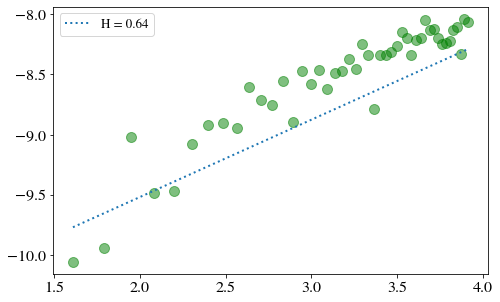

In [90]:
plt.plot(np.log(n), np.log(F), 'go', markersize = 10, alpha =0.5)
plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H), linestyle = ':')
plt.legend(loc=0)